# <span style="color:blue" font-size=30>Molecule Design project</span> 



#### Bibliothèque à importer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import isnan
import seaborn as sns

#### importing the dataset

In [2]:
data = pd.read_csv('dataset.csv', sep=';') 
data

C:\Users\Abir\AppData\Local\Temp\ipykernel_16956\2156693810.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('dataset.csv', sep=';')


ChEMBL ID                 Name  \
0        CHEMBL3989817     DIPROLEANDOMYCIN   
1         CHEMBL306107                  NaN   
2        CHEMBL4099974                  NaN   
3        CHEMBL1902090                  NaN   
4        CHEMBL2106510    AMMONIUM VALERATE   
...                ...                  ...   
1920134  CHEMBL3989559  PANTOPRAZOLE SODIUM   
1920135  CHEMBL1213420             DROXICAM   
1920136  CHEMBL2108525           POLYFEROSE   
1920137  CHEMBL2108995         CARBOMER 910   
1920138   CHEMBL283120             AXL-1717   

                                                  Synonyms            Type  \
0                                         DIPROLEANDOMYCIN  Small molecule   
1                                                      NaN  Small molecule   
2                                                      NaN  Small molecule   
3                                                      NaN  Small molecule   
4                                        AMMONIUM VALERATE  Small molecule   
...                                                    ...             ...   
1920134  PANTOPRAZOLE SODIUM|PANTOPRAZOLE SODIUM HYDRAT...  Small molecule   
1920135                                           DROXICAM  Small molecule   
1920136        IRON CARBOHYDRATE COMPLEX|Jefron|POLYFEROSE  Small molecule   
1920137       BLEPHAGEL|CARBOMER|CARBOMER 910|Carbopol 910  Small molecule   
1920138  AXL-1717|NSC-36407|PICROPODOPHYLLIN|PODOPHYLLO...  Small molecule   

         Max Phase  Molecular Weight  Targets  Bioactivities AlogP  \
0                0            800.00      NaN            NaN  3.83   
1                0            361.23      3.0            4.0  4.78   
2                0            527.07      1.0            5.0  6.06   
3                0            337.42      2.0            2.0  2.10   
4                0            119.16      NaN            NaN  None   
...            ...               ...      ...            ...   ...   
1920134          4            423.37      2.0            2.0  2.88   
1920135          0            357.35     21.0           42.0  0.99   
1920136          3               NaN      NaN            NaN   NaN   
1920137          4               NaN      NaN            NaN   NaN   
1920138          2            414.41    293.0          307.0  2.41   

        Polar Surface Area  ... Structure Type Inorganic Flag Heavy Atoms  \
0                   178.12  ...            MOL              0          56   
1                    73.06  ...            MOL             -1          24   
2                    71.16  ...            MOL             -1          37   
3                    62.30  ...            MOL             -1          25   
4                     None  ...            MOL              0        None   
...                    ...  ...            ...            ...         ...   
1920134              86.33  ...            MOL              0          26   
1920135             102.48  ...            MOL              0          25   
1920136                NaN  ...           NONE              0         NaN   
1920137                NaN  ...           NONE              0         NaN   
1920138              92.68  ...            MOL              0          30   

        HBA (Lipinski) HBD (Lipinski) #RO5 Violations (Lipinski)  \
0                   15              1                          2   
1                    5              3                          0   
2                    6              2                          1   
3                    5              1                          0   
4                 None           None                       None   
...                ...            ...                        ...   
1920134              7              1                          0   
1920135              8              0                          0   
1920136            NaN            NaN                        NaN   
1920137            NaN            NaN                        NaN 

## Data understanding

In [3]:
data.describe(include='all')

ChEMBL ID              Name          Synonyms            Type  \
count         1920139             43131             83794         1920139   
unique        1920139             41594             83519               1   
top     CHEMBL3989817  Platinum complex  Ferrocenyl Sugar  Small molecule   
freq                1               216                10         1920139   
mean              NaN               NaN               NaN             NaN   
std               NaN               NaN               NaN             NaN   
min               NaN               NaN               NaN             NaN   
25%               NaN               NaN               NaN             NaN   
50%               NaN               NaN               NaN             NaN   
75%               NaN               NaN               NaN             NaN   
max               NaN               NaN               NaN             NaN   

           Max Phase  Molecular Weight       Targets  Bioactivities    AlogP  \
count   1.920139e+06      1.918046e+06  1.835044e+06   1.835044e+06  1918046   
unique           NaN               NaN           NaN            NaN     2476   
top              NaN               NaN           NaN            NaN     None   
freq             NaN               NaN           NaN            NaN    31811   
mean    1.100233e-02      4.184659e+02  6.337703e+00   9.615048e+00      NaN   
std     1.941949e-01      1.872102e+02  1.415821e+01   4.708328e+01      NaN   
min     0.000000e+00      4.000000e+00  1.000000e+00   1.000000e+00      NaN   
25%     0.000000e+00      3.254500e+02  1.000000e+00   2.000000e+00      NaN   
50%     0.000000e+00      3.934100e+02  3.000000e+00   4.000000e+00      NaN   
75%     0.000000e+00      4.721600e+02  6.000000e+00   9.000000e+00      NaN   
max     4.000000e+00      1.254632e+04  1.328000e+03   1.736800e+04      NaN   

       Polar Surface Area  ... Structure Type Inorganic Flag Heavy Atoms  \
count             1918046  ...        1920139   1.920139e+06     1918046   
unique              24499  ...              4            NaN          79   
top                  None  ...            MOL            NaN          25   
freq                31811  ...        1914644            NaN      104441   
mean                  NaN  ...            NaN  -9.927432e-01         NaN   
std                   NaN  ...            NaN   8.607126e-02         NaN   
min                   NaN  ...            NaN  -1.000000e+00         NaN   
25%                   NaN  ...            NaN  -1.000000e+00         NaN   
50%                   NaN  ...            NaN  -1.000000e+00         NaN   
75%                   NaN  ...            NaN  -1.000000e+00         NaN   
max                   NaN  ...            NaN   1.000000e+00         NaN   

       HBA (Lipinski) HBD (Lipinski) #RO5 Violations (Lipinski)  \
count         1918046        1918046                    1918046   
unique             37             30                          6   
top                 6              1                          0   
freq           320699         623228                    1323617   
mean              NaN            NaN                        NaN   
std               NaN            NaN                        NaN   
min               NaN            NaN                        NaN   
25%               NaN            NaN                        NaN   
50%               NaN            NaN                        NaN   
75%               NaN            NaN                        NaN   
max               NaN            NaN                        NaN   

       Molecular Weight (Monoisotopic) Molecular Species Molecular Formula  \
count                     1.918046e+06           1918046           1918046   
unique                    3.596590e+05                 5            369205   
top                       3.221681e+02           NEUTRAL        C20H22N2O2   
freq                      4.760000e+02           1361165               478   
mean              

#### The data has 1920139 rows and 31 columns including the target:

In [4]:
data.shape

(1920139, 31)

In [5]:
data.columns

Index(['ChEMBL ID', 'Name', 'Synonyms', 'Type', 'Max Phase',
       'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP',
       'Polar Surface Area', 'HBA', 'HBD', '#RO5 Violations',
       '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
       'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings',
       'Structure Type', 'Inorganic Flag', 'Heavy Atoms', 'HBA (Lipinski)',
       'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
       'Molecular Weight (Monoisotopic)', 'Molecular Species',
       'Molecular Formula', 'Smiles'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920139 entries, 0 to 1920138
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   ChEMBL ID                        object 
 1   Name                             object 
 2   Synonyms                         object 
 3   Type                             object 
 4   Max Phase                        int64  
 5   Molecular Weight                 float64
 6   Targets                          float64
 7   Bioactivities                    float64
 8   AlogP                            object 
 9   Polar Surface Area               object 
 10  HBA                              object 
 11  HBD                              object 
 12  #RO5 Violations                  object 
 13  #Rotatable Bonds                 object 
 14  Passes Ro3                       object 
 15  QED Weighted                     object 
 16  CX Acidic pKa                    object 
 17  CX Basic

In [7]:
data.isnull().sum()

ChEMBL ID                                0
Name                               1877008
Synonyms                           1836345
Type                                     0
Max Phase                                0
Molecular Weight                      2093
Targets                              85095
Bioactivities                        85095
AlogP                                 2093
Polar Surface Area                    2093
HBA                                   2093
HBD                                   2093
#RO5 Violations                       2093
#Rotatable Bonds                      2093
Passes Ro3                            2093
QED Weighted                          2093
CX Acidic pKa                         2093
CX Basic pKa                          2093
CX LogP                               2093
CX LogD                               2093
Aromatic Rings                        2093
Structure Type                           0
Inorganic Flag                           0
Heavy Atoms

# Data cleaning

In [3]:
# looking at unique values in categorical columns
for col in data:
    print(f"{col} has {data[col].unique()} values\n")

ChEMBL ID has ['CHEMBL3989817' 'CHEMBL306107' 'CHEMBL4099974' ... 'CHEMBL2108525'
 'CHEMBL2108995' 'CHEMBL283120'] values

Name has ['DIPROLEANDOMYCIN' nan 'AMMONIUM VALERATE' ... 'POLYFEROSE'
 'CARBOMER 910' 'AXL-1717'] values

Synonyms has ['DIPROLEANDOMYCIN' nan 'AMMONIUM VALERATE' ...
 'IRON CARBOHYDRATE COMPLEX|Jefron|POLYFEROSE'
 'BLEPHAGEL|CARBOMER|CARBOMER 910|Carbopol 910'
 'AXL-1717|NSC-36407|PICROPODOPHYLLIN|PODOPHYLLOTOXIN PICROPODOPHYLLIN|Picropodophyllotoxin'] values

Type has ['Small molecule'] values

Max Phase has [0 2 1 4 3] values

Molecular Weight has [800.   361.23 527.07 ... 138.63 968.3  100.09] values

Targets has [      nan 3.000e+00 1.000e+00 2.000e+00 1.700e+01 4.000e+00 1.000e+01
 7.000e+00 9.000e+00 5.000e+00 8.000e+00 1.100e+01 2.100e+01 2.900e+01
 1.600e+01 1.200e+01 1.400e+01 2.200e+01 6.000e+00 6.000e+01 2.600e+01
 2.000e+01 1.300e+01 4.700e+01 5.900e+01 8.000e+01 2.800e+01 6.200e+01
 5.300e+01 5.500e+01 1.500e+01 4.900e+01 2.400e+01 5.800e+01 1.800e+01

Structure Type has ['MOL' 'NONE' 'BOTH' 'SEQ'] values

Inorganic Flag has [ 0 -1  1] values

Heavy Atoms has ['56' '24' '37' '25' 'None' '23' '32' '30' '38' '31' '35' '43' '22' '11'
 '21' '33' '27' '36' '20' '19' '49' '26' '34' '28' '45' '29' '42' '39'
 '12' '16' '52' '14' '66' '17' '47' '58' '44' '48' '10' '15' '40' '41'
 '62' '50' '18' '13' '5' '69' '67' '46' '9' '53' '51' '61' '57' '8' '54'
 nan '59' '55' '64' '63' '7' '60' '65' '68' '2' '6' '74' '4' '71' '72'
 '70' '73' '76' '3' '78' '79' '1' '75'] values

HBA (Lipinski) has ['15' '5' '6' 'None' '7' '4' '11' '9' '10' '1' '2' '3' '8' '13' '16' '0'
 '14' '20' '17' '12' '22' nan '18' '19' '23' '24' '21' '28' '27' '26' '25'
 '35' '29' '31' '33' '34' '30' '32'] values

HBD (Lipinski) has ['1' '3' '2' 'None' '5' '0' '4' '14' '6' '7' '8' '9' '10' nan '11' '17'
 '13' '15' '12' '19' '16' '18' '20' '21' '24' '22' '23' '26' '27' '25'
 '31'] values

#RO5 Violations (Lipinski) has ['2' '0' '1' 'None' '3' '4' nan] values

Molecular Weight (Monoi

In [4]:
# replace incorrect values
data= data.replace(to_replace = 'NONE', value=np.NaN)

In [5]:
data= data.replace(to_replace = 'None', value=np.NaN)

In [6]:
# looking at unique values in categorical columns
for col in data:
    print(f"{col} has {data[col].unique()} values\n")

ChEMBL ID has ['CHEMBL3989817' 'CHEMBL306107' 'CHEMBL4099974' ... 'CHEMBL2108525'
 'CHEMBL2108995' 'CHEMBL283120'] values

Name has ['DIPROLEANDOMYCIN' nan 'AMMONIUM VALERATE' ... 'POLYFEROSE'
 'CARBOMER 910' 'AXL-1717'] values

Synonyms has ['DIPROLEANDOMYCIN' nan 'AMMONIUM VALERATE' ...
 'IRON CARBOHYDRATE COMPLEX|Jefron|POLYFEROSE'
 'BLEPHAGEL|CARBOMER|CARBOMER 910|Carbopol 910'
 'AXL-1717|NSC-36407|PICROPODOPHYLLIN|PODOPHYLLOTOXIN PICROPODOPHYLLIN|Picropodophyllotoxin'] values

Type has ['Small molecule'] values

Max Phase has [0 2 1 4 3] values

Molecular Weight has [800.   361.23 527.07 ... 138.63 968.3  100.09] values

Targets has [      nan 3.000e+00 1.000e+00 2.000e+00 1.700e+01 4.000e+00 1.000e+01
 7.000e+00 9.000e+00 5.000e+00 8.000e+00 1.100e+01 2.100e+01 2.900e+01
 1.600e+01 1.200e+01 1.400e+01 2.200e+01 6.000e+00 6.000e+01 2.600e+01
 2.000e+01 1.300e+01 4.700e+01 5.900e+01 8.000e+01 2.800e+01 6.200e+01
 5.300e+01 5.500e+01 1.500e+01 4.900e+01 2.400e+01 5.800e+01 1.800e+01

HBA (Lipinski) has ['15' '5' '6' nan '7' '4' '11' '9' '10' '1' '2' '3' '8' '13' '16' '0' '14'
 '20' '17' '12' '22' '18' '19' '23' '24' '21' '28' '27' '26' '25' '35'
 '29' '31' '33' '34' '30' '32'] values

HBD (Lipinski) has ['1' '3' '2' nan '5' '0' '4' '14' '6' '7' '8' '9' '10' '11' '17' '13' '15'
 '12' '19' '16' '18' '20' '21' '24' '22' '23' '26' '27' '25' '31'] values

#RO5 Violations (Lipinski) has ['2' '0' '1' nan '3' '4'] values

Molecular Weight (Monoisotopic) has [799.4718 360.0545 490.2369 ... 99.9473 1148.4317 246.0232] values

Molecular Species has ['NEUTRAL' 'BASE' nan 'ZWITTERION' 'ACID'] values

Molecular Formula has ['C41H69NO14' 'C17H14Cl2N4O' 'C31H31ClN4O2' ... 'C52H72GdN5O14'
 'C6H14O6S2' 'C16H16F2N3NaO5S'] values

Smiles has ['CCC(=O)O[C@H]1[C@H](C)O[C@@H](O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@H](OC(=O)CC)[C@@H](C)C(=O)[C@]3(CO3)C[C@H](C)[C@H](O[C@@H]3O[C@H](C)C[C@H](N(C)C)[C@H]3O)[C@H]2C)C[C@@H]1OC'
 'COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)nc(N)n1'
 'COc1ccc(/C=C/C2=N

# Data preprocessing

In [7]:
data['AlogP'] = pd.to_numeric(data['AlogP'], errors='coerce')
data['Polar Surface Area'] = pd.to_numeric(data['Polar Surface Area'], errors='coerce')
data['HBA'] = pd.to_numeric(data['HBA'], errors='coerce')
data['HBD'] = pd.to_numeric(data['HBD'], errors='coerce')
data['#RO5 Violations'] = pd.to_numeric(data['#RO5 Violations'], errors='coerce')
data['#Rotatable Bonds'] = pd.to_numeric(data['#Rotatable Bonds'], errors='coerce')
data['QED Weighted'] = pd.to_numeric(data['QED Weighted'], errors='coerce')
data['CX Acidic pKa'] = pd.to_numeric(data['CX Acidic pKa'], errors='coerce')
data['CX Basic pKa'] = pd.to_numeric(data['CX Basic pKa'], errors='coerce')
data['CX LogP'] = pd.to_numeric(data['CX LogP'], errors='coerce')
data['CX LogD'] = pd.to_numeric(data['CX LogD'], errors='coerce')
data['Aromatic Rings'] = pd.to_numeric(data['Aromatic Rings'], errors='coerce')
data['Heavy Atoms'] = pd.to_numeric(data['Heavy Atoms'], errors='coerce')
data['HBA (Lipinski)'] = pd.to_numeric(data['HBA (Lipinski)'], errors='coerce')
data['HBD (Lipinski)'] = pd.to_numeric(data['HBD (Lipinski)'], errors='coerce')
data['#RO5 Violations (Lipinski)'] = pd.to_numeric(data['#RO5 Violations (Lipinski)'], errors='coerce')
data['Molecular Weight (Monoisotopic)'] = pd.to_numeric(data['Molecular Weight (Monoisotopic)'], errors='coerce')

In [8]:
cat_cols = [col for col in data.columns if data[col].dtype == 'object']

In [9]:
data['Name'] = data['Name'].fillna(data['Name'].mode()[0])
data['Synonyms'] = data['Synonyms'].fillna(data['Synonyms'].mode()[0])
data['Type'] = data['Type'].fillna(data['Type'].mode()[0])
data['Passes Ro3'] = data['Passes Ro3'].fillna(data['Passes Ro3'].mode()[0])
data['Structure Type'] = data['Structure Type'].fillna(data['Structure Type'].mode()[0])
data['Molecular Species'] = data['Molecular Species'].fillna(data['Molecular Species'].mode()[0])
data['Molecular Formula'] = data['Molecular Formula'].fillna(data['Molecular Formula'].mode()[0])
data['Smiles'] = data['Smiles'].fillna(data['Smiles'].mode()[0])

In [10]:
num_cols = [col for col in data.columns if data[col].dtype != 'object']

In [11]:
num_cols

['Max Phase',
 'Molecular Weight',
 'Targets',
 'Bioactivities',
 'AlogP',
 'Polar Surface Area',
 'HBA',
 'HBD',
 '#RO5 Violations',
 '#Rotatable Bonds',
 'QED Weighted',
 'CX Acidic pKa',
 'CX Basic pKa',
 'CX LogP',
 'CX LogD',
 'Aromatic Rings',
 'Inorganic Flag',
 'Heavy Atoms',
 'HBA (Lipinski)',
 'HBD (Lipinski)',
 '#RO5 Violations (Lipinski)',
 'Molecular Weight (Monoisotopic)']

In [12]:
data[['Max Phase']] = data[['Max Phase']].fillna(data[['Max Phase']].median())
data[['Molecular Weight']] = data[['Molecular Weight']].fillna(data[['Molecular Weight']].median())
data[['Targets']] = data[['Targets']].fillna(data[['Targets']].median())
data[['Bioactivities']] = data[['Bioactivities']].fillna(data[['Bioactivities']].median())
data[['AlogP']] = data[['AlogP']].fillna(data[['AlogP']].median())
data[['Polar Surface Area']] = data[['Polar Surface Area']].fillna(data[['Polar Surface Area']].median())
data[['HBA']] = data[['HBA']].fillna(data[['HBA']].median())
data[['HBD']] = data[['HBD']].fillna(data[['HBD']].median())
data[['#RO5 Violations']] = data[['#RO5 Violations']].fillna(data[['#RO5 Violations']].median())
data[['#Rotatable Bonds']] = data[['#Rotatable Bonds']].fillna(data[['#Rotatable Bonds']].median())
data[['QED Weighted']] = data[['QED Weighted']].fillna(data[['QED Weighted']].median())
data[['CX Acidic pKa']] = data[['CX Acidic pKa']].fillna(data[['CX Acidic pKa']].median())
data[['CX Basic pKa']] = data[['CX Basic pKa']].fillna(data[['CX Basic pKa']].median())
data[['CX LogP']] = data[['CX LogP']].fillna(data[['CX LogP']].median())
data[['CX LogD']] = data[['CX LogD']].fillna(data[['CX LogD']].median())
data[['Aromatic Rings']] = data[['Aromatic Rings']].fillna(data[['Aromatic Rings']].median())
data[['Inorganic Flag']] = data[['Inorganic Flag']].fillna(data[['Inorganic Flag']].median())
data[['Heavy Atoms']] = data[['Heavy Atoms']].fillna(data[['Heavy Atoms']].median())
data[['HBA (Lipinski)']] = data[['HBA (Lipinski)']].fillna(data[['HBA (Lipinski)']].median())
data[['HBD (Lipinski)']] = data[['HBD (Lipinski)']].fillna(data[['HBD (Lipinski)']].median())
data[['#RO5 Violations (Lipinski)']] = data[['#RO5 Violations (Lipinski)']].fillna(data[['#RO5 Violations (Lipinski)']].median())
data[['Molecular Weight (Monoisotopic)']] = data[['Molecular Weight (Monoisotopic)']].fillna(data[['Molecular Weight (Monoisotopic)']].median())

In [13]:
for col in data:
    print(f"{col} has {data[col].unique()} values\n")

ChEMBL ID has ['CHEMBL3989817' 'CHEMBL306107' 'CHEMBL4099974' ... 'CHEMBL2108525'
 'CHEMBL2108995' 'CHEMBL283120'] values

Name has ['DIPROLEANDOMYCIN' 'Platinum complex' 'AMMONIUM VALERATE' ...
 'POLYFEROSE' 'CARBOMER 910' 'AXL-1717'] values

Synonyms has ['DIPROLEANDOMYCIN' 'Ferrocenyl Sugar' 'AMMONIUM VALERATE' ...
 'IRON CARBOHYDRATE COMPLEX|Jefron|POLYFEROSE'
 'BLEPHAGEL|CARBOMER|CARBOMER 910|Carbopol 910'
 'AXL-1717|NSC-36407|PICROPODOPHYLLIN|PODOPHYLLOTOXIN PICROPODOPHYLLIN|Picropodophyllotoxin'] values

Type has ['Small molecule'] values

Max Phase has [0 2 1 4 3] values

Molecular Weight has [800.   361.23 527.07 ... 138.63 968.3  100.09] values

Targets has [3.000e+00 1.000e+00 2.000e+00 1.700e+01 4.000e+00 1.000e+01 7.000e+00
 9.000e+00 5.000e+00 8.000e+00 1.100e+01 2.100e+01 2.900e+01 1.600e+01
 1.200e+01 1.400e+01 2.200e+01 6.000e+00 6.000e+01 2.600e+01 2.000e+01
 1.300e+01 4.700e+01 5.900e+01 8.000e+01 2.800e+01 6.200e+01 5.300e+01
 5.500e+01 1.500e+01 4.900e+01 2.400e+01

Molecular Species has ['NEUTRAL' 'BASE' 'ZWITTERION' 'ACID'] values

Molecular Formula has ['C41H69NO14' 'C17H14Cl2N4O' 'C31H31ClN4O2' ... 'C52H72GdN5O14'
 'C6H14O6S2' 'C16H16F2N3NaO5S'] values

Smiles has ['CCC(=O)O[C@H]1[C@H](C)O[C@@H](O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@H](OC(=O)CC)[C@@H](C)C(=O)[C@]3(CO3)C[C@H](C)[C@H](O[C@@H]3O[C@H](C)C[C@H](N(C)C)[C@H]3O)[C@H]2C)C[C@@H]1OC'
 'COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)nc(N)n1'
 'COc1ccc(/C=C/C2=NN(CCCN)C(=O)N(Cc3ccc4ccccc4c3)c3ccccc32)cc1.Cl' ...
 'COc1ccnc(C[S+]([O-])c2nc3cc(OC(F)F)ccc3[n-]2)c1OC.O.[Na+]'
 'CN1c2c(oc(=O)n(-c3ccccn3)c2=O)-c2ccccc2S1(=O)=O'
 'COc1cc([C@@H]2c3cc4c(cc3[C@H](O)[C@H]3COC(=O)[C@@H]23)OCO4)cc(OC)c1OC'] values



In [19]:
data.head(15)

ChEMBL ID               Name           Synonyms            Type  \
0   CHEMBL3989817   DIPROLEANDOMYCIN   DIPROLEANDOMYCIN  Small molecule   
1    CHEMBL306107   Platinum complex   Ferrocenyl Sugar  Small molecule   
2   CHEMBL4099974   Platinum complex   Ferrocenyl Sugar  Small molecule   
3   CHEMBL1902090   Platinum complex   Ferrocenyl Sugar  Small molecule   
4   CHEMBL2106510  AMMONIUM VALERATE  AMMONIUM VALERATE  Small molecule   
5   CHEMBL1802565   Platinum complex   Ferrocenyl Sugar  Small molecule   
6   CHEMBL1531434   Platinum complex   Ferrocenyl Sugar  Small molecule   
7    CHEMBL137390   Platinum complex   Ferrocenyl Sugar  Small molecule   
8   CHEMBL2009182   Platinum complex   Ferrocenyl Sugar  Small molecule   
9   CHEMBL3806132   Platinum complex   Ferrocenyl Sugar  Small molecule   
10  CHEMBL3792518   Platinum complex   Ferrocenyl Sugar  Small molecule   
11  CHEMBL3649221   Platinum complex   Ferrocenyl Sugar  Small molecule   
12  CHEMBL3733999   Platinum complex   Ferrocenyl Sugar  Small molecule   
13   CHEMBL401864   Platinum complex   Ferrocenyl Sugar  Small molecule   
14  CHEMBL4228995   Platinum complex   Ferrocenyl Sugar  Small molecule   

    Max Phase  Molecular Weight  Targets  Bioactivities  AlogP  \
0           0            800.00      3.0            4.0   3.83   
1           0            361.23      3.0            4.0   4.78   
2           0            527.07      1.0            5.0   6.06   
3           0            337.42      2.0            2.0   2.10   
4           0            119.16      3.0            4.0   3.48   
5           0            336.34     17.0           26.0   2.12   
6           0            440.52      4.0            4.0   4.48   
7           0            432.67      2.0            2.0   5.29   
8           0            529.61      3.0            4.0   2.98   
9           0            531.82      2.0            2.0   1.22   
10          0            482.61      2.0            2.0   5.76   
11          0            518.48      2.0            2.0   2.13   
12          0            585.71      3.0            4.0   4.62   
13          0            534.70      1.0            2.0   5.11   
14          0            455.39      4.0            8.0   6.47   

    Polar Surface Area  ...  Structure Type  Inorganic Flag  Heavy Atoms  \
0               178.12  ...             MOL               0         56.0   
1                73.06  ...             MOL              -1         24.0   
2                71.16  ...             MOL              -1         37.0   
3                62.30  ...             MOL              -1         25.0   
4                75.35  ...             MOL               0         27.0   
5                75.71  ...             MOL              -1         23.0   
6                80.49  ...             MOL              -1         32.0   
7                43.78  ...             MOL              -1         30.0   
8               135.55  ...             MOL              -1         38.0   
9               145.19  ...             MOL              -1         31.0   
10               60.33  ...             MOL              -1         35.0   
11              100.35  ...             MOL              -1         37.0   
12              101.12  ...             MOL              -1         43.0   
13               67.23  ...             MOL              -1         38.0   
14               81.42  ...             MOL              -1         31.0   

    HBA (Lipinski) HBD (Lipinski)  #RO5 Violations (Lipinski)  \
0             15.0            1.0                         2.0   
1              5.0            3.0                         0.0   
2              6.0            2.0                         1.0   
3              5.0            1.0                         0.0   
4              6.0            1.0                         0.0   
5              6.0            1.0                         0.0   
6              7.0            1.0                         0.0   
7            

#### As we have categorical columns that need to be converted, we can use label encoder

In [14]:

# Sélectionner les colonnes à encoder
cols_to_encode = ['ChEMBL ID', 'Name', 'Synonyms','Passes Ro3','Structure Type','Molecular Species','Molecular Formula']
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Select the columns to encode
cols_to_encode = ['ChEMBL ID', 'Name', 'Synonyms','Passes Ro3','Structure Type','Molecular Species','Molecular Formula']
# Create a label encoder
encoder = LabelEncoder()

# Encode the selected columns
for col in cols_to_encode:
    data[col] = encoder.fit_transform(data[col])


In [15]:
data.info()
for col in data:
    print(f"{col} has {data[col].unique()} values\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920139 entries, 0 to 1920138
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   ChEMBL ID                        int32  
 1   Name                             int32  
 2   Synonyms                         int32  
 3   Type                             object 
 4   Max Phase                        int64  
 5   Molecular Weight                 float64
 6   Targets                          float64
 7   Bioactivities                    float64
 8   AlogP                            float64
 9   Polar Surface Area               float64
 10  HBA                              float64
 11  HBD                              float64
 12  #RO5 Violations                  float64
 13  #Rotatable Bonds                 float64
 14  Passes Ro3                       int32  
 15  QED Weighted                     float64
 16  CX Acidic pKa                    float64
 17  CX Basic

CX LogP has [ 5.26  5.02  5.15 ... 13.51 -8.77 14.01] values

CX LogD has [  4.24   5.01   2.87 ...  13.51 -15.39 -19.35] values

Aromatic Rings has [ 0.  3.  4.  2.  1.  6.  5.  7.  8. 11.  9. 12. 10. 19. 17. 13. 20. 14.
 16. 24. 28. 30.] values

Structure Type has [1 0 2] values

Inorganic Flag has [ 0 -1  1] values

Heavy Atoms has [56. 24. 37. 25. 27. 23. 32. 30. 38. 31. 35. 43. 22. 11. 21. 33. 36. 20.
 19. 49. 26. 34. 28. 45. 29. 42. 39. 12. 16. 52. 14. 66. 17. 47. 58. 44.
 48. 10. 15. 40. 41. 62. 50. 18. 13.  5. 69. 67. 46.  9. 53. 51. 61. 57.
  8. 54. 59. 55. 64. 63.  7. 60. 65. 68.  2.  6. 74.  4. 71. 72. 70. 73.
 76.  3. 78. 79.  1. 75.] values

HBA (Lipinski) has [15.  5.  6.  7.  4. 11.  9. 10.  1.  2.  3.  8. 13. 16.  0. 14. 20. 17.
 12. 22. 18. 19. 23. 24. 21. 28. 27. 26. 25. 35. 29. 31. 33. 34. 30. 32.] values

HBD (Lipinski) has [ 1.  3.  2.  5.  0.  4. 14.  6.  7.  8.  9. 10. 11. 17. 13. 15. 12. 19.
 16. 18. 20. 21. 24. 22. 23. 26. 27. 25. 31.] values

#RO5 Violations (

In [22]:
data

ChEMBL ID   Name  Synonyms            Type  Max Phase  \
0          1542286  14203     24324  Small molecule          0   
1           994155  32883     35118  Small molecule          0   
2          1593761  32883     35118  Small molecule          0   
3           624859  32883     35118  Small molecule          0   
4           759370   4358     13597  Small molecule          0   
...            ...    ...       ...             ...        ...   
1920134    1542025  29586     56225  Small molecule          4   
1920135      84660  14612     31321  Small molecule          0   
1920136     760807  31629     44574  Small molecule          3   
1920137     760936   8871     17479  Small molecule          4   
1920138     970144   5893     14339  Small molecule          2   

         Molecular Weight  Targets  Bioactivities  AlogP  Polar Surface Area  \
0                  800.00      3.0            4.0   3.83              178.12   
1                  361.23      3.0            4.0   4.78               73.06   
2                  527.07      1.0            5.0   6.06               71.16   
3                  337.42      2.0            2.0   2.10               62.30   
4                  119.16      3.0            4.0   3.48               75.35   
...                   ...      ...            ...    ...                 ...   
1920134            423.37      2.0            2.0   2.88               86.33   
1920135            357.35     21.0           42.0   0.99              102.48   
1920136            393.41      3.0            4.0   3.48               75.35   
1920137            393.41      3.0            4.0   3.48               75.35   
1920138            414.41    293.0          307.0   2.41               92.68   

         ...  Structure Type  Inorganic Flag  Heavy Atoms  HBA (Lipinski)  \
0        ...               1               0         56.0            15.0   
1        ...               1              -1         24.0             5.0   
2        ...               1              -1         37.0             6.0   
3        ...               1              -1         25.0             5.0   
4        ...               1               0         27.0             6.0   
...      ...             ...             ...          ...             ...   
1920134  ...               1               0         26.0             7.0   
1920135  ...               1               0         25.0             8.0   
1920136  ...               1               0         27.0             6.0   
1920137  ...               1               0         27.0             6.0   
1920138  ...               1               0         30.0             8.0   

         HBD (Lipinski)  #RO5 Violations (Lipinski)  \
0                   1.0                         2.0   
1                   3.0                         0.0   
2                   2.0                         1.0   
3                   1.0                         0.0   
4                   1.0                         0.0   
...                 ...                         ...   
1920134             1.0                         0.0   
1920135             0.0                         0.0   
1920136             1.0                         0.0   
1920137             1.0                         0.0   
1920138             1.0                         0.0   

         Molecular Weight (Monoisotopic)  Molecular Species  \
0                               799.4718                  2   
1                               360.0545                  2   
2                               490.2369                  1   
3                               337.1790                  2   
4                               119.0946                  2   
...                                  ...                ...   
1920134                         383.0751                  2   
1920135                         357.0419                  2   
1920136                         389.1661                  2   
1920137                         389.166

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920139 entries, 0 to 1920138
Data columns (total 31 columns):
 #   Column                           Dtype  
---  ------                           -----  
 0   ChEMBL ID                        int32  
 1   Name                             int32  
 2   Synonyms                         int32  
 3   Type                             object 
 4   Max Phase                        int64  
 5   Molecular Weight                 float64
 6   Targets                          float64
 7   Bioactivities                    float64
 8   AlogP                            float64
 9   Polar Surface Area               float64
 10  HBA                              float64
 11  HBD                              float64
 12  #RO5 Violations                  float64
 13  #Rotatable Bonds                 float64
 14  Passes Ro3                       int32  
 15  QED Weighted                     float64
 16  CX Acidic pKa                    float64
 17  CX Basic

#### Column 'Type' hs the same value in all the rows presented, so we chose to delete it from the data: 

In [16]:
data.drop('Type', axis=1, inplace=True)

In [25]:
data

ChEMBL ID   Name  Synonyms  Max Phase  Molecular Weight  Targets  \
0          1542286  14203     24324          0            800.00      3.0   
1           994155  32883     35118          0            361.23      3.0   
2          1593761  32883     35118          0            527.07      1.0   
3           624859  32883     35118          0            337.42      2.0   
4           759370   4358     13597          0            119.16      3.0   
...            ...    ...       ...        ...               ...      ...   
1920134    1542025  29586     56225          4            423.37      2.0   
1920135      84660  14612     31321          0            357.35     21.0   
1920136     760807  31629     44574          3            393.41      3.0   
1920137     760936   8871     17479          4            393.41      3.0   
1920138     970144   5893     14339          2            414.41    293.0   

         Bioactivities  AlogP  Polar Surface Area   HBA  ...  Structure Type  \
0                  4.0   3.83              178.12  15.0  ...               1   
1                  4.0   4.78               73.06   5.0  ...               1   
2                  5.0   6.06               71.16   4.0  ...               1   
3                  2.0   2.10               62.30   3.0  ...               1   
4                  4.0   3.48               75.35   5.0  ...               1   
...                ...    ...                 ...   ...  ...             ...   
1920134            2.0   2.88               86.33   6.0  ...               1   
1920135           42.0   0.99              102.48   7.0  ...               1   
1920136            4.0   3.48               75.35   5.0  ...               1   
1920137            4.0   3.48               75.35   5.0  ...               1   
1920138          307.0   2.41               92.68   8.0  ...               1   

         Inorganic Flag  Heavy Atoms  HBA (Lipinski)  HBD (Lipinski)  \
0                     0         56.0            15.0             1.0   
1                    -1         24.0             5.0             3.0   
2                    -1         37.0             6.0             2.0   
3                    -1         25.0             5.0             1.0   
4                     0         27.0             6.0             1.0   
...                 ...          ...             ...             ...   
1920134               0         26.0             7.0             1.0   
1920135               0         25.0             8.0             0.0   
1920136               0         27.0             6.0             1.0   
1920137               0         27.0             6.0             1.0   
1920138               0         30.0             8.0             1.0   

         #RO5 Violations (Lipinski)  Molecular Weight (Monoisotopic)  \
0                               2.0                         799.4718   
1                               0.0                         360.0545   
2                               1.0                         490.2369   
3                               0.0                         337.1790   
4                               0.0                         119.0946   
...                             ...                              ...   
1920134                         0.0                         383.0751   
1920135                         0.0                         357.0419   
1920136                         0.0                         389.1661   
1920137                         0.0                         389.1661   
1920138                         0.0                         414.1315   

         Molecular Species  Molecular Formula  \
0                        2             322487   
1                        2              69276   
2                        1             266606   
3                        2             120471   
4                        2             348074   
...                    ...                ...   
1920134                  2              58358   
1

In [26]:
data.iloc[5]

ChEMBL ID                                                            553519
Name                                                                  32883
Synonyms                                                              35118
Max Phase                                                                 0
Molecular Weight                                                     336.34
Targets                                                                17.0
Bioactivities                                                          26.0
AlogP                                                                  2.12
Polar Surface Area                                                    75.71
HBA                                                                     4.0
HBD                                                                     1.0
#RO5 Violations                                                         0.0
#Rotatable Bonds                                                        4.0
Passes Ro3  

#### Before we enter to the modeling phase, we had to split the data into training set and testing set , plus the val set: 
#### our target is: Smiles

#### Visualizing the outliers via boxplots: 

<AxesSubplot:xlabel='Molecular Weight'>

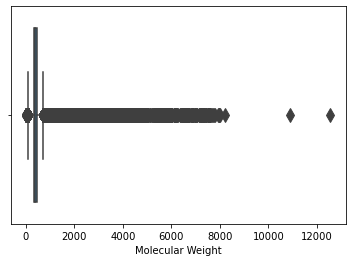

In [27]:
sns.boxplot(x=data["Molecular Weight"],fliersize=10,orient="h")

<AxesSubplot:xlabel='Targets'>

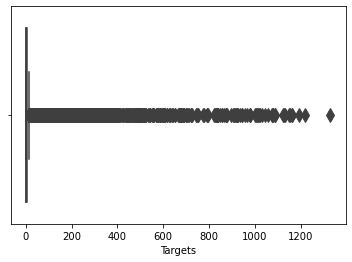

In [28]:
sns.boxplot(x=data["Targets"],fliersize=10,orient="h")

<AxesSubplot:xlabel='Bioactivities'>

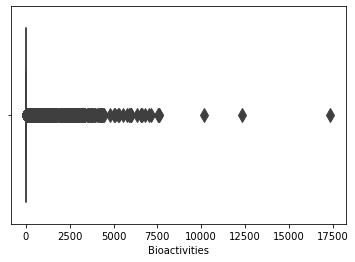

In [29]:
sns.boxplot(x=data["Bioactivities"],fliersize=10,orient="h")

<AxesSubplot:xlabel='AlogP'>

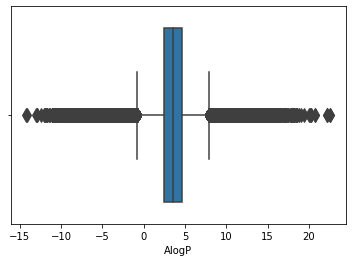

In [30]:
sns.boxplot(x=data["AlogP"],fliersize=10,orient="h")

<AxesSubplot:xlabel='Polar Surface Area'>

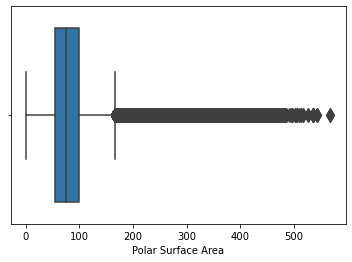

In [31]:
sns.boxplot(x=data["Polar Surface Area"],fliersize=10,orient="h")

<AxesSubplot:xlabel='HBA'>

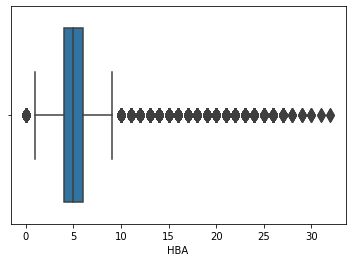

In [32]:
sns.boxplot(x=data["HBA"],fliersize=10,orient="h")

<AxesSubplot:xlabel='HBD'>

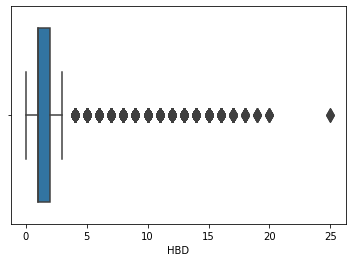

In [33]:
sns.boxplot(x=data["HBD"],fliersize=10,orient="h")

<AxesSubplot:xlabel='#RO5 Violations'>

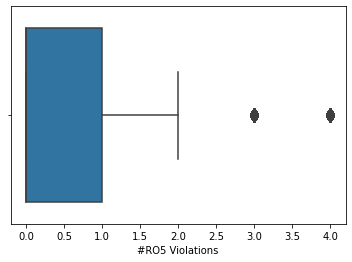

In [34]:
sns.boxplot(x=data["#RO5 Violations"],fliersize=10,orient="h")

<AxesSubplot:xlabel='#Rotatable Bonds'>

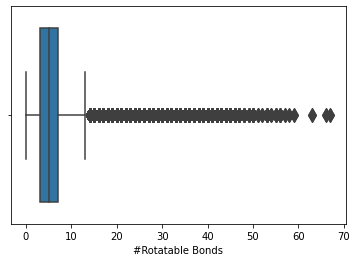

In [35]:
sns.boxplot(x=data["#Rotatable Bonds"],fliersize=10,orient="h")
#Rotatable Bonds

<AxesSubplot:xlabel='QED Weighted'>

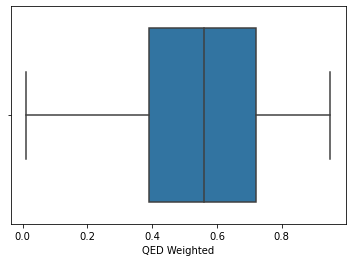

In [36]:
sns.boxplot(x=data["QED Weighted"],fliersize=10,orient="h")

#### Dealing with the outliers 

325.48 471.94 146.45999999999998
105.79000000000005
691.63


<AxesSubplot:xlabel='Molecular Weight'>

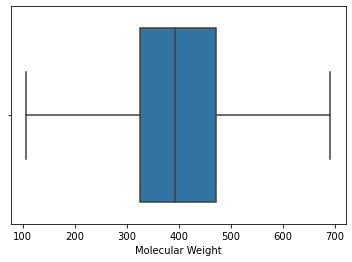

In [37]:
q1=data['Molecular Weight'].quantile(0.25)
q3=data['Molecular Weight'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['Molecular Weight']<min),'Molecular Weight']=min
data.loc[(data['Molecular Weight']>max),'Molecular Weight']=max
sns.boxplot(x=data["Molecular Weight"],fliersize=10,orient="h")

1.0 6.0 5.0
-6.5
13.5


<AxesSubplot:xlabel='Targets'>

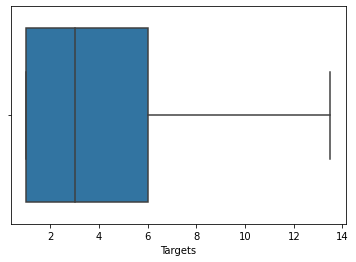

In [38]:
q1=data['Targets'].quantile(0.25)
q3=data['Targets'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['Targets']<min),'Targets']=min
data.loc[(data['Targets']>max),'Targets']=max
sns.boxplot(x=data["Targets"],fliersize=10,orient="h")

2.0 9.0 7.0
-8.5
19.5


<AxesSubplot:xlabel='Targets'>

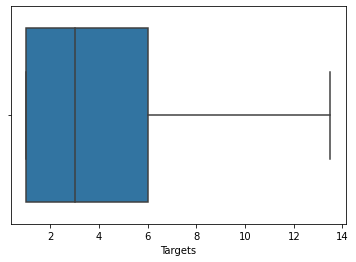

In [39]:
q1=data['Bioactivities'].quantile(0.25)
q3=data['Bioactivities'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['Bioactivities']<min),'Bioactivities']=min
data.loc[(data['Bioactivities']>max),'Bioactivities']=max
sns.boxplot(x=data["Targets"],fliersize=10,orient="h")

2.41 4.59 2.1799999999999997
-0.8599999999999994
7.859999999999999


<AxesSubplot:xlabel='AlogP'>

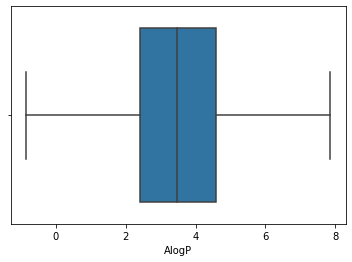

In [40]:
q1=data['AlogP'].quantile(0.25)
q3=data['AlogP'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['AlogP']<min),'AlogP']=min
data.loc[(data['AlogP']>max),'AlogP']=max
sns.boxplot(x=data["AlogP"],fliersize=10,orient="h")

54.88 99.18 44.300000000000004
-11.57
165.63


<AxesSubplot:xlabel='Polar Surface Area'>

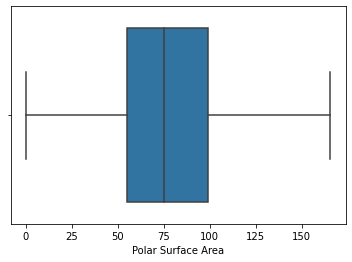

In [41]:
q1=data['Polar Surface Area'].quantile(0.25)
q3=data['Polar Surface Area'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['Polar Surface Area']<min),'Polar Surface Area']=min
data.loc[(data['Polar Surface Area']>max),'Polar Surface Area']=max
sns.boxplot(x=data["Polar Surface Area"],fliersize=10,orient="h")

4.0 6.0 2.0
1.0
9.0


<AxesSubplot:xlabel='HBA'>

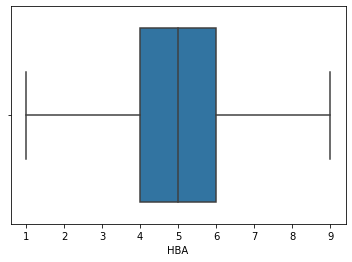

In [42]:
q1=data['HBA'].quantile(0.25)
q3=data['HBA'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['HBA']<min),'HBA']=min
data.loc[(data['HBA']>max),'HBA']=max
sns.boxplot(x=data["HBA"],fliersize=10,orient="h")

1.0 2.0 1.0
-0.5
3.5


<AxesSubplot:xlabel='HBD'>

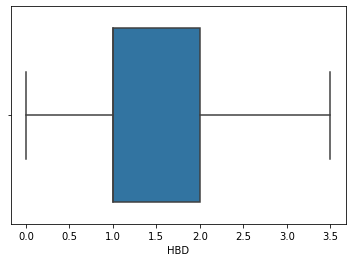

In [43]:
q1=data['HBD'].quantile(0.25)
q3=data['HBD'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['HBD']<min),'HBD']=min
data.loc[(data['HBD']>max),'HBD']=max
sns.boxplot(x=data["HBD"],fliersize=10,orient="h")

0.0 1.0 1.0
-1.5
2.5


<AxesSubplot:xlabel='#RO5 Violations'>

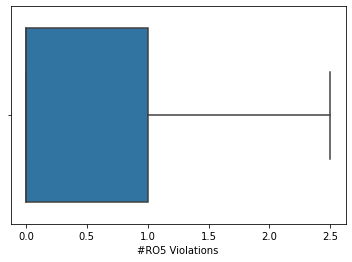

In [44]:
q1=data['#RO5 Violations'].quantile(0.25)
q3=data['#RO5 Violations'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['#RO5 Violations']<min),'#RO5 Violations']=min
data.loc[(data['#RO5 Violations']>max),'#RO5 Violations']=max
sns.boxplot(x=data["#RO5 Violations"],fliersize=10,orient="h")

3.0 7.0 4.0
-3.0
13.0


<AxesSubplot:xlabel='#Rotatable Bonds'>

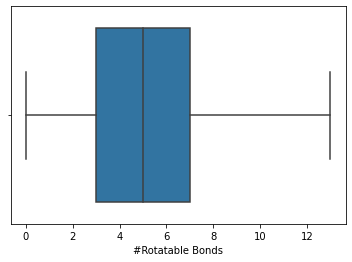

In [45]:
q1=data['#Rotatable Bonds'].quantile(0.25)
q3=data['#Rotatable Bonds'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['#Rotatable Bonds']<min),'#Rotatable Bonds']=min
data.loc[(data['#Rotatable Bonds']>max),'#Rotatable Bonds']=max
sns.boxplot(x=data["#Rotatable Bonds"],fliersize=10,orient="h")

0.39 0.72 0.32999999999999996
-0.10499999999999993
1.2149999999999999


<AxesSubplot:xlabel='QED Weighted'>

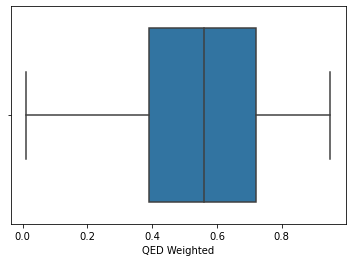

In [46]:
q1=data['QED Weighted'].quantile(0.25)
q3=data['QED Weighted'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['QED Weighted']<min),'QED Weighted']=min
data.loc[(data['QED Weighted']>max),'QED Weighted']=max
sns.boxplot(x=data["QED Weighted"],fliersize=10,orient="h")

<AxesSubplot:xlabel='CX Acidic pKa'>

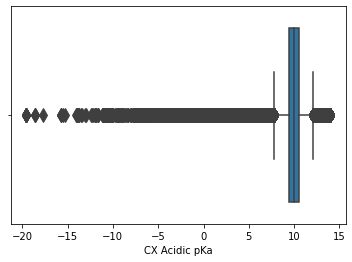

In [47]:
sns.boxplot(x=data["CX Acidic pKa"],fliersize=10,orient="h")

9.43 10.5 1.0700000000000003
7.824999999999999
12.105


<AxesSubplot:xlabel='CX Acidic pKa'>

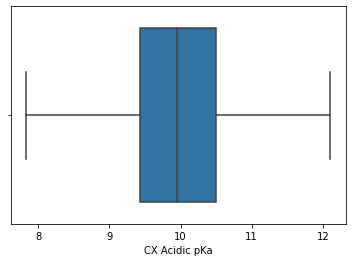

In [48]:
q1=data['CX Acidic pKa'].quantile(0.25)
q3=data['CX Acidic pKa'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['CX Acidic pKa']<min),'CX Acidic pKa']=min
data.loc[(data['CX Acidic pKa']>max),'CX Acidic pKa']=max
sns.boxplot(x=data["CX Acidic pKa"],fliersize=10,orient="h")

<AxesSubplot:xlabel='CX Basic pKa'>

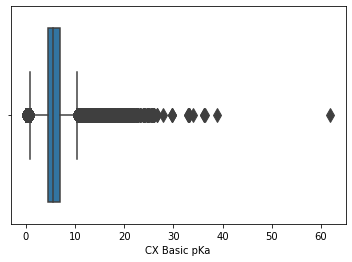

In [49]:
sns.boxplot(x=data["CX Basic pKa"],fliersize=10,orient="h")

4.4 6.83 2.4299999999999997
0.7550000000000008
10.475


<AxesSubplot:xlabel='CX Basic pKa'>

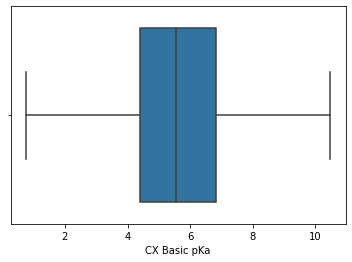

In [50]:
q1=data['CX Basic pKa'].quantile(0.25)
q3=data['CX Basic pKa'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['CX Basic pKa']<min),'CX Basic pKa']=min
data.loc[(data['CX Basic pKa']>max),'CX Basic pKa']=max
sns.boxplot(x=data["CX Basic pKa"],fliersize=10,orient="h")

<AxesSubplot:xlabel='CX LogD'>

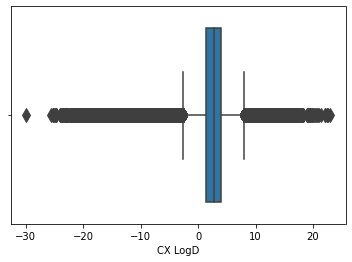

In [51]:
sns.boxplot(x=data["CX LogD"],fliersize=10,orient="h")

1.33 3.98 2.65
-2.6449999999999996
7.955


<AxesSubplot:xlabel='CX LogD'>

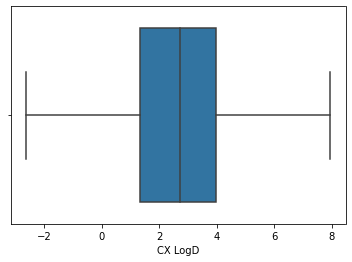

In [52]:
q1=data['CX LogD'].quantile(0.25)
q3=data['CX LogD'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['CX LogD']<min),'CX LogD']=min
data.loc[(data['CX LogD']>max),'CX LogD']=max
sns.boxplot(x=data["CX LogD"],fliersize=10,orient="h")

<AxesSubplot:xlabel='Aromatic Rings'>

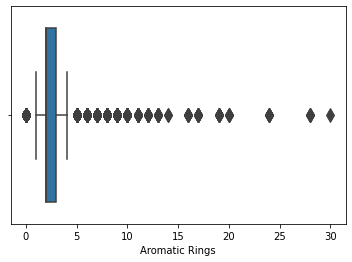

In [53]:
sns.boxplot(x=data["Aromatic Rings"],fliersize=10,orient="h")

2.0 3.0 1.0
0.5
4.5


<AxesSubplot:xlabel='Aromatic Rings'>

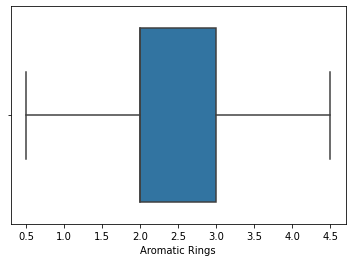

In [54]:
q1=data['Aromatic Rings'].quantile(0.25)
q3=data['Aromatic Rings'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['Aromatic Rings']<min),'Aromatic Rings']=min
data.loc[(data['Aromatic Rings']>max),'Aromatic Rings']=max
sns.boxplot(x=data["Aromatic Rings"],fliersize=10,orient="h")

<AxesSubplot:xlabel='Heavy Atoms'>

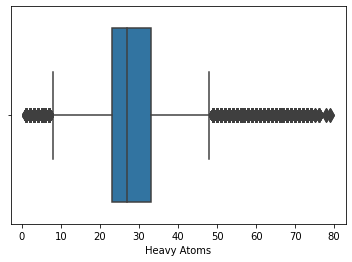

In [55]:
sns.boxplot(x=data["Heavy Atoms"],fliersize=10,orient="h")

In [56]:
q1=data['Heavy Atoms'].quantile(0.25)
q3=data['Heavy Atoms'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['Heavy Atoms']<min),'Heavy Atoms']=min
data.loc[(data['Heavy Atoms']>max),'Heavy Atoms']=max

23.0 33.0 10.0
8.0
48.0


<AxesSubplot:xlabel='HBD (Lipinski)'>

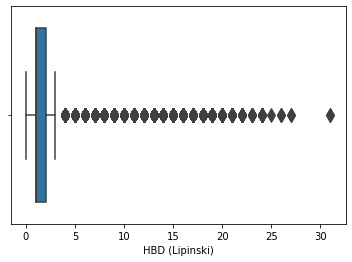

In [57]:
sns.boxplot(x=data["HBD (Lipinski)"],fliersize=10,orient="h")

1.0 2.0 1.0
-0.5
3.5


<AxesSubplot:xlabel='HBD (Lipinski)'>

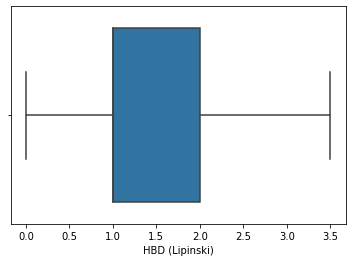

In [58]:
q1=data['HBD (Lipinski)'].quantile(0.25)
q3=data['HBD (Lipinski)'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['HBD (Lipinski)']<min),'HBD (Lipinski)']=min
data.loc[(data['HBD (Lipinski)']>max),'HBD (Lipinski)']=max
sns.boxplot(x=data["HBD (Lipinski)"],fliersize=10,orient="h")

<AxesSubplot:xlabel='#RO5 Violations (Lipinski)'>

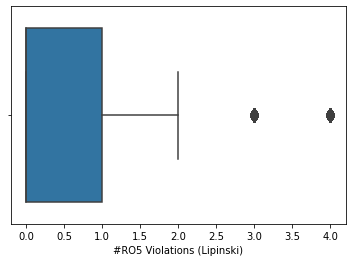

In [59]:
#RO5 Violations (Lipinski)  
sns.boxplot(x=data["#RO5 Violations (Lipinski)"],fliersize=10,orient="h")

0.0 1.0 1.0
-1.5
2.5


<AxesSubplot:xlabel='#RO5 Violations (Lipinski)'>

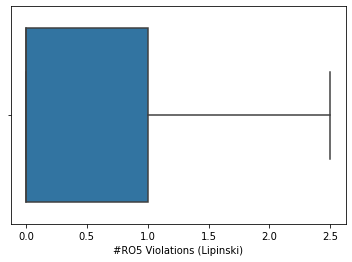

In [60]:
q1=data['#RO5 Violations (Lipinski)'].quantile(0.25)
q3=data['#RO5 Violations (Lipinski)'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['#RO5 Violations (Lipinski)']<min),'#RO5 Violations (Lipinski)']=min
data.loc[(data['#RO5 Violations (Lipinski)']>max),'#RO5 Violations (Lipinski)']=max
sns.boxplot(x=data["#RO5 Violations (Lipinski)"],fliersize=10,orient="h")

<AxesSubplot:xlabel='Molecular Weight (Monoisotopic)'>

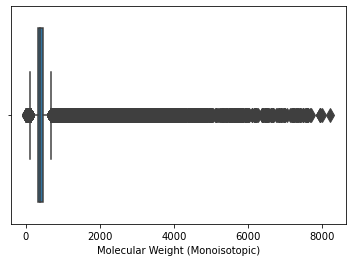

In [61]:
#Molecular Weight (Monoisotopic)
sns.boxplot(x=data["Molecular Weight (Monoisotopic)"],fliersize=10,orient="h")

323.0519 467.2198 144.16790000000003
106.80004999999994
683.4716500000001


<AxesSubplot:xlabel='Molecular Weight (Monoisotopic)'>

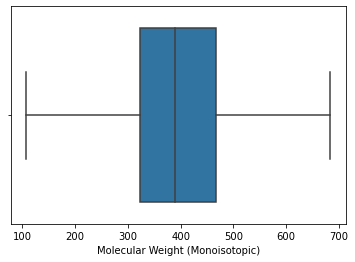

In [62]:
q1=data['Molecular Weight (Monoisotopic)'].quantile(0.25)
q3=data['Molecular Weight (Monoisotopic)'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['Molecular Weight (Monoisotopic)']<min),'Molecular Weight (Monoisotopic)']=min
data.loc[(data['Molecular Weight (Monoisotopic)']>max),'Molecular Weight (Monoisotopic)']=max
#Molecular Weight (Monoisotopic)
sns.boxplot(x=data["Molecular Weight (Monoisotopic)"],fliersize=10,orient="h")

<AxesSubplot:xlabel='CX LogP'>

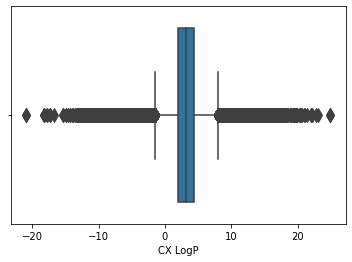

In [63]:
sns.boxplot(x=data["CX LogP"],fliersize=10,orient="h")

2.02 4.42 2.4
-1.5799999999999996
8.02


<AxesSubplot:xlabel='CX LogP'>

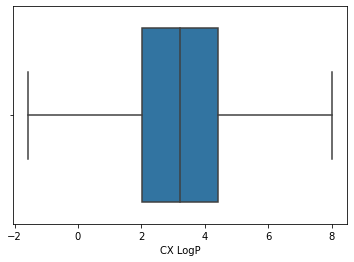

In [64]:
q1=data['CX LogP'].quantile(0.25)
q3=data['CX LogP'].quantile(0.75)
iqr=q3-q1
print(q1,q3,iqr)
min=q1-(1.5*iqr)
max=q3+(1.5*iqr)
print(min)
print(max)
data.loc[(data['CX LogP']<min),'CX LogP']=min
data.loc[(data['CX LogP']>max),'CX LogP']=max
#Molecular Weight (Monoisotopic)
sns.boxplot(x=data["CX LogP"],fliersize=10,orient="h")

In [65]:
data

ChEMBL ID   Name  Synonyms  Max Phase  Molecular Weight  Targets  \
0          1542286  14203     24324          0            691.63      3.0   
1           994155  32883     35118          0            361.23      3.0   
2          1593761  32883     35118          0            527.07      1.0   
3           624859  32883     35118          0            337.42      2.0   
4           759370   4358     13597          0            119.16      3.0   
...            ...    ...       ...        ...               ...      ...   
1920134    1542025  29586     56225          4            423.37      2.0   
1920135      84660  14612     31321          0            357.35     13.5   
1920136     760807  31629     44574          3            393.41      3.0   
1920137     760936   8871     17479          4            393.41      3.0   
1920138     970144   5893     14339          2            414.41     13.5   

         Bioactivities  AlogP  Polar Surface Area  HBA  ...  Structure Type  \
0                  4.0   3.83              165.63  9.0  ...               1   
1                  4.0   4.78               73.06  5.0  ...               1   
2                  5.0   6.06               71.16  4.0  ...               1   
3                  2.0   2.10               62.30  3.0  ...               1   
4                  4.0   3.48               75.35  5.0  ...               1   
...                ...    ...                 ...  ...  ...             ...   
1920134            2.0   2.88               86.33  6.0  ...               1   
1920135           19.5   0.99              102.48  7.0  ...               1   
1920136            4.0   3.48               75.35  5.0  ...               1   
1920137            4.0   3.48               75.35  5.0  ...               1   
1920138           19.5   2.41               92.68  8.0  ...               1   

         Inorganic Flag  Heavy Atoms  HBA (Lipinski)  HBD (Lipinski)  \
0                     0         48.0            15.0             1.0   
1                    -1         24.0             5.0             3.0   
2                    -1         37.0             6.0             2.0   
3                    -1         25.0             5.0             1.0   
4                     0         27.0             6.0             1.0   
...                 ...          ...             ...             ...   
1920134               0         26.0             7.0             1.0   
1920135               0         25.0             8.0             0.0   
1920136               0         27.0             6.0             1.0   
1920137               0         27.0             6.0             1.0   
1920138               0         30.0             8.0             1.0   

         #RO5 Violations (Lipinski)  Molecular Weight (Monoisotopic)  \
0                               2.0                        683.47165   
1                               0.0                        360.05450   
2                               1.0                        490.23690   
3                               0.0                        337.17900   
4                               0.0                        119.09460   
...                             ...                              ...   
1920134                         0.0                        383.07510   
1920135                         0.0                        357.04190   
1920136                         0.0                        389.16610   
1920137                         0.0                        389.16610   
1920138                         0.0                        414.13150   

         Molecular Species  Molecular Formula  \
0                        2             322487   
1                        2              69276   
2                        1             266606   
3                        2             120471   
4                        2             348074   
...                    ...                ...   
1920134                  2              58358   
1920135      

###  Generating Molecule graphs based on 'Smiles' column

** First Example:

In [66]:
import ast

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from rdkit import Chem, RDLogger
from rdkit import rdBase
from rdkit.Chem import BondType
from rdkit.Chem.Draw import MolsToGridImage

RDLogger.DisableLog("rdApp.*")

In [67]:
def molecule_from_smiles(smiles):
    # MolFromSmiles(m, sanitize=True) should be equivalent to
    # MolFromSmiles(m, sanitize=False) -> SanitizeMol(m) -> AssignStereochemistry(m, ...)
    molecule = Chem.MolFromSmiles(smiles, sanitize=False)

    # If sanitization is unsuccessful, catch the error, and try again without
    # the sanitization step that caused the error
    flag = Chem.SanitizeMol(molecule, catchErrors=True)
    if flag != Chem.SanitizeFlags.SANITIZE_NONE:
        Chem.SanitizeMol(molecule, sanitizeOps=Chem.SanitizeFlags.SANITIZE_ALL ^ flag)

    Chem.AssignStereochemistry(molecule, cleanIt=True, force=True)
    return molecule

SMILES:	COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)nc(N)n1
Synonyms:	35118
Name:	32883
Molecule:


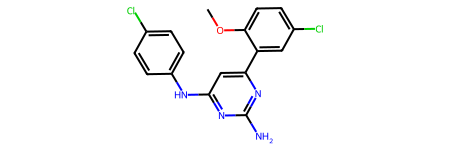

In [68]:
print(f"SMILES:\t{data.Smiles[1]}\nSynonyms:\t{data.Synonyms[1]}\nName:\t{data.Name[1]}")
molecule = molecule_from_smiles(data.iloc[1].Smiles)
print("Molecule:")
molecule

** Second Example (2D):

In [69]:
import rdkit
from rdkit import Chem
from rdkit.Chem import Draw

# define the SMILES notation of the molecule
smiles = 'COc1ccc(/C=C/C2=NN(CCCN)C(=O)N(Cc3ccc4ccccc4c3)c3ccccc32)cc1.Cl'

# convert the SMILES notation to a molecule object
mol = Chem.MolFromSmiles(smiles)

# draw the molecule
img = Draw.MolToImage(mol)

# save the image to a file
img.save('molecule.png')

In [70]:
import py3Dmol
import ipywidgets as widgets

# Load the PDB file
pdb_file = 'C:/Users/Abir/Desktop/4ème DS/Project data science/molecule13d.pdb'
with open(pdb_file) as f:
    pdb_data = f.read()

# Create the py3Dmol view object
view = py3Dmol.view(width=600, height=400)
view.addModel(pdb_data, 'pdb')

# Display the view object using an ipywidgets output widget
out = widgets.Output()
with out:
    view.show()
out

ModuleNotFoundError: No module named 'py3Dmol'

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem

# Define the SMILES code
smiles = 'CCCCC(=O)O.N'

# Convert SMILES to 3D structure
mol = Chem.MolFromSmiles(smiles)
mol = Chem.AddHs(mol)
AllChem.EmbedMolecule(mol)

# Save the 3D structure as a PDB file
Chem.MolToPDBFile(mol, 'molecule13d.pdb')

**Molecular graph

In [ ]:
import networkx as nx
from rdkit import Chem

def mol_to_nx(mol):
 
    # Create an empty NetworkX graph
    G = nx.Graph()

    # Add nodes to the graph for each atom in the molecule
    for i in range(mol.GetNumAtoms()):
        atom = mol.GetAtomWithIdx(i)
        G.add_node(i, atomic_num=atom.GetAtomicNum())

    # Add edges to the graph for each bond in the molecule
    for bond in mol.GetBonds():
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        G.add_edge(u, v, bond_type=bond.GetBondType())

    return G

In [ ]:
# Create a molecule object from a SMILES string
mol = Chem.MolFromSmiles('CC(=O)O')

# Convert the molecule to a NetworkX graph
G = mol_to_nx(mol)

# Print the nodes and edges of the graph
print('Nodes:', G.nodes(data=True))
print('Edges:', G.edges(data=True))

In [ ]:
print(G)

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
from rdkit import Chem

def mol_to_nx(mol):
    """
    Converts an RDKit molecule object to a NetworkX graph object.
    """
    # Create an empty NetworkX graph
    G = nx.Graph()

    # Add nodes to the graph for each atom in the molecule
    for i in range(mol.GetNumAtoms()):
        atom = mol.GetAtomWithIdx(i)
        G.add_node(i, atomic_num=atom.GetAtomicNum())

    # Add edges to the graph for each bond in the molecule
    for bond in mol.GetBonds():
        u = bond.GetBeginAtomIdx()
        v = bond.GetEndAtomIdx()
        G.add_edge(u, v, bond_type=bond.GetBondType())

    return G

# Create a molecule object from a SMILES string
mol = Chem.MolFromSmiles('CC(=O)O')

# Convert the molecule to a NetworkX graph
G = mol_to_nx(mol)

# Draw the graph using matplotlib
pos = nx.spring_layout(G, seed=42)
nx.draw_networkx_nodes(G, pos, node_size=500, node_color='lightblue')
nx.draw_networkx_edges(G, pos, width=2, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=14, font_family='sans-serif')
plt.axis('off')
plt.show()

## Similarity

In [ ]:
from rdkit import Chem
from rdkit.DataStructs.cDataStructs import TanimotoSimilarity

def tanimoto_similarity(smiles1, smiles2):
    mol1 = Chem.MolFromSmiles(smiles1)
    mol2 = Chem.MolFromSmiles(smiles2)
    fp1 = Chem.RDKFingerprint(mol1)
    fp2 = Chem.RDKFingerprint(mol2)
    return TanimotoSimilarity(fp1, fp2)

# example usage
X_train = ["CC(C)CCO", "CC(C)C=C"]
y_train = ["CC(C)CCO", "CC(C)C(=O)O"]
for x in X_train:
    for y in y_train:
        similarity = tanimoto_similarity(x, y)
        print(f"Tanimoto similarity between {x} and {y}: {similarity:.2f}")

In [ ]:
from rdkit import Chem
from rdkit.Chem import AllChem, DataStructs

# Convert SMILES to RDKit molecule object
x_train_mol = Chem.MolFromSmiles('CCO')

# Generate molecular fingerprint for X train molecule
x_train_fp = AllChem.GetMorganFingerprintAsBitVect(x_train_mol, 2, nBits=1024)

# Convert target SMILES to RDKit molecule object
target_smiles = 'CC(=O)O'
target_mol = Chem.MolFromSmiles(target_smiles)

# Generate molecular fingerprint for target molecule
target_fp = AllChem.GetMorganFingerprintAsBitVect(target_mol, 2, nBits=1024)

# Calculate Tanimoto coefficient
tanimoto_coeff = DataStructs.TanimotoSimilarity(x_train_fp, target_fp)

print('Tanimoto coefficient:', tanimoto_coeff)
from rdkit import Chem
from rdkit.Chem import AllChem

# Convert SMILES to RDKit molecule object
x_train_mol = Chem.MolFromSmiles('CCO')

# Calculate Morgan fingerprint for X train molecule
x_train_fp = AllChem.GetMorganFingerprintAsBitVect(x_train_mol, 2, nBits=1024)

# Convert target SMILES to RDKit molecule object
target_smiles = 'CC(=O)O'
target_mol = Chem.MolFromSmiles(target_smiles)

# Calculate Morgan fingerprint for target molecule
target_fp = AllChem.GetMorganFingerprintAsBitVect(target_mol, 2, nBits=1024)

# Calculate Tanimoto coefficient
tanimoto_coeff = DataStructs.TanimotoSimilarity(x_train_fp, target_fp)

print('Tanimoto coefficient:', tanimoto_coeff)

In [ ]:
#pip install chembl-webresource-client
from chembl_webresource_client.new_client import new_client

similarity = new_client.similarity
res = similarity.filter(smiles="CO[C@@H](CCC#C\C=C/CCCC(C)CCCCC=C)C(=O)[O-]", similarity=70).only(['ChEMBL ID', 'similarity'])
for i in res:
    print(i)

In [ ]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data

similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL3989817', similarity=70).only(['ChEMBL ID', 'Name', 'similarity'])
pd.DataFrame(res)

In [19]:

data1=data.head(400)

# molbert

In [ ]:
###finetuned

In [20]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments


# Step 1: Load the data

train_texts = data1['Smiles'].tolist() # list of SMILES strings
target_properties  = ['Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP', 'Polar Surface Area',
                      'HBA', 'HBD', '#RO5 Violations', '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
                      'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings', 'Structure Type', 'Inorganic Flag',
                      'Heavy Atoms', 'HBA (Lipinski)', 'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
                      'Molecular Weight (Monoisotopic)', 'Molecular Species', 'Molecular Formula']
train_labels  = [data1[col].tolist() for col in target_properties]

# Step 2: Tokenize the data
tokenizer = AutoTokenizer.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k", use_fast=False)

train_encodings = tokenizer(train_texts, truncation=True, padding=True)

train_dataset = torch.utils.data.TensorDataset(
    torch.tensor(train_encodings['input_ids']),
    torch.tensor(train_labels).permute(1,0)
)

# Step 3: Load the model
model = AutoModelForSequenceClassification.from_pretrained("seyonec/PubChem10M_SMILES_BPE_450k", num_labels=len(target_properties))

# Step 4: Define the loss function, optimizer, and gradient updates
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)

# Step 5: Train the model
for epoch in range(3):
    print(f"Epoch {epoch}")
    for step, batch in enumerate(train_dataset):
        model.train()
        inputs = {"input_ids": batch[0].unsqueeze(0), "labels": batch[1].unsqueeze(0)}
        optimizer.zero_grad()
        outputs = model(**inputs)
        loss = loss_fn(outputs[0], inputs["labels"])
        loss.backward()
        optimizer.step()
        if step % 100 == 0:
            print(f"Step {step}, Loss {loss}")


Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.
Some weights of the model checkpoint at seyonec/PubChem10M_SMILES_BPE_450k were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassificatio

Epoch 0


C:\Users\Abir\anaconda3\lib\site-packages\torch\nn\modules\loss.py:536: UserWarning: Using a target size (torch.Size([1, 26])) that is different to the input size (torch.Size([])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Step 0, Loss 4018499328.0
Step 100, Loss 689385728.0
Step 200, Loss 3164938752.0
Step 300, Loss 1057359296.0
Epoch 1
Step 0, Loss 3845515008.0
Step 100, Loss 689906048.0
Step 200, Loss 3157133824.0
Step 300, Loss 1058072320.0
Epoch 2
Step 0, Loss 3844305408.0
Step 100, Loss 689965056.0
Step 200, Loss 3161495808.0
Step 300, Loss 1058946304.0


In [75]:
data1=data.head(400)

In [21]:
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from sklearn.metrics.pairwise import cosine_similarity
from rdkit import Chem

# Load MolBERT model and tokenizer
model_name = "seyonec/PubChem10M_SMILES_BPE_450k"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=29)  # set num_labels to 29 for 29 properties

# Define function to predict properties from SMILES
def predict_properties(smiles):
    inputs = tokenizer(smiles, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)[0]
    predictions = torch.sigmoid(outputs).detach().cpu().numpy()[0]
    property_names = ['Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP', 'Polar Surface Area',
                      'HBA', 'HBD', '#RO5 Violations', '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
                      'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings', 'Structure Type', 'Inorganic Flag',
                      'Heavy Atoms', 'HBA (Lipinski)', 'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
                      'Molecular Weight (Monoisotopic)', 'Molecular Species', 'Molecular Formula']
    return dict(zip(property_names, predictions))

def synthesize_compound(smiles):
    # Perform synthesis of the compound
    # ...
    # Calculate synthetic feasibility score (0 to 1 scale)
    synthetic_feasibility_score = 0.8
    
    # Calculate accessibility score (0 to 1 scale)
    accessibility_score = 0.7
    
    # Calculate property score based on predicted properties (0 to 1 scale)
    property_score = 0.9  # Replace with actual property scoring function
    
    # Calculate final score (0 to 1 scale) as weighted sum of the three scores
    final_score = 0.4 * synthetic_feasibility_score + 0.3 * accessibility_score + 0.3 * property_score
    
    return final_score

def generate_smiles(predictions, input_smiles, threshold=0.8, max_attempts=100):
    generated_smiles = []
    for i in range(max_attempts):
        # Generate mutated SMILES string
        mol = Chem.MolFromSmiles(input_smiles)
        mutated_mol = Chem.Mol(mol)
        for atom in mutated_mol.GetAtoms():
            if np.random.uniform() < 0.05:
                atom.SetAtomicNum(int(np.random.choice([6, 7, 8, 9])))
        random_smiles = Chem.MolToSmiles(mutated_mol)
        
        # Check if generated SMILES is valid and can be converted back to input SMILES
        try:
            # Check if generated SMILES is valid RDKit molecule
            Chem.SanitizeMol(Chem.MolFromSmiles(random_smiles))
            # Check if generated SMILES can be converted back to input SMILES
            generated_inputs = tokenizer(random_smiles, return_tensors="pt", padding=True, truncation=True)
            generated_smiles_decoded = tokenizer.decode(generated_inputs.input_ids[0])
            if generated_smiles_decoded == input_smiles:
                continue
        except:
            # If generated SMILES is invalid, continue to next iteration
            continue
        
        # Predict properties of generated SMILES
        generated_predictions = predict_properties(random_smiles)
        # Check if predicted properties are similar to input properties
        similarity = cosine_similarity([list(generated_predictions.values())], [list(predictions.values())])[0][0]
        if similarity > threshold:
            # Calculate score for the generated compound
            score = synthesize_compound(random_smiles)
            generated_smiles.append((random_smiles, score))
            if len(generated_smiles) >= 10:  # break out of loop after generating 10 SMILES strings
                break
    # Sort generated SMILES by score in descending order
    generated_smiles.sort(key=lambda x: x[1], reverse=True)
    # Return the SMILES string with the highest score
    if generated_smiles:
        return generated_smiles[0][0]
    else:
        return None



    # Example usage
for index, row in data1.iterrows():
    input_smiles = row["Smiles"]
    input_properties = predict_properties(input_smiles)
    new_smiles = generate_smiles(input_properties, input_smiles, threshold=0.3)
    print("Input SMILES:", input_smiles)
    print("Input properties:", input_properties)
    print("Generated SMILES:", new_smiles)
    for s in new_smiles:
        s_properties = predict_properties(s)
        similarity = cosine_similarity([list(input_properties.values())], [list(s_properties.values())])[0][0]
        print("Similarity:", similarity)


Some weights of the model checkpoint at seyonec/PubChem10M_SMILES_BPE_450k were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/PubChem10M_SMILES_BPE_45

Input SMILES: CCC(=O)O[C@H]1[C@H](C)O[C@@H](O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@H](OC(=O)CC)[C@@H](C)C(=O)[C@]3(CO3)C[C@H](C)[C@H](O[C@@H]3O[C@H](C)C[C@H](N(C)C)[C@H]3O)[C@H]2C)C[C@@H]1OC
Input properties: {'Max Phase': 0.44359478, 'Molecular Weight': 0.48641476, 'Targets': 0.486731, 'Bioactivities': 0.5148706, 'AlogP': 0.56296766, 'Polar Surface Area': 0.4934891, 'HBA': 0.49120936, 'HBD': 0.50490314, '#RO5 Violations': 0.4871972, '#Rotatable Bonds': 0.5585104, 'Passes Ro3': 0.48919863, 'QED Weighted': 0.5398245, 'CX Acidic pKa': 0.51880026, 'CX Basic pKa': 0.4140311, 'CX LogP': 0.42121288, 'CX LogD': 0.50369066, 'Aromatic Rings': 0.47224888, 'Structure Type': 0.5016477, 'Inorganic Flag': 0.52597004, 'Heavy Atoms': 0.5540284, 'HBA (Lipinski)': 0.4265488, 'HBD (Lipinski)': 0.47518188, '#RO5 Violations (Lipinski)': 0.437633, 'Molecular Weight (Monoisotopic)': 0.50665534, 'Molecular Species': 0.52071154, 'Molecular Formula': 0.5469209}
Generated SMILES: CCC(=O)O[C@H]1[C@@H](C)[C@@H]

[19:33:50] SMILES Parse Error: syntax error while parsing: COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)nc(N)f1
[19:33:50] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)nc(N)f1' for input: 'COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)nc(N)f1'
[19:33:50] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7
[19:33:50] SMILES Parse Error: syntax error while parsing: COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)fc(N)n1
[19:33:50] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)fc(N)n1' for input: 'COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)fc(N)n1'
[19:33:50] Can't kekulize mol.  Unkekulized atoms: 9 10 11 21 23
[19:33:50] SMILES Parse Error: syntax error while parsing: COc1ccc(Cl)cf1-c1cc(Fc2ccc(Cl)cc2)nc(N)n1
[19:33:50] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(Cl)cf1-c1cc(Fc2ccc(Cl)cc2)nc(N)n1' for input: 'COc1ccc(Cl)cf1-c1cc(Fc2ccc(Cl)cc2)nc(N)n1'
[19:33:50] SMILES Parse Error: syntax error while parsing: COc1ccc(Cl)cc1-c1cc(Cc2ccc(Cl)cc2)nc(N)f1
[19:33:50] SMI

Input SMILES: COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)nc(N)n1
Input properties: {'Max Phase': 0.4946287, 'Molecular Weight': 0.46267313, 'Targets': 0.58413523, 'Bioactivities': 0.48483583, 'AlogP': 0.5602375, 'Polar Surface Area': 0.521048, 'HBA': 0.48989743, 'HBD': 0.47260955, '#RO5 Violations': 0.5777338, '#Rotatable Bonds': 0.47542575, 'Passes Ro3': 0.43325067, 'QED Weighted': 0.58375716, 'CX Acidic pKa': 0.51515603, 'CX Basic pKa': 0.47522506, 'CX LogP': 0.51262826, 'CX LogD': 0.5073728, 'Aromatic Rings': 0.39707747, 'Structure Type': 0.5380536, 'Inorganic Flag': 0.53211766, 'Heavy Atoms': 0.46942306, 'HBA (Lipinski)': 0.53469706, 'HBD (Lipinski)': 0.50661606, '#RO5 Violations (Lipinski)': 0.36687368, 'Molecular Weight (Monoisotopic)': 0.6309334, 'Molecular Species': 0.38086104, 'Molecular Formula': 0.48523322}
Generated SMILES: COc1ccc(Cl)cc1-c1cc(Nc2ccc(Cl)cc2)nc(N)n1
Similarity: 0.9876383
Similarity: 0.990024
Similarity: 0.9875935
Similarity: 0.98765826
Similarity: 0.9875935
Similarit

[19:33:53] Explicit valence for atom # 6 O, 3, is greater than permitted
[19:33:53] Can't kekulize mol.  Unkekulized atoms: 29 30 31 32 33
[19:33:53] SMILES Parse Error: syntax error while parsing: COc1ccc(/C=C/C2=NN(CCCN)C(=O)N(Cc3ccf4occco4c3)c3ccccc32)cc1.Cl
[19:33:53] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(/C=C/C2=NN(CCCN)C(=O)N(Cc3ccf4occco4c3)c3ccccc32)cc1.Cl' for input: 'COc1ccc(/C=C/C2=NN(CCCN)C(=O)N(Cc3ccf4occco4c3)c3ccccc32)cc1.Cl'
[19:33:53] SMILES Parse Error: syntax error while parsing: COn1ccc(/O=C/C2=NN(CCCO)C(=O)N(Cc3ccc4occcc4c3)c3cccfc32)cc1.Cl
[19:33:53] SMILES Parse Error: Failed parsing SMILES 'COn1ccc(/O=C/C2=NN(CCCO)C(=O)N(Cc3ccc4occcc4c3)c3cccfc32)cc1.Cl' for input: 'COn1ccc(/O=C/C2=NN(CCCO)C(=O)N(Cc3ccc4occcc4c3)c3cccfc32)cc1.Cl'
[19:33:53] SMILES Parse Error: syntax error while parsing: COc1ccc(/C=C/N2=NN(CCCN)C(=O)N(Cc3ccc4ccccc4c3)c3ccccf32)cc1.Cl
[19:33:53] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(/C=C/N2=NN(CCCN)C(=O)N(Cc3ccc4ccccc4c3

Input SMILES: COc1ccc(/C=C/C2=NN(CCCN)C(=O)N(Cc3ccc4ccccc4c3)c3ccccc32)cc1.Cl
Input properties: {'Max Phase': 0.6101791, 'Molecular Weight': 0.44290143, 'Targets': 0.51582676, 'Bioactivities': 0.55393404, 'AlogP': 0.5619602, 'Polar Surface Area': 0.44738585, 'HBA': 0.4798237, 'HBD': 0.47489694, '#RO5 Violations': 0.44603828, '#Rotatable Bonds': 0.46992418, 'Passes Ro3': 0.42871198, 'QED Weighted': 0.5968621, 'CX Acidic pKa': 0.5307852, 'CX Basic pKa': 0.3709295, 'CX LogP': 0.499232, 'CX LogD': 0.452772, 'Aromatic Rings': 0.4599074, 'Structure Type': 0.47471526, 'Inorganic Flag': 0.58116007, 'Heavy Atoms': 0.44698292, 'HBA (Lipinski)': 0.54825896, 'HBD (Lipinski)': 0.5019322, '#RO5 Violations (Lipinski)': 0.4672656, 'Molecular Weight (Monoisotopic)': 0.63880163, 'Molecular Species': 0.52548, 'Molecular Formula': 0.50072396}
Generated SMILES: COc1ccc(/C=C/C2=NN(CCCN)C(=O)N(Cc3ccc4ccccc4c3)c3ccccc32)cc1.Cl
Similarity: 0.9881209
Similarity: 0.98847526
Similarity: 0.9879099
Similarity: 0.98

[19:33:56] Explicit valence for atom # 9 F, 3, is greater than permitted
[19:33:56] SMILES Parse Error: syntax error while parsing: Cc1ccc(CCN2CC(C(=O)NCc3cccnc3)CC2=O)cf1
[19:33:56] SMILES Parse Error: Failed parsing SMILES 'Cc1ccc(CCN2CC(C(=O)NCc3cccnc3)CC2=O)cf1' for input: 'Cc1ccc(CCN2CC(C(=O)NCc3cccnc3)CC2=O)cf1'
[19:33:56] SMILES Parse Error: syntax error while parsing: Cc1ccc(CCN2CC(C(=O)NCf3cccnc3)CC2=O)cc1
[19:33:56] SMILES Parse Error: Failed parsing SMILES 'Cc1ccc(CCN2CC(C(=O)NCf3cccnc3)CC2=O)cc1' for input: 'Cc1ccc(CCN2CC(C(=O)NCf3cccnc3)CC2=O)cc1'
[19:33:56] Explicit valence for atom # 4 O, 4, is greater than permitted


Input SMILES: Cc1ccc(CCN2CC(C(=O)NCc3cccnc3)CC2=O)cc1
Input properties: {'Max Phase': 0.49054, 'Molecular Weight': 0.44772062, 'Targets': 0.6131233, 'Bioactivities': 0.4535019, 'AlogP': 0.5174465, 'Polar Surface Area': 0.5225385, 'HBA': 0.48184752, 'HBD': 0.38827714, '#RO5 Violations': 0.5391624, '#Rotatable Bonds': 0.47981963, 'Passes Ro3': 0.4338011, 'QED Weighted': 0.5897423, 'CX Acidic pKa': 0.58497584, 'CX Basic pKa': 0.4959289, 'CX LogP': 0.48882914, 'CX LogD': 0.51586306, 'Aromatic Rings': 0.3978515, 'Structure Type': 0.591715, 'Inorganic Flag': 0.61014783, 'Heavy Atoms': 0.49930206, 'HBA (Lipinski)': 0.5908954, 'HBD (Lipinski)': 0.5000778, '#RO5 Violations (Lipinski)': 0.4188564, 'Molecular Weight (Monoisotopic)': 0.6815764, 'Molecular Species': 0.38911766, 'Molecular Formula': 0.5662018}
Generated SMILES: Cc1ccc(CCN2CC(C(=O)NCc3cccnc3)CC2=O)cc1
Similarity: 0.98731047
Similarity: 0.9875283
Similarity: 0.9870009
Similarity: 0.9875283
Similarity: 0.9875283
Similarity: 0.9875283
S

[19:33:58] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 20
[19:33:59] SMILES Parse Error: syntax error while parsing: O=C1NCCN1c1ccc(S(=O)(=O)Oc2ccc(F)cc2)fc1
[19:33:59] SMILES Parse Error: Failed parsing SMILES 'O=C1NCCN1c1ccc(S(=O)(=O)Oc2ccc(F)cc2)fc1' for input: 'O=C1NCCN1c1ccc(S(=O)(=O)Oc2ccc(F)cc2)fc1'
[19:33:59] Can't kekulize mol.  Unkekulized atoms: 7 8 9 21 22
[19:33:59] SMILES Parse Error: syntax error while parsing: O=C1NCCN1c1ccc(O(=O)(=O)Oc2ccc(F)cc2)fc1
[19:33:59] SMILES Parse Error: Failed parsing SMILES 'O=C1NCCN1c1ccc(O(=O)(=O)Oc2ccc(F)cc2)fc1' for input: 'O=C1NCCN1c1ccc(O(=O)(=O)Oc2ccc(F)cc2)fc1'
[19:33:59] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:33:59] Can't kekulize mol.  Unkekulized atoms: 6 7 8 21 22
[19:33:59] SMILES Parse Error: syntax error while parsing: O=C1NCCN1c1ccc(S(=O)(=O)Of2ccc(F)cc2)cc1
[19:33:59] SMILES Parse Error: Failed parsing SMILES 'O=C1NCCN1c1ccc(S(=O)(=O)Of2ccc(F)cc2)cc1' for input: 'O=C1NCCN1c1ccc(S(=O)(=O)Of2c

Input SMILES: O=C1NCCN1c1ccc(S(=O)(=O)Oc2ccc(F)cc2)cc1
Input properties: {'Max Phase': 0.50872064, 'Molecular Weight': 0.44883484, 'Targets': 0.57766545, 'Bioactivities': 0.5210423, 'AlogP': 0.5170486, 'Polar Surface Area': 0.46546817, 'HBA': 0.41631395, 'HBD': 0.45200247, '#RO5 Violations': 0.5495454, '#Rotatable Bonds': 0.5440929, 'Passes Ro3': 0.48225036, 'QED Weighted': 0.6663226, 'CX Acidic pKa': 0.54991674, 'CX Basic pKa': 0.4306912, 'CX LogP': 0.45855165, 'CX LogD': 0.47994196, 'Aromatic Rings': 0.4043259, 'Structure Type': 0.5333062, 'Inorganic Flag': 0.52651083, 'Heavy Atoms': 0.4780385, 'HBA (Lipinski)': 0.57426536, 'HBD (Lipinski)': 0.49095526, '#RO5 Violations (Lipinski)': 0.3376372, 'Molecular Weight (Monoisotopic)': 0.6299251, 'Molecular Species': 0.43253705, 'Molecular Formula': 0.54044014}
Generated SMILES: O=C1NCCN1c1ccc(S(=O)(=O)Oc2ccc(F)cc2)cc1
Similarity: 0.98895633
Similarity: 0.98741955
Similarity: 0.98688364
Similarity: 0.9866315
Similarity: 0.9891203
Similarity:

[19:34:00] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:34:00] Explicit valence for atom # 3 N, 4, is greater than permitted
[19:34:00] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:34:00] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 27
[19:34:00] Explicit valence for atom # 29 F, 2, is greater than permitted
[19:34:00] SMILES Parse Error: syntax error while parsing: CFOC(=O)c1c(C)oc2nc(C)nf(NCC3CCN(Cc4cnc(F)fc4)CC3)c12
[19:34:00] SMILES Parse Error: Failed parsing SMILES 'CFOC(=O)c1c(C)oc2nc(C)nf(NCC3CCN(Cc4cnc(F)fc4)CC3)c12' for input: 'CFOC(=O)c1c(C)oc2nc(C)nf(NCC3CCN(Cc4cnc(F)fc4)CC3)c12'
[19:34:00] SMILES Parse Error: syntax error while parsing: COOC(=O)c1c(C)oc2ff(C)no(NCC3CCN(Cc4ccc(F)cc4)CC3)c12
[19:34:00] SMILES Parse Error: Failed parsing SMILES 'COOC(=O)c1c(C)oc2ff(C)no(NCC3CCN(Cc4ccc(F)cc4)CC3)c12' for input: 'COOC(=O)c1c(C)oc2ff(C)no(NCC3CCN(Cc4ccc(F)cc4)CC3)c12'
[19:34:01] SMILES Parse Error: syntax error while parsing: CCO

Input SMILES: CCOC(=O)c1c(C)oc2nc(C)nc(NCC3CCN(Cc4ccc(F)cc4)CC3)c12
Input properties: {'Max Phase': 0.44116622, 'Molecular Weight': 0.4380787, 'Targets': 0.55553174, 'Bioactivities': 0.43916398, 'AlogP': 0.61904144, 'Polar Surface Area': 0.4605449, 'HBA': 0.52271116, 'HBD': 0.5046756, '#RO5 Violations': 0.5229461, '#Rotatable Bonds': 0.5026019, 'Passes Ro3': 0.4595871, 'QED Weighted': 0.5834145, 'CX Acidic pKa': 0.6064517, 'CX Basic pKa': 0.46039, 'CX LogP': 0.45095116, 'CX LogD': 0.6012638, 'Aromatic Rings': 0.5304864, 'Structure Type': 0.5330328, 'Inorganic Flag': 0.59489655, 'Heavy Atoms': 0.41014084, 'HBA (Lipinski)': 0.5731209, 'HBD (Lipinski)': 0.5213681, '#RO5 Violations (Lipinski)': 0.34471112, 'Molecular Weight (Monoisotopic)': 0.65971756, 'Molecular Species': 0.49401268, 'Molecular Formula': 0.5223649}
Generated SMILES: CCOC(=O)c1c(C)oc2nc(C)nc(NCC3CCN(Cc4ccc(F)cc4)CC3)c12
Similarity: 0.98699903
Similarity: 0.98699903
Similarity: 0.9899765
Similarity: 0.98699903
Similarity: 0

[19:34:03] Can't kekulize mol.  Unkekulized atoms: 11 12 13 18 20
[19:34:03] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:34:03] Explicit valence for atom # 10 O, 3, is greater than permitted
[19:34:03] Explicit valence for atom # 3 F, 2, is greater than permitted
[19:34:03] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:34:03] Explicit valence for atom # 29 F, 2, is greater than permitted
[19:34:04] Explicit valence for atom # 15 F, 4, is greater than permitted
[19:34:04] Explicit valence for atom # 5 O, 3, is greater than permitted


Input SMILES: CN(CCCN1C(=O)CSC1c1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)CC1CC1
Input properties: {'Max Phase': 0.4979736, 'Molecular Weight': 0.48901498, 'Targets': 0.5328836, 'Bioactivities': 0.5262134, 'AlogP': 0.60581756, 'Polar Surface Area': 0.46915406, 'HBA': 0.47067273, 'HBD': 0.5548941, '#RO5 Violations': 0.46269038, '#Rotatable Bonds': 0.5124632, 'Passes Ro3': 0.47714663, 'QED Weighted': 0.7096307, 'CX Acidic pKa': 0.6085608, 'CX Basic pKa': 0.39611244, 'CX LogP': 0.47607926, 'CX LogD': 0.45816064, 'Aromatic Rings': 0.48894247, 'Structure Type': 0.5081216, 'Inorganic Flag': 0.55815953, 'Heavy Atoms': 0.52926636, 'HBA (Lipinski)': 0.5242454, 'HBD (Lipinski)': 0.48949173, '#RO5 Violations (Lipinski)': 0.43561983, 'Molecular Weight (Monoisotopic)': 0.71875656, 'Molecular Species': 0.51777655, 'Molecular Formula': 0.4679909}
Generated SMILES: CN(CCCN1C(=O)CSC1c1cc(C(C)(C)C)c(O)c(C(C)(C)C)c1)CC1CC1
Similarity: 0.98464864
Similarity: 0.98562026
Similarity: 0.9842249
Similarity: 0.98464864
Si

[19:34:06] SMILES Parse Error: syntax error while parsing: COc1cc(C(=O)C/C(CCCC(=O)Nc2cf(OC)ccc2OC)=N/NC(=O)C[N+](C)(C)C)ccc1O
[19:34:06] SMILES Parse Error: Failed parsing SMILES 'COc1cc(C(=O)C/C(CCCC(=O)Nc2cf(OC)ccc2OC)=N/NC(=O)C[N+](C)(C)C)ccc1O' for input: 'COc1cc(C(=O)C/C(CCCC(=O)Nc2cf(OC)ccc2OC)=N/NC(=O)C[N+](C)(C)C)ccc1O'
[19:34:06] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:34:06] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:34:06] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:34:06] Explicit valence for atom # 10 F, 4, is greater than permitted
[19:34:06] Explicit valence for atom # 33 F, 3, is greater than permitted
[19:34:06] SMILES Parse Error: syntax error while parsing: COc1cc(C(=O)C/C(CCCC(=O)Nc2cc(FC)cfc2OC)=N/NC(=O)C[N+](C)(C)C)ccc1O
[19:34:06] SMILES Parse Error: Failed parsing SMILES 'COc1cc(C(=O)C/C(CCCC(=O)Nc2cc(FC)cfc2OC)=N/NC(=O)C[N+](C)(C)C)ccc1O' for input: 'COc1cc(C(=O)C/C(CCCC(=O)Nc2cc(FC)cfc2O

Input SMILES: COc1ccc(OC)c(NC(=O)CCC/C(CC(=O)c2ccc(O)c(OC)c2)=N\NC(=O)C[N+](C)(C)C)c1
Input properties: {'Max Phase': 0.54691964, 'Molecular Weight': 0.3609918, 'Targets': 0.52401036, 'Bioactivities': 0.5306859, 'AlogP': 0.5947925, 'Polar Surface Area': 0.4866554, 'HBA': 0.4602684, 'HBD': 0.5065093, '#RO5 Violations': 0.48940492, '#Rotatable Bonds': 0.47615108, 'Passes Ro3': 0.4070239, 'QED Weighted': 0.55002904, 'CX Acidic pKa': 0.5245504, 'CX Basic pKa': 0.42330864, 'CX LogP': 0.5489755, 'CX LogD': 0.46958804, 'Aromatic Rings': 0.4233026, 'Structure Type': 0.49459732, 'Inorganic Flag': 0.5834297, 'Heavy Atoms': 0.52696997, 'HBA (Lipinski)': 0.53137577, 'HBD (Lipinski)': 0.52244854, '#RO5 Violations (Lipinski)': 0.44738886, 'Molecular Weight (Monoisotopic)': 0.61435854, 'Molecular Species': 0.5566933, 'Molecular Formula': 0.49262103}
Generated SMILES: COc1ccc(OC)c(NC(=O)CCC/C(=N\NC(=O)C[N+](C)(C)C)OC(=O)c2ccc(O)c(OC)c2)c1
Similarity: 0.98883253
Similarity: 0.9912616
Similarity: 0.9887

[19:34:10] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 24
[19:34:10] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:34:10] SMILES Parse Error: syntax error while parsing: O=C(N[C@H]1C(O)F[C@H](CNS(=O)(=O)c2cfcc(Cl)c2Cl)[C@@H](O)[C@@H]1O)c1ccc(Cl)s1
[19:34:10] SMILES Parse Error: Failed parsing SMILES 'O=C(N[C@H]1C(O)F[C@H](CNS(=O)(=O)c2cfcc(Cl)c2Cl)[C@@H](O)[C@@H]1O)c1ccc(Cl)s1' for input: 'O=C(N[C@H]1C(O)F[C@H](CNS(=O)(=O)c2cfcc(Cl)c2Cl)[C@@H](O)[C@@H]1O)c1ccc(Cl)s1'
[19:34:10] SMILES Parse Error: syntax error while parsing: C=S(=O)(NC[C@H]1ON(O)[C@H](OC(=O)c2ccn(Cl)s2)[C@@H](O)[C@@H]1O)c1cccf(Cl)c1Cl
[19:34:10] SMILES Parse Error: Failed parsing SMILES 'C=S(=O)(NC[C@H]1ON(O)[C@H](OC(=O)c2ccn(Cl)s2)[C@@H](O)[C@@H]1O)c1cccf(Cl)c1Cl' for input: 'C=S(=O)(NC[C@H]1ON(O)[C@H](OC(=O)c2ccn(Cl)s2)[C@@H](O)[C@@H]1O)c1cccf(Cl)c1Cl'
[19:34:10] Explicit valence for atom # 19 N, 4, is greater than permitted
[19:34:10] Explicit valence for atom # 1 O, 4, is greater than pe

Input SMILES: O=C(N[C@H]1C(O)O[C@H](CNS(=O)(=O)c2cccc(Cl)c2Cl)[C@@H](O)[C@@H]1O)c1ccc(Cl)s1
Input properties: {'Max Phase': 0.445838, 'Molecular Weight': 0.4280157, 'Targets': 0.47418523, 'Bioactivities': 0.50101936, 'AlogP': 0.6060478, 'Polar Surface Area': 0.50775707, 'HBA': 0.4436915, 'HBD': 0.51758057, '#RO5 Violations': 0.48974368, '#Rotatable Bonds': 0.5592379, 'Passes Ro3': 0.47941247, 'QED Weighted': 0.54598194, 'CX Acidic pKa': 0.5299065, 'CX Basic pKa': 0.40330932, 'CX LogP': 0.45133433, 'CX LogD': 0.4526106, 'Aromatic Rings': 0.46808675, 'Structure Type': 0.5380446, 'Inorganic Flag': 0.49948007, 'Heavy Atoms': 0.524241, 'HBA (Lipinski)': 0.491619, 'HBD (Lipinski)': 0.5117131, '#RO5 Violations (Lipinski)': 0.46925086, 'Molecular Weight (Monoisotopic)': 0.50792146, 'Molecular Species': 0.50811285, 'Molecular Formula': 0.50633484}
Generated SMILES: O=C(N[C@H]1C(O)O[C@H](CNS(=O)(=O)c2cccc(Cl)c2Cl)[C@@H](O)[C@@H]1O)c1ccc(Cl)o1
Similarity: 0.99066764
Similarity: 0.98815435
Similar

[19:34:13] SMILES Parse Error: syntax error while parsing: C=c1cc(Cc2cccc3cfccc23)c(C2CC2)c2n1C(C(=O)Nc1ccc(OC)cc1)CS2
[19:34:13] SMILES Parse Error: Failed parsing SMILES 'C=c1cc(Cc2cccc3cfccc23)c(C2CC2)c2n1C(C(=O)Nc1ccc(OC)cc1)CS2' for input: 'C=c1cc(Cc2cccc3cfccc23)c(C2CC2)c2n1C(C(=O)Nc1ccc(OC)cc1)CS2'
[19:34:13] SMILES Parse Error: syntax error while parsing: COc1ccc(NC(=O)C2CSf3c(C4CC4)c(Cc4cccc5ccccc45)cc(=O)n32)cc1
[19:34:13] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(NC(=O)C2CSf3c(C4CC4)c(Cc4cccc5ccccc45)cc(=O)n32)cc1' for input: 'COc1ccc(NC(=O)C2CSf3c(C4CC4)c(Cc4cccc5ccccc45)cc(=O)n32)cc1'
[19:34:13] SMILES Parse Error: syntax error while parsing: COc1ccc(NC(=O)C2CSc3c(C4CC4)c(Fc4nccc5ccccc45)cc(=O)f32)co1
[19:34:13] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(NC(=O)C2CSc3c(C4CC4)c(Fc4nccc5ccccc45)cc(=O)f32)co1' for input: 'COc1ccc(NC(=O)C2CSc3c(C4CC4)c(Fc4nccc5ccccc45)cc(=O)f32)co1'
[19:34:13] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:34

Input SMILES: COc1ccc(NC(=O)C2CSc3c(C4CC4)c(Cc4cccc5ccccc45)cc(=O)n32)cc1
Input properties: {'Max Phase': 0.5277726, 'Molecular Weight': 0.4096296, 'Targets': 0.51721823, 'Bioactivities': 0.4745243, 'AlogP': 0.5419787, 'Polar Surface Area': 0.5170959, 'HBA': 0.45327863, 'HBD': 0.37940535, '#RO5 Violations': 0.536011, '#Rotatable Bonds': 0.45994478, 'Passes Ro3': 0.47645545, 'QED Weighted': 0.5416808, 'CX Acidic pKa': 0.46679625, 'CX Basic pKa': 0.4173353, 'CX LogP': 0.4807734, 'CX LogD': 0.5156132, 'Aromatic Rings': 0.46594536, 'Structure Type': 0.5994177, 'Inorganic Flag': 0.6057641, 'Heavy Atoms': 0.4339934, 'HBA (Lipinski)': 0.51030725, 'HBD (Lipinski)': 0.50368595, '#RO5 Violations (Lipinski)': 0.431502, 'Molecular Weight (Monoisotopic)': 0.68312865, 'Molecular Species': 0.45408076, 'Molecular Formula': 0.576517}
Generated SMILES: COc1ccc(NC(=O)C2CSc3c(C4CC4)c(Cc4cccc5ccccc45)cc(=O)n32)cc1
Similarity: 0.98620814
Similarity: 0.98955
Similarity: 0.9865935
Similarity: 0.98918855
Simil

[19:34:16] Explicit valence for atom # 13 O, 3, is greater than permitted
[19:34:16] SMILES Parse Error: syntax error while parsing: CN(C)C(=O)c1cnc(N2CC3CN(C(=O)c4c(F)cfcn4-n4nccn4)OC3C2)nc1C(F)(F)F
[19:34:16] SMILES Parse Error: Failed parsing SMILES 'CN(C)C(=O)c1cnc(N2CC3CN(C(=O)c4c(F)cfcn4-n4nccn4)OC3C2)nc1C(F)(F)F' for input: 'CN(C)C(=O)c1cnc(N2CC3CN(C(=O)c4c(F)cfcn4-n4nccn4)OC3C2)nc1C(F)(F)F'
[19:34:16] SMILES Parse Error: syntax error while parsing: CN(C)C(=O)c1fnc(N2CC3CN(C(=O)c4c(F)cccc4-n4nccn4)CC3C2)nc1C(F)(F)F
[19:34:16] SMILES Parse Error: Failed parsing SMILES 'CN(C)C(=O)c1fnc(N2CC3CN(C(=O)c4c(F)cccc4-n4nccn4)CC3C2)nc1C(F)(F)F' for input: 'CN(C)C(=O)c1fnc(N2CC3CN(C(=O)c4c(F)cccc4-n4nccn4)CC3C2)nc1C(F)(F)F'
[19:34:16] Explicit valence for atom # 29 F, 3, is greater than permitted
[19:34:16] Can't kekulize mol.  Unkekulized atoms: 24 25 26
[19:34:16] Explicit valence for atom # 26 O, 4, is greater than permitted
[19:34:16] Can't kekulize mol.  Unkekulized atoms: 16 17 19 20

Input SMILES: CN(C)C(=O)c1cnc(N2CC3CN(C(=O)c4c(F)cccc4-n4nccn4)CC3C2)nc1C(F)(F)F
Input properties: {'Max Phase': 0.44106683, 'Molecular Weight': 0.3862805, 'Targets': 0.650745, 'Bioactivities': 0.5290231, 'AlogP': 0.5196672, 'Polar Surface Area': 0.44650742, 'HBA': 0.472633, 'HBD': 0.5842648, '#RO5 Violations': 0.39030033, '#Rotatable Bonds': 0.49345532, 'Passes Ro3': 0.41378626, 'QED Weighted': 0.5207497, 'CX Acidic pKa': 0.6279673, 'CX Basic pKa': 0.4727681, 'CX LogP': 0.50427014, 'CX LogD': 0.5302027, 'Aromatic Rings': 0.51688755, 'Structure Type': 0.42907587, 'Inorganic Flag': 0.5414768, 'Heavy Atoms': 0.5087602, 'HBA (Lipinski)': 0.5193325, 'HBD (Lipinski)': 0.5033577, '#RO5 Violations (Lipinski)': 0.42362744, 'Molecular Weight (Monoisotopic)': 0.5842422, 'Molecular Species': 0.4917973, 'Molecular Formula': 0.49509147}
Generated SMILES: CC(C)C(=O)c1cnc(N2CC3CN(C(=O)c4c(F)cccc4-n4nccn4)CC3C2)nc1C(C)(F)F
Similarity: 0.99008626
Similarity: 0.99008626
Similarity: 0.98410225
Similarity

[19:34:19] Can't kekulize mol.  Unkekulized atoms: 23 24 27 29 30
[19:34:19] SMILES Parse Error: syntax error while parsing: CCN1C(=O)C(C)(C)C(=O)N(C)c2cc(OCCCN(CCn3ccc4oc(C)cn4c3=O)Cc3ccnfc3)ccc21
[19:34:19] SMILES Parse Error: Failed parsing SMILES 'CCN1C(=O)C(C)(C)C(=O)N(C)c2cc(OCCCN(CCn3ccc4oc(C)cn4c3=O)Cc3ccnfc3)ccc21' for input: 'CCN1C(=O)C(C)(C)C(=O)N(C)c2cc(OCCCN(CCn3ccc4oc(C)cn4c3=O)Cc3ccnfc3)ccc21'
[19:34:19] Explicit valence for atom # 32 F, 2, is greater than permitted
[19:34:20] Can't kekulize mol.  Unkekulized atoms: 23 24 25 27 29
[19:34:20] Can't kekulize mol.  Unkekulized atoms: 12 13 14 40 42
[19:34:20] SMILES Parse Error: syntax error while parsing: CCN1C(=O)F(C)(C)C(=O)N(C)f2cc(OCCCC(CCn3ccc4oc(C)nc4c3=O)Cc3ccncc3)ccc21
[19:34:20] SMILES Parse Error: Failed parsing SMILES 'CCN1C(=O)F(C)(C)C(=O)N(C)f2cc(OCCCC(CCn3ccc4oc(C)nc4c3=O)Cc3ccncc3)ccc21' for input: 'CCN1C(=O)F(C)(C)C(=O)N(C)f2cc(OCCCC(CCn3ccc4oc(C)nc4c3=O)Cc3ccncc3)ccc21'
[19:34:20] SMILES Parse Error: synta

Input SMILES: CCN1C(=O)C(C)(C)C(=O)N(C)c2cc(OCCCN(CCn3ccc4oc(C)cc4c3=O)Cc3ccncc3)ccc21
Input properties: {'Max Phase': 0.5280814, 'Molecular Weight': 0.38362458, 'Targets': 0.5235601, 'Bioactivities': 0.59377754, 'AlogP': 0.6144201, 'Polar Surface Area': 0.46377006, 'HBA': 0.48730633, 'HBD': 0.6085604, '#RO5 Violations': 0.46533495, '#Rotatable Bonds': 0.459145, 'Passes Ro3': 0.48318902, 'QED Weighted': 0.50049907, 'CX Acidic pKa': 0.55146533, 'CX Basic pKa': 0.38416323, 'CX LogP': 0.42923436, 'CX LogD': 0.4685791, 'Aromatic Rings': 0.5273464, 'Structure Type': 0.42027354, 'Inorganic Flag': 0.6168126, 'Heavy Atoms': 0.4842763, 'HBA (Lipinski)': 0.5331969, 'HBD (Lipinski)': 0.51829153, '#RO5 Violations (Lipinski)': 0.37910584, 'Molecular Weight (Monoisotopic)': 0.5942276, 'Molecular Species': 0.51449054, 'Molecular Formula': 0.47617525}
Generated SMILES: CON1C(=O)C(C)(C)C(=O)N(C)c2cc(OCCCN(CCn3ccc4oc(C)cc4c3=O)Cc3ccncc3)ccc21
Similarity: 0.9840876
Similarity: 0.9875047
Similarity: 0.989

[19:34:23] Explicit valence for atom # 32 F, 2, is greater than permitted
[19:34:23] SMILES Parse Error: syntax error while parsing: C=CCNC[C@]12Cc3cfn(-c4ccc(F)cc4)c3O=C1CCN(S(=O)(=O)c1ccc(C(C)(C)C)cn1)C2
[19:34:23] SMILES Parse Error: Failed parsing SMILES 'C=CCNC[C@]12Cc3cfn(-c4ccc(F)cc4)c3O=C1CCN(S(=O)(=O)c1ccc(C(C)(C)C)cn1)C2' for input: 'C=CCNC[C@]12Cc3cfn(-c4ccc(F)cc4)c3O=C1CCN(S(=O)(=O)c1ccc(C(C)(C)C)cn1)C2'
[19:34:23] SMILES Parse Error: syntax error while parsing: C=CCNC[C@]12Cf3cnn(-c4ccc(F)cc4)c3C=C1CNN(S(=O)(=O)c1ccc(C(C)(C)F)cc1)O2
[19:34:23] SMILES Parse Error: Failed parsing SMILES 'C=CCNC[C@]12Cf3cnn(-c4ccc(F)cc4)c3C=C1CNN(S(=O)(=O)c1ccc(C(C)(C)F)cc1)O2' for input: 'C=CCNC[C@]12Cf3cnn(-c4ccc(F)cc4)c3C=C1CNN(S(=O)(=O)c1ccc(C(C)(C)F)cc1)O2'
[19:34:23] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:34:23] SMILES Parse Error: syntax error while parsing: CC(C)(C)c1ccc(O(=O)(=O)N2CCC3=Cc4n(cnn4-c4ccc(F)fc4)C[C@]3(CNCC=F)C2)cc1
[19:34:23] SMILES Parse Erro

Input SMILES: C=CCNC[C@]12Cc3cnn(-c4ccc(F)cc4)c3C=C1CCN(S(=O)(=O)c1ccc(C(C)(C)C)cc1)C2
Input properties: {'Max Phase': 0.5443308, 'Molecular Weight': 0.36261013, 'Targets': 0.5085922, 'Bioactivities': 0.53381723, 'AlogP': 0.5190849, 'Polar Surface Area': 0.41548735, 'HBA': 0.4413634, 'HBD': 0.5903222, '#RO5 Violations': 0.43233678, '#Rotatable Bonds': 0.49624887, 'Passes Ro3': 0.4735136, 'QED Weighted': 0.50070435, 'CX Acidic pKa': 0.48760307, 'CX Basic pKa': 0.3704389, 'CX LogP': 0.43379867, 'CX LogD': 0.50886637, 'Aromatic Rings': 0.5218205, 'Structure Type': 0.4672784, 'Inorganic Flag': 0.5447493, 'Heavy Atoms': 0.44918495, 'HBA (Lipinski)': 0.510172, 'HBD (Lipinski)': 0.5009864, '#RO5 Violations (Lipinski)': 0.41158655, 'Molecular Weight (Monoisotopic)': 0.58782667, 'Molecular Species': 0.4950882, 'Molecular Formula': 0.50593245}
Generated SMILES: C=CCNC[C@]12Cc3cnn(-c4ccc(F)cc4)c3C=C1CCN(S(=O)(=O)c1ccc(C(C)(C)C)cc1)C2
Similarity: 0.9874395
Similarity: 0.9888449
Similarity: 0.98743

[19:34:26] Can't kekulize mol.  Unkekulized atoms: 6 7 8
[19:34:26] SMILES Parse Error: syntax error while parsing: Clc1ccc(-f2cnc(NFCCCCNc3nnc(-c4ccc(Cl)fc4)[nH]3)[nH]2)cc1
[19:34:26] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(-f2cnc(NFCCCCNc3nnc(-c4ccc(Cl)fc4)[nH]3)[nH]2)cc1' for input: 'Clc1ccc(-f2cnc(NFCCCCNc3nnc(-c4ccc(Cl)fc4)[nH]3)[nH]2)cc1'
[19:34:27] SMILES Parse Error: syntax error while parsing: Clc1ccc(-c2cnc(NCCCCCNf3ncc(-f4ccc(Cl)cc4)[nH]3)[nH]2)cc1
[19:34:27] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(-c2cnc(NCCCCCNf3ncc(-f4ccc(Cl)cc4)[nH]3)[nH]2)cc1' for input: 'Clc1ccc(-c2cnc(NCCCCCNf3ncc(-f4ccc(Cl)cc4)[nH]3)[nH]2)cc1'
[19:34:27] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:34:27] SMILES Parse Error: syntax error while parsing: Clc1ccc(-c2cnc(NFCCFCNo3ncc(-c4ccf(Cl)cc4)[nH]3)[nH]2)cc1
[19:34:27] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(-c2cnc(NFCCFCNo3ncc(-c4ccf(Cl)cc4)[nH]3)[nH]2)cc1' for input: 'Clc1ccc(-c2cnc(NFCCFCNo3n

Input SMILES: Clc1ccc(-c2cnc(NCCCCCNc3ncc(-c4ccc(Cl)cc4)[nH]3)[nH]2)cc1
Input properties: {'Max Phase': 0.49596745, 'Molecular Weight': 0.39385748, 'Targets': 0.561344, 'Bioactivities': 0.48533833, 'AlogP': 0.55330914, 'Polar Surface Area': 0.47523522, 'HBA': 0.53327173, 'HBD': 0.472038, '#RO5 Violations': 0.5120042, '#Rotatable Bonds': 0.5766242, 'Passes Ro3': 0.461345, 'QED Weighted': 0.5930772, 'CX Acidic pKa': 0.5582677, 'CX Basic pKa': 0.43776697, 'CX LogP': 0.42927855, 'CX LogD': 0.520989, 'Aromatic Rings': 0.53011215, 'Structure Type': 0.4718844, 'Inorganic Flag': 0.558534, 'Heavy Atoms': 0.43892103, 'HBA (Lipinski)': 0.5267836, 'HBD (Lipinski)': 0.4301534, '#RO5 Violations (Lipinski)': 0.38806123, 'Molecular Weight (Monoisotopic)': 0.697464, 'Molecular Species': 0.44931322, 'Molecular Formula': 0.56807345}
Generated SMILES: Clc1ccc(-c2cnc(NCCCCCNc3ncc(-c4ccc(Cl)cc4)[nH]3)[nH]2)cc1
Similarity: 0.9874699
Similarity: 0.9899286
Similarity: 0.98751944
Similarity: 0.9899255
Similarit

[19:34:29] SMILES Parse Error: syntax error while parsing: Cl.NC(CCCCc1ccccc1)f1cccc2ccccc21
[19:34:29] SMILES Parse Error: Failed parsing SMILES 'Cl.NC(CCCCc1ccccc1)f1cccc2ccccc21' for input: 'Cl.NC(CCCCc1ccccc1)f1cccc2ccccc21'
[19:34:29] SMILES Parse Error: syntax error while parsing: Cl.NC(CCCCc1ccccc1)c1ccfc2ccccc12
[19:34:29] SMILES Parse Error: Failed parsing SMILES 'Cl.NC(CCCCc1ccccc1)c1ccfc2ccccc12' for input: 'Cl.NC(CCCCc1ccccc1)c1ccfc2ccccc12'


Input SMILES: Cl.NC(CCCCc1ccccc1)c1cccc2ccccc12
Input properties: {'Max Phase': 0.61966395, 'Molecular Weight': 0.5170062, 'Targets': 0.4907878, 'Bioactivities': 0.5005453, 'AlogP': 0.5323834, 'Polar Surface Area': 0.45192814, 'HBA': 0.44534218, 'HBD': 0.48711276, '#RO5 Violations': 0.49255756, '#Rotatable Bonds': 0.582671, 'Passes Ro3': 0.4641487, 'QED Weighted': 0.5594636, 'CX Acidic pKa': 0.5098915, 'CX Basic pKa': 0.45053953, 'CX LogP': 0.5400045, 'CX LogD': 0.5927958, 'Aromatic Rings': 0.47087172, 'Structure Type': 0.4875146, 'Inorganic Flag': 0.5005277, 'Heavy Atoms': 0.45698473, 'HBA (Lipinski)': 0.55091995, 'HBD (Lipinski)': 0.47424355, '#RO5 Violations (Lipinski)': 0.38523635, 'Molecular Weight (Monoisotopic)': 0.5877716, 'Molecular Species': 0.47529948, 'Molecular Formula': 0.5455626}
Generated SMILES: Cl.NC(CCCCc1ccccc1)c1cccc2ccccc12
Similarity: 0.9916737
Similarity: 0.99242306
Similarity: 0.9931114
Similarity: 0.9938649
Similarity: 0.9916737
Similarity: 0.9915756
Similarit

[19:34:31] SMILES Parse Error: syntax error while parsing: Cf1cccc/c1=N\C1CC1
[19:34:31] SMILES Parse Error: Failed parsing SMILES 'Cf1cccc/c1=N\C1CC1' for input: 'Cf1cccc/c1=N\C1CC1'


Input SMILES: Cn1cccc/c1=N\C1CC1
Input properties: {'Max Phase': 0.6077876, 'Molecular Weight': 0.5288908, 'Targets': 0.5176087, 'Bioactivities': 0.5168359, 'AlogP': 0.5028638, 'Polar Surface Area': 0.4249449, 'HBA': 0.5143733, 'HBD': 0.43870297, '#RO5 Violations': 0.5143658, '#Rotatable Bonds': 0.5065582, 'Passes Ro3': 0.5046265, 'QED Weighted': 0.5336693, 'CX Acidic pKa': 0.5197459, 'CX Basic pKa': 0.51693517, 'CX LogP': 0.52829725, 'CX LogD': 0.52443516, 'Aromatic Rings': 0.44438168, 'Structure Type': 0.4594378, 'Inorganic Flag': 0.4756903, 'Heavy Atoms': 0.51412386, 'HBA (Lipinski)': 0.5226572, 'HBD (Lipinski)': 0.54162997, '#RO5 Violations (Lipinski)': 0.44145346, 'Molecular Weight (Monoisotopic)': 0.605463, 'Molecular Species': 0.4601723, 'Molecular Formula': 0.53220046}
Generated SMILES: Cn1cccc/c1=N\C1CC1
Similarity: 0.9933547
Similarity: 0.99403304
Similarity: 0.9943342
Similarity: 0.9935293
Similarity: 0.9935293
Similarity: 0.9935293
Similarity: 0.9935293
Similarity: 0.993883

[19:34:32] Explicit valence for atom # 15 F, 3, is greater than permitted
[19:34:32] Explicit valence for atom # 12 F, 3, is greater than permitted
[19:34:32] Explicit valence for atom # 11 F, 2, is greater than permitted
[19:34:32] Explicit valence for atom # 15 O, 3, is greater than permitted
[19:34:32] SMILES Parse Error: syntax error while parsing: CCCCc1ccf(NC(=S)NN2CCN(C)CC2)cc1
[19:34:32] SMILES Parse Error: Failed parsing SMILES 'CCCCc1ccf(NC(=S)NN2CCN(C)CC2)cc1' for input: 'CCCCc1ccf(NC(=S)NN2CCN(C)CC2)cc1'
[19:34:32] Explicit valence for atom # 17 F, 2, is greater than permitted
[19:34:32] SMILES Parse Error: syntax error while parsing: CN1CCN(NC(=S)Nc2ccc(CCCF)cf2)CC1
[19:34:32] SMILES Parse Error: Failed parsing SMILES 'CN1CCN(NC(=S)Nc2ccc(CCCF)cf2)CC1' for input: 'CN1CCN(NC(=S)Nc2ccc(CCCF)cf2)CC1'
[19:34:32] SMILES Parse Error: syntax error while parsing: CCCCc1ccc(NC(=S)NN2CCN(C)CC2)fc1
[19:34:32] SMILES Parse Error: Failed parsing SMILES 'CCCCc1ccc(NC(=S)NN2CCN(C)CC2)fc1

Input SMILES: CCCCc1ccc(NC(=S)NN2CCN(C)CC2)cc1
Input properties: {'Max Phase': 0.5363999, 'Molecular Weight': 0.5323376, 'Targets': 0.5847295, 'Bioactivities': 0.5121825, 'AlogP': 0.5588718, 'Polar Surface Area': 0.48534238, 'HBA': 0.4613684, 'HBD': 0.4380014, '#RO5 Violations': 0.6109854, '#Rotatable Bonds': 0.4510617, 'Passes Ro3': 0.41212612, 'QED Weighted': 0.5857316, 'CX Acidic pKa': 0.5346923, 'CX Basic pKa': 0.42659923, 'CX LogP': 0.5170072, 'CX LogD': 0.53158695, 'Aromatic Rings': 0.42865655, 'Structure Type': 0.5222552, 'Inorganic Flag': 0.55059236, 'Heavy Atoms': 0.4794665, 'HBA (Lipinski)': 0.5719073, 'HBD (Lipinski)': 0.5231268, '#RO5 Violations (Lipinski)': 0.43274072, 'Molecular Weight (Monoisotopic)': 0.618924, 'Molecular Species': 0.40927717, 'Molecular Formula': 0.543773}
Generated SMILES: CCCCc1ccc(NC(=S)NN2CCN(C)CC2)cc1
Similarity: 0.98929965
Similarity: 0.98929965
Similarity: 0.98929965
Similarity: 0.98929965
Similarity: 0.9884206
Similarity: 0.98864216
Similarity: 

[19:34:34] SMILES Parse Error: syntax error while parsing: O=C(c1ccccc1)c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccccn3)[nH]c2=O)f1
[19:34:34] SMILES Parse Error: Failed parsing SMILES 'O=C(c1ccccc1)c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccccn3)[nH]c2=O)f1' for input: 'O=C(c1ccccc1)c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccccn3)[nH]c2=O)f1'
[19:34:34] Explicit valence for atom # 13 F, 3, is greater than permitted
[19:34:34] Explicit valence for atom # 16 O, 5, is greater than permitted
[19:34:34] Explicit valence for atom # 4 O, 3, is greater than permitted
[19:34:34] Explicit valence for atom # 14 O, 5, is greater than permitted
[19:34:34] SMILES Parse Error: syntax error while parsing: O=C(c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccccn3)[nH]c2=O)n1)c1ccccf1
[19:34:34] SMILES Parse Error: Failed parsing SMILES 'O=C(c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccccn3)[nH]c2=O)n1)c1ccccf1' for input: 'O=C(c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccccn3)[nH]c2=O)n1)c1ccccf1'
[19:34:34] Can't kekulize mol.  Unkekulized atoms: 26


Input SMILES: O=C(c1ccccc1)c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccccn3)[nH]c2=O)c1
Input properties: {'Max Phase': 0.5478616, 'Molecular Weight': 0.36465532, 'Targets': 0.51445913, 'Bioactivities': 0.55073094, 'AlogP': 0.5046979, 'Polar Surface Area': 0.46987268, 'HBA': 0.41250956, 'HBD': 0.4781714, '#RO5 Violations': 0.41445184, '#Rotatable Bonds': 0.5314566, 'Passes Ro3': 0.49373063, 'QED Weighted': 0.5425692, 'CX Acidic pKa': 0.5252136, 'CX Basic pKa': 0.3679992, 'CX LogP': 0.44668674, 'CX LogD': 0.50555843, 'Aromatic Rings': 0.4256036, 'Structure Type': 0.52816486, 'Inorganic Flag': 0.5249859, 'Heavy Atoms': 0.47176403, 'HBA (Lipinski)': 0.50797635, 'HBD (Lipinski)': 0.53724754, '#RO5 Violations (Lipinski)': 0.40889004, 'Molecular Weight (Monoisotopic)': 0.6066941, 'Molecular Species': 0.5254084, 'Molecular Formula': 0.5016677}
Generated SMILES: O=C(c1ccccc1)c1cccc(/C=c2\[nH]c(=O)/c(=C/c3ccccn3)[nH]c2=O)c1
Similarity: 0.9921535
Similarity: 0.9909659
Similarity: 0.9895387
Similarity: 0.991

[19:34:37] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19
[19:34:37] SMILES Parse Error: syntax error while parsing: CC1(C)CC(N(CCc2ccccc2)Cc2ccccf2)CCO1
[19:34:37] SMILES Parse Error: Failed parsing SMILES 'CC1(C)CC(N(CCc2ccccc2)Cc2ccccf2)CCO1' for input: 'CC1(C)CC(N(CCc2ccccc2)Cc2ccccf2)CCO1'
[19:34:37] SMILES Parse Error: syntax error while parsing: CC1(C)CC(N(CCc2ccccc2)Cc2cccfc2)CCO1
[19:34:37] SMILES Parse Error: Failed parsing SMILES 'CC1(C)CC(N(CCc2ccccc2)Cc2cccfc2)CCO1' for input: 'CC1(C)CC(N(CCc2ccccc2)Cc2cccfc2)CCO1'
[19:34:37] Explicit valence for atom # 1 F, 4, is greater than permitted


Input SMILES: CC1(C)CC(N(CCc2ccccc2)Cc2ccccc2)CCO1
Input properties: {'Max Phase': 0.54232836, 'Molecular Weight': 0.49910122, 'Targets': 0.57536733, 'Bioactivities': 0.5379277, 'AlogP': 0.52125037, 'Polar Surface Area': 0.44811314, 'HBA': 0.5084884, 'HBD': 0.5269297, '#RO5 Violations': 0.61806387, '#Rotatable Bonds': 0.4890513, 'Passes Ro3': 0.498876, 'QED Weighted': 0.6359244, 'CX Acidic pKa': 0.5118317, 'CX Basic pKa': 0.39138478, 'CX LogP': 0.53078747, 'CX LogD': 0.54704607, 'Aromatic Rings': 0.524627, 'Structure Type': 0.438095, 'Inorganic Flag': 0.48372567, 'Heavy Atoms': 0.37984222, 'HBA (Lipinski)': 0.5954181, 'HBD (Lipinski)': 0.4965346, '#RO5 Violations (Lipinski)': 0.38411295, 'Molecular Weight (Monoisotopic)': 0.6776186, 'Molecular Species': 0.43389273, 'Molecular Formula': 0.46943268}
Generated SMILES: CC1(O)CC(N(CCc2ccccc2)Cc2ccccc2)CCO1
Similarity: 0.98548937
Similarity: 0.98548937
Similarity: 0.9857921
Similarity: 0.98230445
Similarity: 0.9849192
Similarity: 0.9856502
S

[19:34:38] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:34:38] Explicit valence for atom # 13 O, 3, is greater than permitted
[19:34:38] SMILES Parse Error: syntax error while parsing: CC(=O)N1CCCo2cc(S(=O)(=O)N3CCCC(C(=O)NCc4ccfcc4Cl)C3)ccc21
[19:34:38] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N1CCCo2cc(S(=O)(=O)N3CCCC(C(=O)NCc4ccfcc4Cl)C3)ccc21' for input: 'CC(=O)N1CCCo2cc(S(=O)(=O)N3CCCC(C(=O)NCc4ccfcc4Cl)C3)ccc21'
[19:34:38] Explicit valence for atom # 3 F, 3, is greater than permitted
[19:34:39] Explicit valence for atom # 5 F, 2, is greater than permitted


Input SMILES: CC(=O)N1CCCc2cc(S(=O)(=O)N3CCCC(C(=O)NCc4ccccc4Cl)C3)ccc21
Input properties: {'Max Phase': 0.48740077, 'Molecular Weight': 0.4235792, 'Targets': 0.5290402, 'Bioactivities': 0.47036195, 'AlogP': 0.5278887, 'Polar Surface Area': 0.45187604, 'HBA': 0.4786897, 'HBD': 0.4693458, '#RO5 Violations': 0.54287595, '#Rotatable Bonds': 0.5120977, 'Passes Ro3': 0.46622556, 'QED Weighted': 0.60683775, 'CX Acidic pKa': 0.54463434, 'CX Basic pKa': 0.453558, 'CX LogP': 0.47429994, 'CX LogD': 0.50471956, 'Aromatic Rings': 0.48864558, 'Structure Type': 0.53339297, 'Inorganic Flag': 0.55777353, 'Heavy Atoms': 0.447645, 'HBA (Lipinski)': 0.5580717, 'HBD (Lipinski)': 0.47458753, '#RO5 Violations (Lipinski)': 0.3349328, 'Molecular Weight (Monoisotopic)': 0.5852954, 'Molecular Species': 0.4812902, 'Molecular Formula': 0.515426}
Generated SMILES: CC(=O)N1CCCc2cc(S(=O)(=O)N3CCCC(C(=O)NCc4ccccc4Cl)C3)ccc21
Similarity: 0.9898927
Similarity: 0.9898927
Similarity: 0.9892368
Similarity: 0.9912466
Simil

[19:34:41] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[19:34:41] Explicit valence for atom # 26 F, 2, is greater than permitted
[19:34:41] Explicit valence for atom # 13 F, 3, is greater than permitted
[19:34:41] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccfcc1Cl)N1CCO(Cc2cnc3ccccc3c2)NC1
[19:34:41] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccfcc1Cl)N1CCO(Cc2cnc3ccccc3c2)NC1' for input: 'O=C(Nc1ccfcc1Cl)N1CCO(Cc2cnc3ccccc3c2)NC1'
[19:34:41] SMILES Parse Error: syntax error while parsing: O=C(Nc1fcccc1Cl)N1CCC(Cc2cnc3fccoc3c2)CC1
[19:34:41] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1fcccc1Cl)N1CCC(Cc2cnc3fccoc3c2)CC1' for input: 'O=C(Nc1fcccc1Cl)N1CCC(Cc2cnc3fccoc3c2)CC1'
[19:34:42] SMILES Parse Error: syntax error while parsing: O=C(Nf1ccccc1Cl)N1CCN(Cc2cnn3ccccc3c2)CC1
[19:34:42] SMILES Parse Error: Failed parsing SMILES 'O=C(Nf1ccccc1Cl)N1CCN(Cc2cnn3ccccc3c2)CC1' for input: 'O=C(Nf1ccccc1Cl)N1CCN(Cc2cnn3ccccc3c2)CC1'
[19:34:42] Explicit valence for 

Input SMILES: O=C(Nc1ccccc1Cl)N1CCN(Cc2cnc3ccccc3c2)CC1
Input properties: {'Max Phase': 0.49687132, 'Molecular Weight': 0.42149547, 'Targets': 0.5867633, 'Bioactivities': 0.48430365, 'AlogP': 0.5907479, 'Polar Surface Area': 0.51250535, 'HBA': 0.45228076, 'HBD': 0.46707395, '#RO5 Violations': 0.52399975, '#Rotatable Bonds': 0.49957502, 'Passes Ro3': 0.4068125, 'QED Weighted': 0.598899, 'CX Acidic pKa': 0.5537583, 'CX Basic pKa': 0.4855519, 'CX LogP': 0.44980454, 'CX LogD': 0.508023, 'Aromatic Rings': 0.38893008, 'Structure Type': 0.5672924, 'Inorganic Flag': 0.6088776, 'Heavy Atoms': 0.4833113, 'HBA (Lipinski)': 0.58976763, 'HBD (Lipinski)': 0.50494695, '#RO5 Violations (Lipinski)': 0.3743571, 'Molecular Weight (Monoisotopic)': 0.6087372, 'Molecular Species': 0.40553904, 'Molecular Formula': 0.5463468}
Generated SMILES: O=C(Nc1ccccc1Cl)N1CCN(Cc2cnc3ccncc3c2)CC1
Similarity: 0.9901336
Similarity: 0.9895079
Similarity: 0.98603773
Similarity: 0.9882148
Similarity: 0.990781
Similarity: 0.98

[19:34:43] SMILES Parse Error: syntax error while parsing: O=C(Nc1cccnc1)c1cf(-c2ccco2)nc2ccc(-c3ccc4[nH]ncc4c3)cc12
[19:34:43] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1cccnc1)c1cf(-c2ccco2)nc2ccc(-c3ccc4[nH]ncc4c3)cc12' for input: 'O=C(Nc1cccnc1)c1cf(-c2ccco2)nc2ccc(-c3ccc4[nH]ncc4c3)cc12'
[19:34:43] SMILES Parse Error: syntax error while parsing: O=C(Nc1cccnc1)c1cc(-c2ccco2)fc2ccc(-c3ccc4[nH]ncc4c3)cc12
[19:34:43] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1cccnc1)c1cc(-c2ccco2)fc2ccc(-c3ccc4[nH]ncc4c3)cc12' for input: 'O=C(Nc1cccnc1)c1cc(-c2ccco2)fc2ccc(-c3ccc4[nH]ncc4c3)cc12'
[19:34:43] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:34:43] Explicit valence for atom # 22 O, 4, is greater than permitted
[19:34:43] SMILES Parse Error: syntax error while parsing: O=C(Nc1cncfc1)c1cc(-c2ccco2)nc2ccc(-c3ccf4[nH]ncc4c3)cc12
[19:34:43] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1cncfc1)c1cc(-c2ccco2)nc2ccc(-c3ccf4[nH]ncc4c3)cc12' for input: 'O=C(Nc1c

Input SMILES: O=C(Nc1cccnc1)c1cc(-c2ccco2)nc2ccc(-c3ccc4[nH]ncc4c3)cc12
Input properties: {'Max Phase': 0.49596962, 'Molecular Weight': 0.36468554, 'Targets': 0.52294946, 'Bioactivities': 0.46732494, 'AlogP': 0.5130086, 'Polar Surface Area': 0.43502274, 'HBA': 0.38769022, 'HBD': 0.54479915, '#RO5 Violations': 0.38194022, '#Rotatable Bonds': 0.5673956, 'Passes Ro3': 0.42782763, 'QED Weighted': 0.56181306, 'CX Acidic pKa': 0.55849737, 'CX Basic pKa': 0.39536837, 'CX LogP': 0.44935578, 'CX LogD': 0.48247004, 'Aromatic Rings': 0.4243512, 'Structure Type': 0.48074207, 'Inorganic Flag': 0.5787057, 'Heavy Atoms': 0.47452697, 'HBA (Lipinski)': 0.5268796, 'HBD (Lipinski)': 0.51725954, '#RO5 Violations (Lipinski)': 0.32504517, 'Molecular Weight (Monoisotopic)': 0.6557955, 'Molecular Species': 0.5350685, 'Molecular Formula': 0.49115828}
Generated SMILES: O=C(Nc1cccnc1)c1cc(-c2ccco2)nc2ccc(-c3ccc4[nH]ncc4c3)cc12
Similarity: 0.98983395
Similarity: 0.98870647
Similarity: 0.98658794
Similarity: 0.985

[19:34:46] Explicit valence for atom # 2 O, 4, is greater than permitted
[19:34:46] SMILES Parse Error: syntax error while parsing: NCf1ccccc1C(=O)O
[19:34:46] SMILES Parse Error: Failed parsing SMILES 'NCf1ccccc1C(=O)O' for input: 'NCf1ccccc1C(=O)O'
[19:34:46] SMILES Parse Error: syntax error while parsing: NCc1ccfcc1C(=O)O
[19:34:46] SMILES Parse Error: Failed parsing SMILES 'NCc1ccfcc1C(=O)O' for input: 'NCc1ccfcc1C(=O)O'
[19:34:46] Can't kekulize mol.  Unkekulized atoms: 2 4 5 6 7


Input SMILES: NCc1ccccc1C(=O)O
Input properties: {'Max Phase': 0.52455664, 'Molecular Weight': 0.49107173, 'Targets': 0.591052, 'Bioactivities': 0.5695834, 'AlogP': 0.5146165, 'Polar Surface Area': 0.44854864, 'HBA': 0.4717377, 'HBD': 0.48097643, '#RO5 Violations': 0.56023014, '#Rotatable Bonds': 0.5185145, 'Passes Ro3': 0.46871603, 'QED Weighted': 0.5392698, 'CX Acidic pKa': 0.55526125, 'CX Basic pKa': 0.5366066, 'CX LogP': 0.5934956, 'CX LogD': 0.5610539, 'Aromatic Rings': 0.43916497, 'Structure Type': 0.5185367, 'Inorganic Flag': 0.5197585, 'Heavy Atoms': 0.5011318, 'HBA (Lipinski)': 0.49220273, 'HBD (Lipinski)': 0.4577327, '#RO5 Violations (Lipinski)': 0.48120958, 'Molecular Weight (Monoisotopic)': 0.542158, 'Molecular Species': 0.4537577, 'Molecular Formula': 0.5478153}
Generated SMILES: NCc1ccccc1C(=O)O
Similarity: 0.9961053
Similarity: 0.994895
Similarity: 0.99436945
Similarity: 0.9943129
Similarity: 0.99436945
Similarity: 0.99436945
Similarity: 0.99436945
Similarity: 0.99436945

[19:34:47] Explicit valence for atom # 12 F, 3, is greater than permitted
[19:34:47] SMILES Parse Error: syntax error while parsing: CC(Oc1ccc(Cl)cc1Cl)C(=O)NCc1cccfc1OF
[19:34:47] SMILES Parse Error: Failed parsing SMILES 'CC(Oc1ccc(Cl)cc1Cl)C(=O)NCc1cccfc1OF' for input: 'CC(Oc1ccc(Cl)cc1Cl)C(=O)NCc1cccfc1OF'


Input SMILES: COc1ccccc1CNC(=O)C(C)Oc1ccc(Cl)cc1Cl
Input properties: {'Max Phase': 0.5047559, 'Molecular Weight': 0.54227585, 'Targets': 0.53037286, 'Bioactivities': 0.5060709, 'AlogP': 0.5472612, 'Polar Surface Area': 0.48391217, 'HBA': 0.4277098, 'HBD': 0.4351402, '#RO5 Violations': 0.6226832, '#Rotatable Bonds': 0.38251454, 'Passes Ro3': 0.5209673, 'QED Weighted': 0.6157827, 'CX Acidic pKa': 0.47845304, 'CX Basic pKa': 0.48175567, 'CX LogP': 0.5247637, 'CX LogD': 0.47829232, 'Aromatic Rings': 0.44936392, 'Structure Type': 0.51930255, 'Inorganic Flag': 0.5605823, 'Heavy Atoms': 0.51631147, 'HBA (Lipinski)': 0.56136024, 'HBD (Lipinski)': 0.46643403, '#RO5 Violations (Lipinski)': 0.47098044, 'Molecular Weight (Monoisotopic)': 0.58290404, 'Molecular Species': 0.41451016, 'Molecular Formula': 0.52714247}
Generated SMILES: COc1ccccc1CNC(=O)C(C)Oc1cnc(Cl)cc1Cl
Similarity: 0.98556936
Similarity: 0.98689103
Similarity: 0.9858176
Similarity: 0.985925
Similarity: 0.9858176
Similarity: 0.985817

[19:34:49] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:34:49] Can't kekulize mol.  Unkekulized atoms: 1 2 5
[19:34:49] Explicit valence for atom # 9 F, 6, is greater than permitted
[19:34:49] Can't kekulize mol.  Unkekulized atoms: 1 5 7
[19:34:49] SMILES Parse Error: syntax error while parsing: Cc1nn(C)c(C)c1NS(=O)(=O)c1ccc(NCc2ccfc(CN3CCCCC3)c2)nc1
[19:34:49] SMILES Parse Error: Failed parsing SMILES 'Cc1nn(C)c(C)c1NS(=O)(=O)c1ccc(NCc2ccfc(CN3CCCCC3)c2)nc1' for input: 'Cc1nn(C)c(C)c1NS(=O)(=O)c1ccc(NCc2ccfc(CN3CCCCC3)c2)nc1'


Input SMILES: Cc1nn(C)c(C)c1NS(=O)(=O)c1ccc(NCc2cccc(CN3CCCCC3)c2)nc1
Input properties: {'Max Phase': 0.4709911, 'Molecular Weight': 0.42895663, 'Targets': 0.57642007, 'Bioactivities': 0.4623191, 'AlogP': 0.5932182, 'Polar Surface Area': 0.44285068, 'HBA': 0.38271725, 'HBD': 0.48933002, '#RO5 Violations': 0.5201962, '#Rotatable Bonds': 0.55886716, 'Passes Ro3': 0.48794246, 'QED Weighted': 0.5365152, 'CX Acidic pKa': 0.5747667, 'CX Basic pKa': 0.38475096, 'CX LogP': 0.4826781, 'CX LogD': 0.5499268, 'Aromatic Rings': 0.46313676, 'Structure Type': 0.5215479, 'Inorganic Flag': 0.51890606, 'Heavy Atoms': 0.4668929, 'HBA (Lipinski)': 0.48088303, 'HBD (Lipinski)': 0.48733363, '#RO5 Violations (Lipinski)': 0.40054044, 'Molecular Weight (Monoisotopic)': 0.60707927, 'Molecular Species': 0.46992007, 'Molecular Formula': 0.52559537}
Generated SMILES: Cc1nn(C)c(C)c1NS(=O)(=O)c1ccc(NCc2cccc(CN3CCCCC3)c2)nc1
Similarity: 0.9897005
Similarity: 0.9882062
Similarity: 0.9910399
Similarity: 0.988472
Simila

[19:34:52] Explicit valence for atom # 12 O, 4, is greater than permitted
[19:34:52] Explicit valence for atom # 20 F, 4, is greater than permitted


Input SMILES: CC1(C)CCC[C@]2(C)c3cc(O)c(O)cc3C(=O)C(=O)[C@H]12
Input properties: {'Max Phase': 0.5545361, 'Molecular Weight': 0.46106705, 'Targets': 0.6267984, 'Bioactivities': 0.5305022, 'AlogP': 0.61482996, 'Polar Surface Area': 0.59999084, 'HBA': 0.5127677, 'HBD': 0.5487284, '#RO5 Violations': 0.5975233, '#Rotatable Bonds': 0.61038744, 'Passes Ro3': 0.52163, 'QED Weighted': 0.52093345, 'CX Acidic pKa': 0.5670797, 'CX Basic pKa': 0.42300043, 'CX LogP': 0.46300972, 'CX LogD': 0.5165091, 'Aromatic Rings': 0.45559096, 'Structure Type': 0.45938867, 'Inorganic Flag': 0.51151186, 'Heavy Atoms': 0.48939523, 'HBA (Lipinski)': 0.55300784, 'HBD (Lipinski)': 0.5465297, '#RO5 Violations (Lipinski)': 0.34924313, 'Molecular Weight (Monoisotopic)': 0.61497784, 'Molecular Species': 0.4488038, 'Molecular Formula': 0.6029669}
Generated SMILES: CC1(C)CCC[C@]2(C)c3cc(N)c(O)cc3C(=O)C(=O)[C@H]12
Similarity: 0.9852299
Similarity: 0.9852299
Similarity: 0.9867336
Similarity: 0.9896723
Similarity: 0.9852299
S

[19:34:54] SMILES Parse Error: syntax error while parsing: Cc1cccc2nc(-f3cccc(-c4ccc(CNCc5ccccn5)cc4)c3)[nH]c12
[19:34:54] SMILES Parse Error: Failed parsing SMILES 'Cc1cccc2nc(-f3cccc(-c4ccc(CNCc5ccccn5)cc4)c3)[nH]c12' for input: 'Cc1cccc2nc(-f3cccc(-c4ccc(CNCc5ccccn5)cc4)c3)[nH]c12'
[19:34:54] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 28
[19:34:54] Explicit valence for atom # 17 F, 2, is greater than permitted
[19:34:54] SMILES Parse Error: syntax error while parsing: Cc1cccc2nc(-c3cccc(-c4ccc(CNCc5ccccf5)cc4)c3)[nH]c12
[19:34:54] SMILES Parse Error: Failed parsing SMILES 'Cc1cccc2nc(-c3cccc(-c4ccc(CNCc5ccccf5)cc4)c3)[nH]c12' for input: 'Cc1cccc2nc(-c3cccc(-c4ccc(CNCc5ccccf5)cc4)c3)[nH]c12'
[19:34:54] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:34:54] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:34:54] SMILES Parse Error: syntax error while parsing: Cc1cccc2nc(-c3cccc(-c4ccc(CNCc5ccccc5)cf4)c3)cc12
[19:34:54] SMILES Parse Error: Fa

Input SMILES: Cc1cccc2nc(-c3cccc(-c4ccc(CNCc5ccccc5)cc4)c3)[nH]c12
Input properties: {'Max Phase': 0.49844706, 'Molecular Weight': 0.42643157, 'Targets': 0.4906565, 'Bioactivities': 0.4946669, 'AlogP': 0.5880718, 'Polar Surface Area': 0.479045, 'HBA': 0.49184158, 'HBD': 0.43727645, '#RO5 Violations': 0.46918094, '#Rotatable Bonds': 0.56228876, 'Passes Ro3': 0.4920673, 'QED Weighted': 0.5609873, 'CX Acidic pKa': 0.49200243, 'CX Basic pKa': 0.42700297, 'CX LogP': 0.4336495, 'CX LogD': 0.52581495, 'Aromatic Rings': 0.51302594, 'Structure Type': 0.5360917, 'Inorganic Flag': 0.54004425, 'Heavy Atoms': 0.5106149, 'HBA (Lipinski)': 0.54049176, 'HBD (Lipinski)': 0.5072136, '#RO5 Violations (Lipinski)': 0.33963126, 'Molecular Weight (Monoisotopic)': 0.67872083, 'Molecular Species': 0.42744884, 'Molecular Formula': 0.53489876}
Generated SMILES: Cc1cccc2nc(-c3cccc(-c4ccc(CNCc5ccccc5)cc4)c3)[nH]c12
Similarity: 0.9867488
Similarity: 0.98711973
Similarity: 0.9905829
Similarity: 0.98711973
Similarity

[19:34:56] Explicit valence for atom # 10 F, 4, is greater than permitted
[19:34:57] SMILES Parse Error: syntax error while parsing: COc1ccc(-c2cc(NC(=O)NCCC(=O)O)c(C(=O)O)s2)fc1
[19:34:57] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(-c2cc(NC(=O)NCCC(=O)O)c(C(=O)O)s2)fc1' for input: 'COc1ccc(-c2cc(NC(=O)NCCC(=O)O)c(C(=O)O)s2)fc1'
[19:34:57] SMILES Parse Error: syntax error while parsing: COc1ccc(-c2cc(NC(=O)NCCC(=O)O)c(C(=O)O)s2)fc1
[19:34:57] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(-c2cc(NC(=O)NCCC(=O)O)c(C(=O)O)s2)fc1' for input: 'COc1ccc(-c2cc(NC(=O)NCCC(=O)O)c(C(=O)O)s2)fc1'
[19:34:57] Explicit valence for atom # 10 O, 4, is greater than permitted


Input SMILES: COc1ccc(-c2cc(NC(=O)NCCC(=O)O)c(C(=O)O)s2)cc1
Input properties: {'Max Phase': 0.52560544, 'Molecular Weight': 0.4417003, 'Targets': 0.6604448, 'Bioactivities': 0.507001, 'AlogP': 0.5744421, 'Polar Surface Area': 0.50829965, 'HBA': 0.49369735, 'HBD': 0.46748683, '#RO5 Violations': 0.4857117, '#Rotatable Bonds': 0.55866146, 'Passes Ro3': 0.4229316, 'QED Weighted': 0.6677762, 'CX Acidic pKa': 0.624708, 'CX Basic pKa': 0.45971292, 'CX LogP': 0.45897242, 'CX LogD': 0.47832, 'Aromatic Rings': 0.42685974, 'Structure Type': 0.5106049, 'Inorganic Flag': 0.6184471, 'Heavy Atoms': 0.51222813, 'HBA (Lipinski)': 0.57223845, 'HBD (Lipinski)': 0.5120697, '#RO5 Violations (Lipinski)': 0.3878289, 'Molecular Weight (Monoisotopic)': 0.6202621, 'Molecular Species': 0.433186, 'Molecular Formula': 0.5611081}
Generated SMILES: COc1ccc(-c2cc(NC(=O)NCCC(=O)O)c(C(=O)O)s2)cc1
Similarity: 0.9869232
Similarity: 0.98892057
Similarity: 0.9853989
Similarity: 0.9869081
Similarity: 0.9853989
Similarity: 0

[19:34:59] SMILES Parse Error: syntax error while parsing: COf1ccc(Cc2nnc(NC(=O)C3CCCO3)s2)fc1
[19:34:59] SMILES Parse Error: Failed parsing SMILES 'COf1ccc(Cc2nnc(NC(=O)C3CCCO3)s2)fc1' for input: 'COf1ccc(Cc2nnc(NC(=O)C3CCCO3)s2)fc1'
[19:34:59] SMILES Parse Error: syntax error while parsing: COc1ccc(Cc2nnc(NN(=O)C3CCCO3)s2)cf1
[19:34:59] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(Cc2nnc(NN(=O)C3CCCO3)s2)cf1' for input: 'COc1ccc(Cc2nnc(NN(=O)C3CCCO3)s2)cf1'
[19:34:59] Explicit valence for atom # 11 F, 2, is greater than permitted
[19:34:59] Explicit valence for atom # 12 F, 4, is greater than permitted
[19:34:59] Explicit valence for atom # 18 F, 2, is greater than permitted
[19:34:59] SMILES Parse Error: syntax error while parsing: COc1cco(Cc2nnc(NC(=O)C3CCCO3)s2)fc1
[19:34:59] SMILES Parse Error: Failed parsing SMILES 'COc1cco(Cc2nnc(NC(=O)C3CCCO3)s2)fc1' for input: 'COc1cco(Cc2nnc(NC(=O)C3CCCO3)s2)fc1'
[19:34:59] Explicit valence for atom # 2 O, 4, is greater than permitted


Input SMILES: COc1ccc(Cc2nnc(NC(=O)C3CCCO3)s2)cc1
Input properties: {'Max Phase': 0.4868733, 'Molecular Weight': 0.46980178, 'Targets': 0.6239507, 'Bioactivities': 0.49944854, 'AlogP': 0.51842135, 'Polar Surface Area': 0.5227708, 'HBA': 0.48655233, 'HBD': 0.35902297, '#RO5 Violations': 0.5457818, '#Rotatable Bonds': 0.47037524, 'Passes Ro3': 0.44726533, 'QED Weighted': 0.5618938, 'CX Acidic pKa': 0.5672317, 'CX Basic pKa': 0.50622237, 'CX LogP': 0.52003837, 'CX LogD': 0.5259271, 'Aromatic Rings': 0.44372487, 'Structure Type': 0.5709476, 'Inorganic Flag': 0.5831928, 'Heavy Atoms': 0.51065683, 'HBA (Lipinski)': 0.5888005, 'HBD (Lipinski)': 0.45952436, '#RO5 Violations (Lipinski)': 0.40357637, 'Molecular Weight (Monoisotopic)': 0.60488856, 'Molecular Species': 0.40188313, 'Molecular Formula': 0.5728662}
Generated SMILES: COc1ccc(Cc2nnc(NC(=O)C3CCCC3)s2)cc1
Similarity: 0.98990995
Similarity: 0.9919573
Similarity: 0.9898218
Similarity: 0.9900874
Similarity: 0.9898218
Similarity: 0.9898218
S

[19:35:00] SMILES Parse Error: syntax error while parsing: CC1=FC(C)C2(COC(=O)No3cccfc3)COC(C)C1C2C
[19:35:00] SMILES Parse Error: Failed parsing SMILES 'CC1=FC(C)C2(COC(=O)No3cccfc3)COC(C)C1C2C' for input: 'CC1=FC(C)C2(COC(=O)No3cccfc3)COC(C)C1C2C'
[19:35:00] Explicit valence for atom # 22 O, 3, is greater than permitted
[19:35:00] Explicit valence for atom # 3 F, 3, is greater than permitted
[19:35:00] Explicit valence for atom # 3 O, 3, is greater than permitted
[19:35:00] Explicit valence for atom # 19 N, 4, is greater than permitted
[19:35:00] Explicit valence for atom # 3 O, 3, is greater than permitted
[19:35:00] Explicit valence for atom # 19 N, 4, is greater than permitted
[19:35:00] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:35:01] Can't kekulize mol.  Unkekulized atoms: 11 12 13 15 16
[19:35:01] SMILES Parse Error: syntax error while parsing: CC1=CC(C)N2(COC(=O)Nf3ccccc3)COC(C)C1C2C
[19:35:01] SMILES Parse Error: Failed parsing SMILES 'CC1=CC(C)N2(COC(

Input SMILES: CC1=CC(C)C2(COC(=O)Nc3ccccc3)COC(C)C1C2C
Input properties: {'Max Phase': 0.49860913, 'Molecular Weight': 0.47726586, 'Targets': 0.53538907, 'Bioactivities': 0.4941823, 'AlogP': 0.5618407, 'Polar Surface Area': 0.5668694, 'HBA': 0.5229076, 'HBD': 0.4752972, '#RO5 Violations': 0.50703186, '#Rotatable Bonds': 0.49034163, 'Passes Ro3': 0.44984147, 'QED Weighted': 0.581472, 'CX Acidic pKa': 0.5409718, 'CX Basic pKa': 0.43080974, 'CX LogP': 0.44392583, 'CX LogD': 0.50795895, 'Aromatic Rings': 0.46789256, 'Structure Type': 0.45177954, 'Inorganic Flag': 0.47892943, 'Heavy Atoms': 0.436864, 'HBA (Lipinski)': 0.51201797, 'HBD (Lipinski)': 0.5266579, '#RO5 Violations (Lipinski)': 0.39659625, 'Molecular Weight (Monoisotopic)': 0.60086066, 'Molecular Species': 0.38390696, 'Molecular Formula': 0.50528413}
Generated SMILES: CC1=CC(C)C2(COC(=O)Nc3ccccc3)COC(C)C1C2C
Similarity: 0.98670405
Similarity: 0.98670405
Similarity: 0.9880502
Similarity: 0.98784924
Similarity: 0.98670405
Similarity

[19:35:03] Explicit valence for atom # 21 O, 5, is greater than permitted
[19:35:03] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:35:03] Can't kekulize mol.  Unkekulized atoms: 16 17 18
[19:35:03] Explicit valence for atom # 23 N, 4, is greater than permitted
[19:35:04] Can't kekulize mol.  Unkekulized atoms: 29 30 31 32 35


Input SMILES: CCOC(=O)[C@H](C)NP(=O)(OC[C@H]1O[C@@H](n2ccc(N)nc2=O)[C@](C)(O)[C@@H]1O)Oc1ccc(Cl)cc1
Input properties: {'Max Phase': 0.5436922, 'Molecular Weight': 0.4144212, 'Targets': 0.47729996, 'Bioactivities': 0.49579304, 'AlogP': 0.6180652, 'Polar Surface Area': 0.48262614, 'HBA': 0.48870206, 'HBD': 0.5374617, '#RO5 Violations': 0.43122697, '#Rotatable Bonds': 0.53882664, 'Passes Ro3': 0.447212, 'QED Weighted': 0.62221056, 'CX Acidic pKa': 0.5715672, 'CX Basic pKa': 0.4137301, 'CX LogP': 0.43895555, 'CX LogD': 0.50397617, 'Aromatic Rings': 0.45412785, 'Structure Type': 0.49765947, 'Inorganic Flag': 0.5085819, 'Heavy Atoms': 0.5365055, 'HBA (Lipinski)': 0.4873573, 'HBD (Lipinski)': 0.4981955, '#RO5 Violations (Lipinski)': 0.4185119, 'Molecular Weight (Monoisotopic)': 0.5266376, 'Molecular Species': 0.5149265, 'Molecular Formula': 0.50774366}
Generated SMILES: CCOC(=O)[C@H](C)NP(=N)(OC[C@H]1O[C@@H](n2ccc(N)nc2=O)[C@](C)(O)[C@@H]1O)Oc1ccc(Cl)cc1
Similarity: 0.9868272
Similarity: 0.98

[19:35:07] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 14 17 18
[19:35:07] Explicit valence for atom # 10 O, 4, is greater than permitted


Input SMILES: CCc1nc2c(OCC3CCCCC3)nc(N)nc2[nH]1
Input properties: {'Max Phase': 0.42418697, 'Molecular Weight': 0.5500043, 'Targets': 0.5709725, 'Bioactivities': 0.4479912, 'AlogP': 0.56583357, 'Polar Surface Area': 0.5447151, 'HBA': 0.5127446, 'HBD': 0.4643516, '#RO5 Violations': 0.5640812, '#Rotatable Bonds': 0.52369285, 'Passes Ro3': 0.39761555, 'QED Weighted': 0.54281616, 'CX Acidic pKa': 0.52565426, 'CX Basic pKa': 0.5570947, 'CX LogP': 0.50669485, 'CX LogD': 0.5724328, 'Aromatic Rings': 0.4775169, 'Structure Type': 0.51193386, 'Inorganic Flag': 0.5460566, 'Heavy Atoms': 0.48676306, 'HBA (Lipinski)': 0.5491453, 'HBD (Lipinski)': 0.56183267, '#RO5 Violations (Lipinski)': 0.34961057, 'Molecular Weight (Monoisotopic)': 0.6205543, 'Molecular Species': 0.38085026, 'Molecular Formula': 0.5857732}
Generated SMILES: CCc1nc2c(OCC3CCCCC3)nc(N)nc2[nH]1
Similarity: 0.9876605
Similarity: 0.9876605
Similarity: 0.9874121
Similarity: 0.9883134
Similarity: 0.98921037
Similarity: 0.9874121
Similari

[19:35:08] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 10
[19:35:08] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:35:08] SMILES Parse Error: syntax error while parsing: Cc1fc2sccn2c(=O)c1S(=O)(=O)NCC(C)f1ccccc1
[19:35:08] SMILES Parse Error: Failed parsing SMILES 'Cc1fc2sccn2c(=O)c1S(=O)(=O)NCC(C)f1ccccc1' for input: 'Cc1fc2sccn2c(=O)c1S(=O)(=O)NCC(C)f1ccccc1'
[19:35:08] Explicit valence for atom # 11 C, 6, is greater than permitted
[19:35:08] SMILES Parse Error: syntax error while parsing: Cc1fc2sccn2c(=O)c1S(=O)(=O)NCC(C)c1ccccc1
[19:35:08] SMILES Parse Error: Failed parsing SMILES 'Cc1fc2sccn2c(=O)c1S(=O)(=O)NCC(C)c1ccccc1' for input: 'Cc1fc2sccn2c(=O)c1S(=O)(=O)NCC(C)c1ccccc1'
[19:35:08] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:35:08] SMILES Parse Error: syntax error while parsing: Cc1nc2sccn2o(=O)c1S(=O)(=O)NCC(C)c1cccfc1
[19:35:08] SMILES Parse Error: Failed parsing SMILES 'Cc1nc2sccn2o(=O)c1S(=O)(=O)NCC(C)c1cccfc1' for inpu

Input SMILES: Cc1nc2sccn2c(=O)c1S(=O)(=O)NCC(C)c1ccccc1
Input properties: {'Max Phase': 0.53077954, 'Molecular Weight': 0.5555024, 'Targets': 0.60678375, 'Bioactivities': 0.4952092, 'AlogP': 0.5715217, 'Polar Surface Area': 0.43031028, 'HBA': 0.4833413, 'HBD': 0.47537857, '#RO5 Violations': 0.50034726, '#Rotatable Bonds': 0.49023733, 'Passes Ro3': 0.48614857, 'QED Weighted': 0.48659417, 'CX Acidic pKa': 0.49561962, 'CX Basic pKa': 0.48427016, 'CX LogP': 0.4933972, 'CX LogD': 0.53682953, 'Aromatic Rings': 0.41058773, 'Structure Type': 0.5791169, 'Inorganic Flag': 0.5532472, 'Heavy Atoms': 0.49578178, 'HBA (Lipinski)': 0.5743118, 'HBD (Lipinski)': 0.5326165, '#RO5 Violations (Lipinski)': 0.46648544, 'Molecular Weight (Monoisotopic)': 0.6311837, 'Molecular Species': 0.30050626, 'Molecular Formula': 0.5757448}
Generated SMILES: Cc1nc2sccn2c(=O)c1S(=O)(=O)NCC(C)c1cccnc1
Similarity: 0.98698235
Similarity: 0.9872184
Similarity: 0.9888945
Similarity: 0.98932797
Similarity: 0.9872184
Similarity

[19:35:10] Explicit valence for atom # 20 F, 2, is greater than permitted
[19:35:10] SMILES Parse Error: syntax error while parsing: CN(f1ccccc1)S(=O)(=O)c1cccc(C(=O)N2CCN(c3ccccn3)CC2)c1
[19:35:10] SMILES Parse Error: Failed parsing SMILES 'CN(f1ccccc1)S(=O)(=O)c1cccc(C(=O)N2CCN(c3ccccn3)CC2)c1' for input: 'CN(f1ccccc1)S(=O)(=O)c1cccc(C(=O)N2CCN(c3ccccn3)CC2)c1'
[19:35:11] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:35:11] SMILES Parse Error: syntax error while parsing: CN(c1ccccc1)S(=O)(=O)c1cccc(C(=O)N2CCN(c3ncccf3)CC2)c1
[19:35:11] SMILES Parse Error: Failed parsing SMILES 'CN(c1ccccc1)S(=O)(=O)c1cccc(C(=O)N2CCN(c3ncccf3)CC2)c1' for input: 'CN(c1ccccc1)S(=O)(=O)c1cccc(C(=O)N2CCN(c3ncccf3)CC2)c1'
[19:35:11] Can't kekulize mol.  Unkekulized atoms: 22 23 25 26 27
[19:35:11] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6


Input SMILES: CN(c1ccccc1)S(=O)(=O)c1cccc(C(=O)N2CCN(c3ccccn3)CC2)c1
Input properties: {'Max Phase': 0.52871966, 'Molecular Weight': 0.39873052, 'Targets': 0.59601, 'Bioactivities': 0.501323, 'AlogP': 0.5861773, 'Polar Surface Area': 0.45501366, 'HBA': 0.39553705, 'HBD': 0.50365436, '#RO5 Violations': 0.56865835, '#Rotatable Bonds': 0.4908329, 'Passes Ro3': 0.5215278, 'QED Weighted': 0.5730485, 'CX Acidic pKa': 0.5219418, 'CX Basic pKa': 0.40322548, 'CX LogP': 0.41073498, 'CX LogD': 0.43848512, 'Aromatic Rings': 0.46829543, 'Structure Type': 0.55210435, 'Inorganic Flag': 0.5828113, 'Heavy Atoms': 0.42213416, 'HBA (Lipinski)': 0.5157262, 'HBD (Lipinski)': 0.4476434, '#RO5 Violations (Lipinski)': 0.36861044, 'Molecular Weight (Monoisotopic)': 0.64840996, 'Molecular Species': 0.44222614, 'Molecular Formula': 0.5346839}
Generated SMILES: CN(c1ccccc1)S(=O)(=O)c1cccc(C(=O)N2CCN(c3ccccn3)CC2)c1
Similarity: 0.982742
Similarity: 0.9870521
Similarity: 0.98653734
Similarity: 0.98289776
Similarity

[19:35:13] SMILES Parse Error: syntax error while parsing: CCN(C)C(=O)[C@@H](c1ccc(-f2ccc(F)cc2)cc1)[C@H](N)C(=O)N1CC[C@H](F)C1
[19:35:13] SMILES Parse Error: Failed parsing SMILES 'CCN(C)C(=O)[C@@H](c1ccc(-f2ccc(F)cc2)cc1)[C@H](N)C(=O)N1CC[C@H](F)C1' for input: 'CCN(C)C(=O)[C@@H](c1ccc(-f2ccc(F)cc2)cc1)[C@H](N)C(=O)N1CC[C@H](F)C1'
[19:35:13] Explicit valence for atom # 22 N, 4, is greater than permitted
[19:35:13] SMILES Parse Error: syntax error while parsing: CCN(C)C(=O)[O@@H](c1ccf(-c2ccc(F)cc2)cc1)[O@H](N)C(=O)N1CC[C@H](F)C1
[19:35:13] SMILES Parse Error: Failed parsing SMILES 'CCN(C)C(=O)[O@@H](c1ccf(-c2ccc(F)cc2)cc1)[O@H](N)C(=O)N1CC[C@H](F)C1' for input: 'CCN(C)C(=O)[O@@H](c1ccf(-c2ccc(F)cc2)cc1)[O@H](N)C(=O)N1CC[C@H](F)C1'
[19:35:13] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:35:13] SMILES Parse Error: syntax error while parsing: CCN(C)C(=O)[C@@H](c1ccc(-f2ccc(F)cc2)cc1)[C@H](N)C(=O)N1CC[C@H](F)C1
[19:35:13] SMILES Parse Error: Failed parsing SMILES 'CC

Input SMILES: CCN(C)C(=O)[C@@H](c1ccc(-c2ccc(F)cc2)cc1)[C@H](N)C(=O)N1CC[C@H](F)C1
Input properties: {'Max Phase': 0.4510205, 'Molecular Weight': 0.42890716, 'Targets': 0.5027228, 'Bioactivities': 0.52870715, 'AlogP': 0.5910119, 'Polar Surface Area': 0.55495274, 'HBA': 0.44835812, 'HBD': 0.5833905, '#RO5 Violations': 0.5190153, '#Rotatable Bonds': 0.49873316, 'Passes Ro3': 0.39461297, 'QED Weighted': 0.608533, 'CX Acidic pKa': 0.5550099, 'CX Basic pKa': 0.4150935, 'CX LogP': 0.46606034, 'CX LogD': 0.52646464, 'Aromatic Rings': 0.4720978, 'Structure Type': 0.43563834, 'Inorganic Flag': 0.55132145, 'Heavy Atoms': 0.54731953, 'HBA (Lipinski)': 0.5648161, 'HBD (Lipinski)': 0.52523863, '#RO5 Violations (Lipinski)': 0.43631753, 'Molecular Weight (Monoisotopic)': 0.51920915, 'Molecular Species': 0.4698237, 'Molecular Formula': 0.5322426}
Generated SMILES: CCN(C)C(=O)[C@@H](c1ccc(-c2ccc(F)cc2)cc1)[C@H](N)C(=O)N1CC[C@H](F)C1
Similarity: 0.9855217
Similarity: 0.9855217
Similarity: 0.9902895
Simi

[19:35:16] SMILES Parse Error: syntax error while parsing: Nc1n(-c2cccc(O)c2)nnf1C(=O)Nn1ccc(F)cc1
[19:35:16] SMILES Parse Error: Failed parsing SMILES 'Nc1n(-c2cccc(O)c2)nnf1C(=O)Nn1ccc(F)cc1' for input: 'Nc1n(-c2cccc(O)c2)nnf1C(=O)Nn1ccc(F)cc1'
[19:35:16] SMILES Parse Error: syntax error while parsing: Cc1cccc(-n2fnc(C(=N)Nc3ccc(F)cc3)c2N)c1
[19:35:16] SMILES Parse Error: Failed parsing SMILES 'Cc1cccc(-n2fnc(C(=N)Nc3ccc(F)cc3)c2N)c1' for input: 'Cc1cccc(-n2fnc(C(=N)Nc3ccc(F)cc3)c2N)c1'
[19:35:16] SMILES Parse Error: syntax error while parsing: Cc1cccc(-n2nnf(C(=O)Nc3ccc(F)cc3)c2N)c1
[19:35:16] SMILES Parse Error: Failed parsing SMILES 'Cc1cccc(-n2nnf(C(=O)Nc3ccc(F)cc3)c2N)c1' for input: 'Cc1cccc(-n2nnf(C(=O)Nc3ccc(F)cc3)c2N)c1'
[19:35:16] SMILES Parse Error: syntax error while parsing: Cc1cccc(-n2nnc(N(=O)Nc3ccc(F)fc3)c2N)n1
[19:35:16] SMILES Parse Error: Failed parsing SMILES 'Cc1cccc(-n2nnc(N(=O)Nc3ccc(F)fc3)c2N)n1' for input: 'Cc1cccc(-n2nnc(N(=O)Nc3ccc(F)fc3)c2N)n1'
[19:35:16] E

Input SMILES: Cc1cccc(-n2nnc(C(=O)Nc3ccc(F)cc3)c2N)c1
Input properties: {'Max Phase': 0.49587497, 'Molecular Weight': 0.45700908, 'Targets': 0.5974829, 'Bioactivities': 0.53129286, 'AlogP': 0.5608683, 'Polar Surface Area': 0.50452954, 'HBA': 0.5034873, 'HBD': 0.4445904, '#RO5 Violations': 0.5738189, '#Rotatable Bonds': 0.48497355, 'Passes Ro3': 0.50656325, 'QED Weighted': 0.62868613, 'CX Acidic pKa': 0.5889156, 'CX Basic pKa': 0.5022802, 'CX LogP': 0.50049156, 'CX LogD': 0.48587734, 'Aromatic Rings': 0.4487259, 'Structure Type': 0.5174242, 'Inorganic Flag': 0.5695835, 'Heavy Atoms': 0.45743063, 'HBA (Lipinski)': 0.57211936, 'HBD (Lipinski)': 0.54861575, '#RO5 Violations (Lipinski)': 0.33495647, 'Molecular Weight (Monoisotopic)': 0.6749369, 'Molecular Species': 0.33135846, 'Molecular Formula': 0.5466452}
Generated SMILES: Cc1cccc(-n2nnc(C(=O)Nc3ccc(F)cc3)c2N)c1
Similarity: 0.98444897
Similarity: 0.9842114
Similarity: 0.98436856
Similarity: 0.9842114
Similarity: 0.9842114
Similarity: 0.9

[19:35:17] Explicit valence for atom # 19 F, 4, is greater than permitted
[19:35:17] Can't kekulize mol.  Unkekulized atoms: 8 9 10 16 20
[19:35:18] Explicit valence for atom # 2 F, 4, is greater than permitted
[19:35:18] Can't kekulize mol.  Unkekulized atoms: 16 18 19
[19:35:18] SMILES Parse Error: syntax error while parsing: CCC(C#N)(CC)Nc1nc(NC)nc(-n2cncf2)n1
[19:35:18] SMILES Parse Error: Failed parsing SMILES 'CCC(C#N)(CC)Nc1nc(NC)nc(-n2cncf2)n1' for input: 'CCC(C#N)(CC)Nc1nc(NC)nc(-n2cncf2)n1'


Input SMILES: CCC(C#N)(CC)Nc1nc(NC)nc(-n2cncn2)n1
Input properties: {'Max Phase': 0.44084743, 'Molecular Weight': 0.50067145, 'Targets': 0.56247866, 'Bioactivities': 0.59900653, 'AlogP': 0.5539517, 'Polar Surface Area': 0.47847345, 'HBA': 0.42689195, 'HBD': 0.47063693, '#RO5 Violations': 0.55633783, '#Rotatable Bonds': 0.52047706, 'Passes Ro3': 0.48785123, 'QED Weighted': 0.6675418, 'CX Acidic pKa': 0.6196091, 'CX Basic pKa': 0.45483035, 'CX LogP': 0.47648412, 'CX LogD': 0.47010067, 'Aromatic Rings': 0.51702213, 'Structure Type': 0.47650155, 'Inorganic Flag': 0.55756843, 'Heavy Atoms': 0.485711, 'HBA (Lipinski)': 0.4979676, 'HBD (Lipinski)': 0.5260422, '#RO5 Violations (Lipinski)': 0.40417466, 'Molecular Weight (Monoisotopic)': 0.6018677, 'Molecular Species': 0.39209327, 'Molecular Formula': 0.5322048}
Generated SMILES: CCC(C#N)(Nc1nc(NC)nc(-n2cncn2)n1)OC
Similarity: 0.98708445
Similarity: 0.98708445
Similarity: 0.98708445
Similarity: 0.98575026
Similarity: 0.98708445
Similarity: 0.983

[19:35:19] Explicit valence for atom # 21 F, 3, is greater than permitted
[19:35:19] SMILES Parse Error: syntax error while parsing: CN1C2CFC1CC(NO(=O)Nc1ccccf1S(=O)(=O)N(C)C)C2
[19:35:19] SMILES Parse Error: Failed parsing SMILES 'CN1C2CFC1CC(NO(=O)Nc1ccccf1S(=O)(=O)N(C)C)C2' for input: 'CN1C2CFC1CC(NO(=O)Nc1ccccf1S(=O)(=O)N(C)C)C2'
[19:35:19] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:35:19] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:35:19] SMILES Parse Error: syntax error while parsing: CN1C2CCC1CC(NC(=O)Nf1ccccc1S(=O)(=O)N(C)C)C2
[19:35:19] SMILES Parse Error: Failed parsing SMILES 'CN1C2CCC1CC(NC(=O)Nf1ccccc1S(=O)(=O)N(C)C)C2' for input: 'CN1C2CCC1CC(NC(=O)Nf1ccccc1S(=O)(=O)N(C)C)C2'
[19:35:19] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:35:19] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:35:19] Explicit valence for atom # 18 F, 6, is greater than permitted
[19:35:19] Can't kekulize mol.  Unk

Input SMILES: CN1C2CCC1CC(NC(=O)Nc1ccccc1S(=O)(=O)N(C)C)C2
Input properties: {'Max Phase': 0.4838759, 'Molecular Weight': 0.5924902, 'Targets': 0.5467852, 'Bioactivities': 0.5632659, 'AlogP': 0.54394567, 'Polar Surface Area': 0.5080724, 'HBA': 0.4664096, 'HBD': 0.46948054, '#RO5 Violations': 0.542776, '#Rotatable Bonds': 0.4619486, 'Passes Ro3': 0.5029225, 'QED Weighted': 0.4941037, 'CX Acidic pKa': 0.5386678, 'CX Basic pKa': 0.45356396, 'CX LogP': 0.43321586, 'CX LogD': 0.50317734, 'Aromatic Rings': 0.42241997, 'Structure Type': 0.4424336, 'Inorganic Flag': 0.5333311, 'Heavy Atoms': 0.56448936, 'HBA (Lipinski)': 0.5192851, 'HBD (Lipinski)': 0.58441466, '#RO5 Violations (Lipinski)': 0.35520217, 'Molecular Weight (Monoisotopic)': 0.58761907, 'Molecular Species': 0.43799052, 'Molecular Formula': 0.590529}
Generated SMILES: CN1C2CCC1CC(NC(=O)Nc1ccccc1S(=O)(=O)N(C)C)C2
Similarity: 0.98902506
Similarity: 0.9915364
Similarity: 0.9882982
Similarity: 0.98902506
Similarity: 0.99247766
Similarit

[19:35:21] SMILES Parse Error: syntax error while parsing: C[C@@H](F[C@H]1CCCN(f2cccc(OC(F)(F)F)c2)C1)c1cccc2ccfcc12
[19:35:21] SMILES Parse Error: Failed parsing SMILES 'C[C@@H](F[C@H]1CCCN(f2cccc(OC(F)(F)F)c2)C1)c1cccc2ccfcc12' for input: 'C[C@@H](F[C@H]1CCCN(f2cccc(OC(F)(F)F)c2)C1)c1cccc2ccfcc12'
[19:35:22] SMILES Parse Error: syntax error while parsing: C[C@@H](N[C@H]1CCCN(c2cccc(OC(F)(F)F)c2)C1)c1cccc2ccfcc12
[19:35:22] SMILES Parse Error: Failed parsing SMILES 'C[C@@H](N[C@H]1CCCN(c2cccc(OC(F)(F)F)c2)C1)c1cccc2ccfcc12' for input: 'C[C@@H](N[C@H]1CCCN(c2cccc(OC(F)(F)F)c2)C1)c1cccc2ccfcc12'
[19:35:22] Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 18
[19:35:22] Can't kekulize mol.  Unkekulized atoms: 8 9 11 12 18
[19:35:22] Explicit valence for atom # 29 O, 5, is greater than permitted
[19:35:22] Explicit valence for atom # 8 O, 4, is greater than permitted


Input SMILES: C[C@@H](N[C@H]1CCCN(c2cccc(OC(F)(F)F)c2)C1)c1cccc2ccccc12
Input properties: {'Max Phase': 0.5415459, 'Molecular Weight': 0.40406373, 'Targets': 0.49143898, 'Bioactivities': 0.5401981, 'AlogP': 0.5955748, 'Polar Surface Area': 0.52480906, 'HBA': 0.43498936, 'HBD': 0.48915994, '#RO5 Violations': 0.49414015, '#Rotatable Bonds': 0.58223075, 'Passes Ro3': 0.50584614, 'QED Weighted': 0.578312, 'CX Acidic pKa': 0.5372663, 'CX Basic pKa': 0.34012127, 'CX LogP': 0.47891587, 'CX LogD': 0.5509486, 'Aromatic Rings': 0.45654297, 'Structure Type': 0.47657096, 'Inorganic Flag': 0.5207976, 'Heavy Atoms': 0.44596457, 'HBA (Lipinski)': 0.5735154, 'HBD (Lipinski)': 0.48537746, '#RO5 Violations (Lipinski)': 0.521526, 'Molecular Weight (Monoisotopic)': 0.62551904, 'Molecular Species': 0.49653897, 'Molecular Formula': 0.50380254}
Generated SMILES: C[C@@H](N[C@H]1CCCN(c2cccc(OC(F)(F)F)c2)C1)c1cccc2ccccc12
Similarity: 0.98663104
Similarity: 0.98815906
Similarity: 0.98663104
Similarity: 0.9902745

[19:35:24] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12


Input SMILES: O=C(O)C1CC(=O)N(c2ccc3c(c2)OCCO3)C1
Input properties: {'Max Phase': 0.4747575, 'Molecular Weight': 0.47728422, 'Targets': 0.60952777, 'Bioactivities': 0.5025329, 'AlogP': 0.58355147, 'Polar Surface Area': 0.4926264, 'HBA': 0.51869684, 'HBD': 0.3890342, '#RO5 Violations': 0.56470305, '#Rotatable Bonds': 0.5251333, 'Passes Ro3': 0.41323867, 'QED Weighted': 0.5624959, 'CX Acidic pKa': 0.52168864, 'CX Basic pKa': 0.5344448, 'CX LogP': 0.41684172, 'CX LogD': 0.50595367, 'Aromatic Rings': 0.44006088, 'Structure Type': 0.63426244, 'Inorganic Flag': 0.5521856, 'Heavy Atoms': 0.45937228, 'HBA (Lipinski)': 0.5618931, 'HBD (Lipinski)': 0.5169074, '#RO5 Violations (Lipinski)': 0.36276296, 'Molecular Weight (Monoisotopic)': 0.62309396, 'Molecular Species': 0.4060569, 'Molecular Formula': 0.5921362}
Generated SMILES: NC(=O)C1CC(=O)N(c2ccc3c(c2)OCCO3)C1
Similarity: 0.9900707
Similarity: 0.9864338
Similarity: 0.989484
Similarity: 0.98933035
Similarity: 0.9904882
Similarity: 0.9868253
Sim

[19:35:26] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:35:26] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 21
[19:35:26] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
[19:35:26] SMILES Parse Error: syntax error while parsing: O=C(O)c1cc(COf2ccc(-c3ccccc3)cc2)c(F)o1
[19:35:26] SMILES Parse Error: Failed parsing SMILES 'O=C(O)c1cc(COf2ccc(-c3ccccc3)cc2)c(F)o1' for input: 'O=C(O)c1cc(COf2ccc(-c3ccccc3)cc2)c(F)o1'
[19:35:26] SMILES Parse Error: syntax error while parsing: Cc1oc(C(=O)O)cc1COc1ccc(-c2cccfc2)cc1
[19:35:26] SMILES Parse Error: Failed parsing SMILES 'Cc1oc(C(=O)O)cc1COc1ccc(-c2cccfc2)cc1' for input: 'Cc1oc(C(=O)O)cc1COc1ccc(-c2cccfc2)cc1'
[19:35:26] Explicit valence for atom # 3 O, 4, is greater than permitted


Input SMILES: Cc1oc(C(=O)O)cc1COc1ccc(-c2ccccc2)cc1
Input properties: {'Max Phase': 0.47537813, 'Molecular Weight': 0.5179466, 'Targets': 0.61418736, 'Bioactivities': 0.5557487, 'AlogP': 0.491756, 'Polar Surface Area': 0.5188143, 'HBA': 0.42393693, 'HBD': 0.46343565, '#RO5 Violations': 0.5573616, '#Rotatable Bonds': 0.55793905, 'Passes Ro3': 0.47635663, 'QED Weighted': 0.5724572, 'CX Acidic pKa': 0.58031857, 'CX Basic pKa': 0.47229266, 'CX LogP': 0.4649874, 'CX LogD': 0.54345345, 'Aromatic Rings': 0.5210942, 'Structure Type': 0.51534885, 'Inorganic Flag': 0.5083524, 'Heavy Atoms': 0.5097123, 'HBA (Lipinski)': 0.56599456, 'HBD (Lipinski)': 0.47514474, '#RO5 Violations (Lipinski)': 0.4341172, 'Molecular Weight (Monoisotopic)': 0.6408134, 'Molecular Species': 0.4521291, 'Molecular Formula': 0.5568854}
Generated SMILES: Cc1oc(C(=O)O)cc1COc1ccc(-c2ccccc2)cc1
Similarity: 0.9921028
Similarity: 0.99195135
Similarity: 0.9917598
Similarity: 0.99447775
Similarity: 0.99195135
Similarity: 0.9900549

[19:35:28] SMILES Parse Error: syntax error while parsing: CNCC(O)c1cc(-c2ccccc2)nc(-c2ccfcc2)c1
[19:35:28] SMILES Parse Error: Failed parsing SMILES 'CNCC(O)c1cc(-c2ccccc2)nc(-c2ccfcc2)c1' for input: 'CNCC(O)c1cc(-c2ccccc2)nc(-c2ccfcc2)c1'
[19:35:28] Explicit valence for atom # 3 F, 3, is greater than permitted
[19:35:28] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 21
[19:35:28] SMILES Parse Error: syntax error while parsing: CNCC(O)c1cc(-c2ccccc2)nc(-c2cccfc2)c1
[19:35:28] SMILES Parse Error: Failed parsing SMILES 'CNCC(O)c1cc(-c2ccccc2)nc(-c2cccfc2)c1' for input: 'CNCC(O)c1cc(-c2ccccc2)nc(-c2cccfc2)c1'
[19:35:28] Explicit valence for atom # 3 F, 3, is greater than permitted
[19:35:28] Can't kekulize mol.  Unkekulized atoms: 5 6 7 14 22
[19:35:28] SMILES Parse Error: syntax error while parsing: CNCC(O)c1cc(-c2ccccc2)nc(-c2ccccc2)f1
[19:35:28] SMILES Parse Error: Failed parsing SMILES 'CNCC(O)c1cc(-c2ccccc2)nc(-c2ccccc2)f1' for input: 'CNCC(O)c1cc(-c2ccccc2)nc(-c2ccccc2)f1'
[1

Input SMILES: CNCC(O)c1cc(-c2ccccc2)nc(-c2ccccc2)c1
Input properties: {'Max Phase': 0.5418857, 'Molecular Weight': 0.48805413, 'Targets': 0.5324201, 'Bioactivities': 0.5323501, 'AlogP': 0.49487254, 'Polar Surface Area': 0.4629632, 'HBA': 0.44727564, 'HBD': 0.48663023, '#RO5 Violations': 0.55051684, '#Rotatable Bonds': 0.53555846, 'Passes Ro3': 0.4870017, 'QED Weighted': 0.5600312, 'CX Acidic pKa': 0.52716863, 'CX Basic pKa': 0.4084191, 'CX LogP': 0.5454499, 'CX LogD': 0.5725478, 'Aromatic Rings': 0.58629674, 'Structure Type': 0.47966522, 'Inorganic Flag': 0.4839364, 'Heavy Atoms': 0.4704453, 'HBA (Lipinski)': 0.5313049, 'HBD (Lipinski)': 0.48897472, '#RO5 Violations (Lipinski)': 0.38840765, 'Molecular Weight (Monoisotopic)': 0.6063457, 'Molecular Species': 0.45385185, 'Molecular Formula': 0.5418527}
Generated SMILES: CNCC(O)c1cc(-c2ccccc2)nc(-c2ccccc2)c1
Similarity: 0.9912917
Similarity: 0.9925192
Similarity: 0.9912917
Similarity: 0.9912917
Similarity: 0.98947453
Similarity: 0.9918399


[19:35:30] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:35:30] SMILES Parse Error: syntax error while parsing: O=C(CSc1cfc(-c2ccco2)nn1)NCc1ccc(Cl)cc1
[19:35:30] SMILES Parse Error: Failed parsing SMILES 'O=C(CSc1cfc(-c2ccco2)nn1)NCc1ccc(Cl)cc1' for input: 'O=C(CSc1cfc(-c2ccco2)nn1)NCc1ccc(Cl)cc1'
[19:35:30] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 13
[19:35:30] Can't kekulize mol.  Unkekulized atoms: 8 9 10


Input SMILES: O=C(CSc1ccc(-c2ccco2)nn1)NCc1ccc(Cl)cc1
Input properties: {'Max Phase': 0.445833, 'Molecular Weight': 0.4951271, 'Targets': 0.53795296, 'Bioactivities': 0.46489346, 'AlogP': 0.5348108, 'Polar Surface Area': 0.419325, 'HBA': 0.40822706, 'HBD': 0.4182214, '#RO5 Violations': 0.46019837, '#Rotatable Bonds': 0.49444667, 'Passes Ro3': 0.4132631, 'QED Weighted': 0.62198, 'CX Acidic pKa': 0.5806063, 'CX Basic pKa': 0.45762408, 'CX LogP': 0.562793, 'CX LogD': 0.524495, 'Aromatic Rings': 0.4695936, 'Structure Type': 0.5549405, 'Inorganic Flag': 0.5908767, 'Heavy Atoms': 0.5042996, 'HBA (Lipinski)': 0.5029065, 'HBD (Lipinski)': 0.50850576, '#RO5 Violations (Lipinski)': 0.41871232, 'Molecular Weight (Monoisotopic)': 0.6737684, 'Molecular Species': 0.44856533, 'Molecular Formula': 0.53538007}
Generated SMILES: O=C(CNc1ccc(-c2ccco2)nn1)NCc1ccc(Cl)cc1
Similarity: 0.9903033
Similarity: 0.990052
Similarity: 0.9904029
Similarity: 0.9880249
Similarity: 0.9904029
Similarity: 0.9903332
Simila

[19:35:32] Explicit valence for atom # 15 O, 5, is greater than permitted
[19:35:32] SMILES Parse Error: syntax error while parsing: c1ccc(CN2CCC(n3nnc4cnc5[nH]fcn5c43)CC2)cc1
[19:35:32] SMILES Parse Error: Failed parsing SMILES 'c1ccc(CN2CCC(n3nnc4cnc5[nH]fcn5c43)CC2)cc1' for input: 'c1ccc(CN2CCC(n3nnc4cnc5[nH]fcn5c43)CC2)cc1'
[19:35:32] SMILES Parse Error: syntax error while parsing: c1cc2c(ncc3ncn(C4CCN(Cc5ccfcc5)CC4)c32)[nH]1
[19:35:32] SMILES Parse Error: Failed parsing SMILES 'c1cc2c(ncc3ncn(C4CCN(Cc5ccfcc5)CC4)c32)[nH]1' for input: 'c1cc2c(ncc3ncn(C4CCN(Cc5ccfcc5)CC4)c32)[nH]1'
[19:35:32] SMILES Parse Error: syntax error while parsing: c1ccc(CN2CCC(n3fnc4cnc5[nH]ccc5c43)CC2)cc1
[19:35:32] SMILES Parse Error: Failed parsing SMILES 'c1ccc(CN2CCC(n3fnc4cnc5[nH]ccc5c43)CC2)cc1' for input: 'c1ccc(CN2CCC(n3fnc4cnc5[nH]ccc5c43)CC2)cc1'
[19:35:32] SMILES Parse Error: syntax error while parsing: c1ccc(CN2CCC(n3cnc4cnc5[nH]ccc5f43)CC2)cc1
[19:35:32] SMILES Parse Error: Failed parsing SMIL

Input SMILES: c1ccc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cc1
Input properties: {'Max Phase': 0.4820628, 'Molecular Weight': 0.42264602, 'Targets': 0.61223054, 'Bioactivities': 0.48999524, 'AlogP': 0.5028681, 'Polar Surface Area': 0.47251382, 'HBA': 0.4628277, 'HBD': 0.44434753, '#RO5 Violations': 0.48939237, '#Rotatable Bonds': 0.55184925, 'Passes Ro3': 0.39924452, 'QED Weighted': 0.6206465, 'CX Acidic pKa': 0.609053, 'CX Basic pKa': 0.43893, 'CX LogP': 0.513953, 'CX LogD': 0.48467997, 'Aromatic Rings': 0.46380648, 'Structure Type': 0.49780136, 'Inorganic Flag': 0.55852056, 'Heavy Atoms': 0.45620808, 'HBA (Lipinski)': 0.6124412, 'HBD (Lipinski)': 0.5060512, '#RO5 Violations (Lipinski)': 0.41261536, 'Molecular Weight (Monoisotopic)': 0.626398, 'Molecular Species': 0.44704112, 'Molecular Formula': 0.509051}
Generated SMILES: c1ccc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cc1
Similarity: 0.9893942
Similarity: 0.98899275
Similarity: 0.9893942
Similarity: 0.9893942
Similarity: 0.9893942
Similarity: 0.9

[19:35:34] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:35:34] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:35:34] SMILES Parse Error: syntax error while parsing: CCN1CCC(N(CCCCCCc2ccc(C(F)(F)F)co2)C(=O)Cn2c(CCc3cccc(F)c3F)cc(=O)f3ccccc23)FC1
[19:35:34] SMILES Parse Error: Failed parsing SMILES 'CCN1CCC(N(CCCCCCc2ccc(C(F)(F)F)co2)C(=O)Cn2c(CCc3cccc(F)c3F)cc(=O)f3ccccc23)FC1' for input: 'CCN1CCC(N(CCCCCCc2ccc(C(F)(F)F)co2)C(=O)Cn2c(CCc3cccc(F)c3F)cc(=O)f3ccccc23)FC1'
[19:35:34] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:35:34] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:35:34] SMILES Parse Error: syntax error while parsing: CCN1CCC(N(FCCCCCf2ccc(C(F)(F)F)cc2)C(=O)Cn2c(CCc3cccc(N)c3F)cc(=O)c3occnc32)CC1
[19:35:34] SMILES Parse Error: Failed parsing SMILES 'CCN1CCC(N(FCCCCCf2ccc(C(F)(F)F)cc2)C(=O)Cn2c(CCc3cccc(N)c3F)cc(=O)c3occnc32)CC1' for input: 'CCN1CCC(N(FCCCCCf2ccc(C(F)(F)F)cc2)C(=O)Cn2c(CCc3cccc

Input SMILES: CCN1CCC(N(CCCCCCc2ccc(C(F)(F)F)cc2)C(=O)Cn2c(CCc3cccc(F)c3F)cc(=O)c3ccccc32)CC1
Input properties: {'Max Phase': 0.5187852, 'Molecular Weight': 0.39748684, 'Targets': 0.541315, 'Bioactivities': 0.5664506, 'AlogP': 0.5763217, 'Polar Surface Area': 0.4877379, 'HBA': 0.48175693, 'HBD': 0.5877549, '#RO5 Violations': 0.4077779, '#Rotatable Bonds': 0.47290498, 'Passes Ro3': 0.43643308, 'QED Weighted': 0.48619336, 'CX Acidic pKa': 0.55722386, 'CX Basic pKa': 0.37326014, 'CX LogP': 0.49209052, 'CX LogD': 0.50301325, 'Aromatic Rings': 0.5824817, 'Structure Type': 0.45210522, 'Inorganic Flag': 0.5579398, 'Heavy Atoms': 0.42316014, 'HBA (Lipinski)': 0.64632607, 'HBD (Lipinski)': 0.5262411, '#RO5 Violations (Lipinski)': 0.41094708, 'Molecular Weight (Monoisotopic)': 0.6015767, 'Molecular Species': 0.5059973, 'Molecular Formula': 0.4838985}
Generated SMILES: CCN1CCC(N(CCCCCCc2ccc(C(F)(F)F)cc2)C(=O)Cn2c(CCc3cccc(O)c3F)cc(=O)c3ccccc32)CC1
Similarity: 0.9844233
Similarity: 0.9844233
Simil

[19:35:37] SMILES Parse Error: syntax error while parsing: COC(=O)c1nc(=O)nf2sc(-c3ccc(F)cc3)nn12
[19:35:37] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1nc(=O)nf2sc(-c3ccc(F)cc3)nn12' for input: 'COC(=O)c1nc(=O)nf2sc(-c3ccc(F)cc3)nn12'
[19:35:38] Can't kekulize mol.  Unkekulized atoms: 5 8 9 11 19
[19:35:38] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:35:38] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 18
[19:35:38] Can't kekulize mol.  Unkekulized atoms: 4 8 9 11 19
[19:35:38] Explicit valence for atom # 6 O, 5, is greater than permitted
[19:35:38] SMILES Parse Error: syntax error while parsing: COC(=O)c1cc(=O)fc2sc(-c3ccc(F)cc3)nn12
[19:35:38] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1cc(=O)fc2sc(-c3ccc(F)cc3)nn12' for input: 'COC(=O)c1cc(=O)fc2sc(-c3ccc(F)cc3)nn12'
[19:35:38] SMILES Parse Error: syntax error while parsing: COC(=O)c1cc(=O)nc2sf(-c3ccc(F)cc3)nn12
[19:35:38] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1cc(=O)nc2sf(

Input SMILES: COC(=O)c1cc(=O)nc2sc(-c3ccc(F)cc3)nn12
Input properties: {'Max Phase': 0.4712425, 'Molecular Weight': 0.5350123, 'Targets': 0.5860396, 'Bioactivities': 0.48651752, 'AlogP': 0.5504021, 'Polar Surface Area': 0.53271335, 'HBA': 0.4981284, 'HBD': 0.50364196, '#RO5 Violations': 0.49354753, '#Rotatable Bonds': 0.5610885, 'Passes Ro3': 0.43872207, 'QED Weighted': 0.5979245, 'CX Acidic pKa': 0.5403407, 'CX Basic pKa': 0.4660952, 'CX LogP': 0.46757627, 'CX LogD': 0.5178042, 'Aromatic Rings': 0.502043, 'Structure Type': 0.49996758, 'Inorganic Flag': 0.5695028, 'Heavy Atoms': 0.47830775, 'HBA (Lipinski)': 0.5695015, 'HBD (Lipinski)': 0.53998125, '#RO5 Violations (Lipinski)': 0.3443585, 'Molecular Weight (Monoisotopic)': 0.63897866, 'Molecular Species': 0.4076639, 'Molecular Formula': 0.58406866}
Generated SMILES: C=C(OC)c1cc(=O)nc2sc(-c3ccc(F)cc3)nn12
Similarity: 0.9879612
Similarity: 0.9887753
Similarity: 0.9879612
Similarity: 0.98903847
Similarity: 0.990429
Similarity: 0.9879612
S

[19:35:39] Explicit valence for atom # 20 O, 4, is greater than permitted
[19:35:39] SMILES Parse Error: syntax error while parsing: OC(c1ccccc1)C(NCCNCc1ccccc1)c1ccncf1
[19:35:39] SMILES Parse Error: Failed parsing SMILES 'OC(c1ccccc1)C(NCCNCc1ccccc1)c1ccncf1' for input: 'OC(c1ccccc1)C(NCCNCc1ccccc1)c1ccncf1'
[19:35:39] SMILES Parse Error: syntax error while parsing: OC(c1ccccc1)C(NCCNCc1ccccf1)c1ccccc1
[19:35:39] SMILES Parse Error: Failed parsing SMILES 'OC(c1ccccc1)C(NCCNCc1ccccf1)c1ccccc1' for input: 'OC(c1ccccc1)C(NCCNCc1ccccf1)c1ccccc1'
[19:35:39] SMILES Parse Error: syntax error while parsing: OC(c1cccfc1)C(OCCNCc1ccccc1)c1ccocc1
[19:35:39] SMILES Parse Error: Failed parsing SMILES 'OC(c1cccfc1)C(OCCNCc1ccccc1)c1ccocc1' for input: 'OC(c1cccfc1)C(OCCNCc1ccccc1)c1ccocc1'
[19:35:39] SMILES Parse Error: syntax error while parsing: OC(c1ccccc1)C(NCCNCc1cccoc1)c1ccccf1
[19:35:39] SMILES Parse Error: Failed parsing SMILES 'OC(c1ccccc1)C(NCCNCc1cccoc1)c1ccccf1' for input: 'OC(c1ccccc1)

Input SMILES: OC(c1ccccc1)C(NCCNCc1ccccc1)c1ccccc1
Input properties: {'Max Phase': 0.5508268, 'Molecular Weight': 0.4433297, 'Targets': 0.5672277, 'Bioactivities': 0.50466853, 'AlogP': 0.5400903, 'Polar Surface Area': 0.43068382, 'HBA': 0.46474585, 'HBD': 0.531815, '#RO5 Violations': 0.5442584, '#Rotatable Bonds': 0.5284657, 'Passes Ro3': 0.5048775, 'QED Weighted': 0.5552986, 'CX Acidic pKa': 0.49827293, 'CX Basic pKa': 0.3929472, 'CX LogP': 0.5556365, 'CX LogD': 0.536874, 'Aromatic Rings': 0.48100114, 'Structure Type': 0.50894266, 'Inorganic Flag': 0.4917952, 'Heavy Atoms': 0.39465857, 'HBA (Lipinski)': 0.51090527, 'HBD (Lipinski)': 0.49274984, '#RO5 Violations (Lipinski)': 0.45804456, 'Molecular Weight (Monoisotopic)': 0.58013314, 'Molecular Species': 0.3889721, 'Molecular Formula': 0.48729128}
Generated SMILES: OC(c1ccccc1)C(NCCNCc1ccccc1)c1ccccc1
Similarity: 0.9897339
Similarity: 0.9885218
Similarity: 0.9891215
Similarity: 0.9879955
Similarity: 0.99059284
Similarity: 0.9879955
Simi

[19:35:41] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:35:41] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:35:42] Explicit valence for atom # 21 F, 2, is greater than permitted
[19:35:42] SMILES Parse Error: syntax error while parsing: Cc1ccf([N+](=O)[O-])c(OCCN2CCc3ccccc3C2)c1.NC(=F)C(=O)O
[19:35:42] SMILES Parse Error: Failed parsing SMILES 'Cc1ccf([N+](=O)[O-])c(OCCN2CCc3ccccc3C2)c1.NC(=F)C(=O)O' for input: 'Cc1ccf([N+](=O)[O-])c(OCCN2CCc3ccccc3C2)c1.NC(=F)C(=O)O'
[19:35:42] SMILES Parse Error: syntax error while parsing: Cc1ccf([N+](=O)[O-])c(OCCN2CCc3ccfcc3C2)c1.O=C(O)C(=O)O
[19:35:42] SMILES Parse Error: Failed parsing SMILES 'Cc1ccf([N+](=O)[O-])c(OCCN2CCc3ccfcc3C2)c1.O=C(O)C(=O)O' for input: 'Cc1ccf([N+](=O)[O-])c(OCCN2CCc3ccfcc3C2)c1.O=C(O)C(=O)O'
[19:35:42] Explicit valence for atom # 26 F, 4, is greater than permitted
[19:35:42] SMILES Parse Error: syntax error while parsing: Cf1ccc([N+](=O)[O-])c(OCCN2CCc3ccccc3C2)c1.O=C(O)C(=O)O

Input SMILES: Cc1ccc([N+](=O)[O-])c(OCCN2CCc3ccccc3C2)c1.O=C(O)C(=O)O
Input properties: {'Max Phase': 0.45871434, 'Molecular Weight': 0.42606172, 'Targets': 0.5432883, 'Bioactivities': 0.4659584, 'AlogP': 0.64139825, 'Polar Surface Area': 0.55060005, 'HBA': 0.48156902, 'HBD': 0.46210584, '#RO5 Violations': 0.5391739, '#Rotatable Bonds': 0.536702, 'Passes Ro3': 0.46925825, 'QED Weighted': 0.6819145, 'CX Acidic pKa': 0.5550415, 'CX Basic pKa': 0.52677107, 'CX LogP': 0.5305764, 'CX LogD': 0.51167274, 'Aromatic Rings': 0.45219305, 'Structure Type': 0.558724, 'Inorganic Flag': 0.5792703, 'Heavy Atoms': 0.4858563, 'HBA (Lipinski)': 0.5881269, 'HBD (Lipinski)': 0.49129185, '#RO5 Violations (Lipinski)': 0.45493627, 'Molecular Weight (Monoisotopic)': 0.61538136, 'Molecular Species': 0.39386263, 'Molecular Formula': 0.55550927}
Generated SMILES: Cc1ccc([N+](=O)[O-])c(OCCN2CCc3ccccc3C2)c1.O=C(O)C(=O)O
Similarity: 0.98361766
Similarity: 0.98399687
Similarity: 0.98520017
Similarity: 0.98399687
Simi

[19:35:44] Explicit valence for atom # 6 O, 3, is greater than permitted
[19:35:44] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
[19:35:44] SMILES Parse Error: syntax error while parsing: O=C(NCC1CN(Cc2ccccc2)NCO1)c1ccfc2c1OCO2
[19:35:44] SMILES Parse Error: Failed parsing SMILES 'O=C(NCC1CN(Cc2ccccc2)NCO1)c1ccfc2c1OCO2' for input: 'O=C(NCC1CN(Cc2ccccc2)NCO1)c1ccfc2c1OCO2'


Input SMILES: O=C(NCC1CN(Cc2ccccc2)CCO1)c1cccc2c1OCO2
Input properties: {'Max Phase': 0.45294976, 'Molecular Weight': 0.52406466, 'Targets': 0.59205157, 'Bioactivities': 0.48098713, 'AlogP': 0.5485414, 'Polar Surface Area': 0.45055667, 'HBA': 0.46064463, 'HBD': 0.48575005, '#RO5 Violations': 0.5340911, '#Rotatable Bonds': 0.48857954, 'Passes Ro3': 0.45691398, 'QED Weighted': 0.55197537, 'CX Acidic pKa': 0.5503524, 'CX Basic pKa': 0.47600773, 'CX LogP': 0.6040608, 'CX LogD': 0.54550904, 'Aromatic Rings': 0.45213613, 'Structure Type': 0.541696, 'Inorganic Flag': 0.5587831, 'Heavy Atoms': 0.4857622, 'HBA (Lipinski)': 0.64532495, 'HBD (Lipinski)': 0.5436815, '#RO5 Violations (Lipinski)': 0.36740103, 'Molecular Weight (Monoisotopic)': 0.62123567, 'Molecular Species': 0.3838657, 'Molecular Formula': 0.5498171}
Generated SMILES: O=C(NCC1CN(Cc2ccccc2)CCO1)c1cccc2c1OCO2
Similarity: 0.99065256
Similarity: 0.98919106
Similarity: 0.98888516
Similarity: 0.98726904
Similarity: 0.99116874
Similarity:

[19:35:46] Explicit valence for atom # 7 F, 3, is greater than permitted
[19:35:46] SMILES Parse Error: syntax error while parsing: C[C@H](CCN1CCC(CCOC(c2ccc(F)cc2)c2ccc(F)cc2)OC1)c1ccccf1.O=C(O)F(=O)O
[19:35:46] SMILES Parse Error: Failed parsing SMILES 'C[C@H](CCN1CCC(CCOC(c2ccc(F)cc2)c2ccc(F)cc2)OC1)c1ccccf1.O=C(O)F(=O)O' for input: 'C[C@H](CCN1CCC(CCOC(c2ccc(F)cc2)c2ccc(F)cc2)OC1)c1ccccf1.O=C(O)F(=O)O'
[19:35:46] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 24
[19:35:46] Explicit valence for atom # 11 O, 3, is greater than permitted


Input SMILES: C[C@H](CCN1CCC(CCOC(c2ccc(F)cc2)c2ccc(F)cc2)CC1)c1ccccc1.O=C(O)C(=O)O
Input properties: {'Max Phase': 0.51178557, 'Molecular Weight': 0.3894206, 'Targets': 0.4979247, 'Bioactivities': 0.4882475, 'AlogP': 0.5891316, 'Polar Surface Area': 0.54058325, 'HBA': 0.54405594, 'HBD': 0.57793015, '#RO5 Violations': 0.5058712, '#Rotatable Bonds': 0.5780102, 'Passes Ro3': 0.5132459, 'QED Weighted': 0.61306083, 'CX Acidic pKa': 0.55587816, 'CX Basic pKa': 0.43079874, 'CX LogP': 0.6204348, 'CX LogD': 0.52173245, 'Aromatic Rings': 0.4895438, 'Structure Type': 0.52403057, 'Inorganic Flag': 0.52137166, 'Heavy Atoms': 0.48262787, 'HBA (Lipinski)': 0.5796822, 'HBD (Lipinski)': 0.41940665, '#RO5 Violations (Lipinski)': 0.4200934, 'Molecular Weight (Monoisotopic)': 0.6174501, 'Molecular Species': 0.44875765, 'Molecular Formula': 0.5187538}
Generated SMILES: C[C@H](CCN1CCC(CCOC(c2ccc(F)cc2)c2ccc(F)cc2)CC1)c1ccccc1.O=C(O)C(=O)O
Similarity: 0.9852503
Similarity: 0.9867252
Similarity: 0.9852503
Si

[19:35:49] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:35:49] Explicit valence for atom # 3 F, 4, is greater than permitted
[19:35:49] SMILES Parse Error: syntax error while parsing: CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[n+]1cc(-c2ccc(Cl)cf2)n2c1CCCCC2.[Cl-]
[19:35:49] SMILES Parse Error: Failed parsing SMILES 'CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[n+]1cc(-c2ccc(Cl)cf2)n2c1CCCCC2.[Cl-]' for input: 'CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[n+]1cc(-c2ccc(Cl)cf2)n2c1CCCCC2.[Cl-]'
[19:35:50] SMILES Parse Error: syntax error while parsing: CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[f+]1cc(-c2ccf(Cl)cc2)n2c1CCCCF2.[Cl-]
[19:35:50] SMILES Parse Error: Failed parsing SMILES 'CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[f+]1cc(-c2ccf(Cl)cc2)n2c1CCCCF2.[Cl-]' for input: 'CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[f+]1cc(-c2ccf(Cl)cc2)n2c1CCCCF2.[Cl-]'
[19:35:50] Explicit valence for atom # 30 F, 2, is greater than permitted
[19:35:50] SMILES Parse Error: syntax error while parsing: CC(C)[C@@H]

Input SMILES: CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[n+]1cc(-c2ccc(Cl)cc2)n2c1CCCCC2.[Cl-]
Input properties: {'Max Phase': 0.5597998, 'Molecular Weight': 0.4399119, 'Targets': 0.44244212, 'Bioactivities': 0.5384358, 'AlogP': 0.5519227, 'Polar Surface Area': 0.46207094, 'HBA': 0.45819232, 'HBD': 0.5416376, '#RO5 Violations': 0.47254685, '#Rotatable Bonds': 0.4503971, 'Passes Ro3': 0.48670253, 'QED Weighted': 0.5746991, 'CX Acidic pKa': 0.5536354, 'CX Basic pKa': 0.4036168, 'CX LogP': 0.42665452, 'CX LogD': 0.51521826, 'Aromatic Rings': 0.48591566, 'Structure Type': 0.45136443, 'Inorganic Flag': 0.52876586, 'Heavy Atoms': 0.5559682, 'HBA (Lipinski)': 0.5194104, 'HBD (Lipinski)': 0.5247363, '#RO5 Violations (Lipinski)': 0.461693, 'Molecular Weight (Monoisotopic)': 0.530518, 'Molecular Species': 0.508182, 'Molecular Formula': 0.498475}
Generated SMILES: CC(C)[C@@H]1OC[C@@H](C)C[C@H]1OC(=O)C[n+]1cc(-c2ccc(Cl)cc2)n2c1CCCCC2.[Cl-]
Similarity: 0.98818034
Similarity: 0.98818034
Similarity: 0.989

[19:35:53] SMILES Parse Error: syntax error while parsing: COf1ccccc1C(=O)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1
[19:35:53] SMILES Parse Error: Failed parsing SMILES 'COf1ccccc1C(=O)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1' for input: 'COf1ccccc1C(=O)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1'
[19:35:53] SMILES Parse Error: syntax error while parsing: COc1cccfc1C(=O)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1
[19:35:53] SMILES Parse Error: Failed parsing SMILES 'COc1cccfc1C(=O)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1' for input: 'COc1cccfc1C(=O)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1'
[19:35:53] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 26
[19:35:53] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:35:53] SMILES Parse Error: syntax error while parsing: COc1ccccc1C(=O)N1CCN(Oc2cccc(Oc3ccccc3)f2)CC1
[19:35:53] SMILES Parse Error: Failed parsing SMILES 'COc1ccccc1C(=O)N1CCN(Oc2cccc(Oc3ccccc3)f2)CC1' for input: 'COc1ccccc1C(=O)N1CCN(Oc2cccc(Oc3ccccc3)f2)CC1'
[19:35:53] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6
[19:3

Input SMILES: COc1ccccc1C(=O)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1
Input properties: {'Max Phase': 0.50971067, 'Molecular Weight': 0.4566123, 'Targets': 0.61114275, 'Bioactivities': 0.52604336, 'AlogP': 0.5094276, 'Polar Surface Area': 0.5174205, 'HBA': 0.4471942, 'HBD': 0.47569686, '#RO5 Violations': 0.5786057, '#Rotatable Bonds': 0.42795002, 'Passes Ro3': 0.424382, 'QED Weighted': 0.6315405, 'CX Acidic pKa': 0.5240509, 'CX Basic pKa': 0.44569016, 'CX LogP': 0.5145771, 'CX LogD': 0.5053153, 'Aromatic Rings': 0.42495465, 'Structure Type': 0.54861075, 'Inorganic Flag': 0.5781659, 'Heavy Atoms': 0.49206114, 'HBA (Lipinski)': 0.6224293, 'HBD (Lipinski)': 0.46210557, '#RO5 Violations (Lipinski)': 0.37326908, 'Molecular Weight (Monoisotopic)': 0.6115676, 'Molecular Species': 0.4185917, 'Molecular Formula': 0.5305484}
Generated SMILES: COc1ccccc1C(=O)N1CCN(Cc2cccc(Oc3ccccc3)c2)CC1
Similarity: 0.9866344
Similarity: 0.9887328
Similarity: 0.9874743
Similarity: 0.98604226
Similarity: 0.9874743
Similari

[19:35:55] SMILES Parse Error: syntax error while parsing: N#C[Se]Cc1ccfc(C[Se]C#N)c1
[19:35:55] SMILES Parse Error: Failed parsing SMILES 'N#C[Se]Cc1ccfc(C[Se]C#N)c1' for input: 'N#C[Se]Cc1ccfc(C[Se]C#N)c1'
[19:35:55] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:35:55] Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 13
[19:35:55] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 13
[19:35:55] SMILES Parse Error: syntax error while parsing: C#C[Se]Cc1cc(C[Se]C#N)ccf1
[19:35:55] SMILES Parse Error: Failed parsing SMILES 'C#C[Se]Cc1cc(C[Se]C#N)ccf1' for input: 'C#C[Se]Cc1cc(C[Se]C#N)ccf1'
[19:35:55] Explicit valence for atom # 2 F, 2, is greater than permitted


Input SMILES: N#C[Se]Cc1cccc(C[Se]C#N)c1
Input properties: {'Max Phase': 0.5047609, 'Molecular Weight': 0.5850787, 'Targets': 0.5103447, 'Bioactivities': 0.5249064, 'AlogP': 0.603566, 'Polar Surface Area': 0.50392824, 'HBA': 0.4355953, 'HBD': 0.48116794, '#RO5 Violations': 0.5869968, '#Rotatable Bonds': 0.5694341, 'Passes Ro3': 0.47854862, 'QED Weighted': 0.6082785, 'CX Acidic pKa': 0.5884249, 'CX Basic pKa': 0.4616927, 'CX LogP': 0.5145167, 'CX LogD': 0.5679247, 'Aromatic Rings': 0.5005358, 'Structure Type': 0.49337775, 'Inorganic Flag': 0.55935913, 'Heavy Atoms': 0.569018, 'HBA (Lipinski)': 0.50644755, 'HBD (Lipinski)': 0.47328925, '#RO5 Violations (Lipinski)': 0.4810449, 'Molecular Weight (Monoisotopic)': 0.5375407, 'Molecular Species': 0.47990966, 'Molecular Formula': 0.59268624}
Generated SMILES: N#C[Se]Cc1cccc(C[Se]C#N)c1
Similarity: 0.9932494
Similarity: 0.9888147
Similarity: 0.9908265
Similarity: 0.99295497
Similarity: 0.99194807
Similarity: 0.9939468
Similarity: 0.9934236
Simi

[19:35:57] Explicit valence for atom # 5 O, 5, is greater than permitted
[19:35:57] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
[19:35:57] SMILES Parse Error: syntax error while parsing: CNc1ccc2ncnc(Nc3ccfc(C)c3)c2c1
[19:35:57] SMILES Parse Error: Failed parsing SMILES 'CNc1ccc2ncnc(Nc3ccfc(C)c3)c2c1' for input: 'CNc1ccc2ncnc(Nc3ccfc(C)c3)c2c1'
[19:35:57] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 9 18 19
[19:35:57] SMILES Parse Error: syntax error while parsing: Cc1cccc(Nc2ncnc3cfc(NF)cc23)c1
[19:35:57] SMILES Parse Error: Failed parsing SMILES 'Cc1cccc(Nc2ncnc3cfc(NF)cc23)c1' for input: 'Cc1cccc(Nc2ncnc3cfc(NF)cc23)c1'
[19:35:57] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:35:57] SMILES Parse Error: syntax error while parsing: CNc1ccc2ocnc(Nc3cccc(C)c3)c2f1
[19:35:57] SMILES Parse Error: Failed parsing SMILES 'CNc1ccc2ocnc(Nc3cccc(C)c3)c2f1' for input: 'CNc1ccc2ocnc(Nc3cccc(C)c3)c2f1'
[19:35:57] SMILES Parse Error: syntax error while parsin

Input SMILES: CNc1ccc2ncnc(Nc3cccc(C)c3)c2c1
Input properties: {'Max Phase': 0.5396526, 'Molecular Weight': 0.5055067, 'Targets': 0.63172406, 'Bioactivities': 0.54890925, 'AlogP': 0.4883636, 'Polar Surface Area': 0.528591, 'HBA': 0.50104564, 'HBD': 0.4733879, '#RO5 Violations': 0.53622645, '#Rotatable Bonds': 0.5256767, 'Passes Ro3': 0.4185338, 'QED Weighted': 0.567413, 'CX Acidic pKa': 0.5056036, 'CX Basic pKa': 0.47134215, 'CX LogP': 0.54396313, 'CX LogD': 0.55173767, 'Aromatic Rings': 0.39466605, 'Structure Type': 0.51467985, 'Inorganic Flag': 0.545391, 'Heavy Atoms': 0.50497335, 'HBA (Lipinski)': 0.57653, 'HBD (Lipinski)': 0.5419494, '#RO5 Violations (Lipinski)': 0.39029065, 'Molecular Weight (Monoisotopic)': 0.6254665, 'Molecular Species': 0.43649563, 'Molecular Formula': 0.4867833}
Generated SMILES: CNc1ccc2ncnc(Nc3cccc(C)c3)c2c1
Similarity: 0.99239546
Similarity: 0.9937015
Similarity: 0.992183
Similarity: 0.9913889
Similarity: 0.992183
Similarity: 0.992183
Similarity: 0.992183
S

[19:35:58] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:35:58] Explicit valence for atom # 9 N, 4, is greater than permitted
[19:35:58] Explicit valence for atom # 32 N, 4, is greater than permitted
[19:35:59] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:35:59] Can't kekulize mol.  Unkekulized atoms: 24 25 26 27 28
[19:35:59] SMILES Parse Error: syntax error while parsing: CC(C)(C)NC(=O)[C@H]1N(C(=O)[C@@H](OC(=O)c2ccfcc2)[C@@H](N)Cc2ccccc2)CSC1(C)C.Cl
[19:35:59] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)NC(=O)[C@H]1N(C(=O)[C@@H](OC(=O)c2ccfcc2)[C@@H](N)Cc2ccccc2)CSC1(C)C.Cl' for input: 'CC(C)(C)NC(=O)[C@H]1N(C(=O)[C@@H](OC(=O)c2ccfcc2)[C@@H](N)Cc2ccccc2)CSC1(C)C.Cl'
[19:35:59] SMILES Parse Error: syntax error while parsing: CC(C)(C)NC(=O)[C@H]1N(C(=O)[C@@H](OC(=O)c2cccfc2)[C@@H](N)Cc2ccocc2)CSC1(C)C.Cl
[19:35:59] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)NC(=O)[C@H]1N(C(=O)[C@@H](OC(=O)c2cccfc2)[C@@H](N)Cc2ccocc2)CSC1(C)C.Cl'

Input SMILES: CC(C)(C)NC(=O)[C@H]1N(C(=O)[C@@H](OC(=O)c2ccccc2)[C@@H](N)Cc2ccccc2)CSC1(C)C.Cl
Input properties: {'Max Phase': 0.4996722, 'Molecular Weight': 0.4292234, 'Targets': 0.48082292, 'Bioactivities': 0.5159722, 'AlogP': 0.55281055, 'Polar Surface Area': 0.49930692, 'HBA': 0.43231365, 'HBD': 0.5219312, '#RO5 Violations': 0.5185398, '#Rotatable Bonds': 0.50347084, 'Passes Ro3': 0.4736286, 'QED Weighted': 0.5270866, 'CX Acidic pKa': 0.49538043, 'CX Basic pKa': 0.3992246, 'CX LogP': 0.46277496, 'CX LogD': 0.50901526, 'Aromatic Rings': 0.48218837, 'Structure Type': 0.4720312, 'Inorganic Flag': 0.51536715, 'Heavy Atoms': 0.56340694, 'HBA (Lipinski)': 0.54198915, 'HBD (Lipinski)': 0.52542603, '#RO5 Violations (Lipinski)': 0.45596418, 'Molecular Weight (Monoisotopic)': 0.5183224, 'Molecular Species': 0.54272765, 'Molecular Formula': 0.5109677}
Generated SMILES: CC(C)(C)NC(=O)[C@H]1N(C(=O)[C@@H](OC(=O)c2cccnc2)[C@@H](N)Cc2ccccc2)CSC1(C)C.Cl
Similarity: 0.9897423
Similarity: 0.9897423
Si

[19:36:02] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13 14 15 16 17
[19:36:02] SMILES Parse Error: syntax error while parsing: NCCNCc1c2ccccc2oc2cccfc12
[19:36:02] SMILES Parse Error: Failed parsing SMILES 'NCCNCc1c2ccccc2oc2cccfc12' for input: 'NCCNCc1c2ccccc2oc2cccfc12'
[19:36:02] SMILES Parse Error: syntax error while parsing: NCCNCc1c2ccccn2fc2ccccn12
[19:36:02] SMILES Parse Error: Failed parsing SMILES 'NCCNCc1c2ccccn2fc2ccccn12' for input: 'NCCNCc1c2ccccn2fc2ccccn12'
[19:36:02] SMILES Parse Error: syntax error while parsing: NCCNCc1c2ccccc2cc2cccfc12
[19:36:02] SMILES Parse Error: Failed parsing SMILES 'NCCNCc1c2ccccc2cc2cccfc12' for input: 'NCCNCc1c2ccccc2cc2cccfc12'
[19:36:02] SMILES Parse Error: syntax error while parsing: FCCNCc1c2ccccc2cc2cccfc12
[19:36:02] SMILES Parse Error: Failed parsing SMILES 'FCCNCc1c2ccccc2cc2cccfc12' for input: 'FCCNCc1c2ccccc2cc2cccfc12'
[19:36:02] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 11 12 13 14 15 16 18
[19:36:02]

Input SMILES: NCCNCc1c2ccccc2cc2ccccc12
Input properties: {'Max Phase': 0.6289706, 'Molecular Weight': 0.49024135, 'Targets': 0.4473321, 'Bioactivities': 0.52311283, 'AlogP': 0.5256846, 'Polar Surface Area': 0.47078526, 'HBA': 0.46798006, 'HBD': 0.504835, '#RO5 Violations': 0.50255567, '#Rotatable Bonds': 0.5326255, 'Passes Ro3': 0.5514343, 'QED Weighted': 0.5580103, 'CX Acidic pKa': 0.5393081, 'CX Basic pKa': 0.41792923, 'CX LogP': 0.5228197, 'CX LogD': 0.5328712, 'Aromatic Rings': 0.5112394, 'Structure Type': 0.47337964, 'Inorganic Flag': 0.47369933, 'Heavy Atoms': 0.51080364, 'HBA (Lipinski)': 0.45352837, 'HBD (Lipinski)': 0.5251523, '#RO5 Violations (Lipinski)': 0.37529427, 'Molecular Weight (Monoisotopic)': 0.5831024, 'Molecular Species': 0.5024195, 'Molecular Formula': 0.49646387}
Generated SMILES: NCCNCc1c2ccccc2cc2ccccc12
Similarity: 0.99134827
Similarity: 0.98960567
Similarity: 0.98960567
Similarity: 0.99134827
Similarity: 0.98960567
Similarity: 0.98915833
Similarity: 0.992769

[19:36:03] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:36:03] Can't kekulize mol.  Unkekulized atoms: 7 8 10 11 23
[19:36:03] Explicit valence for atom # 3 F, 2, is greater than permitted
[19:36:04] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:36:04] Explicit valence for atom # 3 F, 2, is greater than permitted


Input SMILES: CC(=O)NCCNc1nc2cc(-c3cnn(CCC(C)C)c3)sc2c(=O)n1C
Input properties: {'Max Phase': 0.42543083, 'Molecular Weight': 0.4358444, 'Targets': 0.5423885, 'Bioactivities': 0.50511366, 'AlogP': 0.5398969, 'Polar Surface Area': 0.46139166, 'HBA': 0.50533366, 'HBD': 0.46235937, '#RO5 Violations': 0.44701093, '#Rotatable Bonds': 0.54112726, 'Passes Ro3': 0.46954626, 'QED Weighted': 0.5994581, 'CX Acidic pKa': 0.5648903, 'CX Basic pKa': 0.5020022, 'CX LogP': 0.5022826, 'CX LogD': 0.49665582, 'Aromatic Rings': 0.47076997, 'Structure Type': 0.5256418, 'Inorganic Flag': 0.591156, 'Heavy Atoms': 0.5060177, 'HBA (Lipinski)': 0.5522975, 'HBD (Lipinski)': 0.5165268, '#RO5 Violations (Lipinski)': 0.3408185, 'Molecular Weight (Monoisotopic)': 0.64051116, 'Molecular Species': 0.39433345, 'Molecular Formula': 0.58066136}
Generated SMILES: CC(=O)NCCNc1nc2cc(-c3cnn(CCC(C)C)c3)sc2c(=O)n1C
Similarity: 0.98851955
Similarity: 0.98851955
Similarity: 0.98830605
Similarity: 0.9898445
Similarity: 0.99115354

[19:36:06] Can't kekulize mol.  Unkekulized atoms: 6 7 9 10 12
[19:36:06] SMILES Parse Error: syntax error while parsing: CC(=O)CN(C)c1c(Br)cccc1Nc1ncfc2ccncf12
[19:36:06] SMILES Parse Error: Failed parsing SMILES 'CC(=O)CN(C)c1c(Br)cccc1Nc1ncfc2ccncf12' for input: 'CC(=O)CN(C)c1c(Br)cccc1Nc1ncfc2ccncf12'
[19:36:06] SMILES Parse Error: syntax error while parsing: CN(CC(=O)O)c1c(Br)ccfc1Nc1ncnc2ccncc12
[19:36:06] SMILES Parse Error: Failed parsing SMILES 'CN(CC(=O)O)c1c(Br)ccfc1Nc1ncnc2ccncc12' for input: 'CN(CC(=O)O)c1c(Br)ccfc1Nc1ncnc2ccncc12'
[19:36:06] Can't kekulize mol.  Unkekulized atoms: 6 7 9 10 12
[19:36:06] SMILES Parse Error: syntax error while parsing: CN(CC(=O)O)c1c(Br)cccc1Nc1ncfc2ccncc12
[19:36:06] SMILES Parse Error: Failed parsing SMILES 'CN(CC(=O)O)c1c(Br)cccc1Nc1ncfc2ccncc12' for input: 'CN(CC(=O)O)c1c(Br)cccc1Nc1ncfc2ccncc12'


Input SMILES: CN(CC(=O)O)c1c(Br)cccc1Nc1ncnc2ccncc12
Input properties: {'Max Phase': 0.44468966, 'Molecular Weight': 0.5145461, 'Targets': 0.45884028, 'Bioactivities': 0.47578338, 'AlogP': 0.60563594, 'Polar Surface Area': 0.42291027, 'HBA': 0.46215314, 'HBD': 0.5039488, '#RO5 Violations': 0.5329248, '#Rotatable Bonds': 0.5428356, 'Passes Ro3': 0.52331746, 'QED Weighted': 0.57340765, 'CX Acidic pKa': 0.57331955, 'CX Basic pKa': 0.5471943, 'CX LogP': 0.48282582, 'CX LogD': 0.49929395, 'Aromatic Rings': 0.4971473, 'Structure Type': 0.5892453, 'Inorganic Flag': 0.5052566, 'Heavy Atoms': 0.48779222, 'HBA (Lipinski)': 0.56815636, 'HBD (Lipinski)': 0.49761486, '#RO5 Violations (Lipinski)': 0.40619606, 'Molecular Weight (Monoisotopic)': 0.5823435, 'Molecular Species': 0.39283812, 'Molecular Formula': 0.493534}
Generated SMILES: CN(CC(=O)O)c1c(Br)cccc1Nc1ncnc2ccncc12
Similarity: 0.98657084
Similarity: 0.9913566
Similarity: 0.9878185
Similarity: 0.98657084
Similarity: 0.98657084
Similarity: 0.9

[19:36:07] Explicit valence for atom # 35 F, 2, is greater than permitted
[19:36:08] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:36:08] Explicit valence for atom # 23 F, 4, is greater than permitted
[19:36:08] Explicit valence for atom # 24 F, 2, is greater than permitted
[19:36:08] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:36:08] Explicit valence for atom # 9 F, 2, is greater than permitted


Input SMILES: CCCCCCCCCCCCCCCCCCOCC(COC(=O)NCC[N+](C)(C)C)OC(C)=O
Input properties: {'Max Phase': 0.42630717, 'Molecular Weight': 0.51936734, 'Targets': 0.5895037, 'Bioactivities': 0.4608318, 'AlogP': 0.6282069, 'Polar Surface Area': 0.4607902, 'HBA': 0.52937394, 'HBD': 0.43289244, '#RO5 Violations': 0.5642788, '#Rotatable Bonds': 0.53792125, 'Passes Ro3': 0.39402065, 'QED Weighted': 0.5360061, 'CX Acidic pKa': 0.6286083, 'CX Basic pKa': 0.44486442, 'CX LogP': 0.48490262, 'CX LogD': 0.5125784, 'Aromatic Rings': 0.4608703, 'Structure Type': 0.50466233, 'Inorganic Flag': 0.56351393, 'Heavy Atoms': 0.56184345, 'HBA (Lipinski)': 0.5148294, 'HBD (Lipinski)': 0.50817144, '#RO5 Violations (Lipinski)': 0.4720304, 'Molecular Weight (Monoisotopic)': 0.5587038, 'Molecular Species': 0.44101778, 'Molecular Formula': 0.44907165}
Generated SMILES: CCCCCCCCCCCCCCCCCCOCC(COC(=O)NCC[N+](C)(C)C)OC(C)=O
Similarity: 0.9906193
Similarity: 0.9906193
Similarity: 0.9906193
Similarity: 0.9906193
Similarity: 0.9

[19:36:10] Explicit valence for atom # 31 O, 4, is greater than permitted
[19:36:10] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:36:10] SMILES Parse Error: syntax error while parsing: CCOc1nc(NC(=O)N(C)(C)NC(=O)c2cfc3c(C4CCCC4)c(-c4ncc(Br)cn4)n(C)c3c2)ccc1/C=C/O(=O)O
[19:36:10] SMILES Parse Error: Failed parsing SMILES 'CCOc1nc(NC(=O)N(C)(C)NC(=O)c2cfc3c(C4CCCC4)c(-c4ncc(Br)cn4)n(C)c3c2)ccc1/C=C/O(=O)O' for input: 'CCOc1nc(NC(=O)N(C)(C)NC(=O)c2cfc3c(C4CCCC4)c(-c4ncc(Br)cn4)n(C)c3c2)ccc1/C=C/O(=O)O'
[19:36:10] SMILES Parse Error: syntax error while parsing: C=N(NC(C)(C)C(=O)Nc1ccc(/C=C/C(=O)O)c(OCC)n1)c1cc2c(cf1)c(C1CCCO1)c(-c1ncc(Br)cn1)n2C
[19:36:10] SMILES Parse Error: Failed parsing SMILES 'C=N(NC(C)(C)C(=O)Nc1ccc(/C=C/C(=O)O)c(OCC)n1)c1cc2c(cf1)c(C1CCCO1)c(-c1ncc(Br)cn1)n2C' for input: 'C=N(NC(C)(C)C(=O)Nc1ccc(/C=C/C(=O)O)c(OCC)n1)c1cc2c(cf1)c(C1CCCO1)c(-c1ncc(Br)cn1)n2C'
[19:36:10] SMILES Parse Error: syntax error while parsing: CCOc1nc(NC(=O)C(C)(C)NC(=O)c2

Input SMILES: CCOc1nc(NC(=O)C(C)(C)NC(=O)c2ccc3c(C4CCCC4)c(-c4ncc(Br)cn4)n(C)c3c2)ccc1/C=C/C(=O)O
Input properties: {'Max Phase': 0.48433575, 'Molecular Weight': 0.45122406, 'Targets': 0.5979269, 'Bioactivities': 0.52967906, 'AlogP': 0.5114738, 'Polar Surface Area': 0.52244526, 'HBA': 0.42415768, 'HBD': 0.5821652, '#RO5 Violations': 0.33023345, '#Rotatable Bonds': 0.49082696, 'Passes Ro3': 0.46822393, 'QED Weighted': 0.5767244, 'CX Acidic pKa': 0.5663569, 'CX Basic pKa': 0.34547567, 'CX LogP': 0.49597707, 'CX LogD': 0.41690856, 'Aromatic Rings': 0.47290146, 'Structure Type': 0.4919647, 'Inorganic Flag': 0.58540875, 'Heavy Atoms': 0.50430924, 'HBA (Lipinski)': 0.582391, 'HBD (Lipinski)': 0.5323732, '#RO5 Violations (Lipinski)': 0.44912463, 'Molecular Weight (Monoisotopic)': 0.5400355, 'Molecular Species': 0.51362324, 'Molecular Formula': 0.55455613}
Generated SMILES: Cn1c(-c2ncc(Br)cn2)c(C2CCCC2)c2ccc(C(=O)NC(C)(C)C(=O)Nc3ccc(/C=C/C(=O)F)c(OCN)n3)cc21
Similarity: 0.98386973
Similarity: 

[19:36:14] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15 16 17 18 19 20 22 23 24 25 26 27 29
[19:36:14] SMILES Parse Error: syntax error while parsing: CC1CCCCN1CCn1c2ccc3fcccc3c2c2nc3ccccc3nc21
[19:36:14] SMILES Parse Error: Failed parsing SMILES 'CC1CCCCN1CCn1c2ccc3fcccc3c2c2nc3ccccc3nc21' for input: 'CC1CCCCN1CCn1c2ccc3fcccc3c2c2nc3ccccc3nc21'
[19:36:14] Explicit valence for atom # 6 O, 3, is greater than permitted
[19:36:14] Explicit valence for atom # 29 O, 5, is greater than permitted
[19:36:14] Explicit valence for atom # 22 O, 5, is greater than permitted
[19:36:14] SMILES Parse Error: syntax error while parsing: CC1CCCCN1CCn1c2ccc3ccccf3c2c2nc3ccocc3nc21
[19:36:14] SMILES Parse Error: Failed parsing SMILES 'CC1CCCCN1CCn1c2ccc3ccccf3c2c2nc3ccocc3nc21' for input: 'CC1CCCCN1CCn1c2ccc3ccccf3c2c2nc3ccocc3nc21'


Input SMILES: CC1CCCCN1CCn1c2ccc3ccccc3c2c2nc3ccccc3nc21
Input properties: {'Max Phase': 0.5276556, 'Molecular Weight': 0.47102106, 'Targets': 0.4770021, 'Bioactivities': 0.48601368, 'AlogP': 0.54704446, 'Polar Surface Area': 0.44595784, 'HBA': 0.48422536, 'HBD': 0.42026925, '#RO5 Violations': 0.5480935, '#Rotatable Bonds': 0.5040216, 'Passes Ro3': 0.5113659, 'QED Weighted': 0.59230965, 'CX Acidic pKa': 0.57328284, 'CX Basic pKa': 0.4398079, 'CX LogP': 0.4307022, 'CX LogD': 0.5045124, 'Aromatic Rings': 0.5004467, 'Structure Type': 0.54280037, 'Inorganic Flag': 0.49728906, 'Heavy Atoms': 0.4922089, 'HBA (Lipinski)': 0.6130936, 'HBD (Lipinski)': 0.5471967, '#RO5 Violations (Lipinski)': 0.3945503, 'Molecular Weight (Monoisotopic)': 0.65313, 'Molecular Species': 0.38947538, 'Molecular Formula': 0.562673}
Generated SMILES: CC1CCCCN1CCn1c2ccc3ccccc3c2c2nc3ccccc3nc21
Similarity: 0.98613656
Similarity: 0.98613656
Similarity: 0.9875296
Similarity: 0.98613656
Similarity: 0.98613656
Similarity: 0

[19:36:16] Can't kekulize mol.  Unkekulized atoms: 64 66 68 69 71
[19:36:16] SMILES Parse Error: syntax error while parsing: N[C@@H]1CCCN([C@H]2Cc3c(Cl)cc(Cl)cc3[C@@H]2Oc2ccc(S(=O)(=O)NCCOCCOCCNC(=O)NCCCCNC(=O)NCCOCCOCCNS(=O)(=O)c3ccc(O[C@@H]4[C@@H](N5CCN[C@@H](N)C5)Cf5c(Cl)cc(Cl)co54)cc3)cc2)C1
[19:36:16] SMILES Parse Error: Failed parsing SMILES 'N[C@@H]1CCCN([C@H]2Cc3c(Cl)cc(Cl)cc3[C@@H]2Oc2ccc(S(=O)(=O)NCCOCCOCCNC(=O)NCCCCNC(=O)NCCOCCOCCNS(=O)(=O)c3ccc(O[C@@H]4[C@@H](N5CCN[C@@H](N)C5)Cf5c(Cl)cc(Cl)co54)cc3)cc2)C1' for input: 'N[C@@H]1CCCN([C@H]2Cc3c(Cl)cc(Cl)cc3[C@@H]2Oc2ccc(S(=O)(=O)NCCOCCOCCNC(=O)NCCCCNC(=O)NCCOCCOCCNS(=O)(=O)c3ccc(O[C@@H]4[C@@H](N5CCN[C@@H](N)C5)Cf5c(Cl)cc(Cl)co54)cc3)cc2)C1'
[19:36:16] Explicit valence for atom # 76 N, 4, is greater than permitted
[19:36:16] Explicit valence for atom # 57 F, 2, is greater than permitted
[19:36:16] Explicit valence for atom # 79 F, 2, is greater than permitted
[19:36:16] Explicit valence for atom # 43 F, 2, is greater than permi

Input SMILES: N[C@@H]1CCCN([C@H]2Cc3c(Cl)cc(Cl)cc3[C@@H]2Oc2ccc(S(=O)(=O)NCCOCCOCCNC(=O)NCCCCNC(=O)NCCOCCOCCNS(=O)(=O)c3ccc(O[C@H]4c5cc(Cl)cc(Cl)c5C[C@@H]4N4CCC[C@@H](N)C4)cc3)cc2)C1
Input properties: {'Max Phase': 0.5079578, 'Molecular Weight': 0.4681932, 'Targets': 0.46846208, 'Bioactivities': 0.539224, 'AlogP': 0.6042941, 'Polar Surface Area': 0.4671784, 'HBA': 0.43830064, 'HBD': 0.5586994, '#RO5 Violations': 0.45630783, '#Rotatable Bonds': 0.50619537, 'Passes Ro3': 0.4834576, 'QED Weighted': 0.49957377, 'CX Acidic pKa': 0.5249429, 'CX Basic pKa': 0.4349235, 'CX LogP': 0.44163126, 'CX LogD': 0.4718507, 'Aromatic Rings': 0.4999904, 'Structure Type': 0.448548, 'Inorganic Flag': 0.4991649, 'Heavy Atoms': 0.5737218, 'HBA (Lipinski)': 0.49728563, 'HBD (Lipinski)': 0.5003938, '#RO5 Violations (Lipinski)': 0.4626051, 'Molecular Weight (Monoisotopic)': 0.483641, 'Molecular Species': 0.55662674, 'Molecular Formula': 0.53549755}
Generated SMILES: Cc1cc(Cl)c2c(c1)[C@H](Oc1ccc(S(=O)(=O)NCCOCCOC

[19:36:24] Explicit valence for atom # 20 F, 2, is greater than permitted
[19:36:24] SMILES Parse Error: syntax error while parsing: COc1ccc(-[n+]2c(-c3ccc(Br)cc3)cn3c2CCC3)cf1
[19:36:24] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(-[n+]2c(-c3ccc(Br)cc3)cn3c2CCC3)cf1' for input: 'COc1ccc(-[n+]2c(-c3ccc(Br)cc3)cn3c2CCC3)cf1'
[19:36:24] Can't kekulize mol.  Unkekulized atoms: 7 15 17
[19:36:24] SMILES Parse Error: syntax error while parsing: COc1ccc(-[n+]2c(-c3ccc(C)cc3)cn3f2CCC3)cc1
[19:36:24] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(-[n+]2c(-c3ccc(C)cc3)cn3f2CCC3)cc1' for input: 'COc1ccc(-[n+]2c(-c3ccc(C)cc3)cn3f2CCC3)cc1'
[19:36:24] Can't kekulize mol.  Unkekulized atoms: 6 7 15 16 17
[19:36:24] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 21
[19:36:25] SMILES Parse Error: syntax error while parsing: COc1ccc(-[n+]2c(-c3ccf(Br)cc3)cn3c2CCC3)cc1
[19:36:25] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(-[n+]2c(-c3ccf(Br)cc3)cn3c2CCC3)cc1' for input: 'COc1ccc(-[n+

Input SMILES: COc1ccc(-[n+]2c(-c3ccc(Br)cc3)cn3c2CCC3)cc1
Input properties: {'Max Phase': 0.5319608, 'Molecular Weight': 0.4096025, 'Targets': 0.57697415, 'Bioactivities': 0.45037, 'AlogP': 0.54603857, 'Polar Surface Area': 0.47781706, 'HBA': 0.5133924, 'HBD': 0.45897195, '#RO5 Violations': 0.5017917, '#Rotatable Bonds': 0.53998905, 'Passes Ro3': 0.48105896, 'QED Weighted': 0.6314392, 'CX Acidic pKa': 0.51553386, 'CX Basic pKa': 0.50919193, 'CX LogP': 0.47537753, 'CX LogD': 0.4943409, 'Aromatic Rings': 0.48487023, 'Structure Type': 0.5265043, 'Inorganic Flag': 0.5028444, 'Heavy Atoms': 0.44369906, 'HBA (Lipinski)': 0.60363007, 'HBD (Lipinski)': 0.5292572, '#RO5 Violations (Lipinski)': 0.4006919, 'Molecular Weight (Monoisotopic)': 0.7027285, 'Molecular Species': 0.42426506, 'Molecular Formula': 0.5108206}
Generated SMILES: COc1ccc(-[n+]2c(-c3ccc(Br)nc3)cn3c2CCC3)cc1
Similarity: 0.9858426
Similarity: 0.9888429
Similarity: 0.9874177
Similarity: 0.9879746
Similarity: 0.9874177
Similarity: 

[19:36:26] SMILES Parse Error: syntax error while parsing: CN1C(=O)NCc2c(NC(=O)N[C@@H]3CCOc4c3cccc4C(C)(C)O)ccfc21
[19:36:26] SMILES Parse Error: Failed parsing SMILES 'CN1C(=O)NCc2c(NC(=O)N[C@@H]3CCOc4c3cccc4C(C)(C)O)ccfc21' for input: 'CN1C(=O)NCc2c(NC(=O)N[C@@H]3CCOc4c3cccc4C(C)(C)O)ccfc21'
[19:36:26] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
[19:36:26] SMILES Parse Error: syntax error while parsing: CN1C(=O)NCc2c(NC(=O)N[C@@H]3CCOo4c(C(C)(C)C)ccfc43)cccc21
[19:36:26] SMILES Parse Error: Failed parsing SMILES 'CN1C(=O)NCc2c(NC(=O)N[C@@H]3CCOo4c(C(C)(C)C)ccfc43)cccc21' for input: 'CN1C(=O)NCc2c(NC(=O)N[C@@H]3CCOo4c(C(C)(C)C)ccfc43)cccc21'
[19:36:26] Explicit valence for atom # 29 O, 4, is greater than permitted
[19:36:26] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:36:27] Can't kekulize mol.  Unkekulized atoms: 16 17 22 23 24
[19:36:27] SMILES Parse Error: syntax error while parsing: CN1C(=O)NCc2c(FC(=O)N[C@@H]3CCOc4c3cccc4C(C)(C)C)cfcc21
[19:36:27]

Input SMILES: CN1C(=O)NCc2c(NC(=O)N[C@@H]3CCOc4c3cccc4C(C)(C)C)cccc21
Input properties: {'Max Phase': 0.49363512, 'Molecular Weight': 0.37678936, 'Targets': 0.52543277, 'Bioactivities': 0.55385685, 'AlogP': 0.6378332, 'Polar Surface Area': 0.51450497, 'HBA': 0.4212783, 'HBD': 0.4860748, '#RO5 Violations': 0.45726246, '#Rotatable Bonds': 0.6034245, 'Passes Ro3': 0.4758981, 'QED Weighted': 0.58289397, 'CX Acidic pKa': 0.55347806, 'CX Basic pKa': 0.43003044, 'CX LogP': 0.41692618, 'CX LogD': 0.5276773, 'Aromatic Rings': 0.41101363, 'Structure Type': 0.49988595, 'Inorganic Flag': 0.5855621, 'Heavy Atoms': 0.46504396, 'HBA (Lipinski)': 0.51213753, 'HBD (Lipinski)': 0.55057955, '#RO5 Violations (Lipinski)': 0.35919613, 'Molecular Weight (Monoisotopic)': 0.636408, 'Molecular Species': 0.476683, 'Molecular Formula': 0.51044744}
Generated SMILES: CN1C(=O)NCc2c(NC(=O)N[C@@H]3CCOc4c3cccc4C(C)(C)O)cccc21
Similarity: 0.9854106
Similarity: 0.99056804
Similarity: 0.986527
Similarity: 0.9854106
Simila

[19:36:29] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7
[19:36:29] Can't kekulize mol.  Unkekulized atoms: 14 15 16 18 19
[19:36:29] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 27
[19:36:29] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
[19:36:29] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:36:29] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:36:29] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7
[19:36:29] Explicit valence for atom # 14 F, 4, is greater than permitted
[19:36:29] Can't kekulize mol.  Unkekulized atoms: 18 19 20 22 27
[19:36:30] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:36:30] Explicit valence for atom # 11 F, 2, is greater than permitted
[19:36:30] SMILES Parse Error: syntax error while parsing: O=C1c2cccnc2C(=O)N1CCOC(=S)Nc1ccf(Cl)c(C(F)(F)F)c1
[19:36:30] SMILES Parse Error: Failed parsing SMILES 'O=C1c2cccnc2C(=O)N1CCOC(=S)Nc1ccf(Cl)c(C(F)(F)F)c1' for input: 'O=C1c2cccnc2C(=O)N1CCOC(

Input SMILES: O=C1c2ccccc2C(=O)N1CCOC(=S)Nc1ccc(Cl)c(C(F)(F)F)c1
Input properties: {'Max Phase': 0.466898, 'Molecular Weight': 0.45349166, 'Targets': 0.58882505, 'Bioactivities': 0.5898372, 'AlogP': 0.5837066, 'Polar Surface Area': 0.4367599, 'HBA': 0.47882482, 'HBD': 0.4649315, '#RO5 Violations': 0.5127852, '#Rotatable Bonds': 0.53801, 'Passes Ro3': 0.4773397, 'QED Weighted': 0.5476126, 'CX Acidic pKa': 0.6057566, 'CX Basic pKa': 0.40852228, 'CX LogP': 0.45890987, 'CX LogD': 0.39061916, 'Aromatic Rings': 0.44926623, 'Structure Type': 0.4712324, 'Inorganic Flag': 0.5244664, 'Heavy Atoms': 0.42724025, 'HBA (Lipinski)': 0.5179303, 'HBD (Lipinski)': 0.52772164, '#RO5 Violations (Lipinski)': 0.4263284, 'Molecular Weight (Monoisotopic)': 0.62138665, 'Molecular Species': 0.46851242, 'Molecular Formula': 0.5539686}
Generated SMILES: O=C1c2ccccc2C(=O)N1CCOC(=S)Nc1cnc(Cl)c(C(F)(F)F)c1
Similarity: 0.98891187
Similarity: 0.98815244
Similarity: 0.9883316
Similarity: 0.9872514
Similarity: 0.9863642

[19:36:31] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 33
[19:36:31] SMILES Parse Error: syntax error while parsing: CC1(C)C=C(CN2C/C(=C\c3ccc(F)cc3)C(=O)/C(=C/c3ccc(F)fc3)C2)CC(C)(C)N1[O]
[19:36:31] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C=C(CN2C/C(=C\c3ccc(F)cc3)C(=O)/C(=C/c3ccc(F)fc3)C2)CC(C)(C)N1[O]' for input: 'CC1(C)C=C(CN2C/C(=C\c3ccc(F)cc3)C(=O)/C(=C/c3ccc(F)fc3)C2)CC(C)(C)N1[O]'
[19:36:31] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 26
[19:36:31] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 27
[19:36:32] SMILES Parse Error: syntax error while parsing: CC1(C)C=C(CN2C/C(=C\c3ccn(F)cc3)C(=O)/C(=C/c3ccf(F)cc3)C2)CC(C)(C)N1[O]
[19:36:32] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C=C(CN2C/C(=C\c3ccn(F)cc3)C(=O)/C(=C/c3ccf(F)cc3)C2)CC(C)(C)N1[O]' for input: 'CC1(C)C=C(CN2C/C(=C\c3ccn(F)cc3)C(=O)/C(=C/c3ccf(F)cc3)C2)CC(C)(C)N1[O]'
[19:36:32] Explicit valence for atom # 6 O, 3, is greater than permitted
[19:36:32] SMILES Parse Error: syntax error whi

Input SMILES: CC1(C)C=C(CN2C/C(=C\c3ccc(F)cc3)C(=O)/C(=C/c3ccc(F)cc3)C2)CC(C)(C)N1[O]
Input properties: {'Max Phase': 0.57692105, 'Molecular Weight': 0.36045992, 'Targets': 0.50265896, 'Bioactivities': 0.62263495, 'AlogP': 0.5394998, 'Polar Surface Area': 0.5029943, 'HBA': 0.40455335, 'HBD': 0.5892677, '#RO5 Violations': 0.50344235, '#Rotatable Bonds': 0.5044241, 'Passes Ro3': 0.42391714, 'QED Weighted': 0.6091797, 'CX Acidic pKa': 0.61185044, 'CX Basic pKa': 0.41980225, 'CX LogP': 0.45244017, 'CX LogD': 0.5269409, 'Aromatic Rings': 0.49424803, 'Structure Type': 0.43214202, 'Inorganic Flag': 0.5629753, 'Heavy Atoms': 0.4940003, 'HBA (Lipinski)': 0.55033785, 'HBD (Lipinski)': 0.49277514, '#RO5 Violations (Lipinski)': 0.42302632, 'Molecular Weight (Monoisotopic)': 0.6231676, 'Molecular Species': 0.45904943, 'Molecular Formula': 0.5055093}
Generated SMILES: CC1(C)C=C(CN2C/C(=C\c3ccc(F)cc3)C(=O)/C(=C/c3ccc(F)cc3)C2)CC(C)(C)N1[O]
Similarity: 0.9853572
Similarity: 0.9853572
Similarity: 0.984

[19:36:35] SMILES Parse Error: syntax error while parsing: COc1ccc(CN(Cc2cccfc2)C(S)=NCCON)cc1OC
[19:36:35] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(CN(Cc2cccfc2)C(S)=NCCON)cc1OC' for input: 'COc1ccc(CN(Cc2cccfc2)C(S)=NCCON)cc1OC'
[19:36:35] SMILES Parse Error: syntax error while parsing: COCCO=C(F)N(Cc1ccc(OC)c(OC)n1)Cf1cccnc1
[19:36:35] SMILES Parse Error: Failed parsing SMILES 'COCCO=C(F)N(Cc1ccc(OC)c(OC)n1)Cf1cccnc1' for input: 'COCCO=C(F)N(Cc1ccc(OC)c(OC)n1)Cf1cccnc1'
[19:36:35] Can't kekulize mol.  Unkekulized atoms: 17 18 19 22 25
[19:36:35] Can't kekulize mol.  Unkekulized atoms: 9 10 11 13 14
[19:36:35] SMILES Parse Error: syntax error while parsing: COCCN=C(S)N(Cc1cccnc1)Cc1ccc(OC)f(OC)c1
[19:36:35] SMILES Parse Error: Failed parsing SMILES 'COCCN=C(S)N(Cc1cccnc1)Cc1ccc(OC)f(OC)c1' for input: 'COCCN=C(S)N(Cc1cccnc1)Cc1ccc(OC)f(OC)c1'
[19:36:35] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 25


Input SMILES: COCCN=C(S)N(Cc1cccnc1)Cc1ccc(OC)c(OC)c1
Input properties: {'Max Phase': 0.436989, 'Molecular Weight': 0.48599955, 'Targets': 0.5656829, 'Bioactivities': 0.51560044, 'AlogP': 0.61871874, 'Polar Surface Area': 0.5015204, 'HBA': 0.47041407, 'HBD': 0.46113428, '#RO5 Violations': 0.5620414, '#Rotatable Bonds': 0.5070995, 'Passes Ro3': 0.44510278, 'QED Weighted': 0.6396896, 'CX Acidic pKa': 0.5780245, 'CX Basic pKa': 0.4774802, 'CX LogP': 0.4822305, 'CX LogD': 0.475378, 'Aromatic Rings': 0.45100033, 'Structure Type': 0.5422199, 'Inorganic Flag': 0.5402954, 'Heavy Atoms': 0.49588707, 'HBA (Lipinski)': 0.50893074, 'HBD (Lipinski)': 0.5136938, '#RO5 Violations (Lipinski)': 0.38741383, 'Molecular Weight (Monoisotopic)': 0.5961249, 'Molecular Species': 0.3927321, 'Molecular Formula': 0.50133264}
Generated SMILES: COCCN=C(S)N(Cc1cccnc1)Cc1ccc(OC)c(OC)c1
Similarity: 0.98666275
Similarity: 0.9885225
Similarity: 0.98666275
Similarity: 0.98666275
Similarity: 0.9902563
Similarity: 0.98759

[19:36:37] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:36:37] SMILES Parse Error: syntax error while parsing: COc1cc(-c2nc(-c3c[nH]c4cc(F)ccc34)f[nH]c2=O)cc(OC)c1OC
[19:36:37] SMILES Parse Error: Failed parsing SMILES 'COc1cc(-c2nc(-c3c[nH]c4cc(F)ccc34)f[nH]c2=O)cc(OC)c1OC' for input: 'COc1cc(-c2nc(-c3c[nH]c4cc(F)ccc34)f[nH]c2=O)cc(OC)c1OC'
[19:36:37] Can't kekulize mol.  Unkekulized atoms: 2 3 4 23 26
[19:36:37] SMILES Parse Error: syntax error while parsing: CCc1c(OC)cc(-c2nc(-c3c[nH]f4cc(F)ccc34)c[nH]c2=O)cc1OC
[19:36:37] SMILES Parse Error: Failed parsing SMILES 'CCc1c(OC)cc(-c2nc(-c3c[nH]f4cc(F)ccc34)c[nH]c2=O)cc1OC' for input: 'CCc1c(OC)cc(-c2nc(-c3c[nH]f4cc(F)ccc34)c[nH]c2=O)cc1OC'
[19:36:37] SMILES Parse Error: syntax error while parsing: COc1cc(-c2nc(-c3c[nH]c4cc(F)ccc34)c[nH]c2=O)cc(OC)f1OC
[19:36:37] SMILES Parse Error: Failed parsing SMILES 'COc1cc(-c2nc(-c3c[nH]c4cc(F)ccc34)c[nH]c2=O)cc(OC)f1OC' for input: 'COc1cc(-c2nc(-c3c[nH]c4cc(F)ccc34)c[nH]c2=O

Input SMILES: COc1cc(-c2nc(-c3c[nH]c4cc(F)ccc34)c[nH]c2=O)cc(OC)c1OC
Input properties: {'Max Phase': 0.53764445, 'Molecular Weight': 0.39947042, 'Targets': 0.5728145, 'Bioactivities': 0.4670079, 'AlogP': 0.6101617, 'Polar Surface Area': 0.47457734, 'HBA': 0.48227286, 'HBD': 0.518451, '#RO5 Violations': 0.49419707, '#Rotatable Bonds': 0.5917802, 'Passes Ro3': 0.49499932, 'QED Weighted': 0.6405287, 'CX Acidic pKa': 0.5563198, 'CX Basic pKa': 0.4272731, 'CX LogP': 0.47777843, 'CX LogD': 0.516929, 'Aromatic Rings': 0.49740517, 'Structure Type': 0.5316048, 'Inorganic Flag': 0.53449893, 'Heavy Atoms': 0.4376716, 'HBA (Lipinski)': 0.48745146, 'HBD (Lipinski)': 0.5547154, '#RO5 Violations (Lipinski)': 0.30668336, 'Molecular Weight (Monoisotopic)': 0.6543088, 'Molecular Species': 0.43372744, 'Molecular Formula': 0.5837789}
Generated SMILES: COc1cc(-c2nc(-c3c[nH]c4cc(F)ccc34)c[nH]c2=O)cc(OC)c1OC
Similarity: 0.98360956
Similarity: 0.98759246
Similarity: 0.9826963
Similarity: 0.987205
Similarity: 

[19:36:40] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:36:40] SMILES Parse Error: syntax error while parsing: NS(=O)(=O)f1ccc(NN2C(=O)CSC2c2ccc(F)cc2)cc1
[19:36:40] SMILES Parse Error: Failed parsing SMILES 'NS(=O)(=O)f1ccc(NN2C(=O)CSC2c2ccc(F)cc2)cc1' for input: 'NS(=O)(=O)f1ccc(NN2C(=O)CSC2c2ccc(F)cc2)cc1'
[19:36:40] SMILES Parse Error: syntax error while parsing: NS(=O)(=O)f1ccc(NN2C(=O)CSC2c2ccc(F)cc2)cc1
[19:36:40] SMILES Parse Error: Failed parsing SMILES 'NS(=O)(=O)f1ccc(NN2C(=O)CSC2c2ccc(F)cc2)cc1' for input: 'NS(=O)(=O)f1ccc(NN2C(=O)CSC2c2ccc(F)cc2)cc1'
[19:36:40] SMILES Parse Error: syntax error while parsing: NS(=O)(=O)c1ccc(NN2C(=O)CSC2f2ccc(F)cc2)cc1
[19:36:40] SMILES Parse Error: Failed parsing SMILES 'NS(=O)(=O)c1ccc(NN2C(=O)CSC2f2ccc(F)cc2)cc1' for input: 'NS(=O)(=O)c1ccc(NN2C(=O)CSC2f2ccc(F)cc2)cc1'
[19:36:40] Explicit valence for atom # 20 N, 4, is greater than permitted
[19:36:40] SMILES Parse Error: syntax error while parsing: NS(=O)(=O)f1ccc(

Input SMILES: NS(=O)(=O)c1ccc(NN2C(=O)CSC2c2ccc(F)cc2)cc1
Input properties: {'Max Phase': 0.52897674, 'Molecular Weight': 0.49556774, 'Targets': 0.54643774, 'Bioactivities': 0.5319919, 'AlogP': 0.56404454, 'Polar Surface Area': 0.44963032, 'HBA': 0.4340765, 'HBD': 0.4311559, '#RO5 Violations': 0.58366567, '#Rotatable Bonds': 0.49519166, 'Passes Ro3': 0.49548116, 'QED Weighted': 0.644444, 'CX Acidic pKa': 0.6036898, 'CX Basic pKa': 0.46239704, 'CX LogP': 0.4960785, 'CX LogD': 0.46920455, 'Aromatic Rings': 0.4523334, 'Structure Type': 0.52810305, 'Inorganic Flag': 0.5589893, 'Heavy Atoms': 0.42887884, 'HBA (Lipinski)': 0.57313114, 'HBD (Lipinski)': 0.47988474, '#RO5 Violations (Lipinski)': 0.40835953, 'Molecular Weight (Monoisotopic)': 0.6019503, 'Molecular Species': 0.3848633, 'Molecular Formula': 0.5770591}
Generated SMILES: NS(=O)(=O)c1ccc(NN2C(=O)CSC2c2ccc(F)cc2)cc1
Similarity: 0.989416
Similarity: 0.98943084
Similarity: 0.98609984
Similarity: 0.9870139
Similarity: 0.9875223
Similari

[19:36:42] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:36:42] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:36:42] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:36:42] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 26 27 28
[19:36:42] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:36:42] SMILES Parse Error: syntax error while parsing: C[C@H]1CC[C@@]23C[C@]2(C)CCC[C@@H]3[C@@]1(C)CC[C@@]1(C)CCn2cnc3ncfc(f32)N1
[19:36:42] SMILES Parse Error: Failed parsing SMILES 'C[C@H]1CC[C@@]23C[C@]2(C)CCC[C@@H]3[C@@]1(C)CC[C@@]1(C)CCn2cnc3ncfc(f32)N1' for input: 'C[C@H]1CC[C@@]23C[C@]2(C)CCC[C@@H]3[C@@]1(C)CC[C@@]1(C)CCn2cnc3ncfc(f32)N1'
[19:36:42] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:36:42] SMILES Parse Error: syntax error while parsing: C[C@H]1CC[C@@]23C[N@]2(C)CCC[C@@H]3[C@@]1(C)CC[C@@]1(N)CCn2cnc3ncnf(o32)N1
[19:36:42] SMILES Parse Error: Failed parsing SMILES 'C[C@H]1CC[C@@]23C[N@]2

Input SMILES: C[C@H]1CC[C@@]23C[C@]2(C)CCC[C@@H]3[C@@]1(C)CC[C@@]1(C)CCn2cnc3ncnc(c32)N1
Input properties: {'Max Phase': 0.4964181, 'Molecular Weight': 0.42512307, 'Targets': 0.46826386, 'Bioactivities': 0.56578934, 'AlogP': 0.5639402, 'Polar Surface Area': 0.49395636, 'HBA': 0.46904385, 'HBD': 0.5007009, '#RO5 Violations': 0.46944922, '#Rotatable Bonds': 0.52411693, 'Passes Ro3': 0.49855098, 'QED Weighted': 0.5330049, 'CX Acidic pKa': 0.52109414, 'CX Basic pKa': 0.3674734, 'CX LogP': 0.42209452, 'CX LogD': 0.53664815, 'Aromatic Rings': 0.51163644, 'Structure Type': 0.45843676, 'Inorganic Flag': 0.5613522, 'Heavy Atoms': 0.52030426, 'HBA (Lipinski)': 0.49254483, 'HBD (Lipinski)': 0.43950534, '#RO5 Violations (Lipinski)': 0.48308158, 'Molecular Weight (Monoisotopic)': 0.4847846, 'Molecular Species': 0.47216347, 'Molecular Formula': 0.55701}
Generated SMILES: C[C@H]1CC[C@@]23C[C@]2(C)CCC[C@@H]3[C@@]1(C)CC[C@@]1(C)CCn2cnc3ncnc(c32)N1
Similarity: 0.988436
Similarity: 0.9904015
Similarity: 

[19:36:46] Can't kekulize mol.  Unkekulized atoms: 3 4 5
[19:36:46] SMILES Parse Error: syntax error while parsing: CCNc1nc2c(n1Cc1ccc(-c3cccfc3S(=O)(=O)Nc3onc(C)c3C)c(COCC)c1)C(=F)CCCC2
[19:36:46] SMILES Parse Error: Failed parsing SMILES 'CCNc1nc2c(n1Cc1ccc(-c3cccfc3S(=O)(=O)Nc3onc(C)c3C)c(COCC)c1)C(=F)CCCC2' for input: 'CCNc1nc2c(n1Cc1ccc(-c3cccfc3S(=O)(=O)Nc3onc(C)c3C)c(COCC)c1)C(=F)CCCC2'
[19:36:46] SMILES Parse Error: syntax error while parsing: CCNc1nc2c(n1Cc1ccc(-c3ccfcc3S(=O)(=O)Nc3nnc(C)c3C)c(COCC)n1)C(=O)CCCC2
[19:36:46] SMILES Parse Error: Failed parsing SMILES 'CCNc1nc2c(n1Cc1ccc(-c3ccfcc3S(=O)(=O)Nc3nnc(C)c3C)c(COCC)n1)C(=O)CCCC2' for input: 'CCNc1nc2c(n1Cc1ccc(-c3ccfcc3S(=O)(=O)Nc3nnc(C)c3C)c(COCC)n1)C(=O)CCCC2'
[19:36:46] SMILES Parse Error: syntax error while parsing: CCCc1nc2c(n1Cc1ccc(-c3cnccc3S(=O)(=O)Nc3onc(C)c3C)f(COCC)c1)C(=O)CCCN2
[19:36:46] SMILES Parse Error: Failed parsing SMILES 'CCCc1nc2c(n1Cc1ccc(-c3cnccc3S(=O)(=O)Nc3onc(C)c3C)f(COCC)c1)C(=O)CCCN2' for inp

Input SMILES: CCCc1nc2c(n1Cc1ccc(-c3ccccc3S(=O)(=O)Nc3onc(C)c3C)c(COCC)c1)C(=O)CCCC2
Input properties: {'Max Phase': 0.5338476, 'Molecular Weight': 0.37267068, 'Targets': 0.5490504, 'Bioactivities': 0.49128968, 'AlogP': 0.5578895, 'Polar Surface Area': 0.4508642, 'HBA': 0.46473283, 'HBD': 0.5794313, '#RO5 Violations': 0.35528085, '#Rotatable Bonds': 0.46417397, 'Passes Ro3': 0.45055878, 'QED Weighted': 0.57416415, 'CX Acidic pKa': 0.5752063, 'CX Basic pKa': 0.38234654, 'CX LogP': 0.39517838, 'CX LogD': 0.4841622, 'Aromatic Rings': 0.4390184, 'Structure Type': 0.3766022, 'Inorganic Flag': 0.5488294, 'Heavy Atoms': 0.50786424, 'HBA (Lipinski)': 0.5916598, 'HBD (Lipinski)': 0.5103214, '#RO5 Violations (Lipinski)': 0.41303733, 'Molecular Weight (Monoisotopic)': 0.5690624, 'Molecular Species': 0.4869921, 'Molecular Formula': 0.53156245}
Generated SMILES: CCOCc1cc(Cn2c(COC)nc3c2C(=O)NCCC3)ccc1-c1ccccc1S(=O)(=O)Nc1onc(C)c1C
Similarity: 0.98306304
Similarity: 0.98306304
Similarity: 0.9859477
S

[19:36:49] SMILES Parse Error: syntax error while parsing: O=n1ccc2ccc(/C=N/f3ccccc3)cc2o1
[19:36:49] SMILES Parse Error: Failed parsing SMILES 'O=n1ccc2ccc(/C=N/f3ccccc3)cc2o1' for input: 'O=n1ccc2ccc(/C=N/f3ccccc3)cc2o1'
[19:36:49] Explicit valence for atom # 8 F, 3, is greater than permitted
[19:36:49] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 16 17 18
[19:36:49] SMILES Parse Error: syntax error while parsing: O=c1ccc2ccc(/C=N/c3ccccf3)cc2o1
[19:36:49] SMILES Parse Error: Failed parsing SMILES 'O=c1ccc2ccc(/C=N/c3ccccf3)cc2o1' for input: 'O=c1ccc2ccc(/C=N/c3ccccf3)cc2o1'
[19:36:49] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 16 17
[19:36:49] Explicit valence for atom # 8 O, 3, is greater than permitted
[19:36:49] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:36:49] Explicit valence for atom # 4 O, 5, is greater than permitted
[19:36:49] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 16 17
[19:36:49] Can't kekulize mol.  Unkekulized atoms: 2 3 

Input SMILES: O=c1ccc2ccc(/C=N/c3ccccc3)cc2o1
Input properties: {'Max Phase': 0.6129325, 'Molecular Weight': 0.47909606, 'Targets': 0.6105885, 'Bioactivities': 0.4872412, 'AlogP': 0.5340553, 'Polar Surface Area': 0.4792743, 'HBA': 0.49224576, 'HBD': 0.47290504, '#RO5 Violations': 0.49282703, '#Rotatable Bonds': 0.52243626, 'Passes Ro3': 0.45300847, 'QED Weighted': 0.5248413, 'CX Acidic pKa': 0.5603156, 'CX Basic pKa': 0.44220886, 'CX LogP': 0.49749574, 'CX LogD': 0.54915, 'Aromatic Rings': 0.41941485, 'Structure Type': 0.4773772, 'Inorganic Flag': 0.5168473, 'Heavy Atoms': 0.51344836, 'HBA (Lipinski)': 0.5359378, 'HBD (Lipinski)': 0.5459206, '#RO5 Violations (Lipinski)': 0.3851327, 'Molecular Weight (Monoisotopic)': 0.58435243, 'Molecular Species': 0.51591915, 'Molecular Formula': 0.5183134}
Generated SMILES: O=c1ccc2ccc(/C=N/c3ccccc3)cc2o1
Similarity: 0.9950223
Similarity: 0.9939648
Similarity: 0.9925236
Similarity: 0.99406016
Similarity: 0.9925236
Similarity: 0.9925236
Similarity: 0.

[19:36:50] SMILES Parse Error: syntax error while parsing: CCc1ccc(NC(=O)CSc2nc3c(oc4ncccc43)c(=O)n2-f2cccc(C)c2)cf1
[19:36:50] SMILES Parse Error: Failed parsing SMILES 'CCc1ccc(NC(=O)CSc2nc3c(oc4ncccc43)c(=O)n2-f2cccc(C)c2)cf1' for input: 'CCc1ccc(NC(=O)CSc2nc3c(oc4ncccc43)c(=O)n2-f2cccc(C)c2)cf1'
[19:36:50] Can't kekulize mol.  Unkekulized atoms: 25 26 27 28 31
[19:36:51] SMILES Parse Error: syntax error while parsing: CCc1ccc(NC(=O)CSc2nc3c4ccccc4of3c(=O)n2-c2cccc(C)c2)cc1
[19:36:51] SMILES Parse Error: Failed parsing SMILES 'CCc1ccc(NC(=O)CSc2nc3c4ccccc4of3c(=O)n2-c2cccc(C)c2)cc1' for input: 'CCc1ccc(NC(=O)CSc2nc3c4ccccc4of3c(=O)n2-c2cccc(C)c2)cc1'
[19:36:51] SMILES Parse Error: syntax error while parsing: CCc1ccc(NC(=O)CSc2nc3c(nc4ccfcc43)c(=O)n2-c2cccc(C)c2)cc1
[19:36:51] SMILES Parse Error: Failed parsing SMILES 'CCc1ccc(NC(=O)CSc2nc3c(nc4ccfcc43)c(=O)n2-c2cccc(C)c2)cc1' for input: 'CCc1ccc(NC(=O)CSc2nc3c(nc4ccfcc43)c(=O)n2-c2cccc(C)c2)cc1'
[19:36:51] Explicit valence for atom 

Input SMILES: CCc1ccc(NC(=O)CSc2nc3c(oc4ccccc43)c(=O)n2-c2cccc(C)c2)cc1
Input properties: {'Max Phase': 0.5338732, 'Molecular Weight': 0.39460155, 'Targets': 0.5060049, 'Bioactivities': 0.5219205, 'AlogP': 0.5843618, 'Polar Surface Area': 0.5262499, 'HBA': 0.46814066, 'HBD': 0.45899394, '#RO5 Violations': 0.5458773, '#Rotatable Bonds': 0.4935898, 'Passes Ro3': 0.48521638, 'QED Weighted': 0.58733666, 'CX Acidic pKa': 0.47874722, 'CX Basic pKa': 0.37658677, 'CX LogP': 0.49590716, 'CX LogD': 0.527156, 'Aromatic Rings': 0.5165254, 'Structure Type': 0.52395684, 'Inorganic Flag': 0.5508611, 'Heavy Atoms': 0.4426581, 'HBA (Lipinski)': 0.6013168, 'HBD (Lipinski)': 0.52058697, '#RO5 Violations (Lipinski)': 0.42449415, 'Molecular Weight (Monoisotopic)': 0.6166606, 'Molecular Species': 0.4230838, 'Molecular Formula': 0.5286034}
Generated SMILES: CCc1ccc(NC(=O)CSc2nc3c(oc4ccccc43)c(=O)n2-c2cccc(C)c2)cc1
Similarity: 0.98489976
Similarity: 0.98489976
Similarity: 0.98541856
Similarity: 0.98760194
Sim

[19:36:53] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 21
[19:36:53] Explicit valence for atom # 12 O, 4, is greater than permitted
[19:36:53] SMILES Parse Error: syntax error while parsing: Cn1ccfn1C(=O)N1CCC[C@H]2[C@H](OCc3cccnc3)CC[C@@H]21
[19:36:53] SMILES Parse Error: Failed parsing SMILES 'Cn1ccfn1C(=O)N1CCC[C@H]2[C@H](OCc3cccnc3)CC[C@@H]21' for input: 'Cn1ccfn1C(=O)N1CCC[C@H]2[C@H](OCc3cccnc3)CC[C@@H]21'
[19:36:53] SMILES Parse Error: syntax error while parsing: Cn1cccf1C(=O)N1CCO[C@H]2[C@H](OCc3cccoc3)CC[C@@H]21
[19:36:53] SMILES Parse Error: Failed parsing SMILES 'Cn1cccf1C(=O)N1CCO[C@H]2[C@H](OCc3cccoc3)CC[C@@H]21' for input: 'Cn1cccf1C(=O)N1CCO[C@H]2[C@H](OCc3cccoc3)CC[C@@H]21'
[19:36:53] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:36:54] Explicit valence for atom # 16 N, 4, is greater than permitted
[19:36:54] Explicit valence for atom # 24 F, 4, is greater than permitted
[19:36:54] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
[19:36

Input SMILES: Cn1cccc1C(=O)N1CCO[C@@H]2[C@@H]1CC[C@H]2OCc1cccnc1
Input properties: {'Max Phase': 0.5136605, 'Molecular Weight': 0.4052969, 'Targets': 0.5312763, 'Bioactivities': 0.46847218, 'AlogP': 0.58121604, 'Polar Surface Area': 0.42132634, 'HBA': 0.504467, 'HBD': 0.52630526, '#RO5 Violations': 0.37881774, '#Rotatable Bonds': 0.53384113, 'Passes Ro3': 0.48421174, 'QED Weighted': 0.6576022, 'CX Acidic pKa': 0.51104194, 'CX Basic pKa': 0.39665788, 'CX LogP': 0.47834733, 'CX LogD': 0.44650227, 'Aromatic Rings': 0.3974658, 'Structure Type': 0.41138983, 'Inorganic Flag': 0.54561037, 'Heavy Atoms': 0.4543068, 'HBA (Lipinski)': 0.54588646, 'HBD (Lipinski)': 0.4713432, '#RO5 Violations (Lipinski)': 0.50458246, 'Molecular Weight (Monoisotopic)': 0.61338234, 'Molecular Species': 0.39438635, 'Molecular Formula': 0.4975654}
Generated SMILES: Cn1cccc1C(=O)N1CCO[C@H]2[C@H](OCc3cccnc3)CC[C@@H]21
Similarity: 0.98234797
Similarity: 0.9839047
Similarity: 0.98453104
Similarity: 0.98205024
Similarity:

[19:36:56] SMILES Parse Error: syntax error while parsing: CN(C)CCN(Cc1ccc(Cl)fc1)C(=O)c1cc[nH]n1
[19:36:56] SMILES Parse Error: Failed parsing SMILES 'CN(C)CCN(Cc1ccc(Cl)fc1)C(=O)c1cc[nH]n1' for input: 'CN(C)CCN(Cc1ccc(Cl)fc1)C(=O)c1cc[nH]n1'
[19:36:56] SMILES Parse Error: syntax error while parsing: CN(C)CCN(Cc1ccc(Cl)cc1)C(=O)c1n[nH]cf1
[19:36:56] SMILES Parse Error: Failed parsing SMILES 'CN(C)CCN(Cc1ccc(Cl)cc1)C(=O)c1n[nH]cf1' for input: 'CN(C)CCN(Cc1ccc(Cl)cc1)C(=O)c1n[nH]cf1'
[19:36:56] SMILES Parse Error: syntax error while parsing: CN(C)CCO(Cc1ccc(Cl)cc1)C(=O)f1cc[nH]n1
[19:36:56] SMILES Parse Error: Failed parsing SMILES 'CN(C)CCO(Cc1ccc(Cl)cc1)C(=O)f1cc[nH]n1' for input: 'CN(C)CCO(Cc1ccc(Cl)cc1)C(=O)f1cc[nH]n1'
[19:36:56] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:36:56] SMILES Parse Error: syntax error while parsing: CN(C)CCN(Cc1ccc(Cl)fc1)C(=O)c1cc[nH]n1
[19:36:56] SMILES Parse Error: Failed parsing SMILES 'CN(C)CCN(Cc1ccc(Cl)fc1)C(=O)c1cc[nH]n1' for

Input SMILES: CN(C)CCN(Cc1ccc(Cl)cc1)C(=O)c1cc[nH]n1
Input properties: {'Max Phase': 0.45796764, 'Molecular Weight': 0.52547187, 'Targets': 0.5084378, 'Bioactivities': 0.49104843, 'AlogP': 0.5892319, 'Polar Surface Area': 0.46590373, 'HBA': 0.44383788, 'HBD': 0.47661886, '#RO5 Violations': 0.5767351, '#Rotatable Bonds': 0.4917654, 'Passes Ro3': 0.48800632, 'QED Weighted': 0.5035232, 'CX Acidic pKa': 0.501402, 'CX Basic pKa': 0.48699167, 'CX LogP': 0.51831406, 'CX LogD': 0.50857556, 'Aromatic Rings': 0.5162635, 'Structure Type': 0.5377015, 'Inorganic Flag': 0.5505673, 'Heavy Atoms': 0.42640746, 'HBA (Lipinski)': 0.47634983, 'HBD (Lipinski)': 0.50497633, '#RO5 Violations (Lipinski)': 0.42014045, 'Molecular Weight (Monoisotopic)': 0.5489839, 'Molecular Species': 0.40036482, 'Molecular Formula': 0.55891985}
Generated SMILES: CN(C)CCN(Cc1ccc(Cl)cc1)C(=O)c1cc[nH]n1
Similarity: 0.98868614
Similarity: 0.9926056
Similarity: 0.9917787
Similarity: 0.98868614
Similarity: 0.9889858
Similarity: 0.98

[19:36:58] Explicit valence for atom # 28 F, 2, is greater than permitted
[19:36:58] Explicit valence for atom # 18 F, 2, is greater than permitted
[19:36:58] Can't kekulize mol.  Unkekulized atoms: 25 26 27 33 34
[19:36:58] SMILES Parse Error: syntax error while parsing: O=C1C(c2ccc(F)cc2)=C(f2ccc(O)cc2)O(=O)N1CCCONS(=O)(=O)c1ccc(C(F)(F)F)cc1
[19:36:58] SMILES Parse Error: Failed parsing SMILES 'O=C1C(c2ccc(F)cc2)=C(f2ccc(O)cc2)O(=O)N1CCCONS(=O)(=O)c1ccc(C(F)(F)F)cc1' for input: 'O=C1C(c2ccc(F)cc2)=C(f2ccc(O)cc2)O(=O)N1CCCONS(=O)(=O)c1ccc(C(F)(F)F)cc1'
[19:36:58] SMILES Parse Error: syntax error while parsing: O=C1C(c2ccc(O)cc2)=C(c2ccc(F)cc2)C(=O)N1CCCCNS(=O)(=O)c1ccc(C(F)(F)F)cf1
[19:36:58] SMILES Parse Error: Failed parsing SMILES 'O=C1C(c2ccc(O)cc2)=C(c2ccc(F)cc2)C(=O)N1CCCCNS(=O)(=O)c1ccc(C(F)(F)F)cf1' for input: 'O=C1C(c2ccc(O)cc2)=C(c2ccc(F)cc2)C(=O)N1CCCCNS(=O)(=O)c1ccc(C(F)(F)F)cf1'
[19:36:58] SMILES Parse Error: syntax error while parsing: N=C1C(c2ccc(F)cc2)=C(c2ccc(O)cc2)C(

Input SMILES: O=C1C(c2ccc(O)cc2)=C(c2ccc(F)cc2)C(=O)N1CCCCNS(=O)(=O)c1ccc(C(F)(F)F)cc1
Input properties: {'Max Phase': 0.47909334, 'Molecular Weight': 0.36470592, 'Targets': 0.56297004, 'Bioactivities': 0.5503908, 'AlogP': 0.5058303, 'Polar Surface Area': 0.45126075, 'HBA': 0.44456956, 'HBD': 0.5057096, '#RO5 Violations': 0.4314212, '#Rotatable Bonds': 0.4829381, 'Passes Ro3': 0.4095372, 'QED Weighted': 0.58361924, 'CX Acidic pKa': 0.5551878, 'CX Basic pKa': 0.4704985, 'CX LogP': 0.51743025, 'CX LogD': 0.5673087, 'Aromatic Rings': 0.5077833, 'Structure Type': 0.5114909, 'Inorganic Flag': 0.48076957, 'Heavy Atoms': 0.48085067, 'HBA (Lipinski)': 0.5488063, 'HBD (Lipinski)': 0.423099, '#RO5 Violations (Lipinski)': 0.40058848, 'Molecular Weight (Monoisotopic)': 0.51347333, 'Molecular Species': 0.5425317, 'Molecular Formula': 0.46666867}
Generated SMILES: NC(F)(F)c1ccc(S(=O)(=O)NCCCCN2C(=O)C(c3ccc(O)cc3)=C(c3ccc(F)cc3)C2=O)cn1
Similarity: 0.992891
Similarity: 0.99132425
Similarity: 0.986682

[19:37:01] SMILES Parse Error: syntax error while parsing: CCN(CC)CCn1nf2c3c(c(NCNN)ccc31)Sc1c(O)cccc1-2
[19:37:01] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCn1nf2c3c(c(NCNN)ccc31)Sc1c(O)cccc1-2' for input: 'CCN(CC)CCn1nf2c3c(c(NCNN)ccc31)Sc1c(O)cccc1-2'
[19:37:02] SMILES Parse Error: syntax error while parsing: CCN(CC)CCn1nf2c3c(c(NCCN)ccc31)Sc1c(O)cccc1-2
[19:37:02] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCn1nf2c3c(c(NCCN)ccc31)Sc1c(O)cccc1-2' for input: 'CCN(CC)CCn1nf2c3c(c(NCCN)ccc31)Sc1c(O)cccc1-2'
[19:37:02] Can't kekulize mol.  Unkekulized atoms: 8 10 11 12 17 18 19 21 22 24 25 26 27


Input SMILES: CCN(CC)CCn1nc2c3c(c(NCCN)ccc31)Sc1c(O)cccc1-2
Input properties: {'Max Phase': 0.5259292, 'Molecular Weight': 0.4322293, 'Targets': 0.5473869, 'Bioactivities': 0.4853215, 'AlogP': 0.623861, 'Polar Surface Area': 0.43485367, 'HBA': 0.47859684, 'HBD': 0.49101326, '#RO5 Violations': 0.44343325, '#Rotatable Bonds': 0.5603094, 'Passes Ro3': 0.47995427, 'QED Weighted': 0.66238195, 'CX Acidic pKa': 0.55707365, 'CX Basic pKa': 0.46023357, 'CX LogP': 0.42477152, 'CX LogD': 0.42402598, 'Aromatic Rings': 0.43723404, 'Structure Type': 0.45374143, 'Inorganic Flag': 0.5485367, 'Heavy Atoms': 0.44617, 'HBA (Lipinski)': 0.6186709, 'HBD (Lipinski)': 0.46788785, '#RO5 Violations (Lipinski)': 0.3737794, 'Molecular Weight (Monoisotopic)': 0.6578106, 'Molecular Species': 0.409188, 'Molecular Formula': 0.49573094}
Generated SMILES: CCN(CC)CCn1nc2c3c(c(NCCN)ccc31)Sc1c(O)cccc1-2
Similarity: 0.9814713
Similarity: 0.9814713
Similarity: 0.986693
Similarity: 0.9822825
Similarity: 0.9814713
Similarity

[19:37:03] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 9 10
[19:37:03] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 9 10 11
[19:37:03] Can't kekulize mol.  Unkekulized atoms: 2 4 5 6 7 8 9 10 11
[19:37:04] Explicit valence for atom # 6 O, 5, is greater than permitted
[19:37:04] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 8 9 10 11
[19:37:04] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 8 10 11
[19:37:04] Explicit valence for atom # 1 F, 2, is greater than permitted


Input SMILES: OCc1cccc2ccccc12
Input properties: {'Max Phase': 0.5404713, 'Molecular Weight': 0.41458973, 'Targets': 0.5389466, 'Bioactivities': 0.50011927, 'AlogP': 0.54339963, 'Polar Surface Area': 0.47240314, 'HBA': 0.4827588, 'HBD': 0.48058918, '#RO5 Violations': 0.45890304, '#Rotatable Bonds': 0.5517121, 'Passes Ro3': 0.50964975, 'QED Weighted': 0.54186916, 'CX Acidic pKa': 0.50834775, 'CX Basic pKa': 0.44775608, 'CX LogP': 0.5323918, 'CX LogD': 0.5752005, 'Aromatic Rings': 0.42440832, 'Structure Type': 0.52277136, 'Inorganic Flag': 0.5365971, 'Heavy Atoms': 0.4220891, 'HBA (Lipinski)': 0.5052483, 'HBD (Lipinski)': 0.48998272, '#RO5 Violations (Lipinski)': 0.3820802, 'Molecular Weight (Monoisotopic)': 0.6207426, 'Molecular Species': 0.41553065, 'Molecular Formula': 0.49145535}
Generated SMILES: OCc1cccc2ccccc12
Similarity: 0.9934613
Similarity: 0.9907316
Similarity: 0.9911652
Similarity: 0.9933893
Similarity: 0.9911652
Similarity: 0.9911652
Similarity: 0.9911652
Similarity: 0.9911

[19:37:04] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:37:04] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 14 15 17 18 19
[19:37:05] Can't kekulize mol.  Unkekulized atoms: 2 3 4 20 21
[19:37:05] SMILES Parse Error: syntax error while parsing: Clc1cfc(CNc2nccc3c2[nH]c2ccccc23)fc1
[19:37:05] SMILES Parse Error: Failed parsing SMILES 'Clc1cfc(CNc2nccc3c2[nH]c2ccccc23)fc1' for input: 'Clc1cfc(CNc2nccc3c2[nH]c2ccccc23)fc1'
[19:37:05] Can't kekulize mol.  Unkekulized atoms: 7 8 9 11 12 14 15 16 17 18 19
[19:37:05] SMILES Parse Error: syntax error while parsing: Clc1ccc(CNc2nccc3c2[nH]c2ccccc23)fc1
[19:37:05] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(CNc2nccc3c2[nH]c2ccccc23)fc1' for input: 'Clc1ccc(CNc2nccc3c2[nH]c2ccccc23)fc1'
[19:37:05] Explicit valence for atom # 19 O, 5, is greater than permitted
[19:37:05] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 12 13 14 15 16 17
[19:37:05] SMILES Parse Error: syntax error while parsing: Clc1ccc(CCc2

Input SMILES: Clc1ccc(CNc2nccc3c2[nH]c2ccccc23)cc1
Input properties: {'Max Phase': 0.5061976, 'Molecular Weight': 0.45135093, 'Targets': 0.56700325, 'Bioactivities': 0.50611705, 'AlogP': 0.55002236, 'Polar Surface Area': 0.51701236, 'HBA': 0.46908498, 'HBD': 0.47411063, '#RO5 Violations': 0.5648352, '#Rotatable Bonds': 0.5491058, 'Passes Ro3': 0.445651, 'QED Weighted': 0.5454803, 'CX Acidic pKa': 0.5240306, 'CX Basic pKa': 0.49618402, 'CX LogP': 0.5551778, 'CX LogD': 0.60253096, 'Aromatic Rings': 0.44752008, 'Structure Type': 0.53848, 'Inorganic Flag': 0.5729722, 'Heavy Atoms': 0.4392261, 'HBA (Lipinski)': 0.5490865, 'HBD (Lipinski)': 0.48914993, '#RO5 Violations (Lipinski)': 0.3633565, 'Molecular Weight (Monoisotopic)': 0.62101513, 'Molecular Species': 0.36968833, 'Molecular Formula': 0.5727518}
Generated SMILES: Clc1ccc(CNc2nccc3c2[nH]c2ccccc23)cc1
Similarity: 0.98952496
Similarity: 0.99140424
Similarity: 0.99003243
Similarity: 0.99093914
Similarity: 0.99003243
Similarity: 0.99003243

[19:37:06] SMILES Parse Error: syntax error while parsing: O=C1CCCC2=C1CC1=C(CCCC1=O)N2c1ccc(-c2ccccc2)cf1
[19:37:06] SMILES Parse Error: Failed parsing SMILES 'O=C1CCCC2=C1CC1=C(CCCC1=O)N2c1ccc(-c2ccccc2)cf1' for input: 'O=C1CCCC2=C1CC1=C(CCCC1=O)N2c1ccc(-c2ccccc2)cf1'
[19:37:06] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:37:07] Explicit valence for atom # 8 F, 4, is greater than permitted
[19:37:07] Explicit valence for atom # 9 F, 4, is greater than permitted
[19:37:07] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:37:07] SMILES Parse Error: syntax error while parsing: O=C1CCFC2=C1CC1=O(CCCC1=O)N2c1ccc(-c2ccfcc2)cc1
[19:37:07] SMILES Parse Error: Failed parsing SMILES 'O=C1CCFC2=C1CC1=O(CCCC1=O)N2c1ccc(-c2ccfcc2)cc1' for input: 'O=C1CCFC2=C1CC1=O(CCCC1=O)N2c1ccc(-c2ccfcc2)cc1'
[19:37:07] Explicit valence for atom # 10 F, 2, is greater than permitted


Input SMILES: O=C1CCCC2=C1CC1=C(CCCC1=O)N2c1ccc(-c2ccccc2)cc1
Input properties: {'Max Phase': 0.57439554, 'Molecular Weight': 0.40859264, 'Targets': 0.5157355, 'Bioactivities': 0.5581795, 'AlogP': 0.52184045, 'Polar Surface Area': 0.4075988, 'HBA': 0.42311296, 'HBD': 0.49417996, '#RO5 Violations': 0.5198396, '#Rotatable Bonds': 0.53897023, 'Passes Ro3': 0.516162, 'QED Weighted': 0.57042706, 'CX Acidic pKa': 0.52984613, 'CX Basic pKa': 0.38466987, 'CX LogP': 0.51426446, 'CX LogD': 0.51301354, 'Aromatic Rings': 0.45603368, 'Structure Type': 0.5158597, 'Inorganic Flag': 0.5023523, 'Heavy Atoms': 0.4381176, 'HBA (Lipinski)': 0.60391337, 'HBD (Lipinski)': 0.49712992, '#RO5 Violations (Lipinski)': 0.36298576, 'Molecular Weight (Monoisotopic)': 0.63838106, 'Molecular Species': 0.4924708, 'Molecular Formula': 0.5792062}
Generated SMILES: O=C1CCCC2=C1CC1=C(CCCC1=O)N2c1ccc(-c2ccccc2)cc1
Similarity: 0.990564
Similarity: 0.98870546
Similarity: 0.9882525
Similarity: 0.9896462
Similarity: 0.9882525


[19:37:09] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:37:09] Explicit valence for atom # 10 F, 2, is greater than permitted


Input SMILES: CCNc1ccc(/N=C2/NCC(C)N2)cc1
Input properties: {'Max Phase': 0.58827007, 'Molecular Weight': 0.5175541, 'Targets': 0.6157405, 'Bioactivities': 0.5567062, 'AlogP': 0.5373929, 'Polar Surface Area': 0.44967374, 'HBA': 0.51558703, 'HBD': 0.4304681, '#RO5 Violations': 0.57208115, '#Rotatable Bonds': 0.5583976, 'Passes Ro3': 0.40598345, 'QED Weighted': 0.5735211, 'CX Acidic pKa': 0.559826, 'CX Basic pKa': 0.5245704, 'CX LogP': 0.5315497, 'CX LogD': 0.5363537, 'Aromatic Rings': 0.45502165, 'Structure Type': 0.42751226, 'Inorganic Flag': 0.5711939, 'Heavy Atoms': 0.49138016, 'HBA (Lipinski)': 0.5299417, 'HBD (Lipinski)': 0.5668877, '#RO5 Violations (Lipinski)': 0.3944049, 'Molecular Weight (Monoisotopic)': 0.6042395, 'Molecular Species': 0.3681245, 'Molecular Formula': 0.59412766}
Generated SMILES: CCNc1ccc(/N=C2/NCC(C)N2)cc1
Similarity: 0.9907174
Similarity: 0.9907174
Similarity: 0.99376476
Similarity: 0.98897797
Similarity: 0.99032336
Similarity: 0.98897797
Similarity: 0.9889779

[19:37:10] Explicit valence for atom # 30 O, 4, is greater than permitted
[19:37:10] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:37:10] SMILES Parse Error: syntax error while parsing: O=C1O[C@@H](CO[n+]2ccco2)CN1c1ccc(N2CCN(c3cfccc3Cl)CN2)c(F)c1
[19:37:10] SMILES Parse Error: Failed parsing SMILES 'O=C1O[C@@H](CO[n+]2ccco2)CN1c1ccc(N2CCN(c3cfccc3Cl)CN2)c(F)c1' for input: 'O=C1O[C@@H](CO[n+]2ccco2)CN1c1ccc(N2CCN(c3cfccc3Cl)CN2)c(F)c1'
[19:37:10] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 26
[19:37:10] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:37:10] Explicit valence for atom # 3 N, 4, is greater than permitted
[19:37:11] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:37:11] Explicit valence for atom # 26 O, 4, is greater than permitted
[19:37:11] Explicit valence for atom # 17 O, 3, is greater than permitted
[19:37:11] SMILES Parse Error: syntax error while parsing: O=C1O[C@@H](CO[n+]2ccco2)CN1c1ccc(N2CCN(c3ccccc3

Input SMILES: O=C1O[C@@H](CO[n+]2ccco2)CN1c1ccc(N2CCN(c3ccccc3Cl)CC2)c(F)c1
Input properties: {'Max Phase': 0.5266041, 'Molecular Weight': 0.37789688, 'Targets': 0.5888605, 'Bioactivities': 0.5403097, 'AlogP': 0.5048247, 'Polar Surface Area': 0.42777857, 'HBA': 0.47692385, 'HBD': 0.5802114, '#RO5 Violations': 0.47444066, '#Rotatable Bonds': 0.46907142, 'Passes Ro3': 0.46161133, 'QED Weighted': 0.5985876, 'CX Acidic pKa': 0.6083919, 'CX Basic pKa': 0.39513773, 'CX LogP': 0.45799965, 'CX LogD': 0.543204, 'Aromatic Rings': 0.49025437, 'Structure Type': 0.4532166, 'Inorganic Flag': 0.50932705, 'Heavy Atoms': 0.45204183, 'HBA (Lipinski)': 0.58605087, 'HBD (Lipinski)': 0.4276324, '#RO5 Violations (Lipinski)': 0.41660535, 'Molecular Weight (Monoisotopic)': 0.6116884, 'Molecular Species': 0.51676923, 'Molecular Formula': 0.5169812}
Generated SMILES: O=C1O[C@@H](CO[n+]2ccno2)CN1c1ccc(N2CCN(c3ccccc3Cl)CC2)c(F)c1
Similarity: 0.98943955
Similarity: 0.9887355
Similarity: 0.98844564
Similarity: 0.98

[19:37:13] Can't kekulize mol.  Unkekulized atoms: 21 22 23 30 31
[19:37:13] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:37:13] SMILES Parse Error: syntax error while parsing: Cc1c(C(=O)C(N)=O)f2c(OCC(=O)O)cccc2n1Cc1cccc(-c2ccccc2)c1
[19:37:13] SMILES Parse Error: Failed parsing SMILES 'Cc1c(C(=O)C(N)=O)f2c(OCC(=O)O)cccc2n1Cc1cccc(-c2ccccc2)c1' for input: 'Cc1c(C(=O)C(N)=O)f2c(OCC(=O)O)cccc2n1Cc1cccc(-c2ccccc2)c1'
[19:37:14] SMILES Parse Error: syntax error while parsing: Cc1c(C(=O)C(N)=O)n2c(OCC(=O)O)cccc2f1Cc1cccc(-c2ccccc2)c1
[19:37:14] SMILES Parse Error: Failed parsing SMILES 'Cc1c(C(=O)C(N)=O)n2c(OCC(=O)O)cccc2f1Cc1cccc(-c2ccccc2)c1' for input: 'Cc1c(C(=O)C(N)=O)n2c(OCC(=O)O)cccc2f1Cc1cccc(-c2ccccc2)c1'
[19:37:14] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 32
[19:37:14] Explicit valence for atom # 20 F, 2, is greater than permitted
[19:37:14] Can't kekulize mol.  Unkekulized atoms: 5 6 22 23 24 26 32
[19:37:14] SMILES Parse Error: syntax error whil

Input SMILES: Cc1c(C(=O)C(N)=O)c2c(OCC(=O)O)cccc2n1Cc1cccc(-c2ccccc2)c1
Input properties: {'Max Phase': 0.4993968, 'Molecular Weight': 0.41871673, 'Targets': 0.5512904, 'Bioactivities': 0.5431474, 'AlogP': 0.5916704, 'Polar Surface Area': 0.41789088, 'HBA': 0.43032485, 'HBD': 0.5328852, '#RO5 Violations': 0.43739218, '#Rotatable Bonds': 0.5073748, 'Passes Ro3': 0.50802463, 'QED Weighted': 0.62522286, 'CX Acidic pKa': 0.57255113, 'CX Basic pKa': 0.3954496, 'CX LogP': 0.49596, 'CX LogD': 0.4727861, 'Aromatic Rings': 0.41338465, 'Structure Type': 0.45369425, 'Inorganic Flag': 0.5395362, 'Heavy Atoms': 0.50546724, 'HBA (Lipinski)': 0.5392829, 'HBD (Lipinski)': 0.5011829, '#RO5 Violations (Lipinski)': 0.392982, 'Molecular Weight (Monoisotopic)': 0.6142665, 'Molecular Species': 0.49608836, 'Molecular Formula': 0.5030147}
Generated SMILES: Cc1c(C(=O)C(N)=O)c2c(OCC(=O)O)cccc2n1Cc1cccc(-c2ccccc2)c1
Similarity: 0.98753494
Similarity: 0.9869587
Similarity: 0.9878219
Similarity: 0.9869587
Similari

[19:37:16] SMILES Parse Error: syntax error while parsing: COc1fcccc1C1N(c2ccccc2C)C(=O)C1(C)C
[19:37:16] SMILES Parse Error: Failed parsing SMILES 'COc1fcccc1C1N(c2ccccc2C)C(=O)C1(C)C' for input: 'COc1fcccc1C1N(c2ccccc2C)C(=O)C1(C)C'
[19:37:16] SMILES Parse Error: syntax error while parsing: COc1ccccc1C1N(c2cccfc2C)C(=O)C1(C)C
[19:37:16] SMILES Parse Error: Failed parsing SMILES 'COc1ccccc1C1N(c2cccfc2C)C(=O)C1(C)C' for input: 'COc1ccccc1C1N(c2cccfc2C)C(=O)C1(C)C'


Input SMILES: COc1ccccc1C1N(c2ccccc2C)C(=O)C1(C)C
Input properties: {'Max Phase': 0.527439, 'Molecular Weight': 0.5295305, 'Targets': 0.5663243, 'Bioactivities': 0.51031286, 'AlogP': 0.5154999, 'Polar Surface Area': 0.47684893, 'HBA': 0.51378924, 'HBD': 0.49311766, '#RO5 Violations': 0.63337934, '#Rotatable Bonds': 0.4079783, 'Passes Ro3': 0.4971945, 'QED Weighted': 0.59331965, 'CX Acidic pKa': 0.50338346, 'CX Basic pKa': 0.46223167, 'CX LogP': 0.48610494, 'CX LogD': 0.5146559, 'Aromatic Rings': 0.43698713, 'Structure Type': 0.48962167, 'Inorganic Flag': 0.518827, 'Heavy Atoms': 0.45884916, 'HBA (Lipinski)': 0.54402494, 'HBD (Lipinski)': 0.50251293, '#RO5 Violations (Lipinski)': 0.4013404, 'Molecular Weight (Monoisotopic)': 0.6329909, 'Molecular Species': 0.3814851, 'Molecular Formula': 0.5437915}
Generated SMILES: COc1ccccc1C1N(c2ccccc2C)C(=O)C1(C)C
Similarity: 0.9870089
Similarity: 0.9877862
Similarity: 0.98718095
Similarity: 0.9868602
Similarity: 0.98718095
Similarity: 0.98718095
Si

[19:37:18] Explicit valence for atom # 25 F, 4, is greater than permitted
[19:37:18] SMILES Parse Error: syntax error while parsing: CC[C@H](C)C1=C(O)[N@@+]2([O-])Oc3ccc(-c4c(O)c(O)c(-c5ccc(OC(C)=O)cc5)c(OC(C)=O)c4ON(C)=O)fc3O[C@@]2([C@@H](C)CC)C(=O)N1O
[19:37:18] SMILES Parse Error: Failed parsing SMILES 'CC[C@H](C)C1=C(O)[N@@+]2([O-])Oc3ccc(-c4c(O)c(O)c(-c5ccc(OC(C)=O)cc5)c(OC(C)=O)c4ON(C)=O)fc3O[C@@]2([C@@H](C)CC)C(=O)N1O' for input: 'CC[C@H](C)C1=C(O)[N@@+]2([O-])Oc3ccc(-c4c(O)c(O)c(-c5ccc(OC(C)=O)cc5)c(OC(C)=O)c4ON(C)=O)fc3O[C@@]2([C@@H](C)CC)C(=O)N1O'
[19:37:18] Explicit valence for atom # 48 O, 4, is greater than permitted
[19:37:18] Explicit valence for atom # 43 N, 4, is greater than permitted
[19:37:18] Explicit valence for atom # 46 F, 2, is greater than permitted
[19:37:18] SMILES Parse Error: syntax error while parsing: CC[C@H](C)C1=C(O)[N@@+]2([O-])Oc3ccn(-c4c(O)c(O)c(-c5ccc(OC(C)=O)fc5)c(OC(C)=O)c4OC(C)=O)cc3O[C@@]2([C@@H](N)CC)C(=O)N1O
[19:37:18] SMILES Parse Error: Fai

Input SMILES: CC[C@H](C)C1=C(O)[N@@+]2([O-])Oc3ccc(-c4c(O)c(O)c(-c5ccc(OC(C)=O)cc5)c(OC(C)=O)c4OC(C)=O)cc3O[C@@]2([C@@H](C)CC)C(=O)N1O
Input properties: {'Max Phase': 0.49493268, 'Molecular Weight': 0.43834352, 'Targets': 0.5015874, 'Bioactivities': 0.5199904, 'AlogP': 0.59187514, 'Polar Surface Area': 0.4566401, 'HBA': 0.48293477, 'HBD': 0.5557132, '#RO5 Violations': 0.49415818, '#Rotatable Bonds': 0.569157, 'Passes Ro3': 0.5284028, 'QED Weighted': 0.5623365, 'CX Acidic pKa': 0.53599185, 'CX Basic pKa': 0.38901806, 'CX LogP': 0.44047964, 'CX LogD': 0.49221987, 'Aromatic Rings': 0.46272814, 'Structure Type': 0.46797848, 'Inorganic Flag': 0.4983602, 'Heavy Atoms': 0.5604841, 'HBA (Lipinski)': 0.44165856, 'HBD (Lipinski)': 0.49484083, '#RO5 Violations (Lipinski)': 0.42092898, 'Molecular Weight (Monoisotopic)': 0.5403777, 'Molecular Species': 0.49247196, 'Molecular Formula': 0.54480714}
Generated SMILES: CC[C@H](C)C1=C(O)[N@@+]2([O-])Oc3ccc(-c4c(O)c(O)c(-c5ccc(OC(C)=O)cc5)c(OC(C)=O)c4OC(C

[19:37:24] SMILES Parse Error: syntax error while parsing: CC(C)(C)c1ccc(C(C)(C)C)fc1
[19:37:24] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)c1ccc(C(C)(C)C)fc1' for input: 'CC(C)(C)c1ccc(C(C)(C)C)fc1'
[19:37:24] Explicit valence for atom # 8 F, 4, is greater than permitted
[19:37:24] Explicit valence for atom # 7 O, 4, is greater than permitted


Input SMILES: CC(C)(C)c1ccc(C(C)(C)C)cc1
Input properties: {'Max Phase': 0.5716262, 'Molecular Weight': 0.518862, 'Targets': 0.50536305, 'Bioactivities': 0.58191675, 'AlogP': 0.50832963, 'Polar Surface Area': 0.42300838, 'HBA': 0.41008785, 'HBD': 0.5587712, '#RO5 Violations': 0.590561, '#Rotatable Bonds': 0.55946434, 'Passes Ro3': 0.5355275, 'QED Weighted': 0.62232304, 'CX Acidic pKa': 0.58657265, 'CX Basic pKa': 0.38868272, 'CX LogP': 0.53403586, 'CX LogD': 0.5410818, 'Aromatic Rings': 0.5376952, 'Structure Type': 0.46853852, 'Inorganic Flag': 0.48419842, 'Heavy Atoms': 0.4720313, 'HBA (Lipinski)': 0.46693164, 'HBD (Lipinski)': 0.4372072, '#RO5 Violations (Lipinski)': 0.4035703, 'Molecular Weight (Monoisotopic)': 0.59022135, 'Molecular Species': 0.5281536, 'Molecular Formula': 0.5300602}
Generated SMILES: CC(C)(C)c1ccc(C(C)(C)F)cc1
Similarity: 0.9893013
Similarity: 0.9893013
Similarity: 0.9867786
Similarity: 0.9893013
Similarity: 0.9906551
Similarity: 0.9867786
Similarity: 0.9893013
S

[19:37:25] Can't kekulize mol.  Unkekulized atoms: 6 7 18
[19:37:25] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:37:25] SMILES Parse Error: syntax error while parsing: CCOC(=N)c1ncf(C2O[C@H](CN)[C@@H](O)[C@H]2O)n1
[19:37:25] SMILES Parse Error: Failed parsing SMILES 'CCOC(=N)c1ncf(C2O[C@H](CN)[C@@H](O)[C@H]2O)n1' for input: 'CCOC(=N)c1ncf(C2O[C@H](CN)[C@@H](O)[C@H]2O)n1'
[19:37:25] SMILES Parse Error: syntax error while parsing: CCOC(=N)c1nfn(C2O[C@H](CO)[C@@H](O)[C@H]2O)n1
[19:37:25] SMILES Parse Error: Failed parsing SMILES 'CCOC(=N)c1nfn(C2O[C@H](CO)[C@@H](O)[C@H]2O)n1' for input: 'CCOC(=N)c1nfn(C2O[C@H](CO)[C@@H](O)[C@H]2O)n1'
[19:37:25] Can't kekulize mol.  Unkekulized atoms: 5 6 18
[19:37:26] Explicit valence for atom # 3 O, 4, is greater than permitted


Input SMILES: CCOC(=N)c1ncn(C2O[C@H](CO)[C@@H](O)[C@H]2O)n1
Input properties: {'Max Phase': 0.5191663, 'Molecular Weight': 0.46713716, 'Targets': 0.5954779, 'Bioactivities': 0.46424407, 'AlogP': 0.5692221, 'Polar Surface Area': 0.5177516, 'HBA': 0.47620985, 'HBD': 0.4690629, '#RO5 Violations': 0.53084177, '#Rotatable Bonds': 0.5705493, 'Passes Ro3': 0.4305836, 'QED Weighted': 0.631657, 'CX Acidic pKa': 0.59736353, 'CX Basic pKa': 0.42326242, 'CX LogP': 0.37480962, 'CX LogD': 0.46955803, 'Aromatic Rings': 0.40388554, 'Structure Type': 0.439324, 'Inorganic Flag': 0.55643415, 'Heavy Atoms': 0.48194602, 'HBA (Lipinski)': 0.5468389, 'HBD (Lipinski)': 0.5260866, '#RO5 Violations (Lipinski)': 0.43956614, 'Molecular Weight (Monoisotopic)': 0.6058156, 'Molecular Species': 0.40946564, 'Molecular Formula': 0.51996404}
Generated SMILES: CCOC(=N)c1ncn(C2O[C@H](CO)[C@@H](O)[C@H]2O)n1
Similarity: 0.9855843
Similarity: 0.9855843
Similarity: 0.98690677
Similarity: 0.9855843
Similarity: 0.9868357
Simila

[19:37:28] SMILES Parse Error: syntax error while parsing: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1n(-c2ccf(F)cc2)nc2f1CCC2
[19:37:28] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1n(-c2ccf(F)cc2)nc2f1CCC2' for input: 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1n(-c2ccf(F)cc2)nc2f1CCC2'
[19:37:28] SMILES Parse Error: syntax error while parsing: O=C(O)F[C@H](O)C[C@H](O)/C=C/f1c2c(nn1-c1ccc(F)cc1)CCC2
[19:37:28] SMILES Parse Error: Failed parsing SMILES 'O=C(O)F[C@H](O)C[C@H](O)/C=C/f1c2c(nn1-c1ccc(F)cc1)CCC2' for input: 'O=C(O)F[C@H](O)C[C@H](O)/C=C/f1c2c(nn1-c1ccc(F)cc1)CCC2'
[19:37:28] Explicit valence for atom # 7 O, 4, is greater than permitted


Input SMILES: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cc1)CCC2
Input properties: {'Max Phase': 0.49078366, 'Molecular Weight': 0.3991414, 'Targets': 0.50250375, 'Bioactivities': 0.49058655, 'AlogP': 0.5429737, 'Polar Surface Area': 0.47186062, 'HBA': 0.4524581, 'HBD': 0.5236037, '#RO5 Violations': 0.4385282, '#Rotatable Bonds': 0.5371692, 'Passes Ro3': 0.53523487, 'QED Weighted': 0.5554881, 'CX Acidic pKa': 0.55485016, 'CX Basic pKa': 0.38723907, 'CX LogP': 0.40999871, 'CX LogD': 0.46938813, 'Aromatic Rings': 0.3848061, 'Structure Type': 0.49158356, 'Inorganic Flag': 0.546852, 'Heavy Atoms': 0.5015493, 'HBA (Lipinski)': 0.5039608, 'HBD (Lipinski)': 0.49580768, '#RO5 Violations (Lipinski)': 0.43180555, 'Molecular Weight (Monoisotopic)': 0.57331705, 'Molecular Species': 0.4656165, 'Molecular Formula': 0.5022243}
Generated SMILES: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cc1)CCC2
Similarity: 0.9910426
Similarity: 0.99011916
Similarity: 0.98798263
Similarity: 0.9916911
Similar

[19:37:30] Explicit valence for atom # 14 N, 6, is greater than permitted
[19:37:30] Explicit valence for atom # 9 F, 3, is greater than permitted
[19:37:31] SMILES Parse Error: syntax error while parsing: CC1(C)C=Cf2cc(CN(C3CCF3)S(=O)(=O)c3ccc(Br)cc3)ccc2O1
[19:37:31] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C=Cf2cc(CN(C3CCF3)S(=O)(=O)c3ccc(Br)cc3)ccc2O1' for input: 'CC1(C)C=Cf2cc(CN(C3CCF3)S(=O)(=O)c3ccc(Br)cc3)ccc2O1'
[19:37:31] Explicit valence for atom # 27 O, 3, is greater than permitted
[19:37:31] SMILES Parse Error: syntax error while parsing: CC1(C)Oc2ccc(CN(C3CFC3)S(=O)(=O)c3ccc(Br)cf3)cc2C=F1
[19:37:31] SMILES Parse Error: Failed parsing SMILES 'CC1(C)Oc2ccc(CN(C3CFC3)S(=O)(=O)c3ccc(Br)cf3)cc2C=F1' for input: 'CC1(C)Oc2ccc(CN(C3CFC3)S(=O)(=O)c3ccc(Br)cf3)cc2C=F1'
[19:37:31] Explicit valence for atom # 27 F, 2, is greater than permitted


Input SMILES: CC1(C)C=Cc2cc(CN(C3CCC3)S(=O)(=O)c3ccc(Br)cc3)ccc2O1
Input properties: {'Max Phase': 0.49896652, 'Molecular Weight': 0.36202374, 'Targets': 0.54310226, 'Bioactivities': 0.5224615, 'AlogP': 0.5356719, 'Polar Surface Area': 0.547227, 'HBA': 0.43749702, 'HBD': 0.55142933, '#RO5 Violations': 0.50344664, '#Rotatable Bonds': 0.46638486, 'Passes Ro3': 0.46815673, 'QED Weighted': 0.5383578, 'CX Acidic pKa': 0.58249176, 'CX Basic pKa': 0.44034818, 'CX LogP': 0.42324656, 'CX LogD': 0.4867177, 'Aromatic Rings': 0.48805583, 'Structure Type': 0.5204748, 'Inorganic Flag': 0.5199573, 'Heavy Atoms': 0.45341137, 'HBA (Lipinski)': 0.5649541, 'HBD (Lipinski)': 0.52662927, '#RO5 Violations (Lipinski)': 0.41676497, 'Molecular Weight (Monoisotopic)': 0.65642685, 'Molecular Species': 0.4422355, 'Molecular Formula': 0.5374704}
Generated SMILES: CC1(C)C=Cc2cc(CN(C3CCC3)S(=O)(=O)c3ccc(Br)cn3)ccc2O1
Similarity: 0.9852278
Similarity: 0.9852278
Similarity: 0.98584664
Similarity: 0.9861339
Similarity:

[19:37:33] SMILES Parse Error: syntax error while parsing: COCCN(Cc1ccc(OC)cf1)c1c(C)nc2ccc(C(=O)Nc3ccc(NC(C)=O)cc3)cn12
[19:37:33] SMILES Parse Error: Failed parsing SMILES 'COCCN(Cc1ccc(OC)cf1)c1c(C)nc2ccc(C(=O)Nc3ccc(NC(C)=O)cc3)cn12' for input: 'COCCN(Cc1ccc(OC)cf1)c1c(C)nc2ccc(C(=O)Nc3ccc(NC(C)=O)cc3)cn12'
[19:37:33] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:37:33] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:37:33] Explicit valence for atom # 24 F, 2, is greater than permitted
[19:37:33] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:37:33] Can't kekulize mol.  Unkekulized atoms: 25 26 27 28 33
[19:37:33] Explicit valence for atom # 12 O, 4, is greater than permitted


Input SMILES: COCCN(Cc1ccc(OC)cc1)c1c(C)nc2ccc(C(=O)Nc3ccc(NC(C)=O)cc3)cn12
Input properties: {'Max Phase': 0.48026597, 'Molecular Weight': 0.43308765, 'Targets': 0.5331425, 'Bioactivities': 0.5009201, 'AlogP': 0.53883135, 'Polar Surface Area': 0.516194, 'HBA': 0.4293987, 'HBD': 0.501757, '#RO5 Violations': 0.48449335, '#Rotatable Bonds': 0.45638686, 'Passes Ro3': 0.45926, 'QED Weighted': 0.61691135, 'CX Acidic pKa': 0.5795967, 'CX Basic pKa': 0.4637392, 'CX LogP': 0.50493556, 'CX LogD': 0.54320496, 'Aromatic Rings': 0.51931936, 'Structure Type': 0.5388087, 'Inorganic Flag': 0.5773393, 'Heavy Atoms': 0.45696834, 'HBA (Lipinski)': 0.57009935, 'HBD (Lipinski)': 0.5266957, '#RO5 Violations (Lipinski)': 0.42624643, 'Molecular Weight (Monoisotopic)': 0.5528473, 'Molecular Species': 0.4620737, 'Molecular Formula': 0.53973454}
Generated SMILES: COCCN(Cc1ccc(OC)cn1)c1c(C)nc2ccc(C(=O)Cc3ccc(NC(C)=O)cc3)cn12
Similarity: 0.9887533
Similarity: 0.99108016
Similarity: 0.9887533
Similarity: 0.9887533

[19:37:36] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:37:36] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:37:36] Can't kekulize mol.  Unkekulized atoms: 17 18 22 23 25
[19:37:36] SMILES Parse Error: syntax error while parsing: CC(C)(C)c1ccc(C(=O)Nc2ccc(OCc3cc(=O)n4cfsc4n3)cc2)cc1
[19:37:36] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)c1ccc(C(=O)Nc2ccc(OCc3cc(=O)n4cfsc4n3)cc2)cc1' for input: 'CC(C)(C)c1ccc(C(=O)Nc2ccc(OCc3cc(=O)n4cfsc4n3)cc2)cc1'
[19:37:36] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 29
[19:37:36] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:37:36] SMILES Parse Error: syntax error while parsing: CC(C)(N)c1ccc(C(=O)Nc2ccn(OCc3cc(=O)n4ccsc4n3)cc2)fc1
[19:37:36] SMILES Parse Error: Failed parsing SMILES 'CC(C)(N)c1ccc(C(=O)Nc2ccn(OCc3cc(=O)n4ccsc4n3)cc2)fc1' for input: 'CC(C)(N)c1ccc(C(=O)Nc2ccn(OCc3cc(=O)n4ccsc4n3)cc2)fc1'
[19:37:36] SMILES Parse Error: syntax error while parsing: CC(C)(C)c1ccc(C

Input SMILES: CC(C)(C)c1ccc(C(=O)Nc2ccc(OCc3cc(=O)n4ccsc4n3)cc2)cc1
Input properties: {'Max Phase': 0.559001, 'Molecular Weight': 0.45426562, 'Targets': 0.5370014, 'Bioactivities': 0.5267175, 'AlogP': 0.57047737, 'Polar Surface Area': 0.47582066, 'HBA': 0.3910429, 'HBD': 0.41109157, '#RO5 Violations': 0.5301477, '#Rotatable Bonds': 0.43837127, 'Passes Ro3': 0.3988037, 'QED Weighted': 0.5425895, 'CX Acidic pKa': 0.53483033, 'CX Basic pKa': 0.43198034, 'CX LogP': 0.46814993, 'CX LogD': 0.53011405, 'Aromatic Rings': 0.43562067, 'Structure Type': 0.60053545, 'Inorganic Flag': 0.63059247, 'Heavy Atoms': 0.5143492, 'HBA (Lipinski)': 0.55417037, 'HBD (Lipinski)': 0.4995104, '#RO5 Violations (Lipinski)': 0.40352893, 'Molecular Weight (Monoisotopic)': 0.6379904, 'Molecular Species': 0.4265696, 'Molecular Formula': 0.58227015}
Generated SMILES: CC(C)(C)c1ccc(C(=O)Nc2ccc(OCc3cc(=O)n4ccsc4n3)cc2)nc1
Similarity: 0.9872683
Similarity: 0.9872683
Similarity: 0.990018
Similarity: 0.9872683
Similarity: 

[19:37:39] Explicit valence for atom # 5 F, 4, is greater than permitted
[19:37:39] Explicit valence for atom # 12 F, 4, is greater than permitted
[19:37:39] Explicit valence for atom # 12 F, 4, is greater than permitted


Input SMILES: CCC(SC[C@@H]1O[C@@H](OC)[C@@H](O)[C@@H](O)[C@@H]1O)C(=O)O
Input properties: {'Max Phase': 0.4985897, 'Molecular Weight': 0.47832164, 'Targets': 0.5718553, 'Bioactivities': 0.4895859, 'AlogP': 0.61634594, 'Polar Surface Area': 0.5531832, 'HBA': 0.45489478, 'HBD': 0.47747493, '#RO5 Violations': 0.54383826, '#Rotatable Bonds': 0.5701411, 'Passes Ro3': 0.46140376, 'QED Weighted': 0.5924968, 'CX Acidic pKa': 0.5693223, 'CX Basic pKa': 0.36141405, 'CX LogP': 0.43090728, 'CX LogD': 0.49094194, 'Aromatic Rings': 0.40619108, 'Structure Type': 0.49970156, 'Inorganic Flag': 0.5070255, 'Heavy Atoms': 0.54141116, 'HBA (Lipinski)': 0.44854125, 'HBD (Lipinski)': 0.48964667, '#RO5 Violations (Lipinski)': 0.45945027, 'Molecular Weight (Monoisotopic)': 0.5003968, 'Molecular Species': 0.50799304, 'Molecular Formula': 0.50739926}
Generated SMILES: CCC(SC[C@@H]1O[C@@H](OC)[C@@H](O)[C@@H](O)[C@@H]1O)C(=O)O
Similarity: 0.987102
Similarity: 0.987102
Similarity: 0.987102
Similarity: 0.9923909
Sim

[19:37:41] SMILES Parse Error: syntax error while parsing: CS(=O)(=O)NC(=O)C[C@@H]1CC(c2ccfc(Cl)c2)[C@@H](c2ccc(Cl)cf2)N(CC2CC2)C1=O
[19:37:41] SMILES Parse Error: Failed parsing SMILES 'CS(=O)(=O)NC(=O)C[C@@H]1CC(c2ccfc(Cl)c2)[C@@H](c2ccc(Cl)cf2)N(CC2CC2)C1=O' for input: 'CS(=O)(=O)NC(=O)C[C@@H]1CC(c2ccfc(Cl)c2)[C@@H](c2ccc(Cl)cf2)N(CC2CC2)C1=O'
[19:37:41] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 17
[19:37:42] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 24
[19:37:42] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:37:42] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:37:42] SMILES Parse Error: syntax error while parsing: CS(=O)(=O)NC(=O)C[C@@H]1CC(f2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N(CC2CC2)C1=O
[19:37:42] SMILES Parse Error: Failed parsing SMILES 'CS(=O)(=O)NC(=O)C[C@@H]1CC(f2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N(CC2CC2)C1=O' for input: 'CS(=O)(=O)NC(=O)C[C@@H]1CC(f2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N(CC2CC2)C1=O'
[19:37:42] SMILES Parse 

Input SMILES: CS(=O)(=O)NC(=O)C[C@@H]1CC(c2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N(CC2CC2)C1=O
Input properties: {'Max Phase': 0.5134234, 'Molecular Weight': 0.4079447, 'Targets': 0.5399868, 'Bioactivities': 0.5639716, 'AlogP': 0.5306186, 'Polar Surface Area': 0.45090568, 'HBA': 0.42867732, 'HBD': 0.59502053, '#RO5 Violations': 0.44880012, '#Rotatable Bonds': 0.5316972, 'Passes Ro3': 0.44539624, 'QED Weighted': 0.58013237, 'CX Acidic pKa': 0.59098774, 'CX Basic pKa': 0.36445513, 'CX LogP': 0.45517543, 'CX LogD': 0.53489625, 'Aromatic Rings': 0.510011, 'Structure Type': 0.39535958, 'Inorganic Flag': 0.5542297, 'Heavy Atoms': 0.4261153, 'HBA (Lipinski)': 0.58465195, 'HBD (Lipinski)': 0.48958305, '#RO5 Violations (Lipinski)': 0.49794054, 'Molecular Weight (Monoisotopic)': 0.5467585, 'Molecular Species': 0.5310818, 'Molecular Formula': 0.5008891}
Generated SMILES: CS(=O)(=O)NC(=O)C[C@@H]1CC(c2cccc(Cl)c2)[C@@H](c2ccc(Cl)cc2)N(CC2CC2)C1=O
Similarity: 0.987434
Similarity: 0.9887761
Similarity: 0.983

[19:37:45] Can't kekulize mol.  Unkekulized atoms: 3 4 5 29 30
[19:37:45] Explicit valence for atom # 24 O, 4, is greater than permitted
[19:37:45] SMILES Parse Error: syntax error while parsing: CC(C)c1ccc(/C=C(\CC(=O)c2ccncf2)C(=F)NCCCn2cnnc2)cc1
[19:37:45] SMILES Parse Error: Failed parsing SMILES 'CC(C)c1ccc(/C=C(\CC(=O)c2ccncf2)C(=F)NCCCn2cnnc2)cc1' for input: 'CC(C)c1ccc(/C=C(\CC(=O)c2ccncf2)C(=F)NCCCn2cnnc2)cc1'
[19:37:45] SMILES Parse Error: syntax error while parsing: CC(C)c1ccf(/C=C(\NC(=O)c2ccccc2)C(=F)NCCCn2cnfc2)cc1
[19:37:45] SMILES Parse Error: Failed parsing SMILES 'CC(C)c1ccf(/C=C(\NC(=O)c2ccccc2)C(=F)NCCCn2cnfc2)cc1' for input: 'CC(C)c1ccf(/C=C(\NC(=O)c2ccccc2)C(=F)NCCCn2cnfc2)cc1'
[19:37:45] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:37:45] SMILES Parse Error: syntax error while parsing: CC(C)c1ccf(/C=C(\NC(=O)c2ccccc2)C(=O)NCCCn2ccnc2)cc1
[19:37:45] SMILES Parse Error: Failed parsing SMILES 'CC(C)c1ccf(/C=C(\NC(=O)c2ccccc2)C(=O)NCCCn2ccnc2)cc1

Input SMILES: CC(C)c1ccc(/C=C(\NC(=O)c2ccccc2)C(=O)NCCCn2ccnc2)cc1
Input properties: {'Max Phase': 0.53745925, 'Molecular Weight': 0.37281862, 'Targets': 0.59420884, 'Bioactivities': 0.52844954, 'AlogP': 0.57217526, 'Polar Surface Area': 0.47422662, 'HBA': 0.44569385, 'HBD': 0.4236681, '#RO5 Violations': 0.4671716, '#Rotatable Bonds': 0.52948093, 'Passes Ro3': 0.4024364, 'QED Weighted': 0.61645937, 'CX Acidic pKa': 0.5123049, 'CX Basic pKa': 0.4168971, 'CX LogP': 0.5515734, 'CX LogD': 0.52641225, 'Aromatic Rings': 0.40869832, 'Structure Type': 0.5483246, 'Inorganic Flag': 0.6322792, 'Heavy Atoms': 0.35149294, 'HBA (Lipinski)': 0.58345145, 'HBD (Lipinski)': 0.5086732, '#RO5 Violations (Lipinski)': 0.45768663, 'Molecular Weight (Monoisotopic)': 0.6804049, 'Molecular Species': 0.45579806, 'Molecular Formula': 0.44260487}
Generated SMILES: CN(C)c1ccc(/C=C(\NC(=O)c2ccccc2)C(=O)NCCCn2ccnc2)cc1
Similarity: 0.9852566
Similarity: 0.9874196
Similarity: 0.9844142
Similarity: 0.9852566
Similarity:

[19:37:47] SMILES Parse Error: syntax error while parsing: CC(F)(F)C(OCc1c(O)cccc1F)(c1ccc([C@]2(S(=O)(=O)c3ccc(F)cc3)CCN(C(=O)N3CCC(F(=O)Nc4nncs4)CC3)C2)cf1)C(F)(F)F
[19:37:47] SMILES Parse Error: Failed parsing SMILES 'CC(F)(F)C(OCc1c(O)cccc1F)(c1ccc([C@]2(S(=O)(=O)c3ccc(F)cc3)CCN(C(=O)N3CCC(F(=O)Nc4nncs4)CC3)C2)cf1)C(F)(F)F' for input: 'CC(F)(F)C(OCc1c(O)cccc1F)(c1ccc([C@]2(S(=O)(=O)c3ccc(F)cc3)CCN(C(=O)N3CCC(F(=O)Nc4nncs4)CC3)C2)cf1)C(F)(F)F'
[19:37:47] SMILES Parse Error: syntax error while parsing: O=C(Nc1nncs1)C1CCN(C(=O)N2CC[C@](c3ccc(C(OCc4c(F)cccc4F)(C(F)(F)F)C(F)(F)F)cc3)(S(=O)(=O)c3ccf(F)cc3)C2)CC1
[19:37:47] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1nncs1)C1CCN(C(=O)N2CC[C@](c3ccc(C(OCc4c(F)cccc4F)(C(F)(F)F)C(F)(F)F)cc3)(S(=O)(=O)c3ccf(F)cc3)C2)CC1' for input: 'O=C(Nc1nncs1)C1CCN(C(=O)N2CC[C@](c3ccc(C(OCc4c(F)cccc4F)(C(F)(F)F)C(F)(F)F)cc3)(S(=O)(=O)c3ccf(F)cc3)C2)CC1'
[19:37:48] Explicit valence for atom # 11 F, 3, is greater than permitted
[19:37:48] Can't kekuliz

Input SMILES: O=C(Nc1nncs1)C1CCN(C(=O)N2CC[C@](c3ccc(C(OCc4c(F)cccc4F)(C(F)(F)F)C(F)(F)F)cc3)(S(=O)(=O)c3ccc(F)cc3)C2)CC1
Input properties: {'Max Phase': 0.48620197, 'Molecular Weight': 0.40325636, 'Targets': 0.54418856, 'Bioactivities': 0.5301838, 'AlogP': 0.54056567, 'Polar Surface Area': 0.46828184, 'HBA': 0.45407337, 'HBD': 0.58803254, '#RO5 Violations': 0.40043023, '#Rotatable Bonds': 0.5018689, 'Passes Ro3': 0.43242627, 'QED Weighted': 0.5244829, 'CX Acidic pKa': 0.53709364, 'CX Basic pKa': 0.41059175, 'CX LogP': 0.33886522, 'CX LogD': 0.47624284, 'Aromatic Rings': 0.46288982, 'Structure Type': 0.432209, 'Inorganic Flag': 0.55123544, 'Heavy Atoms': 0.5213213, 'HBA (Lipinski)': 0.5819322, 'HBD (Lipinski)': 0.52572185, '#RO5 Violations (Lipinski)': 0.4416859, 'Molecular Weight (Monoisotopic)': 0.60737556, 'Molecular Species': 0.5107655, 'Molecular Formula': 0.49992955}
Generated SMILES: C=C(N1CCC(C(=O)Nc2nncs2)CC1)N1CC[C@](c2ccc(C(NCc3c(F)cccc3F)(C(N)(F)F)C(F)(F)F)cc2)(S(=O)(=O)c2c

[19:37:53] SMILES Parse Error: syntax error while parsing: O=C(NC1CCN(Cc2ccccc2)CC1)c1cccc(S(=O)(=O)Nc2ccf(SC(F)F)cc2)c1
[19:37:53] SMILES Parse Error: Failed parsing SMILES 'O=C(NC1CCN(Cc2ccccc2)CC1)c1cccc(S(=O)(=O)Nc2ccf(SC(F)F)cc2)c1' for input: 'O=C(NC1CCN(Cc2ccccc2)CC1)c1cccc(S(=O)(=O)Nc2ccf(SC(F)F)cc2)c1'
[19:37:53] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:37:53] SMILES Parse Error: syntax error while parsing: O=C(NC1CCN(Cc2ccccc2)CC1)c1cc(S(=O)(=O)Nc2ccc(SC(F)F)cc2)ccf1
[19:37:53] SMILES Parse Error: Failed parsing SMILES 'O=C(NC1CCN(Cc2ccccc2)CC1)c1cc(S(=O)(=O)Nc2ccc(SC(F)F)cc2)ccf1' for input: 'O=C(NC1CCN(Cc2ccccc2)CC1)c1cc(S(=O)(=O)Nc2ccc(SC(F)F)cc2)ccf1'
[19:37:53] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 33


Input SMILES: O=C(NC1CCN(Cc2ccccc2)CC1)c1cccc(S(=O)(=O)Nc2ccc(SC(F)F)cc2)c1
Input properties: {'Max Phase': 0.51055396, 'Molecular Weight': 0.44337937, 'Targets': 0.55561167, 'Bioactivities': 0.44178787, 'AlogP': 0.51167023, 'Polar Surface Area': 0.5119948, 'HBA': 0.36753565, 'HBD': 0.46795723, '#RO5 Violations': 0.48060367, '#Rotatable Bonds': 0.45968, 'Passes Ro3': 0.44867265, 'QED Weighted': 0.54356796, 'CX Acidic pKa': 0.60111344, 'CX Basic pKa': 0.39044508, 'CX LogP': 0.4702879, 'CX LogD': 0.51069415, 'Aromatic Rings': 0.4835171, 'Structure Type': 0.50546587, 'Inorganic Flag': 0.5843735, 'Heavy Atoms': 0.48749265, 'HBA (Lipinski)': 0.55208534, 'HBD (Lipinski)': 0.51452047, '#RO5 Violations (Lipinski)': 0.3512786, 'Molecular Weight (Monoisotopic)': 0.6014833, 'Molecular Species': 0.51881397, 'Molecular Formula': 0.5426765}
Generated SMILES: O=C(NC1CCN(Nc2ccccc2)CC1)c1cccc(S(=O)(=O)Nc2ccc(SC(F)F)cc2)c1
Similarity: 0.9913652
Similarity: 0.9893118
Similarity: 0.9887007
Similarity: 0.9

[19:37:55] Explicit valence for atom # 18 O, 3, is greater than permitted
[19:37:55] SMILES Parse Error: syntax error while parsing: C=C1NC2(C3C(=O)Nc4ccc(Cl)cc43)CCc3c([fH]c4cc(C)ccc34)F2=C1C#N
[19:37:55] SMILES Parse Error: Failed parsing SMILES 'C=C1NC2(C3C(=O)Nc4ccc(Cl)cc43)CCc3c([fH]c4cc(C)ccc34)F2=C1C#N' for input: 'C=C1NC2(C3C(=O)Nc4ccc(Cl)cc43)CCc3c([fH]c4cc(C)ccc34)F2=C1C#N'
[19:37:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 8 9
[19:37:55] SMILES Parse Error: syntax error while parsing: Cc1ccf2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)Nc2ccc(Cl)cc21)CC3
[19:37:55] SMILES Parse Error: Failed parsing SMILES 'Cc1ccf2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)Nc2ccc(Cl)cc21)CC3' for input: 'Cc1ccf2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)Nc2ccc(Cl)cc21)CC3'
[19:37:55] SMILES Parse Error: syntax error while parsing: Cc1cfc2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)Nc2ccc(Cl)cc21)CC3
[19:37:55] SMILES Parse Error: Failed parsing SMILES 'Cc1cfc2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)Nc2ccc(

Input SMILES: Cc1ccc2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)Nc2ccc(Cl)cc21)CC3
Input properties: {'Max Phase': 0.55010766, 'Molecular Weight': 0.43262511, 'Targets': 0.53027827, 'Bioactivities': 0.52030176, 'AlogP': 0.510753, 'Polar Surface Area': 0.48799065, 'HBA': 0.44568813, 'HBD': 0.5690935, '#RO5 Violations': 0.4240152, '#Rotatable Bonds': 0.42892048, 'Passes Ro3': 0.47472364, 'QED Weighted': 0.5640783, 'CX Acidic pKa': 0.4964376, 'CX Basic pKa': 0.49288356, 'CX LogP': 0.48081246, 'CX LogD': 0.53097063, 'Aromatic Rings': 0.56129676, 'Structure Type': 0.42640433, 'Inorganic Flag': 0.5117803, 'Heavy Atoms': 0.525684, 'HBA (Lipinski)': 0.55083126, 'HBD (Lipinski)': 0.49016663, '#RO5 Violations (Lipinski)': 0.3811335, 'Molecular Weight (Monoisotopic)': 0.55016893, 'Molecular Species': 0.5605315, 'Molecular Formula': 0.47381166}
Generated SMILES: Cc1ccc2c3c([nH]c2c1)C1=C(C#N)C(=O)NC1(C1C(=O)Nc2ccc(Cl)cc21)CC3
Similarity: 0.9880297
Similarity: 0.9898311
Similarity: 0.99052304
Similarity:

[19:37:59] Explicit valence for atom # 20 F, 2, is greater than permitted
[19:37:59] Explicit valence for atom # 23 F, 2, is greater than permitted
[19:37:59] SMILES Parse Error: syntax error while parsing: Cc1cc(-c2nf(-c3ccc(C(F)F)c(Cl)c3)n3c2CCOCC3)cc(C)n1
[19:37:59] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(-c2nf(-c3ccc(C(F)F)c(Cl)c3)n3c2CCOCC3)cc(C)n1' for input: 'Cc1cc(-c2nf(-c3ccc(C(F)F)c(Cl)c3)n3c2CCOCC3)cc(C)n1'
[19:37:59] SMILES Parse Error: syntax error while parsing: Cc1cc(-c2fc(-c3ccc(C(F)F)n(Cl)c3)n3c2CCOCC3)cc(C)n1
[19:37:59] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(-c2fc(-c3ccc(C(F)F)n(Cl)c3)n3c2CCOCC3)cc(C)n1' for input: 'Cc1cc(-c2fc(-c3ccc(C(F)F)n(Cl)c3)n3c2CCOCC3)cc(C)n1'
[19:37:59] SMILES Parse Error: syntax error while parsing: Cc1cc(-f2nc(-c3ccc(C(F)F)c(Cl)c3)n3c2CCOCC3)cc(C)n1
[19:37:59] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(-f2nc(-c3ccc(C(F)F)c(Cl)c3)n3c2CCOCC3)cc(C)n1' for input: 'Cc1cc(-f2nc(-c3ccc(C(F)F)c(Cl)c3)n3c2CCOCC3)cc(C)n1'
[19

Input SMILES: Cc1cc(-c2nc(-c3ccc(C(F)F)c(Cl)c3)n3c2CCOCC3)cc(C)n1
Input properties: {'Max Phase': 0.5372481, 'Molecular Weight': 0.35262433, 'Targets': 0.57982564, 'Bioactivities': 0.5448581, 'AlogP': 0.54414326, 'Polar Surface Area': 0.44517523, 'HBA': 0.51242656, 'HBD': 0.50727135, '#RO5 Violations': 0.43844423, '#Rotatable Bonds': 0.50453115, 'Passes Ro3': 0.5346058, 'QED Weighted': 0.57560575, 'CX Acidic pKa': 0.5617935, 'CX Basic pKa': 0.3682548, 'CX LogP': 0.42932495, 'CX LogD': 0.4702482, 'Aromatic Rings': 0.4868468, 'Structure Type': 0.444613, 'Inorganic Flag': 0.5326232, 'Heavy Atoms': 0.4272488, 'HBA (Lipinski)': 0.5633494, 'HBD (Lipinski)': 0.5864156, '#RO5 Violations (Lipinski)': 0.42394897, 'Molecular Weight (Monoisotopic)': 0.6873197, 'Molecular Species': 0.4186283, 'Molecular Formula': 0.5496623}
Generated SMILES: Cc1cc(-c2nc(-c3ccc(C(F)F)c(Cl)c3)n3c2CCOCC3)cc(C)n1
Similarity: 0.9833191
Similarity: 0.9829855
Similarity: 0.9846997
Similarity: 0.9829855
Similarity: 0.98298

[19:38:01] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:38:01] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:38:01] Can't kekulize mol.  Unkekulized atoms: 19 20 21 24 25
[19:38:01] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:38:01] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:38:01] Explicit valence for atom # 23 O, 4, is greater than permitted


Input SMILES: OC1(c2ccc(Cl)cc2)CC2CCC(C1)N2CCCSc1ccccc1F
Input properties: {'Max Phase': 0.5657497, 'Molecular Weight': 0.50150496, 'Targets': 0.5472477, 'Bioactivities': 0.4771931, 'AlogP': 0.5465386, 'Polar Surface Area': 0.45200646, 'HBA': 0.4496967, 'HBD': 0.45344797, '#RO5 Violations': 0.47072482, '#Rotatable Bonds': 0.5692403, 'Passes Ro3': 0.44596803, 'QED Weighted': 0.6102541, 'CX Acidic pKa': 0.5134432, 'CX Basic pKa': 0.42910254, 'CX LogP': 0.50528795, 'CX LogD': 0.48534867, 'Aromatic Rings': 0.40655, 'Structure Type': 0.45531845, 'Inorganic Flag': 0.4672203, 'Heavy Atoms': 0.45686004, 'HBA (Lipinski)': 0.59495807, 'HBD (Lipinski)': 0.6004704, '#RO5 Violations (Lipinski)': 0.47144932, 'Molecular Weight (Monoisotopic)': 0.62024575, 'Molecular Species': 0.38030115, 'Molecular Formula': 0.51267725}
Generated SMILES: OC1(c2ccc(Cl)cc2)CC2CCC(C1)N2CCCSc1ccccc1F
Similarity: 0.98678374
Similarity: 0.98638755
Similarity: 0.9870673
Similarity: 0.9877132
Similarity: 0.9859862
Similarity

[19:38:03] Explicit valence for atom # 2 O, 4, is greater than permitted
[19:38:03] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 16
[19:38:03] Can't kekulize mol.  Unkekulized atoms: 2 4 5 18 19
[19:38:03] SMILES Parse Error: syntax error while parsing: COc1ccc(/C=C/C(=O)Nc2cfccc2C)cc1S(=O)(=F)N1CCOCC1
[19:38:03] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(/C=C/C(=O)Nc2cfccc2C)cc1S(=O)(=F)N1CCOCC1' for input: 'COc1ccc(/C=C/C(=O)Nc2cfccc2C)cc1S(=O)(=F)N1CCOCC1'
[19:38:03] Can't kekulize mol.  Unkekulized atoms: 11 13 14 15 16


Input SMILES: COc1ccc(/C=C/C(=O)Nc2ccccc2C)cc1S(=O)(=O)N1CCOCC1
Input properties: {'Max Phase': 0.4665019, 'Molecular Weight': 0.49000368, 'Targets': 0.5618188, 'Bioactivities': 0.5289832, 'AlogP': 0.5446213, 'Polar Surface Area': 0.45078918, 'HBA': 0.49050415, 'HBD': 0.40031964, '#RO5 Violations': 0.5513744, '#Rotatable Bonds': 0.45569867, 'Passes Ro3': 0.50268054, 'QED Weighted': 0.5768847, 'CX Acidic pKa': 0.55662835, 'CX Basic pKa': 0.5010766, 'CX LogP': 0.5068332, 'CX LogD': 0.48825163, 'Aromatic Rings': 0.42988116, 'Structure Type': 0.5098738, 'Inorganic Flag': 0.58019805, 'Heavy Atoms': 0.5089433, 'HBA (Lipinski)': 0.57548475, 'HBD (Lipinski)': 0.5217742, '#RO5 Violations (Lipinski)': 0.4471866, 'Molecular Weight (Monoisotopic)': 0.62833464, 'Molecular Species': 0.4826707, 'Molecular Formula': 0.59503657}
Generated SMILES: CNc1ccc(/C=C/C(=O)Nc2ccccc2C)cc1S(=O)(=O)N1CCOCC1
Similarity: 0.9915524
Similarity: 0.9926311
Similarity: 0.9911922
Similarity: 0.990605
Similarity: 0.9911922

[19:38:05] SMILES Parse Error: syntax error while parsing: COc1ccc(CNC(=O)[C@H](C)NC(=O)C2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)fc1
[19:38:05] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(CNC(=O)[C@H](C)NC(=O)C2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)fc1' for input: 'COc1ccc(CNC(=O)[C@H](C)NC(=O)C2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)fc1'
[19:38:05] Explicit valence for atom # 19 F, 6, is greater than permitted
[19:38:05] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:38:05] SMILES Parse Error: syntax error while parsing: COc1ncc(CNC(=O)[C@H](C)NC(=O)C2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)cf1
[19:38:05] SMILES Parse Error: Failed parsing SMILES 'COc1ncc(CNC(=O)[C@H](C)NC(=O)C2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)cf1' for input: 'COc1ncc(CNC(=O)[C@H](C)NC(=O)C2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)cf1'
[19:38:06] Explicit valence for atom # 18 F, 3, is greater than permitted
[19:38:06] Explicit valence for atom # 30 F, 2, is greater than permitted
[19:38:06] SMILES Parse Error: syntax error while parsing: COc1ccc

Input SMILES: COc1ccc(CNC(=O)[C@H](C)NC(=O)C2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)cc1
Input properties: {'Max Phase': 0.51864195, 'Molecular Weight': 0.38486597, 'Targets': 0.605289, 'Bioactivities': 0.49123824, 'AlogP': 0.5588565, 'Polar Surface Area': 0.471379, 'HBA': 0.46680915, 'HBD': 0.461578, '#RO5 Violations': 0.5275809, '#Rotatable Bonds': 0.43568647, 'Passes Ro3': 0.46935904, 'QED Weighted': 0.4919662, 'CX Acidic pKa': 0.549852, 'CX Basic pKa': 0.37115002, 'CX LogP': 0.44665158, 'CX LogD': 0.4798428, 'Aromatic Rings': 0.47041723, 'Structure Type': 0.55412036, 'Inorganic Flag': 0.62200797, 'Heavy Atoms': 0.43598706, 'HBA (Lipinski)': 0.5462778, 'HBD (Lipinski)': 0.4807034, '#RO5 Violations (Lipinski)': 0.42486674, 'Molecular Weight (Monoisotopic)': 0.6501233, 'Molecular Species': 0.5353948, 'Molecular Formula': 0.56009436}
Generated SMILES: COc1ccc(CNC(=O)[C@H](C)NC(=O)N2CCN(S(=O)(=O)c3ccc(C)cc3)CC2)cc1
Similarity: 0.98768264
Similarity: 0.9909612
Similarity: 0.98742616
Similarity: 0.9

[19:38:08] Explicit valence for atom # 3 F, 3, is greater than permitted
[19:38:08] SMILES Parse Error: syntax error while parsing: C[C@H]1CN(c2c(F)fc3c(=O)c(C(=O)O)cn(C45CC(C4)C5)c3c2F)C[C@H]1CN
[19:38:08] SMILES Parse Error: Failed parsing SMILES 'C[C@H]1CN(c2c(F)fc3c(=O)c(C(=O)O)cn(C45CC(C4)C5)c3c2F)C[C@H]1CN' for input: 'C[C@H]1CN(c2c(F)fc3c(=O)c(C(=O)O)cn(C45CC(C4)C5)c3c2F)C[C@H]1CN'
[19:38:09] SMILES Parse Error: syntax error while parsing: C[C@H]1CN(c2c(F)cf3c(=O)c(C(=O)O)cn(C45CF(C4)C5)c3o2F)C[C@H]1CN
[19:38:09] SMILES Parse Error: Failed parsing SMILES 'C[C@H]1CN(c2c(F)cf3c(=O)c(C(=O)O)cn(C45CF(C4)C5)c3o2F)C[C@H]1CN' for input: 'C[C@H]1CN(c2c(F)cf3c(=O)c(C(=O)O)cn(C45CF(C4)C5)c3o2F)C[C@H]1CN'
[19:38:09] Explicit valence for atom # 17 N, 4, is greater than permitted
[19:38:09] Explicit valence for atom # 27 F, 2, is greater than permitted
[19:38:09] Explicit valence for atom # 27 F, 2, is greater than permitted
[19:38:09] Explicit valence for atom # 8 O, 5, is greater than perm

Input SMILES: C[C@H]1CN(c2c(F)cc3c(=O)c(C(=O)O)cn(C45CC(C4)C5)c3c2F)C[C@H]1CN
Input properties: {'Max Phase': 0.5647189, 'Molecular Weight': 0.42239365, 'Targets': 0.6110566, 'Bioactivities': 0.55040205, 'AlogP': 0.5568241, 'Polar Surface Area': 0.5074791, 'HBA': 0.48643994, 'HBD': 0.5160327, '#RO5 Violations': 0.444936, '#Rotatable Bonds': 0.5372278, 'Passes Ro3': 0.43782344, 'QED Weighted': 0.59841645, 'CX Acidic pKa': 0.62479997, 'CX Basic pKa': 0.39567629, 'CX LogP': 0.5066412, 'CX LogD': 0.48488033, 'Aromatic Rings': 0.43098184, 'Structure Type': 0.3786637, 'Inorganic Flag': 0.59365255, 'Heavy Atoms': 0.535302, 'HBA (Lipinski)': 0.5381525, 'HBD (Lipinski)': 0.5956148, '#RO5 Violations (Lipinski)': 0.44089395, 'Molecular Weight (Monoisotopic)': 0.60352707, 'Molecular Species': 0.40347195, 'Molecular Formula': 0.5380178}
Generated SMILES: C[C@H]1CN(c2c(F)cc3c(=O)c(C(=O)O)cn(C45CC(C4)C5)c3c2F)O[C@H]1CN
Similarity: 0.98661554
Similarity: 0.987347
Similarity: 0.98661554
Similarity: 0.9

[19:38:12] SMILES Parse Error: syntax error while parsing: Nc1cc(N)fc(SC2=C(O)CC(c3cccoc3)CC2=O)n1
[19:38:12] SMILES Parse Error: Failed parsing SMILES 'Nc1cc(N)fc(SC2=C(O)CC(c3cccoc3)CC2=O)n1' for input: 'Nc1cc(N)fc(SC2=C(O)CC(c3cccoc3)CC2=O)n1'
[19:38:12] Can't kekulize mol.  Unkekulized atoms: 1 2 3 19 20
[19:38:12] Explicit valence for atom # 20 F, 4, is greater than permitted


Input SMILES: Nc1cc(N)nc(SC2=C(O)CC(c3ccccc3)CC2=O)n1
Input properties: {'Max Phase': 0.45786867, 'Molecular Weight': 0.44571796, 'Targets': 0.5303385, 'Bioactivities': 0.50781, 'AlogP': 0.5473048, 'Polar Surface Area': 0.49163163, 'HBA': 0.4903809, 'HBD': 0.47373667, '#RO5 Violations': 0.5346186, '#Rotatable Bonds': 0.50370675, 'Passes Ro3': 0.45010275, 'QED Weighted': 0.5790786, 'CX Acidic pKa': 0.60462314, 'CX Basic pKa': 0.49689516, 'CX LogP': 0.50411963, 'CX LogD': 0.48148778, 'Aromatic Rings': 0.41505736, 'Structure Type': 0.53919315, 'Inorganic Flag': 0.51416713, 'Heavy Atoms': 0.49312022, 'HBA (Lipinski)': 0.5683306, 'HBD (Lipinski)': 0.5245444, '#RO5 Violations (Lipinski)': 0.36060882, 'Molecular Weight (Monoisotopic)': 0.6194068, 'Molecular Species': 0.3855751, 'Molecular Formula': 0.5734293}
Generated SMILES: Nc1cc(N)nc(SC2=C(F)CN(c3ccccc3)CC2=O)n1
Similarity: 0.9913127
Similarity: 0.9886418
Similarity: 0.98770773
Similarity: 0.9886418
Similarity: 0.9886418
Similarity: 0.988

[19:38:14] SMILES Parse Error: syntax error while parsing: O=[N+]([O-])c1ccf2[nH]c(CN3CCCCF3)nc2c1
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'O=[N+]([O-])c1ccf2[nH]c(CN3CCCCF3)nc2c1' for input: 'O=[N+]([O-])c1ccf2[nH]c(CN3CCCCF3)nc2c1'
[19:38:14] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8 16 18
[19:38:14] SMILES Parse Error: syntax error while parsing: O=[N+]([O-])c1ccf2[nH]c(CN3CCCCC3)nc2c1
[19:38:14] SMILES Parse Error: Failed parsing SMILES 'O=[N+]([O-])c1ccf2[nH]c(CN3CCCCC3)nc2c1' for input: 'O=[N+]([O-])c1ccf2[nH]c(CN3CCCCC3)nc2c1'
[19:38:14] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:38:14] Explicit valence for atom # 9 F, 2, is greater than permitted


Input SMILES: O=[N+]([O-])c1ccc2[nH]c(CN3CCCCC3)nc2c1
Input properties: {'Max Phase': 0.4672084, 'Molecular Weight': 0.51879716, 'Targets': 0.5522196, 'Bioactivities': 0.45132577, 'AlogP': 0.589014, 'Polar Surface Area': 0.45291573, 'HBA': 0.4360318, 'HBD': 0.49983877, '#RO5 Violations': 0.58823687, '#Rotatable Bonds': 0.6147286, 'Passes Ro3': 0.45385522, 'QED Weighted': 0.574165, 'CX Acidic pKa': 0.5397425, 'CX Basic pKa': 0.51532316, 'CX LogP': 0.4828848, 'CX LogD': 0.5241643, 'Aromatic Rings': 0.5293792, 'Structure Type': 0.5557549, 'Inorganic Flag': 0.5246869, 'Heavy Atoms': 0.41559502, 'HBA (Lipinski)': 0.535498, 'HBD (Lipinski)': 0.53113574, '#RO5 Violations (Lipinski)': 0.3252191, 'Molecular Weight (Monoisotopic)': 0.65851325, 'Molecular Species': 0.3724528, 'Molecular Formula': 0.5396386}
Generated SMILES: O=[N+]([O-])c1ccc2[nH]c(ON3CCCCC3)nc2c1
Similarity: 0.9884131
Similarity: 0.98695576
Similarity: 0.98902667
Similarity: 0.98953485
Similarity: 0.9885273
Similarity: 0.9899387

[19:38:16] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 13 14 15 17 19
[19:38:16] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 12 13 15 17 19
[19:38:16] SMILES Parse Error: syntax error while parsing: c1cc2c(OCC3CCNCC3)nc3cfsc3n2c1
[19:38:16] SMILES Parse Error: Failed parsing SMILES 'c1cc2c(OCC3CCNCC3)nc3cfsc3n2c1' for input: 'c1cc2c(OCC3CCNCC3)nc3cfsc3n2c1'
[19:38:16] Can't kekulize mol.  Unkekulized atoms: 0 1 3 5 14 15 16 17 19
[19:38:16] Explicit valence for atom # 10 F, 2, is greater than permitted


Input SMILES: c1cc2c(OCC3CCNCC3)nc3ccsc3n2c1
Input properties: {'Max Phase': 0.5152739, 'Molecular Weight': 0.5337024, 'Targets': 0.5416511, 'Bioactivities': 0.4834442, 'AlogP': 0.51473993, 'Polar Surface Area': 0.4237349, 'HBA': 0.4865195, 'HBD': 0.40324724, '#RO5 Violations': 0.551277, '#Rotatable Bonds': 0.53704584, 'Passes Ro3': 0.43334344, 'QED Weighted': 0.5736258, 'CX Acidic pKa': 0.5376457, 'CX Basic pKa': 0.48311555, 'CX LogP': 0.51451355, 'CX LogD': 0.5746795, 'Aromatic Rings': 0.48970824, 'Structure Type': 0.5121193, 'Inorganic Flag': 0.547016, 'Heavy Atoms': 0.4817471, 'HBA (Lipinski)': 0.53815633, 'HBD (Lipinski)': 0.5476426, '#RO5 Violations (Lipinski)': 0.38095585, 'Molecular Weight (Monoisotopic)': 0.66230136, 'Molecular Species': 0.4036243, 'Molecular Formula': 0.5887707}
Generated SMILES: c1cc2c(OCC3CCNCN3)nc3ccsc3n2c1
Similarity: 0.99113923
Similarity: 0.99274504
Similarity: 0.99113923
Similarity: 0.99113923
Similarity: 0.99472225
Similarity: 0.99113923
Similarity: 0

[19:38:17] Explicit valence for atom # 6 N, 4, is greater than permitted
[19:38:18] Explicit valence for atom # 8 F, 4, is greater than permitted
[19:38:18] Explicit valence for atom # 24 F, 4, is greater than permitted
[19:38:18] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:38:18] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:38:18] Explicit valence for atom # 18 O, 4, is greater than permitted
[19:38:19] Explicit valence for atom # 11 F, 2, is greater than permitted


Input SMILES: C[C@@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)C[C@]2(C)[C@H]1C(=O)COC(=O)C(C)(C)C
Input properties: {'Max Phase': 0.47324198, 'Molecular Weight': 0.4097731, 'Targets': 0.48968148, 'Bioactivities': 0.53488004, 'AlogP': 0.57971674, 'Polar Surface Area': 0.5215585, 'HBA': 0.47463468, 'HBD': 0.50574434, '#RO5 Violations': 0.47951886, '#Rotatable Bonds': 0.5139603, 'Passes Ro3': 0.48985168, 'QED Weighted': 0.53108984, 'CX Acidic pKa': 0.53769904, 'CX Basic pKa': 0.3933037, 'CX LogP': 0.37644884, 'CX LogD': 0.5140444, 'Aromatic Rings': 0.46916425, 'Structure Type': 0.47543147, 'Inorganic Flag': 0.52249736, 'Heavy Atoms': 0.5355312, 'HBA (Lipinski)': 0.44605735, 'HBD (Lipinski)': 0.49448693, '#RO5 Violations (Lipinski)': 0.44035196, 'Molecular Weight (Monoisotopic)': 0.53984606, 'Molecular Species': 0.49045023, 'Molecular Formula': 0.5409946}
Generated SMILES: C[C@@H]1C[C@H]2[C@@H]3C[C@H](F)C4=CC(=O)C=C[C@]4(C)[C@@]3(F)[C@@H](O)N[C@]2(C)[C@H]1C(=O)COC(=O)C

[19:38:23] Explicit valence for atom # 1 O, 6, is greater than permitted


Input SMILES: CS(=O)(=O)Nc1ccc(CCCC(=O)NCCc2ccc(Cl)c(Cl)c2)cc1
Input properties: {'Max Phase': 0.5120766, 'Molecular Weight': 0.435237, 'Targets': 0.6288738, 'Bioactivities': 0.48298615, 'AlogP': 0.52644277, 'Polar Surface Area': 0.4664647, 'HBA': 0.4647698, 'HBD': 0.44368055, '#RO5 Violations': 0.50124526, '#Rotatable Bonds': 0.521513, 'Passes Ro3': 0.44205472, 'QED Weighted': 0.6128594, 'CX Acidic pKa': 0.541339, 'CX Basic pKa': 0.48157308, 'CX LogP': 0.49206632, 'CX LogD': 0.51652586, 'Aromatic Rings': 0.42215014, 'Structure Type': 0.5422527, 'Inorganic Flag': 0.605647, 'Heavy Atoms': 0.4895228, 'HBA (Lipinski)': 0.5890672, 'HBD (Lipinski)': 0.4615033, '#RO5 Violations (Lipinski)': 0.40978986, 'Molecular Weight (Monoisotopic)': 0.601509, 'Molecular Species': 0.40011942, 'Molecular Formula': 0.5503935}
Generated SMILES: CS(=O)(=O)Nc1ccc(CCCC(=O)NCCc2ccc(Cl)c(Cl)c2)cc1
Similarity: 0.98942745
Similarity: 0.99249816
Similarity: 0.98894614
Similarity: 0.99132925
Similarity: 0.99201113
Si

[19:38:26] Explicit valence for atom # 7 F, 3, is greater than permitted
[19:38:26] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:38:26] SMILES Parse Error: syntax error while parsing: C=C(C)NO[C@H]1CN(c2cfc(N3CCCNS3(=O)=O)c(F)n2)C(=O)O1
[19:38:26] SMILES Parse Error: Failed parsing SMILES 'C=C(C)NO[C@H]1CN(c2cfc(N3CCCNS3(=O)=O)c(F)n2)C(=O)O1' for input: 'C=C(C)NO[C@H]1CN(c2cfc(N3CCCNS3(=O)=O)c(F)n2)C(=O)O1'
[19:38:26] SMILES Parse Error: syntax error while parsing: CC(=O)NC[C@H]1CN(c2cc(F)c(N3CCCNS3(=O)=O)cf2)C(=O)O1
[19:38:26] SMILES Parse Error: Failed parsing SMILES 'CC(=O)NC[C@H]1CN(c2cc(F)c(N3CCCNS3(=O)=O)cf2)C(=O)O1' for input: 'CC(=O)NC[C@H]1CN(c2cc(F)c(N3CCCNS3(=O)=O)cf2)C(=O)O1'
[19:38:26] Explicit valence for atom # 13 F, 2, is greater than permitted


Input SMILES: CC(=O)NC[C@H]1CN(c2ccc(N3CCCNS3(=O)=O)c(F)c2)C(=O)O1
Input properties: {'Max Phase': 0.4919199, 'Molecular Weight': 0.3705457, 'Targets': 0.5754284, 'Bioactivities': 0.58135664, 'AlogP': 0.5840343, 'Polar Surface Area': 0.5182203, 'HBA': 0.49678287, 'HBD': 0.4525079, '#RO5 Violations': 0.49639273, '#Rotatable Bonds': 0.54692, 'Passes Ro3': 0.4067375, 'QED Weighted': 0.59263116, 'CX Acidic pKa': 0.6435536, 'CX Basic pKa': 0.47239304, 'CX LogP': 0.41489878, 'CX LogD': 0.48393887, 'Aromatic Rings': 0.44400316, 'Structure Type': 0.5757411, 'Inorganic Flag': 0.6002671, 'Heavy Atoms': 0.46038547, 'HBA (Lipinski)': 0.50291705, 'HBD (Lipinski)': 0.5365543, '#RO5 Violations (Lipinski)': 0.40892074, 'Molecular Weight (Monoisotopic)': 0.6389143, 'Molecular Species': 0.40496185, 'Molecular Formula': 0.55504763}
Generated SMILES: CC(=O)NC[C@H]1CN(c2ccc(N3CCCNS3(=O)=O)c(O)c2)C(=O)O1
Similarity: 0.9862424
Similarity: 0.9862424
Similarity: 0.98693126
Similarity: 0.98895764
Similarity: 0.

[19:38:28] SMILES Parse Error: syntax error while parsing: Clc1ccc(/C(Cn2nnc3ccccc32)=N\Nc2nc(-c3ccc(Cl)cc3)fs2)cc1
[19:38:28] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(/C(Cn2nnc3ccccc32)=N\Nc2nc(-c3ccc(Cl)cc3)fs2)cc1' for input: 'Clc1ccc(/C(Cn2nnc3ccccc32)=N\Nc2nc(-c3ccc(Cl)cc3)fs2)cc1'
[19:38:28] Can't kekulize mol.  Unkekulized atoms: 8 10 11 12 13 14 15
[19:38:28] SMILES Parse Error: syntax error while parsing: Clc1ccc(/C(Cn2nnc3ccccc32)=N\Nc2nf(-c3ccc(Cl)cc3)cs2)cc1
[19:38:28] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(/C(Cn2nnc3ccccc32)=N\Nc2nf(-c3ccc(Cl)cc3)cs2)cc1' for input: 'Clc1ccc(/C(Cn2nnc3ccccc32)=N\Nc2nf(-c3ccc(Cl)cc3)cs2)cc1'
[19:38:29] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 29
[19:38:29] SMILES Parse Error: syntax error while parsing: Clc1ccc(/C(Cn2nnc3fcccc32)=N\Nc2nc(-c3ccc(Cl)cc3)cs2)cc1
[19:38:29] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(/C(Cn2nnc3fcccc32)=N\Nc2nc(-c3ccc(Cl)cc3)cs2)cc1' for input: 'Clc1ccc(/C(Cn2nnc3fcccc32)=N\Nc

Input SMILES: Clc1ccc(/C(Cn2nnc3ccccc32)=N\Nc2nc(-c3ccc(Cl)cc3)cs2)cc1
Input properties: {'Max Phase': 0.55112946, 'Molecular Weight': 0.4318492, 'Targets': 0.496004, 'Bioactivities': 0.47892517, 'AlogP': 0.5591703, 'Polar Surface Area': 0.45770663, 'HBA': 0.43361247, 'HBD': 0.47739008, '#RO5 Violations': 0.5565022, '#Rotatable Bonds': 0.50541866, 'Passes Ro3': 0.49764472, 'QED Weighted': 0.63017243, 'CX Acidic pKa': 0.54274774, 'CX Basic pKa': 0.39762697, 'CX LogP': 0.46906236, 'CX LogD': 0.4409234, 'Aromatic Rings': 0.540773, 'Structure Type': 0.45160404, 'Inorganic Flag': 0.53685814, 'Heavy Atoms': 0.4775332, 'HBA (Lipinski)': 0.6057813, 'HBD (Lipinski)': 0.49570948, '#RO5 Violations (Lipinski)': 0.38528943, 'Molecular Weight (Monoisotopic)': 0.6781431, 'Molecular Species': 0.5050426, 'Molecular Formula': 0.448846}
Generated SMILES: Clc1ccc(/C(Cn2nnc3ccccc32)=N\Nc2nc(-c3ccc(Cl)cc3)ns2)cc1
Similarity: 0.98426104
Similarity: 0.986226
Similarity: 0.98491716
Similarity: 0.9857044
Simila

[19:38:31] SMILES Parse Error: syntax error while parsing: CSc1ccc(/C=C2\CNC/N(=C\c3ccc(SC)fc3)C2=O)cc1
[19:38:31] SMILES Parse Error: Failed parsing SMILES 'CSc1ccc(/C=C2\CNC/N(=C\c3ccc(SC)fc3)C2=O)cc1' for input: 'CSc1ccc(/C=C2\CNC/N(=C\c3ccc(SC)fc3)C2=O)cc1'
[19:38:31] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:38:31] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:38:31] SMILES Parse Error: syntax error while parsing: CSc1ccc(/C=C2\CNC/C(=C\c3ccc(SC)cf3)C2=O)cc1
[19:38:31] SMILES Parse Error: Failed parsing SMILES 'CSc1ccc(/C=C2\CNC/C(=C\c3ccc(SC)cf3)C2=O)cc1' for input: 'CSc1ccc(/C=C2\CNC/C(=C\c3ccc(SC)cf3)C2=O)cc1'
[19:38:31] Explicit valence for atom # 21 F, 4, is greater than permitted
[19:38:32] SMILES Parse Error: syntax error while parsing: CSc1ccc(/C=C2\CNC/C(=C\c3ccc(SC)fc3)C2=O)cc1
[19:38:32] SMILES Parse Error: Failed parsing SMILES 'CSc1ccc(/C=C2\CNC/C(=C\c3ccc(SC)fc3)C2=O)cc1' for input: 'CSc1ccc(/C=C2\CNC/C(=C\c3ccc(SC)fc3)C2=

Input SMILES: CSc1ccc(/C=C2\CNC/C(=C\c3ccc(SC)cc3)C2=O)cc1
Input properties: {'Max Phase': 0.54751974, 'Molecular Weight': 0.40016463, 'Targets': 0.49335507, 'Bioactivities': 0.5062597, 'AlogP': 0.5306958, 'Polar Surface Area': 0.5120696, 'HBA': 0.40947956, 'HBD': 0.46326888, '#RO5 Violations': 0.51138395, '#Rotatable Bonds': 0.5190372, 'Passes Ro3': 0.5759775, 'QED Weighted': 0.63469356, 'CX Acidic pKa': 0.5719202, 'CX Basic pKa': 0.4260489, 'CX LogP': 0.44700125, 'CX LogD': 0.4526821, 'Aromatic Rings': 0.41313213, 'Structure Type': 0.55995584, 'Inorganic Flag': 0.49448368, 'Heavy Atoms': 0.5162799, 'HBA (Lipinski)': 0.51040107, 'HBD (Lipinski)': 0.45840675, '#RO5 Violations (Lipinski)': 0.43030173, 'Molecular Weight (Monoisotopic)': 0.6746343, 'Molecular Species': 0.3909997, 'Molecular Formula': 0.5477378}
Generated SMILES: CSc1ccc(/C=C2\CNO/C(=C\c3ccc(SC)cc3)C2=O)cc1
Similarity: 0.9826576
Similarity: 0.9871333
Similarity: 0.983625
Similarity: 0.9846396
Similarity: 0.983625
Similarit

[19:38:34] Explicit valence for atom # 9 F, 4, is greater than permitted
[19:38:34] Can't kekulize mol.  Unkekulized atoms: 2 15 16 17 18 19 20
[19:38:34] Can't kekulize mol.  Unkekulized atoms: 5 6 8 11 12
[19:38:34] Can't kekulize mol.  Unkekulized atoms: 5 7 8 11 12


Input SMILES: Cn1c(SCc2ccc(C#N)cc2Cl)nc2ccccc21
Input properties: {'Max Phase': 0.50829434, 'Molecular Weight': 0.5030848, 'Targets': 0.60593605, 'Bioactivities': 0.44112048, 'AlogP': 0.52119523, 'Polar Surface Area': 0.49311313, 'HBA': 0.42804724, 'HBD': 0.5143276, '#RO5 Violations': 0.49102256, '#Rotatable Bonds': 0.46311492, 'Passes Ro3': 0.49818936, 'QED Weighted': 0.57946175, 'CX Acidic pKa': 0.59315187, 'CX Basic pKa': 0.48774832, 'CX LogP': 0.5079681, 'CX LogD': 0.61904496, 'Aromatic Rings': 0.41135266, 'Structure Type': 0.5140036, 'Inorganic Flag': 0.5849909, 'Heavy Atoms': 0.5169881, 'HBA (Lipinski)': 0.5666553, 'HBD (Lipinski)': 0.5516914, '#RO5 Violations (Lipinski)': 0.40283567, 'Molecular Weight (Monoisotopic)': 0.6468281, 'Molecular Species': 0.3446453, 'Molecular Formula': 0.5602974}
Generated SMILES: Cn1c(SCc2ooc(C#N)cc2Cl)nc2ccccc21
Similarity: 0.987563
Similarity: 0.98939455
Similarity: 0.9879927
Similarity: 0.9878075
Similarity: 0.9868523
Similarity: 0.9904859
Simila

[19:38:35] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:38:35] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:38:35] Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 15 18 19 20 21 22 29
[19:38:35] Explicit valence for atom # 20 O, 5, is greater than permitted
[19:38:35] Explicit valence for atom # 19 O, 5, is greater than permitted
[19:38:35] Can't kekulize mol.  Unkekulized atoms: 8 9 10 12 15 18 19 20 21 22 29
[19:38:35] SMILES Parse Error: syntax error while parsing: CCN(CC)CCNc1nc2cf(OC)c(OC)cc2c2nc(-c3ccocc3)nn12
[19:38:35] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCNc1nc2cf(OC)c(OC)cc2c2nc(-c3ccocc3)nn12' for input: 'CCN(CC)CCNc1nc2cf(OC)c(OC)cc2c2nc(-c3ccocc3)nn12'
[19:38:35] SMILES Parse Error: syntax error while parsing: CCN(CC)CCNc1nf2cc(OC)c(OC)cc2c2cc(-c3ccccc3)nn12
[19:38:35] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCNc1nf2cc(OC)c(OC)cc2c2cc(-c3ccccc3)nn12' for input: 'CCN(CC)CCNc1nf2cc(OC)c(OC)cc2c2cc(-c3ccccc3

Input SMILES: CCN(CC)CCNc1nc2cc(OC)c(OC)cc2c2nc(-c3ccccc3)nn12
Input properties: {'Max Phase': 0.55486757, 'Molecular Weight': 0.45336682, 'Targets': 0.53557205, 'Bioactivities': 0.4868664, 'AlogP': 0.60176164, 'Polar Surface Area': 0.47969067, 'HBA': 0.53670055, 'HBD': 0.55552924, '#RO5 Violations': 0.50511014, '#Rotatable Bonds': 0.5425371, 'Passes Ro3': 0.47799748, 'QED Weighted': 0.61543226, 'CX Acidic pKa': 0.59752053, 'CX Basic pKa': 0.4219992, 'CX LogP': 0.4701889, 'CX LogD': 0.5069882, 'Aromatic Rings': 0.4643465, 'Structure Type': 0.5208597, 'Inorganic Flag': 0.5949952, 'Heavy Atoms': 0.4644282, 'HBA (Lipinski)': 0.6219775, 'HBD (Lipinski)': 0.5558593, '#RO5 Violations (Lipinski)': 0.37386805, 'Molecular Weight (Monoisotopic)': 0.61972606, 'Molecular Species': 0.4030728, 'Molecular Formula': 0.53624606}
Generated SMILES: CCN(CC)CCNc1nc2cc(OC)c(OC)cc2c2nc(-c3ccccc3)nn12
Similarity: 0.98540235
Similarity: 0.98540235
Similarity: 0.98990643
Similarity: 0.9867202
Similarity: 0.9854

[19:38:38] Explicit valence for atom # 3 O, 5, is greater than permitted


Input SMILES: O=c1[nH]c(=O)n([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(I)c1Br
Input properties: {'Max Phase': 0.5123956, 'Molecular Weight': 0.45165178, 'Targets': 0.594929, 'Bioactivities': 0.5085469, 'AlogP': 0.5833691, 'Polar Surface Area': 0.52250504, 'HBA': 0.4131724, 'HBD': 0.5076909, '#RO5 Violations': 0.47745574, '#Rotatable Bonds': 0.5166909, 'Passes Ro3': 0.43955055, 'QED Weighted': 0.5827051, 'CX Acidic pKa': 0.5934543, 'CX Basic pKa': 0.45670885, 'CX LogP': 0.38710937, 'CX LogD': 0.51972914, 'Aromatic Rings': 0.4440571, 'Structure Type': 0.4964985, 'Inorganic Flag': 0.51228565, 'Heavy Atoms': 0.4478142, 'HBA (Lipinski)': 0.56119984, 'HBD (Lipinski)': 0.48961598, '#RO5 Violations (Lipinski)': 0.45305115, 'Molecular Weight (Monoisotopic)': 0.5489001, 'Molecular Species': 0.4525802, 'Molecular Formula': 0.53933007}
Generated SMILES: N[C@@H]1[C@H](O)[C@@H](CO)O[C@H]1n1c(I)c(Br)c(=O)[nH]c1=O
Similarity: 0.9918333
Similarity: 0.99039495
Similarity: 0.9874654
Similarity: 0.99119014
Simi

[19:38:40] SMILES Parse Error: syntax error while parsing: CCCN(CCC)CCc1cc(Cl)ccf1OCCCc1ccccc1
[19:38:40] SMILES Parse Error: Failed parsing SMILES 'CCCN(CCC)CCc1cc(Cl)ccf1OCCCc1ccccc1' for input: 'CCCN(CCC)CCc1cc(Cl)ccf1OCCCc1ccccc1'
[19:38:40] SMILES Parse Error: syntax error while parsing: CCCN(CCC)CCc1fc(Cl)ccc1OCCCc1ccccc1
[19:38:40] SMILES Parse Error: Failed parsing SMILES 'CCCN(CCC)CCc1fc(Cl)ccc1OCCCc1ccccc1' for input: 'CCCN(CCC)CCc1fc(Cl)ccc1OCCCc1ccccc1'
[19:38:40] SMILES Parse Error: syntax error while parsing: CCCN(CCC)CCc1fc(Cl)ccc1OCCCc1ccccc1
[19:38:40] SMILES Parse Error: Failed parsing SMILES 'CCCN(CCC)CCc1fc(Cl)ccc1OCCCc1ccccc1' for input: 'CCCN(CCC)CCc1fc(Cl)ccc1OCCCc1ccccc1'
[19:38:40] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 25
[19:38:40] SMILES Parse Error: syntax error while parsing: CCCN(CCC)CCc1cc(Cl)ccf1OCCCc1ccccc1
[19:38:40] SMILES Parse Error: Failed parsing SMILES 'CCCN(CCC)CCc1cc(Cl)ccf1OCCCc1ccccc1' for input: 'CCCN(CCC)CCc1cc(Cl)ccf1OCCCc1cc

Input SMILES: CCCN(CCC)CCc1cc(Cl)ccc1OCCCc1ccccc1
Input properties: {'Max Phase': 0.4883287, 'Molecular Weight': 0.5178629, 'Targets': 0.5791446, 'Bioactivities': 0.51721406, 'AlogP': 0.5584972, 'Polar Surface Area': 0.45953202, 'HBA': 0.43659654, 'HBD': 0.48252332, '#RO5 Violations': 0.53863984, '#Rotatable Bonds': 0.5655187, 'Passes Ro3': 0.46698788, 'QED Weighted': 0.65855503, 'CX Acidic pKa': 0.5685015, 'CX Basic pKa': 0.4195355, 'CX LogP': 0.5693363, 'CX LogD': 0.48900437, 'Aromatic Rings': 0.49007478, 'Structure Type': 0.47759885, 'Inorganic Flag': 0.4808532, 'Heavy Atoms': 0.504456, 'HBA (Lipinski)': 0.5561815, 'HBD (Lipinski)': 0.50841403, '#RO5 Violations (Lipinski)': 0.49531293, 'Molecular Weight (Monoisotopic)': 0.6298406, 'Molecular Species': 0.39481607, 'Molecular Formula': 0.51845205}
Generated SMILES: CCCN(CCC)CCc1cc(Cl)ccc1OCCCc1ccccc1
Similarity: 0.98812085
Similarity: 0.98812085
Similarity: 0.98812085
Similarity: 0.98967826
Similarity: 0.98687047
Similarity: 0.9881208

[19:38:42] Explicit valence for atom # 7 N, 4, is greater than permitted
[19:38:42] Explicit valence for atom # 22 F, 4, is greater than permitted
[19:38:42] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:38:42] Explicit valence for atom # 26 N, 4, is greater than permitted
[19:38:42] Explicit valence for atom # 16 N, 4, is greater than permitted
[19:38:42] Explicit valence for atom # 22 F, 4, is greater than permitted
[19:38:43] Explicit valence for atom # 11 N, 4, is greater than permitted
[19:38:43] Explicit valence for atom # 30 N, 4, is greater than permitted
[19:38:43] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:38:43] Explicit valence for atom # 22 N, 4, is greater than permitted
[19:38:43] Explicit valence for atom # 14 O, 3, is greater than permitted
[19:38:43] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:38:43] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:38:43] Explicit valence for atom # 26 

Input SMILES: CC(=O)O[C@H]1C(=O)OC2O[C@@]34C(=O)OC5C[C@@H](C(C)(C)C)C21[C@@]53C[C@@H]1OC(=O)[C@@H](C)[C@@]14O
Input properties: {'Max Phase': 0.4898598, 'Molecular Weight': 0.45821851, 'Targets': 0.50631887, 'Bioactivities': 0.5434975, 'AlogP': 0.61378247, 'Polar Surface Area': 0.4903981, 'HBA': 0.47109374, 'HBD': 0.51927716, '#RO5 Violations': 0.5316599, '#Rotatable Bonds': 0.5947619, 'Passes Ro3': 0.47233272, 'QED Weighted': 0.51716477, 'CX Acidic pKa': 0.5010923, 'CX Basic pKa': 0.40058306, 'CX LogP': 0.38083255, 'CX LogD': 0.5214456, 'Aromatic Rings': 0.4812751, 'Structure Type': 0.5113218, 'Inorganic Flag': 0.48906186, 'Heavy Atoms': 0.5373885, 'HBA (Lipinski)': 0.40988693, 'HBD (Lipinski)': 0.49608424, '#RO5 Violations (Lipinski)': 0.39376196, 'Molecular Weight (Monoisotopic)': 0.5122299, 'Molecular Species': 0.48777816, 'Molecular Formula': 0.54447913}
Generated SMILES: CC(=O)O[C@H]1C(=O)OC2O[C@@]34C(=O)OC5C[C@@H](C(C)(C)C)C21[C@@]53C[C@@H]1OC(=O)[C@@H](C)[C@@]14O
Similarity: 0.

[19:38:47] Explicit valence for atom # 11 O, 3, is greater than permitted
[19:38:47] Explicit valence for atom # 42 N, 4, is greater than permitted
[19:38:47] Explicit valence for atom # 41 N, 4, is greater than permitted
[19:38:47] SMILES Parse Error: syntax error while parsing: CCCN(NC(=O)[C@@H]1[C@@H]2[C@H](FN1C(=O)[C@@H](NC(=O)N[C@H](ON(C)S(=O)(=O)c1cccnc1)C(C)(C)C)C1CCCCC1)C2(C)C)C(=O)N[C@H](C)c1ccccf1
[19:38:47] SMILES Parse Error: Failed parsing SMILES 'CCCN(NC(=O)[C@@H]1[C@@H]2[C@H](FN1C(=O)[C@@H](NC(=O)N[C@H](ON(C)S(=O)(=O)c1cccnc1)C(C)(C)C)C1CCCCC1)C2(C)C)C(=O)N[C@H](C)c1ccccf1' for input: 'CCCN(NC(=O)[C@@H]1[C@@H]2[C@H](FN1C(=O)[C@@H](NC(=O)N[C@H](ON(C)S(=O)(=O)c1cccnc1)C(C)(C)C)C1CCCCC1)C2(C)C)C(=O)N[C@H](C)c1ccccf1'
[19:38:47] SMILES Parse Error: syntax error while parsing: CNCN(NC(=O)[C@@H]1[C@@H]2[C@H](CN1C(=O)[C@@H](NC(=O)N[C@H](CN(C)S(=O)(=O)c1cccfc1)C(C)(C)C)C1CCCCC1)C2(C)C)C(=O)N[C@H](C)c1ccccc1
[19:38:47] SMILES Parse Error: Failed parsing SMILES 'CNCN(NC(=O)[C@@H]1

Input SMILES: CCCN(NC(=O)[C@@H]1[C@@H]2[C@H](CN1C(=O)[C@@H](NC(=O)N[C@H](CN(C)S(=O)(=O)c1cccnc1)C(C)(C)C)C1CCCCC1)C2(C)C)C(=O)N[C@H](C)c1ccccc1
Input properties: {'Max Phase': 0.49899057, 'Molecular Weight': 0.43777046, 'Targets': 0.53105444, 'Bioactivities': 0.54641104, 'AlogP': 0.54792964, 'Polar Surface Area': 0.48316142, 'HBA': 0.43565506, 'HBD': 0.5723582, '#RO5 Violations': 0.4529284, '#Rotatable Bonds': 0.48988393, 'Passes Ro3': 0.46270284, 'QED Weighted': 0.49403456, 'CX Acidic pKa': 0.4774895, 'CX Basic pKa': 0.4015438, 'CX LogP': 0.4488497, 'CX LogD': 0.46784246, 'Aromatic Rings': 0.46687445, 'Structure Type': 0.44484076, 'Inorganic Flag': 0.52451676, 'Heavy Atoms': 0.58504766, 'HBA (Lipinski)': 0.50811285, 'HBD (Lipinski)': 0.5144647, '#RO5 Violations (Lipinski)': 0.47556904, 'Molecular Weight (Monoisotopic)': 0.48552132, 'Molecular Species': 0.53639525, 'Molecular Formula': 0.5299847}
Generated SMILES: CCCN(NC(=O)[C@@H]1[C@@H]2[C@H](CN1C(=O)[C@@H](NC(=O)N[C@H](CN(C)S(=O)(=O

[19:38:53] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:38:53] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:38:53] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:38:54] SMILES Parse Error: syntax error while parsing: CCCCCCCC(=O)N[C@@H](c1ccfcc1)[C@@H](C)OP(=O)([O-])[O-].[Na+].[Na+]
[19:38:54] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCC(=O)N[C@@H](c1ccfcc1)[C@@H](C)OP(=O)([O-])[O-].[Na+].[Na+]' for input: 'CCCCCCCC(=O)N[C@@H](c1ccfcc1)[C@@H](C)OP(=O)([O-])[O-].[Na+].[Na+]'
[19:38:54] SMILES Parse Error: syntax error while parsing: CCCCCCCC(=O)N[C@@H](c1cccfc1)[C@@H](C)OP(=O)([O-])[O-].[Na+].[O+]
[19:38:54] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCC(=O)N[C@@H](c1cccfc1)[C@@H](C)OP(=O)([O-])[O-].[Na+].[O+]' for input: 'CCCCCCCC(=O)N[C@@H](c1cccfc1)[C@@H](C)OP(=O)([O-])[O-].[Na+].[O+]'
[19:38:54] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:38:54] Explicit valence for atom # 23 F, 2, is grea

Input SMILES: CCCCCCCC(=O)N[C@@H](c1ccccc1)[C@@H](C)OP(=O)([O-])[O-].[Na+].[Na+]
Input properties: {'Max Phase': 0.5025858, 'Molecular Weight': 0.4248244, 'Targets': 0.5639456, 'Bioactivities': 0.4988159, 'AlogP': 0.5950213, 'Polar Surface Area': 0.53383756, 'HBA': 0.49133664, 'HBD': 0.44431275, '#RO5 Violations': 0.47511464, '#Rotatable Bonds': 0.5403721, 'Passes Ro3': 0.42435464, 'QED Weighted': 0.5590522, 'CX Acidic pKa': 0.5813403, 'CX Basic pKa': 0.39758745, 'CX LogP': 0.4502476, 'CX LogD': 0.48038337, 'Aromatic Rings': 0.37076193, 'Structure Type': 0.4671903, 'Inorganic Flag': 0.55726004, 'Heavy Atoms': 0.48315197, 'HBA (Lipinski)': 0.5578391, 'HBD (Lipinski)': 0.5347189, '#RO5 Violations (Lipinski)': 0.45156026, 'Molecular Weight (Monoisotopic)': 0.5886646, 'Molecular Species': 0.46536168, 'Molecular Formula': 0.4573584}
Generated SMILES: CCCCCCCC(=O)N[C@@H](c1ccccc1)[C@@H](C)OP(=O)([O-])[O-].[Na+].[Na+]
Similarity: 0.9886361
Similarity: 0.9886361
Similarity: 0.9886361
Similarit

[19:38:56] SMILES Parse Error: syntax error while parsing: COc1ccc(C[N+]23CCC45c6ccccc6C6[N@H]4[C@@H]4[C@@H](OCC=C(C2)[C@@H]4C[C@@H]53)N2c3ccccc3C34CC[N+]5(Cc7ccc(OC)f(OC)c7)CC7=CCO[O@@H]6[C@@H]([C@H]23)[C@H]7C[C@@H]45)cc1OC
[19:38:56] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(C[N+]23CCC45c6ccccc6C6[N@H]4[C@@H]4[C@@H](OCC=C(C2)[C@@H]4C[C@@H]53)N2c3ccccc3C34CC[N+]5(Cc7ccc(OC)f(OC)c7)CC7=CCO[O@@H]6[C@@H]([C@H]23)[C@H]7C[C@@H]45)cc1OC' for input: 'COc1ccc(C[N+]23CCC45c6ccccc6C6[N@H]4[C@@H]4[C@@H](OCC=C(C2)[C@@H]4C[C@@H]53)N2c3ccccc3C34CC[N+]5(Cc7ccc(OC)f(OC)c7)CC7=CCO[O@@H]6[C@@H]([C@H]23)[C@H]7C[C@@H]45)cc1OC'
[19:38:57] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:38:57] Explicit valence for atom # 57 F, 4, is greater than permitted
[19:38:57] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:38:57] Explicit valence for atom # 56 O, 4, is greater than permitted
[19:38:57] Explicit valence for atom # 52 F, 4, is greater than permitted
[19:38

[19:38:58] SMILES Parse Error: syntax error while parsing: COc1ccc(C[N+]23CCC45c6ccccc6N6[C@@H]7OCC=C8C[F+]9(Cc%10ccf(OC)c(OC)c%10)CCC%10%11c%12ccccc%12N([C@@H]%12OCC=C(C2)[C@H](C[C@@H]43)[C@@H]%12[C@H]65)[C@H]%10[C@H]7[C@H]8C[C@@H]%119)cc1ON
[19:38:58] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(C[N+]23CCC45c6ccccc6N6[C@@H]7OCC=C8C[F+]9(Cc%10ccf(OC)c(OC)c%10)CCC%10%11c%12ccccc%12N([C@@H]%12OCC=C(C2)[C@H](C[C@@H]43)[C@@H]%12[C@H]65)[C@H]%10[C@H]7[C@H]8C[C@@H]%119)cc1ON' for input: 'COc1ccc(C[N+]23CCC45c6ccccc6N6[C@@H]7OCC=C8C[F+]9(Cc%10ccf(OC)c(OC)c%10)CCC%10%11c%12ccccc%12N([C@@H]%12OCC=C(C2)[C@H](C[C@@H]43)[C@@H]%12[C@H]65)[C@H]%10[C@H]7[C@H]8C[C@@H]%119)cc1ON'
[19:38:58] SMILES Parse Error: syntax error while parsing: CCc1cc(C[N+]23CCC45c6ccccc6N6[C@@H]7OCC=C8C[N+]9(Cc%10cc(OC)c(OC)cf%10)CFC%10%11c%12ccccc%12N([C@@H]%12OCC=C(C2)[C@H](C[C@@H]43)[C@@H]%12[C@H]65)[C@H]%10[C@H]7[C@H]8C[C@@H]%119)ccc1OC
[19:38:58] SMILES Parse Error: Failed parsing SMILES 'CCc1cc(C[N+]23CCC45c6ccc

Input SMILES: COc1ccc(C[N+]23CCC45c6ccccc6N6[C@H]4[C@H]4[C@@H](C[C@@H]52)C(=CCO[C@H]4N2c4ccccc4C45CC[N+]7(Cc8ccc(OC)c(OC)c8)CC8=CCO[C@@H]6[C@@H]([C@H]24)[C@H]8C[C@@H]57)C3)cc1OC
Input properties: {'Max Phase': 0.5274124, 'Molecular Weight': 0.44893476, 'Targets': 0.49109438, 'Bioactivities': 0.54787916, 'AlogP': 0.59037566, 'Polar Surface Area': 0.44930485, 'HBA': 0.46883637, 'HBD': 0.5478387, '#RO5 Violations': 0.49310428, '#Rotatable Bonds': 0.48731446, 'Passes Ro3': 0.45605707, 'QED Weighted': 0.5058637, 'CX Acidic pKa': 0.48446184, 'CX Basic pKa': 0.36872354, 'CX LogP': 0.42762357, 'CX LogD': 0.49566603, 'Aromatic Rings': 0.46696594, 'Structure Type': 0.5047566, 'Inorganic Flag': 0.5243693, 'Heavy Atoms': 0.56918603, 'HBA (Lipinski)': 0.46670213, 'HBD (Lipinski)': 0.47839394, '#RO5 Violations (Lipinski)': 0.42662635, 'Molecular Weight (Monoisotopic)': 0.5292907, 'Molecular Species': 0.56062216, 'Molecular Formula': 0.5074854}
Generated SMILES: COc1ccc(C[N+]23CCC45c6ccccc6N6[C@@H]7O

[19:39:05] SMILES Parse Error: syntax error while parsing: COC(=O)c1ccc(NC(=O)c2cfcc(Cl)c2)o1
[19:39:05] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1ccc(NC(=O)c2cfcc(Cl)c2)o1' for input: 'COC(=O)c1ccc(NC(=O)c2cfcc(Cl)c2)o1'
[19:39:06] SMILES Parse Error: syntax error while parsing: COC(=O)c1ccc(NC(=O)c2cccc(Cl)f2)o1
[19:39:06] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1ccc(NC(=O)c2cccc(Cl)f2)o1' for input: 'COC(=O)c1ccc(NC(=O)c2cccc(Cl)f2)o1'
[19:39:06] SMILES Parse Error: syntax error while parsing: COC(=O)c1ccc(NC(=O)c2cc(Cl)ccf2)o1
[19:39:06] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1ccc(NC(=O)c2cc(Cl)ccf2)o1' for input: 'COC(=O)c1ccc(NC(=O)c2cc(Cl)ccf2)o1'
[19:39:06] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:39:06] Can't kekulize mol.  Unkekulized atoms: 11 12 13 15 17
[19:39:06] SMILES Parse Error: syntax error while parsing: CFC(=O)c1ccc(NC(=O)c2cccc(Cl)f2)o1
[19:39:06] SMILES Parse Error: Failed parsing SMILES 'CFC(=O)c1ccc(NC(=

Input SMILES: COC(=O)c1ccc(NC(=O)c2cccc(Cl)c2)o1
Input properties: {'Max Phase': 0.4863913, 'Molecular Weight': 0.4504743, 'Targets': 0.5875284, 'Bioactivities': 0.5120011, 'AlogP': 0.49573228, 'Polar Surface Area': 0.4690144, 'HBA': 0.49177548, 'HBD': 0.45037967, '#RO5 Violations': 0.5102934, '#Rotatable Bonds': 0.4839555, 'Passes Ro3': 0.44408536, 'QED Weighted': 0.6130132, 'CX Acidic pKa': 0.5430469, 'CX Basic pKa': 0.4829974, 'CX LogP': 0.52246505, 'CX LogD': 0.5081089, 'Aromatic Rings': 0.41136816, 'Structure Type': 0.5555449, 'Inorganic Flag': 0.5873753, 'Heavy Atoms': 0.42436507, 'HBA (Lipinski)': 0.57112443, 'HBD (Lipinski)': 0.40368095, '#RO5 Violations (Lipinski)': 0.47633582, 'Molecular Weight (Monoisotopic)': 0.60746294, 'Molecular Species': 0.39722136, 'Molecular Formula': 0.56907135}
Generated SMILES: COC(=O)c1ccc(NC(=O)c2cccc(Cl)c2)o1
Similarity: 0.98937833
Similarity: 0.99033594
Similarity: 0.98937833
Similarity: 0.98739535
Similarity: 0.9908789
Similarity: 0.99033594
S

[19:39:07] Explicit valence for atom # 19 O, 4, is greater than permitted
[19:39:07] Explicit valence for atom # 25 F, 4, is greater than permitted
[19:39:07] SMILES Parse Error: syntax error while parsing: COc1ncc2c(n1)C1(CO2)C(=O)N(Cc2cfc(Cl)o2)c2ccccc21
[19:39:07] SMILES Parse Error: Failed parsing SMILES 'COc1ncc2c(n1)C1(CO2)C(=O)N(Cc2cfc(Cl)o2)c2ccccc21' for input: 'COc1ncc2c(n1)C1(CO2)C(=O)N(Cc2cfc(Cl)o2)c2ccccc21'
[19:39:07] Explicit valence for atom # 13 F, 3, is greater than permitted
[19:39:07] Explicit valence for atom # 18 O, 4, is greater than permitted
[19:39:07] SMILES Parse Error: syntax error while parsing: COc1cco2c(n1)C1(CO2)C(=O)N(Cc2ccc(Cl)f2)c2ccccc21
[19:39:07] SMILES Parse Error: Failed parsing SMILES 'COc1cco2c(n1)C1(CO2)C(=O)N(Cc2ccc(Cl)f2)c2ccccc21' for input: 'COc1cco2c(n1)C1(CO2)C(=O)N(Cc2ccc(Cl)f2)c2ccccc21'
[19:39:07] SMILES Parse Error: syntax error while parsing: COc1ccc2c(n1)C1(CO2)C(=O)N(Cc2ccc(Cl)o2)f2ccccc21
[19:39:07] SMILES Parse Error: Failed par

Input SMILES: COc1ccc2c(n1)C1(CO2)C(=O)N(Cc2ccc(Cl)o2)c2ccccc21
Input properties: {'Max Phase': 0.5216348, 'Molecular Weight': 0.44815066, 'Targets': 0.6702493, 'Bioactivities': 0.5014698, 'AlogP': 0.53105956, 'Polar Surface Area': 0.49263695, 'HBA': 0.4615062, 'HBD': 0.40651217, '#RO5 Violations': 0.5449975, '#Rotatable Bonds': 0.5042772, 'Passes Ro3': 0.4611366, 'QED Weighted': 0.586374, 'CX Acidic pKa': 0.61347353, 'CX Basic pKa': 0.45178902, 'CX LogP': 0.47994778, 'CX LogD': 0.4834255, 'Aromatic Rings': 0.48462945, 'Structure Type': 0.48846358, 'Inorganic Flag': 0.5836056, 'Heavy Atoms': 0.45825696, 'HBA (Lipinski)': 0.605343, 'HBD (Lipinski)': 0.53833914, '#RO5 Violations (Lipinski)': 0.39892137, 'Molecular Weight (Monoisotopic)': 0.6793455, 'Molecular Species': 0.40218365, 'Molecular Formula': 0.4899772}
Generated SMILES: COc1ccc2c(n1)C1(CO2)C(=O)N(Cc2ccc(Cl)o2)c2ccccc21
Similarity: 0.9876607
Similarity: 0.98857313
Similarity: 0.98671377
Similarity: 0.9869157
Similarity: 0.986713

[19:39:10] SMILES Parse Error: syntax error while parsing: CCc1cfc(OC)cc1C(O)CNC(C)C
[19:39:10] SMILES Parse Error: Failed parsing SMILES 'CCc1cfc(OC)cc1C(O)CNC(C)C' for input: 'CCc1cfc(OC)cc1C(O)CNC(C)C'
[19:39:10] SMILES Parse Error: syntax error while parsing: COc1ccf(OC)c(C(O)CNC(C)N)c1
[19:39:10] SMILES Parse Error: Failed parsing SMILES 'COc1ccf(OC)c(C(O)CNC(C)N)c1' for input: 'COc1ccf(OC)c(C(O)CNC(C)N)c1'


Input SMILES: COc1ccc(OC)c(C(O)CNC(C)C)c1
Input properties: {'Max Phase': 0.49984574, 'Molecular Weight': 0.5113535, 'Targets': 0.58204633, 'Bioactivities': 0.4808625, 'AlogP': 0.53578734, 'Polar Surface Area': 0.47607774, 'HBA': 0.4963369, 'HBD': 0.4811564, '#RO5 Violations': 0.57455945, '#Rotatable Bonds': 0.5077243, 'Passes Ro3': 0.47110337, 'QED Weighted': 0.6209751, 'CX Acidic pKa': 0.5342296, 'CX Basic pKa': 0.46226385, 'CX LogP': 0.53938854, 'CX LogD': 0.5115509, 'Aromatic Rings': 0.48069623, 'Structure Type': 0.5329274, 'Inorganic Flag': 0.53443426, 'Heavy Atoms': 0.482721, 'HBA (Lipinski)': 0.5277697, 'HBD (Lipinski)': 0.4775146, '#RO5 Violations (Lipinski)': 0.43915895, 'Molecular Weight (Monoisotopic)': 0.5729079, 'Molecular Species': 0.39362958, 'Molecular Formula': 0.56282693}
Generated SMILES: COc1ccc(OC)c(C(O)CNC(C)C)c1
Similarity: 0.989959
Similarity: 0.9910011
Similarity: 0.98892736
Similarity: 0.99112916
Similarity: 0.98892736
Similarity: 0.98892736
Similarity: 0.9889

[19:39:11] SMILES Parse Error: syntax error while parsing: Nc1cccc(C[C@H]2CNC[O@H]2NCCNCc2ccccf2)n1
[19:39:11] SMILES Parse Error: Failed parsing SMILES 'Nc1cccc(C[C@H]2CNC[O@H]2NCCNCc2ccccf2)n1' for input: 'Nc1cccc(C[C@H]2CNC[O@H]2NCCNCc2ccccf2)n1'
[19:39:11] SMILES Parse Error: syntax error while parsing: Nc1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccfcf2)n1
[19:39:11] SMILES Parse Error: Failed parsing SMILES 'Nc1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccfcf2)n1' for input: 'Nc1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccfcf2)n1'
[19:39:11] SMILES Parse Error: syntax error while parsing: Nf1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccccc2)n1
[19:39:11] SMILES Parse Error: Failed parsing SMILES 'Nf1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccccc2)n1' for input: 'Nf1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccccc2)n1'
[19:39:11] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:39:11] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:39:11] SMILES Parse Error: syntax error while parsing: Nc1cccc(C[C@H]2CNC[C@H]2NFCNCc2ccfcc2)n1
[1

Input SMILES: Nc1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccccc2)n1
Input properties: {'Max Phase': 0.51227504, 'Molecular Weight': 0.4695853, 'Targets': 0.5722713, 'Bioactivities': 0.48556376, 'AlogP': 0.5300906, 'Polar Surface Area': 0.54347575, 'HBA': 0.5147174, 'HBD': 0.48568198, '#RO5 Violations': 0.5176337, '#Rotatable Bonds': 0.5552778, 'Passes Ro3': 0.45253253, 'QED Weighted': 0.535336, 'CX Acidic pKa': 0.5839347, 'CX Basic pKa': 0.4752357, 'CX LogP': 0.48683885, 'CX LogD': 0.52484506, 'Aromatic Rings': 0.42321178, 'Structure Type': 0.44127354, 'Inorganic Flag': 0.52793616, 'Heavy Atoms': 0.47117746, 'HBA (Lipinski)': 0.5213216, 'HBD (Lipinski)': 0.57698536, '#RO5 Violations (Lipinski)': 0.4502617, 'Molecular Weight (Monoisotopic)': 0.612986, 'Molecular Species': 0.4097845, 'Molecular Formula': 0.54637915}
Generated SMILES: Nc1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccccc2)n1
Similarity: 0.9935707
Similarity: 0.98984385
Similarity: 0.9905741
Similarity: 0.98984385
Similarity: 0.98984385
Similarity: 0.9

[19:39:13] Can't kekulize mol.  Unkekulized atoms: 3 4 14
[19:39:13] SMILES Parse Error: syntax error while parsing: NCCc1ncn(Cc2ccfoc2)c1Cc1ccccc1
[19:39:13] SMILES Parse Error: Failed parsing SMILES 'NCCc1ncn(Cc2ccfoc2)c1Cc1ccccc1' for input: 'NCCc1ncn(Cc2ccfoc2)c1Cc1ccccc1'
[19:39:13] SMILES Parse Error: syntax error while parsing: NCCc1ncn(Cc2ccofc2)c1Cc1ccccc1
[19:39:13] SMILES Parse Error: Failed parsing SMILES 'NCCc1ncn(Cc2ccofc2)c1Cc1ccccc1' for input: 'NCCc1ncn(Cc2ccofc2)c1Cc1ccccc1'
[19:39:13] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:39:13] Can't kekulize mol.  Unkekulized atoms: 16 17 18 20 21
[19:39:13] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:39:13] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:39:13] SMILES Parse Error: syntax error while parsing: NCCc1ncn(Cc2cccfc2)c1Cc1ccccc1
[19:39:13] SMILES Parse Error: Failed parsing SMILES 'NCCc1ncn(Cc2cccfc2)c1Cc1ccccc1' for input: 'NCCc1ncn(Cc2cccfc2)c1Cc1ccccc

Input SMILES: NCCc1ncn(Cc2ccccc2)c1Cc1ccccc1
Input properties: {'Max Phase': 0.58048064, 'Molecular Weight': 0.48513237, 'Targets': 0.51664025, 'Bioactivities': 0.46718886, 'AlogP': 0.50565267, 'Polar Surface Area': 0.42585137, 'HBA': 0.48260248, 'HBD': 0.50517815, '#RO5 Violations': 0.4949725, '#Rotatable Bonds': 0.5371843, 'Passes Ro3': 0.44194764, 'QED Weighted': 0.6001467, 'CX Acidic pKa': 0.5182265, 'CX Basic pKa': 0.4270206, 'CX LogP': 0.54050505, 'CX LogD': 0.55563706, 'Aromatic Rings': 0.46189684, 'Structure Type': 0.47106653, 'Inorganic Flag': 0.4729676, 'Heavy Atoms': 0.4245562, 'HBA (Lipinski)': 0.5680872, 'HBD (Lipinski)': 0.452647, '#RO5 Violations (Lipinski)': 0.360952, 'Molecular Weight (Monoisotopic)': 0.61287093, 'Molecular Species': 0.4422881, 'Molecular Formula': 0.5209945}
Generated SMILES: NCOc1ncn(Cc2ccncc2)c1Cc1ccccc1
Similarity: 0.9911107
Similarity: 0.9899779
Similarity: 0.99084955
Similarity: 0.9911338
Similarity: 0.99229
Similarity: 0.9887038
Similarity: 0.99

[19:39:15] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:39:15] SMILES Parse Error: syntax error while parsing: CC1(C)C(CFO)CC1n1fcc(=O)[nH]c1=O
[19:39:15] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C(CFO)CC1n1fcc(=O)[nH]c1=O' for input: 'CC1(C)C(CFO)CC1n1fcc(=O)[nH]c1=O'
[19:39:15] Explicit valence for atom # 15 O, 5, is greater than permitted
[19:39:15] SMILES Parse Error: syntax error while parsing: CC1(C)C(CCO)CC1n1fcc(=O)[nH]c1=O
[19:39:15] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C(CCO)CC1n1fcc(=O)[nH]c1=O' for input: 'CC1(C)C(CCO)CC1n1fcc(=O)[nH]c1=O'
[19:39:15] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:39:15] SMILES Parse Error: syntax error while parsing: CC1(C)C(CCO)CC1n1cnf(=O)[nH]c1=O
[19:39:15] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C(CCO)CC1n1cnf(=O)[nH]c1=O' for input: 'CC1(C)C(CCO)CC1n1cnf(=O)[nH]c1=O'


Input SMILES: CC1(C)C(CCO)CC1n1ccc(=O)[nH]c1=O
Input properties: {'Max Phase': 0.47415373, 'Molecular Weight': 0.48068637, 'Targets': 0.57922274, 'Bioactivities': 0.5432919, 'AlogP': 0.5394116, 'Polar Surface Area': 0.43467858, 'HBA': 0.49093556, 'HBD': 0.5162572, '#RO5 Violations': 0.5611991, '#Rotatable Bonds': 0.443555, 'Passes Ro3': 0.54854804, 'QED Weighted': 0.52172077, 'CX Acidic pKa': 0.509333, 'CX Basic pKa': 0.48021406, 'CX LogP': 0.49760446, 'CX LogD': 0.4875115, 'Aromatic Rings': 0.49174494, 'Structure Type': 0.46561328, 'Inorganic Flag': 0.56184214, 'Heavy Atoms': 0.40292478, 'HBA (Lipinski)': 0.5144255, 'HBD (Lipinski)': 0.5473665, '#RO5 Violations (Lipinski)': 0.4635791, 'Molecular Weight (Monoisotopic)': 0.62920135, 'Molecular Species': 0.35112417, 'Molecular Formula': 0.57724273}
Generated SMILES: CC1(C)C(CCO)CC1n1ccc(=O)[nH]c1=O
Similarity: 0.98656595
Similarity: 0.98656595
Similarity: 0.98723334
Similarity: 0.98741627
Similarity: 0.98656595
Similarity: 0.9863297
Simi

[19:39:16] Can't kekulize mol.  Unkekulized atoms: 17 18 19 22
[19:39:17] SMILES Parse Error: syntax error while parsing: CSc1cccc(Nc2nc(-c3cc(C)c(-c4ccc(Cl)fc4)c3C)cs2)c1
[19:39:17] SMILES Parse Error: Failed parsing SMILES 'CSc1cccc(Nc2nc(-c3cc(C)c(-c4ccc(Cl)fc4)c3C)cs2)c1' for input: 'CSc1cccc(Nc2nc(-c3cc(C)c(-c4ccc(Cl)fc4)c3C)cs2)c1'
[19:39:17] SMILES Parse Error: syntax error while parsing: CSc1cccc(Nn2fc(-c3cc(N)n(-c4ccc(C)cc4)c3C)cs2)c1
[19:39:17] SMILES Parse Error: Failed parsing SMILES 'CSc1cccc(Nn2fc(-c3cc(N)n(-c4ccc(C)cc4)c3C)cs2)c1' for input: 'CSc1cccc(Nn2fc(-c3cc(N)n(-c4ccc(C)cc4)c3C)cs2)c1'
[19:39:17] SMILES Parse Error: syntax error while parsing: CSc1cccc(Nc2nc(-c3cc(C)n(-c4ccc(Cl)cc4)f3C)cs2)c1
[19:39:17] SMILES Parse Error: Failed parsing SMILES 'CSc1cccc(Nc2nc(-c3cc(C)n(-c4ccc(Cl)cc4)f3C)cs2)c1' for input: 'CSc1cccc(Nc2nc(-c3cc(C)n(-c4ccc(Cl)cc4)f3C)cs2)c1'


Input SMILES: CSc1cccc(Nc2nc(-c3cc(C)n(-c4ccc(Cl)cc4)c3C)cs2)c1
Input properties: {'Max Phase': 0.5154922, 'Molecular Weight': 0.45240068, 'Targets': 0.5610767, 'Bioactivities': 0.48343468, 'AlogP': 0.59388185, 'Polar Surface Area': 0.49652594, 'HBA': 0.47151068, 'HBD': 0.44317707, '#RO5 Violations': 0.52756166, '#Rotatable Bonds': 0.46198758, 'Passes Ro3': 0.53125644, 'QED Weighted': 0.60997385, 'CX Acidic pKa': 0.5680892, 'CX Basic pKa': 0.42338282, 'CX LogP': 0.48434258, 'CX LogD': 0.46221322, 'Aromatic Rings': 0.4495389, 'Structure Type': 0.5322011, 'Inorganic Flag': 0.5604072, 'Heavy Atoms': 0.5122147, 'HBA (Lipinski)': 0.5811107, 'HBD (Lipinski)': 0.5373936, '#RO5 Violations (Lipinski)': 0.3671383, 'Molecular Weight (Monoisotopic)': 0.71566594, 'Molecular Species': 0.3995233, 'Molecular Formula': 0.5347591}
Generated SMILES: CSc1cccc(Nc2nc(-c3cc(C)n(-c4ccc(F)cc4)c3C)cs2)c1
Similarity: 0.9840075
Similarity: 0.98765105
Similarity: 0.9841033
Similarity: 0.9854403
Similarity: 0.98410

[19:39:19] SMILES Parse Error: syntax error while parsing: O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1)c1ccf(OC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1.[Na+].[Na+]
[19:39:19] SMILES Parse Error: Failed parsing SMILES 'O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1)c1ccf(OC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1.[Na+].[Na+]' for input: 'O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1)c1ccf(OC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1.[Na+].[Na+]'
[19:39:19] Can't kekulize mol.  Unkekulized atoms: 25 26 27 28 46
[19:39:19] Explicit valence for atom # 8 O, 3, is greater than permitted
[19:39:19] Explicit valence for atom # 9 N, 4, is greater than permitted
[19:39:19] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:39:19] Explicit valence for atom # 28 O, 4, is greater than permitted
[19:39:19] Explicit valence for atom # 1 O, 6, is greater than permitted
[1

Input SMILES: O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1)c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1.[Na+].[Na+]
Input properties: {'Max Phase': 0.49591497, 'Molecular Weight': 0.47816995, 'Targets': 0.5297897, 'Bioactivities': 0.556318, 'AlogP': 0.5580848, 'Polar Surface Area': 0.50187576, 'HBA': 0.42353565, 'HBD': 0.48612687, '#RO5 Violations': 0.4763381, '#Rotatable Bonds': 0.5403254, 'Passes Ro3': 0.43331942, 'QED Weighted': 0.5353402, 'CX Acidic pKa': 0.5489885, 'CX Basic pKa': 0.48249623, 'CX LogP': 0.4480979, 'CX LogD': 0.49475005, 'Aromatic Rings': 0.40549323, 'Structure Type': 0.5323333, 'Inorganic Flag': 0.4769665, 'Heavy Atoms': 0.5171927, 'HBA (Lipinski)': 0.49011132, 'HBD (Lipinski)': 0.52197695, '#RO5 Violations (Lipinski)': 0.4573975, 'Molecular Weight (Monoisotopic)': 0.48965582, 'Molecular Species': 0.5339793, 'Molecular Formula': 0.497489}
Generated SMILES: O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-

[19:39:26] Can't kekulize mol.  Unkekulized atoms: 6 7 10 11 21 22 23
[19:39:26] Explicit valence for atom # 3 F, 4, is greater than permitted
[19:39:26] SMILES Parse Error: syntax error while parsing: C[C@@H](NC(=O)Nc1cc2[nH]fc(-c3cnn(C4COC4)c3)c2cn1)c1cccoc1
[19:39:26] SMILES Parse Error: Failed parsing SMILES 'C[C@@H](NC(=O)Nc1cc2[nH]fc(-c3cnn(C4COC4)c3)c2cn1)c1cccoc1' for input: 'C[C@@H](NC(=O)Nc1cc2[nH]fc(-c3cnn(C4COC4)c3)c2cn1)c1cccoc1'
[19:39:26] SMILES Parse Error: syntax error while parsing: C[C@@H](NC(=O)Nc1cc2[nH]nc(-c3cnn(C4COC4)c3)c2fn1)c1ccccc1
[19:39:26] SMILES Parse Error: Failed parsing SMILES 'C[C@@H](NC(=O)Nc1cc2[nH]nc(-c3cnn(C4COC4)c3)c2fn1)c1ccccc1' for input: 'C[C@@H](NC(=O)Nc1cc2[nH]nc(-c3cnn(C4COC4)c3)c2fn1)c1ccccc1'
[19:39:26] SMILES Parse Error: syntax error while parsing: C[C@@H](NF(=O)Nc1cc2[oH]nc(-c3cnf(C4COC4)c3)c2cn1)c1ccfcc1
[19:39:26] SMILES Parse Error: Failed parsing SMILES 'C[C@@H](NF(=O)Nc1cc2[oH]nc(-c3cnf(C4COC4)c3)c2cn1)c1ccfcc1' for input: 'C[C@@

Input SMILES: C[C@@H](NC(=O)Nc1cc2[nH]nc(-c3cnn(C4COC4)c3)c2cn1)c1ccccc1
Input properties: {'Max Phase': 0.51456136, 'Molecular Weight': 0.412008, 'Targets': 0.53937685, 'Bioactivities': 0.52083, 'AlogP': 0.54227674, 'Polar Surface Area': 0.44779614, 'HBA': 0.46542227, 'HBD': 0.5921285, '#RO5 Violations': 0.38164148, '#Rotatable Bonds': 0.522671, 'Passes Ro3': 0.40667504, 'QED Weighted': 0.558387, 'CX Acidic pKa': 0.56116587, 'CX Basic pKa': 0.3520717, 'CX LogP': 0.43025622, 'CX LogD': 0.4552031, 'Aromatic Rings': 0.4444821, 'Structure Type': 0.46551836, 'Inorganic Flag': 0.5396164, 'Heavy Atoms': 0.46289968, 'HBA (Lipinski)': 0.51095504, 'HBD (Lipinski)': 0.5363274, '#RO5 Violations (Lipinski)': 0.4168595, 'Molecular Weight (Monoisotopic)': 0.5856575, 'Molecular Species': 0.49049333, 'Molecular Formula': 0.48537084}
Generated SMILES: O=C(Nc1cc2[nH]nc(-c3cnn(C4COC4)c3)c2cn1)N[C@H](O)c1ccccc1
Similarity: 0.9885678
Similarity: 0.9878714
Similarity: 0.9868741
Similarity: 0.98725545
Simila

[19:39:29] Explicit valence for atom # 13 O, 5, is greater than permitted
[19:39:29] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:39:29] Explicit valence for atom # 9 F, 3, is greater than permitted


Input SMILES: CC(C)=CCn1cc(C[N+](C)(C)C)c2ccccc21
Input properties: {'Max Phase': 0.59492314, 'Molecular Weight': 0.5138293, 'Targets': 0.5816326, 'Bioactivities': 0.5028158, 'AlogP': 0.5275753, 'Polar Surface Area': 0.44633788, 'HBA': 0.46915817, 'HBD': 0.53143954, '#RO5 Violations': 0.5449777, '#Rotatable Bonds': 0.5373538, 'Passes Ro3': 0.45241392, 'QED Weighted': 0.63562614, 'CX Acidic pKa': 0.5685273, 'CX Basic pKa': 0.4835693, 'CX LogP': 0.48118737, 'CX LogD': 0.54463875, 'Aromatic Rings': 0.4987897, 'Structure Type': 0.49743077, 'Inorganic Flag': 0.53821033, 'Heavy Atoms': 0.46128643, 'HBA (Lipinski)': 0.5790351, 'HBD (Lipinski)': 0.5447503, '#RO5 Violations (Lipinski)': 0.41282088, 'Molecular Weight (Monoisotopic)': 0.608402, 'Molecular Species': 0.44769475, 'Molecular Formula': 0.50665057}
Generated SMILES: CC(C)=CCn1cc(C[N+](C)(C)C)c2ccccc21
Similarity: 0.990479
Similarity: 0.990479
Similarity: 0.9882877
Similarity: 0.990479
Similarity: 0.9914032
Similarity: 0.99085635
Simila

[19:39:31] Can't kekulize mol.  Unkekulized atoms: 9 10 11 13 16
[19:39:31] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:39:31] SMILES Parse Error: syntax error while parsing: COc1c(O)cc([C@H]2Of3cc(O)cc(O)c3C[C@@H]2O)cc1O
[19:39:31] SMILES Parse Error: Failed parsing SMILES 'COc1c(O)cc([C@H]2Of3cc(O)cc(O)c3C[C@@H]2O)cc1O' for input: 'COc1c(O)cc([C@H]2Of3cc(O)cc(O)c3C[C@@H]2O)cc1O'
[19:39:31] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:39:31] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 16
[19:39:31] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 21
[19:39:31] SMILES Parse Error: syntax error while parsing: COc1c(O)cc([C@H]2Oc3cc(O)cc(N)c3C[C@@H]2O)cf1O
[19:39:31] SMILES Parse Error: Failed parsing SMILES 'COc1c(O)cc([C@H]2Oc3cc(O)cc(N)c3C[C@@H]2O)cf1O' for input: 'COc1c(O)cc([C@H]2Oc3cc(O)cc(N)c3C[C@@H]2O)cf1O'
[19:39:31] Explicit valence for atom # 18 F, 4, is greater than permitted
[19:39:31] Explicit valence for atom # 21 O, 4, is 

Input SMILES: COc1c(O)cc([C@H]2Oc3cc(O)cc(O)c3C[C@@H]2O)cc1O
Input properties: {'Max Phase': 0.54451793, 'Molecular Weight': 0.42108247, 'Targets': 0.5639609, 'Bioactivities': 0.466362, 'AlogP': 0.6297146, 'Polar Surface Area': 0.55889237, 'HBA': 0.49053416, 'HBD': 0.4422835, '#RO5 Violations': 0.53236204, '#Rotatable Bonds': 0.5872815, 'Passes Ro3': 0.47291943, 'QED Weighted': 0.6161475, 'CX Acidic pKa': 0.543637, 'CX Basic pKa': 0.469772, 'CX LogP': 0.4491591, 'CX LogD': 0.47812536, 'Aromatic Rings': 0.52088565, 'Structure Type': 0.48990008, 'Inorganic Flag': 0.5152492, 'Heavy Atoms': 0.5544357, 'HBA (Lipinski)': 0.47586262, 'HBD (Lipinski)': 0.4871516, '#RO5 Violations (Lipinski)': 0.362106, 'Molecular Weight (Monoisotopic)': 0.6369295, 'Molecular Species': 0.49365637, 'Molecular Formula': 0.5171446}
Generated SMILES: COc1c(O)cc([C@H]2Oc3cc(O)cc(O)c3C[C@@H]2O)cc1O
Similarity: 0.9856469
Similarity: 0.98952794
Similarity: 0.98453975
Similarity: 0.9889451
Similarity: 0.98453975
Similar

[19:39:33] Explicit valence for atom # 18 F, 2, is greater than permitted
[19:39:33] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:39:33] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:39:33] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:39:33] Can't kekulize mol.  Unkekulized atoms: 2 3 7
[19:39:33] Can't kekulize mol.  Unkekulized atoms: 2 3 8
[19:39:33] Can't kekulize mol.  Unkekulized atoms: 2 3 5 7 8


Input SMILES: CCc1c(O)c(=O)ccn1CCOC(=O)CCC(=O)CN.Cl
Input properties: {'Max Phase': 0.45528272, 'Molecular Weight': 0.54326487, 'Targets': 0.64632505, 'Bioactivities': 0.5140866, 'AlogP': 0.6264393, 'Polar Surface Area': 0.5185133, 'HBA': 0.53120214, 'HBD': 0.5336538, '#RO5 Violations': 0.5421257, '#Rotatable Bonds': 0.48629183, 'Passes Ro3': 0.47576636, 'QED Weighted': 0.55164695, 'CX Acidic pKa': 0.5833164, 'CX Basic pKa': 0.5103314, 'CX LogP': 0.5317458, 'CX LogD': 0.47279388, 'Aromatic Rings': 0.43618056, 'Structure Type': 0.4862817, 'Inorganic Flag': 0.49610022, 'Heavy Atoms': 0.5148529, 'HBA (Lipinski)': 0.55399346, 'HBD (Lipinski)': 0.50334126, '#RO5 Violations (Lipinski)': 0.4884761, 'Molecular Weight (Monoisotopic)': 0.59352803, 'Molecular Species': 0.4567863, 'Molecular Formula': 0.57687694}
Generated SMILES: CCc1c(O)c(=O)ccn1CCOC(=O)CCC(=O)CN.Cl
Similarity: 0.9887742
Similarity: 0.9887742
Similarity: 0.98803604
Similarity: 0.98844016
Similarity: 0.98803604
Similarity: 0.9894

[19:39:35] Explicit valence for atom # 20 N, 4, is greater than permitted
[19:39:35] Explicit valence for atom # 20 N, 4, is greater than permitted
[19:39:35] SMILES Parse Error: syntax error while parsing: Cc1nf(Nc2ccc(Cl)cc2)sc1C(=O)NNC(=O)C(=O)NN
[19:39:35] SMILES Parse Error: Failed parsing SMILES 'Cc1nf(Nc2ccc(Cl)cc2)sc1C(=O)NNC(=O)C(=O)NN' for input: 'Cc1nf(Nc2ccc(Cl)cc2)sc1C(=O)NNC(=O)C(=O)NN'
[19:39:35] SMILES Parse Error: syntax error while parsing: Cc1nc(Nc2ccc(Cl)cf2)sc1C(=O)NNC(=O)C(=O)NN
[19:39:35] SMILES Parse Error: Failed parsing SMILES 'Cc1nc(Nc2ccc(Cl)cf2)sc1C(=O)NNC(=O)C(=O)NN' for input: 'Cc1nc(Nc2ccc(Cl)cf2)sc1C(=O)NNC(=O)C(=O)NN'
[19:39:35] SMILES Parse Error: syntax error while parsing: Cc1nc(Nc2ccc(Cl)fc2)sc1C(=O)NNC(=O)C(=O)NN
[19:39:35] SMILES Parse Error: Failed parsing SMILES 'Cc1nc(Nc2ccc(Cl)fc2)sc1C(=O)NNC(=O)C(=O)NN' for input: 'Cc1nc(Nc2ccc(Cl)fc2)sc1C(=O)NNC(=O)C(=O)NN'
[19:39:35] Explicit valence for atom # 18 N, 4, is greater than permitted
[19:39:35]

Input SMILES: Cc1nc(Nc2ccc(Cl)cc2)sc1C(=O)NNC(=O)C(=O)NN
Input properties: {'Max Phase': 0.49967018, 'Molecular Weight': 0.506702, 'Targets': 0.49273366, 'Bioactivities': 0.47954118, 'AlogP': 0.61289805, 'Polar Surface Area': 0.5085715, 'HBA': 0.57062113, 'HBD': 0.39041615, '#RO5 Violations': 0.5251987, '#Rotatable Bonds': 0.43793654, 'Passes Ro3': 0.41509765, 'QED Weighted': 0.5706981, 'CX Acidic pKa': 0.58525515, 'CX Basic pKa': 0.51109064, 'CX LogP': 0.5452648, 'CX LogD': 0.4492653, 'Aromatic Rings': 0.44382864, 'Structure Type': 0.53530455, 'Inorganic Flag': 0.570808, 'Heavy Atoms': 0.52272683, 'HBA (Lipinski)': 0.4497806, 'HBD (Lipinski)': 0.5303638, '#RO5 Violations (Lipinski)': 0.4602522, 'Molecular Weight (Monoisotopic)': 0.583042, 'Molecular Species': 0.41745856, 'Molecular Formula': 0.597138}
Generated SMILES: Cc1nc(Nc2ccc(Cl)cc2)sc1C(=O)NNC(=O)C(=O)NN
Similarity: 0.9870665
Similarity: 0.9849999
Similarity: 0.9881537
Similarity: 0.98992926
Similarity: 0.9849999
Similarity: 0.

[19:39:37] SMILES Parse Error: syntax error while parsing: CCN(CC)CCN(C(=O)c1ccf(S(=O)(=O)N2CCOCC2)cc1)c1nc2cc3c(cc2s1)OCCO3
[19:39:37] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCN(C(=O)c1ccf(S(=O)(=O)N2CCOCC2)cc1)c1nc2cc3c(cc2s1)OCCO3' for input: 'CCN(CC)CCN(C(=O)c1ccf(S(=O)(=O)N2CCOCC2)cc1)c1nc2cc3c(cc2s1)OCCO3'
[19:39:37] Can't kekulize mol.  Unkekulized atoms: 25 26 27 28 29 30 31
[19:39:38] Explicit valence for atom # 20 F, 2, is greater than permitted
[19:39:38] Explicit valence for atom # 32 O, 5, is greater than permitted
[19:39:38] SMILES Parse Error: syntax error while parsing: CCN(CC)CCN(C(=O)c1ccc(S(=O)(=O)N2CCOCC2)cc1)c1nc2cc3c(cf2s1)OCCO3
[19:39:38] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCN(C(=O)c1ccc(S(=O)(=O)N2CCOCC2)cc1)c1nc2cc3c(cf2s1)OCCO3' for input: 'CCN(CC)CCN(C(=O)c1ccc(S(=O)(=O)N2CCOCC2)cc1)c1nc2cc3c(cf2s1)OCCO3'
[19:39:38] Explicit valence for atom # 14 F, 6, is greater than permitted
[19:39:38] SMILES Parse Error: syntax error while parsin

Input SMILES: CCN(CC)CCN(C(=O)c1ccc(S(=O)(=O)N2CCOCC2)cc1)c1nc2cc3c(cc2s1)OCCO3
Input properties: {'Max Phase': 0.5524778, 'Molecular Weight': 0.40178996, 'Targets': 0.51277924, 'Bioactivities': 0.46813023, 'AlogP': 0.5793256, 'Polar Surface Area': 0.41546512, 'HBA': 0.46237016, 'HBD': 0.5979758, '#RO5 Violations': 0.45025668, '#Rotatable Bonds': 0.43564764, 'Passes Ro3': 0.48760897, 'QED Weighted': 0.5632477, 'CX Acidic pKa': 0.53313076, 'CX Basic pKa': 0.44377923, 'CX LogP': 0.43562222, 'CX LogD': 0.45349416, 'Aromatic Rings': 0.48159194, 'Structure Type': 0.5496387, 'Inorganic Flag': 0.5432889, 'Heavy Atoms': 0.5533796, 'HBA (Lipinski)': 0.52420086, 'HBD (Lipinski)': 0.5139248, '#RO5 Violations (Lipinski)': 0.38639587, 'Molecular Weight (Monoisotopic)': 0.5165732, 'Molecular Species': 0.4727077, 'Molecular Formula': 0.54522264}
Generated SMILES: CCN(CC)CCN(C(=O)c1ccc(S(=O)(=O)N2CCOCC2)cc1)c1nc2cc3c(cc2s1)OCCO3
Similarity: 0.98421466
Similarity: 0.98421466
Similarity: 0.9894223
Simil

[19:39:41] Explicit valence for atom # 20 F, 4, is greater than permitted
[19:39:41] Explicit valence for atom # 30 N, 4, is greater than permitted
[19:39:41] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:39:41] Explicit valence for atom # 12 N, 4, is greater than permitted
[19:39:41] Explicit valence for atom # 10 O, 3, is greater than permitted
[19:39:41] Explicit valence for atom # 18 O, 4, is greater than permitted
[19:39:41] Explicit valence for atom # 23 F, 2, is greater than permitted
[19:39:42] Explicit valence for atom # 14 F, 4, is greater than permitted
[19:39:42] Explicit valence for atom # 2 O, 4, is greater than permitted


Input SMILES: COc1ccc2c(c1)CCN1O[C@@]3(C[C@H]21)C(=O)O[C@@H]1O[C@@]2(C)CC[C@H]4[C@H](C)CC[C@@H]3[C@@]14OO2
Input properties: {'Max Phase': 0.5175661, 'Molecular Weight': 0.4618152, 'Targets': 0.46399817, 'Bioactivities': 0.52530277, 'AlogP': 0.59547806, 'Polar Surface Area': 0.44891346, 'HBA': 0.48010665, 'HBD': 0.51554865, '#RO5 Violations': 0.48896733, '#Rotatable Bonds': 0.49134174, 'Passes Ro3': 0.4934835, 'QED Weighted': 0.5464005, 'CX Acidic pKa': 0.49273637, 'CX Basic pKa': 0.39762405, 'CX LogP': 0.42529333, 'CX LogD': 0.50326425, 'Aromatic Rings': 0.4713132, 'Structure Type': 0.44954583, 'Inorganic Flag': 0.5793969, 'Heavy Atoms': 0.5630488, 'HBA (Lipinski)': 0.44672722, 'HBD (Lipinski)': 0.4925501, '#RO5 Violations (Lipinski)': 0.4264135, 'Molecular Weight (Monoisotopic)': 0.5568924, 'Molecular Species': 0.4875898, 'Molecular Formula': 0.5325188}
Generated SMILES: COc1ccc2c(c1)CCN1O[C@@]3(C[C@H]21)C(=O)O[C@@H]1O[C@@]2(C)CC[C@H]4[C@H](C)CC[C@@H]3[C@@]14OO2
Similarity: 0.9887378

[19:39:44] SMILES Parse Error: syntax error while parsing: CC[N@@](C)(Cc1ccc(OCCCOc2ccc(Oc3ccc(F)of3)cc2Cl)cc1)C(=O)O
[19:39:44] SMILES Parse Error: Failed parsing SMILES 'CC[N@@](C)(Cc1ccc(OCCCOc2ccc(Oc3ccc(F)of3)cc2Cl)cc1)C(=O)O' for input: 'CC[N@@](C)(Cc1ccc(OCCCOc2ccc(Oc3ccc(F)of3)cc2Cl)cc1)C(=O)O'
[19:39:44] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:39:44] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:39:44] Explicit valence for atom # 2 F, 4, is greater than permitted
[19:39:44] SMILES Parse Error: syntax error while parsing: CC[C@@](C)(Cc1ccc(OCCCOf2ccc(Oc3ccc(F)cc3)cc2Cl)cc1)C(=O)O
[19:39:44] SMILES Parse Error: Failed parsing SMILES 'CC[C@@](C)(Cc1ccc(OCCCOf2ccc(Oc3ccc(F)cc3)cc2Cl)cc1)C(=O)O' for input: 'CC[C@@](C)(Cc1ccc(OCCCOf2ccc(Oc3ccc(F)cc3)cc2Cl)cc1)C(=O)O'
[19:39:44] SMILES Parse Error: syntax error while parsing: CF[C@@](C)(Cc1ccc(OCCCOc2ccf(Oc3ccc(F)oc3)cc2Cl)cc1)C(=O)O
[19:39:44] SMILES Parse Error: Failed parsing SMILES '

Input SMILES: CC[C@@](C)(Cc1ccc(OCCCOc2ccc(Oc3ccc(F)cc3)cc2Cl)cc1)C(=O)O
Input properties: {'Max Phase': 0.52746624, 'Molecular Weight': 0.39512634, 'Targets': 0.54484344, 'Bioactivities': 0.54070914, 'AlogP': 0.62132436, 'Polar Surface Area': 0.57417184, 'HBA': 0.56678116, 'HBD': 0.51175404, '#RO5 Violations': 0.5406951, '#Rotatable Bonds': 0.5127128, 'Passes Ro3': 0.43468863, 'QED Weighted': 0.6378438, 'CX Acidic pKa': 0.5971923, 'CX Basic pKa': 0.40566882, 'CX LogP': 0.45337406, 'CX LogD': 0.5028107, 'Aromatic Rings': 0.5155268, 'Structure Type': 0.5108021, 'Inorganic Flag': 0.58691406, 'Heavy Atoms': 0.54477113, 'HBA (Lipinski)': 0.52734727, 'HBD (Lipinski)': 0.45390257, '#RO5 Violations (Lipinski)': 0.37021133, 'Molecular Weight (Monoisotopic)': 0.6549737, 'Molecular Species': 0.4492426, 'Molecular Formula': 0.44117725}
Generated SMILES: CC[C@@](C)(Cc1ccc(OCCCOc2ccc(Oc3ccc(F)cc3)cc2Cl)cc1)C(=O)O
Similarity: 0.98403394
Similarity: 0.98403394
Similarity: 0.9858389
Similarity: 0.9840

[19:39:47] SMILES Parse Error: syntax error while parsing: Nc1nf(NCF(O)c2ccccc2)nc2c1nfn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1F
[19:39:47] SMILES Parse Error: Failed parsing SMILES 'Nc1nf(NCF(O)c2ccccc2)nc2c1nfn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1F' for input: 'Nc1nf(NCF(O)c2ccccc2)nc2c1nfn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1F'
[19:39:47] Explicit valence for atom # 22 F, 4, is greater than permitted
[19:39:47] Explicit valence for atom # 20 F, 4, is greater than permitted
[19:39:47] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[19:39:48] SMILES Parse Error: syntax error while parsing: No1nc(NCC(O)c2ccffc2)nc2c1nnf2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
[19:39:48] SMILES Parse Error: Failed parsing SMILES 'No1nc(NCC(O)c2ccffc2)nc2c1nnf2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O' for input: 'No1nc(NCC(O)c2ccffc2)nc2c1nnf2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O'
[19:39:48] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 13
[19:39:48] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 13


Input SMILES: Nc1nc(NCC(O)c2ccccc2)nc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O
Input properties: {'Max Phase': 0.45581976, 'Molecular Weight': 0.5031533, 'Targets': 0.5186609, 'Bioactivities': 0.4926345, 'AlogP': 0.53925925, 'Polar Surface Area': 0.44566992, 'HBA': 0.44446725, 'HBD': 0.50166726, '#RO5 Violations': 0.43584204, '#Rotatable Bonds': 0.49443394, 'Passes Ro3': 0.4434825, 'QED Weighted': 0.6024225, 'CX Acidic pKa': 0.520568, 'CX Basic pKa': 0.4437181, 'CX LogP': 0.4511317, 'CX LogD': 0.50117916, 'Aromatic Rings': 0.46581206, 'Structure Type': 0.44734934, 'Inorganic Flag': 0.49910468, 'Heavy Atoms': 0.5453208, 'HBA (Lipinski)': 0.5349844, 'HBD (Lipinski)': 0.5176853, '#RO5 Violations (Lipinski)': 0.4643082, 'Molecular Weight (Monoisotopic)': 0.48375055, 'Molecular Species': 0.4723557, 'Molecular Formula': 0.51741}
Generated SMILES: Nc1nc(NCC(O)c2ccccc2)nc2c1ncn2[C@@H]1O[C@H](CF)[C@@H](O)[C@H]1O
Similarity: 0.9929825
Similarity: 0.9889146
Similarity: 0.9905805
Similarity: 0.9908

[19:39:50] Can't kekulize mol.  Unkekulized atoms: 26 27 28 29 32
[19:39:50] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 20 21 22 23 25 33 34 35 36 47 49 50
[19:39:50] SMILES Parse Error: syntax error while parsing: O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccf(s4)c(-c4ccc(F)nc4)c4nc(c(-c5ccc(S(=O)(=O)O)cc5)c5ccc2[nH]5)C=C4)C=C3)cc1
[19:39:50] SMILES Parse Error: Failed parsing SMILES 'O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccf(s4)c(-c4ccc(F)nc4)c4nc(c(-c5ccc(S(=O)(=O)O)cc5)c5ccc2[nH]5)C=C4)C=C3)cc1' for input: 'O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccf(s4)c(-c4ccc(F)nc4)c4nc(c(-c5ccc(S(=O)(=O)O)cc5)c5ccc2[nH]5)C=C4)C=C3)cc1'
[19:39:50] SMILES Parse Error: syntax error while parsing: O=S(=O)(O)c1ccc(-c2c3nc(o(-c4ccc(F)cc4)c4ccc(s4)c(-c4ccc(F)cc4)c4nc(c(-c5cco(S(=O)(=O)O)cc5)c5ccc2[nH]5)C=C4)C=C3)fo1
[19:39:50] SMILES Parse Error: Failed parsing SMILES 'O=S(=O)(O)c1ccc(-c2c3nc(o(-c4ccc(F)cc4)c4ccc(s4)c(-c4ccc(F)cc4)c4nc(c(-c5cco(S(=O)(=O)O)cc5)c5ccc2[nH]5)C=C4)C=C3)fo1' for

[19:39:51] Can't kekulize mol.  Unkekulized atoms: 26 27 28 29 31
[19:39:51] SMILES Parse Error: syntax error while parsing: O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(s4)c(-c4ccc(F)oc4)c4nc(c(-c5cfc(S(=O)(=O)O)cf5)c5ccc2[nH]5)C=C4)C=C3)cc1
[19:39:51] SMILES Parse Error: Failed parsing SMILES 'O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(s4)c(-c4ccc(F)oc4)c4nc(c(-c5cfc(S(=O)(=O)O)cf5)c5ccc2[nH]5)C=C4)C=C3)cc1' for input: 'O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(s4)c(-c4ccc(F)oc4)c4nc(c(-c5cfc(S(=O)(=O)O)cf5)c5ccc2[nH]5)C=C4)C=C3)cc1'
[19:39:51] SMILES Parse Error: syntax error while parsing: O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(s4)n(-c4ccc(F)cc4)c4nc(c(-c5ccc(S(=O)(=O)O)cc5)f5ccc2[nH]5)C=C4)C=C3)cc1
[19:39:51] SMILES Parse Error: Failed parsing SMILES 'O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(s4)n(-c4ccc(F)cc4)c4nc(c(-c5ccc(S(=O)(=O)O)cc5)f5ccc2[nH]5)C=C4)C=C3)cc1' for input: 'O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(s4)n(-c4ccc(F)cc4)c4nc(c(-c5ccc(S(=O)(=O)O)cc5

Input SMILES: O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(s4)c(-c4ccc(F)cc4)c4nc(c(-c5ccc(S(=O)(=O)O)cc5)c5ccc2[nH]5)C=C4)C=C3)cc1
Input properties: {'Max Phase': 0.52188694, 'Molecular Weight': 0.39527044, 'Targets': 0.49123916, 'Bioactivities': 0.51266986, 'AlogP': 0.54438525, 'Polar Surface Area': 0.5082348, 'HBA': 0.47938246, 'HBD': 0.5013192, '#RO5 Violations': 0.44671422, '#Rotatable Bonds': 0.5060031, 'Passes Ro3': 0.55054814, 'QED Weighted': 0.5459132, 'CX Acidic pKa': 0.5623374, 'CX Basic pKa': 0.42205676, 'CX LogP': 0.40114903, 'CX LogD': 0.4737575, 'Aromatic Rings': 0.5094764, 'Structure Type': 0.4466924, 'Inorganic Flag': 0.5227337, 'Heavy Atoms': 0.5677654, 'HBA (Lipinski)': 0.4502209, 'HBD (Lipinski)': 0.540453, '#RO5 Violations (Lipinski)': 0.3685491, 'Molecular Weight (Monoisotopic)': 0.58306015, 'Molecular Species': 0.50279266, 'Molecular Formula': 0.5066107}
Generated SMILES: O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(n4)c(-c4ccc(F)cc4)c4nn(c(-c5ccc(S(=O)(=O)O)nn5)

[19:39:57] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:39:57] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:39:57] SMILES Parse Error: syntax error while parsing: O=C1NC(=S)S/C1=C\c1cn(-c2ccfcc2)cn1
[19:39:57] SMILES Parse Error: Failed parsing SMILES 'O=C1NC(=S)S/C1=C\c1cn(-c2ccfcc2)cn1' for input: 'O=C1NC(=S)S/C1=C\c1cn(-c2ccfcc2)cn1'
[19:39:57] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15
[19:39:57] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15


Input SMILES: O=C1NC(=S)S/C1=C\c1cn(-c2ccccc2)cn1
Input properties: {'Max Phase': 0.59671456, 'Molecular Weight': 0.5053961, 'Targets': 0.5736925, 'Bioactivities': 0.5008271, 'AlogP': 0.5135174, 'Polar Surface Area': 0.44400454, 'HBA': 0.43173733, 'HBD': 0.45289236, '#RO5 Violations': 0.48366588, '#Rotatable Bonds': 0.55728966, 'Passes Ro3': 0.43695155, 'QED Weighted': 0.54191285, 'CX Acidic pKa': 0.59750116, 'CX Basic pKa': 0.45746055, 'CX LogP': 0.46097448, 'CX LogD': 0.49858186, 'Aromatic Rings': 0.43819708, 'Structure Type': 0.47109073, 'Inorganic Flag': 0.49199775, 'Heavy Atoms': 0.49106103, 'HBA (Lipinski)': 0.58220947, 'HBD (Lipinski)': 0.58271223, '#RO5 Violations (Lipinski)': 0.34997058, 'Molecular Weight (Monoisotopic)': 0.6109227, 'Molecular Species': 0.41857913, 'Molecular Formula': 0.545085}
Generated SMILES: O=C1NC(=S)S/C1=C\c1cn(-c2ccccc2)cn1
Similarity: 0.9912656
Similarity: 0.98991364
Similarity: 0.9898921
Similarity: 0.9901251
Similarity: 0.992809
Similarity: 0.989892

[19:39:58] SMILES Parse Error: syntax error while parsing: C[C@@H]1CN(Cc2cccfc2)c2ccccc2[C@H](C)N1C(=O)Nc1cccnc1
[19:39:58] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]1CN(Cc2cccfc2)c2ccccc2[C@H](C)N1C(=O)Nc1cccnc1' for input: 'C[C@@H]1CN(Cc2cccfc2)c2ccccc2[C@H](C)N1C(=O)Nc1cccnc1'
[19:39:58] Explicit valence for atom # 19 O, 3, is greater than permitted
[19:39:59] Explicit valence for atom # 19 O, 3, is greater than permitted
[19:39:59] SMILES Parse Error: syntax error while parsing: C[C@@H]1CN(Cc2ccfcc2)c2ccccc2[C@H](C)N1C(=O)Nc1cccnc1
[19:39:59] SMILES Parse Error: Failed parsing SMILES 'C[C@@H]1CN(Cc2ccfcc2)c2ccccc2[C@H](C)N1C(=O)Nc1cccnc1' for input: 'C[C@@H]1CN(Cc2ccfcc2)c2ccccc2[C@H](C)N1C(=O)Nc1cccnc1'
[19:39:59] Explicit valence for atom # 23 O, 4, is greater than permitted
[19:39:59] Explicit valence for atom # 17 F, 4, is greater than permitted
[19:39:59] SMILES Parse Error: syntax error while parsing: C[C@@H]1CN(Co2ccccc2)c2coccf2[C@H](C)N1C(=O)Nc1ccccc1
[19:39:59] SM

Input SMILES: C[C@H]1c2ccccc2N(Cc2ccccc2)C[C@@H](C)N1C(=O)Nc1cccnc1
Input properties: {'Max Phase': 0.48876184, 'Molecular Weight': 0.45955184, 'Targets': 0.52274513, 'Bioactivities': 0.5210885, 'AlogP': 0.55879885, 'Polar Surface Area': 0.4408074, 'HBA': 0.43789658, 'HBD': 0.49884486, '#RO5 Violations': 0.49387482, '#Rotatable Bonds': 0.4932472, 'Passes Ro3': 0.49362865, 'QED Weighted': 0.5221281, 'CX Acidic pKa': 0.5200932, 'CX Basic pKa': 0.3739791, 'CX LogP': 0.4637045, 'CX LogD': 0.55111414, 'Aromatic Rings': 0.4973436, 'Structure Type': 0.49107718, 'Inorganic Flag': 0.5096666, 'Heavy Atoms': 0.47178844, 'HBA (Lipinski)': 0.5901981, 'HBD (Lipinski)': 0.49313053, '#RO5 Violations (Lipinski)': 0.42111665, 'Molecular Weight (Monoisotopic)': 0.5861669, 'Molecular Species': 0.5188968, 'Molecular Formula': 0.46823522}
Generated SMILES: C[C@@H]1CN(Cc2ccccc2)c2ccccc2[C@H](C)N1C(=O)Nc1ccccc1
Similarity: 0.9911257
Similarity: 0.9921306
Similarity: 0.9911257
Similarity: 0.99361974
Similarity

[19:40:01] SMILES Parse Error: syntax error while parsing: CN1CCN(FC(=O)Nc2ccc(-c3nf(-c4ccccc4)c(-c4cccfc4)n3C)cc2)CC1
[19:40:01] SMILES Parse Error: Failed parsing SMILES 'CN1CCN(FC(=O)Nc2ccc(-c3nf(-c4ccccc4)c(-c4cccfc4)n3C)cc2)CC1' for input: 'CN1CCN(FC(=O)Nc2ccc(-c3nf(-c4ccccc4)c(-c4cccfc4)n3C)cc2)CC1'
[19:40:01] SMILES Parse Error: syntax error while parsing: CN1CCN(CC(=O)Nc2ccc(-c3nc(-c4ccccc4)c(-c4ccccc4)n3C)fc2)CC1
[19:40:01] SMILES Parse Error: Failed parsing SMILES 'CN1CCN(CC(=O)Nc2ccc(-c3nc(-c4ccccc4)c(-c4ccccc4)n3C)fc2)CC1' for input: 'CN1CCN(CC(=O)Nc2ccc(-c3nc(-c4ccccc4)c(-c4ccccc4)n3C)fc2)CC1'
[19:40:01] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:40:01] SMILES Parse Error: syntax error while parsing: CN1CCN(CC(=O)Nc2ccf(-c3nc(-c4ccccc4)c(-c4ccccc4)n3C)cc2)CF1
[19:40:01] SMILES Parse Error: Failed parsing SMILES 'CN1CCN(CC(=O)Nc2ccf(-c3nc(-c4ccccc4)c(-c4ccccc4)n3C)cc2)CF1' for input: 'CN1CCN(CC(=O)Nc2ccf(-c3nc(-c4ccccc4)c(-c4ccccc4)n3C)cc2)CF1'
[19:4

Input SMILES: CN1CCN(CC(=O)Nc2ccc(-c3nc(-c4ccccc4)c(-c4ccccc4)n3C)cc2)CC1
Input properties: {'Max Phase': 0.5493804, 'Molecular Weight': 0.37553662, 'Targets': 0.50078374, 'Bioactivities': 0.5646821, 'AlogP': 0.59073687, 'Polar Surface Area': 0.45663968, 'HBA': 0.46523046, 'HBD': 0.47163418, '#RO5 Violations': 0.50009495, '#Rotatable Bonds': 0.46819764, 'Passes Ro3': 0.48704094, 'QED Weighted': 0.6300856, 'CX Acidic pKa': 0.5277142, 'CX Basic pKa': 0.40654227, 'CX LogP': 0.3827631, 'CX LogD': 0.4998745, 'Aromatic Rings': 0.47730622, 'Structure Type': 0.5027263, 'Inorganic Flag': 0.612142, 'Heavy Atoms': 0.54159194, 'HBA (Lipinski)': 0.5934604, 'HBD (Lipinski)': 0.5283365, '#RO5 Violations (Lipinski)': 0.35306647, 'Molecular Weight (Monoisotopic)': 0.63527316, 'Molecular Species': 0.4546392, 'Molecular Formula': 0.5015544}
Generated SMILES: CN1CCN(CC(=O)Nc2ccc(-c3nc(-c4cccnc4)c(-c4ccccc4)n3C)cc2)CC1
Similarity: 0.9835335
Similarity: 0.9886317
Similarity: 0.9847908
Similarity: 0.9835335


[19:40:04] Explicit valence for atom # 20 N, 4, is greater than permitted
[19:40:04] Can't kekulize mol.  Unkekulized atoms: 2 4 5 6 7
[19:40:04] SMILES Parse Error: syntax error while parsing: COc1ccn2c3c1O[C@H]1[C@@]4(OC)CO[C@@]5(O[C@]4(C)OC(=O)f4ccccc4)[C@@H](C2)N(CC2CC2)CC[C@]315
[19:40:04] SMILES Parse Error: Failed parsing SMILES 'COc1ccn2c3c1O[C@H]1[C@@]4(OC)CO[C@@]5(O[C@]4(C)OC(=O)f4ccccc4)[C@@H](C2)N(CC2CC2)CC[C@]315' for input: 'COc1ccn2c3c1O[C@H]1[C@@]4(OC)CO[C@@]5(O[C@]4(C)OC(=O)f4ccccc4)[C@@H](C2)N(CC2CC2)CC[C@]315'
[19:40:04] Explicit valence for atom # 24 F, 2, is greater than permitted
[19:40:04] SMILES Parse Error: syntax error while parsing: COc1cfc2c3c1O[C@H]1[C@@]4(OC)CC[C@@]5(C[C@]4(C)OC(=O)c4ccccc4)[C@@H](C2)N(CC2CC2)CC[C@]315
[19:40:04] SMILES Parse Error: Failed parsing SMILES 'COc1cfc2c3c1O[C@H]1[C@@]4(OC)CC[C@@]5(C[C@]4(C)OC(=O)c4ccccc4)[C@@H](C2)N(CC2CC2)CC[C@]315' for input: 'COc1cfc2c3c1O[C@H]1[C@@]4(OC)CC[C@@]5(C[C@]4(C)OC(=O)c4ccccc4)[C@@H](C2)N(CC2CC2)CC

Input SMILES: COc1ccc2c3c1O[C@H]1[C@@]4(OC)CC[C@@]5(C[C@]4(C)OC(=O)c4ccccc4)[C@@H](C2)N(CC2CC2)CC[C@]315
Input properties: {'Max Phase': 0.52301604, 'Molecular Weight': 0.4254625, 'Targets': 0.46801144, 'Bioactivities': 0.47562188, 'AlogP': 0.61394256, 'Polar Surface Area': 0.44852737, 'HBA': 0.49925065, 'HBD': 0.504602, '#RO5 Violations': 0.49949953, '#Rotatable Bonds': 0.53974354, 'Passes Ro3': 0.5373605, 'QED Weighted': 0.53841543, 'CX Acidic pKa': 0.51357573, 'CX Basic pKa': 0.38473776, 'CX LogP': 0.42924026, 'CX LogD': 0.5199357, 'Aromatic Rings': 0.44505072, 'Structure Type': 0.45277512, 'Inorganic Flag': 0.54222053, 'Heavy Atoms': 0.563433, 'HBA (Lipinski)': 0.49947667, 'HBD (Lipinski)': 0.48721156, '#RO5 Violations (Lipinski)': 0.43136188, 'Molecular Weight (Monoisotopic)': 0.60558385, 'Molecular Species': 0.48726568, 'Molecular Formula': 0.5288227}
Generated SMILES: COc1ccc2c3c1O[C@H]1[C@@]4(OC)CC[C@@]5(C[C@]4(C)OC(=O)c4ccccc4)[C@@H](O2)N(CC2CC2)CC[C@]315
Similarity: 0.9878707

[19:40:08] SMILES Parse Error: syntax error while parsing: CCN1CCOC(=O)C1CC(=O)Nc1cc(Cl)fcc1C
[19:40:08] SMILES Parse Error: Failed parsing SMILES 'CCN1CCOC(=O)C1CC(=O)Nc1cc(Cl)fcc1C' for input: 'CCN1CCOC(=O)C1CC(=O)Nc1cc(Cl)fcc1C'
[19:40:09] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 18
[19:40:09] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:40:09] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:40:09] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:40:09] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 18
[19:40:09] Explicit valence for atom # 10 O, 4, is greater than permitted


Input SMILES: CCN1CCOC(=O)C1CC(=O)Nc1cc(Cl)ccc1C
Input properties: {'Max Phase': 0.45926112, 'Molecular Weight': 0.57826716, 'Targets': 0.5160643, 'Bioactivities': 0.5138585, 'AlogP': 0.5902288, 'Polar Surface Area': 0.49922088, 'HBA': 0.4793103, 'HBD': 0.4777498, '#RO5 Violations': 0.5802259, '#Rotatable Bonds': 0.43531486, 'Passes Ro3': 0.47437292, 'QED Weighted': 0.5866904, 'CX Acidic pKa': 0.54857504, 'CX Basic pKa': 0.55402935, 'CX LogP': 0.48106402, 'CX LogD': 0.44234923, 'Aromatic Rings': 0.44638437, 'Structure Type': 0.49705234, 'Inorganic Flag': 0.5546231, 'Heavy Atoms': 0.5728064, 'HBA (Lipinski)': 0.50429356, 'HBD (Lipinski)': 0.5026931, '#RO5 Violations (Lipinski)': 0.43513864, 'Molecular Weight (Monoisotopic)': 0.5641541, 'Molecular Species': 0.42543197, 'Molecular Formula': 0.60013574}
Generated SMILES: CCN1CCOC(=O)C1CC(=O)Nc1cc(Cl)ccc1C
Similarity: 0.9866948
Similarity: 0.9866948
Similarity: 0.9902286
Similarity: 0.98664117
Similarity: 0.9866948
Similarity: 0.9866948
Sim

[19:40:10] Explicit valence for atom # 3 F, 2, is greater than permitted
[19:40:10] Explicit valence for atom # 26 F, 4, is greater than permitted
[19:40:10] SMILES Parse Error: syntax error while parsing: CC(C)NCC(O)COc1c(C(C)(C)C)cc(Sc2ccccc2)fc1C(C)(C)C
[19:40:10] SMILES Parse Error: Failed parsing SMILES 'CC(C)NCC(O)COc1c(C(C)(C)C)cc(Sc2ccccc2)fc1C(C)(C)C' for input: 'CC(C)NCC(O)COc1c(C(C)(C)C)cc(Sc2ccccc2)fc1C(C)(C)C'
[19:40:11] Can't kekulize mol.  Unkekulized atoms: 10 15 16 24 25
[19:40:11] Explicit valence for atom # 26 O, 4, is greater than permitted
[19:40:11] Explicit valence for atom # 26 N, 4, is greater than permitted
[19:40:11] SMILES Parse Error: syntax error while parsing: CC(C)NCC(O)COf1c(C(C)(C)C)cc(Sc2ccccc2)cc1C(C)(C)C
[19:40:11] SMILES Parse Error: Failed parsing SMILES 'CC(C)NCC(O)COf1c(C(C)(C)C)cc(Sc2ccccc2)cc1C(C)(C)C' for input: 'CC(C)NCC(O)COf1c(C(C)(C)C)cc(Sc2ccccc2)cc1C(C)(C)C'
[19:40:11] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22


Input SMILES: CC(C)NCC(O)COc1c(C(C)(C)C)cc(Sc2ccccc2)cc1C(C)(C)C
Input properties: {'Max Phase': 0.49279994, 'Molecular Weight': 0.4368603, 'Targets': 0.52932096, 'Bioactivities': 0.5804187, 'AlogP': 0.53418183, 'Polar Surface Area': 0.5069919, 'HBA': 0.3839485, 'HBD': 0.5068623, '#RO5 Violations': 0.52935785, '#Rotatable Bonds': 0.51783746, 'Passes Ro3': 0.52998286, 'QED Weighted': 0.6134302, 'CX Acidic pKa': 0.5817365, 'CX Basic pKa': 0.34447294, 'CX LogP': 0.48748225, 'CX LogD': 0.51440376, 'Aromatic Rings': 0.45359862, 'Structure Type': 0.55791545, 'Inorganic Flag': 0.54695374, 'Heavy Atoms': 0.4577093, 'HBA (Lipinski)': 0.53382075, 'HBD (Lipinski)': 0.43064705, '#RO5 Violations (Lipinski)': 0.36657953, 'Molecular Weight (Monoisotopic)': 0.6332353, 'Molecular Species': 0.42245227, 'Molecular Formula': 0.47245327}
Generated SMILES: CC(C)NCC(O)COc1c(C(C)(C)C)cc(Sc2ccccc2)cc1C(C)(C)F
Similarity: 0.98562366
Similarity: 0.98562366
Similarity: 0.98646975
Similarity: 0.98562366
Similarity

[19:40:13] SMILES Parse Error: syntax error while parsing: N=c1sc(-f2ccccc2F)nn1-c1c(Cl)cc(Cl)cc1Cl
[19:40:13] SMILES Parse Error: Failed parsing SMILES 'N=c1sc(-f2ccccc2F)nn1-c1c(Cl)cc(Cl)cc1Cl' for input: 'N=c1sc(-f2ccccc2F)nn1-c1c(Cl)cc(Cl)cc1Cl'
[19:40:13] Can't kekulize mol.  Unkekulized atoms: 13 14 16 19 20
[19:40:13] Can't kekulize mol.  Unkekulized atoms: 3
[19:40:13] SMILES Parse Error: syntax error while parsing: N=c1sc(-c2ccccc2F)nn1-c1c(Cl)cc(Cl)fc1Cl
[19:40:13] SMILES Parse Error: Failed parsing SMILES 'N=c1sc(-c2ccccc2F)nn1-c1c(Cl)cc(Cl)fc1Cl' for input: 'N=c1sc(-c2ccccc2F)nn1-c1c(Cl)cc(Cl)fc1Cl'
[19:40:13] SMILES Parse Error: syntax error while parsing: N=c1sf(-c2ncccc2F)nn1-c1c(Cl)cc(Cl)cc1Cl
[19:40:13] SMILES Parse Error: Failed parsing SMILES 'N=c1sf(-c2ncccc2F)nn1-c1c(Cl)cc(Cl)cc1Cl' for input: 'N=c1sf(-c2ncccc2F)nn1-c1c(Cl)cc(Cl)cc1Cl'
[19:40:13] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:40:13] SMILES Parse Error: syntax error while parsing:

Input SMILES: N=c1sc(-c2ccccc2F)nn1-c1c(Cl)cc(Cl)cc1Cl
Input properties: {'Max Phase': 0.5412466, 'Molecular Weight': 0.5306938, 'Targets': 0.56981623, 'Bioactivities': 0.5357154, 'AlogP': 0.60833424, 'Polar Surface Area': 0.40718263, 'HBA': 0.4080136, 'HBD': 0.56254137, '#RO5 Violations': 0.5382447, '#Rotatable Bonds': 0.5684591, 'Passes Ro3': 0.50286144, 'QED Weighted': 0.6912038, 'CX Acidic pKa': 0.5678608, 'CX Basic pKa': 0.41095534, 'CX LogP': 0.55540276, 'CX LogD': 0.49501362, 'Aromatic Rings': 0.50858796, 'Structure Type': 0.43039814, 'Inorganic Flag': 0.49021962, 'Heavy Atoms': 0.47421616, 'HBA (Lipinski)': 0.5467596, 'HBD (Lipinski)': 0.4571312, '#RO5 Violations (Lipinski)': 0.39861637, 'Molecular Weight (Monoisotopic)': 0.61018753, 'Molecular Species': 0.46260086, 'Molecular Formula': 0.54918766}
Generated SMILES: N=c1sc(-c2ccccc2N)nn1-c1c(Cl)cc(Cl)cc1Cl
Similarity: 0.98750556
Similarity: 0.9837297
Similarity: 0.9844045
Similarity: 0.98672783
Similarity: 0.9871974
Similarity:

[19:40:15] Can't kekulize mol.  Unkekulized atoms: 27 28 31 32 33
[19:40:15] SMILES Parse Error: syntax error while parsing: O=C(/C=C/c1cc(Cl)ccc1-n1nnnf1)F[C@@H](CC(=O)N1CCONC1)c1nc(-c2ccc(NN(=O)OF)cc2)c(Cl)[nH]1
[19:40:15] SMILES Parse Error: Failed parsing SMILES 'O=C(/C=C/c1cc(Cl)ccc1-n1nnnf1)F[C@@H](CC(=O)N1CCONC1)c1nc(-c2ccc(NN(=O)OF)cc2)c(Cl)[nH]1' for input: 'O=C(/C=C/c1cc(Cl)ccc1-n1nnnf1)F[C@@H](CC(=O)N1CCONC1)c1nc(-c2ccc(NN(=O)OF)cc2)c(Cl)[nH]1'
[19:40:15] SMILES Parse Error: syntax error while parsing: COC(=O)Nc1ccc(-c2nc([C@H](CC(=O)N3CCOCC3)NC(=O)/C=C/c3cc(Cl)ccc3-n3cfnn3)[nH]o2Cl)cc1
[19:40:15] SMILES Parse Error: Failed parsing SMILES 'COC(=O)Nc1ccc(-c2nc([C@H](CC(=O)N3CCOCC3)NC(=O)/C=C/c3cc(Cl)ccc3-n3cfnn3)[nH]o2Cl)cc1' for input: 'COC(=O)Nc1ccc(-c2nc([C@H](CC(=O)N3CCOCC3)NC(=O)/C=C/c3cc(Cl)ccc3-n3cfnn3)[nH]o2Cl)cc1'
[19:40:15] Explicit valence for atom # 27 O, 4, is greater than permitted
[19:40:15] SMILES Parse Error: syntax error while parsing: COC(=O)Nc1ccc(-c2nc([C

Input SMILES: COC(=O)Nc1ccc(-c2nc([C@H](CC(=O)N3CCOCC3)NC(=O)/C=C/c3cc(Cl)ccc3-n3cnnn3)[nH]c2Cl)cc1
Input properties: {'Max Phase': 0.5407954, 'Molecular Weight': 0.41139948, 'Targets': 0.5388578, 'Bioactivities': 0.51149637, 'AlogP': 0.50578296, 'Polar Surface Area': 0.42234713, 'HBA': 0.4173775, 'HBD': 0.59394246, '#RO5 Violations': 0.3742024, '#Rotatable Bonds': 0.44040263, 'Passes Ro3': 0.45822492, 'QED Weighted': 0.5821801, 'CX Acidic pKa': 0.6198668, 'CX Basic pKa': 0.3936298, 'CX LogP': 0.46349952, 'CX LogD': 0.48827958, 'Aromatic Rings': 0.4795448, 'Structure Type': 0.4552018, 'Inorganic Flag': 0.62001693, 'Heavy Atoms': 0.52478796, 'HBA (Lipinski)': 0.5611758, 'HBD (Lipinski)': 0.51771396, '#RO5 Violations (Lipinski)': 0.4283147, 'Molecular Weight (Monoisotopic)': 0.5422628, 'Molecular Species': 0.5291204, 'Molecular Formula': 0.56636757}
Generated SMILES: COC(=O)Nc1ccc(-c2nc([C@H](CC(=O)N3CCOCC3)NC(=O)/C=C/c3cc(Cl)ccc3-n3cnnn3)[nH]c2Cl)cc1
Similarity: 0.98635405
Similarity: 0

[19:40:19] SMILES Parse Error: syntax error while parsing: COc1ccc(C=C(C(=O)c2cc(OC)c(OC)c(OC)c2)c2ccfcc2O)cc1
[19:40:19] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(C=C(C(=O)c2cc(OC)c(OC)c(OC)c2)c2ccfcc2O)cc1' for input: 'COc1ccc(C=C(C(=O)c2cc(OC)c(OC)c(OC)c2)c2ccfcc2O)cc1'
[19:40:19] Can't kekulize mol.  Unkekulized atoms: 9 10 11 15 16
[19:40:19] SMILES Parse Error: syntax error while parsing: CCc1cc(C(=O)C(=Cc2ccc(OC)cf2)c2ccfcc2O)cc(OC)c1OC
[19:40:19] SMILES Parse Error: Failed parsing SMILES 'CCc1cc(C(=O)C(=Cc2ccc(OC)cf2)c2ccfcc2O)cc(OC)c1OC' for input: 'CCc1cc(C(=O)C(=Cc2ccc(OC)cf2)c2ccfcc2O)cc(OC)c1OC'
[19:40:19] SMILES Parse Error: syntax error while parsing: COc1ccc(C=C(C(=O)c2cc(OC)c(OC)c(OC)c2)c2cfccc2O)cc1
[19:40:19] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(C=C(C(=O)c2cc(OC)c(OC)c(OC)c2)c2cfccc2O)cc1' for input: 'COc1ccc(C=C(C(=O)c2cc(OC)c(OC)c(OC)c2)c2cfccc2O)cc1'
[19:40:19] SMILES Parse Error: syntax error while parsing: CNc1c(OC)cc(C(=O)C(=Cc2ccc(OC)cc2

Input SMILES: COc1ccc(C=C(C(=O)c2cc(OC)c(OC)c(OC)c2)c2ccccc2O)cc1
Input properties: {'Max Phase': 0.55290055, 'Molecular Weight': 0.43223608, 'Targets': 0.5828046, 'Bioactivities': 0.4633268, 'AlogP': 0.5588004, 'Polar Surface Area': 0.5686861, 'HBA': 0.45985737, 'HBD': 0.4985405, '#RO5 Violations': 0.5683108, '#Rotatable Bonds': 0.4640484, 'Passes Ro3': 0.5346957, 'QED Weighted': 0.6375965, 'CX Acidic pKa': 0.51801395, 'CX Basic pKa': 0.405136, 'CX LogP': 0.46977007, 'CX LogD': 0.49081028, 'Aromatic Rings': 0.4468067, 'Structure Type': 0.55995625, 'Inorganic Flag': 0.53555167, 'Heavy Atoms': 0.45321283, 'HBA (Lipinski)': 0.52789634, 'HBD (Lipinski)': 0.4618739, '#RO5 Violations (Lipinski)': 0.3909362, 'Molecular Weight (Monoisotopic)': 0.64643735, 'Molecular Species': 0.48674014, 'Molecular Formula': 0.5403057}
Generated SMILES: COc1ccc(C=C(C(=O)c2cc(OC)c(OC)c(OC)c2)c2ccccc2O)cc1
Similarity: 0.9840131
Similarity: 0.98771274
Similarity: 0.9845894
Similarity: 0.98654497
Similarity: 0.98

[19:40:22] Can't kekulize mol.  Unkekulized atoms: 8 9 26
[19:40:22] Explicit valence for atom # 41 F, 2, is greater than permitted
[19:40:22] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:40:22] Explicit valence for atom # 28 F, 4, is greater than permitted
[19:40:22] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:40:22] SMILES Parse Error: syntax error while parsing: Cn1cc(NC(=O)c2ccc(N(CCCl)CCCl)co2)cc1C(=O)Nc1cc(C(=O)Nc2nn(C)c(C(=O)NCCC(=N)N)f2)n(C)c1
[19:40:22] SMILES Parse Error: Failed parsing SMILES 'Cn1cc(NC(=O)c2ccc(N(CCCl)CCCl)co2)cc1C(=O)Nc1cc(C(=O)Nc2nn(C)c(C(=O)NCCC(=N)N)f2)n(C)c1' for input: 'Cn1cc(NC(=O)c2ccc(N(CCCl)CCCl)co2)cc1C(=O)Nc1cc(C(=O)Nc2nn(C)c(C(=O)NCCC(=N)N)f2)n(C)c1'
[19:40:22] SMILES Parse Error: syntax error while parsing: Cn1cc(NC(=O)c2ccc(F(CCCl)CNCl)fc2)cc1C(=O)Nc1cc(C(=O)Nc2co(C(=O)NCCC(=N)N)n(C)n2)n(C)c1
[19:40:22] SMILES Parse Error: Failed parsing SMILES 'Cn1cc(NC(=O)c2ccc(F(CCCl)CNCl)fc2)cc1C(=O)Nc1cc(C(=O)Nc2

Input SMILES: Cn1cc(NC(=O)c2ccc(N(CCCl)CCCl)cc2)cc1C(=O)Nc1cc(C(=O)Nc2cc(C(=O)NCCC(=N)N)n(C)n2)n(C)c1
Input properties: {'Max Phase': 0.49522218, 'Molecular Weight': 0.44886422, 'Targets': 0.5052296, 'Bioactivities': 0.523442, 'AlogP': 0.47208783, 'Polar Surface Area': 0.4433352, 'HBA': 0.45086363, 'HBD': 0.5570493, '#RO5 Violations': 0.43715057, '#Rotatable Bonds': 0.4238927, 'Passes Ro3': 0.47460654, 'QED Weighted': 0.51588565, 'CX Acidic pKa': 0.47087088, 'CX Basic pKa': 0.46679768, 'CX LogP': 0.48665655, 'CX LogD': 0.46257463, 'Aromatic Rings': 0.5187976, 'Structure Type': 0.44929856, 'Inorganic Flag': 0.58167094, 'Heavy Atoms': 0.58641654, 'HBA (Lipinski)': 0.48269302, 'HBD (Lipinski)': 0.5495998, '#RO5 Violations (Lipinski)': 0.43011296, 'Molecular Weight (Monoisotopic)': 0.49282968, 'Molecular Species': 0.50348717, 'Molecular Formula': 0.5532579}
Generated SMILES: CCCN(CCO)c1ccc(C(=O)Nc2cc(C(=O)Nc3cc(C(=O)Nc4cc(C(=O)NCCC(=N)N)n(C)n4)n(C)c3)n(C)c2)cc1
Similarity: 0.9889311
Simila

[19:40:25] Explicit valence for atom # 4 N, 4, is greater than permitted
[19:40:26] Can't kekulize mol.  Unkekulized atoms: 3 4 5 18 19
[19:40:26] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:40:26] SMILES Parse Error: syntax error while parsing: O=C(Nn1cccc(Cc2nnc(O)c3ccccc23)f1)C(F)(F)F
[19:40:26] SMILES Parse Error: Failed parsing SMILES 'O=C(Nn1cccc(Cc2nnc(O)c3ccccc23)f1)C(F)(F)F' for input: 'O=C(Nn1cccc(Cc2nnc(O)c3ccccc23)f1)C(F)(F)F'
[19:40:26] SMILES Parse Error: syntax error while parsing: O=C(Nc1cccc(Cc2nnc(O)c3cfccc23)c1)C(F)(F)F
[19:40:26] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1cccc(Cc2nnc(O)c3cfccc23)c1)C(F)(F)F' for input: 'O=C(Nc1cccc(Cc2nnc(O)c3cfccc23)c1)C(F)(F)F'
[19:40:26] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccfc(Cc2nnc(O)c3ccccc23)c1)C(F)(F)F
[19:40:26] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccfc(Cc2nnc(O)c3ccccc23)c1)C(F)(F)F' for input: 'O=C(Nc1ccfc(Cc2nnc(O)c3ccccc23)c1)C(F)(F)F'
[19:40:26] SMILES Parse

Input SMILES: O=C(Nc1cccc(Cc2nnc(O)c3ccccc23)c1)C(F)(F)F
Input properties: {'Max Phase': 0.47821242, 'Molecular Weight': 0.47774556, 'Targets': 0.61913323, 'Bioactivities': 0.4262478, 'AlogP': 0.57271045, 'Polar Surface Area': 0.46792895, 'HBA': 0.55159384, 'HBD': 0.43923998, '#RO5 Violations': 0.5216753, '#Rotatable Bonds': 0.51623714, 'Passes Ro3': 0.4655644, 'QED Weighted': 0.61702555, 'CX Acidic pKa': 0.630424, 'CX Basic pKa': 0.46626338, 'CX LogP': 0.5142482, 'CX LogD': 0.44423154, 'Aromatic Rings': 0.42642662, 'Structure Type': 0.52793914, 'Inorganic Flag': 0.58572596, 'Heavy Atoms': 0.43265343, 'HBA (Lipinski)': 0.60438436, 'HBD (Lipinski)': 0.4920039, '#RO5 Violations (Lipinski)': 0.3291124, 'Molecular Weight (Monoisotopic)': 0.61800086, 'Molecular Species': 0.41315028, 'Molecular Formula': 0.5186785}
Generated SMILES: O=C(Nc1cccc(Cc2nnc(O)c3ccccc23)c1)C(O)(O)F
Similarity: 0.98758376
Similarity: 0.98765004
Similarity: 0.9856465
Similarity: 0.9837557
Similarity: 0.9876301
Simila

[19:40:28] SMILES Parse Error: syntax error while parsing: CCN(CF)CCNC(=O)c1ccc2cc([125I])cfc2n1.Cl.Cl
[19:40:28] SMILES Parse Error: Failed parsing SMILES 'CCN(CF)CCNC(=O)c1ccc2cc([125I])cfc2n1.Cl.Cl' for input: 'CCN(CF)CCNC(=O)c1ccc2cc([125I])cfc2n1.Cl.Cl'
[19:40:28] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:40:28] SMILES Parse Error: syntax error while parsing: CCN(CC)CCNC(=O)c1ccc2fc([125F])ccc2n1.Cl.Cl
[19:40:28] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCNC(=O)c1ccc2fc([125F])ccc2n1.Cl.Cl' for input: 'CCN(CC)CCNC(=O)c1ccc2fc([125F])ccc2n1.Cl.Cl'
[19:40:28] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 17 18 20


Input SMILES: CCN(CC)CCNC(=O)c1ccc2cc([125I])ccc2n1.Cl.Cl
Input properties: {'Max Phase': 0.5219181, 'Molecular Weight': 0.5275876, 'Targets': 0.5531297, 'Bioactivities': 0.53554213, 'AlogP': 0.5644018, 'Polar Surface Area': 0.4959172, 'HBA': 0.4834637, 'HBD': 0.54549843, '#RO5 Violations': 0.51991856, '#Rotatable Bonds': 0.52892584, 'Passes Ro3': 0.48584718, 'QED Weighted': 0.6565356, 'CX Acidic pKa': 0.6073525, 'CX Basic pKa': 0.46650437, 'CX LogP': 0.50206995, 'CX LogD': 0.49326786, 'Aromatic Rings': 0.5011192, 'Structure Type': 0.45079133, 'Inorganic Flag': 0.5661283, 'Heavy Atoms': 0.4687848, 'HBA (Lipinski)': 0.56777066, 'HBD (Lipinski)': 0.5658584, '#RO5 Violations (Lipinski)': 0.43284285, 'Molecular Weight (Monoisotopic)': 0.5605293, 'Molecular Species': 0.38898185, 'Molecular Formula': 0.5385953}
Generated SMILES: CCN(CC)CNNC(=O)c1ccc2cc([125I])ccc2n1.Cl.Cl
Similarity: 0.9873027
Similarity: 0.9873027
Similarity: 0.9911951
Similarity: 0.9865335
Similarity: 0.9873027
Similarity:

[19:40:30] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[19:40:30] Can't kekulize mol.  Unkekulized atoms: 16 18 19
[19:40:30] SMILES Parse Error: syntax error while parsing: O=c1c(Cf2ccccc2)c(O)ccn1Cc1ccco1
[19:40:30] SMILES Parse Error: Failed parsing SMILES 'O=c1c(Cf2ccccc2)c(O)ccn1Cc1ccco1' for input: 'O=c1c(Cf2ccccc2)c(O)ccn1Cc1ccco1'
[19:40:30] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:40:30] SMILES Parse Error: syntax error while parsing: O=c1c(Cc2ccccc2)c(O)cfn1Cc1ccco1
[19:40:30] SMILES Parse Error: Failed parsing SMILES 'O=c1c(Cc2ccccc2)c(O)cfn1Cc1ccco1' for input: 'O=c1c(Cc2ccccc2)c(O)cfn1Cc1ccco1'
[19:40:30] Can't kekulize mol.  Unkekulized atoms: 16 17 18
[19:40:30] Explicit valence for atom # 1 O, 5, is greater than permitted
[19:40:30] SMILES Parse Error: syntax error while parsing: O=c1c(Cc2cccfc2)c(O)ccn1Cc1ccco1
[19:40:30] SMILES Parse Error: Failed parsing SMILES 'O=c1c(Cc2cccfc2)c(O)ccn1Cc1ccco1' for input: 'O=c1c(Cc2cccfc2)c(O)ccn1Cc1c

Input SMILES: O=c1c(Cc2ccccc2)c(O)ccn1Cc1ccco1
Input properties: {'Max Phase': 0.46360525, 'Molecular Weight': 0.4686089, 'Targets': 0.614345, 'Bioactivities': 0.52775365, 'AlogP': 0.5681168, 'Polar Surface Area': 0.47733605, 'HBA': 0.4468359, 'HBD': 0.50163203, '#RO5 Violations': 0.5001756, '#Rotatable Bonds': 0.5110719, 'Passes Ro3': 0.4352978, 'QED Weighted': 0.6067859, 'CX Acidic pKa': 0.5819636, 'CX Basic pKa': 0.45806786, 'CX LogP': 0.5693876, 'CX LogD': 0.5597287, 'Aromatic Rings': 0.44908574, 'Structure Type': 0.53934354, 'Inorganic Flag': 0.5646092, 'Heavy Atoms': 0.40473902, 'HBA (Lipinski)': 0.5555311, 'HBD (Lipinski)': 0.47154322, '#RO5 Violations (Lipinski)': 0.4102863, 'Molecular Weight (Monoisotopic)': 0.5774033, 'Molecular Species': 0.40003848, 'Molecular Formula': 0.6137724}
Generated SMILES: O=c1c(Cc2ccccc2)c(O)ccn1Cc1ccco1
Similarity: 0.9901585
Similarity: 0.9897406
Similarity: 0.9882182
Similarity: 0.98926866
Similarity: 0.9882182
Similarity: 0.987136
Similarity: 0.

[19:40:32] Explicit valence for atom # 3 F, 4, is greater than permitted


Input SMILES: CNC[C@@H]1O[C@H](C2CCCCC2)Cc2c1ccc(C)c2O
Input properties: {'Max Phase': 0.49476242, 'Molecular Weight': 0.45522442, 'Targets': 0.5593542, 'Bioactivities': 0.51288486, 'AlogP': 0.6020242, 'Polar Surface Area': 0.5419098, 'HBA': 0.49160707, 'HBD': 0.5190095, '#RO5 Violations': 0.5781167, '#Rotatable Bonds': 0.6444208, 'Passes Ro3': 0.5056992, 'QED Weighted': 0.6160376, 'CX Acidic pKa': 0.54064256, 'CX Basic pKa': 0.41359988, 'CX LogP': 0.45794836, 'CX LogD': 0.51786005, 'Aromatic Rings': 0.4840337, 'Structure Type': 0.4678, 'Inorganic Flag': 0.50038284, 'Heavy Atoms': 0.47688222, 'HBA (Lipinski)': 0.517325, 'HBD (Lipinski)': 0.52246237, '#RO5 Violations (Lipinski)': 0.3596789, 'Molecular Weight (Monoisotopic)': 0.6194046, 'Molecular Species': 0.4091477, 'Molecular Formula': 0.5512476}
Generated SMILES: CNC[C@@H]1O[C@H](C2CCCCC2)Cc2c1ccc(C)c2O
Similarity: 0.98517126
Similarity: 0.9894614
Similarity: 0.98517126
Similarity: 0.9889171
Similarity: 0.98517126
Similarity: 0.99061

[19:40:33] Can't kekulize mol.  Unkekulized atoms: 5 7 8 9 10 11 12 26 27
[19:40:33] Can't kekulize mol.  Unkekulized atoms: 13 14 15
[19:40:33] SMILES Parse Error: syntax error while parsing: Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnf(CCN5CCOCC5)c4)cc2OCC3)n(N(C)C)n1
[19:40:33] SMILES Parse Error: Failed parsing SMILES 'Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnf(CCN5CCOCC5)c4)cc2OCC3)n(N(C)C)n1' for input: 'Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnf(CCN5CCOCC5)c4)cc2OCC3)n(N(C)C)n1'
[19:40:34] Explicit valence for atom # 19 F, 3, is greater than permitted
[19:40:34] SMILES Parse Error: syntax error while parsing: Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnf(CCN5CCOCC5)c4)cc2OCC3)n(C(C)C)n1
[19:40:34] SMILES Parse Error: Failed parsing SMILES 'Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnf(CCN5CCOCC5)c4)cc2OCC3)n(C(C)C)n1' for input: 'Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnf(CCN5CCOCC5)c4)cc2OCC3)n(C(C)C)n1'
[19:40:34] SMILES Parse Error: syntax error while parsing: Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnf(CCN5CCOCC5)n4)cc2OCC3)n(C(C)C)n1
[19:40:34] SMILES Parse Error: 

Input SMILES: Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnn(CCN5CCOCC5)c4)cc2OCC3)n(C(C)C)n1
Input properties: {'Max Phase': 0.54686505, 'Molecular Weight': 0.4303346, 'Targets': 0.54547817, 'Bioactivities': 0.59189, 'AlogP': 0.5543514, 'Polar Surface Area': 0.4466784, 'HBA': 0.48039883, 'HBD': 0.46630797, '#RO5 Violations': 0.48267984, '#Rotatable Bonds': 0.52660197, 'Passes Ro3': 0.51753443, 'QED Weighted': 0.5621101, 'CX Acidic pKa': 0.5925547, 'CX Basic pKa': 0.32784688, 'CX LogP': 0.42832658, 'CX LogD': 0.5069774, 'Aromatic Rings': 0.5198759, 'Structure Type': 0.4943758, 'Inorganic Flag': 0.5821672, 'Heavy Atoms': 0.4878339, 'HBA (Lipinski)': 0.4419614, 'HBD (Lipinski)': 0.57478684, '#RO5 Violations (Lipinski)': 0.43109205, 'Molecular Weight (Monoisotopic)': 0.5955623, 'Molecular Species': 0.4508752, 'Molecular Formula': 0.5445866}
Generated SMILES: Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnn(CCN5CCOCC5)c4)cc2OCC3)n(C(C)C)n1
Similarity: 0.98841995
Similarity: 0.9849205
Similarity: 0.9896263
Similarity: 0.988

[19:40:37] Can't kekulize mol.  Unkekulized atoms: 2 3 13 14 16 17 18
[19:40:37] SMILES Parse Error: syntax error while parsing: Cc1c(=O)n(C)c(=O)c2f1Nc1ccccc1[S+]([O-])C2
[19:40:37] SMILES Parse Error: Failed parsing SMILES 'Cc1c(=O)n(C)c(=O)c2f1Nc1ccccc1[S+]([O-])C2' for input: 'Cc1c(=O)n(C)c(=O)c2f1Nc1ccccc1[S+]([O-])C2'
[19:40:37] SMILES Parse Error: syntax error while parsing: Cn1c(=O)c2c(f(C)c1=O)Nc1ccccc1[S+]([O-])O2
[19:40:37] SMILES Parse Error: Failed parsing SMILES 'Cn1c(=O)c2c(f(C)c1=O)Nc1ccccc1[S+]([O-])O2' for input: 'Cn1c(=O)c2c(f(C)c1=O)Nc1ccccc1[S+]([O-])O2'
[19:40:37] SMILES Parse Error: syntax error while parsing: Cn1c(=O)c2f(n(C)c1=O)Nc1ccccc1[S+]([O-])C2
[19:40:37] SMILES Parse Error: Failed parsing SMILES 'Cn1c(=O)c2f(n(C)c1=O)Nc1ccccc1[S+]([O-])C2' for input: 'Cn1c(=O)c2f(n(C)c1=O)Nc1ccccc1[S+]([O-])C2'
[19:40:37] Explicit valence for atom # 18 O, 4, is greater than permitted


Input SMILES: Cn1c2c(c(=O)n(C)c1=O)C[S+]([O-])c1ccccc1N2
Input properties: {'Max Phase': 0.4857226, 'Molecular Weight': 0.47434312, 'Targets': 0.60490566, 'Bioactivities': 0.5372366, 'AlogP': 0.5362669, 'Polar Surface Area': 0.52097887, 'HBA': 0.4938577, 'HBD': 0.4295691, '#RO5 Violations': 0.53066313, '#Rotatable Bonds': 0.5189512, 'Passes Ro3': 0.4541361, 'QED Weighted': 0.59860855, 'CX Acidic pKa': 0.571542, 'CX Basic pKa': 0.45905885, 'CX LogP': 0.459409, 'CX LogD': 0.49177405, 'Aromatic Rings': 0.45113513, 'Structure Type': 0.51086354, 'Inorganic Flag': 0.50036806, 'Heavy Atoms': 0.48636797, 'HBA (Lipinski)': 0.5396467, 'HBD (Lipinski)': 0.5575477, '#RO5 Violations (Lipinski)': 0.43951723, 'Molecular Weight (Monoisotopic)': 0.6359379, 'Molecular Species': 0.42344978, 'Molecular Formula': 0.53578043}
Generated SMILES: Cn1c2c(c(=O)n(C)c1=O)C[S+]([O-])c1ccccc1N2
Similarity: 0.99025214
Similarity: 0.9914467
Similarity: 0.98949206
Similarity: 0.9890411
Similarity: 0.99239373
Similarity

[19:40:39] Can't kekulize mol.  Unkekulized atoms: 24 26 27 28 29
[19:40:39] Can't kekulize mol.  Unkekulized atoms: 23 24 25 26 28
[19:40:39] Explicit valence for atom # 30 F, 2, is greater than permitted
[19:40:39] Explicit valence for atom # 19 O, 4, is greater than permitted
[19:40:39] SMILES Parse Error: syntax error while parsing: c1ccc(Oc2ncccc2COCCN2CCCN(CC3COc4fccfc4O3)CC2)cc1
[19:40:39] SMILES Parse Error: Failed parsing SMILES 'c1ccc(Oc2ncccc2COCCN2CCCN(CC3COc4fccfc4O3)CC2)cc1' for input: 'c1ccc(Oc2ncccc2COCCN2CCCN(CC3COc4fccfc4O3)CC2)cc1'
[19:40:39] Explicit valence for atom # 20 F, 3, is greater than permitted
[19:40:39] SMILES Parse Error: syntax error while parsing: c1ccc(Oc2ncccc2COCCN2CCCN(CC3COc4ccfoc4O3)CC2)cc1
[19:40:39] SMILES Parse Error: Failed parsing SMILES 'c1ccc(Oc2ncccc2COCCN2CCCN(CC3COc4ccfoc4O3)CC2)cc1' for input: 'c1ccc(Oc2ncccc2COCCN2CCCN(CC3COc4ccfoc4O3)CC2)cc1'
[19:40:39] Can't kekulize mol.  Unkekulized atoms: 26 27 28 29 30
[19:40:39] Can't kekulize 

Input SMILES: c1ccc(Oc2ncccc2COCCN2CCCN(CC3COc4ccccc4O3)CC2)cc1
Input properties: {'Max Phase': 0.55779356, 'Molecular Weight': 0.40896666, 'Targets': 0.58203834, 'Bioactivities': 0.51906437, 'AlogP': 0.5194578, 'Polar Surface Area': 0.48876995, 'HBA': 0.48007765, 'HBD': 0.4621015, '#RO5 Violations': 0.54767877, '#Rotatable Bonds': 0.51587117, 'Passes Ro3': 0.4238199, 'QED Weighted': 0.6535432, 'CX Acidic pKa': 0.5632696, 'CX Basic pKa': 0.44819435, 'CX LogP': 0.5048031, 'CX LogD': 0.4794311, 'Aromatic Rings': 0.4542151, 'Structure Type': 0.47947818, 'Inorganic Flag': 0.51253945, 'Heavy Atoms': 0.4312907, 'HBA (Lipinski)': 0.6374739, 'HBD (Lipinski)': 0.51631105, '#RO5 Violations (Lipinski)': 0.4037664, 'Molecular Weight (Monoisotopic)': 0.6699167, 'Molecular Species': 0.42542896, 'Molecular Formula': 0.5209529}
Generated SMILES: c1ccc(Oc2ncccc2COCON2CCCN(NC3COc4ccccc4O3)CC2)cc1
Similarity: 0.98719317
Similarity: 0.9858297
Similarity: 0.98719317
Similarity: 0.98719317
Similarity: 0.987

[19:40:41] Can't kekulize mol.  Unkekulized atoms: 18 19 20 23 24
[19:40:41] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 24
[19:40:41] Can't kekulize mol.  Unkekulized atoms: 19 20 21 23 24
[19:40:41] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:40:41] Explicit valence for atom # 26 F, 2, is greater than permitted
[19:40:42] SMILES Parse Error: syntax error while parsing: CN1CCF(CC(O)COC(c2ccc(N)cf2)c2ccc(Cl)cf2)CF1
[19:40:42] SMILES Parse Error: Failed parsing SMILES 'CN1CCF(CC(O)COC(c2ccc(N)cf2)c2ccc(Cl)cf2)CF1' for input: 'CN1CCF(CC(O)COC(c2ccc(N)cf2)c2ccc(Cl)cf2)CF1'


Input SMILES: CN1CCN(CC(O)COC(c2ccc(Cl)cc2)c2ccc(Cl)cc2)CC1
Input properties: {'Max Phase': 0.53393406, 'Molecular Weight': 0.48894474, 'Targets': 0.58782756, 'Bioactivities': 0.49573508, 'AlogP': 0.5834981, 'Polar Surface Area': 0.47395417, 'HBA': 0.47424674, 'HBD': 0.5234429, '#RO5 Violations': 0.5457701, '#Rotatable Bonds': 0.4978019, 'Passes Ro3': 0.48183486, 'QED Weighted': 0.6377794, 'CX Acidic pKa': 0.53333664, 'CX Basic pKa': 0.41744718, 'CX LogP': 0.47588977, 'CX LogD': 0.48089626, 'Aromatic Rings': 0.5157385, 'Structure Type': 0.49798268, 'Inorganic Flag': 0.5415342, 'Heavy Atoms': 0.44417927, 'HBA (Lipinski)': 0.56452394, 'HBD (Lipinski)': 0.47825423, '#RO5 Violations (Lipinski)': 0.41860315, 'Molecular Weight (Monoisotopic)': 0.65749717, 'Molecular Species': 0.42700192, 'Molecular Formula': 0.51779854}
Generated SMILES: CN1CCN(CC(O)COC(c2ccc(Cl)cc2)c2ccc(Cl)cc2)CC1
Similarity: 0.9862033
Similarity: 0.98911464
Similarity: 0.98821664
Similarity: 0.9862033
Similarity: 0.986203

[19:40:43] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[19:40:43] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:40:44] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8


Input SMILES: [O-][S+]1Sc2ccccc2S1
Input properties: {'Max Phase': 0.644513, 'Molecular Weight': 0.5473235, 'Targets': 0.54540235, 'Bioactivities': 0.5003485, 'AlogP': 0.50761837, 'Polar Surface Area': 0.43239158, 'HBA': 0.5098898, 'HBD': 0.44239122, '#RO5 Violations': 0.5196511, '#Rotatable Bonds': 0.58108693, 'Passes Ro3': 0.44473803, 'QED Weighted': 0.5361988, 'CX Acidic pKa': 0.5671428, 'CX Basic pKa': 0.5462264, 'CX LogP': 0.5312793, 'CX LogD': 0.5377425, 'Aromatic Rings': 0.43814492, 'Structure Type': 0.51221657, 'Inorganic Flag': 0.4725103, 'Heavy Atoms': 0.5202125, 'HBA (Lipinski)': 0.5616348, 'HBD (Lipinski)': 0.5304497, '#RO5 Violations (Lipinski)': 0.37380868, 'Molecular Weight (Monoisotopic)': 0.56758094, 'Molecular Species': 0.5053813, 'Molecular Formula': 0.51594347}
Generated SMILES: [O-][S+]1Cc2ccccc2S1
Similarity: 0.9949642
Similarity: 0.99482346
Similarity: 0.9962567
Similarity: 0.9951496
Similarity: 0.9949642
Similarity: 0.99573505
Similarity: 0.99441075
Similarity: 

[19:40:45] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:40:45] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:40:45] Can't kekulize mol.  Unkekulized atoms: 16 18 19 20 21
[19:40:45] SMILES Parse Error: syntax error while parsing: O=C(O)CC(NC(=O)c1ccc(Cl)cc1Cl)c1cccfc1F
[19:40:45] SMILES Parse Error: Failed parsing SMILES 'O=C(O)CC(NC(=O)c1ccc(Cl)cc1Cl)c1cccfc1F' for input: 'O=C(O)CC(NC(=O)c1ccc(Cl)cc1Cl)c1cccfc1F'
[19:40:45] Can't kekulize mol.  Unkekulized atoms: 9 10 11 13 14


Input SMILES: O=C(O)CC(NC(=O)c1ccc(Cl)cc1Cl)c1ccccc1F
Input properties: {'Max Phase': 0.4582895, 'Molecular Weight': 0.50124687, 'Targets': 0.5918588, 'Bioactivities': 0.49043223, 'AlogP': 0.5779485, 'Polar Surface Area': 0.47493953, 'HBA': 0.3760337, 'HBD': 0.4919864, '#RO5 Violations': 0.5252865, '#Rotatable Bonds': 0.51496315, 'Passes Ro3': 0.4950947, 'QED Weighted': 0.59016937, 'CX Acidic pKa': 0.5865836, 'CX Basic pKa': 0.46704143, 'CX LogP': 0.5145432, 'CX LogD': 0.48831618, 'Aromatic Rings': 0.48328963, 'Structure Type': 0.57506645, 'Inorganic Flag': 0.58103114, 'Heavy Atoms': 0.5060881, 'HBA (Lipinski)': 0.5187497, 'HBD (Lipinski)': 0.491165, '#RO5 Violations (Lipinski)': 0.3870196, 'Molecular Weight (Monoisotopic)': 0.5357963, 'Molecular Species': 0.40381625, 'Molecular Formula': 0.5968547}
Generated SMILES: O=C(O)CC(NC(=O)c1ccc(Cl)cc1Cl)c1ccccc1F
Similarity: 0.9905055
Similarity: 0.9877319
Similarity: 0.9871928
Similarity: 0.9892652
Similarity: 0.9905055
Similarity: 0.9875122

[19:40:46] SMILES Parse Error: syntax error while parsing: Cc1cf2n(c(=N)c1CN)Cc1cc3ccn(OCCN4CCCCC4)cc3nc1-2
[19:40:46] SMILES Parse Error: Failed parsing SMILES 'Cc1cf2n(c(=N)c1CN)Cc1cc3ccn(OCCN4CCCCC4)cc3nc1-2' for input: 'Cc1cf2n(c(=N)c1CN)Cc1cc3ccn(OCCN4CCCCC4)cc3nc1-2'
[19:40:47] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:40:47] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 12 13 14 15 16 26 27 28 29
[19:40:47] SMILES Parse Error: syntax error while parsing: Cc1cc2n(c(=O)c1CN)Cc1cc3cfc(OCCN4CCCOC4)cc3nf1-2
[19:40:47] SMILES Parse Error: Failed parsing SMILES 'Cc1cc2n(c(=O)c1CN)Cc1cc3cfc(OCCN4CCCOC4)cc3nf1-2' for input: 'Cc1cc2n(c(=O)c1CN)Cc1cc3cfc(OCCN4CCCOC4)cc3nf1-2'
[19:40:47] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:40:47] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:40:47] Explicit valence for atom # 25 F, 2, is greater than permitted


Input SMILES: Cc1cc2n(c(=O)c1CN)Cc1cc3ccc(OCCN4CCCCC4)cc3nc1-2
Input properties: {'Max Phase': 0.5292532, 'Molecular Weight': 0.4565503, 'Targets': 0.61764497, 'Bioactivities': 0.51738137, 'AlogP': 0.60578614, 'Polar Surface Area': 0.5065159, 'HBA': 0.49115103, 'HBD': 0.5066657, '#RO5 Violations': 0.48430398, '#Rotatable Bonds': 0.52366024, 'Passes Ro3': 0.4894215, 'QED Weighted': 0.67342496, 'CX Acidic pKa': 0.5886187, 'CX Basic pKa': 0.46110904, 'CX LogP': 0.46104217, 'CX LogD': 0.490952, 'Aromatic Rings': 0.38324377, 'Structure Type': 0.46444485, 'Inorganic Flag': 0.5360007, 'Heavy Atoms': 0.5217171, 'HBA (Lipinski)': 0.5582385, 'HBD (Lipinski)': 0.52885115, '#RO5 Violations (Lipinski)': 0.3646256, 'Molecular Weight (Monoisotopic)': 0.6366248, 'Molecular Species': 0.39131323, 'Molecular Formula': 0.6062716}
Generated SMILES: Cc1cc2n(c(=O)c1ON)Cc1cc3ccc(OCCN4CCCCC4)cc3nc1-2
Similarity: 0.9839698
Similarity: 0.98340213
Similarity: 0.98466676
Similarity: 0.98340213
Similarity: 0.983402

[19:40:49] SMILES Parse Error: syntax error while parsing: Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cf2)c2c(C)ccc(C(C)C)cc1-2
[19:40:49] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cf2)c2c(C)ccc(C(C)C)cc1-2' for input: 'Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cf2)c2c(C)ccc(C(C)C)cc1-2'
[19:40:49] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:40:49] SMILES Parse Error: syntax error while parsing: Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cc2)c2c(N)ccf(C(C)C)cc1-2
[19:40:49] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cc2)c2c(N)ccf(C(C)C)cc1-2' for input: 'Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cc2)c2c(N)ccf(C(C)C)cc1-2'
[19:40:50] SMILES Parse Error: syntax error while parsing: Cc1cc(S(=O)(=O)N/N=C\f2ccc(C(F)(F)F)cc2)c2c(C)coc(C(C)C)cc1-2
[19:40:50] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(S(=O)(=O)N/N=C\f2ccc(C(F)(F)F)cc2)c2c(C)coc(C(C)C)cc1-2' for input: 'Cc1cc(S(=O)(=O)N/N=C\f2ccc(C(F)(F)F)cc2)c2c(C)coc(

Input SMILES: Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cc2)c2c(C)ccc(C(C)C)cc1-2
Input properties: {'Max Phase': 0.5050299, 'Molecular Weight': 0.36458257, 'Targets': 0.44145513, 'Bioactivities': 0.5872081, 'AlogP': 0.53997, 'Polar Surface Area': 0.5141779, 'HBA': 0.4196297, 'HBD': 0.49180582, '#RO5 Violations': 0.52048796, '#Rotatable Bonds': 0.5350763, 'Passes Ro3': 0.5202339, 'QED Weighted': 0.64265543, 'CX Acidic pKa': 0.50153184, 'CX Basic pKa': 0.4359687, 'CX LogP': 0.46085286, 'CX LogD': 0.556264, 'Aromatic Rings': 0.446193, 'Structure Type': 0.49663875, 'Inorganic Flag': 0.5098895, 'Heavy Atoms': 0.529698, 'HBA (Lipinski)': 0.53282857, 'HBD (Lipinski)': 0.50631964, '#RO5 Violations (Lipinski)': 0.4045674, 'Molecular Weight (Monoisotopic)': 0.6078335, 'Molecular Species': 0.4208187, 'Molecular Formula': 0.57786185}
Generated SMILES: Cc1ccc(C(C)C)cc2c(C)nc(S(=O)(=O)N/N=C\c3ccc(C(F)(F)F)cc3)c1-2
Similarity: 0.9849694
Similarity: 0.9859352
Similarity: 0.98617613
Similarity: 0.9859352
Si

[19:40:52] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:40:52] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:40:52] Explicit valence for atom # 17 F, 2, is greater than permitted
[19:40:52] Can't kekulize mol.  Unkekulized atoms: 8 9 19 20 21
[19:40:52] SMILES Parse Error: syntax error while parsing: CCCCCCOc1cf(NC(=O)C2CCCCC2)ccc1N(C)S(C)(=O)=O
[19:40:52] SMILES Parse Error: Failed parsing SMILES 'CCCCCCOc1cf(NC(=O)C2CCCCC2)ccc1N(C)S(C)(=O)=O' for input: 'CCCCCCOc1cf(NC(=O)C2CCCCC2)ccc1N(C)S(C)(=O)=O'
[19:40:52] Explicit valence for atom # 17 F, 2, is greater than permitted
[19:40:52] Explicit valence for atom # 11 F, 4, is greater than permitted
[19:40:52] Explicit valence for atom # 24 F, 6, is greater than permitted


Input SMILES: CCCCCCOc1cc(NC(=O)C2CCCCC2)ccc1N(C)S(C)(=O)=O
Input properties: {'Max Phase': 0.4731557, 'Molecular Weight': 0.4202013, 'Targets': 0.5526503, 'Bioactivities': 0.4544865, 'AlogP': 0.5307075, 'Polar Surface Area': 0.4743509, 'HBA': 0.46214947, 'HBD': 0.45998377, '#RO5 Violations': 0.5676492, '#Rotatable Bonds': 0.5438889, 'Passes Ro3': 0.52520686, 'QED Weighted': 0.5385194, 'CX Acidic pKa': 0.54191315, 'CX Basic pKa': 0.42491856, 'CX LogP': 0.45244992, 'CX LogD': 0.41762915, 'Aromatic Rings': 0.39170542, 'Structure Type': 0.53257096, 'Inorganic Flag': 0.52867866, 'Heavy Atoms': 0.5515485, 'HBA (Lipinski)': 0.54536074, 'HBD (Lipinski)': 0.4557446, '#RO5 Violations (Lipinski)': 0.41814914, 'Molecular Weight (Monoisotopic)': 0.609041, 'Molecular Species': 0.433089, 'Molecular Formula': 0.5795989}
Generated SMILES: CCCCCCOc1cc(NC(=O)C2CCCCC2)ccc1N(C)S(C)(=O)=O
Similarity: 0.9872262
Similarity: 0.9872262
Similarity: 0.9872262
Similarity: 0.9872262
Similarity: 0.9872262
Similarit

[19:40:54] Can't kekulize mol.  Unkekulized atoms: 10 11 12 14 15
[19:40:54] SMILES Parse Error: syntax error while parsing: COC(=O)c1ccc(FNc2cccc(Cl)c2)cf1
[19:40:54] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1ccc(FNc2cccc(Cl)c2)cf1' for input: 'COC(=O)c1ccc(FNc2cccc(Cl)c2)cf1'
[19:40:54] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:40:54] Can't kekulize mol.  Unkekulized atoms: 5 6 7 17 18
[19:40:55] Explicit valence for atom # 2 F, 4, is greater than permitted
[19:40:55] SMILES Parse Error: syntax error while parsing: COC(=O)c1ccf(CCo2cccc(Cl)c2)fc1
[19:40:55] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1ccf(CCo2cccc(Cl)c2)fc1' for input: 'COC(=O)c1ccf(CCo2cccc(Cl)c2)fc1'


Input SMILES: COC(=O)c1ccc(CNc2cccc(Cl)c2)cc1
Input properties: {'Max Phase': 0.48980436, 'Molecular Weight': 0.44845816, 'Targets': 0.5975663, 'Bioactivities': 0.49941036, 'AlogP': 0.49266276, 'Polar Surface Area': 0.5046777, 'HBA': 0.50128245, 'HBD': 0.46424046, '#RO5 Violations': 0.55229867, '#Rotatable Bonds': 0.46817186, 'Passes Ro3': 0.44375107, 'QED Weighted': 0.6086887, 'CX Acidic pKa': 0.54118615, 'CX Basic pKa': 0.4811647, 'CX LogP': 0.54016143, 'CX LogD': 0.5655042, 'Aromatic Rings': 0.40520832, 'Structure Type': 0.51847154, 'Inorganic Flag': 0.5530099, 'Heavy Atoms': 0.41868648, 'HBA (Lipinski)': 0.5915355, 'HBD (Lipinski)': 0.43510646, '#RO5 Violations (Lipinski)': 0.50182575, 'Molecular Weight (Monoisotopic)': 0.6031464, 'Molecular Species': 0.4046892, 'Molecular Formula': 0.48255467}
Generated SMILES: COC(=O)c1ccc(CNc2cccc(Cl)c2)cc1
Similarity: 0.9898664
Similarity: 0.98994803
Similarity: 0.9898664
Similarity: 0.9865513
Similarity: 0.9912844
Similarity: 0.98994803
Simila

[19:40:56] Can't kekulize mol.  Unkekulized atoms: 2 3 11 12 13 15 16
[19:40:56] SMILES Parse Error: syntax error while parsing: N#Cc1c(-c2cccnc2)fc2ccccc12
[19:40:56] SMILES Parse Error: Failed parsing SMILES 'N#Cc1c(-c2cccnc2)fc2ccccc12' for input: 'N#Cc1c(-c2cccnc2)fc2ccccc12'
[19:40:56] SMILES Parse Error: syntax error while parsing: N#Cc1c2ccccc2sf1-c1cccnc1
[19:40:56] SMILES Parse Error: Failed parsing SMILES 'N#Cc1c2ccccc2sf1-c1cccnc1' for input: 'N#Cc1c2ccccc2sf1-c1cccnc1'


Input SMILES: N#Cc1c(-c2cccnc2)sc2ccccc12
Input properties: {'Max Phase': 0.56473106, 'Molecular Weight': 0.58615625, 'Targets': 0.5621007, 'Bioactivities': 0.55142283, 'AlogP': 0.52269113, 'Polar Surface Area': 0.47380567, 'HBA': 0.44487813, 'HBD': 0.52071697, '#RO5 Violations': 0.4958802, '#Rotatable Bonds': 0.57929385, 'Passes Ro3': 0.5052807, 'QED Weighted': 0.6064584, 'CX Acidic pKa': 0.53484434, 'CX Basic pKa': 0.46625555, 'CX LogP': 0.5080729, 'CX LogD': 0.5931888, 'Aromatic Rings': 0.48408493, 'Structure Type': 0.4990984, 'Inorganic Flag': 0.53677815, 'Heavy Atoms': 0.5850071, 'HBA (Lipinski)': 0.53341645, 'HBD (Lipinski)': 0.4414888, '#RO5 Violations (Lipinski)': 0.32863495, 'Molecular Weight (Monoisotopic)': 0.59822226, 'Molecular Species': 0.47418857, 'Molecular Formula': 0.5716416}
Generated SMILES: N#Cc1c(-c2cccnc2)sc2ccccc12
Similarity: 0.99309975
Similarity: 0.98922956
Similarity: 0.99134964
Similarity: 0.9913435
Similarity: 0.9936697
Similarity: 0.9913435
Similarity: 0.

[19:40:57] SMILES Parse Error: syntax error while parsing: Cc1[nH]c2c(c1-c1nnc(-c3ccccc3)o1)Co1cc(Br)ccf1-2
[19:40:57] SMILES Parse Error: Failed parsing SMILES 'Cc1[nH]c2c(c1-c1nnc(-c3ccccc3)o1)Co1cc(Br)ccf1-2' for input: 'Cc1[nH]c2c(c1-c1nnc(-c3ccccc3)o1)Co1cc(Br)ccf1-2'
[19:40:57] SMILES Parse Error: syntax error while parsing: Cc1[nH]c2o(c1-c1nnc(-c3ccfcc3)o1)Cc1cc(Br)ccc1-2
[19:40:57] SMILES Parse Error: Failed parsing SMILES 'Cc1[nH]c2o(c1-c1nnc(-c3ccfcc3)o1)Cc1cc(Br)ccc1-2' for input: 'Cc1[nH]c2o(c1-c1nnc(-c3ccfcc3)o1)Cc1cc(Br)ccc1-2'
[19:40:58] SMILES Parse Error: syntax error while parsing: Cc1[nH]c2c(c1-o1nnc(-c3ccfcc3)o1)Nc1cc(Br)ccc1-2
[19:40:58] SMILES Parse Error: Failed parsing SMILES 'Cc1[nH]c2c(c1-o1nnc(-c3ccfcc3)o1)Nc1cc(Br)ccc1-2' for input: 'Cc1[nH]c2c(c1-o1nnc(-c3ccfcc3)o1)Nc1cc(Br)ccc1-2'
[19:40:58] Can't kekulize mol.  Unkekulized atoms: 1 3 4 5 18 19 20 22 24
[19:40:58] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:40:58] Can't kekulize mol. 

Input SMILES: Cc1[nH]c2c(c1-c1nnc(-c3ccccc3)o1)Cc1cc(Br)ccc1-2
Input properties: {'Max Phase': 0.5065194, 'Molecular Weight': 0.44944978, 'Targets': 0.5208519, 'Bioactivities': 0.50776976, 'AlogP': 0.5488014, 'Polar Surface Area': 0.43347508, 'HBA': 0.4084323, 'HBD': 0.54322064, '#RO5 Violations': 0.4317264, '#Rotatable Bonds': 0.5225458, 'Passes Ro3': 0.47160777, 'QED Weighted': 0.60241383, 'CX Acidic pKa': 0.5861792, 'CX Basic pKa': 0.43154046, 'CX LogP': 0.44027716, 'CX LogD': 0.50073725, 'Aromatic Rings': 0.5332228, 'Structure Type': 0.4406448, 'Inorganic Flag': 0.5051556, 'Heavy Atoms': 0.4815617, 'HBA (Lipinski)': 0.58039397, 'HBD (Lipinski)': 0.4836984, '#RO5 Violations (Lipinski)': 0.32857665, 'Molecular Weight (Monoisotopic)': 0.6724478, 'Molecular Species': 0.4524278, 'Molecular Formula': 0.5172121}
Generated SMILES: Cc1[nH]c2c(c1-c1nnc(-c3ccccc3)o1)Cc1cc(Br)ccc1-2
Similarity: 0.98565567
Similarity: 0.98694897
Similarity: 0.98758185
Similarity: 0.98663765
Similarity: 0.984920

[19:41:00] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
[19:41:00] Can't kekulize mol.  Unkekulized atoms: 10 11 12
[19:41:00] SMILES Parse Error: syntax error while parsing: NC(CCCCc1nnn[fH]1)C(=O)O
[19:41:00] SMILES Parse Error: Failed parsing SMILES 'NC(CCCCc1nnn[fH]1)C(=O)O' for input: 'NC(CCCCc1nnn[fH]1)C(=O)O'


Input SMILES: NC(CCCCc1nnn[nH]1)C(=O)O
Input properties: {'Max Phase': 0.47647765, 'Molecular Weight': 0.55150807, 'Targets': 0.56320995, 'Bioactivities': 0.5171307, 'AlogP': 0.6000352, 'Polar Surface Area': 0.54360175, 'HBA': 0.43147165, 'HBD': 0.5019579, '#RO5 Violations': 0.5882583, '#Rotatable Bonds': 0.57992846, 'Passes Ro3': 0.43192923, 'QED Weighted': 0.561597, 'CX Acidic pKa': 0.55043375, 'CX Basic pKa': 0.49307176, 'CX LogP': 0.5199664, 'CX LogD': 0.55180556, 'Aromatic Rings': 0.5167525, 'Structure Type': 0.54921514, 'Inorganic Flag': 0.53732294, 'Heavy Atoms': 0.50048405, 'HBA (Lipinski)': 0.5346707, 'HBD (Lipinski)': 0.49224392, '#RO5 Violations (Lipinski)': 0.4443224, 'Molecular Weight (Monoisotopic)': 0.49985418, 'Molecular Species': 0.4166385, 'Molecular Formula': 0.6001011}
Generated SMILES: NC(CCCCc1nnn[nH]1)C(=O)O
Similarity: 0.99323946
Similarity: 0.9887523
Similarity: 0.9912211
Similarity: 0.9887523
Similarity: 0.9887523
Similarity: 0.9887523
Similarity: 0.9887523
Si

[19:41:01] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:41:01] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:41:01] SMILES Parse Error: syntax error while parsing: CC(=O)Nc1cc2f(c(C)c1OC(C)=O)CC=C1C(C)(C)[C@H](OC(C)=O)CC[C@]12C
[19:41:01] SMILES Parse Error: Failed parsing SMILES 'CC(=O)Nc1cc2f(c(C)c1OC(C)=O)CC=C1C(C)(C)[C@H](OC(C)=O)CC[C@]12C' for input: 'CC(=O)Nc1cc2f(c(C)c1OC(C)=O)CC=C1C(C)(C)[C@H](OC(C)=O)CC[C@]12C'
[19:41:02] Explicit valence for atom # 23 F, 4, is greater than permitted
[19:41:02] Explicit valence for atom # 12 N, 4, is greater than permitted
[19:41:02] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:41:02] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:41:02] Explicit valence for atom # 12 O, 4, is greater than permitted


Input SMILES: CC(=O)Oc1cc2c(c(C)c1OC(C)=O)CC=C1C(C)(C)[C@H](OC(C)=O)CC[C@]12C
Input properties: {'Max Phase': 0.5551726, 'Molecular Weight': 0.44816005, 'Targets': 0.43099865, 'Bioactivities': 0.47219265, 'AlogP': 0.59001553, 'Polar Surface Area': 0.5919598, 'HBA': 0.43901274, 'HBD': 0.49763504, '#RO5 Violations': 0.47013217, '#Rotatable Bonds': 0.5414483, 'Passes Ro3': 0.5234871, 'QED Weighted': 0.681148, 'CX Acidic pKa': 0.53948706, 'CX Basic pKa': 0.39936343, 'CX LogP': 0.5120324, 'CX LogD': 0.51302195, 'Aromatic Rings': 0.4244222, 'Structure Type': 0.47610962, 'Inorganic Flag': 0.56124514, 'Heavy Atoms': 0.512253, 'HBA (Lipinski)': 0.48640856, 'HBD (Lipinski)': 0.4857117, '#RO5 Violations (Lipinski)': 0.41190487, 'Molecular Weight (Monoisotopic)': 0.6098388, 'Molecular Species': 0.5089866, 'Molecular Formula': 0.4942043}
Generated SMILES: CC(=O)Oc1cc2c(c(C)c1OC(C)=O)CC=C1C(C)(C)[C@H](OC(C)=O)CC[C@]12C
Similarity: 0.9835318
Similarity: 0.9835318
Similarity: 0.9882643
Similarity: 0.9

[19:41:04] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:41:04] SMILES Parse Error: syntax error while parsing: O=C1C=Cf2c(O)ccc3cccn1c32
[19:41:04] SMILES Parse Error: Failed parsing SMILES 'O=C1C=Cf2c(O)ccc3cccn1c32' for input: 'O=C1C=Cf2c(O)ccc3cccn1c32'
[19:41:04] SMILES Parse Error: syntax error while parsing: O=C1C=Cc2c(O)ccc3cfcc1c23
[19:41:04] SMILES Parse Error: Failed parsing SMILES 'O=C1C=Cc2c(O)ccc3cfcc1c23' for input: 'O=C1C=Cc2c(O)ccc3cfcc1c23'
[19:41:05] Can't kekulize mol.  Unkekulized atoms: 4 5 7 8 9 10 12 13 14


Input SMILES: O=C1C=Cc2c(O)ccc3cccc1c23
Input properties: {'Max Phase': 0.5583062, 'Molecular Weight': 0.50972724, 'Targets': 0.53518707, 'Bioactivities': 0.5569233, 'AlogP': 0.5114107, 'Polar Surface Area': 0.51928216, 'HBA': 0.4759334, 'HBD': 0.5069365, '#RO5 Violations': 0.52445567, '#Rotatable Bonds': 0.57514477, 'Passes Ro3': 0.48051786, 'QED Weighted': 0.5446996, 'CX Acidic pKa': 0.5253756, 'CX Basic pKa': 0.4451694, 'CX LogP': 0.53741384, 'CX LogD': 0.54828084, 'Aromatic Rings': 0.42817017, 'Structure Type': 0.5401564, 'Inorganic Flag': 0.5287601, 'Heavy Atoms': 0.52397114, 'HBA (Lipinski)': 0.50553286, 'HBD (Lipinski)': 0.5026041, '#RO5 Violations (Lipinski)': 0.4064269, 'Molecular Weight (Monoisotopic)': 0.573321, 'Molecular Species': 0.49815747, 'Molecular Formula': 0.6010577}
Generated SMILES: O=C1C=Cc2c(O)ccc3cccc1c23
Similarity: 0.99532354
Similarity: 0.99330735
Similarity: 0.99350363
Similarity: 0.9947564
Similarity: 0.99350363
Similarity: 0.99330735
Similarity: 0.9935036

[19:41:06] SMILES Parse Error: syntax error while parsing: Cf1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccccc2)CC1
[19:41:06] SMILES Parse Error: Failed parsing SMILES 'Cf1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccccc2)CC1' for input: 'Cf1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccccc2)CC1'
[19:41:06] Can't kekulize mol.  Unkekulized atoms: 27 28 29 31 32
[19:41:06] Explicit valence for atom # 7 F, 3, is greater than permitted
[19:41:06] Explicit valence for atom # 33 F, 2, is greater than permitted
[19:41:06] SMILES Parse Error: syntax error while parsing: Cf1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccccc2)CC1
[19:41:06] SMILES Parse Error: Failed parsing SMILES 'Cf1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccccc2)CC1' for input: 'Cf1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccccc2)CC1'
[19:41:06] SMILES Parse Error: syntax error while parsing: Cc1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccfcc2)CC1
[19:41:06] SMILES Parse Error: Failed parsing SMILES '

Input SMILES: Cc1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccccc2)CC1
Input properties: {'Max Phase': 0.47446093, 'Molecular Weight': 0.4113675, 'Targets': 0.5854071, 'Bioactivities': 0.56599987, 'AlogP': 0.5793325, 'Polar Surface Area': 0.5128444, 'HBA': 0.41246372, 'HBD': 0.5382675, '#RO5 Violations': 0.5169273, '#Rotatable Bonds': 0.47553733, 'Passes Ro3': 0.46284804, 'QED Weighted': 0.60983497, 'CX Acidic pKa': 0.57913464, 'CX Basic pKa': 0.42657477, 'CX LogP': 0.46718118, 'CX LogD': 0.5233945, 'Aromatic Rings': 0.4110296, 'Structure Type': 0.45085552, 'Inorganic Flag': 0.5615452, 'Heavy Atoms': 0.4655792, 'HBA (Lipinski)': 0.5624301, 'HBD (Lipinski)': 0.45238551, '#RO5 Violations (Lipinski)': 0.40983102, 'Molecular Weight (Monoisotopic)': 0.64013284, 'Molecular Species': 0.43410605, 'Molecular Formula': 0.5607933}
Generated SMILES: C=C(CS(=O)(=O)C(c1ccccc1)c1ccccc1)N1CCN(C(C#N)c2cccnc2C)CO1
Similarity: 0.98620933
Similarity: 0.98765063
Similarity: 0.98620933
Similarity: 0.9858

[19:41:09] SMILES Parse Error: syntax error while parsing: CC(C)c1ccc(NC(=O)c2cccc(CN3CCCN(Cc4cccc(O)c4)CC3)c2)cf1
[19:41:09] SMILES Parse Error: Failed parsing SMILES 'CC(C)c1ccc(NC(=O)c2cccc(CN3CCCN(Cc4cccc(O)c4)CC3)c2)cf1' for input: 'CC(C)c1ccc(NC(=O)c2cccc(CN3CCCN(Cc4cccc(O)c4)CC3)c2)cf1'
[19:41:09] SMILES Parse Error: syntax error while parsing: Cc1cncf(CN2CCCN(Cc3cccc(C(=O)Nc4ccc(C(C)C)cc4)c3)CC2)c1
[19:41:09] SMILES Parse Error: Failed parsing SMILES 'Cc1cncf(CN2CCCN(Cc3cccc(C(=O)Nc4ccc(C(C)C)cc4)c3)CC2)c1' for input: 'Cc1cncf(CN2CCCN(Cc3cccc(C(=O)Nc4ccc(C(C)C)cc4)c3)CC2)c1'
[19:41:09] SMILES Parse Error: syntax error while parsing: CC(C)c1ccc(NC(=O)c2cccc(CN3CCCN(Cf4cccc(O)c4)CC3)c2)cc1
[19:41:09] SMILES Parse Error: Failed parsing SMILES 'CC(C)c1ccc(NC(=O)c2cccc(CN3CCCN(Cf4cccc(O)c4)CC3)c2)cc1' for input: 'CC(C)c1ccc(NC(=O)c2cccc(CN3CCCN(Cf4cccc(O)c4)CC3)c2)cc1'
[19:41:09] SMILES Parse Error: syntax error while parsing: CC(C)c1ccc(NC(=O)c2cccc(CN3CCN(Cc4cccc(O)c4)CCF3)c2)cf1


Input SMILES: CC(C)c1ccc(NC(=O)c2cccc(CN3CCCN(Cc4cccc(O)c4)CC3)c2)cc1
Input properties: {'Max Phase': 0.444969, 'Molecular Weight': 0.42355925, 'Targets': 0.5866292, 'Bioactivities': 0.54530776, 'AlogP': 0.53761494, 'Polar Surface Area': 0.4964828, 'HBA': 0.34370974, 'HBD': 0.46661216, '#RO5 Violations': 0.5116254, '#Rotatable Bonds': 0.45448166, 'Passes Ro3': 0.51872396, 'QED Weighted': 0.6167679, 'CX Acidic pKa': 0.5504928, 'CX Basic pKa': 0.3828596, 'CX LogP': 0.54785204, 'CX LogD': 0.49649084, 'Aromatic Rings': 0.4485568, 'Structure Type': 0.53530866, 'Inorganic Flag': 0.57964426, 'Heavy Atoms': 0.39945036, 'HBA (Lipinski)': 0.55333674, 'HBD (Lipinski)': 0.5164502, '#RO5 Violations (Lipinski)': 0.43354112, 'Molecular Weight (Monoisotopic)': 0.60544544, 'Molecular Species': 0.4561745, 'Molecular Formula': 0.53090036}
Generated SMILES: CC(C)c1ccc(NC(=O)c2cccc(CC3CCCN(Cc4cccc(O)c4)CC3)n2)cc1
Similarity: 0.98553514
Similarity: 0.98553514
Similarity: 0.9860884
Similarity: 0.98553514
Sim

[19:41:12] SMILES Parse Error: syntax error while parsing: O=C(Cc1ccc(Cl)fc1)NCCS(=O)(=O)N1CCN(Cc2ccccc2)CC1
[19:41:12] SMILES Parse Error: Failed parsing SMILES 'O=C(Cc1ccc(Cl)fc1)NCCS(=O)(=O)N1CCN(Cc2ccccc2)CC1' for input: 'O=C(Cc1ccc(Cl)fc1)NCCS(=O)(=O)N1CCN(Cc2ccccc2)CC1'
[19:41:12] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 9
[19:41:12] SMILES Parse Error: syntax error while parsing: O=C(Cc1cco(Cl)fc1)NCCS(=O)(=O)N1CCN(Cc2ccccc2)OC1
[19:41:12] SMILES Parse Error: Failed parsing SMILES 'O=C(Cc1cco(Cl)fc1)NCCS(=O)(=O)N1CCN(Cc2ccccc2)OC1' for input: 'O=C(Cc1cco(Cl)fc1)NCCS(=O)(=O)N1CCN(Cc2ccccc2)OC1'


Input SMILES: O=C(Cc1ccc(Cl)cc1)NCCS(=O)(=O)N1CCN(Cc2ccccc2)CC1
Input properties: {'Max Phase': 0.49780336, 'Molecular Weight': 0.47952142, 'Targets': 0.59040076, 'Bioactivities': 0.4908496, 'AlogP': 0.6223058, 'Polar Surface Area': 0.4865676, 'HBA': 0.41614726, 'HBD': 0.4512949, '#RO5 Violations': 0.5963373, '#Rotatable Bonds': 0.511017, 'Passes Ro3': 0.47514504, 'QED Weighted': 0.59360784, 'CX Acidic pKa': 0.51368326, 'CX Basic pKa': 0.4036839, 'CX LogP': 0.47677097, 'CX LogD': 0.47970438, 'Aromatic Rings': 0.44583943, 'Structure Type': 0.5208566, 'Inorganic Flag': 0.6126871, 'Heavy Atoms': 0.41811305, 'HBA (Lipinski)': 0.5443555, 'HBD (Lipinski)': 0.49930206, '#RO5 Violations (Lipinski)': 0.42347425, 'Molecular Weight (Monoisotopic)': 0.61837983, 'Molecular Species': 0.42688552, 'Molecular Formula': 0.5655739}
Generated SMILES: C=C(Cc1ccc(Cl)cc1)NCCS(=O)(=O)N1CCN(Cc2ccccc2)CC1
Similarity: 0.9853034
Similarity: 0.9872006
Similarity: 0.9853034
Similarity: 0.9892548
Similarity: 0.98530

[19:41:14] Explicit valence for atom # 36 O, 4, is greater than permitted
[19:41:14] Explicit valence for atom # 50 F, 2, is greater than permitted
[19:41:14] SMILES Parse Error: syntax error while parsing: Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)fc3)nc(N3CCN(c4nc(Nc5ccc(C#N)nc5)nc(Nf5c(C)cc(C)cc5C)n4)CC3)n2)c(C)c1
[19:41:14] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)fc3)nc(N3CCN(c4nc(Nc5ccc(C#N)nc5)nc(Nf5c(C)cc(C)cc5C)n4)CC3)n2)c(C)c1' for input: 'Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)fc3)nc(N3CCN(c4nc(Nc5ccc(C#N)nc5)nc(Nf5c(C)cc(C)cc5C)n4)CC3)n2)c(C)c1'
[19:41:14] Can't kekulize mol.  Unkekulized atoms: 25 26 27 37 38
[19:41:14] SMILES Parse Error: syntax error while parsing: Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)co3)nc(N3CCN(c4nc(Nc5ccc(C#N)cn5)nn(Nc5c(C)cc(C)cf5C)n4)CC3)n2)c(C)c1
[19:41:14] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)co3)nc(N3CCN(c4nc(Nc5ccc(C#N)cn5)nn(Nc5c(C)cc(C)cf5C)n4)CC3)n2)c(C)c1' for input: 'Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)co3)nc(N3CCN(c4nc(Nc5

[19:41:15] Explicit valence for atom # 16 O, 3, is greater than permitted
[19:41:15] SMILES Parse Error: syntax error while parsing: Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)cc3)nc(N3CCN(c4nc(Nc5ccc(C#N)cc5)nc(Nc5c(C)cc(C)cc5C)f4)CO3)n2)c(C)c1
[19:41:15] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)cc3)nc(N3CCN(c4nc(Nc5ccc(C#N)cc5)nc(Nc5c(C)cc(C)cc5C)f4)CO3)n2)c(C)c1' for input: 'Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)cc3)nc(N3CCN(c4nc(Nc5ccc(C#N)cc5)nc(Nc5c(C)cc(C)cc5C)f4)CO3)n2)c(C)c1'
[19:41:15] Explicit valence for atom # 15 N, 4, is greater than permitted
[19:41:15] SMILES Parse Error: syntax error while parsing: Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)cc3)nc(N3CCN(c4nc(Nc5ccc(C#N)cc5)nc(Nc5c(C)fc(C)cf5C)n4)CO3)n2)c(C)c1
[19:41:15] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)cc3)nc(N3CCN(c4nc(Nc5ccc(C#N)cc5)nc(Nc5c(C)fc(C)cf5C)n4)CO3)n2)c(C)c1' for input: 'Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)cc3)nc(N3CCN(c4nc(Nc5ccc(C#N)cc5)nc(Nc5c(C)fc(C)cf5C)n4)CO3)n2)c(C)c1'


Input SMILES: Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)cc3)nc(N3CCN(c4nc(Nc5ccc(C#N)cc5)nc(Nc5c(C)cc(C)cc5C)n4)CC3)n2)c(C)c1
Input properties: {'Max Phase': 0.44473097, 'Molecular Weight': 0.44904, 'Targets': 0.52024835, 'Bioactivities': 0.5351702, 'AlogP': 0.5585265, 'Polar Surface Area': 0.49074915, 'HBA': 0.46891174, 'HBD': 0.5474614, '#RO5 Violations': 0.4648241, '#Rotatable Bonds': 0.46103078, 'Passes Ro3': 0.45425883, 'QED Weighted': 0.5116907, 'CX Acidic pKa': 0.5803439, 'CX Basic pKa': 0.39913684, 'CX LogP': 0.52807784, 'CX LogD': 0.5370187, 'Aromatic Rings': 0.4990844, 'Structure Type': 0.44609982, 'Inorganic Flag': 0.5670981, 'Heavy Atoms': 0.5663844, 'HBA (Lipinski)': 0.5094055, 'HBD (Lipinski)': 0.5475326, '#RO5 Violations (Lipinski)': 0.3862768, 'Molecular Weight (Monoisotopic)': 0.5064568, 'Molecular Species': 0.554522, 'Molecular Formula': 0.5271286}
Generated SMILES: Cc1cc(C)c(Nc2nc(Nc3ccc(C#N)cc3)nc(N3CCN(c4nc(Nc5ccc(C#N)cc5)nc(Nc5c(C)cc(C)cc5C)n4)CC3)n2)c(C)c1
Similarity: 0.9909006

[19:41:19] SMILES Parse Error: syntax error while parsing: CCCCc1cccc2c(C3=C(Br)C(=O)NC3=O)c(-c3ccc(OC)fc3)[nH]c12
[19:41:19] SMILES Parse Error: Failed parsing SMILES 'CCCCc1cccc2c(C3=C(Br)C(=O)NC3=O)c(-c3ccc(OC)fc3)[nH]c12' for input: 'CCCCc1cccc2c(C3=C(Br)C(=O)NC3=O)c(-c3ccc(OC)fc3)[nH]c12'
[19:41:19] SMILES Parse Error: syntax error while parsing: CCCCc1cccc2c(C3=C(Br)C(=N)FC3=O)c(-f3ccc(OC)cc3)[nH]c12
[19:41:19] SMILES Parse Error: Failed parsing SMILES 'CCCCc1cccc2c(C3=C(Br)C(=N)FC3=O)c(-f3ccc(OC)cc3)[nH]c12' for input: 'CCCCc1cccc2c(C3=C(Br)C(=N)FC3=O)c(-f3ccc(OC)cc3)[nH]c12'
[19:41:19] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:41:19] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 15
[19:41:19] SMILES Parse Error: syntax error while parsing: CCCCc1cccc2c1[nH]c(-c1ccc(ON)cc1)f2C1=C(Br)C(=O)NC1=O
[19:41:19] SMILES Parse Error: Failed parsing SMILES 'CCCCc1cccc2c1[nH]c(-c1ccc(ON)cc1)f2C1=C(Br)C(=O)NC1=O' for input: 'CCCCc1cccc2c1[nH]c(-c1ccc(ON)cc1)f2C1=

Input SMILES: CCCCc1cccc2c(C3=C(Br)C(=O)NC3=O)c(-c3ccc(OC)cc3)[nH]c12
Input properties: {'Max Phase': 0.49642843, 'Molecular Weight': 0.4612779, 'Targets': 0.49589023, 'Bioactivities': 0.4497899, 'AlogP': 0.6107192, 'Polar Surface Area': 0.4654031, 'HBA': 0.54116744, 'HBD': 0.5629264, '#RO5 Violations': 0.50255615, '#Rotatable Bonds': 0.60243607, 'Passes Ro3': 0.510736, 'QED Weighted': 0.5541296, 'CX Acidic pKa': 0.52772295, 'CX Basic pKa': 0.39815107, 'CX LogP': 0.44735262, 'CX LogD': 0.53929424, 'Aromatic Rings': 0.5423578, 'Structure Type': 0.4838885, 'Inorganic Flag': 0.55800635, 'Heavy Atoms': 0.5025148, 'HBA (Lipinski)': 0.5572635, 'HBD (Lipinski)': 0.5233429, '#RO5 Violations (Lipinski)': 0.32048246, 'Molecular Weight (Monoisotopic)': 0.65657693, 'Molecular Species': 0.5073653, 'Molecular Formula': 0.5401833}
Generated SMILES: COCCc1cccc2c(C3=C(Br)C(=O)NC3=O)c(-c3ccc(OC)cc3)[nH]c12
Similarity: 0.9860847
Similarity: 0.99005365
Similarity: 0.9860847
Similarity: 0.9860847
Similarit

[19:41:22] SMILES Parse Error: syntax error while parsing: CC(=O)Oc1cfc2nc3c([N+](=O)[O-])ccc4c3c(c2c1)NN4CON(C)C
[19:41:22] SMILES Parse Error: Failed parsing SMILES 'CC(=O)Oc1cfc2nc3c([N+](=O)[O-])ccc4c3c(c2c1)NN4CON(C)C' for input: 'CC(=O)Oc1cfc2nc3c([N+](=O)[O-])ccc4c3c(c2c1)NN4CON(C)C'
[19:41:22] SMILES Parse Error: syntax error while parsing: CC(=O)Oc1ccc2nc3c([N+](=O)[O-])ccc4c3c(c2f1)NN4CCN(C)C
[19:41:22] SMILES Parse Error: Failed parsing SMILES 'CC(=O)Oc1ccc2nc3c([N+](=O)[O-])ccc4c3c(c2f1)NN4CCN(C)C' for input: 'CC(=O)Oc1ccc2nc3c([N+](=O)[O-])ccc4c3c(c2f1)NN4CCN(C)C'
[19:41:22] Explicit valence for atom # 24 F, 2, is greater than permitted
[19:41:22] Explicit valence for atom # 18 O, 4, is greater than permitted
[19:41:22] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 14 15 16 17 19 20
[19:41:22] Explicit valence for atom # 18 O, 4, is greater than permitted
[19:41:22] Explicit valence for atom # 13 F, 2, is greater than permitted
[19:41:22] Explicit valence for atom

Input SMILES: CC(=O)Oc1ccc2nc3c([N+](=O)[O-])ccc4c3c(c2c1)NN4CCN(C)C
Input properties: {'Max Phase': 0.5555275, 'Molecular Weight': 0.48843732, 'Targets': 0.5551967, 'Bioactivities': 0.50004107, 'AlogP': 0.5658103, 'Polar Surface Area': 0.57127374, 'HBA': 0.47269574, 'HBD': 0.4857666, '#RO5 Violations': 0.5240039, '#Rotatable Bonds': 0.48171714, 'Passes Ro3': 0.4627402, 'QED Weighted': 0.6153691, 'CX Acidic pKa': 0.58468425, 'CX Basic pKa': 0.47182593, 'CX LogP': 0.4866527, 'CX LogD': 0.5129394, 'Aromatic Rings': 0.42742774, 'Structure Type': 0.51048034, 'Inorganic Flag': 0.6123285, 'Heavy Atoms': 0.4839434, 'HBA (Lipinski)': 0.523383, 'HBD (Lipinski)': 0.60510075, '#RO5 Violations (Lipinski)': 0.43600288, 'Molecular Weight (Monoisotopic)': 0.6324536, 'Molecular Species': 0.38208237, 'Molecular Formula': 0.50332314}
Generated SMILES: CC(=O)Oc1ccc2nc3c([N+](=O)[O-])ccc4c3c(c2c1)NN4CCN(C)C
Similarity: 0.98662794
Similarity: 0.98662794
Similarity: 0.9887787
Similarity: 0.98851836
Similari

[19:41:25] SMILES Parse Error: syntax error while parsing: Cc1cc(=O)oc2cc(NC(=O)CN(CC(=O)Nc3cc4oc(=O)cc(C)c4cf3)S(C)(=O)=O)ccc12
[19:41:25] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(=O)oc2cc(NC(=O)CN(CC(=O)Nc3cc4oc(=O)cc(C)c4cf3)S(C)(=O)=O)ccc12' for input: 'Cc1cc(=O)oc2cc(NC(=O)CN(CC(=O)Nc3cc4oc(=O)cc(C)c4cf3)S(C)(=O)=O)ccc12'
[19:41:25] Can't kekulize mol.  Unkekulized atoms: 18 19 20 24 25 27 28
[19:41:25] Can't kekulize mol.  Unkekulized atoms: 1 2 5 6 7 8 34 35 36
[19:41:25] SMILES Parse Error: syntax error while parsing: Cc1cc(=O)oc2cc(NC(=O)NN(CC(=O)Nc3ccc4c(c3)oc(=O)cf4C)S(C)(=O)=O)ccc12
[19:41:25] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(=O)oc2cc(NC(=O)NN(CC(=O)Nc3ccc4c(c3)oc(=O)cf4C)S(C)(=O)=O)ccc12' for input: 'Cc1cc(=O)oc2cc(NC(=O)NN(CC(=O)Nc3ccc4c(c3)oc(=O)cf4C)S(C)(=O)=O)ccc12'
[19:41:25] SMILES Parse Error: syntax error while parsing: Cc1cc(=O)oc2cc(NC(=O)CN(CC(=O)Nc3cfc4c(C)cc(=O)oc4c3)S(C)(=O)=O)ccc12
[19:41:25] SMILES Parse Error: Failed parsing SMILES 

Input SMILES: Cc1cc(=O)oc2cc(NC(=O)CN(CC(=O)Nc3ccc4c(C)cc(=O)oc4c3)S(C)(=O)=O)ccc12
Input properties: {'Max Phase': 0.555191, 'Molecular Weight': 0.48713654, 'Targets': 0.44931602, 'Bioactivities': 0.5315845, 'AlogP': 0.6186801, 'Polar Surface Area': 0.5008191, 'HBA': 0.48038682, 'HBD': 0.5038513, '#RO5 Violations': 0.5153187, '#Rotatable Bonds': 0.4720974, 'Passes Ro3': 0.5243666, 'QED Weighted': 0.5521781, 'CX Acidic pKa': 0.5133787, 'CX Basic pKa': 0.37692252, 'CX LogP': 0.43643287, 'CX LogD': 0.44087332, 'Aromatic Rings': 0.56839323, 'Structure Type': 0.53501606, 'Inorganic Flag': 0.5891025, 'Heavy Atoms': 0.58358467, 'HBA (Lipinski)': 0.4898176, 'HBD (Lipinski)': 0.4993583, '#RO5 Violations (Lipinski)': 0.38179162, 'Molecular Weight (Monoisotopic)': 0.57361156, 'Molecular Species': 0.5607296, 'Molecular Formula': 0.54557043}
Generated SMILES: Cc1cc(=O)oc2cc(NC(=O)CN(CC(=O)Nc3ccc4c(C)cc(=O)oc4c3)S(C)(=O)=O)ccc12
Similarity: 0.9843746
Similarity: 0.98334694
Similarity: 0.98840815
Si

[19:41:28] Can't kekulize mol.  Unkekulized atoms: 1 2 4 12 14 15 16
[19:41:28] SMILES Parse Error: syntax error while parsing: Cc1nn2c(NCCCN(C)C)c3c(fc2c1-c1ccccc1)CCC3
[19:41:28] SMILES Parse Error: Failed parsing SMILES 'Cc1nn2c(NCCCN(C)C)c3c(fc2c1-c1ccccc1)CCC3' for input: 'Cc1nn2c(NCCCN(C)C)c3c(fc2c1-c1ccccc1)CCC3'
[19:41:29] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:41:29] SMILES Parse Error: syntax error while parsing: Cc1nn2c(NFCCN(C)C)c3c(nc2f1-c1ccccc1)CCC3
[19:41:29] SMILES Parse Error: Failed parsing SMILES 'Cc1nn2c(NFCCN(C)C)c3c(nc2f1-c1ccccc1)CCC3' for input: 'Cc1nn2c(NFCCN(C)C)c3c(nc2f1-c1ccccc1)CCC3'
[19:41:29] Can't kekulize mol.  Unkekulized atoms: 17 18 19 21 22
[19:41:29] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:41:29] SMILES Parse Error: syntax error while parsing: Cc1nn2c(nc3c(f2NCCCN(C)C)CCC3)c1-c1ccccc1
[19:41:29] SMILES Parse Error: Failed parsing SMILES 'Cc1nn2c(nc3c(f2NCCCN(C)C)CCC3)c1-c1ccccc1' for input: 'Cc1

Input SMILES: Cc1nn2c(NCCCN(C)C)c3c(nc2c1-c1ccccc1)CCC3
Input properties: {'Max Phase': 0.47567573, 'Molecular Weight': 0.5231742, 'Targets': 0.511835, 'Bioactivities': 0.47113428, 'AlogP': 0.545082, 'Polar Surface Area': 0.4837169, 'HBA': 0.48678663, 'HBD': 0.4936251, '#RO5 Violations': 0.54113513, '#Rotatable Bonds': 0.466494, 'Passes Ro3': 0.5336145, 'QED Weighted': 0.5759492, 'CX Acidic pKa': 0.51853824, 'CX Basic pKa': 0.44625315, 'CX LogP': 0.49857628, 'CX LogD': 0.5239436, 'Aromatic Rings': 0.50445575, 'Structure Type': 0.51297385, 'Inorganic Flag': 0.54644704, 'Heavy Atoms': 0.43351492, 'HBA (Lipinski)': 0.53454995, 'HBD (Lipinski)': 0.5407041, '#RO5 Violations (Lipinski)': 0.38501316, 'Molecular Weight (Monoisotopic)': 0.6670732, 'Molecular Species': 0.36162463, 'Molecular Formula': 0.5843156}
Generated SMILES: Cc1nn2c(NCCCN(C)C)c3c(nc2c1-c1ccccc1)CCC3
Similarity: 0.98587775
Similarity: 0.98604983
Similarity: 0.98827916
Similarity: 0.98678035
Similarity: 0.98678035
Similarity:

[19:41:31] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:41:31] Explicit valence for atom # 32 O, 4, is greater than permitted
[19:41:31] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[19:41:31] SMILES Parse Error: syntax error while parsing: COC[C@@H]1NCCOc2ccfcc2/C=C\CNC(=O)[C@H](Cc2ccc(Cl)cc2)NC(=O)C2(CCCC2)NC1=O
[19:41:31] SMILES Parse Error: Failed parsing SMILES 'COC[C@@H]1NCCOc2ccfcc2/C=C\CNC(=O)[C@H](Cc2ccc(Cl)cc2)NC(=O)C2(CCCC2)NC1=O' for input: 'COC[C@@H]1NCCOc2ccfcc2/C=C\CNC(=O)[C@H](Cc2ccc(Cl)cc2)NC(=O)C2(CCCC2)NC1=O'
[19:41:31] Explicit valence for atom # 14 O, 3, is greater than permitted
[19:41:31] Can't kekulize mol.  Unkekulized atoms: 8 10 11 12 13
[19:41:31] Explicit valence for atom # 38 F, 4, is greater than permitted
[19:41:31] SMILES Parse Error: syntax error while parsing: O=C1NC2(CCCC2)C(=O)N[C@@H](Cc2ccc(Cl)cc2)C(=O)NC/C=C\f2ccfcf2OCCN[C@H]1COO
[19:41:31] SMILES Parse Error: Failed parsing SMILES 'O=C1NC2(CCCC2)C(=O)N[C@@H](Cc2ccc(Cl

Input SMILES: COC[C@@H]1NCCOc2ccccc2/C=C\CNC(=O)[C@H](Cc2ccc(Cl)cc2)NC(=O)C2(CCCC2)NC1=O
Input properties: {'Max Phase': 0.4732121, 'Molecular Weight': 0.39853248, 'Targets': 0.5781217, 'Bioactivities': 0.59655803, 'AlogP': 0.5672639, 'Polar Surface Area': 0.44667578, 'HBA': 0.43375793, 'HBD': 0.5793282, '#RO5 Violations': 0.41280577, '#Rotatable Bonds': 0.52206063, 'Passes Ro3': 0.412764, 'QED Weighted': 0.48553377, 'CX Acidic pKa': 0.5546145, 'CX Basic pKa': 0.39014804, 'CX LogP': 0.46020517, 'CX LogD': 0.4770066, 'Aromatic Rings': 0.5101689, 'Structure Type': 0.42733568, 'Inorganic Flag': 0.56303877, 'Heavy Atoms': 0.44567272, 'HBA (Lipinski)': 0.53986543, 'HBD (Lipinski)': 0.5008241, '#RO5 Violations (Lipinski)': 0.4568414, 'Molecular Weight (Monoisotopic)': 0.58925265, 'Molecular Species': 0.5624028, 'Molecular Formula': 0.4947866}
Generated SMILES: COC[C@@H]1NCCOc2ccccc2/C=C\CNC(=O)[C@H](Cc2ccc(Cl)cc2)NC(=O)C2(CCCC2)NC1=O
Similarity: 0.9885709
Similarity: 0.9902785
Similarity: 0.

[19:41:34] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:41:34] Explicit valence for atom # 34 F, 2, is greater than permitted
[19:41:35] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:41:35] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 7 10 11 13 14 15 17
[19:41:35] SMILES Parse Error: syntax error while parsing: COf1cccc2c1C(=O)c1c(F)c3c(c(O)c1C2=O)C[C@H](O)C[C@@H]3OC1CC(N)N(O)C(C)O1
[19:41:35] SMILES Parse Error: Failed parsing SMILES 'COf1cccc2c1C(=O)c1c(F)c3c(c(O)c1C2=O)C[C@H](O)C[C@@H]3OC1CC(N)N(O)C(C)O1' for input: 'COf1cccc2c1C(=O)c1c(F)c3c(c(O)c1C2=O)C[C@H](O)C[C@@H]3OC1CC(N)N(O)C(C)O1'
[19:41:35] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 10 11 13 15 17
[19:41:35] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:41:35] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 10 11 13 14 17
[19:41:35] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:41:35] Can't kekulize mol.  Unkekulized atoms:

Input SMILES: COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@H](O)C[C@@H]3OC1CC(N)C(O)C(C)O1
Input properties: {'Max Phase': 0.5385845, 'Molecular Weight': 0.5009608, 'Targets': 0.5629837, 'Bioactivities': 0.5039567, 'AlogP': 0.58661157, 'Polar Surface Area': 0.48111016, 'HBA': 0.40227214, 'HBD': 0.5757617, '#RO5 Violations': 0.41500455, '#Rotatable Bonds': 0.50403607, 'Passes Ro3': 0.49053708, 'QED Weighted': 0.6155822, 'CX Acidic pKa': 0.54748577, 'CX Basic pKa': 0.44290406, 'CX LogP': 0.59010994, 'CX LogD': 0.4712178, 'Aromatic Rings': 0.4661873, 'Structure Type': 0.48371458, 'Inorganic Flag': 0.5243888, 'Heavy Atoms': 0.56693864, 'HBA (Lipinski)': 0.5115904, 'HBD (Lipinski)': 0.5184375, '#RO5 Violations (Lipinski)': 0.38481548, 'Molecular Weight (Monoisotopic)': 0.529515, 'Molecular Species': 0.503226, 'Molecular Formula': 0.49113527}
Generated SMILES: CC1OC(O[C@H]2C[C@@H](O)Cc3c(O)c4c(c(O)c32)C(=O)c2c(OO)cccc2C4=O)CC(N)C1O
Similarity: 0.9869597
Similarity: 0.9869597
Similarity: 0.989213

[19:41:38] Explicit valence for atom # 25 F, 4, is greater than permitted
[19:41:38] Can't kekulize mol.  Unkekulized atoms: 17 18 23 24 29
[19:41:39] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:41:39] SMILES Parse Error: syntax error while parsing: Cc1cc(C)f(S(=O)(=O)N(C)CC(=O)N(Cc2cc(C(C)(C)C)cc(C(C)(C)C)c2)f2ccc(C(=O)O)c(O)c2)c(N)c1
[19:41:39] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(C)f(S(=O)(=O)N(C)CC(=O)N(Cc2cc(C(C)(C)C)cc(C(C)(C)C)c2)f2ccc(C(=O)O)c(O)c2)c(N)c1' for input: 'Cc1cc(C)f(S(=O)(=O)N(C)CC(=O)N(Cc2cc(C(C)(C)C)cc(C(C)(C)C)c2)f2ccc(C(=O)O)c(O)c2)c(N)c1'
[19:41:39] Explicit valence for atom # 12 F, 4, is greater than permitted
[19:41:39] Can't kekulize mol.  Unkekulized atoms: 30 31 32 33 39
[19:41:39] SMILES Parse Error: syntax error while parsing: Cc1cc(C)c(S(=O)(=O)N(C)CC(=O)N(Cc2cc(C(C)(C)C)cc(C(C)(C)O)c2)c2ccc(C(=O)O)c(O)c2)f(C)c1
[19:41:39] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(C)c(S(=O)(=O)N(C)CC(=O)N(Cc2cc(C(C)(C)C)cc(C(C)(C

Input SMILES: Cc1cc(C)c(S(=O)(=O)N(C)CC(=O)N(Cc2cc(C(C)(C)C)cc(C(C)(C)C)c2)c2ccc(C(=O)O)c(O)c2)c(C)c1
Input properties: {'Max Phase': 0.53959113, 'Molecular Weight': 0.38142395, 'Targets': 0.4835515, 'Bioactivities': 0.56425273, 'AlogP': 0.6147372, 'Polar Surface Area': 0.5199478, 'HBA': 0.41473183, 'HBD': 0.5365067, '#RO5 Violations': 0.5015827, '#Rotatable Bonds': 0.48420864, 'Passes Ro3': 0.41522032, 'QED Weighted': 0.5556823, 'CX Acidic pKa': 0.54374295, 'CX Basic pKa': 0.4581772, 'CX LogP': 0.45681465, 'CX LogD': 0.4946533, 'Aromatic Rings': 0.50377834, 'Structure Type': 0.48908946, 'Inorganic Flag': 0.54594135, 'Heavy Atoms': 0.4990688, 'HBA (Lipinski)': 0.4332815, 'HBD (Lipinski)': 0.50286156, '#RO5 Violations (Lipinski)': 0.40334663, 'Molecular Weight (Monoisotopic)': 0.56051517, 'Molecular Species': 0.49333423, 'Molecular Formula': 0.5154382}
Generated SMILES: Cc1cc(C)c(S(=O)(=O)N(C)CC(=O)N(Cc2cc(C(C)(C)C)cc(C(C)(C)C)c2)c2ccc(C(=O)O)c(O)c2)c(C)c1
Similarity: 0.98655033
Similar

[19:41:43] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17 18 20
[19:41:43] Explicit valence for atom # 5 F, 2, is greater than permitted


Input SMILES: O=C(NCCCCc1ccccc1)c1cc2ccccc2n(O)c1=O
Input properties: {'Max Phase': 0.45928746, 'Molecular Weight': 0.37938172, 'Targets': 0.5742729, 'Bioactivities': 0.5113547, 'AlogP': 0.56870484, 'Polar Surface Area': 0.5338855, 'HBA': 0.48490846, 'HBD': 0.49451348, '#RO5 Violations': 0.47356248, '#Rotatable Bonds': 0.547855, 'Passes Ro3': 0.4226433, 'QED Weighted': 0.5785038, 'CX Acidic pKa': 0.53306675, 'CX Basic pKa': 0.4813001, 'CX LogP': 0.49588835, 'CX LogD': 0.5588843, 'Aromatic Rings': 0.43333644, 'Structure Type': 0.5702468, 'Inorganic Flag': 0.54333925, 'Heavy Atoms': 0.42109114, 'HBA (Lipinski)': 0.5128153, 'HBD (Lipinski)': 0.5021668, '#RO5 Violations (Lipinski)': 0.38802484, 'Molecular Weight (Monoisotopic)': 0.5902784, 'Molecular Species': 0.41831806, 'Molecular Formula': 0.53500146}
Generated SMILES: O=C(NCCCCc1ccccc1)c1cc2ccccc2n(F)c1=O
Similarity: 0.9919944
Similarity: 0.9917538
Similarity: 0.9883393
Similarity: 0.9900104
Similarity: 0.9920049
Similarity: 0.9883393


[19:41:45] Explicit valence for atom # 3 O, 3, is greater than permitted
[19:41:46] Explicit valence for atom # 28 F, 2, is greater than permitted
[19:41:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[19:41:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5
[19:41:46] Explicit valence for atom # 28 F, 2, is greater than permitted
[19:41:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[19:41:46] SMILES Parse Error: syntax error while parsing: Cc1cnncf1C(=O)NC(CC(C)C)C(=O)NN1C(=O)c2ccccc2C1=O
[19:41:46] SMILES Parse Error: Failed parsing SMILES 'Cc1cnncf1C(=O)NC(CC(C)C)C(=O)NN1C(=O)c2ccccc2C1=O' for input: 'Cc1cnncf1C(=O)NC(CC(C)C)C(=O)NN1C(=O)c2ccccc2C1=O'
[19:41:46] Explicit valence for atom # 18 O, 3, is greater than permitted
[19:41:46] Explicit valence for atom # 7 N, 4, is greater than permitted


Input SMILES: Cc1ccccc1C(=O)NC(CC(C)C)C(=O)NN1C(=O)c2ccccc2C1=O
Input properties: {'Max Phase': 0.4887472, 'Molecular Weight': 0.46269134, 'Targets': 0.47997656, 'Bioactivities': 0.5395677, 'AlogP': 0.53549874, 'Polar Surface Area': 0.5043269, 'HBA': 0.500741, 'HBD': 0.4122006, '#RO5 Violations': 0.5685217, '#Rotatable Bonds': 0.40990666, 'Passes Ro3': 0.48932487, 'QED Weighted': 0.54330075, 'CX Acidic pKa': 0.5477477, 'CX Basic pKa': 0.45264098, 'CX LogP': 0.5003747, 'CX LogD': 0.3891858, 'Aromatic Rings': 0.42959607, 'Structure Type': 0.62996083, 'Inorganic Flag': 0.5215061, 'Heavy Atoms': 0.5045441, 'HBA (Lipinski)': 0.54843396, 'HBD (Lipinski)': 0.4766115, '#RO5 Violations (Lipinski)': 0.44746464, 'Molecular Weight (Monoisotopic)': 0.61853254, 'Molecular Species': 0.4203849, 'Molecular Formula': 0.51879627}
Generated SMILES: Cc1ccccc1C(=O)NC(CC(C)C)C(=O)NN1C(=O)c2ccccc2C1=O
Similarity: 0.9855385
Similarity: 0.98611295
Similarity: 0.98565227
Similarity: 0.98611295
Similarity: 0.9861

[19:41:48] Explicit valence for atom # 10 O, 3, is greater than permitted
[19:41:48] Explicit valence for atom # 26 F, 2, is greater than permitted
[19:41:48] Explicit valence for atom # 19 O, 4, is greater than permitted
[19:41:48] Explicit valence for atom # 10 O, 3, is greater than permitted


Input SMILES: O=C1C2CC=CCC2C(=O)N1CCCCN1CCN(c2ncccn2)CC1
Input properties: {'Max Phase': 0.5055044, 'Molecular Weight': 0.44686267, 'Targets': 0.5720885, 'Bioactivities': 0.56515956, 'AlogP': 0.5567237, 'Polar Surface Area': 0.42305148, 'HBA': 0.494811, 'HBD': 0.48224136, '#RO5 Violations': 0.5519311, '#Rotatable Bonds': 0.51347643, 'Passes Ro3': 0.45794433, 'QED Weighted': 0.54570395, 'CX Acidic pKa': 0.6226799, 'CX Basic pKa': 0.47757334, 'CX LogP': 0.41314194, 'CX LogD': 0.37915683, 'Aromatic Rings': 0.41002068, 'Structure Type': 0.50874144, 'Inorganic Flag': 0.5632068, 'Heavy Atoms': 0.42066523, 'HBA (Lipinski)': 0.5361723, 'HBD (Lipinski)': 0.5813887, '#RO5 Violations (Lipinski)': 0.44554466, 'Molecular Weight (Monoisotopic)': 0.6326586, 'Molecular Species': 0.39448327, 'Molecular Formula': 0.5331807}
Generated SMILES: O=C1C2CC=CCC2C(=O)N1CCCCN1CCN(c2ncccn2)CO1
Similarity: 0.98704094
Similarity: 0.98737836
Similarity: 0.9860768
Similarity: 0.983877
Similarity: 0.9860768
Similarity

[19:41:50] SMILES Parse Error: syntax error while parsing: C=S(=O)(CCC(=O)Oc1nccs1)c1ccf(Cl)cc1
[19:41:50] SMILES Parse Error: Failed parsing SMILES 'C=S(=O)(CCC(=O)Oc1nccs1)c1ccf(Cl)cc1' for input: 'C=S(=O)(CCC(=O)Oc1nccs1)c1ccf(Cl)cc1'
[19:41:50] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:41:51] SMILES Parse Error: syntax error while parsing: N=S(=O)(CCC(=O)Nc1fccs1)c1ccc(Cl)cc1
[19:41:51] SMILES Parse Error: Failed parsing SMILES 'N=S(=O)(CCC(=O)Nc1fccs1)c1ccc(Cl)cc1' for input: 'N=S(=O)(CCC(=O)Nc1fccs1)c1ccc(Cl)cc1'
[19:41:51] SMILES Parse Error: syntax error while parsing: O=C(CCS(=O)(=O)c1ccc(Cl)nc1)Nc1nccf1
[19:41:51] SMILES Parse Error: Failed parsing SMILES 'O=C(CCS(=O)(=O)c1ccc(Cl)nc1)Nc1nccf1' for input: 'O=C(CCS(=O)(=O)c1ccc(Cl)nc1)Nc1nccf1'
[19:41:51] SMILES Parse Error: syntax error while parsing: O=C(CCS(=O)(=O)c1ccc(Cl)cc1)Nf1ncco1
[19:41:51] SMILES Parse Error: Failed parsing SMILES 'O=C(CCS(=O)(=O)c1ccc(Cl)cc1)Nf1ncco1' for input: 'O=C(CCS(=O)(=

Input SMILES: O=C(CCS(=O)(=O)c1ccc(Cl)cc1)Nc1nccs1
Input properties: {'Max Phase': 0.4417419, 'Molecular Weight': 0.49554572, 'Targets': 0.55474764, 'Bioactivities': 0.52980775, 'AlogP': 0.5919365, 'Polar Surface Area': 0.43820417, 'HBA': 0.46411163, 'HBD': 0.4939516, '#RO5 Violations': 0.5114247, '#Rotatable Bonds': 0.52384496, 'Passes Ro3': 0.4244555, 'QED Weighted': 0.5480468, 'CX Acidic pKa': 0.5122513, 'CX Basic pKa': 0.44080114, 'CX LogP': 0.5243932, 'CX LogD': 0.5470782, 'Aromatic Rings': 0.4336998, 'Structure Type': 0.56540585, 'Inorganic Flag': 0.56436074, 'Heavy Atoms': 0.4414386, 'HBA (Lipinski)': 0.5631934, 'HBD (Lipinski)': 0.56511337, '#RO5 Violations (Lipinski)': 0.45464936, 'Molecular Weight (Monoisotopic)': 0.6588229, 'Molecular Species': 0.45616576, 'Molecular Formula': 0.5421499}
Generated SMILES: O=C(CCS(=O)(=O)c1ccc(Cl)cc1)Nc1nccs1
Similarity: 0.9921286
Similarity: 0.99202794
Similarity: 0.99071866
Similarity: 0.9918711
Similarity: 0.99071866
Similarity: 0.99071866

[19:41:52] SMILES Parse Error: syntax error while parsing: Cc1cc(CC(N)C(=O)O)fcc1Oc1ccc(O)c(I)c1
[19:41:52] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(CC(N)C(=O)O)fcc1Oc1ccc(O)c(I)c1' for input: 'Cc1cc(CC(N)C(=O)O)fcc1Oc1ccc(O)c(I)c1'
[19:41:52] Explicit valence for atom # 19 O, 4, is greater than permitted
[19:41:52] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:41:52] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:41:53] SMILES Parse Error: syntax error while parsing: Cc1cf(CC(N)C(=O)O)ccc1Oc1ccc(O)c(I)c1
[19:41:53] SMILES Parse Error: Failed parsing SMILES 'Cc1cf(CC(N)C(=O)O)ccc1Oc1ccc(O)c(I)c1' for input: 'Cc1cf(CC(N)C(=O)O)ccc1Oc1ccc(O)c(I)c1'


Input SMILES: Cc1cc(CC(N)C(=O)O)ccc1Oc1ccc(O)c(I)c1
Input properties: {'Max Phase': 0.48421207, 'Molecular Weight': 0.49466324, 'Targets': 0.57166916, 'Bioactivities': 0.5104081, 'AlogP': 0.5819114, 'Polar Surface Area': 0.43947223, 'HBA': 0.43960217, 'HBD': 0.50402915, '#RO5 Violations': 0.51839495, '#Rotatable Bonds': 0.56651753, 'Passes Ro3': 0.565242, 'QED Weighted': 0.6121245, 'CX Acidic pKa': 0.6339296, 'CX Basic pKa': 0.51239693, 'CX LogP': 0.45612884, 'CX LogD': 0.47632596, 'Aromatic Rings': 0.48949242, 'Structure Type': 0.49718708, 'Inorganic Flag': 0.53179204, 'Heavy Atoms': 0.50298536, 'HBA (Lipinski)': 0.5357259, 'HBD (Lipinski)': 0.4772961, '#RO5 Violations (Lipinski)': 0.38758886, 'Molecular Weight (Monoisotopic)': 0.53415966, 'Molecular Species': 0.39869028, 'Molecular Formula': 0.58079064}
Generated SMILES: Cc1cc(CC(N)C(=O)O)ccc1Oc1ccc(O)c(I)c1
Similarity: 0.98701936
Similarity: 0.98610824
Similarity: 0.9882447
Similarity: 0.98610824
Similarity: 0.98610824
Similarity: 0

[19:41:54] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:41:55] SMILES Parse Error: syntax error while parsing: CCCC(=O)N(CC(=O)Nc1sc(C)c(C)f1C(N)=O)Cc1ccccc1
[19:41:55] SMILES Parse Error: Failed parsing SMILES 'CCCC(=O)N(CC(=O)Nc1sc(C)c(C)f1C(N)=O)Cc1ccccc1' for input: 'CCCC(=O)N(CC(=O)Nc1sc(C)c(C)f1C(N)=O)Cc1ccccc1'


Input SMILES: CCCC(=O)N(CC(=O)Nc1sc(C)c(C)c1C(N)=O)Cc1ccccc1
Input properties: {'Max Phase': 0.4233083, 'Molecular Weight': 0.51843035, 'Targets': 0.5500025, 'Bioactivities': 0.52871066, 'AlogP': 0.6045022, 'Polar Surface Area': 0.46001837, 'HBA': 0.4348122, 'HBD': 0.42644274, '#RO5 Violations': 0.52950966, '#Rotatable Bonds': 0.47330812, 'Passes Ro3': 0.5107283, 'QED Weighted': 0.6470204, 'CX Acidic pKa': 0.5315444, 'CX Basic pKa': 0.5109874, 'CX LogP': 0.47809932, 'CX LogD': 0.4831799, 'Aromatic Rings': 0.47792432, 'Structure Type': 0.5278659, 'Inorganic Flag': 0.5821136, 'Heavy Atoms': 0.53294396, 'HBA (Lipinski)': 0.52821374, 'HBD (Lipinski)': 0.4687298, '#RO5 Violations (Lipinski)': 0.4271757, 'Molecular Weight (Monoisotopic)': 0.63351595, 'Molecular Species': 0.36753216, 'Molecular Formula': 0.54272807}
Generated SMILES: CCCC(=O)N(CC(=O)Nc1sc(C)c(C)c1C(C)=O)Cc1ccccc1
Similarity: 0.9855988
Similarity: 0.9855988
Similarity: 0.9855988
Similarity: 0.9855988
Similarity: 0.9876741
Simi

[19:41:57] Can't kekulize mol.  Unkekulized atoms: 10 11 12 15 16 17 18 29 30 31 32
[19:41:57] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15 16 17 18 29 31 32
[19:41:57] Explicit valence for atom # 24 O, 3, is greater than permitted
[19:41:57] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 18 29 30 31 32
[19:41:57] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 16 17 18 29 30 31 32
[19:41:57] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:41:57] Explicit valence for atom # 23 F, 2, is greater than permitted
[19:41:57] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 16 17 18 29 30 31 32
[19:41:57] Explicit valence for atom # 20 F, 2, is greater than permitted
[19:41:57] SMILES Parse Error: syntax error while parsing: CCN(CC)CCOC(=O)c1ccf2oc3ccc(C(=O)NCCN(CC)FC)cc3c2c1
[19:41:57] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCOC(=O)c1ccf2oc3ccc(C(=O)NCCN(CC)FC)cc3c2c1' for input: 'CCN(CC)CCOC(=O)c1ccf2oc3ccc(C(=O)NCCN(CC)FC)cc3c

Input SMILES: CCN(CC)CCOC(=O)c1ccc2oc3ccc(C(=O)OCCN(CC)CC)cc3c2c1
Input properties: {'Max Phase': 0.49124104, 'Molecular Weight': 0.4052128, 'Targets': 0.5396413, 'Bioactivities': 0.50636846, 'AlogP': 0.574637, 'Polar Surface Area': 0.4659609, 'HBA': 0.5475353, 'HBD': 0.51917773, '#RO5 Violations': 0.5266311, '#Rotatable Bonds': 0.52720946, 'Passes Ro3': 0.47367018, 'QED Weighted': 0.6100656, 'CX Acidic pKa': 0.56568414, 'CX Basic pKa': 0.47183588, 'CX LogP': 0.4210331, 'CX LogD': 0.48444253, 'Aromatic Rings': 0.47191095, 'Structure Type': 0.542346, 'Inorganic Flag': 0.57550365, 'Heavy Atoms': 0.4020649, 'HBA (Lipinski)': 0.5470234, 'HBD (Lipinski)': 0.4759157, '#RO5 Violations (Lipinski)': 0.41130608, 'Molecular Weight (Monoisotopic)': 0.64638114, 'Molecular Species': 0.37153602, 'Molecular Formula': 0.5576972}
Generated SMILES: CCN(CO)CCOC(=O)c1ccc2oc3ccc(C(=O)ONCN(CC)CC)cc3c2c1
Similarity: 0.984855
Similarity: 0.984855
Similarity: 0.98899674
Similarity: 0.98583716
Similarity: 0.9848

[19:41:59] Explicit valence for atom # 33 F, 2, is greater than permitted
[19:41:59] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13
[19:41:59] Can't kekulize mol.  Unkekulized atoms: 17 18 21 23 24 26 27 28 29
[19:41:59] SMILES Parse Error: syntax error while parsing: COc1cc(NC(=O)Cc2ccco(-n3c(=O)c4c(C)onc4c4c(Cl)cccf43)c2)cc(OC)c1
[19:41:59] SMILES Parse Error: Failed parsing SMILES 'COc1cc(NC(=O)Cc2ccco(-n3c(=O)c4c(C)onc4c4c(Cl)cccf43)c2)cc(OC)c1' for input: 'COc1cc(NC(=O)Cc2ccco(-n3c(=O)c4c(C)onc4c4c(Cl)cccf43)c2)cc(OC)c1'
[19:41:59] SMILES Parse Error: syntax error while parsing: COc1cc(NC(=F)Cc2cccn(-n3c(=O)c4c(noo4C)c4c(Cl)occn43)c2)cc(OC)f1
[19:41:59] SMILES Parse Error: Failed parsing SMILES 'COc1cc(NC(=F)Cc2cccn(-n3c(=O)c4c(noo4C)c4c(Cl)occn43)c2)cc(OC)f1' for input: 'COc1cc(NC(=F)Cc2cccn(-n3c(=O)c4c(noo4C)c4c(Cl)occn43)c2)cc(OC)f1'
[19:41:59] SMILES Parse Error: syntax error while parsing: COc1cc(NC(=O)Cc2cccc(-n3c(=O)c4c(C)fnc4c4c(Cl)cccc43)c2)cc(OC)c1
[19:41:59] SMIL

Input SMILES: COc1cc(NC(=O)Cc2cccc(-n3c(=O)c4c(C)onc4c4c(Cl)cccc43)c2)cc(OC)c1
Input properties: {'Max Phase': 0.51892895, 'Molecular Weight': 0.41287282, 'Targets': 0.54805094, 'Bioactivities': 0.456429, 'AlogP': 0.6468806, 'Polar Surface Area': 0.45219618, 'HBA': 0.46062872, 'HBD': 0.5143075, '#RO5 Violations': 0.46732402, '#Rotatable Bonds': 0.4908094, 'Passes Ro3': 0.52683574, 'QED Weighted': 0.5787684, 'CX Acidic pKa': 0.4984765, 'CX Basic pKa': 0.3496792, 'CX LogP': 0.52466863, 'CX LogD': 0.49298504, 'Aromatic Rings': 0.52571416, 'Structure Type': 0.5531269, 'Inorganic Flag': 0.56467503, 'Heavy Atoms': 0.4518316, 'HBA (Lipinski)': 0.5225096, 'HBD (Lipinski)': 0.53672993, '#RO5 Violations (Lipinski)': 0.39199317, 'Molecular Weight (Monoisotopic)': 0.569627, 'Molecular Species': 0.51087123, 'Molecular Formula': 0.5191449}
Generated SMILES: CCc1cc(NC(=O)Cc2cccc(-n3c(=O)c4c(C)onc4c4c(Cl)cccc43)c2)cc(OC)c1
Similarity: 0.9842854
Similarity: 0.9842854
Similarity: 0.9831145
Similarity: 0

[19:42:03] Explicit valence for atom # 1 O, 6, is greater than permitted
[19:42:03] SMILES Parse Error: syntax error while parsing: CS(=O)(=O)Nc1ccc(OCCN(CFc2ccc(NS(C)(=O)=O)cc2)Cc2ccf(Cl)cc2)cc1
[19:42:03] SMILES Parse Error: Failed parsing SMILES 'CS(=O)(=O)Nc1ccc(OCCN(CFc2ccc(NS(C)(=O)=O)cc2)Cc2ccf(Cl)cc2)cc1' for input: 'CS(=O)(=O)Nc1ccc(OCCN(CFc2ccc(NS(C)(=O)=O)cc2)Cc2ccf(Cl)cc2)cc1'
[19:42:03] Can't kekulize mol.  Unkekulized atoms: 15 16 17 24
[19:42:03] SMILES Parse Error: syntax error while parsing: CS(=O)(=O)Nc1ccc(OCCN(CCf2ccc(NS(C)(=O)=O)cf2)Cc2ccc(Cl)cc2)cc1
[19:42:03] SMILES Parse Error: Failed parsing SMILES 'CS(=O)(=O)Nc1ccc(OCCN(CCf2ccc(NS(C)(=O)=O)cf2)Cc2ccc(Cl)cc2)cc1' for input: 'CS(=O)(=O)Nc1ccc(OCCN(CCf2ccc(NS(C)(=O)=O)cf2)Cc2ccc(Cl)cc2)cc1'
[19:42:03] SMILES Parse Error: syntax error while parsing: CS(=O)(=O)Nc1ccc(CCN(CCOc2ccf(NS(C)(=O)=O)cc2)Cc2ccc(Cl)co2)cc1
[19:42:03] SMILES Parse Error: Failed parsing SMILES 'CS(=O)(=O)Nc1ccc(CCN(CCOc2ccf(NS(C)(=O)=O)cc2)Cc2

Input SMILES: CS(=O)(=O)Nc1ccc(CCN(CCOc2ccc(NS(C)(=O)=O)cc2)Cc2ccc(Cl)cc2)cc1
Input properties: {'Max Phase': 0.5593307, 'Molecular Weight': 0.38826284, 'Targets': 0.5714915, 'Bioactivities': 0.4983014, 'AlogP': 0.6022566, 'Polar Surface Area': 0.4585219, 'HBA': 0.4692146, 'HBD': 0.5452767, '#RO5 Violations': 0.4656322, '#Rotatable Bonds': 0.5276575, 'Passes Ro3': 0.36974332, 'QED Weighted': 0.6093306, 'CX Acidic pKa': 0.5717828, 'CX Basic pKa': 0.4463183, 'CX LogP': 0.47048467, 'CX LogD': 0.5726467, 'Aromatic Rings': 0.43191028, 'Structure Type': 0.4937798, 'Inorganic Flag': 0.6144337, 'Heavy Atoms': 0.49378666, 'HBA (Lipinski)': 0.56463957, 'HBD (Lipinski)': 0.4793602, '#RO5 Violations (Lipinski)': 0.38377523, 'Molecular Weight (Monoisotopic)': 0.60281134, 'Molecular Species': 0.52893406, 'Molecular Formula': 0.48663205}
Generated SMILES: CS(=O)(=O)Nc1ccc(CCN(CCOc2ccc(NS(C)(=O)=O)nc2)Cc2ccc(Cl)cc2)cc1
Similarity: 0.98870015
Similarity: 0.991268
Similarity: 0.9872644
Similarity: 0.991

[19:42:06] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12 13 14 15 17 18 19
[19:42:06] SMILES Parse Error: syntax error while parsing: CCN(CC)CCNc1ncnc2c1[nH]c1ccc(N)cf12
[19:42:06] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CCNc1ncnc2c1[nH]c1ccc(N)cf12' for input: 'CCN(CC)CCNc1ncnc2c1[nH]c1ccc(N)cf12'
[19:42:06] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:42:06] Can't kekulize mol.  Unkekulized atoms: 8 10 11 12 13 15 16 17 18 20 21
[19:42:06] SMILES Parse Error: syntax error while parsing: CCN(CC)CNNf1ncnc2c3cc(Br)ccc3[nH]c21
[19:42:06] SMILES Parse Error: Failed parsing SMILES 'CCN(CC)CNNf1ncnc2c3cc(Br)ccc3[nH]c21' for input: 'CCN(CC)CNNf1ncnc2c3cc(Br)ccc3[nH]c21'
[19:42:06] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 12 13 14 15 16 18 19


Input SMILES: CCN(CC)CCNc1ncnc2c1[nH]c1ccc(Br)cc12
Input properties: {'Max Phase': 0.5017739, 'Molecular Weight': 0.5189133, 'Targets': 0.4787539, 'Bioactivities': 0.48649234, 'AlogP': 0.54784536, 'Polar Surface Area': 0.48463985, 'HBA': 0.4292331, 'HBD': 0.5451239, '#RO5 Violations': 0.53240985, '#Rotatable Bonds': 0.5621731, 'Passes Ro3': 0.49845934, 'QED Weighted': 0.60353434, 'CX Acidic pKa': 0.58017236, 'CX Basic pKa': 0.49866724, 'CX LogP': 0.50855994, 'CX LogD': 0.5363356, 'Aromatic Rings': 0.5197741, 'Structure Type': 0.49577838, 'Inorganic Flag': 0.5527107, 'Heavy Atoms': 0.4100567, 'HBA (Lipinski)': 0.54467505, 'HBD (Lipinski)': 0.52935565, '#RO5 Violations (Lipinski)': 0.40872285, 'Molecular Weight (Monoisotopic)': 0.5729452, 'Molecular Species': 0.33723, 'Molecular Formula': 0.58441025}
Generated SMILES: CON(CO)CCNc1ncnc2c1[nH]c1ccc(Br)cc12
Similarity: 0.98553354
Similarity: 0.9875055
Similarity: 0.990391
Similarity: 0.9857439
Similarity: 0.98553354
Similarity: 0.9875055
Si

[19:42:07] SMILES Parse Error: syntax error while parsing: N[C@@H](CS)C(=O)Nc1ccc(NC(=O)Oc2ccc(-c3ccccc3)co2)f(C(=O)c2ccccc2)f1
[19:42:07] SMILES Parse Error: Failed parsing SMILES 'N[C@@H](CS)C(=O)Nc1ccc(NC(=O)Oc2ccc(-c3ccccc3)co2)f(C(=O)c2ccccc2)f1' for input: 'N[C@@H](CS)C(=O)Nc1ccc(NC(=O)Oc2ccc(-c3ccccc3)co2)f(C(=O)c2ccccc2)f1'
[19:42:07] SMILES Parse Error: syntax error while parsing: N[C@@H](CS)C(=O)Nc1ccc(NC(=O)Cc2ccc(-c3ccccc3)cc2)c(C(=O)c2ccfcc2)c1
[19:42:07] SMILES Parse Error: Failed parsing SMILES 'N[C@@H](CS)C(=O)Nc1ccc(NC(=O)Cc2ccc(-c3ccccc3)cc2)c(C(=O)c2ccfcc2)c1' for input: 'N[C@@H](CS)C(=O)Nc1ccc(NC(=O)Cc2ccc(-c3ccccc3)cc2)c(C(=O)c2ccfcc2)c1'
[19:42:07] Explicit valence for atom # 12 O, 4, is greater than permitted
[19:42:08] SMILES Parse Error: syntax error while parsing: N[C@@H](CS)C(=O)Nc1cco(NC(=O)Cc2ccc(-f3ccccc3)cf2)c(O(=O)c2ccccc2)c1
[19:42:08] SMILES Parse Error: Failed parsing SMILES 'N[C@@H](CS)C(=O)Nc1cco(NC(=O)Cc2ccc(-f3ccccc3)cf2)c(O(=O)c2ccccc2)c1' for in

Input SMILES: N[C@@H](CS)C(=O)Nc1ccc(NC(=O)Cc2ccc(-c3ccccc3)cc2)c(C(=O)c2ccccc2)c1
Input properties: {'Max Phase': 0.5099882, 'Molecular Weight': 0.43508086, 'Targets': 0.5575537, 'Bioactivities': 0.5197981, 'AlogP': 0.5831111, 'Polar Surface Area': 0.53144974, 'HBA': 0.44568387, 'HBD': 0.59882045, '#RO5 Violations': 0.5341307, '#Rotatable Bonds': 0.5503023, 'Passes Ro3': 0.44035912, 'QED Weighted': 0.51758105, 'CX Acidic pKa': 0.53869873, 'CX Basic pKa': 0.3499361, 'CX LogP': 0.45685026, 'CX LogD': 0.48294434, 'Aromatic Rings': 0.4410467, 'Structure Type': 0.504799, 'Inorganic Flag': 0.5521943, 'Heavy Atoms': 0.5326839, 'HBA (Lipinski)': 0.5630132, 'HBD (Lipinski)': 0.50122774, '#RO5 Violations (Lipinski)': 0.37600765, 'Molecular Weight (Monoisotopic)': 0.5444241, 'Molecular Species': 0.5543251, 'Molecular Formula': 0.4867867}
Generated SMILES: N[C@@H](CS)C(=O)Nc1ccc(NC(=O)Nc2ccc(-c3ccccc3)cc2)c(C(=O)c2ccccc2)c1
Similarity: 0.9907897
Similarity: 0.9906298
Similarity: 0.9871483
Similar

[19:42:11] Explicit valence for atom # 24 F, 2, is greater than permitted
[19:42:11] SMILES Parse Error: syntax error while parsing: CN(C)c1ccc(/C=C2\CC/C(=C\c3ccf(N(C)C)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1
[19:42:11] SMILES Parse Error: Failed parsing SMILES 'CN(C)c1ccc(/C=C2\CC/C(=C\c3ccf(N(C)C)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1' for input: 'CN(C)c1ccc(/C=C2\CC/C(=C\c3ccf(N(C)C)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1'
[19:42:11] SMILES Parse Error: syntax error while parsing: C=C1/C(=C/c2ccc(N(C)F)cc2[N+](=O)[O-])CC/C1=C\c1cfc(N(C)C)cc1[N+](=O)[O-]
[19:42:11] SMILES Parse Error: Failed parsing SMILES 'C=C1/C(=C/c2ccc(N(C)F)cc2[N+](=O)[O-])CC/C1=C\c1cfc(N(C)C)cc1[N+](=O)[O-]' for input: 'C=C1/C(=C/c2ccc(N(C)F)cc2[N+](=O)[O-])CC/C1=C\c1cfc(N(C)C)cc1[N+](=O)[O-]'
[19:42:11] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:42:11] Explicit valence for atom # 11 N, 4, is greater than permitted
[19:42:11] SMILES Parse Error: syntax error while parsing: CN(C)c1ccc(/C=C2

Input SMILES: CN(C)c1ccc(/C=C2\CC/C(=C\c3ccc(N(C)C)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1
Input properties: {'Max Phase': 0.5519854, 'Molecular Weight': 0.3440666, 'Targets': 0.5015782, 'Bioactivities': 0.59958655, 'AlogP': 0.51109916, 'Polar Surface Area': 0.50548655, 'HBA': 0.36508724, 'HBD': 0.5745772, '#RO5 Violations': 0.47822943, '#Rotatable Bonds': 0.4943548, 'Passes Ro3': 0.5053592, 'QED Weighted': 0.57181257, 'CX Acidic pKa': 0.5894528, 'CX Basic pKa': 0.46272692, 'CX LogP': 0.48170784, 'CX LogD': 0.51688987, 'Aromatic Rings': 0.5236839, 'Structure Type': 0.44348773, 'Inorganic Flag': 0.5247122, 'Heavy Atoms': 0.49252415, 'HBA (Lipinski)': 0.49621055, 'HBD (Lipinski)': 0.53312314, '#RO5 Violations (Lipinski)': 0.46320376, 'Molecular Weight (Monoisotopic)': 0.5532244, 'Molecular Species': 0.38891432, 'Molecular Formula': 0.5696128}
Generated SMILES: CN(C)c1ccc(/C=C2\CC/C(=C\c3ccc(N(C)N)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1
Similarity: 0.98409724
Similarity: 0.9897828
Similarit

[19:42:15] Can't kekulize mol.  Unkekulized atoms: 8 9 10 20 21
[19:42:15] Explicit valence for atom # 16 O, 3, is greater than permitted
[19:42:15] SMILES Parse Error: syntax error while parsing: O=C(Nc1nncs1)f1cccc(S(=O)(=O)N2CCOCC2)c1
[19:42:15] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1nncs1)f1cccc(S(=O)(=O)N2CCOCC2)c1' for input: 'O=C(Nc1nncs1)f1cccc(S(=O)(=O)N2CCOCC2)c1'
[19:42:15] Explicit valence for atom # 13 F, 6, is greater than permitted
[19:42:15] Can't kekulize mol.  Unkekulized atoms: 4 5 6


Input SMILES: O=C(Nc1nncs1)c1cccc(S(=O)(=O)N2CCOCC2)c1
Input properties: {'Max Phase': 0.5353021, 'Molecular Weight': 0.44557485, 'Targets': 0.56681514, 'Bioactivities': 0.53166324, 'AlogP': 0.58705676, 'Polar Surface Area': 0.44697145, 'HBA': 0.41742915, 'HBD': 0.495771, '#RO5 Violations': 0.53598523, '#Rotatable Bonds': 0.5305779, 'Passes Ro3': 0.48764718, 'QED Weighted': 0.6120316, 'CX Acidic pKa': 0.53597426, 'CX Basic pKa': 0.49155948, 'CX LogP': 0.48928505, 'CX LogD': 0.48102286, 'Aromatic Rings': 0.3615262, 'Structure Type': 0.5757851, 'Inorganic Flag': 0.6072506, 'Heavy Atoms': 0.47673294, 'HBA (Lipinski)': 0.57396036, 'HBD (Lipinski)': 0.49451312, '#RO5 Violations (Lipinski)': 0.427316, 'Molecular Weight (Monoisotopic)': 0.6176262, 'Molecular Species': 0.44097915, 'Molecular Formula': 0.53112185}
Generated SMILES: C=C(Nc1nncs1)c1cccc(S(=C)(=O)N2CCOCC2)c1
Similarity: 0.9877552
Similarity: 0.99066067
Similarity: 0.9877552
Similarity: 0.9901904
Similarity: 0.9918602
Similarity: 0

[19:42:17] SMILES Parse Error: syntax error while parsing: CC(C)CCOc1cc(C2c3c(oc4ccccc4c3=O)C(=O)N2CCCN2CCOCO2)ccf1
[19:42:17] SMILES Parse Error: Failed parsing SMILES 'CC(C)CCOc1cc(C2c3c(oc4ccccc4c3=O)C(=O)N2CCCN2CCOCO2)ccf1' for input: 'CC(C)CCOc1cc(C2c3c(oc4ccccc4c3=O)C(=O)N2CCCN2CCOCO2)ccf1'
[19:42:17] Explicit valence for atom # 15 O, 5, is greater than permitted
[19:42:17] Explicit valence for atom # 3 F, 2, is greater than permitted
[19:42:17] Can't kekulize mol.  Unkekulized atoms: 12 13 15 16 18 19 20
[19:42:17] Can't kekulize mol.  Unkekulized atoms: 12 13 16 17 18 19 20
[19:42:17] Explicit valence for atom # 23 N, 4, is greater than permitted
[19:42:17] SMILES Parse Error: syntax error while parsing: CC(C)CCOf1cccc(C2c3c(oc4ccccc4c3=F)C(=O)N2CCCN2CCOCC2)c1
[19:42:17] SMILES Parse Error: Failed parsing SMILES 'CC(C)CCOf1cccc(C2c3c(oc4ccccc4c3=F)C(=O)N2CCCN2CCOCC2)c1' for input: 'CC(C)CCOf1cccc(C2c3c(oc4ccccc4c3=F)C(=O)N2CCCN2CCOCC2)c1'
[19:42:17] Explicit valence for atom # 

Input SMILES: CC(C)CCOc1cccc(C2c3c(oc4ccccc4c3=O)C(=O)N2CCCN2CCOCC2)c1
Input properties: {'Max Phase': 0.596289, 'Molecular Weight': 0.37549362, 'Targets': 0.57821023, 'Bioactivities': 0.5346321, 'AlogP': 0.54891264, 'Polar Surface Area': 0.4744012, 'HBA': 0.4098603, 'HBD': 0.4752423, '#RO5 Violations': 0.4917827, '#Rotatable Bonds': 0.44277158, 'Passes Ro3': 0.40677297, 'QED Weighted': 0.5169086, 'CX Acidic pKa': 0.544362, 'CX Basic pKa': 0.47793728, 'CX LogP': 0.5132095, 'CX LogD': 0.4691417, 'Aromatic Rings': 0.45270026, 'Structure Type': 0.5138625, 'Inorganic Flag': 0.58556473, 'Heavy Atoms': 0.4269487, 'HBA (Lipinski)': 0.6260363, 'HBD (Lipinski)': 0.55082357, '#RO5 Violations (Lipinski)': 0.37177333, 'Molecular Weight (Monoisotopic)': 0.6055864, 'Molecular Species': 0.42450184, 'Molecular Formula': 0.5109106}
Generated SMILES: CC(C)CCOc1cccc(C2c3c(oc4ccccc4c3=O)C(=O)N2CCCN2CCOCC2)c1
Similarity: 0.98572135
Similarity: 0.98572135
Similarity: 0.9850657
Similarity: 0.98572135
Similar

[19:42:20] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:42:20] SMILES Parse Error: syntax error while parsing: COC(=O)CCCCNC1(c2ccccc2)CCCCC1.c1cfcc(C2(N3CCCCC3)CCCCC2)c1
[19:42:20] SMILES Parse Error: Failed parsing SMILES 'COC(=O)CCCCNC1(c2ccccc2)CCCCC1.c1cfcc(C2(N3CCCCC3)CCCCC2)c1' for input: 'COC(=O)CCCCNC1(c2ccccc2)CCCCC1.c1cfcc(C2(N3CCCCC3)CCCCC2)c1'
[19:42:20] Explicit valence for atom # 2 F, 4, is greater than permitted
[19:42:20] Can't kekulize mol.  Unkekulized atoms: 21 22 24 25 38
[19:42:20] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:42:20] SMILES Parse Error: syntax error while parsing: COC(=O)CCCNNC1(c2cccfc2)CCCCC1.c1ccc(C2(N3CCCCC3)CCFCO2)cc1
[19:42:20] SMILES Parse Error: Failed parsing SMILES 'COC(=O)CCCNNC1(c2cccfc2)CCCCC1.c1ccc(C2(N3CCCCC3)CCFCO2)cc1' for input: 'COC(=O)CCCNNC1(c2cccfc2)CCCCC1.c1ccc(C2(N3CCCCC3)CCFCO2)cc1'
[19:42:20] Can't kekulize mol.  Unkekulized atoms: 21 22 23 24 38
[19:42:20] SMILES Parse Error: syn

Input SMILES: COC(=O)CCCCNC1(c2ccccc2)CCCCC1.c1ccc(C2(N3CCCCC3)CCCCC2)cc1
Input properties: {'Max Phase': 0.5177062, 'Molecular Weight': 0.37089276, 'Targets': 0.60540384, 'Bioactivities': 0.5093203, 'AlogP': 0.5476565, 'Polar Surface Area': 0.45817745, 'HBA': 0.37939402, 'HBD': 0.515547, '#RO5 Violations': 0.5016293, '#Rotatable Bonds': 0.5653876, 'Passes Ro3': 0.53952664, 'QED Weighted': 0.6486405, 'CX Acidic pKa': 0.5660146, 'CX Basic pKa': 0.36875278, 'CX LogP': 0.50946134, 'CX LogD': 0.4925334, 'Aromatic Rings': 0.47377035, 'Structure Type': 0.46594313, 'Inorganic Flag': 0.46225786, 'Heavy Atoms': 0.43846714, 'HBA (Lipinski)': 0.59585446, 'HBD (Lipinski)': 0.4955202, '#RO5 Violations (Lipinski)': 0.43845588, 'Molecular Weight (Monoisotopic)': 0.6434975, 'Molecular Species': 0.46980155, 'Molecular Formula': 0.49928802}
Generated SMILES: COC(=O)CCCCNC1(c2ccccc2)CCCCC1.c1ccc(C2(N3CCCCC3)CCCCC2)cc1
Similarity: 0.9838417
Similarity: 0.9855718
Similarity: 0.9838417
Similarity: 0.9831338

[19:42:23] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:42:23] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:42:23] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:42:23] Explicit valence for atom # 21 F, 4, is greater than permitted
[19:42:23] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:42:23] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:42:23] Explicit valence for atom # 25 O, 3, is greater than permitted
[19:42:23] Explicit valence for atom # 17 F, 2, is greater than permitted
[19:42:23] Explicit valence for atom # 20 O, 3, is greater than permitted
[19:42:23] Explicit valence for atom # 19 O, 4, is greater than permitted
[19:42:24] Explicit valence for atom # 17 F, 2, is greater than permitted


Input SMILES: FC(F)(F)Oc1ccc(CNCCCCN2CCCC3=C[C@H]4C[C@H](CN5CCCC[C@H]45)[C@@H]32)cc1
Input properties: {'Max Phase': 0.6100253, 'Molecular Weight': 0.40409592, 'Targets': 0.46261925, 'Bioactivities': 0.51992977, 'AlogP': 0.6178228, 'Polar Surface Area': 0.4476099, 'HBA': 0.46434146, 'HBD': 0.5415116, '#RO5 Violations': 0.4713869, '#Rotatable Bonds': 0.53552186, 'Passes Ro3': 0.43378922, 'QED Weighted': 0.55846834, 'CX Acidic pKa': 0.5455936, 'CX Basic pKa': 0.4007016, 'CX LogP': 0.44182795, 'CX LogD': 0.50625426, 'Aromatic Rings': 0.45115954, 'Structure Type': 0.43424872, 'Inorganic Flag': 0.5688774, 'Heavy Atoms': 0.51151896, 'HBA (Lipinski)': 0.5317449, 'HBD (Lipinski)': 0.5259096, '#RO5 Violations (Lipinski)': 0.41146758, 'Molecular Weight (Monoisotopic)': 0.57925355, 'Molecular Species': 0.5067976, 'Molecular Formula': 0.5268707}
Generated SMILES: FC(F)(F)Oc1ccc(CNCCCCN2CCCC3=C[C@H]4C[C@H](CN5CCCC[C@H]45)[C@@H]32)cc1
Similarity: 0.9915082
Similarity: 0.9869457
Similarity: 0.9895872

[19:42:26] Can't kekulize mol.  Unkekulized atoms: 16 17 19 23 26
[19:42:26] Explicit valence for atom # 14 F, 3, is greater than permitted
[19:42:26] Can't kekulize mol.  Unkekulized atoms: 16 17 19 23 26
[19:42:27] Explicit valence for atom # 12 N, 4, is greater than permitted
[19:42:27] SMILES Parse Error: syntax error while parsing: CCOc1ccc(/C=C/C(O)=C/C(=O)/C=C/c2cc(OC)c(OCC)cf2)cc1OC
[19:42:27] SMILES Parse Error: Failed parsing SMILES 'CCOc1ccc(/C=C/C(O)=C/C(=O)/C=C/c2cc(OC)c(OCC)cf2)cc1OC' for input: 'CCOc1ccc(/C=C/C(O)=C/C(=O)/C=C/c2cc(OC)c(OCC)cf2)cc1OC'


Input SMILES: CCOc1ccc(/C=C/C(=O)/C=C(O)/C=C/c2ccc(OCC)c(OC)c2)cc1OC
Input properties: {'Max Phase': 0.56247884, 'Molecular Weight': 0.38629687, 'Targets': 0.5120067, 'Bioactivities': 0.49090108, 'AlogP': 0.5704284, 'Polar Surface Area': 0.41442117, 'HBA': 0.48109564, 'HBD': 0.50275826, '#RO5 Violations': 0.48596576, '#Rotatable Bonds': 0.47522172, 'Passes Ro3': 0.5088103, 'QED Weighted': 0.67281735, 'CX Acidic pKa': 0.5712104, 'CX Basic pKa': 0.41371223, 'CX LogP': 0.49153423, 'CX LogD': 0.45482853, 'Aromatic Rings': 0.45925447, 'Structure Type': 0.53971606, 'Inorganic Flag': 0.5881076, 'Heavy Atoms': 0.42834613, 'HBA (Lipinski)': 0.5030597, 'HBD (Lipinski)': 0.42036623, '#RO5 Violations (Lipinski)': 0.41153574, 'Molecular Weight (Monoisotopic)': 0.64484036, 'Molecular Species': 0.50304693, 'Molecular Formula': 0.5435576}
Generated SMILES: CNOc1ccc(/C=C/C(O)=C/C(=O)/N=C/c2ccc(OCO)c(OC)c2)cc1OC
Similarity: 0.9847764
Similarity: 0.9862597
Similarity: 0.98686075
Similarity: 0.9850819
Sim

[19:42:29] Explicit valence for atom # 21 F, 2, is greater than permitted
[19:42:29] Explicit valence for atom # 35 N, 4, is greater than permitted
[19:42:29] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 35
[19:42:29] Explicit valence for atom # 26 O, 4, is greater than permitted
[19:42:29] Can't kekulize mol.  Unkekulized atoms: 22 23 24 33 34
[19:42:29] Explicit valence for atom # 3 N, 4, is greater than permitted
[19:42:30] Explicit valence for atom # 2 F, 2, is greater than permitted


Input SMILES: CCC[C@H](C(N)=O)[C@@H](CC(C)C)C(=O)N[C@H]1CCCCN(Cc2cccc(-c3ccccc3OC)c2)C1=O
Input properties: {'Max Phase': 0.4994627, 'Molecular Weight': 0.43866158, 'Targets': 0.48641917, 'Bioactivities': 0.53366524, 'AlogP': 0.55349326, 'Polar Surface Area': 0.48321313, 'HBA': 0.44270173, 'HBD': 0.6212608, '#RO5 Violations': 0.48738605, '#Rotatable Bonds': 0.56901985, 'Passes Ro3': 0.42999402, 'QED Weighted': 0.55566746, 'CX Acidic pKa': 0.5057241, 'CX Basic pKa': 0.39212766, 'CX LogP': 0.4487079, 'CX LogD': 0.5498195, 'Aromatic Rings': 0.49782464, 'Structure Type': 0.42311856, 'Inorganic Flag': 0.5452114, 'Heavy Atoms': 0.5215956, 'HBA (Lipinski)': 0.5729698, 'HBD (Lipinski)': 0.48821378, '#RO5 Violations (Lipinski)': 0.43837038, 'Molecular Weight (Monoisotopic)': 0.55636126, 'Molecular Species': 0.5219058, 'Molecular Formula': 0.509999}
Generated SMILES: CCN[C@H](C(N)=O)[C@@H](CC(C)C)C(=O)N[C@H]1CCCCN(Cc2cccc(-c3ccccc3OC)c2)C1=O
Similarity: 0.988112
Similarity: 0.988112
Similarity: 

[19:42:33] Can't kekulize mol.  Unkekulized atoms: 4 5 6 39 40
[19:42:33] SMILES Parse Error: syntax error while parsing: CO(C)(C)c1cnn(-c2nc(N)n3nfn([C@@H]4O[C@H](COS(=O)(=O)NC(=O)c5ccccc5O)[C@@H](O)[C@H]4O)c3n2)c1
[19:42:33] SMILES Parse Error: Failed parsing SMILES 'CO(C)(C)c1cnn(-c2nc(N)n3nfn([C@@H]4O[C@H](COS(=O)(=O)NC(=O)c5ccccc5O)[C@@H](O)[C@H]4O)c3n2)c1' for input: 'CO(C)(C)c1cnn(-c2nc(N)n3nfn([C@@H]4O[C@H](COS(=O)(=O)NC(=O)c5ccccc5O)[C@@H](O)[C@H]4O)c3n2)c1'
[19:42:33] Explicit valence for atom # 33 O, 4, is greater than permitted
[19:42:33] Explicit valence for atom # 23 F, 2, is greater than permitted
[19:42:33] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:42:33] Can't kekulize mol.  Unkekulized atoms: 7 8 9 11 12 13 14 37 38
[19:42:33] SMILES Parse Error: syntax error while parsing: CC(C)(C)c1cn(-c2nc(N)c3ncn([C@@H]4O[C@H](CNS(=O)(=O)NC(=O)c5ccccf5O)[C@@H](O)[C@H]4O)c3n2)nn1
[19:42:33] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)c1cn(-c2nc(N)c3n

Input SMILES: CC(C)(C)c1cn(-c2nc(N)c3ncn([C@@H]4O[C@H](COS(=O)(=O)NC(=O)c5ccccc5O)[C@@H](O)[C@H]4O)c3n2)nn1
Input properties: {'Max Phase': 0.5071582, 'Molecular Weight': 0.46867543, 'Targets': 0.5468838, 'Bioactivities': 0.5197582, 'AlogP': 0.5714586, 'Polar Surface Area': 0.49405545, 'HBA': 0.42056906, 'HBD': 0.5227112, '#RO5 Violations': 0.35233414, '#Rotatable Bonds': 0.47056574, 'Passes Ro3': 0.42795444, 'QED Weighted': 0.53852075, 'CX Acidic pKa': 0.54374236, 'CX Basic pKa': 0.458734, 'CX LogP': 0.42744255, 'CX LogD': 0.50274056, 'Aromatic Rings': 0.45482635, 'Structure Type': 0.41470024, 'Inorganic Flag': 0.52665704, 'Heavy Atoms': 0.5409295, 'HBA (Lipinski)': 0.5745979, 'HBD (Lipinski)': 0.5234557, '#RO5 Violations (Lipinski)': 0.4000227, 'Molecular Weight (Monoisotopic)': 0.502028, 'Molecular Species': 0.50005937, 'Molecular Formula': 0.50660145}
Generated SMILES: CC(C)(C)c1cn(-c2nc(N)c3ncn([C@@H]4O[C@H](COS(=O)(=O)NC(=O)c5ccccc5O)[C@@H](O)[C@H]4O)c3n2)nn1
Similarity: 0.987640

[19:42:37] Can't kekulize mol.  Unkekulized atoms: 14 15 16
[19:42:37] Explicit valence for atom # 7 F, 3, is greater than permitted
[19:42:37] SMILES Parse Error: syntax error while parsing: CCC1CONCN1C(=O)CNF(=O)c1fcoc1C
[19:42:37] SMILES Parse Error: Failed parsing SMILES 'CCC1CONCN1C(=O)CNF(=O)c1fcoc1C' for input: 'CCC1CONCN1C(=O)CNF(=O)c1fcoc1C'
[19:42:38] Explicit valence for atom # 12 F, 4, is greater than permitted
[19:42:38] Explicit valence for atom # 8 F, 4, is greater than permitted
[19:42:38] Can't kekulize mol.  Unkekulized atoms: 14 15 18
[19:42:38] SMILES Parse Error: syntax error while parsing: CCC1COCCN1C(=O)CNC(=O)f1ccoc1C
[19:42:38] SMILES Parse Error: Failed parsing SMILES 'CCC1COCCN1C(=O)CNC(=O)f1ccoc1C' for input: 'CCC1COCCN1C(=O)CNC(=O)f1ccoc1C'
[19:42:38] Explicit valence for atom # 2 F, 3, is greater than permitted
[19:42:38] Explicit valence for atom # 14 O, 4, is greater than permitted


Input SMILES: CCC1COCCN1C(=O)CNC(=O)c1ccoc1C
Input properties: {'Max Phase': 0.48808867, 'Molecular Weight': 0.52457297, 'Targets': 0.5578335, 'Bioactivities': 0.43019798, 'AlogP': 0.58191, 'Polar Surface Area': 0.49306497, 'HBA': 0.48330545, 'HBD': 0.48539692, '#RO5 Violations': 0.5773474, '#Rotatable Bonds': 0.4474878, 'Passes Ro3': 0.52372026, 'QED Weighted': 0.5218223, 'CX Acidic pKa': 0.48645714, 'CX Basic pKa': 0.45577657, 'CX LogP': 0.5235334, 'CX LogD': 0.44740713, 'Aromatic Rings': 0.54594034, 'Structure Type': 0.58527875, 'Inorganic Flag': 0.54387945, 'Heavy Atoms': 0.55043066, 'HBA (Lipinski)': 0.5530878, 'HBD (Lipinski)': 0.48863214, '#RO5 Violations (Lipinski)': 0.48678708, 'Molecular Weight (Monoisotopic)': 0.5456901, 'Molecular Species': 0.4401054, 'Molecular Formula': 0.55798376}
Generated SMILES: CCC1COCCN1C(=O)CNC(=O)c1ccoc1C
Similarity: 0.98583055
Similarity: 0.98583055
Similarity: 0.98583055
Similarity: 0.98908293
Similarity: 0.98583055
Similarity: 0.989525
Similari

[19:42:39] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:42:39] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:42:40] Explicit valence for atom # 21 F, 3, is greater than permitted
[19:42:40] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:42:40] SMILES Parse Error: syntax error while parsing: COc1ccf(C(=O)N/F(=C\c2ccco2)C(=O)NCc2ccco2)cc1
[19:42:40] SMILES Parse Error: Failed parsing SMILES 'COc1ccf(C(=O)N/F(=C\c2ccco2)C(=O)NCc2ccco2)cc1' for input: 'COc1ccf(C(=O)N/F(=C\c2ccco2)C(=O)NCc2ccco2)cc1'
[19:42:40] Can't kekulize mol.  Unkekulized atoms: 11 12 14
[19:42:40] SMILES Parse Error: syntax error while parsing: COc1ccc(C(=O)O/C(=C\c2ccco2)C(=O)NCf2ccco2)cc1
[19:42:40] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(C(=O)O/C(=C\c2ccco2)C(=O)NCf2ccco2)cc1' for input: 'COc1ccc(C(=O)O/C(=C\c2ccco2)C(=O)NCf2ccco2)cc1'


Input SMILES: COc1ccc(C(=O)N/C(=C\c2ccco2)C(=O)NCc2ccco2)cc1
Input properties: {'Max Phase': 0.54746205, 'Molecular Weight': 0.3980545, 'Targets': 0.6160553, 'Bioactivities': 0.5265888, 'AlogP': 0.5518463, 'Polar Surface Area': 0.5488727, 'HBA': 0.39832574, 'HBD': 0.49001545, '#RO5 Violations': 0.4533586, '#Rotatable Bonds': 0.48186767, 'Passes Ro3': 0.4282188, 'QED Weighted': 0.62689614, 'CX Acidic pKa': 0.52676255, 'CX Basic pKa': 0.47731555, 'CX LogP': 0.4710577, 'CX LogD': 0.48243517, 'Aromatic Rings': 0.42739734, 'Structure Type': 0.6102835, 'Inorganic Flag': 0.56635654, 'Heavy Atoms': 0.4940378, 'HBA (Lipinski)': 0.5227167, 'HBD (Lipinski)': 0.4899698, '#RO5 Violations (Lipinski)': 0.41580245, 'Molecular Weight (Monoisotopic)': 0.5982393, 'Molecular Species': 0.44372684, 'Molecular Formula': 0.4881676}
Generated SMILES: CCc1ccc(C(=O)N/C(=C\c2ncco2)C(=O)NCc2ccco2)cc1
Similarity: 0.9854565
Similarity: 0.9854565
Similarity: 0.98604715
Similarity: 0.98706675
Similarity: 0.98604715
Si

[19:42:42] Explicit valence for atom # 4 F, 4, is greater than permitted
[19:42:42] SMILES Parse Error: syntax error while parsing: CC(=N)C1=C(C)N(c2cccc(C(C)(F)F)c2)C(=O)N(C)C1n1ccc(C#N)cc1C(=O)N1CCn2cfcc2C1
[19:42:42] SMILES Parse Error: Failed parsing SMILES 'CC(=N)C1=C(C)N(c2cccc(C(C)(F)F)c2)C(=O)N(C)C1n1ccc(C#N)cc1C(=O)N1CCn2cfcc2C1' for input: 'CC(=N)C1=C(C)N(c2cccc(C(C)(F)F)c2)C(=O)N(C)C1n1ccc(C#N)cc1C(=O)N1CCn2cfcc2C1'
[19:42:42] Explicit valence for atom # 4 F, 4, is greater than permitted
[19:42:42] Explicit valence for atom # 17 N, 4, is greater than permitted
[19:42:42] Can't kekulize mol.  Unkekulized atoms: 22 23 24 25 28
[19:42:42] SMILES Parse Error: syntax error while parsing: CC(=O)C1=C(C)N(c2ccfc(C(F)(F)F)c2)C(=O)N(C)C1c1ccc(C#N)cc1C(=O)N1CCn2cncc2C1
[19:42:42] SMILES Parse Error: Failed parsing SMILES 'CC(=O)C1=C(C)N(c2ccfc(C(F)(F)F)c2)C(=O)N(C)C1c1ccc(C#N)cc1C(=O)N1CCn2cncc2C1' for input: 'CC(=O)C1=C(C)N(c2ccfc(C(F)(F)F)c2)C(=O)N(C)C1c1ccc(C#N)cc1C(=O)N1CCn2cncc2C1

Input SMILES: CC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C1c1ccc(C#N)cc1C(=O)N1CCn2cncc2C1
Input properties: {'Max Phase': 0.51503795, 'Molecular Weight': 0.37609115, 'Targets': 0.5702349, 'Bioactivities': 0.53228277, 'AlogP': 0.5224768, 'Polar Surface Area': 0.5285661, 'HBA': 0.49116677, 'HBD': 0.56656593, '#RO5 Violations': 0.38484547, '#Rotatable Bonds': 0.45048988, 'Passes Ro3': 0.4255543, 'QED Weighted': 0.61259896, 'CX Acidic pKa': 0.63766074, 'CX Basic pKa': 0.49312752, 'CX LogP': 0.51838017, 'CX LogD': 0.58923554, 'Aromatic Rings': 0.5377808, 'Structure Type': 0.4389451, 'Inorganic Flag': 0.503904, 'Heavy Atoms': 0.52266103, 'HBA (Lipinski)': 0.5342095, 'HBD (Lipinski)': 0.44773763, '#RO5 Violations (Lipinski)': 0.41765627, 'Molecular Weight (Monoisotopic)': 0.49524322, 'Molecular Species': 0.53715914, 'Molecular Formula': 0.49197415}
Generated SMILES: CC(=O)C1=C(C)N(c2cccc(C(F)(F)F)c2)C(=O)N(C)C1c1ccc(C#N)cc1C(=O)N1Cc2cncn2CN1
Similarity: 0.9875793
Similarity: 0.9875793
Simila

[19:42:47] Explicit valence for atom # 7 F, 3, is greater than permitted
[19:42:47] Explicit valence for atom # 3 O, 3, is greater than permitted


Input SMILES: CC(C)N(CCCl)C(C)C.Cl
Input properties: {'Max Phase': 0.5689954, 'Molecular Weight': 0.6122241, 'Targets': 0.57337105, 'Bioactivities': 0.5164998, 'AlogP': 0.55905384, 'Polar Surface Area': 0.36892948, 'HBA': 0.5060857, 'HBD': 0.48712105, '#RO5 Violations': 0.6723069, '#Rotatable Bonds': 0.50048107, 'Passes Ro3': 0.45068496, 'QED Weighted': 0.6569718, 'CX Acidic pKa': 0.47263354, 'CX Basic pKa': 0.46207827, 'CX LogP': 0.50816536, 'CX LogD': 0.5360564, 'Aromatic Rings': 0.5117224, 'Structure Type': 0.47211733, 'Inorganic Flag': 0.5678383, 'Heavy Atoms': 0.45931748, 'HBA (Lipinski)': 0.5424836, 'HBD (Lipinski)': 0.48465732, '#RO5 Violations (Lipinski)': 0.41579276, 'Molecular Weight (Monoisotopic)': 0.5968442, 'Molecular Species': 0.4435719, 'Molecular Formula': 0.52675676}
Generated SMILES: CC(C)N(CCCl)C(C)C.Cl
Similarity: 0.98752385
Similarity: 0.98752385
Similarity: 0.98636985
Similarity: 0.98752385
Similarity: 0.9888388
Similarity: 0.98892254
Similarity: 0.98636985
Simil

[19:42:48] Explicit valence for atom # 20 O, 4, is greater than permitted
[19:42:48] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:42:48] Explicit valence for atom # 32 O, 4, is greater than permitted
[19:42:48] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 30
[19:42:48] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:42:48] SMILES Parse Error: syntax error while parsing: CC(NF(=O)Cc1ccc(NP(=O)(OCc2ccc([N+](=O)[O-])o2)N(C)CCCCCl)cc1)c1cfc(OCC2CCCCC2)c(C(N)=O)c1
[19:42:48] SMILES Parse Error: Failed parsing SMILES 'CC(NF(=O)Cc1ccc(NP(=O)(OCc2ccc([N+](=O)[O-])o2)N(C)CCCCCl)cc1)c1cfc(OCC2CCCCC2)c(C(N)=O)c1' for input: 'CC(NF(=O)Cc1ccc(NP(=O)(OCc2ccc([N+](=O)[O-])o2)N(C)CCCCCl)cc1)c1cfc(OCC2CCCCC2)c(C(N)=O)c1'
[19:42:49] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:42:49] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:42:49] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:42:49] Can't kekul

Input SMILES: CC(NC(=O)Cc1ccc(NP(=O)(OCc2ccc([N+](=O)[O-])o2)N(C)CCCCCl)cc1)c1ccc(OCC2CCCCC2)c(C(N)=O)c1
Input properties: {'Max Phase': 0.5663439, 'Molecular Weight': 0.4142619, 'Targets': 0.48491248, 'Bioactivities': 0.5507191, 'AlogP': 0.5168342, 'Polar Surface Area': 0.49889332, 'HBA': 0.47770268, 'HBD': 0.5780848, '#RO5 Violations': 0.41952363, '#Rotatable Bonds': 0.46293086, 'Passes Ro3': 0.39956304, 'QED Weighted': 0.61205894, 'CX Acidic pKa': 0.55602366, 'CX Basic pKa': 0.43305647, 'CX LogP': 0.54750645, 'CX LogD': 0.5281873, 'Aromatic Rings': 0.49076387, 'Structure Type': 0.49543855, 'Inorganic Flag': 0.45961642, 'Heavy Atoms': 0.5736487, 'HBA (Lipinski)': 0.53226054, 'HBD (Lipinski)': 0.52155113, '#RO5 Violations (Lipinski)': 0.4818135, 'Molecular Weight (Monoisotopic)': 0.54139143, 'Molecular Species': 0.50369203, 'Molecular Formula': 0.47957847}
Generated SMILES: CC(NC(=O)Cc1ccc(NP(=O)(OCc2ccc([N+](=O)[O-])o2)N(C)CCCCCl)cc1)c1ccc(OCC2CCCNC2)c(C(N)=O)c1
Similarity: 0.9879344

[19:42:53] Explicit valence for atom # 35 F, 4, is greater than permitted
[19:42:53] Explicit valence for atom # 14 O, 3, is greater than permitted
[19:42:53] Explicit valence for atom # 31 O, 4, is greater than permitted
[19:42:53] Explicit valence for atom # 8 F, 4, is greater than permitted
[19:42:53] Explicit valence for atom # 15 O, 3, is greater than permitted
[19:42:53] Explicit valence for atom # 50 O, 4, is greater than permitted
[19:42:53] Explicit valence for atom # 5 F, 4, is greater than permitted
[19:42:53] Can't kekulize mol.  Unkekulized atoms: 39 40 41 49 50
[19:42:53] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:42:53] Explicit valence for atom # 31 O, 4, is greater than permitted
[19:42:53] Explicit valence for atom # 19 F, 4, is greater than permitted
[19:42:53] SMILES Parse Error: syntax error while parsing: CC(C)(N)OC(=O)N[C@H]1CCCCC/C=C\[C@@H]2C[C@@]2(C(=O)NS(=O)(=O)C2CC2)NC(=O)[C@@H]2C[C@@H](OC(=O)N3Cc4ccc(N5CCOCC5)cf4C3)CN2C1=O
[19:42:53] S

Input SMILES: CC(C)(C)OC(=O)N[C@H]1CCCCC/C=C\[C@@H]2C[C@@]2(C(=O)NS(=O)(=O)C2CC2)NC(=O)[C@@H]2C[C@@H](OC(=O)N3Cc4ccc(N5CCOCC5)cc4C3)CN2C1=O
Input properties: {'Max Phase': 0.51971227, 'Molecular Weight': 0.42033562, 'Targets': 0.5349951, 'Bioactivities': 0.56012267, 'AlogP': 0.5126337, 'Polar Surface Area': 0.3921617, 'HBA': 0.42343807, 'HBD': 0.57761055, '#RO5 Violations': 0.4049545, '#Rotatable Bonds': 0.49450764, 'Passes Ro3': 0.45266137, 'QED Weighted': 0.5202218, 'CX Acidic pKa': 0.5386862, 'CX Basic pKa': 0.40424198, 'CX LogP': 0.4692898, 'CX LogD': 0.46614826, 'Aromatic Rings': 0.47417954, 'Structure Type': 0.39569736, 'Inorganic Flag': 0.5688782, 'Heavy Atoms': 0.55690634, 'HBA (Lipinski)': 0.5286908, 'HBD (Lipinski)': 0.52155316, '#RO5 Violations (Lipinski)': 0.43470976, 'Molecular Weight (Monoisotopic)': 0.5402539, 'Molecular Species': 0.54648113, 'Molecular Formula': 0.5023446}
Generated SMILES: CC(C)(C)OC(=O)N[C@H]1CCCCC/C=C\[C@@H]2C[C@@]2(C(=O)NS(=O)(=O)C2CC2)NC(=O)[C@@H]2

[19:43:00] SMILES Parse Error: syntax error while parsing: COc1cc2c(cc1CN1CCN(F)CC1)Cc1c(-c3ccf(-c4ccc(O)cc4)cc3)n[nH]c1-2
[19:43:00] SMILES Parse Error: Failed parsing SMILES 'COc1cc2c(cc1CN1CCN(F)CC1)Cc1c(-c3ccf(-c4ccc(O)cc4)cc3)n[nH]c1-2' for input: 'COc1cc2c(cc1CN1CCN(F)CC1)Cc1c(-c3ccf(-c4ccc(O)cc4)cc3)n[nH]c1-2'
[19:43:00] SMILES Parse Error: syntax error while parsing: COc1cc2c(cc1CN1CCN(C)CC1)Cc1c(-c3ccc(-c4ccc(O)cc4)cf3)n[nH]n1-2
[19:43:00] SMILES Parse Error: Failed parsing SMILES 'COc1cc2c(cc1CN1CCN(C)CC1)Cc1c(-c3ccc(-c4ccc(O)cc4)cf3)n[nH]n1-2' for input: 'COc1cc2c(cc1CN1CCN(C)CC1)Cc1c(-c3ccc(-c4ccc(O)cc4)cf3)n[nH]n1-2'
[19:43:00] SMILES Parse Error: syntax error while parsing: COc1cc2c(fn1CN1CCN(C)CO1)Cc1c(-c3ccc(-c4ccc(O)cc4)cc3)n[nH]c1-2
[19:43:00] SMILES Parse Error: Failed parsing SMILES 'COc1cc2c(fn1CN1CCN(C)CO1)Cc1c(-c3ccc(-c4ccc(O)cc4)cc3)n[nH]c1-2' for input: 'COc1cc2c(fn1CN1CCN(C)CO1)Cc1c(-c3ccc(-c4ccc(O)cc4)cc3)n[nH]c1-2'
[19:43:00] Explicit valence for atom # 26 O

Input SMILES: COc1cc2c(cc1CN1CCN(C)CC1)Cc1c(-c3ccc(-c4ccc(O)cc4)cc3)n[nH]c1-2
Input properties: {'Max Phase': 0.58225894, 'Molecular Weight': 0.41627434, 'Targets': 0.52415127, 'Bioactivities': 0.52983, 'AlogP': 0.5046094, 'Polar Surface Area': 0.47266102, 'HBA': 0.4126266, 'HBD': 0.49603474, '#RO5 Violations': 0.43236315, '#Rotatable Bonds': 0.47461137, 'Passes Ro3': 0.4615953, 'QED Weighted': 0.6312467, 'CX Acidic pKa': 0.52827394, 'CX Basic pKa': 0.32844684, 'CX LogP': 0.51576775, 'CX LogD': 0.4484821, 'Aromatic Rings': 0.48899537, 'Structure Type': 0.49281058, 'Inorganic Flag': 0.5806195, 'Heavy Atoms': 0.48455408, 'HBA (Lipinski)': 0.53114074, 'HBD (Lipinski)': 0.4955993, '#RO5 Violations (Lipinski)': 0.4259609, 'Molecular Weight (Monoisotopic)': 0.6796589, 'Molecular Species': 0.46920845, 'Molecular Formula': 0.50788313}
Generated SMILES: COc1cc2c(cc1CN1CCN(C)CC1)Cc1c(-c3ccc(-c4ccc(O)cc4)cc3)n[nH]c1-2
Similarity: 0.9851833
Similarity: 0.98589754
Similarity: 0.98507035
Similarity:

[19:43:03] Explicit valence for atom # 31 F, 3, is greater than permitted
[19:43:03] Explicit valence for atom # 3 F, 3, is greater than permitted
[19:43:03] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:43:03] SMILES Parse Error: syntax error while parsing: CCC1=C[C@@H]2CN(CFn3c([nH]c4ccccc43)[C@@](C(=O)OC)(c3fc4c(cc3OC)N(C)[C@H]3[C@@](O)(CNC(=O)CC(C)C)[C@H](OC(C)=O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1
[19:43:03] SMILES Parse Error: Failed parsing SMILES 'CCC1=C[C@@H]2CN(CFn3c([nH]c4ccccc43)[C@@](C(=O)OC)(c3fc4c(cc3OC)N(C)[C@H]3[C@@](O)(CNC(=O)CC(C)C)[C@H](OC(C)=O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1' for input: 'CCC1=C[C@@H]2CN(CFn3c([nH]c4ccccc43)[C@@](C(=O)OC)(c3fc4c(cc3OC)N(C)[C@H]3[C@@](O)(CNC(=O)CC(C)C)[C@H](OC(C)=O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1'
[19:43:03] Explicit valence for atom # 59 F, 4, is greater than permitted
[19:43:03] SMILES Parse Error: syntax error while parsing: CCC1=C[C@@H]2CN(CCc3c([nH]c4ccfcc34)[C@@](C(=O)OC)(c3cc4c(cc3OC)N(C)[C@@

Input SMILES: CCC1=C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3cc4c(cc3OC)N(C)[C@H]3[C@@](O)(CNC(=O)CC(C)C)[C@H](OC(C)=O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1
Input properties: {'Max Phase': 0.4977423, 'Molecular Weight': 0.4757176, 'Targets': 0.46350962, 'Bioactivities': 0.53850496, 'AlogP': 0.5967081, 'Polar Surface Area': 0.5221501, 'HBA': 0.45826447, 'HBD': 0.5418289, '#RO5 Violations': 0.46850908, '#Rotatable Bonds': 0.51521885, 'Passes Ro3': 0.4293894, 'QED Weighted': 0.5064658, 'CX Acidic pKa': 0.514264, 'CX Basic pKa': 0.4005254, 'CX LogP': 0.43799025, 'CX LogD': 0.48174375, 'Aromatic Rings': 0.49524066, 'Structure Type': 0.4935862, 'Inorganic Flag': 0.56995916, 'Heavy Atoms': 0.5726907, 'HBA (Lipinski)': 0.49365935, 'HBD (Lipinski)': 0.4930921, '#RO5 Violations (Lipinski)': 0.4260879, 'Molecular Weight (Monoisotopic)': 0.48910165, 'Molecular Species': 0.5385917, 'Molecular Formula': 0.5376626}
Generated SMILES: CCC1=C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3cc4c(cc3O

[19:43:10] Explicit valence for atom # 2 F, 5, is greater than permitted
[19:43:10] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:43:10] SMILES Parse Error: syntax error while parsing: COP(=O)(OC)C(OC(=O)COn1cccf(F)c1)C(O)(Cl)Cl
[19:43:10] SMILES Parse Error: Failed parsing SMILES 'COP(=O)(OC)C(OC(=O)COn1cccf(F)c1)C(O)(Cl)Cl' for input: 'COP(=O)(OC)C(OC(=O)COn1cccf(F)c1)C(O)(Cl)Cl'
[19:43:10] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 18
[19:43:10] SMILES Parse Error: syntax error while parsing: COP(=O)(OC)C(OC(=F)COf1cccc(F)c1)C(Cl)(Cl)Cl
[19:43:10] SMILES Parse Error: Failed parsing SMILES 'COP(=O)(OC)C(OC(=F)COf1cccc(F)c1)C(Cl)(Cl)Cl' for input: 'COP(=O)(OC)C(OC(=F)COf1cccc(F)c1)C(Cl)(Cl)Cl'
[19:43:10] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:43:10] SMILES Parse Error: syntax error while parsing: COP(=O)(OC)C(OC(=O)COc1ccfc(F)c1)C(Cl)(Cl)Cl
[19:43:10] SMILES Parse Error: Failed parsing SMILES 'COP(=O)(OC)C(OC(=O)COc1ccfc(F)c1)C(C

Input SMILES: COP(=O)(OC)C(OC(=O)COc1cccc(F)c1)C(Cl)(Cl)Cl
Input properties: {'Max Phase': 0.5362368, 'Molecular Weight': 0.48702905, 'Targets': 0.5759405, 'Bioactivities': 0.46905133, 'AlogP': 0.6021854, 'Polar Surface Area': 0.5045508, 'HBA': 0.50084615, 'HBD': 0.5066252, '#RO5 Violations': 0.5386843, '#Rotatable Bonds': 0.52868426, 'Passes Ro3': 0.454674, 'QED Weighted': 0.5711613, 'CX Acidic pKa': 0.5635132, 'CX Basic pKa': 0.42586592, 'CX LogP': 0.46562207, 'CX LogD': 0.44833156, 'Aromatic Rings': 0.4541662, 'Structure Type': 0.5101727, 'Inorganic Flag': 0.46152002, 'Heavy Atoms': 0.42337054, 'HBA (Lipinski)': 0.53783244, 'HBD (Lipinski)': 0.45483246, '#RO5 Violations (Lipinski)': 0.42668593, 'Molecular Weight (Monoisotopic)': 0.5731657, 'Molecular Species': 0.4406249, 'Molecular Formula': 0.4533973}
Generated SMILES: COP(=O)(OC)C(OC(=O)COc1cccc(F)c1)C(O)(Cl)Cl
Similarity: 0.98688865
Similarity: 0.9890368
Similarity: 0.9886049
Similarity: 0.9881706
Similarity: 0.9885821
Similarity

[19:43:12] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23 24 25 31 32
[19:43:12] Explicit valence for atom # 25 O, 4, is greater than permitted
[19:43:12] Explicit valence for atom # 15 F, 4, is greater than permitted
[19:43:12] Can't kekulize mol.  Unkekulized atoms: 19 20 22 23 24 25 31
[19:43:13] SMILES Parse Error: syntax error while parsing: CC1(C)[C@H]2C[O@@H]1C[C@H](C/C=C/CCCC(=O)O)[C@H]2NC(=O)c1csf2ccc(NS(C)(=O)=O)cc12
[19:43:13] SMILES Parse Error: Failed parsing SMILES 'CC1(C)[C@H]2C[O@@H]1C[C@H](C/C=C/CCCC(=O)O)[C@H]2NC(=O)c1csf2ccc(NS(C)(=O)=O)cc12' for input: 'CC1(C)[C@H]2C[O@@H]1C[C@H](C/C=C/CCCC(=O)O)[C@H]2NC(=O)c1csf2ccc(NS(C)(=O)=O)cc12'
[19:43:13] SMILES Parse Error: syntax error while parsing: CC1(C)[C@@H]2C[C@H]1[C@H](NC(=O)c1cfc3ccc(NS(C)(=O)=O)cc13)[O@@H](C/C=C/CCCC(=O)O)C2
[19:43:13] SMILES Parse Error: Failed parsing SMILES 'CC1(C)[C@@H]2C[C@H]1[C@H](NC(=O)c1cfc3ccc(NS(C)(=O)=O)cc13)[O@@H](C/C=C/CCCC(=O)O)C2' for input: 'CC1(C)[C@@H]2C[C@H]1[C@H](NC(=O)c

Input SMILES: CC1(C)[C@H]2C[C@H](C/C=C/CCCC(=O)O)[C@@H](NC(=O)c3csc4ccc(NS(C)(=O)=O)cc34)[C@@H]1C2
Input properties: {'Max Phase': 0.4998792, 'Molecular Weight': 0.45213747, 'Targets': 0.49169087, 'Bioactivities': 0.5363428, 'AlogP': 0.5482435, 'Polar Surface Area': 0.5389328, 'HBA': 0.45832175, 'HBD': 0.54471475, '#RO5 Violations': 0.44859654, '#Rotatable Bonds': 0.4938819, 'Passes Ro3': 0.42085373, 'QED Weighted': 0.47168806, 'CX Acidic pKa': 0.52666205, 'CX Basic pKa': 0.39631063, 'CX LogP': 0.43188447, 'CX LogD': 0.4870061, 'Aromatic Rings': 0.43468228, 'Structure Type': 0.4707386, 'Inorganic Flag': 0.56598973, 'Heavy Atoms': 0.5666892, 'HBA (Lipinski)': 0.52266395, 'HBD (Lipinski)': 0.5149186, '#RO5 Violations (Lipinski)': 0.440414, 'Molecular Weight (Monoisotopic)': 0.48657537, 'Molecular Species': 0.55240923, 'Molecular Formula': 0.52809376}
Generated SMILES: CC1(N)[C@H]2C[C@H](C/C=C/CCCC(=O)O)[C@@H](NC(=O)c3csc4ccc(NS(C)(=O)=O)cc34)[C@@H]1C2
Similarity: 0.9894198
Similarity: 0.

[19:43:17] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:43:17] Explicit valence for atom # 21 F, 4, is greater than permitted
[19:43:17] Explicit valence for atom # 10 N, 4, is greater than permitted
[19:43:17] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[19:43:17] Explicit valence for atom # 21 F, 4, is greater than permitted
[19:43:17] SMILES Parse Error: syntax error while parsing: O=C1C(=O)c2ccccc2C2=C1CCC(c1ccc(Cl)fc1)O2
[19:43:17] SMILES Parse Error: Failed parsing SMILES 'O=C1C(=O)c2ccccc2C2=C1CCC(c1ccc(Cl)fc1)O2' for input: 'O=C1C(=O)c2ccccc2C2=C1CCC(c1ccc(Cl)fc1)O2'
[19:43:17] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:43:17] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:43:17] Explicit valence for atom # 14 O, 3, is greater than permitted


Input SMILES: O=C1C(=O)c2ccccc2C2=C1CCC(c1ccc(Cl)cc1)O2
Input properties: {'Max Phase': 0.5182482, 'Molecular Weight': 0.45402908, 'Targets': 0.5731448, 'Bioactivities': 0.5150355, 'AlogP': 0.52381706, 'Polar Surface Area': 0.4928579, 'HBA': 0.4805523, 'HBD': 0.5383042, '#RO5 Violations': 0.5571511, '#Rotatable Bonds': 0.5143853, 'Passes Ro3': 0.4660798, 'QED Weighted': 0.56449944, 'CX Acidic pKa': 0.5523623, 'CX Basic pKa': 0.45677593, 'CX LogP': 0.4832781, 'CX LogD': 0.5029901, 'Aromatic Rings': 0.5222863, 'Structure Type': 0.50254387, 'Inorganic Flag': 0.48740008, 'Heavy Atoms': 0.4090465, 'HBA (Lipinski)': 0.60584325, 'HBD (Lipinski)': 0.51466596, '#RO5 Violations (Lipinski)': 0.36033154, 'Molecular Weight (Monoisotopic)': 0.6270013, 'Molecular Species': 0.40372226, 'Molecular Formula': 0.58353376}
Generated SMILES: O=C1C(=O)c2ccccc2C2=C1CCC(c1ccc(Cl)cc1)O2
Similarity: 0.9893888
Similarity: 0.98748696
Similarity: 0.9867231
Similarity: 0.98805195
Similarity: 0.9867231
Similarity: 0.

[19:43:19] SMILES Parse Error: syntax error while parsing: CN1CCC23c4c5c(O)ccf4CC1C2C[C@]1(CCc2ccccc2)CO[C@@H]1C3O5
[19:43:19] SMILES Parse Error: Failed parsing SMILES 'CN1CCC23c4c5c(O)ccf4CC1C2C[C@]1(CCc2ccccc2)CO[C@@H]1C3O5' for input: 'CN1CCC23c4c5c(O)ccf4CC1C2C[C@]1(CCc2ccccc2)CO[C@@H]1C3O5'
[19:43:19] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[19:43:19] Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 25
[19:43:19] Explicit valence for atom # 27 O, 3, is greater than permitted
[19:43:20] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:43:20] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:43:20] Explicit valence for atom # 14 F, 4, is greater than permitted
[19:43:20] SMILES Parse Error: syntax error while parsing: CN1CCC23C4C[C@]5(CCc6ccccc6)CO[C@@H]5C2Oc2c(O)ccc(f23)CC41
[19:43:20] SMILES Parse Error: Failed parsing SMILES 'CN1CCC23C4C[C@]5(CCc6ccccc6)CO[C@@H]5C2Oc2c(O)ccc(f23)CC41' for input: 'CN1CCC23C4C[C@]5(CCc6ccccc6)CO[C@@H

Input SMILES: CN1CCC23c4c5ccc(O)c4OC2[C@H]2OC[C@@]2(CCc2ccccc2)CC3C1C5
Input properties: {'Max Phase': 0.5729954, 'Molecular Weight': 0.38998085, 'Targets': 0.48648727, 'Bioactivities': 0.5102014, 'AlogP': 0.6083517, 'Polar Surface Area': 0.49024582, 'HBA': 0.47423902, 'HBD': 0.5134422, '#RO5 Violations': 0.47564822, '#Rotatable Bonds': 0.5383924, 'Passes Ro3': 0.49011743, 'QED Weighted': 0.57510763, 'CX Acidic pKa': 0.5375154, 'CX Basic pKa': 0.38892767, 'CX LogP': 0.44834307, 'CX LogD': 0.5155576, 'Aromatic Rings': 0.47991028, 'Structure Type': 0.45048672, 'Inorganic Flag': 0.5267137, 'Heavy Atoms': 0.526312, 'HBA (Lipinski)': 0.49837914, 'HBD (Lipinski)': 0.45587125, '#RO5 Violations (Lipinski)': 0.37570825, 'Molecular Weight (Monoisotopic)': 0.5990953, 'Molecular Species': 0.5140548, 'Molecular Formula': 0.52076244}
Generated SMILES: CN1CCC23c4c5ccc(O)c4OC2[C@H]2OC[C@@]2(CCc2ccccc2)CC3C1C5
Similarity: 0.98718905
Similarity: 0.99099284
Similarity: 0.9904126
Similarity: 0.98718905
Si

[19:43:22] Explicit valence for atom # 32 F, 2, is greater than permitted
[19:43:22] Explicit valence for atom # 58 O, 4, is greater than permitted
[19:43:22] SMILES Parse Error: syntax error while parsing: CCCCC1C(=O)N=C(N)N1c1nc(NC(=N)N)nc(Nc2ccc(Nc3nc(NC(=N)N)nc(N4C(N)=NC(=O)C4CCCC)n3)fc2)n1.O=C(O)C(F)(F)F.O=C(O)N(F)(F)F
[19:43:22] SMILES Parse Error: Failed parsing SMILES 'CCCCC1C(=O)N=C(N)N1c1nc(NC(=N)N)nc(Nc2ccc(Nc3nc(NC(=N)N)nc(N4C(N)=NC(=O)C4CCCC)n3)fc2)n1.O=C(O)C(F)(F)F.O=C(O)N(F)(F)F' for input: 'CCCCC1C(=O)N=C(N)N1c1nc(NC(=N)N)nc(Nc2ccc(Nc3nc(NC(=N)N)nc(N4C(N)=NC(=O)C4CCCC)n3)fc2)n1.O=C(O)C(F)(F)F.O=C(O)N(F)(F)F'
[19:43:22] Explicit valence for atom # 41 O, 3, is greater than permitted
[19:43:22] SMILES Parse Error: syntax error while parsing: CCCCC1C(=O)N=C(N)N1c1nc(NC(=N)N)nc(Nc2ccc(Nc3nc(NC(=N)N)fc(N4C(N)=NC(=O)C4CCCC)n3)cc2)n1.O=C(O)C(F)(F)F.O=F(O)C(O)(F)F
[19:43:22] SMILES Parse Error: Failed parsing SMILES 'CCCCC1C(=O)N=C(N)N1c1nc(NC(=N)N)nc(Nc2ccc(Nc3nc(NC(=N)N)fc(N4C

Input SMILES: CCCCC1C(=O)N=C(N)N1c1nc(NC(=N)N)nc(Nc2ccc(Nc3nc(NC(=N)N)nc(N4C(N)=NC(=O)C4CCCC)n3)cc2)n1.O=C(O)C(F)(F)F.O=C(O)C(F)(F)F
Input properties: {'Max Phase': 0.47413272, 'Molecular Weight': 0.53124094, 'Targets': 0.5371635, 'Bioactivities': 0.45670387, 'AlogP': 0.5073188, 'Polar Surface Area': 0.46458408, 'HBA': 0.47406957, 'HBD': 0.47971922, '#RO5 Violations': 0.40531185, '#Rotatable Bonds': 0.48271385, 'Passes Ro3': 0.48007408, 'QED Weighted': 0.5589851, 'CX Acidic pKa': 0.5347999, 'CX Basic pKa': 0.43444481, 'CX LogP': 0.50177044, 'CX LogD': 0.46584406, 'Aromatic Rings': 0.46960202, 'Structure Type': 0.41399685, 'Inorganic Flag': 0.5097099, 'Heavy Atoms': 0.631144, 'HBA (Lipinski)': 0.48453107, 'HBD (Lipinski)': 0.53713816, '#RO5 Violations (Lipinski)': 0.42379096, 'Molecular Weight (Monoisotopic)': 0.4420831, 'Molecular Species': 0.50688213, 'Molecular Formula': 0.5452424}
Generated SMILES: CCCCN1C(=O)N=C(N)N1c1nc(NC(=N)N)nc(Nc2ccc(Nc3nc(NC(=N)N)nc(N4C(N)=NC(=O)C4CCCF)n3)cc2

[19:43:28] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:43:28] SMILES Parse Error: syntax error while parsing: O=C(N1CCN2C[C@H](OCc3ccccc3)C[C@H]2C1)f1cnccn1
[19:43:28] SMILES Parse Error: Failed parsing SMILES 'O=C(N1CCN2C[C@H](OCc3ccccc3)C[C@H]2C1)f1cnccn1' for input: 'O=C(N1CCN2C[C@H](OCc3ccccc3)C[C@H]2C1)f1cnccn1'
[19:43:28] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:43:28] SMILES Parse Error: syntax error while parsing: O=C(N1CCN2C[C@H](OCc3ccccc3)N[C@H]2C1)f1cnccn1
[19:43:28] SMILES Parse Error: Failed parsing SMILES 'O=C(N1CCN2C[C@H](OCc3ccccc3)N[C@H]2C1)f1cnccn1' for input: 'O=C(N1CCN2C[C@H](OCc3ccccc3)N[C@H]2C1)f1cnccn1'


Input SMILES: O=C(c1cnccn1)N1CCN2C[C@H](OCc3ccccc3)C[C@H]2C1
Input properties: {'Max Phase': 0.5221853, 'Molecular Weight': 0.4538742, 'Targets': 0.5969605, 'Bioactivities': 0.55106646, 'AlogP': 0.57712585, 'Polar Surface Area': 0.5099817, 'HBA': 0.4984597, 'HBD': 0.5211619, '#RO5 Violations': 0.49153078, '#Rotatable Bonds': 0.5925386, 'Passes Ro3': 0.40575907, 'QED Weighted': 0.54849166, 'CX Acidic pKa': 0.51531965, 'CX Basic pKa': 0.43518487, 'CX LogP': 0.43210775, 'CX LogD': 0.44820374, 'Aromatic Rings': 0.4261095, 'Structure Type': 0.4647247, 'Inorganic Flag': 0.52108824, 'Heavy Atoms': 0.49466366, 'HBA (Lipinski)': 0.57743394, 'HBD (Lipinski)': 0.5694645, '#RO5 Violations (Lipinski)': 0.45346838, 'Molecular Weight (Monoisotopic)': 0.6226398, 'Molecular Species': 0.4115545, 'Molecular Formula': 0.53522223}
Generated SMILES: O=C(c1cnccn1)N1CCN2C[C@H](OCc3ccccc3)C[C@H]2C1
Similarity: 0.9893545
Similarity: 0.988228
Similarity: 0.98705983
Similarity: 0.98987913
Similarity: 0.98642135
S

[19:43:30] SMILES Parse Error: syntax error while parsing: NC(=O)C1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4c3CCCC4)ccf2)CC1
[19:43:30] SMILES Parse Error: Failed parsing SMILES 'NC(=O)C1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4c3CCCC4)ccf2)CC1' for input: 'NC(=O)C1CCN(C(=O)c2cc(Cc3n[nH]c(=O)c4c3CCCC4)ccf2)CC1'
[19:43:30] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:43:30] SMILES Parse Error: syntax error while parsing: NC(=O)C1CCN(C(=O)c2cccc(Cc3n[nH]c(=O)c4f3CCCC4)c2)CO1
[19:43:30] SMILES Parse Error: Failed parsing SMILES 'NC(=O)C1CCN(C(=O)c2cccc(Cc3n[nH]c(=O)c4f3CCCC4)c2)CO1' for input: 'NC(=O)C1CCN(C(=O)c2cccc(Cc3n[nH]c(=O)c4f3CCCC4)c2)CO1'
[19:43:30] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:43:30] Explicit valence for atom # 18 O, 5, is greater than permitted
[19:43:30] SMILES Parse Error: syntax error while parsing: NC(=O)C1CCN(C(=O)c2cccc(Cf3n[nH]c(=O)c4c3CCCC4)c2)CC1
[19:43:30] SMILES Parse Error: Failed parsing SMILES 'NC(=O)C1CCN(C(=O)c2cccc(Cf3n[nH]c

Input SMILES: NC(=O)C1CCN(C(=O)c2cccc(Cc3n[nH]c(=O)c4c3CCCC4)c2)CC1
Input properties: {'Max Phase': 0.52967507, 'Molecular Weight': 0.36885324, 'Targets': 0.59310997, 'Bioactivities': 0.4811253, 'AlogP': 0.5223889, 'Polar Surface Area': 0.55798006, 'HBA': 0.44348156, 'HBD': 0.4512107, '#RO5 Violations': 0.46874237, '#Rotatable Bonds': 0.5015642, 'Passes Ro3': 0.45208514, 'QED Weighted': 0.50402135, 'CX Acidic pKa': 0.6153634, 'CX Basic pKa': 0.4493506, 'CX LogP': 0.48434907, 'CX LogD': 0.49469784, 'Aromatic Rings': 0.40767327, 'Structure Type': 0.5189443, 'Inorganic Flag': 0.64042985, 'Heavy Atoms': 0.43628305, 'HBA (Lipinski)': 0.5741602, 'HBD (Lipinski)': 0.52758306, '#RO5 Violations (Lipinski)': 0.44709426, 'Molecular Weight (Monoisotopic)': 0.6348329, 'Molecular Species': 0.47546434, 'Molecular Formula': 0.55826}
Generated SMILES: NC(=O)C1CCN(C(=O)c2cccc(Cc3n[nH]c(=O)c4c3CCCC4)c2)CC1
Similarity: 0.99104494
Similarity: 0.9882286
Similarity: 0.98808527
Similarity: 0.99148315
Similari

[19:43:32] Explicit valence for atom # 9 O, 5, is greater than permitted
[19:43:32] Explicit valence for atom # 27 F, 2, is greater than permitted
[19:43:33] Explicit valence for atom # 27 F, 2, is greater than permitted
[19:43:33] Explicit valence for atom # 35 F, 2, is greater than permitted
[19:43:33] SMILES Parse Error: syntax error while parsing: CCOc1cfc(-c2on3cc(OCN)cc(OCC)c3c(=O)c2OCCN(CC)CC)cc1OCC
[19:43:33] SMILES Parse Error: Failed parsing SMILES 'CCOc1cfc(-c2on3cc(OCN)cc(OCC)c3c(=O)c2OCCN(CC)CC)cc1OCC' for input: 'CCOc1cfc(-c2on3cc(OCN)cc(OCC)c3c(=O)c2OCCN(CC)CC)cc1OCC'
[19:43:33] SMILES Parse Error: syntax error while parsing: CCOc1cn2oc(-c3ccc(OCC)c(OCC)c3)c(OCCN(CC)CC)c(=O)c2f(OCC)c1
[19:43:33] SMILES Parse Error: Failed parsing SMILES 'CCOc1cn2oc(-c3ccc(OCC)c(OCC)c3)c(OCCN(CC)CC)c(=O)c2f(OCC)c1' for input: 'CCOc1cn2oc(-c3ccc(OCC)c(OCC)c3)c(OCCN(CC)CC)c(=O)c2f(OCC)c1'
[19:43:33] Explicit valence for atom # 11 F, 2, is greater than permitted


Input SMILES: CCOc1cc(OCC)c2c(=O)c(OCCN(CC)CC)c(-c3ccc(OCC)c(OCC)c3)oc2c1
Input properties: {'Max Phase': 0.5446062, 'Molecular Weight': 0.39021108, 'Targets': 0.5340032, 'Bioactivities': 0.53929096, 'AlogP': 0.5945222, 'Polar Surface Area': 0.39606413, 'HBA': 0.5398496, 'HBD': 0.6062838, '#RO5 Violations': 0.4559174, '#Rotatable Bonds': 0.5077094, 'Passes Ro3': 0.5099438, 'QED Weighted': 0.63472193, 'CX Acidic pKa': 0.4682764, 'CX Basic pKa': 0.40259153, 'CX LogP': 0.4635005, 'CX LogD': 0.51424026, 'Aromatic Rings': 0.49887943, 'Structure Type': 0.5226662, 'Inorganic Flag': 0.56878525, 'Heavy Atoms': 0.39102808, 'HBA (Lipinski)': 0.51338065, 'HBD (Lipinski)': 0.50397563, '#RO5 Violations (Lipinski)': 0.33382004, 'Molecular Weight (Monoisotopic)': 0.6687553, 'Molecular Species': 0.44355056, 'Molecular Formula': 0.547852}
Generated SMILES: CCOc1cc(OCC)c2c(=O)c(OCCN(CC)OC)c(-c3ccc(OCC)c(OCC)c3)oc2c1
Similarity: 0.9814097
Similarity: 0.9814097
Similarity: 0.98518884
Similarity: 0.98218924

[19:43:35] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22
[19:43:35] SMILES Parse Error: syntax error while parsing: N=C(N)NC(=O)c1fc(Cl)c(NCCS(=O)(=O)Cc2ccccc2)nc1N
[19:43:35] SMILES Parse Error: Failed parsing SMILES 'N=C(N)NC(=O)c1fc(Cl)c(NCCS(=O)(=O)Cc2ccccc2)nc1N' for input: 'N=C(N)NC(=O)c1fc(Cl)c(NCCS(=O)(=O)Cc2ccccc2)nc1N'
[19:43:35] Explicit valence for atom # 3 F, 2, is greater than permitted
[19:43:35] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:43:36] Can't kekulize mol.  Unkekulized atoms: 6 7 10 24 25
[19:43:36] Can't kekulize mol.  Unkekulized atoms: 6 7 8 10 25
[19:43:36] SMILES Parse Error: syntax error while parsing: N=C(N)NC(=O)c1nc(Cl)c(NNCS(=O)(=O)Cf2ccccc2)nc1N
[19:43:36] SMILES Parse Error: Failed parsing SMILES 'N=C(N)NC(=O)c1nc(Cl)c(NNCS(=O)(=O)Cf2ccccc2)nc1N' for input: 'N=C(N)NC(=O)c1nc(Cl)c(NNCS(=O)(=O)Cf2ccccc2)nc1N'


Input SMILES: N=C(N)NC(=O)c1nc(Cl)c(NCCS(=O)(=O)Cc2ccccc2)nc1N
Input properties: {'Max Phase': 0.41185385, 'Molecular Weight': 0.45427108, 'Targets': 0.5852472, 'Bioactivities': 0.5115039, 'AlogP': 0.6185093, 'Polar Surface Area': 0.5100189, 'HBA': 0.4750511, 'HBD': 0.4966924, '#RO5 Violations': 0.4445398, '#Rotatable Bonds': 0.53733766, 'Passes Ro3': 0.38987723, 'QED Weighted': 0.641224, 'CX Acidic pKa': 0.56831425, 'CX Basic pKa': 0.4806529, 'CX LogP': 0.5240431, 'CX LogD': 0.5012688, 'Aromatic Rings': 0.3558498, 'Structure Type': 0.5242394, 'Inorganic Flag': 0.57429427, 'Heavy Atoms': 0.5212542, 'HBA (Lipinski)': 0.54144937, 'HBD (Lipinski)': 0.5123249, '#RO5 Violations (Lipinski)': 0.3722092, 'Molecular Weight (Monoisotopic)': 0.5893856, 'Molecular Species': 0.45714945, 'Molecular Formula': 0.49562734}
Generated SMILES: N=C(N)NC(=O)c1nc(Cl)c(CCCS(=O)(=O)Cc2ccccc2)nc1N
Similarity: 0.9900728
Similarity: 0.9891017
Similarity: 0.9871269
Similarity: 0.9879211
Similarity: 0.9900728
Simil

[19:43:37] SMILES Parse Error: syntax error while parsing: CCc1nf2c(C)cc(C)nc2n1Cf1ccc(-c2ccoc2-c2c[nH]nn2)cc1
[19:43:37] SMILES Parse Error: Failed parsing SMILES 'CCc1nf2c(C)cc(C)nc2n1Cf1ccc(-c2ccoc2-c2c[nH]nn2)cc1' for input: 'CCc1nf2c(C)cc(C)nc2n1Cf1ccc(-c2ccoc2-c2c[nH]nn2)cc1'
[19:43:37] Can't kekulize mol.  Unkekulized atoms: 15 16 17 28 29
[19:43:37] Can't kekulize mol.  Unkekulized atoms: 24 25 27
[19:43:37] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 7 10 11
[19:43:38] SMILES Parse Error: syntax error while parsing: CCc1nc2c(C)cc(C)nc2n1Cc1ccc(-c2ccfc2-c2nn[nH]n2)cc1
[19:43:38] SMILES Parse Error: Failed parsing SMILES 'CCc1nc2c(C)cc(C)nc2n1Cc1ccc(-c2ccfc2-c2nn[nH]n2)cc1' for input: 'CCc1nc2c(C)cc(C)nc2n1Cc1ccc(-c2ccfc2-c2nn[nH]n2)cc1'
[19:43:38] Can't kekulize mol.  Unkekulized atoms: 23 24 26
[19:43:38] SMILES Parse Error: syntax error while parsing: CCc1nc2c(C)oc(C)nc2n1Cc1ccc(-c2ccoc2-c2n[nH]nf2)cc1
[19:43:38] SMILES Parse Error: Failed parsing SMILES 'CCc1nc2c(C)oc(C)

Input SMILES: CCc1nc2c(C)cc(C)nc2n1Cc1ccc(-c2ccoc2-c2nn[nH]n2)cc1
Input properties: {'Max Phase': 0.53420484, 'Molecular Weight': 0.48076242, 'Targets': 0.56773263, 'Bioactivities': 0.475129, 'AlogP': 0.46380618, 'Polar Surface Area': 0.43347117, 'HBA': 0.44877806, 'HBD': 0.55382377, '#RO5 Violations': 0.44476944, '#Rotatable Bonds': 0.45506495, 'Passes Ro3': 0.5164715, 'QED Weighted': 0.6352988, 'CX Acidic pKa': 0.5850124, 'CX Basic pKa': 0.41887438, 'CX LogP': 0.5180496, 'CX LogD': 0.51095295, 'Aromatic Rings': 0.5069553, 'Structure Type': 0.43131998, 'Inorganic Flag': 0.50969064, 'Heavy Atoms': 0.4453141, 'HBA (Lipinski)': 0.50199753, 'HBD (Lipinski)': 0.5738014, '#RO5 Violations (Lipinski)': 0.42522383, 'Molecular Weight (Monoisotopic)': 0.5237145, 'Molecular Species': 0.4630482, 'Molecular Formula': 0.5072783}
Generated SMILES: CCc1nc2c(C)cc(C)nc2n1Cc1ccc(-c2ccoc2-c2nn[nH]n2)cc1
Similarity: 0.9883244
Similarity: 0.9883244
Similarity: 0.9868659
Similarity: 0.9889845
Similarity: 0.9

[19:43:40] SMILES Parse Error: syntax error while parsing: CCCCCCCCCCCCCCCC[N+](C)(O)Cc1cf(OO)c2f(n1)C(=O)c1cc(OC)cn(OO)c1C2=O
[19:43:40] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCCCCCCCCCC[N+](C)(O)Cc1cf(OO)c2f(n1)C(=O)c1cc(OC)cn(OO)c1C2=O' for input: 'CCCCCCCCCCCCCCCC[N+](C)(O)Cc1cf(OO)c2f(n1)C(=O)c1cc(OC)cn(OO)c1C2=O'
[19:43:40] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:43:40] SMILES Parse Error: syntax error while parsing: CCCCCCCCCCCCCCCC[N+](C)(C)Cc1cc(OC)f2c(c1)C(=O)o1cc(OC)cc(OC)c1C2=O
[19:43:40] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCCCCCCCCCC[N+](C)(C)Cc1cc(OC)f2c(c1)C(=O)o1cc(OC)cc(OC)c1C2=O' for input: 'CCCCCCCCCCCCCCCC[N+](C)(C)Cc1cc(OC)f2c(c1)C(=O)o1cc(OC)cc(OC)c1C2=O'
[19:43:40] SMILES Parse Error: syntax error while parsing: CCCCCCCCCCCOCCFC[N+](C)(C)Cc1cc(OC)c2c(c1)C(=O)c1cc(OC)cc(OC)f1C2=O
[19:43:40] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCCCCCOCCFC[N+](C)(C)Cc1cc(OC)c2c(c1)C(=O)c1cc(OC)cc(OC)f1C2=O' for input: 'CC

Input SMILES: CCCCCCCCCCCCCCCC[N+](C)(C)Cc1cc(OC)c2c(c1)C(=O)c1cc(OC)cc(OC)c1C2=O
Input properties: {'Max Phase': 0.5850825, 'Molecular Weight': 0.40884188, 'Targets': 0.5458054, 'Bioactivities': 0.5198737, 'AlogP': 0.5828552, 'Polar Surface Area': 0.54975736, 'HBA': 0.45948893, 'HBD': 0.5285856, '#RO5 Violations': 0.45023364, '#Rotatable Bonds': 0.5638571, 'Passes Ro3': 0.4328746, 'QED Weighted': 0.6383701, 'CX Acidic pKa': 0.5445834, 'CX Basic pKa': 0.40366575, 'CX LogP': 0.53405243, 'CX LogD': 0.5145345, 'Aromatic Rings': 0.47221804, 'Structure Type': 0.5549843, 'Inorganic Flag': 0.47308207, 'Heavy Atoms': 0.4629499, 'HBA (Lipinski)': 0.5374621, 'HBD (Lipinski)': 0.52468127, '#RO5 Violations (Lipinski)': 0.4234798, 'Molecular Weight (Monoisotopic)': 0.6462606, 'Molecular Species': 0.4952786, 'Molecular Formula': 0.48709556}
Generated SMILES: CCCCCCCCCCCCCCCC[N+](C)(O)Cc1cc(ON)c2c(c1)C(=O)c1cc(OC)cc(OC)c1C2=O
Similarity: 0.98606825
Similarity: 0.98606825
Similarity: 0.98606825
Simila

[19:43:43] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:43:43] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 16 17 18 19
[19:43:43] SMILES Parse Error: syntax error while parsing: Oc1[nH]cc(C(F)(F)C(F)(F)F)c1Cc1ccc2cccfc2c1
[19:43:43] SMILES Parse Error: Failed parsing SMILES 'Oc1[nH]cc(C(F)(F)C(F)(F)F)c1Cc1ccc2cccfc2c1' for input: 'Oc1[nH]cc(C(F)(F)C(F)(F)F)c1Cc1ccc2cccfc2c1'
[19:43:43] Explicit valence for atom # 5 F, 4, is greater than permitted
[19:43:43] SMILES Parse Error: syntax error while parsing: Oc1[nH]nc(C(F)(F)C(F)(F)F)c1Cc1ccc2foccc2c1
[19:43:43] SMILES Parse Error: Failed parsing SMILES 'Oc1[nH]nc(C(F)(F)C(F)(F)F)c1Cc1ccc2foccc2c1' for input: 'Oc1[nH]nc(C(F)(F)C(F)(F)F)c1Cc1ccc2foccc2c1'
[19:43:43] SMILES Parse Error: syntax error while parsing: NC(F)(F)C(F)(F)c1n[nH]c(O)c1Cc1ccc2ccccf2c1
[19:43:43] SMILES Parse Error: Failed parsing SMILES 'NC(F)(F)C(F)(F)c1n[nH]c(O)c1Cc1ccc2ccccf2c1' for input: 'NC(F)(F)C(F)(F)c1n[nH]c(O)c1Cc1ccc2ccccf2c1'

Input SMILES: Oc1[nH]nc(C(F)(F)C(F)(F)F)c1Cc1ccc2ccccc2c1
Input properties: {'Max Phase': 0.508482, 'Molecular Weight': 0.48324838, 'Targets': 0.54293036, 'Bioactivities': 0.5177437, 'AlogP': 0.5162785, 'Polar Surface Area': 0.5056717, 'HBA': 0.4450698, 'HBD': 0.44209465, '#RO5 Violations': 0.52313626, '#Rotatable Bonds': 0.5305125, 'Passes Ro3': 0.5311219, 'QED Weighted': 0.63650763, 'CX Acidic pKa': 0.5805597, 'CX Basic pKa': 0.4190181, 'CX LogP': 0.529755, 'CX LogD': 0.5508934, 'Aromatic Rings': 0.49380463, 'Structure Type': 0.44264257, 'Inorganic Flag': 0.55557674, 'Heavy Atoms': 0.46350557, 'HBA (Lipinski)': 0.5351102, 'HBD (Lipinski)': 0.5349873, '#RO5 Violations (Lipinski)': 0.48310065, 'Molecular Weight (Monoisotopic)': 0.59968746, 'Molecular Species': 0.47128612, 'Molecular Formula': 0.52527106}
Generated SMILES: Oc1[nH]cc(C(F)(F)C(F)(F)F)c1Cc1ccc2ccccc2c1
Similarity: 0.99046546
Similarity: 0.98964
Similarity: 0.9912776
Similarity: 0.9903761
Similarity: 0.9909544
Similarity: 0

[19:43:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 6
[19:43:46] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6
[19:43:46] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 20
[19:43:46] SMILES Parse Error: syntax error while parsing: Oc1ccccc1OCCCOc1ccc(-n2cccc2)fc1
[19:43:46] SMILES Parse Error: Failed parsing SMILES 'Oc1ccccc1OCCCOc1ccc(-n2cccc2)fc1' for input: 'Oc1ccccc1OCCCOc1ccc(-n2cccc2)fc1'
[19:43:46] SMILES Parse Error: syntax error while parsing: Oc1cfccc1OCCCOc1ccc(-n2cccc2)cc1
[19:43:46] SMILES Parse Error: Failed parsing SMILES 'Oc1cfccc1OCCCOc1ccc(-n2cccc2)cc1' for input: 'Oc1cfccc1OCCCOc1ccc(-n2cccc2)cc1'
[19:43:46] SMILES Parse Error: syntax error while parsing: Oc1cfcnc1OCOCOc1ccc(-n2cccc2)cc1
[19:43:46] SMILES Parse Error: Failed parsing SMILES 'Oc1cfcnc1OCOCOc1ccc(-n2cccc2)cc1' for input: 'Oc1cfcnc1OCOCOc1ccc(-n2cccc2)cc1'


Input SMILES: Oc1ccccc1OCCCOc1ccc(-n2cccc2)cc1
Input properties: {'Max Phase': 0.61027163, 'Molecular Weight': 0.43801236, 'Targets': 0.5906395, 'Bioactivities': 0.5526511, 'AlogP': 0.5188801, 'Polar Surface Area': 0.47666836, 'HBA': 0.45443833, 'HBD': 0.46234864, '#RO5 Violations': 0.5529669, '#Rotatable Bonds': 0.5154221, 'Passes Ro3': 0.47506723, 'QED Weighted': 0.61882275, 'CX Acidic pKa': 0.5961113, 'CX Basic pKa': 0.46420634, 'CX LogP': 0.481172, 'CX LogD': 0.513179, 'Aromatic Rings': 0.43477377, 'Structure Type': 0.4536828, 'Inorganic Flag': 0.5153143, 'Heavy Atoms': 0.47168207, 'HBA (Lipinski)': 0.5471169, 'HBD (Lipinski)': 0.4661673, '#RO5 Violations (Lipinski)': 0.4212935, 'Molecular Weight (Monoisotopic)': 0.63725, 'Molecular Species': 0.47443303, 'Molecular Formula': 0.48467883}
Generated SMILES: Oc1ccccc1OCCCOc1ccc(-n2cccc2)nc1
Similarity: 0.99095696
Similarity: 0.9907946
Similarity: 0.99005246
Similarity: 0.9907946
Similarity: 0.9907946
Similarity: 0.9907946
Similarity: 0

[19:43:48] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[19:43:48] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:43:48] Explicit valence for atom # 13 O, 3, is greater than permitted
[19:43:48] Explicit valence for atom # 13 O, 3, is greater than permitted


Input SMILES: OCC1O[C@@H](O/N=C/c2ccco2)C(O)[C@@H](O)C1O
Input properties: {'Max Phase': 0.50572366, 'Molecular Weight': 0.47085646, 'Targets': 0.59143454, 'Bioactivities': 0.50085753, 'AlogP': 0.64092016, 'Polar Surface Area': 0.5468828, 'HBA': 0.4416837, 'HBD': 0.40898192, '#RO5 Violations': 0.5184502, '#Rotatable Bonds': 0.62677187, 'Passes Ro3': 0.40248305, 'QED Weighted': 0.55722654, 'CX Acidic pKa': 0.6397071, 'CX Basic pKa': 0.43687445, 'CX LogP': 0.44723442, 'CX LogD': 0.44019002, 'Aromatic Rings': 0.42660755, 'Structure Type': 0.48275384, 'Inorganic Flag': 0.554255, 'Heavy Atoms': 0.5413561, 'HBA (Lipinski)': 0.54157746, 'HBD (Lipinski)': 0.5049361, '#RO5 Violations (Lipinski)': 0.42332432, 'Molecular Weight (Monoisotopic)': 0.611767, 'Molecular Species': 0.4412883, 'Molecular Formula': 0.5388224}
Generated SMILES: OCC1O[C@@H](O/N=C/c2ccco2)C(O)[C@@H](O)C1O
Similarity: 0.98860174
Similarity: 0.9864611
Similarity: 0.9864611
Similarity: 0.98642015
Similarity: 0.98860174
Similari

[19:43:50] Can't kekulize mol.  Unkekulized atoms: 14 16 17 18 19
[19:43:50] Explicit valence for atom # 5 O, 3, is greater than permitted


Input SMILES: CC(C)NCC(O)CO/N=C1\CCCc2ccccc21
Input properties: {'Max Phase': 0.56177837, 'Molecular Weight': 0.4936161, 'Targets': 0.5536063, 'Bioactivities': 0.5105006, 'AlogP': 0.6021043, 'Polar Surface Area': 0.43150997, 'HBA': 0.45053613, 'HBD': 0.46279064, '#RO5 Violations': 0.5807353, '#Rotatable Bonds': 0.5646431, 'Passes Ro3': 0.45438358, 'QED Weighted': 0.56255406, 'CX Acidic pKa': 0.55942905, 'CX Basic pKa': 0.5146871, 'CX LogP': 0.5621988, 'CX LogD': 0.5167481, 'Aromatic Rings': 0.43784693, 'Structure Type': 0.5310771, 'Inorganic Flag': 0.5373552, 'Heavy Atoms': 0.46606195, 'HBA (Lipinski)': 0.59300655, 'HBD (Lipinski)': 0.5348249, '#RO5 Violations (Lipinski)': 0.4117478, 'Molecular Weight (Monoisotopic)': 0.58965206, 'Molecular Species': 0.3761265, 'Molecular Formula': 0.53730714}
Generated SMILES: CC(C)CCC(O)CO/N=C1\CCCc2ccccc21
Similarity: 0.9891517
Similarity: 0.9891517
Similarity: 0.9893878
Similarity: 0.9891517
Similarity: 0.98970014
Similarity: 0.9891517
Similarity: 

[19:43:52] SMILES Parse Error: syntax error while parsing: Cc1nf(O)c(-c2ccnc(Nc3ccc(N(F)(F)F)cc3)n2)s1
[19:43:52] SMILES Parse Error: Failed parsing SMILES 'Cc1nf(O)c(-c2ccnc(Nc3ccc(N(F)(F)F)cc3)n2)s1' for input: 'Cc1nf(O)c(-c2ccnc(Nc3ccc(N(F)(F)F)cc3)n2)s1'
[19:43:52] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:43:52] SMILES Parse Error: syntax error while parsing: Cc1nc(F)c(-c2ccnc(Nc3ccc(C(F)(F)F)cf3)n2)s1
[19:43:52] SMILES Parse Error: Failed parsing SMILES 'Cc1nc(F)c(-c2ccnc(Nc3ccc(C(F)(F)F)cf3)n2)s1' for input: 'Cc1nc(F)c(-c2ccnc(Nc3ccc(C(F)(F)F)cf3)n2)s1'
[19:43:52] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:43:52] Can't kekulize mol.  Unkekulized atoms: 1 2 3 21 23
[19:43:52] SMILES Parse Error: syntax error while parsing: Cc1nc(C)c(-c2ccnc(Nc3ccc(C(F)(F)F)cf3)n2)s1
[19:43:52] SMILES Parse Error: Failed parsing SMILES 'Cc1nc(C)c(-c2ccnc(Nc3ccc(C(F)(F)F)cf3)n2)s1' for input: 'Cc1nc(C)c(-c2ccnc(Nc3ccc(C(F)(F)F)cf3)n2)s1'
[19:43:52] SM

Input SMILES: Cc1nc(C)c(-c2ccnc(Nc3ccc(C(F)(F)F)cc3)n2)s1
Input properties: {'Max Phase': 0.42197806, 'Molecular Weight': 0.427158, 'Targets': 0.6022599, 'Bioactivities': 0.4545646, 'AlogP': 0.548682, 'Polar Surface Area': 0.46978465, 'HBA': 0.49881062, 'HBD': 0.46032706, '#RO5 Violations': 0.42773038, '#Rotatable Bonds': 0.52069783, 'Passes Ro3': 0.4046267, 'QED Weighted': 0.5942359, 'CX Acidic pKa': 0.5667065, 'CX Basic pKa': 0.51051885, 'CX LogP': 0.49500746, 'CX LogD': 0.5436191, 'Aromatic Rings': 0.39237872, 'Structure Type': 0.55023485, 'Inorganic Flag': 0.6024939, 'Heavy Atoms': 0.5054642, 'HBA (Lipinski)': 0.5645253, 'HBD (Lipinski)': 0.52034616, '#RO5 Violations (Lipinski)': 0.3873194, 'Molecular Weight (Monoisotopic)': 0.6688425, 'Molecular Species': 0.41033003, 'Molecular Formula': 0.494615}
Generated SMILES: Cc1nc(C)c(-c2ccnc(Nc3ccc(C(F)(F)F)cc3)n2)s1
Similarity: 0.9886537
Similarity: 0.9886422
Similarity: 0.9883844
Similarity: 0.99115443
Similarity: 0.9886422
Similarity: 0

[19:43:54] Explicit valence for atom # 75 N, 4, is greater than permitted
[19:43:54] Explicit valence for atom # 32 F, 2, is greater than permitted
[19:43:54] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:43:54] Explicit valence for atom # 69 F, 2, is greater than permitted
[19:43:55] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:43:55] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:43:55] Explicit valence for atom # 89 F, 3, is greater than permitted
[19:43:55] Explicit valence for atom # 4 F, 4, is greater than permitted
[19:43:55] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:43:55] Explicit valence for atom # 43 F, 2, is greater than permitted
[19:43:55] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:43:55] Explicit valence for atom # 35 F, 2, is greater than permitted
[19:43:55] Explicit valence for atom # 24 N, 4, is greater than permitted
[19:43:55] Explicit valence for atom # 1 O

Input SMILES: C#CCCC(=O)N[C@@H](CCCCNC(C)=O)C(=O)N[C@@H](C)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CCCCN)C(=O)N[C@@H](CO)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CCCNC(=N)N)C(=O)N[C@@H](CSC/C=C(\C)CC/C=C(\C)CC/C=C(\C)CCC=C(C)C)C(N)=O
Input properties: {'Max Phase': 0.46728298, 'Molecular Weight': 0.5278093, 'Targets': 0.5072556, 'Bioactivities': 0.51971036, 'AlogP': 0.5323089, 'Polar Surface Area': 0.5011045, 'HBA': 0.43494895, 'HBD': 0.49184263, '#RO5 Violations': 0.47487047, '#Rotatable Bonds': 0.5124748, 'Passes Ro3': 0.45307836, 'QED Weighted': 0.54699314, 'CX Acidic pKa': 0.56820256, 'CX Basic pKa': 0.41969115, 'CX LogP': 0.46858737, 'CX LogD': 0.47144565, 'Aromatic Rings': 0.4571115, 'Structure Type': 0.4789949, 'Inorganic Flag': 0.507043, 'Heavy Atoms': 0.63497627, 'HBA (Lipinski)': 0.48837522, 'HBD (Lipinski)': 0.5109237, '#RO5 Violations (Lipinski)': 0.46669024, 'Molecular Weight (Monoisotopic)': 0.46753627, 'Molecular Species': 0.53695387, 'Molecular Formula': 0.5066577}
Generated SMILES

[19:44:05] SMILES Parse Error: syntax error while parsing: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2cnc(F)fc12
[19:44:05] SMILES Parse Error: Failed parsing SMILES 'Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2cnc(F)fc12' for input: 'Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2cnc(F)fc12'
[19:44:05] SMILES Parse Error: syntax error while parsing: Cf1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc21
[19:44:05] SMILES Parse Error: Failed parsing SMILES 'Cf1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc21' for input: 'Cf1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc21'
[19:44:05] SMILES Parse Error: syntax error while parsing: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2cfc(F)cc12
[19:44:05] SMILES Parse Error: Failed parsing SMILES 'Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2cfc(F)cc12' for input: 'Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2cfc(F)cc12'
[19:44:05] SMILES Parse Error: syntax error while parsing: Cc1c(C(=O)NCc2ccfoc2CN2CCCC2)oc2ccc(F)cc12
[19:44:05] SMILES Parse Error: Failed parsing SMILES 'Cc1c(C(=O)NCc2ccfoc2CN2CCCC2)oc2ccc(F)cc12' for input: 'Cc1c(C(=O)NCc2ccfoc2

Input SMILES: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc12
Input properties: {'Max Phase': 0.47553885, 'Molecular Weight': 0.47521546, 'Targets': 0.5730467, 'Bioactivities': 0.43009955, 'AlogP': 0.5839248, 'Polar Surface Area': 0.525009, 'HBA': 0.4895374, 'HBD': 0.43024507, '#RO5 Violations': 0.5268272, '#Rotatable Bonds': 0.49448034, 'Passes Ro3': 0.5203995, 'QED Weighted': 0.6000738, 'CX Acidic pKa': 0.5638298, 'CX Basic pKa': 0.45076177, 'CX LogP': 0.5007145, 'CX LogD': 0.46104193, 'Aromatic Rings': 0.46458536, 'Structure Type': 0.54566604, 'Inorganic Flag': 0.5609818, 'Heavy Atoms': 0.5679919, 'HBA (Lipinski)': 0.57048655, 'HBD (Lipinski)': 0.6039869, '#RO5 Violations (Lipinski)': 0.4358688, 'Molecular Weight (Monoisotopic)': 0.66120696, 'Molecular Species': 0.3761106, 'Molecular Formula': 0.55933505}
Generated SMILES: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc12
Similarity: 0.9844627
Similarity: 0.9832456
Similarity: 0.9857644
Similarity: 0.9832456
Similarity: 0.9885897
Similarity: 0.

[19:44:07] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 25
[19:44:07] SMILES Parse Error: syntax error while parsing: N=C(NCc1ccccc1)Nf1ncc(-c2c[nH]c3ccc(Cl)cc23)n1
[19:44:07] SMILES Parse Error: Failed parsing SMILES 'N=C(NCc1ccccc1)Nf1ncc(-c2c[nH]c3ccc(Cl)cc23)n1' for input: 'N=C(NCc1ccccc1)Nf1ncc(-c2c[nH]c3ccc(Cl)cc23)n1'
[19:44:07] SMILES Parse Error: syntax error while parsing: N=C(NCc1cccoc1)Nc1nc(-c2f[nH]c3ccc(Cl)cc23)cs1
[19:44:07] SMILES Parse Error: Failed parsing SMILES 'N=C(NCc1cccoc1)Nc1nc(-c2f[nH]c3ccc(Cl)cc23)cs1' for input: 'N=C(NCc1cccoc1)Nc1nc(-c2f[nH]c3ccc(Cl)cc23)cs1'
[19:44:08] SMILES Parse Error: syntax error while parsing: N=C(NCc1ccccf1)Nc1nc(-c2c[nH]c3ccc(Cl)cc23)fs1
[19:44:08] SMILES Parse Error: Failed parsing SMILES 'N=C(NCc1ccccf1)Nc1nc(-c2c[nH]c3ccc(Cl)cc23)fs1' for input: 'N=C(NCc1ccccf1)Nc1nc(-c2c[nH]c3ccc(Cl)cc23)fs1'
[19:44:08] Can't kekulize mol.  Unkekulized atoms: 12 13 24
[19:44:08] Explicit valence for atom # 10 F, 2, is greater than permit

Input SMILES: N=C(NCc1ccccc1)Nc1nc(-c2c[nH]c3ccc(Cl)cc23)cs1
Input properties: {'Max Phase': 0.49375755, 'Molecular Weight': 0.46652102, 'Targets': 0.5370194, 'Bioactivities': 0.46925542, 'AlogP': 0.57060444, 'Polar Surface Area': 0.47296867, 'HBA': 0.40310264, 'HBD': 0.49589127, '#RO5 Violations': 0.44739968, '#Rotatable Bonds': 0.5464885, 'Passes Ro3': 0.41662517, 'QED Weighted': 0.62516546, 'CX Acidic pKa': 0.5321499, 'CX Basic pKa': 0.43040323, 'CX LogP': 0.46041158, 'CX LogD': 0.5411628, 'Aromatic Rings': 0.4575996, 'Structure Type': 0.5797716, 'Inorganic Flag': 0.58397025, 'Heavy Atoms': 0.45060307, 'HBA (Lipinski)': 0.53859144, 'HBD (Lipinski)': 0.5156765, '#RO5 Violations (Lipinski)': 0.31848156, 'Molecular Weight (Monoisotopic)': 0.6540297, 'Molecular Species': 0.4284378, 'Molecular Formula': 0.5482314}
Generated SMILES: N=C(NCc1ccccc1)Nc1nc(-c2c[nH]c3ccc(Cl)cc23)cs1
Similarity: 0.9890327
Similarity: 0.98831964
Similarity: 0.985739
Similarity: 0.98785233
Similarity: 0.9890327


[19:44:10] Explicit valence for atom # 3 O, 3, is greater than permitted
[19:44:10] SMILES Parse Error: syntax error while parsing: CC(=O)N1CCN(S(=O)(=O)c2cccc(C(=O)Nc3ccc(F)c(F)f3)c2)CC1
[19:44:10] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N1CCN(S(=O)(=O)c2cccc(C(=O)Nc3ccc(F)c(F)f3)c2)CC1' for input: 'CC(=O)N1CCN(S(=O)(=O)c2cccc(C(=O)Nc3ccc(F)c(F)f3)c2)CC1'
[19:44:10] Explicit valence for atom # 6 F, 3, is greater than permitted
[19:44:10] Explicit valence for atom # 27 F, 2, is greater than permitted
[19:44:10] SMILES Parse Error: syntax error while parsing: CO(=O)N1CCN(S(=O)(=O)c2cfcc(C(=O)Nc3ccc(F)c(F)c3)f2)CF1
[19:44:10] SMILES Parse Error: Failed parsing SMILES 'CO(=O)N1CCN(S(=O)(=O)c2cfcc(C(=O)Nc3ccc(F)c(F)c3)f2)CF1' for input: 'CO(=O)N1CCN(S(=O)(=O)c2cfcc(C(=O)Nc3ccc(F)c(F)c3)f2)CF1'
[19:44:10] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:44:10] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:44:10] Can't kekulize mol.  Unkekulized

Input SMILES: CC(=O)N1CCN(S(=O)(=O)c2cccc(C(=O)Nc3ccc(F)c(F)c3)c2)CC1
Input properties: {'Max Phase': 0.49475121, 'Molecular Weight': 0.42987406, 'Targets': 0.56138283, 'Bioactivities': 0.4768434, 'AlogP': 0.5703575, 'Polar Surface Area': 0.49264458, 'HBA': 0.4629965, 'HBD': 0.49561858, '#RO5 Violations': 0.5466377, '#Rotatable Bonds': 0.51717085, 'Passes Ro3': 0.46656233, 'QED Weighted': 0.6083673, 'CX Acidic pKa': 0.5429145, 'CX Basic pKa': 0.44526446, 'CX LogP': 0.42350942, 'CX LogD': 0.48214936, 'Aromatic Rings': 0.46695057, 'Structure Type': 0.5264981, 'Inorganic Flag': 0.63250196, 'Heavy Atoms': 0.48489553, 'HBA (Lipinski)': 0.57149607, 'HBD (Lipinski)': 0.47484833, '#RO5 Violations (Lipinski)': 0.36542925, 'Molecular Weight (Monoisotopic)': 0.5842011, 'Molecular Species': 0.51105505, 'Molecular Formula': 0.5047465}
Generated SMILES: C=S(=O)(c1cccc(C(=O)Nc2ccc(F)c(F)c2)c1)N1CCN(C(C)=O)CC1
Similarity: 0.9878875
Similarity: 0.9902407
Similarity: 0.99084735
Similarity: 0.98947084
Si

[19:44:13] SMILES Parse Error: syntax error while parsing: CC(C)(C)c1cf(C[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)(F)F)ncc2OC[C@@H]2CNCCF2)s1
[19:44:13] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)c1cf(C[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)(F)F)ncc2OC[C@@H]2CNCCF2)s1' for input: 'CC(C)(C)c1cf(C[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)(F)F)ncc2OC[C@@H]2CNCCF2)s1'
[19:44:13] Explicit valence for atom # 11 F, 2, is greater than permitted
[19:44:13] Explicit valence for atom # 2 F, 3, is greater than permitted
[19:44:13] Explicit valence for atom # 19 O, 4, is greater than permitted
[19:44:13] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:44:13] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:44:13] Explicit valence for atom # 14 O, 3, is greater than permitted
[19:44:13] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:44:13] Explicit valence for atom # 11 F, 2, is greater than permitted


Input SMILES: CC(C)(C)c1cn(C[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)(F)F)ccc2OC[C@@H]2CNCCO2)s1
Input properties: {'Max Phase': 0.56385756, 'Molecular Weight': 0.4010659, 'Targets': 0.5029914, 'Bioactivities': 0.5534935, 'AlogP': 0.51509374, 'Polar Surface Area': 0.5516824, 'HBA': 0.44574305, 'HBD': 0.57729495, '#RO5 Violations': 0.43708864, '#Rotatable Bonds': 0.488342, 'Passes Ro3': 0.37716207, 'QED Weighted': 0.5921311, 'CX Acidic pKa': 0.4973865, 'CX Basic pKa': 0.39696497, 'CX LogP': 0.45936865, 'CX LogD': 0.57477456, 'Aromatic Rings': 0.4970585, 'Structure Type': 0.41375002, 'Inorganic Flag': 0.49648649, 'Heavy Atoms': 0.5023249, 'HBA (Lipinski)': 0.56037784, 'HBD (Lipinski)': 0.511733, '#RO5 Violations (Lipinski)': 0.44767073, 'Molecular Weight (Monoisotopic)': 0.5695639, 'Molecular Species': 0.5087478, 'Molecular Formula': 0.48614213}
Generated SMILES: CC(C)(C)c1cn(N[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)(F)F)ccc2OC[C@@H]2CNCCO2)s1
Similarity: 0.9864038
Similarity: 0.9864038
Similarity: 0.986

[19:44:16] SMILES Parse Error: syntax error while parsing: NC(=O)c1cc(-c2ccc(F)fc2)c2ccc(CN3CCNC(C(F)(F)F)C3)cc2n1
[19:44:16] SMILES Parse Error: Failed parsing SMILES 'NC(=O)c1cc(-c2ccc(F)fc2)c2ccc(CN3CCNC(C(F)(F)F)C3)cc2n1' for input: 'NC(=O)c1cc(-c2ccc(F)fc2)c2ccc(CN3CCNC(C(F)(F)F)C3)cc2n1'
[19:44:17] Can't kekulize mol.  Unkekulized atoms: 4 5 13 14 15 16 28 29 30
[19:44:17] Explicit valence for atom # 22 O, 3, is greater than permitted
[19:44:17] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 19 20 21 22
[19:44:17] Can't kekulize mol.  Unkekulized atoms: 3 4 5 13 14 15 16 28 29
[19:44:17] SMILES Parse Error: syntax error while parsing: NC(=O)c1cc(-c2ccc(F)cc2)f2coc(CN3CCNC(C(F)(F)F)C3)cc2n1
[19:44:17] SMILES Parse Error: Failed parsing SMILES 'NC(=O)c1cc(-c2ccc(F)cc2)f2coc(CN3CCNC(C(F)(F)F)C3)cc2n1' for input: 'NC(=O)c1cc(-c2ccc(F)cc2)f2coc(CN3CCNC(C(F)(F)F)C3)cc2n1'
[19:44:17] SMILES Parse Error: syntax error while parsing: NC(=O)c1cc(-c2ccc(F)cf2)c2ncc(CN3CCNC(C(F)(F)F)C3)cc2

Input SMILES: NC(=O)c1cc(-c2ccc(F)cc2)c2ccc(CN3CCNC(C(F)(F)F)C3)cc2n1
Input properties: {'Max Phase': 0.4682582, 'Molecular Weight': 0.33157465, 'Targets': 0.6066294, 'Bioactivities': 0.54005134, 'AlogP': 0.5568676, 'Polar Surface Area': 0.49628305, 'HBA': 0.49238086, 'HBD': 0.55839413, '#RO5 Violations': 0.3987662, '#Rotatable Bonds': 0.4889614, 'Passes Ro3': 0.43127114, 'QED Weighted': 0.5943141, 'CX Acidic pKa': 0.57311463, 'CX Basic pKa': 0.3956843, 'CX LogP': 0.52849275, 'CX LogD': 0.5149391, 'Aromatic Rings': 0.4731135, 'Structure Type': 0.46528807, 'Inorganic Flag': 0.5405286, 'Heavy Atoms': 0.40090728, 'HBA (Lipinski)': 0.5688206, 'HBD (Lipinski)': 0.5509588, '#RO5 Violations (Lipinski)': 0.38538042, 'Molecular Weight (Monoisotopic)': 0.6592904, 'Molecular Species': 0.4473041, 'Molecular Formula': 0.51478493}
Generated SMILES: NC(=O)c1cc(-c2ccc(F)cc2)c2ccc(CN3CCNC(C(F)(F)F)C3)cc2n1
Similarity: 0.98654014
Similarity: 0.9841025
Similarity: 0.9820442
Similarity: 0.98602134
Similar

[19:44:19] Explicit valence for atom # 17 N, 4, is greater than permitted
[19:44:19] SMILES Parse Error: syntax error while parsing: Cc1n(Cc2oc3cccfc3o2)cc[n+]1CC(=O)c1ccccc1
[19:44:19] SMILES Parse Error: Failed parsing SMILES 'Cc1n(Cc2oc3cccfc3o2)cc[n+]1CC(=O)c1ccccc1' for input: 'Cc1n(Cc2oc3cccfc3o2)cc[n+]1CC(=O)c1ccccc1'
[19:44:19] Explicit valence for atom # 18 F, 2, is greater than permitted
[19:44:19] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:44:19] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10 11 12
[19:44:20] Explicit valence for atom # 6 O, 5, is greater than permitted
[19:44:20] SMILES Parse Error: syntax error while parsing: Cc1n(Cf2cc3ccccc3o2)cc[n+]1CC(=O)c1ccccc1
[19:44:20] SMILES Parse Error: Failed parsing SMILES 'Cc1n(Cf2cc3ccccc3o2)cc[n+]1CC(=O)c1ccccc1' for input: 'Cc1n(Cf2cc3ccccc3o2)cc[n+]1CC(=O)c1ccccc1'
[19:44:20] SMILES Parse Error: syntax error while parsing: Cc1n(Cc2cc3ccccc3o2)cc[n+]1CC(=O)c1ccfcc1
[19:44:20] SMILES Parse Er

Input SMILES: Cc1n(Cc2cc3ccccc3o2)cc[n+]1CC(=O)c1ccccc1
Input properties: {'Max Phase': 0.5326167, 'Molecular Weight': 0.48119482, 'Targets': 0.6257489, 'Bioactivities': 0.48127523, 'AlogP': 0.5517289, 'Polar Surface Area': 0.50860584, 'HBA': 0.52198595, 'HBD': 0.44301623, '#RO5 Violations': 0.4692705, '#Rotatable Bonds': 0.5161168, 'Passes Ro3': 0.47912377, 'QED Weighted': 0.6132695, 'CX Acidic pKa': 0.59630805, 'CX Basic pKa': 0.47452965, 'CX LogP': 0.5044031, 'CX LogD': 0.5107918, 'Aromatic Rings': 0.46117508, 'Structure Type': 0.5289815, 'Inorganic Flag': 0.5111005, 'Heavy Atoms': 0.47499654, 'HBA (Lipinski)': 0.5625776, 'HBD (Lipinski)': 0.48937237, '#RO5 Violations (Lipinski)': 0.47012922, 'Molecular Weight (Monoisotopic)': 0.61327046, 'Molecular Species': 0.45149544, 'Molecular Formula': 0.50629026}
Generated SMILES: Cc1n(Cc2cc3ccccc3o2)cc[n+]1CC(=O)c1ccccc1
Similarity: 0.9908481
Similarity: 0.9903662
Similarity: 0.9919145
Similarity: 0.9923828
Similarity: 0.98967266
Similarity:

[19:44:21] Explicit valence for atom # 18 O, 3, is greater than permitted
[19:44:21] Can't kekulize mol.  Unkekulized atoms: 10 12 23
[19:44:21] SMILES Parse Error: syntax error while parsing: C=CCN(CO=C)C(=O)n1cnf(S(=O)(=O)C2CC3CFC2C3)n1
[19:44:21] SMILES Parse Error: Failed parsing SMILES 'C=CCN(CO=C)C(=O)n1cnf(S(=O)(=O)C2CC3CFC2C3)n1' for input: 'C=CCN(CO=C)C(=O)n1cnf(S(=O)(=O)C2CC3CFC2C3)n1'
[19:44:21] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:44:21] Can't kekulize mol.  Unkekulized atoms: 10 11 22
[19:44:22] Explicit valence for atom # 3 O, 3, is greater than permitted
[19:44:22] Explicit valence for atom # 13 C, 6, is greater than permitted
[19:44:22] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:44:22] Explicit valence for atom # 7 N, 4, is greater than permitted
[19:44:22] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:44:22] Explicit valence for atom # 20 F, 2, is greater than permitted
[19:44:22] Can't kekulize 

Input SMILES: C=CCN(CC=C)C(=O)n1cnc(S(=O)(=O)C2CC3CCC2C3)n1
Input properties: {'Max Phase': 0.51869994, 'Molecular Weight': 0.40493014, 'Targets': 0.5107293, 'Bioactivities': 0.46440288, 'AlogP': 0.5394592, 'Polar Surface Area': 0.45740628, 'HBA': 0.45188388, 'HBD': 0.473832, '#RO5 Violations': 0.535846, '#Rotatable Bonds': 0.5725186, 'Passes Ro3': 0.496114, 'QED Weighted': 0.5860167, 'CX Acidic pKa': 0.58398426, 'CX Basic pKa': 0.40393418, 'CX LogP': 0.40480426, 'CX LogD': 0.47869363, 'Aromatic Rings': 0.45950785, 'Structure Type': 0.49831045, 'Inorganic Flag': 0.58829814, 'Heavy Atoms': 0.38433123, 'HBA (Lipinski)': 0.5981002, 'HBD (Lipinski)': 0.53990364, '#RO5 Violations (Lipinski)': 0.44006568, 'Molecular Weight (Monoisotopic)': 0.63284284, 'Molecular Species': 0.4681235, 'Molecular Formula': 0.5372224}
Generated SMILES: C=CCN(CC=C)C(=O)n1cnc(S(=O)(=O)C2CC3CC2CO3)c1
Similarity: 0.9861525
Similarity: 0.98862445
Similarity: 0.9861525
Similarity: 0.9861525
Similarity: 0.98938036
Simi

[19:44:24] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:44:24] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:44:24] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:44:24] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 16
[19:44:24] SMILES Parse Error: syntax error while parsing: CCCn1c(=O)c2fc(-c3ccc(C(=O)O)cc3)[nH]c2n(NCC)c1=O
[19:44:24] SMILES Parse Error: Failed parsing SMILES 'CCCn1c(=O)c2fc(-c3ccc(C(=O)O)cc3)[nH]c2n(NCC)c1=O' for input: 'CCCn1c(=O)c2fc(-c3ccc(C(=O)O)cc3)[nH]c2n(NCC)c1=O'
[19:44:24] SMILES Parse Error: syntax error while parsing: CCCn1c(=O)n(CCC)c2[nH]c(-c3ccc(C(=O)O)cc3)nf2c1=O
[19:44:24] SMILES Parse Error: Failed parsing SMILES 'CCCn1c(=O)n(CCC)c2[nH]c(-c3ccc(C(=O)O)cc3)nf2c1=O' for input: 'CCCn1c(=O)n(CCC)c2[nH]c(-c3ccc(C(=O)O)cc3)nf2c1=O'
[19:44:24] SMILES Parse Error: syntax error while parsing: CCCn1c(=O)c2fc(-c3ccf(C(=O)O)cc3)[nH]c2n(CCC)c1=O
[19:44:24] SMILES Parse Error: Failed parsing SMILES

Input SMILES: CCCn1c(=O)c2nc(-c3ccc(C(=O)O)cc3)[nH]c2n(CCC)c1=O
Input properties: {'Max Phase': 0.46358567, 'Molecular Weight': 0.41959974, 'Targets': 0.5709083, 'Bioactivities': 0.48025343, 'AlogP': 0.5749028, 'Polar Surface Area': 0.46789792, 'HBA': 0.45916066, 'HBD': 0.50207776, '#RO5 Violations': 0.4414361, '#Rotatable Bonds': 0.51702267, 'Passes Ro3': 0.4797383, 'QED Weighted': 0.59244484, 'CX Acidic pKa': 0.5441449, 'CX Basic pKa': 0.52131385, 'CX LogP': 0.46399888, 'CX LogD': 0.53727925, 'Aromatic Rings': 0.42696118, 'Structure Type': 0.48933733, 'Inorganic Flag': 0.62540615, 'Heavy Atoms': 0.45327437, 'HBA (Lipinski)': 0.5068485, 'HBD (Lipinski)': 0.5708581, '#RO5 Violations (Lipinski)': 0.34334326, 'Molecular Weight (Monoisotopic)': 0.5855357, 'Molecular Species': 0.39570823, 'Molecular Formula': 0.6032801}
Generated SMILES: CCCn1c(=O)c2nc(-c3coc(C(=O)O)co3)[nH]c2n(CCC)c1=O
Similarity: 0.9862498
Similarity: 0.9862498
Similarity: 0.9862498
Similarity: 0.9891794
Similarity: 0.98

[19:44:26] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:44:27] SMILES Parse Error: syntax error while parsing: O=C(Nf1ccc2c(c1)C(=O)NC2=O)c1ccccc1Cl
[19:44:27] SMILES Parse Error: Failed parsing SMILES 'O=C(Nf1ccc2c(c1)C(=O)NC2=O)c1ccccc1Cl' for input: 'O=C(Nf1ccc2c(c1)C(=O)NC2=O)c1ccccc1Cl'
[19:44:27] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:44:27] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccf2c(c1)C(=O)NC2=O)c1ccccc1Cl
[19:44:27] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccf2c(c1)C(=O)NC2=O)c1ccccc1Cl' for input: 'O=C(Nc1ccf2c(c1)C(=O)NC2=O)c1ccccc1Cl'
[19:44:27] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccc2c(c1)C(=O)NC2=O)c1cfccc1Cl
[19:44:27] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccc2c(c1)C(=O)NC2=O)c1cfccc1Cl' for input: 'O=C(Nc1ccc2c(c1)C(=O)NC2=O)c1cfccc1Cl'


Input SMILES: O=C(Nc1ccc2c(c1)C(=O)NC2=O)c1ccccc1Cl
Input properties: {'Max Phase': 0.52144223, 'Molecular Weight': 0.51378775, 'Targets': 0.6316758, 'Bioactivities': 0.52003956, 'AlogP': 0.48971516, 'Polar Surface Area': 0.45825496, 'HBA': 0.47757876, 'HBD': 0.4518428, '#RO5 Violations': 0.47992098, '#Rotatable Bonds': 0.51958203, 'Passes Ro3': 0.4234014, 'QED Weighted': 0.51127887, 'CX Acidic pKa': 0.4906529, 'CX Basic pKa': 0.48396194, 'CX LogP': 0.54346764, 'CX LogD': 0.5528043, 'Aromatic Rings': 0.40472975, 'Structure Type': 0.56482583, 'Inorganic Flag': 0.5191656, 'Heavy Atoms': 0.49634168, 'HBA (Lipinski)': 0.5157114, 'HBD (Lipinski)': 0.54411936, '#RO5 Violations (Lipinski)': 0.42497358, 'Molecular Weight (Monoisotopic)': 0.5898085, 'Molecular Species': 0.43899077, 'Molecular Formula': 0.53159505}
Generated SMILES: O=C(Nc1ccc2c(c1)C(=O)NC2=O)c1ccccc1O
Similarity: 0.9955265
Similarity: 0.9945206
Similarity: 0.9942909
Similarity: 0.99440557
Similarity: 0.9950374
Similarity: 0.993

[19:44:28] SMILES Parse Error: syntax error while parsing: C=C(N(C)c1ccc(-c2cc(NC(C)=O)nn2C(C)C)cc1-c1ccccf1)f1c(F)cccc1Cl
[19:44:28] SMILES Parse Error: Failed parsing SMILES 'C=C(N(C)c1ccc(-c2cc(NC(C)=O)nn2C(C)C)cc1-c1ccccf1)f1c(F)cccc1Cl' for input: 'C=C(N(C)c1ccc(-c2cc(NC(C)=O)nn2C(C)C)cc1-c1ccccf1)f1c(F)cccc1Cl'
[19:44:28] Can't kekulize mol.  Unkekulized atoms: 7 8 9 23 30
[19:44:28] SMILES Parse Error: syntax error while parsing: C=C(C)Nc1cc(-c2ccf(N(C)C(=O)c3c(F)cccc3Cl)c(-c3ccccc3)c2)n(C(C)C)n1
[19:44:28] SMILES Parse Error: Failed parsing SMILES 'C=C(C)Nc1cc(-c2ccf(N(C)C(=O)c3c(F)cccc3Cl)c(-c3ccccc3)c2)n(C(C)C)n1' for input: 'C=C(C)Nc1cc(-c2ccf(N(C)C(=O)c3c(F)cccc3Cl)c(-c3ccccc3)c2)n(C(C)C)n1'
[19:44:28] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 23
[19:44:28] Explicit valence for atom # 11 O, 3, is greater than permitted
[19:44:28] Explicit valence for atom # 32 O, 3, is greater than permitted
[19:44:28] Explicit valence for atom # 32 F, 3, is greater than permitted
[1

Input SMILES: CC(=O)Nc1cc(-c2ccc(N(C)C(=O)c3c(F)cccc3Cl)c(-c3ccccc3)c2)n(C(C)C)n1
Input properties: {'Max Phase': 0.51738995, 'Molecular Weight': 0.4016344, 'Targets': 0.5244014, 'Bioactivities': 0.57697046, 'AlogP': 0.5553164, 'Polar Surface Area': 0.50106627, 'HBA': 0.4520855, 'HBD': 0.5448844, '#RO5 Violations': 0.54445904, '#Rotatable Bonds': 0.47684783, 'Passes Ro3': 0.5242301, 'QED Weighted': 0.5605197, 'CX Acidic pKa': 0.52792054, 'CX Basic pKa': 0.32496867, 'CX LogP': 0.42477325, 'CX LogD': 0.5110771, 'Aromatic Rings': 0.54558355, 'Structure Type': 0.4991131, 'Inorganic Flag': 0.5948996, 'Heavy Atoms': 0.49748564, 'HBA (Lipinski)': 0.552746, 'HBD (Lipinski)': 0.5144636, '#RO5 Violations (Lipinski)': 0.4360231, 'Molecular Weight (Monoisotopic)': 0.6119798, 'Molecular Species': 0.48800653, 'Molecular Formula': 0.56621253}
Generated SMILES: CC(=O)Nc1cc(-c2ccc(N(C)C(=O)c3c(F)cccc3Cl)c(-c3ccccc3)c2)n(C(C)C)n1
Similarity: 0.9854034
Similarity: 0.9854034
Similarity: 0.9887713
Similari

[19:44:32] Explicit valence for atom # 26 O, 5, is greater than permitted
[19:44:32] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:44:32] SMILES Parse Error: syntax error while parsing: N=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)CNS(=O)(=O)f1ccc2ccccc2c1
[19:44:32] SMILES Parse Error: Failed parsing SMILES 'N=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)CNS(=O)(=O)f1ccc2ccccc2c1' for input: 'N=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)CNS(=O)(=O)f1ccc2ccccc2c1'
[19:44:32] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:44:32] SMILES Parse Error: syntax error while parsing: N=C(N)NCCCCNN(=O)[C@@H]1CCCN1C(=O)CNS(=O)(=O)c1ccc2coccc2f1
[19:44:32] SMILES Parse Error: Failed parsing SMILES 'N=C(N)NCCCCNN(=O)[C@@H]1CCCN1C(=O)CNS(=O)(=O)c1ccc2coccc2f1' for input: 'N=C(N)NCCCCNN(=O)[C@@H]1CCCN1C(=O)CNS(=O)(=O)c1ccc2coccc2f1'


Input SMILES: N=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)CNS(=O)(=O)c1ccc2ccccc2c1
Input properties: {'Max Phase': 0.45358434, 'Molecular Weight': 0.34867322, 'Targets': 0.51279753, 'Bioactivities': 0.4809802, 'AlogP': 0.60160154, 'Polar Surface Area': 0.48724434, 'HBA': 0.40364805, 'HBD': 0.47898686, '#RO5 Violations': 0.4824123, '#Rotatable Bonds': 0.55179894, 'Passes Ro3': 0.472138, 'QED Weighted': 0.5691921, 'CX Acidic pKa': 0.528041, 'CX Basic pKa': 0.4137404, 'CX LogP': 0.47186786, 'CX LogD': 0.4741849, 'Aromatic Rings': 0.39775392, 'Structure Type': 0.55500823, 'Inorganic Flag': 0.5303173, 'Heavy Atoms': 0.44944054, 'HBA (Lipinski)': 0.5035294, 'HBD (Lipinski)': 0.52320665, '#RO5 Violations (Lipinski)': 0.46025673, 'Molecular Weight (Monoisotopic)': 0.5175023, 'Molecular Species': 0.5388821, 'Molecular Formula': 0.52482086}
Generated SMILES: N=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)CNS(=O)(=O)c1ccc2ccccc2c1
Similarity: 0.9901999
Similarity: 0.98931515
Similarity: 0.9865746
Similarity: 0.9914788

[19:44:35] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:44:35] SMILES Parse Error: syntax error while parsing: COc1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cf1
[19:44:35] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cf1' for input: 'COc1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cf1'
[19:44:35] SMILES Parse Error: syntax error while parsing: COf1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cc1
[19:44:35] SMILES Parse Error: Failed parsing SMILES 'COf1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cc1' for input: 'COf1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cc1'
[19:44:35] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 24
[19:44:35] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 24


Input SMILES: COc1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cc1
Input properties: {'Max Phase': 0.48686522, 'Molecular Weight': 0.46474442, 'Targets': 0.5392218, 'Bioactivities': 0.49094462, 'AlogP': 0.5348356, 'Polar Surface Area': 0.4840852, 'HBA': 0.45434088, 'HBD': 0.40001887, '#RO5 Violations': 0.5514224, '#Rotatable Bonds': 0.46899912, 'Passes Ro3': 0.4671766, 'QED Weighted': 0.5962564, 'CX Acidic pKa': 0.53643864, 'CX Basic pKa': 0.45096996, 'CX LogP': 0.47124538, 'CX LogD': 0.46918204, 'Aromatic Rings': 0.45980385, 'Structure Type': 0.5656903, 'Inorganic Flag': 0.56890076, 'Heavy Atoms': 0.49910918, 'HBA (Lipinski)': 0.5294218, 'HBD (Lipinski)': 0.521834, '#RO5 Violations (Lipinski)': 0.39328158, 'Molecular Weight (Monoisotopic)': 0.6767158, 'Molecular Species': 0.38438988, 'Molecular Formula': 0.5937893}
Generated SMILES: COc1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cc1
Similarity: 0.9866973
Similarity: 0.9887604
Similarity: 0.9863104
Similarity: 0.98773783
Similarity: 0.9863104
Similarity

[19:44:37] Explicit valence for atom # 22 N, 4, is greater than permitted
[19:44:37] Explicit valence for atom # 22 N, 4, is greater than permitted
[19:44:37] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 9 24 25
[19:44:37] Explicit valence for atom # 2 O, 4, is greater than permitted


Input SMILES: COc1ccc2cccc(CCN3C(=O)c4ccc(Br)cc4C3=O)c2c1
Input properties: {'Max Phase': 0.5188928, 'Molecular Weight': 0.47821775, 'Targets': 0.5833466, 'Bioactivities': 0.5118273, 'AlogP': 0.5839974, 'Polar Surface Area': 0.5519757, 'HBA': 0.5105912, 'HBD': 0.4610586, '#RO5 Violations': 0.53855556, '#Rotatable Bonds': 0.50309366, 'Passes Ro3': 0.49932837, 'QED Weighted': 0.55414706, 'CX Acidic pKa': 0.5074431, 'CX Basic pKa': 0.4508984, 'CX LogP': 0.48890162, 'CX LogD': 0.4652813, 'Aromatic Rings': 0.46573836, 'Structure Type': 0.53116673, 'Inorganic Flag': 0.5437002, 'Heavy Atoms': 0.50612664, 'HBA (Lipinski)': 0.5614119, 'HBD (Lipinski)': 0.5666284, '#RO5 Violations (Lipinski)': 0.3926717, 'Molecular Weight (Monoisotopic)': 0.64558685, 'Molecular Species': 0.36943826, 'Molecular Formula': 0.59635705}
Generated SMILES: COc1ccc2cccc(CCN3C(=O)c4ccc(Br)cc4C3=O)c2c1
Similarity: 0.9855452
Similarity: 0.9890469
Similarity: 0.98523283
Similarity: 0.98773575
Similarity: 0.98523283
Similari

[19:44:39] SMILES Parse Error: syntax error while parsing: COc1ccf2c3c(oc2c1)C(=O)Nc1cccc(C)[n+]1C3
[19:44:39] SMILES Parse Error: Failed parsing SMILES 'COc1ccf2c3c(oc2c1)C(=O)Nc1cccc(C)[n+]1C3' for input: 'COc1ccf2c3c(oc2c1)C(=O)Nc1cccc(C)[n+]1C3'
[19:44:39] SMILES Parse Error: syntax error while parsing: COn1ccc2c3c(oc2c1)C(=O)Nc1cfcc(C)[n+]1C3
[19:44:39] SMILES Parse Error: Failed parsing SMILES 'COn1ccc2c3c(oc2c1)C(=O)Nc1cfcc(C)[n+]1C3' for input: 'COn1ccc2c3c(oc2c1)C(=O)Nc1cfcc(C)[n+]1C3'
[19:44:39] Explicit valence for atom # 9 O, 5, is greater than permitted
[19:44:39] Explicit valence for atom # 2 O, 4, is greater than permitted
[19:44:39] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7 9 10 14 15 16 17 18 20
[19:44:39] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 9 11 12 13 16 17 18


Input SMILES: COc1ccc2c3c(oc2c1)C(=O)Nc1cccc(C)[n+]1C3
Input properties: {'Max Phase': 0.5263356, 'Molecular Weight': 0.4984921, 'Targets': 0.62605345, 'Bioactivities': 0.51807207, 'AlogP': 0.51521444, 'Polar Surface Area': 0.5189992, 'HBA': 0.5345497, 'HBD': 0.43237066, '#RO5 Violations': 0.57026535, '#Rotatable Bonds': 0.49594787, 'Passes Ro3': 0.42775136, 'QED Weighted': 0.62085, 'CX Acidic pKa': 0.5973839, 'CX Basic pKa': 0.4989522, 'CX LogP': 0.46703675, 'CX LogD': 0.505345, 'Aromatic Rings': 0.39794186, 'Structure Type': 0.4749089, 'Inorganic Flag': 0.51335436, 'Heavy Atoms': 0.5007967, 'HBA (Lipinski)': 0.533475, 'HBD (Lipinski)': 0.5887291, '#RO5 Violations (Lipinski)': 0.44268003, 'Molecular Weight (Monoisotopic)': 0.63710254, 'Molecular Species': 0.40915018, 'Molecular Formula': 0.491985}
Generated SMILES: COc1ccc2c3c(oc2c1)C(=O)Nc1cccc(C)[n+]1C3
Similarity: 0.9897541
Similarity: 0.989034
Similarity: 0.988078
Similarity: 0.9872019
Similarity: 0.988078
Similarity: 0.988078
Sim

[19:44:41] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:44:41] SMILES Parse Error: syntax error while parsing: CC(=O)Nc1ccc(C)c(NS(=O)(=O)c2cccc(C(F)(F)F)c2)f1
[19:44:41] SMILES Parse Error: Failed parsing SMILES 'CC(=O)Nc1ccc(C)c(NS(=O)(=O)c2cccc(C(F)(F)F)c2)f1' for input: 'CC(=O)Nc1ccc(C)c(NS(=O)(=O)c2cccc(C(F)(F)F)c2)f1'
[19:44:41] SMILES Parse Error: syntax error while parsing: CC(=O)Nc1ccc(C)f(NS(=O)(=O)c2cccc(C(F)(F)F)c2)c1
[19:44:41] SMILES Parse Error: Failed parsing SMILES 'CC(=O)Nc1ccc(C)f(NS(=O)(=O)c2cccc(C(F)(F)F)c2)c1' for input: 'CC(=O)Nc1ccc(C)f(NS(=O)(=O)c2cccc(C(F)(F)F)c2)c1'
[19:44:41] Can't kekulize mol.  Unkekulized atoms: 5 6 7 9 24
[19:44:41] Can't kekulize mol.  Unkekulized atoms: 4 5 7 9 24


Input SMILES: CC(=O)Nc1ccc(C)c(NS(=O)(=O)c2cccc(C(F)(F)F)c2)c1
Input properties: {'Max Phase': 0.4383007, 'Molecular Weight': 0.43160442, 'Targets': 0.5572997, 'Bioactivities': 0.49651313, 'AlogP': 0.5653709, 'Polar Surface Area': 0.45117953, 'HBA': 0.44626665, 'HBD': 0.43177152, '#RO5 Violations': 0.53308374, '#Rotatable Bonds': 0.5417659, 'Passes Ro3': 0.543014, 'QED Weighted': 0.5700759, 'CX Acidic pKa': 0.5504032, 'CX Basic pKa': 0.4582941, 'CX LogP': 0.44883314, 'CX LogD': 0.4423914, 'Aromatic Rings': 0.39874083, 'Structure Type': 0.57114804, 'Inorganic Flag': 0.54230005, 'Heavy Atoms': 0.50113934, 'HBA (Lipinski)': 0.53918046, 'HBD (Lipinski)': 0.45732692, '#RO5 Violations (Lipinski)': 0.38716185, 'Molecular Weight (Monoisotopic)': 0.6268204, 'Molecular Species': 0.44061926, 'Molecular Formula': 0.5266065}
Generated SMILES: CC(=O)Nc1cc(NS(=O)(=O)c2cccc(C(F)(F)F)c2)c(C)cn1
Similarity: 0.98784643
Similarity: 0.98784643
Similarity: 0.9908247
Similarity: 0.9897709
Similarity: 0.99135

[19:44:43] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 17
[19:44:43] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:44:43] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:44:43] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:44:43] SMILES Parse Error: syntax error while parsing: CCc1fccc2c(-c3csc(NCCOC)n3)c[nH]c12
[19:44:43] SMILES Parse Error: Failed parsing SMILES 'CCc1fccc2c(-c3csc(NCCOC)n3)c[nH]c12' for input: 'CCc1fccc2c(-c3csc(NCCOC)n3)c[nH]c12'
[19:44:43] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 18 19 20
[19:44:43] SMILES Parse Error: syntax error while parsing: CCc1cfcc2c(-c3csc(NCCON)n3)c[nH]c12
[19:44:43] SMILES Parse Error: Failed parsing SMILES 'CCc1cfcc2c(-c3csc(NCCON)n3)c[nH]c12' for input: 'CCc1cfcc2c(-c3csc(NCCON)n3)c[nH]c12'
[19:44:43] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 20
[19:44:43] SMILES Parse Error: syntax error while parsing: CCf1cccc2c(-c3csc(NCCOC)n3)c[nH]c21
[19:44:43] 

Input SMILES: CCc1cccc2c(-c3csc(NCCOC)n3)c[nH]c12
Input properties: {'Max Phase': 0.46049216, 'Molecular Weight': 0.47221625, 'Targets': 0.60052556, 'Bioactivities': 0.44798344, 'AlogP': 0.57123286, 'Polar Surface Area': 0.47665304, 'HBA': 0.47884676, 'HBD': 0.48491043, '#RO5 Violations': 0.4796977, '#Rotatable Bonds': 0.5753588, 'Passes Ro3': 0.4456975, 'QED Weighted': 0.57045645, 'CX Acidic pKa': 0.49919865, 'CX Basic pKa': 0.46876678, 'CX LogP': 0.4690912, 'CX LogD': 0.5426875, 'Aromatic Rings': 0.36345816, 'Structure Type': 0.49640352, 'Inorganic Flag': 0.5397919, 'Heavy Atoms': 0.46972194, 'HBA (Lipinski)': 0.48217386, 'HBD (Lipinski)': 0.55582345, '#RO5 Violations (Lipinski)': 0.45107222, 'Molecular Weight (Monoisotopic)': 0.61493236, 'Molecular Species': 0.3738674, 'Molecular Formula': 0.5219362}
Generated SMILES: CCc1cccc2c(-c3csc(NCCOC)n3)c[nH]c12
Similarity: 0.9886311
Similarity: 0.9886311
Similarity: 0.98706627
Similarity: 0.9892061
Similarity: 0.98706627
Similarity: 0.98706

[19:44:45] SMILES Parse Error: syntax error while parsing: NC1CCc2cocc(-c3ccc(F)cf3)f2CC1=O
[19:44:45] SMILES Parse Error: Failed parsing SMILES 'NC1CCc2cocc(-c3ccc(F)cf3)f2CC1=O' for input: 'NC1CCc2cocc(-c3ccc(F)cf3)f2CC1=O'
[19:44:45] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:44:45] Explicit valence for atom # 18 N, 4, is greater than permitted
[19:44:45] SMILES Parse Error: syntax error while parsing: NC1CCc2ccfc(-c3ccc(F)cc3)c2CC1=O
[19:44:45] SMILES Parse Error: Failed parsing SMILES 'NC1CCc2ccfc(-c3ccc(F)cc3)c2CC1=O' for input: 'NC1CCc2ccfc(-c3ccc(F)cc3)c2CC1=O'
[19:44:45] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14
[19:44:45] Explicit valence for atom # 19 F, 2, is greater than permitted


Input SMILES: NC1CCc2cccc(-c3ccc(F)cc3)c2CC1=O
Input properties: {'Max Phase': 0.49620098, 'Molecular Weight': 0.5249665, 'Targets': 0.58031625, 'Bioactivities': 0.48516512, 'AlogP': 0.5447968, 'Polar Surface Area': 0.5110615, 'HBA': 0.5102949, 'HBD': 0.5184962, '#RO5 Violations': 0.5057082, '#Rotatable Bonds': 0.53844154, 'Passes Ro3': 0.4504003, 'QED Weighted': 0.5615888, 'CX Acidic pKa': 0.4948731, 'CX Basic pKa': 0.48220998, 'CX LogP': 0.53838074, 'CX LogD': 0.51745874, 'Aromatic Rings': 0.5051124, 'Structure Type': 0.470413, 'Inorganic Flag': 0.52427083, 'Heavy Atoms': 0.4684418, 'HBA (Lipinski)': 0.56859493, 'HBD (Lipinski)': 0.55405384, '#RO5 Violations (Lipinski)': 0.3704946, 'Molecular Weight (Monoisotopic)': 0.63242483, 'Molecular Species': 0.43086126, 'Molecular Formula': 0.5511761}
Generated SMILES: NC1CCc2cccc(-c3ccc(F)cc3)c2CC1=O
Similarity: 0.9925732
Similarity: 0.9897699
Similarity: 0.9916683
Similarity: 0.9897699
Similarity: 0.9897699
Similarity: 0.98989415
Similarity:

[19:44:47] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:44:47] Explicit valence for atom # 6 F, 2, is greater than permitted


Input SMILES: C[C@@H]1CC2=C(CO1)C(=O)[C@](C)(O)[C@@H](O)C2
Input properties: {'Max Phase': 0.4725035, 'Molecular Weight': 0.49498582, 'Targets': 0.64637506, 'Bioactivities': 0.47025606, 'AlogP': 0.6293734, 'Polar Surface Area': 0.5573989, 'HBA': 0.53676873, 'HBD': 0.4497537, '#RO5 Violations': 0.54347634, '#Rotatable Bonds': 0.6077105, 'Passes Ro3': 0.43813887, 'QED Weighted': 0.57632536, 'CX Acidic pKa': 0.588705, 'CX Basic pKa': 0.40740508, 'CX LogP': 0.41185653, 'CX LogD': 0.48073354, 'Aromatic Rings': 0.44588745, 'Structure Type': 0.47303084, 'Inorganic Flag': 0.52798325, 'Heavy Atoms': 0.5377948, 'HBA (Lipinski)': 0.5173619, 'HBD (Lipinski)': 0.5004995, '#RO5 Violations (Lipinski)': 0.388514, 'Molecular Weight (Monoisotopic)': 0.5852296, 'Molecular Species': 0.46805647, 'Molecular Formula': 0.5162025}
Generated SMILES: C[C@@H]1CC2=C(CO1)C(=O)[C@](C)(O)[C@@H](O)C2
Similarity: 0.98691714
Similarity: 0.99144155
Similarity: 0.98691714
Similarity: 0.9923331
Similarity: 0.9923331
Simila

[19:44:49] Explicit valence for atom # 29 F, 2, is greater than permitted
[19:44:49] Explicit valence for atom # 27 F, 4, is greater than permitted
[19:44:49] Explicit valence for atom # 21 F, 2, is greater than permitted
[19:44:49] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:44:49] SMILES Parse Error: syntax error while parsing: COc1cc2cfnc(Cc3ccco(F)c3)c2cc1OCCF.O=C(O)C(=O)O
[19:44:49] SMILES Parse Error: Failed parsing SMILES 'COc1cc2cfnc(Cc3ccco(F)c3)c2cc1OCCF.O=C(O)C(=O)O' for input: 'COc1cc2cfnc(Cc3ccco(F)c3)c2cc1OCCF.O=C(O)C(=O)O'
[19:44:49] Can't kekulize mol.  Unkekulized atoms: 2 3 4 6 7 8 17 18 19
[19:44:49] Explicit valence for atom # 17 O, 5, is greater than permitted
[19:44:49] SMILES Parse Error: syntax error while parsing: COc1cc2ccnc(Cc3cfcc(F)c3)c2cc1OCCF.O=C(O)C(=O)O
[19:44:49] SMILES Parse Error: Failed parsing SMILES 'COc1cc2ccnc(Cc3cfcc(F)c3)c2cc1OCCF.O=C(O)C(=O)O' for input: 'COc1cc2ccnc(Cc3cfcc(F)c3)c2cc1OCCF.O=C(O)C(=O)O'
[19:44:50] Explic

Input SMILES: COc1cc2ccnc(Cc3cccc(F)c3)c2cc1OCCF.O=C(O)C(=O)O
Input properties: {'Max Phase': 0.55622375, 'Molecular Weight': 0.493749, 'Targets': 0.6101037, 'Bioactivities': 0.42996374, 'AlogP': 0.67599773, 'Polar Surface Area': 0.54027575, 'HBA': 0.53492343, 'HBD': 0.48621145, '#RO5 Violations': 0.45608634, '#Rotatable Bonds': 0.55816174, 'Passes Ro3': 0.48454255, 'QED Weighted': 0.6859461, 'CX Acidic pKa': 0.5648917, 'CX Basic pKa': 0.49108765, 'CX LogP': 0.54384404, 'CX LogD': 0.45224202, 'Aromatic Rings': 0.42225683, 'Structure Type': 0.5655973, 'Inorganic Flag': 0.58072215, 'Heavy Atoms': 0.5568144, 'HBA (Lipinski)': 0.53874844, 'HBD (Lipinski)': 0.5465101, '#RO5 Violations (Lipinski)': 0.35761988, 'Molecular Weight (Monoisotopic)': 0.5690761, 'Molecular Species': 0.45175734, 'Molecular Formula': 0.53573596}
Generated SMILES: COc1cc2ccnc(Cc3cccc(F)c3)c2cc1OCCF.O=C(O)C(=O)O
Similarity: 0.98270637
Similarity: 0.9869948
Similarity: 0.9812024
Similarity: 0.9861255
Similarity: 0.98120

[19:44:52] SMILES Parse Error: syntax error while parsing: C=S(=O)(c1ccccc1)n1c(C)c(C2=CCNCC2)f2cc(Cl)ccc12
[19:44:52] SMILES Parse Error: Failed parsing SMILES 'C=S(=O)(c1ccccc1)n1c(C)c(C2=CCNCC2)f2cc(Cl)ccc12' for input: 'C=S(=O)(c1ccccc1)n1c(C)c(C2=CCNCC2)f2cc(Cl)ccc12'
[19:44:52] Explicit valence for atom # 3 F, 4, is greater than permitted
[19:44:52] Can't kekulize mol.  Unkekulized atoms: 20 21 22 23 25
[19:44:52] SMILES Parse Error: syntax error while parsing: C=S(=O)(c1ccccc1)n1c(C)f(C2=CCNCC2)c2cc(Cl)ccc21
[19:44:52] SMILES Parse Error: Failed parsing SMILES 'C=S(=O)(c1ccccc1)n1c(C)f(C2=CCNCC2)c2cc(Cl)ccc21' for input: 'C=S(=O)(c1ccccc1)n1c(C)f(C2=CCNCC2)c2cc(Cl)ccc21'
[19:44:52] Explicit valence for atom # 20 O, 4, is greater than permitted
[19:44:52] SMILES Parse Error: syntax error while parsing: Cc1n(S(=O)(=O)c2ccccf2)c2ccc(Cl)cc2f1C1=CCNCO1
[19:44:52] SMILES Parse Error: Failed parsing SMILES 'Cc1n(S(=O)(=O)c2ccccf2)c2ccc(Cl)cc2f1C1=CCNCO1' for input: 'Cc1n(S(=O)(=O)c2ccc

Input SMILES: Cc1c(C2=CCNCC2)c2cc(Cl)ccc2n1S(=O)(=O)c1ccccc1
Input properties: {'Max Phase': 0.5297446, 'Molecular Weight': 0.45081356, 'Targets': 0.52896255, 'Bioactivities': 0.52527726, 'AlogP': 0.5627429, 'Polar Surface Area': 0.41211367, 'HBA': 0.4611288, 'HBD': 0.4935172, '#RO5 Violations': 0.50289375, '#Rotatable Bonds': 0.6044433, 'Passes Ro3': 0.5559469, 'QED Weighted': 0.6568102, 'CX Acidic pKa': 0.56205255, 'CX Basic pKa': 0.4390269, 'CX LogP': 0.47172508, 'CX LogD': 0.4668372, 'Aromatic Rings': 0.48685804, 'Structure Type': 0.46731114, 'Inorganic Flag': 0.4689668, 'Heavy Atoms': 0.47170016, 'HBA (Lipinski)': 0.55429155, 'HBD (Lipinski)': 0.55892086, '#RO5 Violations (Lipinski)': 0.43072012, 'Molecular Weight (Monoisotopic)': 0.56406504, 'Molecular Species': 0.44611675, 'Molecular Formula': 0.5965003}
Generated SMILES: Cc1c(C2=CCNCC2)c2cc(Cl)ccc2n1S(=O)(=O)c1ccccc1
Similarity: 0.98612934
Similarity: 0.98515517
Similarity: 0.98763955
Similarity: 0.98515517
Similarity: 0.987865

[19:44:54] Can't kekulize mol.  Unkekulized atoms: 6 7 9 10 11 12 13 14 15
[19:44:54] Explicit valence for atom # 1 O, 3, is greater than permitted
[19:44:54] Explicit valence for atom # 1 O, 3, is greater than permitted
[19:44:54] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:44:54] SMILES Parse Error: syntax error while parsing: C/C=C/C(=O)Oc1cfcc2cccnc12
[19:44:54] SMILES Parse Error: Failed parsing SMILES 'C/C=C/C(=O)Oc1cfcc2cccnc12' for input: 'C/C=C/C(=O)Oc1cfcc2cccnc12'
[19:44:54] Explicit valence for atom # 3 F, 4, is greater than permitted


Input SMILES: C/C=C/C(=O)Oc1cccc2cccnc12
Input properties: {'Max Phase': 0.5982199, 'Molecular Weight': 0.50738275, 'Targets': 0.5684377, 'Bioactivities': 0.4991142, 'AlogP': 0.52092403, 'Polar Surface Area': 0.4724889, 'HBA': 0.49776515, 'HBD': 0.46921915, '#RO5 Violations': 0.52111214, '#Rotatable Bonds': 0.5465278, 'Passes Ro3': 0.4903639, 'QED Weighted': 0.5629174, 'CX Acidic pKa': 0.58415866, 'CX Basic pKa': 0.44365007, 'CX LogP': 0.5134791, 'CX LogD': 0.5603988, 'Aromatic Rings': 0.4434192, 'Structure Type': 0.5175127, 'Inorganic Flag': 0.5264253, 'Heavy Atoms': 0.5335133, 'HBA (Lipinski)': 0.48579347, 'HBD (Lipinski)': 0.5320254, '#RO5 Violations (Lipinski)': 0.43229252, 'Molecular Weight (Monoisotopic)': 0.58020824, 'Molecular Species': 0.5024974, 'Molecular Formula': 0.5225987}
Generated SMILES: C/C=C/C(=O)Oc1cccc2cccnc12
Similarity: 0.99472547
Similarity: 0.9956854
Similarity: 0.99472547
Similarity: 0.9944804
Similarity: 0.99472547
Similarity: 0.9956854
Similarity: 0.99472547

[19:44:56] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:44:56] Explicit valence for atom # 18 N, 4, is greater than permitted
[19:44:56] SMILES Parse Error: syntax error while parsing: O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/C=C\C[C@H](NC(=O)c4cfccc4C(F)(F)F)C(=O)N32)C(O)O1
[19:44:56] SMILES Parse Error: Failed parsing SMILES 'O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/C=C\C[C@H](NC(=O)c4cfccc4C(F)(F)F)C(=O)N32)C(O)O1' for input: 'O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/C=C\C[C@H](NC(=O)c4cfccc4C(F)(F)F)C(=O)N32)C(O)O1'
[19:44:56] Explicit valence for atom # 18 N, 4, is greater than permitted
[19:44:56] SMILES Parse Error: syntax error while parsing: O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/O=C\C[C@H](NF(=O)f4ccccc4C(F)(F)F)C(=O)N32)C(O)O1
[19:44:56] SMILES Parse Error: Failed parsing SMILES 'O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/O=C\C[C@H](NF(=O)f4ccccc4C(F)(F)F)C(=O)N32)C(O)O1' for input: 'O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/O=C\C[C@H](NF(=O)f4ccccc4C(F)(F)F)C(=O)N32)C(O)O1'
[19:44:5

Input SMILES: O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/C=C\C[C@H](NC(=O)c4ccccc4C(F)(F)F)C(=O)N32)C(O)O1
Input properties: {'Max Phase': 0.44460633, 'Molecular Weight': 0.44454092, 'Targets': 0.5896167, 'Bioactivities': 0.5224298, 'AlogP': 0.55816317, 'Polar Surface Area': 0.46538037, 'HBA': 0.4659873, 'HBD': 0.53188676, '#RO5 Violations': 0.43289116, '#Rotatable Bonds': 0.54140466, 'Passes Ro3': 0.46033856, 'QED Weighted': 0.49267167, 'CX Acidic pKa': 0.5335384, 'CX Basic pKa': 0.4482367, 'CX LogP': 0.45183906, 'CX LogD': 0.49996787, 'Aromatic Rings': 0.43121243, 'Structure Type': 0.4868403, 'Inorganic Flag': 0.5616467, 'Heavy Atoms': 0.5451825, 'HBA (Lipinski)': 0.53894085, 'HBD (Lipinski)': 0.56841075, '#RO5 Violations (Lipinski)': 0.39471856, 'Molecular Weight (Monoisotopic)': 0.5557589, 'Molecular Species': 0.5175166, 'Molecular Formula': 0.53056264}
Generated SMILES: O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/C=C\C[C@H](NC(=O)c4ccccc4C(F)(F)F)C(=O)N32)N(O)O1
Similarity: 0.9949465
Similarity:

[19:45:00] SMILES Parse Error: syntax error while parsing: S=C(Nc1ccccc1)OCCOc1ccfcc1
[19:45:00] SMILES Parse Error: Failed parsing SMILES 'S=C(Nc1ccccc1)OCCOc1ccfcc1' for input: 'S=C(Nc1ccccc1)OCCOc1ccfcc1'
[19:45:00] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 7
[19:45:00] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8


Input SMILES: S=C(Nc1ccccc1)OCCOc1ccccc1
Input properties: {'Max Phase': 0.6075616, 'Molecular Weight': 0.52007157, 'Targets': 0.51454705, 'Bioactivities': 0.51572025, 'AlogP': 0.5216446, 'Polar Surface Area': 0.43705592, 'HBA': 0.42484212, 'HBD': 0.41139042, '#RO5 Violations': 0.4732783, '#Rotatable Bonds': 0.54292387, 'Passes Ro3': 0.47074774, 'QED Weighted': 0.5564713, 'CX Acidic pKa': 0.5267083, 'CX Basic pKa': 0.45978016, 'CX LogP': 0.4740866, 'CX LogD': 0.4792983, 'Aromatic Rings': 0.37954447, 'Structure Type': 0.46104324, 'Inorganic Flag': 0.44984058, 'Heavy Atoms': 0.5232653, 'HBA (Lipinski)': 0.49166355, 'HBD (Lipinski)': 0.5422545, '#RO5 Violations (Lipinski)': 0.42991394, 'Molecular Weight (Monoisotopic)': 0.53271794, 'Molecular Species': 0.5322886, 'Molecular Formula': 0.46561012}
Generated SMILES: S=C(Nc1ccccc1)OCCOc1ccccc1
Similarity: 0.9936064
Similarity: 0.99129206
Similarity: 0.9919665
Similarity: 0.9931419
Similarity: 0.993314
Similarity: 0.9908805
Similarity: 0.99204

[19:45:02] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15 18 20
[19:45:02] Explicit valence for atom # 21 F, 2, is greater than permitted
[19:45:02] Explicit valence for atom # 23 F, 2, is greater than permitted
[19:45:02] SMILES Parse Error: syntax error while parsing: CCCCCCSc1ncc(-c2nc3ccc(C)fn3c2NCCOC)cc1OC
[19:45:02] SMILES Parse Error: Failed parsing SMILES 'CCCCCCSc1ncc(-c2nc3ccc(C)fn3c2NCCOC)cc1OC' for input: 'CCCCCCSc1ncc(-c2nc3ccc(C)fn3c2NCCOC)cc1OC'
[19:45:02] Can't kekulize mol.  Unkekulized atoms: 7 8 9 26 27
[19:45:02] SMILES Parse Error: syntax error while parsing: CCCCNc1n2cc(C)ccc2nf1-c1ccc(CCCCCNC)c(OC)c1
[19:45:02] SMILES Parse Error: Failed parsing SMILES 'CCCCNc1n2cc(C)ccc2nf1-c1ccc(CCCCCNC)c(OC)c1' for input: 'CCCCNc1n2cc(C)ccc2nf1-c1ccc(CCCCCNC)c(OC)c1'
[19:45:02] Explicit valence for atom # 28 F, 2, is greater than permitted


Input SMILES: CCCCCCSc1ccc(-c2nc3ccc(C)cn3c2NCCCC)cc1OC
Input properties: {'Max Phase': 0.5163082, 'Molecular Weight': 0.4192705, 'Targets': 0.6059196, 'Bioactivities': 0.44476038, 'AlogP': 0.5182573, 'Polar Surface Area': 0.5040042, 'HBA': 0.48657396, 'HBD': 0.49332833, '#RO5 Violations': 0.4545791, '#Rotatable Bonds': 0.52293634, 'Passes Ro3': 0.49636835, 'QED Weighted': 0.5653239, 'CX Acidic pKa': 0.60285395, 'CX Basic pKa': 0.47289276, 'CX LogP': 0.4849735, 'CX LogD': 0.48483515, 'Aromatic Rings': 0.36958507, 'Structure Type': 0.49627265, 'Inorganic Flag': 0.5186414, 'Heavy Atoms': 0.524019, 'HBA (Lipinski)': 0.5041113, 'HBD (Lipinski)': 0.5002165, '#RO5 Violations (Lipinski)': 0.34873906, 'Molecular Weight (Monoisotopic)': 0.6244713, 'Molecular Species': 0.38586816, 'Molecular Formula': 0.5504293}
Generated SMILES: CCCCCCSc1ccc(-c2nc3ccc(C)cn3c2NCCCC)cc1OC
Similarity: 0.9877302
Similarity: 0.9877302
Similarity: 0.9877302
Similarity: 0.9877302
Similarity: 0.9877302
Similarity: 0.98

[19:45:04] Explicit valence for atom # 32 F, 6, is greater than permitted
[19:45:04] SMILES Parse Error: syntax error while parsing: CCCNCCCN(CCCCCSc1nc(-c2ccc(N(C)(=O)=O)fc2)c(-c2ccc(S(C)(=O)=O)cc2)[nH]1)C(=N)Nc1ccc(F)cc1F
[19:45:04] SMILES Parse Error: Failed parsing SMILES 'CCCNCCCN(CCCCCSc1nc(-c2ccc(N(C)(=O)=O)fc2)c(-c2ccc(S(C)(=O)=O)cc2)[nH]1)C(=N)Nc1ccc(F)cc1F' for input: 'CCCNCCCN(CCCCCSc1nc(-c2ccc(N(C)(=O)=O)fc2)c(-c2ccc(S(C)(=O)=O)cc2)[nH]1)C(=N)Nc1ccc(F)cc1F'
[19:45:04] Can't kekulize mol.  Unkekulized atoms: 17 18 19 25 26
[19:45:04] SMILES Parse Error: syntax error while parsing: CCCCCCCN(CCCCCSc1nf(-c2ccc(S(C)(=O)=O)cc2)c(-c2ccc(S(C)(=O)=O)cc2)[nH]1)C(=O)Nn1ccc(F)cc1F
[19:45:04] SMILES Parse Error: Failed parsing SMILES 'CCCCCCCN(CCCCCSc1nf(-c2ccc(S(C)(=O)=O)cc2)c(-c2ccc(S(C)(=O)=O)cc2)[nH]1)C(=O)Nn1ccc(F)cc1F' for input: 'CCCCCCCN(CCCCCSc1nf(-c2ccc(S(C)(=O)=O)cc2)c(-c2ccc(S(C)(=O)=O)cc2)[nH]1)C(=O)Nn1ccc(F)cc1F'
[19:45:04] SMILES Parse Error: syntax error while parsing: C

Input SMILES: CCCCCCCN(CCCCCSc1nc(-c2ccc(S(C)(=O)=O)cc2)c(-c2ccc(S(C)(=O)=O)cc2)[nH]1)C(=O)Nc1ccc(F)cc1F
Input properties: {'Max Phase': 0.48173568, 'Molecular Weight': 0.40770516, 'Targets': 0.5831514, 'Bioactivities': 0.5040393, 'AlogP': 0.58671623, 'Polar Surface Area': 0.47989804, 'HBA': 0.4960075, 'HBD': 0.56891876, '#RO5 Violations': 0.3950462, '#Rotatable Bonds': 0.46946642, 'Passes Ro3': 0.46633938, 'QED Weighted': 0.6092349, 'CX Acidic pKa': 0.5728683, 'CX Basic pKa': 0.37122405, 'CX LogP': 0.47521064, 'CX LogD': 0.47275627, 'Aromatic Rings': 0.52256197, 'Structure Type': 0.41390347, 'Inorganic Flag': 0.50958586, 'Heavy Atoms': 0.5356526, 'HBA (Lipinski)': 0.54374474, 'HBD (Lipinski)': 0.47532782, '#RO5 Violations (Lipinski)': 0.37674746, 'Molecular Weight (Monoisotopic)': 0.58068126, 'Molecular Species': 0.5439074, 'Molecular Formula': 0.49892744}
Generated SMILES: CCCCCCCN(CCCCCSc1nc(-c2ccc(S(C)(=O)=O)cc2)c(-c2ccc(S(C)(=O)=O)cc2)[nH]1)C(=O)Nc1ccc(F)cc1F
Similarity: 0.9849999

[19:45:08] SMILES Parse Error: syntax error while parsing: CC(C)(C)n1cc(C(=O)c2cc(NC(=O)Cc3ccc(Br)cn3)cnf2)c2cnc(N)nc21
[19:45:08] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)n1cc(C(=O)c2cc(NC(=O)Cc3ccc(Br)cn3)cnf2)c2cnc(N)nc21' for input: 'CC(C)(C)n1cc(C(=O)c2cc(NC(=O)Cc3ccc(Br)cn3)cnf2)c2cnc(N)nc21'
[19:45:08] Can't kekulize mol.  Unkekulized atoms: 18 19 20 23 24
[19:45:08] Explicit valence for atom # 26 O, 5, is greater than permitted
[19:45:08] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:45:08] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:45:08] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:45:08] SMILES Parse Error: syntax error while parsing: Cc1ccc(CC(=O)Nc2cncc(C(=O)f3cn(C(C)(C)C)c4nc(N)ncc43)c2)nc1
[19:45:08] SMILES Parse Error: Failed parsing SMILES 'Cc1ccc(CC(=O)Nc2cncc(C(=O)f3cn(C(C)(C)C)c4nc(N)ncc43)c2)nc1' for input: 'Cc1ccc(CC(=O)Nc2cncc(C(=O)f3cn(C(C)(C)C)c4nc(N)ncc43)c2)nc1'
[19:45:09] SMILES Parse 

Input SMILES: CC(C)(C)n1cc(C(=O)c2cncc(NC(=O)Cc3ccc(Br)cn3)c2)c2cnc(N)nc21
Input properties: {'Max Phase': 0.4441089, 'Molecular Weight': 0.387992, 'Targets': 0.577245, 'Bioactivities': 0.45270807, 'AlogP': 0.5902803, 'Polar Surface Area': 0.41616893, 'HBA': 0.4111904, 'HBD': 0.60898983, '#RO5 Violations': 0.43345168, '#Rotatable Bonds': 0.5011409, 'Passes Ro3': 0.46320698, 'QED Weighted': 0.5126685, 'CX Acidic pKa': 0.56148773, 'CX Basic pKa': 0.46919006, 'CX LogP': 0.45933273, 'CX LogD': 0.5628588, 'Aromatic Rings': 0.45588654, 'Structure Type': 0.48639807, 'Inorganic Flag': 0.56638217, 'Heavy Atoms': 0.48172042, 'HBA (Lipinski)': 0.56304336, 'HBD (Lipinski)': 0.4797934, '#RO5 Violations (Lipinski)': 0.35848647, 'Molecular Weight (Monoisotopic)': 0.53187275, 'Molecular Species': 0.5046652, 'Molecular Formula': 0.4692796}
Generated SMILES: CC(C)(O)n1cc(C(=O)c2cncc(NC(=O)Cc3ccc(Br)cn3)c2)c2cnc(N)nc21
Similarity: 0.98736405
Similarity: 0.98736405
Similarity: 0.98632216
Similarity: 0.987

[19:45:11] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:45:11] SMILES Parse Error: syntax error while parsing: O=C(NCCN1CCOCC1)c1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)fc1
[19:45:11] SMILES Parse Error: Failed parsing SMILES 'O=C(NCCN1CCOCC1)c1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)fc1' for input: 'O=C(NCCN1CCOCC1)c1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)fc1'
[19:45:11] SMILES Parse Error: syntax error while parsing: O=N(NCCN1CCOCC1)c1ccc(N2CCC(Oc3cfc4ccccc4c3)CC2)nc1
[19:45:11] SMILES Parse Error: Failed parsing SMILES 'O=N(NCCN1CCOCC1)c1ccc(N2CCC(Oc3cfc4ccccc4c3)CC2)nc1' for input: 'O=N(NCCN1CCOCC1)c1ccc(N2CCC(Oc3cfc4ccccc4c3)CC2)nc1'
[19:45:11] SMILES Parse Error: syntax error while parsing: O=C(NCCN1CCOCC1)f1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)nc1
[19:45:11] SMILES Parse Error: Failed parsing SMILES 'O=C(NCCN1CCOCC1)f1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)nc1' for input: 'O=C(NCCN1CCOCC1)f1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)nc1'
[19:45:11] Explicit valence for atom # 18 O, 3, is greater than permitted
[19

Input SMILES: O=C(NCCN1CCOCC1)c1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)nc1
Input properties: {'Max Phase': 0.4962733, 'Molecular Weight': 0.382856, 'Targets': 0.59985876, 'Bioactivities': 0.5202395, 'AlogP': 0.5036411, 'Polar Surface Area': 0.43843406, 'HBA': 0.4478369, 'HBD': 0.50050825, '#RO5 Violations': 0.5284933, '#Rotatable Bonds': 0.53407377, 'Passes Ro3': 0.38469598, 'QED Weighted': 0.5837616, 'CX Acidic pKa': 0.5920933, 'CX Basic pKa': 0.43568584, 'CX LogP': 0.48288628, 'CX LogD': 0.47961047, 'Aromatic Rings': 0.3965671, 'Structure Type': 0.5612981, 'Inorganic Flag': 0.51935166, 'Heavy Atoms': 0.4584097, 'HBA (Lipinski)': 0.61975276, 'HBD (Lipinski)': 0.5112605, '#RO5 Violations (Lipinski)': 0.39720705, 'Molecular Weight (Monoisotopic)': 0.6207605, 'Molecular Species': 0.4248486, 'Molecular Formula': 0.5064966}
Generated SMILES: O=C(NCCN1CCOCC1)c1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)nc1
Similarity: 0.9901101
Similarity: 0.989556
Similarity: 0.98839283
Similarity: 0.9856053
Similarity: 0.99072

[19:45:14] Explicit valence for atom # 19 O, 4, is greater than permitted
[19:45:14] Can't kekulize mol.  Unkekulized atoms: 1 2 3 25 26
[19:45:14] Explicit valence for atom # 8 F, 3, is greater than permitted
[19:45:14] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 19


Input SMILES: Cc1cc(C(O)CNC(C)CCn2cnc3c2c(=O)n(C)c(=O)n3C)ccc1O
Input properties: {'Max Phase': 0.46556118, 'Molecular Weight': 0.38312262, 'Targets': 0.5485634, 'Bioactivities': 0.52634186, 'AlogP': 0.5582302, 'Polar Surface Area': 0.54205215, 'HBA': 0.4532096, 'HBD': 0.43927455, '#RO5 Violations': 0.5146505, '#Rotatable Bonds': 0.5052156, 'Passes Ro3': 0.509554, 'QED Weighted': 0.57312334, 'CX Acidic pKa': 0.5722149, 'CX Basic pKa': 0.42711392, 'CX LogP': 0.4822099, 'CX LogD': 0.45187682, 'Aromatic Rings': 0.54228795, 'Structure Type': 0.554504, 'Inorganic Flag': 0.60861194, 'Heavy Atoms': 0.492992, 'HBA (Lipinski)': 0.48071316, 'HBD (Lipinski)': 0.52819866, '#RO5 Violations (Lipinski)': 0.4498401, 'Molecular Weight (Monoisotopic)': 0.5689919, 'Molecular Species': 0.42420372, 'Molecular Formula': 0.6561363}
Generated SMILES: Cc1cc(C(O)CNC(C)CCn2nnc3c2c(=O)n(N)c(=O)n3C)ccc1O
Similarity: 0.98487
Similarity: 0.9830723
Similarity: 0.9872331
Similarity: 0.9830723
Similarity: 0.9830723
Sim

[19:45:16] Explicit valence for atom # 14 F, 3, is greater than permitted
[19:45:16] SMILES Parse Error: syntax error while parsing: COC(=O)N(NC(=O)c1c(CN2CCN(C(C)C)CC2)c(-c2ccccc2)nc2c(F)cccc12)f1ccccn1
[19:45:16] SMILES Parse Error: Failed parsing SMILES 'COC(=O)N(NC(=O)c1c(CN2CCN(C(C)C)CC2)c(-c2ccccc2)nc2c(F)cccc12)f1ccccn1' for input: 'COC(=O)N(NC(=O)c1c(CN2CCN(C(C)C)CC2)c(-c2ccccc2)nc2c(F)cccc12)f1ccccn1'
[19:45:16] Explicit valence for atom # 14 F, 3, is greater than permitted
[19:45:16] SMILES Parse Error: syntax error while parsing: COC(=O)N(NC(=N)c1c(CN2CCF(C(C)F)CC2)c(-c2ccccc2)nc2c(F)cccc12)c1cccfc1
[19:45:16] SMILES Parse Error: Failed parsing SMILES 'COC(=O)N(NC(=N)c1c(CN2CCF(C(C)F)CC2)c(-c2ccccc2)nc2c(F)cccc12)c1cccfc1' for input: 'COC(=O)N(NC(=N)c1c(CN2CCF(C(C)F)CC2)c(-c2ccccc2)nc2c(F)cccc12)c1cccfc1'
[19:45:16] Explicit valence for atom # 28 O, 5, is greater than permitted
[19:45:16] SMILES Parse Error: syntax error while parsing: COC(=O)N(NC(=O)c1c(CN2CCN(C(C)C)CC2)f(-

Input SMILES: COC(=O)N(NC(=O)c1c(CN2CCN(C(C)C)CC2)c(-c2ccccc2)nc2c(F)cccc12)c1ccccc1
Input properties: {'Max Phase': 0.5285633, 'Molecular Weight': 0.38200632, 'Targets': 0.5390006, 'Bioactivities': 0.53819937, 'AlogP': 0.54980457, 'Polar Surface Area': 0.4479393, 'HBA': 0.48794022, 'HBD': 0.6391274, '#RO5 Violations': 0.40533805, '#Rotatable Bonds': 0.47321087, 'Passes Ro3': 0.50264853, 'QED Weighted': 0.6119362, 'CX Acidic pKa': 0.5448672, 'CX Basic pKa': 0.35851815, 'CX LogP': 0.48597607, 'CX LogD': 0.51822585, 'Aromatic Rings': 0.46054074, 'Structure Type': 0.49335787, 'Inorganic Flag': 0.52710855, 'Heavy Atoms': 0.49066943, 'HBA (Lipinski)': 0.60273516, 'HBD (Lipinski)': 0.4957486, '#RO5 Violations (Lipinski)': 0.42652458, 'Molecular Weight (Monoisotopic)': 0.5869942, 'Molecular Species': 0.5441586, 'Molecular Formula': 0.50050575}
Generated SMILES: COC(=O)N(NC(=O)c1c(CN2CCN(C(C)O)CC2)c(-c2ccccc2)nc2c(F)cccc12)c1ccccc1
Similarity: 0.98492336
Similarity: 0.9875774
Similarity: 0.984

[19:45:20] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:45:20] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 17
[19:45:20] SMILES Parse Error: syntax error while parsing: CC(C)(N)C(=O)Nc1fccc(-c2ccc[nH]2)f1
[19:45:20] SMILES Parse Error: Failed parsing SMILES 'CC(C)(N)C(=O)Nc1fccc(-c2ccc[nH]2)f1' for input: 'CC(C)(N)C(=O)Nc1fccc(-c2ccc[nH]2)f1'
[19:45:20] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:45:20] Explicit valence for atom # 4 N, 4, is greater than permitted
[19:45:20] SMILES Parse Error: syntax error while parsing: CC(C)(C)C(=N)Nc1cccc(-c2[nH]ccf2)n1
[19:45:20] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)C(=N)Nc1cccc(-c2[nH]ccf2)n1' for input: 'CC(C)(C)C(=N)Nc1cccc(-c2[nH]ccf2)n1'
[19:45:20] SMILES Parse Error: syntax error while parsing: CC(C)(C)C(=O)Nc1cccc(-c2ccc[fH]2)n1
[19:45:20] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)C(=O)Nc1cccc(-c2ccc[fH]2)n1' for input: 'CC(C)(C)C(=O)Nc1cccc(-c2ccc[fH]2)n1'
[19:45:20] E

Input SMILES: CC(C)(C)C(=O)Nc1cccc(-c2ccc[nH]2)n1
Input properties: {'Max Phase': 0.48327205, 'Molecular Weight': 0.5191282, 'Targets': 0.59776074, 'Bioactivities': 0.50559044, 'AlogP': 0.48569205, 'Polar Surface Area': 0.4748794, 'HBA': 0.4816224, 'HBD': 0.45308128, '#RO5 Violations': 0.5473291, '#Rotatable Bonds': 0.5370559, 'Passes Ro3': 0.40916106, 'QED Weighted': 0.5747917, 'CX Acidic pKa': 0.5622786, 'CX Basic pKa': 0.48909226, 'CX LogP': 0.5047766, 'CX LogD': 0.54764676, 'Aromatic Rings': 0.43473795, 'Structure Type': 0.5160164, 'Inorganic Flag': 0.55507666, 'Heavy Atoms': 0.4659354, 'HBA (Lipinski)': 0.5069114, 'HBD (Lipinski)': 0.5177308, '#RO5 Violations (Lipinski)': 0.38943142, 'Molecular Weight (Monoisotopic)': 0.61900544, 'Molecular Species': 0.40218213, 'Molecular Formula': 0.57417357}
Generated SMILES: CC(C)(C)C(=O)Nc1cccc(-c2ccc[nH]2)n1
Similarity: 0.99300045
Similarity: 0.99300045
Similarity: 0.99090564
Similarity: 0.99300045
Similarity: 0.9925797
Similarity: 0.9909056

[19:45:21] Explicit valence for atom # 31 F, 2, is greater than permitted
[19:45:21] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccc(Cl)c(Cl)c1)n1ccf(CNc2nc3ncc(OCCN4CCOCC4)cc3s2)n1
[19:45:21] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccc(Cl)c(Cl)c1)n1ccf(CNc2nc3ncc(OCCN4CCOCC4)cc3s2)n1' for input: 'O=C(Nc1ccc(Cl)c(Cl)c1)n1ccf(CNc2nc3ncc(OCCN4CCOCC4)cc3s2)n1'
[19:45:21] Explicit valence for atom # 33 O, 5, is greater than permitted
[19:45:22] SMILES Parse Error: syntax error while parsing: O=C(Nc1cco(Cl)c(Cl)c1)n1ccc(CNc2no3cfc(OCCN4CCOCC4)cc3s2)n1
[19:45:22] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1cco(Cl)c(Cl)c1)n1ccc(CNc2no3cfc(OCCN4CCOCC4)cc3s2)n1' for input: 'O=C(Nc1cco(Cl)c(Cl)c1)n1ccc(CNc2no3cfc(OCCN4CCOCC4)cc3s2)n1'
[19:45:22] Can't kekulize mol.  Unkekulized atoms: 3 4 5 6 8
[19:45:22] Can't kekulize mol.  Unkekulized atoms: 17 18 20 21 22 32 33
[19:45:22] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:45:22] SMILES Parse Error: 

Input SMILES: O=C(Nc1ccc(Cl)c(Cl)c1)n1ccc(CNc2nc3ccc(OCCN4CCOCC4)cc3s2)n1
Input properties: {'Max Phase': 0.51015174, 'Molecular Weight': 0.41715756, 'Targets': 0.61503595, 'Bioactivities': 0.5043103, 'AlogP': 0.5109727, 'Polar Surface Area': 0.4102333, 'HBA': 0.50480664, 'HBD': 0.5245322, '#RO5 Violations': 0.47357965, '#Rotatable Bonds': 0.44938776, 'Passes Ro3': 0.43912786, 'QED Weighted': 0.5598165, 'CX Acidic pKa': 0.6019119, 'CX Basic pKa': 0.3714037, 'CX LogP': 0.50675744, 'CX LogD': 0.5199447, 'Aromatic Rings': 0.46777275, 'Structure Type': 0.47282156, 'Inorganic Flag': 0.56893986, 'Heavy Atoms': 0.4694808, 'HBA (Lipinski)': 0.5608638, 'HBD (Lipinski)': 0.5402673, '#RO5 Violations (Lipinski)': 0.42277247, 'Molecular Weight (Monoisotopic)': 0.6378544, 'Molecular Species': 0.5036828, 'Molecular Formula': 0.51436704}
Generated SMILES: O=C(Nc1ccc(Cl)c(Cl)c1)n1ccc(CNc2nc3ccc(OCCN4CCOCC4)cc3s2)n1
Similarity: 0.991034
Similarity: 0.9907924
Similarity: 0.9910863
Similarity: 0.9870603
S

[19:45:24] Explicit valence for atom # 11 F, 2, is greater than permitted
[19:45:24] Explicit valence for atom # 10 O, 3, is greater than permitted
[19:45:24] Explicit valence for atom # 17 F, 2, is greater than permitted


Input SMILES: COc1cccc2c1CCC(CN1CCOCC1)C2=O
Input properties: {'Max Phase': 0.56340706, 'Molecular Weight': 0.5229504, 'Targets': 0.5630121, 'Bioactivities': 0.50835824, 'AlogP': 0.49057, 'Polar Surface Area': 0.50199974, 'HBA': 0.46703988, 'HBD': 0.507596, '#RO5 Violations': 0.5779834, '#Rotatable Bonds': 0.4950425, 'Passes Ro3': 0.4947447, 'QED Weighted': 0.56327647, 'CX Acidic pKa': 0.5389573, 'CX Basic pKa': 0.4210126, 'CX LogP': 0.56575775, 'CX LogD': 0.48892367, 'Aromatic Rings': 0.5076849, 'Structure Type': 0.49858707, 'Inorganic Flag': 0.4737288, 'Heavy Atoms': 0.44174507, 'HBA (Lipinski)': 0.6091262, 'HBD (Lipinski)': 0.52225465, '#RO5 Violations (Lipinski)': 0.4368671, 'Molecular Weight (Monoisotopic)': 0.6167609, 'Molecular Species': 0.37375546, 'Molecular Formula': 0.5455836}
Generated SMILES: COc1cccc2c1CCC(CN1CCOCC1)C2=O
Similarity: 0.98732996
Similarity: 0.9878684
Similarity: 0.9879469
Similarity: 0.98844105
Similarity: 0.9879469
Similarity: 0.9879469
Similarity: 0.98794

[19:45:25] SMILES Parse Error: syntax error while parsing: CC(=N)/C(O#N)=C(/O)CSc1nnnn1-c1ccc(C)fc1
[19:45:25] SMILES Parse Error: Failed parsing SMILES 'CC(=N)/C(O#N)=C(/O)CSc1nnnn1-c1ccc(C)fc1' for input: 'CC(=N)/C(O#N)=C(/O)CSc1nnnn1-c1ccc(C)fc1'
[19:45:26] SMILES Parse Error: syntax error while parsing: CC(=N)/C(C#N)=C(/O)NSc1nnfn1-c1ccc(C)nc1
[19:45:26] SMILES Parse Error: Failed parsing SMILES 'CC(=N)/C(C#N)=C(/O)NSc1nnfn1-c1ccc(C)nc1' for input: 'CC(=N)/C(C#N)=C(/O)NSc1nnfn1-c1ccc(C)nc1'
[19:45:26] Explicit valence for atom # 3 N, 4, is greater than permitted
[19:45:26] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:45:26] SMILES Parse Error: syntax error while parsing: CC(=N)/C(C#N)=C(/O)CSc1nnnn1-c1ccc(C)cf1
[19:45:26] SMILES Parse Error: Failed parsing SMILES 'CC(=N)/C(C#N)=C(/O)CSc1nnnn1-c1ccc(C)cf1' for input: 'CC(=N)/C(C#N)=C(/O)CSc1nnnn1-c1ccc(C)cf1'
[19:45:26] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:45:26] Explicit valence f

Input SMILES: CC(=N)/C(C#N)=C(/O)CSc1nnnn1-c1ccc(C)cc1
Input properties: {'Max Phase': 0.47352874, 'Molecular Weight': 0.4389973, 'Targets': 0.50706565, 'Bioactivities': 0.5537286, 'AlogP': 0.56189555, 'Polar Surface Area': 0.479242, 'HBA': 0.45220792, 'HBD': 0.51287127, '#RO5 Violations': 0.51337886, '#Rotatable Bonds': 0.50510436, 'Passes Ro3': 0.48311067, 'QED Weighted': 0.6776714, 'CX Acidic pKa': 0.57774067, 'CX Basic pKa': 0.47433475, 'CX LogP': 0.48918632, 'CX LogD': 0.5068414, 'Aromatic Rings': 0.4640247, 'Structure Type': 0.5147258, 'Inorganic Flag': 0.4819233, 'Heavy Atoms': 0.5361082, 'HBA (Lipinski)': 0.6091099, 'HBD (Lipinski)': 0.5034288, '#RO5 Violations (Lipinski)': 0.50817776, 'Molecular Weight (Monoisotopic)': 0.5525312, 'Molecular Species': 0.44946742, 'Molecular Formula': 0.4804057}
Generated SMILES: CC(=N)/C(C#N)=C(/O)CSc1nnnn1-c1ccc(C)cc1
Similarity: 0.98716116
Similarity: 0.98716116
Similarity: 0.9865658
Similarity: 0.98698753
Similarity: 0.990524
Similarity: 0.9

[19:45:27] Explicit valence for atom # 5 F, 3, is greater than permitted
[19:45:28] Can't kekulize mol.  Unkekulized atoms: 10 12 13 15 16
[19:45:28] Can't kekulize mol.  Unkekulized atoms: 2 4 17 18 19
[19:45:28] SMILES Parse Error: syntax error while parsing: C=S(C)(=O)c1ccf(/C=C2\C(=O)Nc3ccc(Cl)cc32)cc1OC
[19:45:28] SMILES Parse Error: Failed parsing SMILES 'C=S(C)(=O)c1ccf(/C=C2\C(=O)Nc3ccc(Cl)cc32)cc1OC' for input: 'C=S(C)(=O)c1ccf(/C=C2\C(=O)Nc3ccc(Cl)cc32)cc1OC'
[19:45:28] Explicit valence for atom # 6 N, 4, is greater than permitted


Input SMILES: COc1cc(/C=C2\C(=O)Nc3ccc(Cl)cc32)ccc1S(C)(=O)=O
Input properties: {'Max Phase': 0.49509987, 'Molecular Weight': 0.464879, 'Targets': 0.5754577, 'Bioactivities': 0.47042376, 'AlogP': 0.54779106, 'Polar Surface Area': 0.47375813, 'HBA': 0.46845895, 'HBD': 0.46118474, '#RO5 Violations': 0.4694912, '#Rotatable Bonds': 0.6058106, 'Passes Ro3': 0.51577264, 'QED Weighted': 0.60794973, 'CX Acidic pKa': 0.6071669, 'CX Basic pKa': 0.4908016, 'CX LogP': 0.48491037, 'CX LogD': 0.46525282, 'Aromatic Rings': 0.36051267, 'Structure Type': 0.5002043, 'Inorganic Flag': 0.49215162, 'Heavy Atoms': 0.5661013, 'HBA (Lipinski)': 0.57706976, 'HBD (Lipinski)': 0.5129889, '#RO5 Violations (Lipinski)': 0.37388927, 'Molecular Weight (Monoisotopic)': 0.5806445, 'Molecular Species': 0.47847912, 'Molecular Formula': 0.57907134}
Generated SMILES: COc1cc(/C=C2\C(=O)Nc3ccc(Cl)cc32)ccc1S(C)(=O)=O
Similarity: 0.9887594
Similarity: 0.99146074
Similarity: 0.9884114
Similarity: 0.9887327
Similarity: 0.9884114

[19:45:30] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 24 25 26 28 29
[19:45:30] SMILES Parse Error: syntax error while parsing: COc1cc2nccc(Nc3ccc4c(cnf4Cc4cfcc(F)c4)c3)c2cc1OC
[19:45:30] SMILES Parse Error: Failed parsing SMILES 'COc1cc2nccc(Nc3ccc4c(cnf4Cc4cfcc(F)c4)c3)c2cc1OC' for input: 'COc1cc2nccc(Nc3ccc4c(cnf4Cc4cfcc(F)c4)c3)c2cc1OC'
[19:45:30] Can't kekulize mol.  Unkekulized atoms: 7 8 9 11 12 13 23
[19:45:30] SMILES Parse Error: syntax error while parsing: COc1cc2nccc(Nc3ccc4c(cnn4Cc4cccc(F)c4)f3)c2cc1OC
[19:45:30] SMILES Parse Error: Failed parsing SMILES 'COc1cc2nccc(Nc3ccc4c(cnn4Cc4cccc(F)c4)f3)c2cc1OC' for input: 'COc1cc2nccc(Nc3ccc4c(cnn4Cc4cccc(F)c4)f3)c2cc1OC'
[19:45:30] SMILES Parse Error: syntax error while parsing: COc1fc2c(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)ccnc2cc1ON
[19:45:30] SMILES Parse Error: Failed parsing SMILES 'COc1fc2c(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)ccnc2cc1ON' for input: 'COc1fc2c(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)ccnc2cc1ON'
[19:45:30] SMILES Parse Error: synt

Input SMILES: COc1cc2nccc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c2cc1OC
Input properties: {'Max Phase': 0.44134393, 'Molecular Weight': 0.42306674, 'Targets': 0.57416135, 'Bioactivities': 0.4730076, 'AlogP': 0.5947429, 'Polar Surface Area': 0.5044665, 'HBA': 0.50696826, 'HBD': 0.47999358, '#RO5 Violations': 0.4950633, '#Rotatable Bonds': 0.5650476, 'Passes Ro3': 0.5131027, 'QED Weighted': 0.6028225, 'CX Acidic pKa': 0.50466335, 'CX Basic pKa': 0.48592162, 'CX LogP': 0.5020665, 'CX LogD': 0.52545625, 'Aromatic Rings': 0.4091496, 'Structure Type': 0.5140994, 'Inorganic Flag': 0.5603659, 'Heavy Atoms': 0.48557144, 'HBA (Lipinski)': 0.5719129, 'HBD (Lipinski)': 0.49029097, '#RO5 Violations (Lipinski)': 0.33612576, 'Molecular Weight (Monoisotopic)': 0.63893706, 'Molecular Species': 0.3850261, 'Molecular Formula': 0.5072788}
Generated SMILES: COc1cc2nccc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c2cc1OC
Similarity: 0.98595804
Similarity: 0.990125
Similarity: 0.9863509
Similarity: 0.9877369
Similarity: 0.9863509
S

[19:45:32] SMILES Parse Error: syntax error while parsing: COc1cc2c(O[C@@H]3ON[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-c4ccc5c(f4)OCO5)c2cc1OC)F(=O)OC3
[19:45:32] SMILES Parse Error: Failed parsing SMILES 'COc1cc2c(O[C@@H]3ON[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-c4ccc5c(f4)OCO5)c2cc1OC)F(=O)OC3' for input: 'COc1cc2c(O[C@@H]3ON[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-c4ccc5c(f4)OCO5)c2cc1OC)F(=O)OC3'
[19:45:32] Explicit valence for atom # 27 F, 2, is greater than permitted
[19:45:32] Explicit valence for atom # 23 O, 4, is greater than permitted
[19:45:32] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:45:32] SMILES Parse Error: syntax error while parsing: COc1cc2c(O[C@@H]3OC[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-f4ccc5c(c4)OCO5)c2cc1OC)C(=O)OC3
[19:45:32] SMILES Parse Error: Failed parsing SMILES 'COc1cc2c(O[C@@H]3OC[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-f4ccc5c(c4)OCO5)c2cc1OC)C(=O)OC3' for input: 'COc1cc2c(O[C@@H]3OC[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-f4ccc5c(c4)OCO5)c2cc1OC)C(=O)OC3'
[19:45:32] SMILES Par

Input SMILES: COc1cc2c(O[C@@H]3OC[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O)OC3
Input properties: {'Max Phase': 0.5268739, 'Molecular Weight': 0.44573614, 'Targets': 0.5095663, 'Bioactivities': 0.43131202, 'AlogP': 0.5797396, 'Polar Surface Area': 0.49882117, 'HBA': 0.4935367, 'HBD': 0.5227416, '#RO5 Violations': 0.5074036, '#Rotatable Bonds': 0.47251576, 'Passes Ro3': 0.5378424, 'QED Weighted': 0.55221915, 'CX Acidic pKa': 0.4758239, 'CX Basic pKa': 0.37267742, 'CX LogP': 0.42828012, 'CX LogD': 0.47700998, 'Aromatic Rings': 0.48289308, 'Structure Type': 0.48997137, 'Inorganic Flag': 0.53154045, 'Heavy Atoms': 0.54091275, 'HBA (Lipinski)': 0.4537911, 'HBD (Lipinski)': 0.5032006, '#RO5 Violations (Lipinski)': 0.4125081, 'Molecular Weight (Monoisotopic)': 0.5717464, 'Molecular Species': 0.5164725, 'Molecular Formula': 0.50840807}
Generated SMILES: COc1cc2c(O[C@@H]3OC[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1OC)C(=O)OC3
Similarity: 0.986076
Similarity: 0.98990

[19:45:37] SMILES Parse Error: syntax error while parsing: CC(NS(=O)(=O)c1ccc(Cl)cf1)C(=O)O
[19:45:37] SMILES Parse Error: Failed parsing SMILES 'CC(NS(=O)(=O)c1ccc(Cl)cf1)C(=O)O' for input: 'CC(NS(=O)(=O)c1ccc(Cl)cf1)C(=O)O'
[19:45:37] SMILES Parse Error: syntax error while parsing: CC(NS(=O)(=O)c1ccc(Cl)fc1)C(=O)O
[19:45:37] SMILES Parse Error: Failed parsing SMILES 'CC(NS(=O)(=O)c1ccc(Cl)fc1)C(=O)O' for input: 'CC(NS(=O)(=O)c1ccc(Cl)fc1)C(=O)O'
[19:45:37] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:45:37] SMILES Parse Error: syntax error while parsing: CC(NS(=O)(=O)f1ccc(Cl)cc1)C(=O)O
[19:45:37] SMILES Parse Error: Failed parsing SMILES 'CC(NS(=O)(=O)f1ccc(Cl)cc1)C(=O)O' for input: 'CC(NS(=O)(=O)f1ccc(Cl)cc1)C(=O)O'
[19:45:37] Explicit valence for atom # 3 C, 6, is greater than permitted
[19:45:37] SMILES Parse Error: syntax error while parsing: CC(NS(=O)(=O)f1ccc(Cl)cc1)C(=O)O
[19:45:37] SMILES Parse Error: Failed parsing SMILES 'CC(NS(=O)(=O)f1ccc(Cl)cc1)C(=O

Input SMILES: CC(NS(=O)(=O)c1ccc(Cl)cc1)C(=O)O
Input properties: {'Max Phase': 0.46016303, 'Molecular Weight': 0.50766456, 'Targets': 0.55580413, 'Bioactivities': 0.5901051, 'AlogP': 0.5439544, 'Polar Surface Area': 0.46376792, 'HBA': 0.48680025, 'HBD': 0.45997822, '#RO5 Violations': 0.5252863, '#Rotatable Bonds': 0.5327822, 'Passes Ro3': 0.45555034, 'QED Weighted': 0.59317154, 'CX Acidic pKa': 0.53668374, 'CX Basic pKa': 0.50497806, 'CX LogP': 0.4907077, 'CX LogD': 0.48174813, 'Aromatic Rings': 0.45844412, 'Structure Type': 0.544934, 'Inorganic Flag': 0.5360291, 'Heavy Atoms': 0.5225154, 'HBA (Lipinski)': 0.5322281, 'HBD (Lipinski)': 0.48605734, '#RO5 Violations (Lipinski)': 0.41923764, 'Molecular Weight (Monoisotopic)': 0.5974846, 'Molecular Species': 0.4548231, 'Molecular Formula': 0.5426816}
Generated SMILES: CC(NS(=O)(=O)c1ccc(Cl)cc1)C(=O)O
Similarity: 0.99254775
Similarity: 0.99254775
Similarity: 0.9927077
Similarity: 0.99468625
Similarity: 0.99469835
Similarity: 0.9927077
Simila

[19:45:38] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:45:39] Explicit valence for atom # 4 O, 5, is greater than permitted
[19:45:39] SMILES Parse Error: syntax error while parsing: Cn1cnc2o(C)c(=O)[nH]c(=O)f21.O=C([O-])c1ccccc1O.[Na+]
[19:45:39] SMILES Parse Error: Failed parsing SMILES 'Cn1cnc2o(C)c(=O)[nH]c(=O)f21.O=C([O-])c1ccccc1O.[Na+]' for input: 'Cn1cnc2o(C)c(=O)[nH]c(=O)f21.O=C([O-])c1ccccc1O.[Na+]'
[19:45:39] SMILES Parse Error: syntax error while parsing: Cn1cnc2c1f(=O)[nH]c(=O)n2C.O=C([O-])c1ccccc1O.[Na+]
[19:45:39] SMILES Parse Error: Failed parsing SMILES 'Cn1cnc2c1f(=O)[nH]c(=O)n2C.O=C([O-])c1ccccc1O.[Na+]' for input: 'Cn1cnc2c1f(=O)[nH]c(=O)n2C.O=C([O-])c1ccccc1O.[Na+]'
[19:45:39] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:45:39] Can't kekulize mol.  Unkekulized atoms: 16 17 18 20 21
[19:45:39] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 21
[19:45:39] SMILES Parse Error: syntax error while parsing: Cn1cnc2c1c(=O)cf

Input SMILES: Cn1cnc2c1c(=O)[nH]c(=O)n2C.O=C([O-])c1ccccc1O.[Na+]
Input properties: {'Max Phase': 0.4461734, 'Molecular Weight': 0.480329, 'Targets': 0.5527054, 'Bioactivities': 0.5257089, 'AlogP': 0.57498443, 'Polar Surface Area': 0.5076594, 'HBA': 0.4838309, 'HBD': 0.40145978, '#RO5 Violations': 0.5321212, '#Rotatable Bonds': 0.55124354, 'Passes Ro3': 0.48671743, 'QED Weighted': 0.58085555, 'CX Acidic pKa': 0.50089395, 'CX Basic pKa': 0.44082627, 'CX LogP': 0.48765317, 'CX LogD': 0.4823032, 'Aromatic Rings': 0.4476644, 'Structure Type': 0.55039036, 'Inorganic Flag': 0.57831365, 'Heavy Atoms': 0.41873392, 'HBA (Lipinski)': 0.49547547, 'HBD (Lipinski)': 0.5592729, '#RO5 Violations (Lipinski)': 0.3946539, 'Molecular Weight (Monoisotopic)': 0.5846987, 'Molecular Species': 0.3711204, 'Molecular Formula': 0.56353456}
Generated SMILES: Cn1cnc2c1c(=O)[nH]c(=O)n2C.O=C([O-])c1ccccc1O.[Na+]
Similarity: 0.9870555
Similarity: 0.9893393
Similarity: 0.988413
Similarity: 0.9849349
Similarity: 0.9893

[19:45:41] SMILES Parse Error: syntax error while parsing: COc1ccc(Nc2ccc3c(c2)N(f2nc4c(s2)C(=O)NC(C)(C)C4)OCO3)nn1
[19:45:41] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(Nc2ccc3c(c2)N(f2nc4c(s2)C(=O)NC(C)(C)C4)OCO3)nn1' for input: 'COc1ccc(Nc2ccc3c(c2)N(f2nc4c(s2)C(=O)NC(C)(C)C4)OCO3)nn1'
[19:45:41] Can't kekulize mol.  Unkekulized atoms: 2 3 5 29 30
[19:45:41] Can't kekulize mol.  Unkekulized atoms: 3 4 5 29 30
[19:45:41] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
[19:45:41] SMILES Parse Error: syntax error while parsing: COc1ccf(Nc2ccc3c(c2)N(c2nc4c(s2)C(=O)OC(C)(C)C4)CCO3)nn1
[19:45:41] SMILES Parse Error: Failed parsing SMILES 'COc1ccf(Nc2ccc3c(c2)N(c2nc4c(s2)C(=O)OC(C)(C)C4)CCO3)nn1' for input: 'COc1ccf(Nc2ccc3c(c2)N(c2nc4c(s2)C(=O)OC(C)(C)C4)CCO3)nn1'
[19:45:41] Can't kekulize mol.  Unkekulized atoms: 3 4 5 29 30
[19:45:41] SMILES Parse Error: syntax error while parsing: COc1ccc(Nf2ccc3c(c2)N(c2nc4c(s2)C(=O)NC(C)(N)C4)CCO3)nn1
[19:45:41] SMILES Parse Error: Fa

Input SMILES: COc1ccc(Nc2ccc3c(c2)N(c2nc4c(s2)C(=O)NC(C)(C)C4)CCO3)nn1
Input properties: {'Max Phase': 0.54372555, 'Molecular Weight': 0.4236319, 'Targets': 0.6296824, 'Bioactivities': 0.49220827, 'AlogP': 0.514078, 'Polar Surface Area': 0.46142045, 'HBA': 0.46697354, 'HBD': 0.4327552, '#RO5 Violations': 0.48108742, '#Rotatable Bonds': 0.44678476, 'Passes Ro3': 0.44297364, 'QED Weighted': 0.55342096, 'CX Acidic pKa': 0.5707022, 'CX Basic pKa': 0.42423332, 'CX LogP': 0.53598225, 'CX LogD': 0.54748344, 'Aromatic Rings': 0.36770996, 'Structure Type': 0.5619987, 'Inorganic Flag': 0.5926845, 'Heavy Atoms': 0.5330039, 'HBA (Lipinski)': 0.54117537, 'HBD (Lipinski)': 0.46866822, '#RO5 Violations (Lipinski)': 0.42584053, 'Molecular Weight (Monoisotopic)': 0.6321586, 'Molecular Species': 0.48589286, 'Molecular Formula': 0.5054419}
Generated SMILES: CC1(C)Cc2nc(N3CCOc4ccc(Nc5ccc(OO)nn5)cc43)sc2C(=O)N1
Similarity: 0.9920591
Similarity: 0.9920591
Similarity: 0.99167895
Similarity: 0.99071336
Simila

[19:45:43] SMILES Parse Error: syntax error while parsing: C=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)[C@H](Cf1ccccn1)NS(=O)(=O)o1ccc2ccccc2c1
[19:45:43] SMILES Parse Error: Failed parsing SMILES 'C=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)[C@H](Cf1ccccn1)NS(=O)(=O)o1ccc2ccccc2c1' for input: 'C=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)[C@H](Cf1ccccn1)NS(=O)(=O)o1ccc2ccccc2c1'
[19:45:43] SMILES Parse Error: syntax error while parsing: N=C(N)NCCCCNC(=O)[C@@H]1NNCN1C(=O)[C@H](Cn1ccccc1)NS(=O)(=O)c1ccc2cfccc2c1
[19:45:43] SMILES Parse Error: Failed parsing SMILES 'N=C(N)NCCCCNC(=O)[C@@H]1NNCN1C(=O)[C@H](Cn1ccccc1)NS(=O)(=O)c1ccc2cfccc2c1' for input: 'N=C(N)NCCCCNC(=O)[C@@H]1NNCN1C(=O)[C@H](Cn1ccccc1)NS(=O)(=O)c1ccc2cfccc2c1'
[19:45:43] SMILES Parse Error: syntax error while parsing: N=C(N)NCCCCNN(=O)[C@@H]1CCCN1C(=O)[C@H](Cc1ccccc1)NS(=O)(=F)o1ccf2ccccf2c1
[19:45:43] SMILES Parse Error: Failed parsing SMILES 'N=C(N)NCCCCNN(=O)[C@@H]1CCCN1C(=O)[C@H](Cc1ccccc1)NS(=O)(=F)o1ccf2ccccf2c1' for input: 'N=C(N)NCCCCNN(=O)[C@

Input SMILES: N=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)[C@H](Cc1ccccc1)NS(=O)(=O)c1ccc2ccccc2c1
Input properties: {'Max Phase': 0.42777213, 'Molecular Weight': 0.4068788, 'Targets': 0.5220071, 'Bioactivities': 0.52180576, 'AlogP': 0.5280714, 'Polar Surface Area': 0.50448847, 'HBA': 0.4236224, 'HBD': 0.51576436, '#RO5 Violations': 0.45086434, '#Rotatable Bonds': 0.5106318, 'Passes Ro3': 0.48461226, 'QED Weighted': 0.5202386, 'CX Acidic pKa': 0.49305528, 'CX Basic pKa': 0.4000853, 'CX LogP': 0.48651454, 'CX LogD': 0.49130142, 'Aromatic Rings': 0.42354274, 'Structure Type': 0.49684644, 'Inorganic Flag': 0.5233592, 'Heavy Atoms': 0.5539818, 'HBA (Lipinski)': 0.55012995, 'HBD (Lipinski)': 0.54213077, '#RO5 Violations (Lipinski)': 0.4614905, 'Molecular Weight (Monoisotopic)': 0.5163372, 'Molecular Species': 0.55577475, 'Molecular Formula': 0.50944984}
Generated SMILES: N=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)[C@H](Cc1ccccc1)NS(=O)(=O)c1ccc2ccccc2c1
Similarity: 0.99242705
Similarity: 0.989998
Similarity: 

[19:45:47] SMILES Parse Error: syntax error while parsing: N=C(c1ccco(NC2=CCC(O)CN2)c1)N1CCC(C(=O)NC(CC(N)=O)c2cnc3cfccc3c2)CC1
[19:45:47] SMILES Parse Error: Failed parsing SMILES 'N=C(c1ccco(NC2=CCC(O)CN2)c1)N1CCC(C(=O)NC(CC(N)=O)c2cnc3cfccc3c2)CC1' for input: 'N=C(c1ccco(NC2=CCC(O)CN2)c1)N1CCC(C(=O)NC(CC(N)=O)c2cnc3cfccc3c2)CC1'
[19:45:47] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 27
[19:45:47] Explicit valence for atom # 12 F, 4, is greater than permitted
[19:45:47] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:45:47] Explicit valence for atom # 5 F, 4, is greater than permitted
[19:45:47] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:45:47] Explicit valence for atom # 8 O, 3, is greater than permitted
[19:45:47] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:45:47] SMILES Parse Error: syntax error while parsing: O=C(O)CC(NC(=O)C1CCN(C(=O)c2cccc(NC3=OCC(O)ON3)c2)CC1)f1cnc2ccccc2c1
[19:45:47] SMILES Parse Error:

Input SMILES: O=C(O)CC(NC(=O)C1CCN(C(=O)c2cccc(NC3=CCC(O)CN3)c2)CC1)c1cnc2ccccc2c1
Input properties: {'Max Phase': 0.49424565, 'Molecular Weight': 0.43422875, 'Targets': 0.5779954, 'Bioactivities': 0.512175, 'AlogP': 0.5460412, 'Polar Surface Area': 0.45366475, 'HBA': 0.40991735, 'HBD': 0.60809076, '#RO5 Violations': 0.37748823, '#Rotatable Bonds': 0.50357527, 'Passes Ro3': 0.40333456, 'QED Weighted': 0.5278037, 'CX Acidic pKa': 0.5765346, 'CX Basic pKa': 0.4108193, 'CX LogP': 0.5036136, 'CX LogD': 0.4660895, 'Aromatic Rings': 0.42190522, 'Structure Type': 0.47078958, 'Inorganic Flag': 0.56301814, 'Heavy Atoms': 0.5117925, 'HBA (Lipinski)': 0.6162834, 'HBD (Lipinski)': 0.47264582, '#RO5 Violations (Lipinski)': 0.39749473, 'Molecular Weight (Monoisotopic)': 0.56170934, 'Molecular Species': 0.5381132, 'Molecular Formula': 0.48434034}
Generated SMILES: O=C(O)CC(NC(=O)C1CCN(C(=O)c2cccc(NC3=CCC(O)CN3)c2)CC1)c1cnc2ccccc2c1
Similarity: 0.9903307
Similarity: 0.98856515
Similarity: 0.98746896
S

[19:45:50] Explicit valence for atom # 6 F, 4, is greater than permitted


Input SMILES: COc1ccc(C(=O)OCC(O)CNC(C)C)cc1
Input properties: {'Max Phase': 0.5247171, 'Molecular Weight': 0.5102832, 'Targets': 0.5481655, 'Bioactivities': 0.5078895, 'AlogP': 0.5398873, 'Polar Surface Area': 0.5041097, 'HBA': 0.4598587, 'HBD': 0.47682822, '#RO5 Violations': 0.557183, '#Rotatable Bonds': 0.4646117, 'Passes Ro3': 0.4519674, 'QED Weighted': 0.597939, 'CX Acidic pKa': 0.53806245, 'CX Basic pKa': 0.4631676, 'CX LogP': 0.5216845, 'CX LogD': 0.52934295, 'Aromatic Rings': 0.46173254, 'Structure Type': 0.55940485, 'Inorganic Flag': 0.57505167, 'Heavy Atoms': 0.48410946, 'HBA (Lipinski)': 0.53477705, 'HBD (Lipinski)': 0.47202218, '#RO5 Violations (Lipinski)': 0.4590092, 'Molecular Weight (Monoisotopic)': 0.6016518, 'Molecular Species': 0.3608916, 'Molecular Formula': 0.60363215}
Generated SMILES: COc1ccc(C(=O)OCC(O)CNC(C)C)cc1
Similarity: 0.9883292
Similarity: 0.98985183
Similarity: 0.9882608
Similarity: 0.9897758
Similarity: 0.9882608
Similarity: 0.9882608
Similarity: 0.9882

[19:45:52] SMILES Parse Error: syntax error while parsing: [C-][N+](=O)c1ccc(C2Nn3c(nfc3-c3ccn([N+](=O)[O-])o3)S2)s1
[19:45:52] SMILES Parse Error: Failed parsing SMILES '[C-][N+](=O)c1ccc(C2Nn3c(nfc3-c3ccn([N+](=O)[O-])o3)S2)s1' for input: '[C-][N+](=O)c1ccc(C2Nn3c(nfc3-c3ccn([N+](=O)[O-])o3)S2)s1'
[19:45:52] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:45:52] SMILES Parse Error: syntax error while parsing: O=[N+]([O-])c1ccc(O2Nn3c(nnc3-c3ccf([N+](=O)[O-])f3)S2)s1
[19:45:52] SMILES Parse Error: Failed parsing SMILES 'O=[N+]([O-])c1ccc(O2Nn3c(nnc3-c3ccf([N+](=O)[O-])f3)S2)s1' for input: 'O=[N+]([O-])c1ccc(O2Nn3c(nnc3-c3ccf([N+](=O)[O-])f3)S2)s1'
[19:45:52] SMILES Parse Error: syntax error while parsing: O=[N+]([O-])c1ccc(-c2nnf3n2FC(f2ccc([N+](=O)[O-])s2)S3)o1
[19:45:52] SMILES Parse Error: Failed parsing SMILES 'O=[N+]([O-])c1ccc(-c2nnf3n2FC(f2ccc([N+](=O)[O-])s2)S3)o1' for input: 'O=[N+]([O-])c1ccc(-c2nnf3n2FC(f2ccc([N+](=O)[O-])s2)S3)o1'
[19:45:52] Explicit val

Input SMILES: O=[N+]([O-])c1ccc(-c2nnc3n2NC(c2ccc([N+](=O)[O-])s2)S3)o1
Input properties: {'Max Phase': 0.50963545, 'Molecular Weight': 0.39588517, 'Targets': 0.56587374, 'Bioactivities': 0.52197534, 'AlogP': 0.5555892, 'Polar Surface Area': 0.47105545, 'HBA': 0.40403435, 'HBD': 0.46390498, '#RO5 Violations': 0.51110655, '#Rotatable Bonds': 0.54149926, 'Passes Ro3': 0.4974095, 'QED Weighted': 0.560485, 'CX Acidic pKa': 0.5614855, 'CX Basic pKa': 0.43531603, 'CX LogP': 0.42086837, 'CX LogD': 0.50458694, 'Aromatic Rings': 0.5497204, 'Structure Type': 0.51537395, 'Inorganic Flag': 0.56404305, 'Heavy Atoms': 0.523195, 'HBA (Lipinski)': 0.500583, 'HBD (Lipinski)': 0.61105764, '#RO5 Violations (Lipinski)': 0.4848564, 'Molecular Weight (Monoisotopic)': 0.6176832, 'Molecular Species': 0.46020532, 'Molecular Formula': 0.5197074}
Generated SMILES: O=[N+]([O-])c1ccc(-c2nnc3n2NC(c2ccc([N+](=O)[O-])s2)S3)o1
Similarity: 0.9905009
Similarity: 0.98861957
Similarity: 0.98979825
Similarity: 0.9922136
Si

[19:45:54] Can't kekulize mol.  Unkekulized atoms: 33 35 36 37 38
[19:45:55] Explicit valence for atom # 28 F, 3, is greater than permitted
[19:45:55] SMILES Parse Error: syntax error while parsing: CN(C)CC[C@H](CSc1ccccc1)Nc1sc(S(=O)(=O)NC(=O)c2ccc(N3CCC(=Cc4cccoc4C(C)(N)F)CC3)fc2)cc1[N+](=O)[O-]
[19:45:55] SMILES Parse Error: Failed parsing SMILES 'CN(C)CC[C@H](CSc1ccccc1)Nc1sc(S(=O)(=O)NC(=O)c2ccc(N3CCC(=Cc4cccoc4C(C)(N)F)CC3)fc2)cc1[N+](=O)[O-]' for input: 'CN(C)CC[C@H](CSc1ccccc1)Nc1sc(S(=O)(=O)NC(=O)c2ccc(N3CCC(=Cc4cccoc4C(C)(N)F)CC3)fc2)cc1[N+](=O)[O-]'
[19:45:55] Can't kekulize mol.  Unkekulized atoms: 15 16 17 47 48
[19:45:55] SMILES Parse Error: syntax error while parsing: CN(C)OC[C@H](CSc1ccccc1)Nc1sf(S(=O)(=O)NC(=O)c2ccf(N3CCC(=Cc4ccccc4C(F)(F)F)CC3)cc2)cc1[N+](=O)[O-]
[19:45:55] SMILES Parse Error: Failed parsing SMILES 'CN(C)OC[C@H](CSc1ccccc1)Nc1sf(S(=O)(=O)NC(=O)c2ccf(N3CCC(=Cc4ccccc4C(F)(F)F)CC3)cc2)cc1[N+](=O)[O-]' for input: 'CN(C)OC[C@H](CSc1ccccc1)Nc1sf(S(=O)(=O)NC

Input SMILES: CN(C)CC[C@H](CSc1ccccc1)Nc1sc(S(=O)(=O)NC(=O)c2ccc(N3CCC(=Cc4ccccc4C(F)(F)F)CC3)cc2)cc1[N+](=O)[O-]
Input properties: {'Max Phase': 0.50766444, 'Molecular Weight': 0.43669328, 'Targets': 0.4940469, 'Bioactivities': 0.52607244, 'AlogP': 0.5664409, 'Polar Surface Area': 0.4476453, 'HBA': 0.41823557, 'HBD': 0.63339347, '#RO5 Violations': 0.4658409, '#Rotatable Bonds': 0.48704726, 'Passes Ro3': 0.39032903, 'QED Weighted': 0.57624424, 'CX Acidic pKa': 0.5387107, 'CX Basic pKa': 0.4072941, 'CX LogP': 0.44658396, 'CX LogD': 0.5194264, 'Aromatic Rings': 0.51631045, 'Structure Type': 0.4152337, 'Inorganic Flag': 0.511354, 'Heavy Atoms': 0.54066837, 'HBA (Lipinski)': 0.57133853, 'HBD (Lipinski)': 0.47263086, '#RO5 Violations (Lipinski)': 0.41014132, 'Molecular Weight (Monoisotopic)': 0.5481148, 'Molecular Species': 0.52931845, 'Molecular Formula': 0.46204183}
Generated SMILES: CN(C)CC[C@H](CSc1ccccc1)Nc1sc(S(=O)(=O)NC(=O)c2ccc(N3CCC(=Cc4ccccc4C(F)(F)F)CC3)cc2)cc1[N+](=O)[O-]
Simila

[19:45:59] SMILES Parse Error: syntax error while parsing: O=C(O)[C@H]1CN(CCOC(c2ccc(Cl)cc2)c2ccc(Cl)fc2)CC[C@H]1O
[19:45:59] SMILES Parse Error: Failed parsing SMILES 'O=C(O)[C@H]1CN(CCOC(c2ccc(Cl)cc2)c2ccc(Cl)fc2)CC[C@H]1O' for input: 'O=C(O)[C@H]1CN(CCOC(c2ccc(Cl)cc2)c2ccc(Cl)fc2)CC[C@H]1O'
[19:45:59] Explicit valence for atom # 3 F, 4, is greater than permitted
[19:45:59] SMILES Parse Error: syntax error while parsing: OC(=F)[C@H]1CN(CCOC(c2ccc(Cl)cn2)c2ccc(Cl)cf2)CC[C@H]1O
[19:45:59] SMILES Parse Error: Failed parsing SMILES 'OC(=F)[C@H]1CN(CCOC(c2ccc(Cl)cn2)c2ccc(Cl)cf2)CC[C@H]1O' for input: 'OC(=F)[C@H]1CN(CCOC(c2ccc(Cl)cn2)c2ccc(Cl)cf2)CC[C@H]1O'
[19:45:59] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:45:59] Can't kekulize mol.  Unkekulized atoms: 18 19 20 22 23
[19:45:59] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 22
[19:45:59] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:45:59] Can't kekulize mol.  Unkekulized atoms: 17 18 1

Input SMILES: O=C(O)[C@H]1CN(CCOC(c2ccc(Cl)cc2)c2ccc(Cl)cc2)CC[C@H]1O
Input properties: {'Max Phase': 0.47648814, 'Molecular Weight': 0.39053732, 'Targets': 0.54947454, 'Bioactivities': 0.5098667, 'AlogP': 0.63842064, 'Polar Surface Area': 0.53055257, 'HBA': 0.50071096, 'HBD': 0.56923294, '#RO5 Violations': 0.5028654, '#Rotatable Bonds': 0.57601666, 'Passes Ro3': 0.38485524, 'QED Weighted': 0.60071105, 'CX Acidic pKa': 0.62390524, 'CX Basic pKa': 0.39800954, 'CX LogP': 0.44402456, 'CX LogD': 0.51856977, 'Aromatic Rings': 0.45672253, 'Structure Type': 0.47490156, 'Inorganic Flag': 0.5794513, 'Heavy Atoms': 0.42786664, 'HBA (Lipinski)': 0.5826051, 'HBD (Lipinski)': 0.44410872, '#RO5 Violations (Lipinski)': 0.48213017, 'Molecular Weight (Monoisotopic)': 0.66368395, 'Molecular Species': 0.4437133, 'Molecular Formula': 0.4970062}
Generated SMILES: Nc1ccc(C(OCON2CC[C@@H](O)[C@@H](C(=O)O)C2)c2ccc(Cl)cc2)cc1
Similarity: 0.9874997
Similarity: 0.98360425
Similarity: 0.983726
Similarity: 0.983604

[19:46:02] Explicit valence for atom # 27 O, 4, is greater than permitted
[19:46:02] SMILES Parse Error: syntax error while parsing: O=C1O[C@H]([C@H](O)CCc2ccccc2)[C@@H](c2ccc(O)cc2)N1c1cccf(F)c1
[19:46:02] SMILES Parse Error: Failed parsing SMILES 'O=C1O[C@H]([C@H](O)CCc2ccccc2)[C@@H](c2ccc(O)cc2)N1c1cccf(F)c1' for input: 'O=C1O[C@H]([C@H](O)CCc2ccccc2)[C@@H](c2ccc(O)cc2)N1c1cccf(F)c1'
[19:46:02] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13
[19:46:02] SMILES Parse Error: syntax error while parsing: O=C1O[C@H]([C@H](O)CCc2ccccc2)[C@@H](c2ccf(O)cc2)N1c1cccc(F)c1
[19:46:02] SMILES Parse Error: Failed parsing SMILES 'O=C1O[C@H]([C@H](O)CCc2ccccc2)[C@@H](c2ccf(O)cc2)N1c1cccc(F)c1' for input: 'O=C1O[C@H]([C@H](O)CCc2ccccc2)[C@@H](c2ccf(O)cc2)N1c1cccc(F)c1'
[19:46:02] SMILES Parse Error: syntax error while parsing: O=C1O[C@H]([C@H](O)CCc2ccccf2)[N@@H](c2ccc(O)cc2)N1c1cccc(F)c1
[19:46:02] SMILES Parse Error: Failed parsing SMILES 'O=C1O[C@H]([C@H](O)CCc2ccccf2)[N@@H](c2ccc(O)cc2)N1c1

Input SMILES: O=C1O[C@H]([C@H](O)CCc2ccccc2)[C@@H](c2ccc(O)cc2)N1c1cccc(F)c1
Input properties: {'Max Phase': 0.47083563, 'Molecular Weight': 0.39940214, 'Targets': 0.48799405, 'Bioactivities': 0.5070706, 'AlogP': 0.6020727, 'Polar Surface Area': 0.4994351, 'HBA': 0.5011096, 'HBD': 0.5704658, '#RO5 Violations': 0.5111909, '#Rotatable Bonds': 0.53913194, 'Passes Ro3': 0.5034391, 'QED Weighted': 0.54350454, 'CX Acidic pKa': 0.52484864, 'CX Basic pKa': 0.43276823, 'CX LogP': 0.5287844, 'CX LogD': 0.5744132, 'Aromatic Rings': 0.4528699, 'Structure Type': 0.5156863, 'Inorganic Flag': 0.5392688, 'Heavy Atoms': 0.48440495, 'HBA (Lipinski)': 0.56737494, 'HBD (Lipinski)': 0.44709808, '#RO5 Violations (Lipinski)': 0.42746583, 'Molecular Weight (Monoisotopic)': 0.55558187, 'Molecular Species': 0.52434874, 'Molecular Formula': 0.49506477}
Generated SMILES: O=C1O[C@H]([C@H](O)CCc2ccccc2)[C@@H](c2ccc(O)cc2)N1c1cccc(F)c1
Similarity: 0.99299306
Similarity: 0.99186164
Similarity: 0.9893751
Similarity: 0

[19:46:05] Explicit valence for atom # 13 F, 3, is greater than permitted
[19:46:05] Can't kekulize mol.  Unkekulized atoms: 11 12 13 14 15
[19:46:05] Explicit valence for atom # 3 O, 5, is greater than permitted
[19:46:05] SMILES Parse Error: syntax error while parsing: Cc1sc2nf(C)nc(NCC(c3ccccc3)N(C)C)c2c1C
[19:46:05] SMILES Parse Error: Failed parsing SMILES 'Cc1sc2nf(C)nc(NCC(c3ccccc3)N(C)C)c2c1C' for input: 'Cc1sc2nf(C)nc(NCC(c3ccccc3)N(C)C)c2c1C'
[19:46:06] Can't kekulize mol.  Unkekulized atoms: 1 2 3 16 17 19 22


Input SMILES: Cc1nc(NCC(c2ccccc2)N(C)C)c2c(C)c(C)sc2n1
Input properties: {'Max Phase': 0.4274349, 'Molecular Weight': 0.5488163, 'Targets': 0.59643245, 'Bioactivities': 0.4456634, 'AlogP': 0.54037887, 'Polar Surface Area': 0.47228312, 'HBA': 0.51730174, 'HBD': 0.4924263, '#RO5 Violations': 0.5623398, '#Rotatable Bonds': 0.48153254, 'Passes Ro3': 0.48226377, 'QED Weighted': 0.551073, 'CX Acidic pKa': 0.49980053, 'CX Basic pKa': 0.5117069, 'CX LogP': 0.46601015, 'CX LogD': 0.56219196, 'Aromatic Rings': 0.50141144, 'Structure Type': 0.5353553, 'Inorganic Flag': 0.5507791, 'Heavy Atoms': 0.51062685, 'HBA (Lipinski)': 0.52671874, 'HBD (Lipinski)': 0.5231685, '#RO5 Violations (Lipinski)': 0.3714067, 'Molecular Weight (Monoisotopic)': 0.6484029, 'Molecular Species': 0.36846402, 'Molecular Formula': 0.5574526}
Generated SMILES: Cc1nc(NCC(c2ccccc2)N(C)C)c2c(C)c(C)sc2n1
Similarity: 0.9881916
Similarity: 0.9878156
Similarity: 0.9896429
Similarity: 0.989539
Similarity: 0.9878156
Similarity: 0.9893

[19:46:07] SMILES Parse Error: syntax error while parsing: c1ccc(-c2fc(-c3nc4ccccc4n4nnnc34)n(-c3ccccc3)c2-c2ccccc2)cc1
[19:46:07] SMILES Parse Error: Failed parsing SMILES 'c1ccc(-c2fc(-c3nc4ccccc4n4nnnc34)n(-c3ccccc3)c2-c2ccccc2)cc1' for input: 'c1ccc(-c2fc(-c3nc4ccccc4n4nnnc34)n(-c3ccccc3)c2-c2ccccc2)cc1'
[19:46:07] SMILES Parse Error: syntax error while parsing: c1ccc(-c2c(-c3cccfc3)nc(-c3cc4ccccc4n4nnnc34)n2-c2ccccc2)cc1
[19:46:07] SMILES Parse Error: Failed parsing SMILES 'c1ccc(-c2c(-c3cccfc3)nc(-c3cc4ccccc4n4nnnc34)n2-c2ccccc2)cc1' for input: 'c1ccc(-c2c(-c3cccfc3)nc(-c3cc4ccccc4n4nnnc34)n2-c2ccccc2)cc1'
[19:46:07] SMILES Parse Error: syntax error while parsing: c1ccc(-c2c(-c3ccccf3)nc(-c3cc4fcfcc4n4nnnc34)n2-c2ccccc2)cc1
[19:46:07] SMILES Parse Error: Failed parsing SMILES 'c1ccc(-c2c(-c3ccccf3)nc(-c3cc4fcfcc4n4nnnc34)n2-c2ccccc2)cc1' for input: 'c1ccc(-c2c(-c3ccccf3)nc(-c3cc4fcfcc4n4nnnc34)n2-c2ccccc2)cc1'
[19:46:07] SMILES Parse Error: syntax error while parsing: c1ccc(-c2o(

Input SMILES: c1ccc(-c2nc(-c3cc4ccccc4n4nnnc34)n(-c3ccccc3)c2-c2ccccc2)cc1
Input properties: {'Max Phase': 0.5814196, 'Molecular Weight': 0.37286213, 'Targets': 0.45442966, 'Bioactivities': 0.5317041, 'AlogP': 0.5347336, 'Polar Surface Area': 0.44785553, 'HBA': 0.4753818, 'HBD': 0.46888292, '#RO5 Violations': 0.49065402, '#Rotatable Bonds': 0.52065676, 'Passes Ro3': 0.5382562, 'QED Weighted': 0.54534435, 'CX Acidic pKa': 0.5195148, 'CX Basic pKa': 0.35518688, 'CX LogP': 0.4017857, 'CX LogD': 0.4684919, 'Aromatic Rings': 0.59885556, 'Structure Type': 0.48123896, 'Inorganic Flag': 0.51262724, 'Heavy Atoms': 0.53343743, 'HBA (Lipinski)': 0.50190216, 'HBD (Lipinski)': 0.56418025, '#RO5 Violations (Lipinski)': 0.33735326, 'Molecular Weight (Monoisotopic)': 0.6417023, 'Molecular Species': 0.50925887, 'Molecular Formula': 0.520168}
Generated SMILES: c1ccc(-c2nc(-c3cc4ccccc4n4nnnc34)n(-c3ccccc3)c2-c2ccccc2)cc1
Similarity: 0.98294425
Similarity: 0.9872177
Similarity: 0.98294425
Similarity: 0.98

[19:46:10] SMILES Parse Error: syntax error while parsing: NCCCCNc1ccc2c3c(nn2CCNCNO)-f2c(O)cco(O)c2N(=O)c13
[19:46:10] SMILES Parse Error: Failed parsing SMILES 'NCCCCNc1ccc2c3c(nn2CCNCNO)-f2c(O)cco(O)c2N(=O)c13' for input: 'NCCCCNc1ccc2c3c(nn2CCNCNO)-f2c(O)cco(O)c2N(=O)c13'
[19:46:10] Explicit valence for atom # 26 O, 4, is greater than permitted
[19:46:10] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 17 18 20 23 24 26 27 28 30
[19:46:10] SMILES Parse Error: syntax error while parsing: NCCCCNc1ccc2c3c1C(=O)c1c(O)ccc(O)c1-f3nn2CCNCCO
[19:46:10] SMILES Parse Error: Failed parsing SMILES 'NCCCCNc1ccc2c3c1C(=O)c1c(O)ccc(O)c1-f3nn2CCNCCO' for input: 'NCCCCNc1ccc2c3c1C(=O)c1c(O)ccc(O)c1-f3nn2CCNCCO'
[19:46:10] Explicit valence for atom # 17 F, 2, is greater than permitted
[19:46:10] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10 11 14 15 17 18 19 21 23
[19:46:10] SMILES Parse Error: syntax error while parsing: NCCCCNc1ccc2c3c(nf2CCNCCO)-c2c(O)ccc(O)c2F(=O)c13
[19:46:10] SMILES Parse

Input SMILES: NCCCCNc1ccc2c3c(nn2CCNCCO)-c2c(O)ccc(O)c2C(=O)c13
Input properties: {'Max Phase': 0.5352535, 'Molecular Weight': 0.50338346, 'Targets': 0.5697475, 'Bioactivities': 0.48477826, 'AlogP': 0.6160607, 'Polar Surface Area': 0.57407117, 'HBA': 0.52002716, 'HBD': 0.5229272, '#RO5 Violations': 0.4935345, '#Rotatable Bonds': 0.5723768, 'Passes Ro3': 0.50274706, 'QED Weighted': 0.5901247, 'CX Acidic pKa': 0.51235473, 'CX Basic pKa': 0.4212765, 'CX LogP': 0.43887135, 'CX LogD': 0.43105346, 'Aromatic Rings': 0.47512674, 'Structure Type': 0.46528453, 'Inorganic Flag': 0.52633595, 'Heavy Atoms': 0.52638507, 'HBA (Lipinski)': 0.46909273, 'HBD (Lipinski)': 0.5841482, '#RO5 Violations (Lipinski)': 0.33912686, 'Molecular Weight (Monoisotopic)': 0.6166646, 'Molecular Species': 0.4467186, 'Molecular Formula': 0.5866121}
Generated SMILES: NCCCCNc1ccc2c3c(nn2CCNCCF)-c2c(O)ccc(O)c2C(=O)c13
Similarity: 0.9873539
Similarity: 0.98291194
Similarity: 0.98291194
Similarity: 0.98291194
Similarity: 0.98

[19:46:13] SMILES Parse Error: syntax error while parsing: COc1cccc(C(=O)N/N=C(/CCC(=O)O)n2ccccf2)c1
[19:46:13] SMILES Parse Error: Failed parsing SMILES 'COc1cccc(C(=O)N/N=C(/CCC(=O)O)n2ccccf2)c1' for input: 'COc1cccc(C(=O)N/N=C(/CCC(=O)O)n2ccccf2)c1'
[19:46:13] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22
[19:46:13] Explicit valence for atom # 10 F, 3, is greater than permitted
[19:46:13] SMILES Parse Error: syntax error while parsing: COc1cccc(C(=O)N/N=C(/CCC(=O)O)f2ccccc2)c1
[19:46:13] SMILES Parse Error: Failed parsing SMILES 'COc1cccc(C(=O)N/N=C(/CCC(=O)O)f2ccccc2)c1' for input: 'COc1cccc(C(=O)N/N=C(/CCC(=O)O)f2ccccc2)c1'
[19:46:13] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:46:13] Can't kekulize mol.  Unkekulized atoms: 16 17 18 21 22
[19:46:13] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:46:14] Explicit valence for atom # 11 F, 4, is greater than permitted


Input SMILES: COc1cccc(C(=O)N/N=C(/CCC(=O)O)c2ccccc2)c1
Input properties: {'Max Phase': 0.57794034, 'Molecular Weight': 0.43836415, 'Targets': 0.6289802, 'Bioactivities': 0.48108792, 'AlogP': 0.60293704, 'Polar Surface Area': 0.5013603, 'HBA': 0.46386957, 'HBD': 0.50588614, '#RO5 Violations': 0.5579699, '#Rotatable Bonds': 0.5451286, 'Passes Ro3': 0.49116978, 'QED Weighted': 0.56894636, 'CX Acidic pKa': 0.5692302, 'CX Basic pKa': 0.50202197, 'CX LogP': 0.46410844, 'CX LogD': 0.5128542, 'Aromatic Rings': 0.3590369, 'Structure Type': 0.52441365, 'Inorganic Flag': 0.55602616, 'Heavy Atoms': 0.5009882, 'HBA (Lipinski)': 0.54866385, 'HBD (Lipinski)': 0.53399247, '#RO5 Violations (Lipinski)': 0.41931978, 'Molecular Weight (Monoisotopic)': 0.6040409, 'Molecular Species': 0.4756758, 'Molecular Formula': 0.52514625}
Generated SMILES: COc1cccc(C(=O)N/N=C(/CCC(=O)O)c2ccccc2)c1
Similarity: 0.98891175
Similarity: 0.9926535
Similarity: 0.9887519
Similarity: 0.9889908
Similarity: 0.9887519
Similarity

[19:46:15] SMILES Parse Error: syntax error while parsing: C/N(=N\NC(=O)c1fcc(Br)cc1O)c1cc2ccccc2[nH]1
[19:46:15] SMILES Parse Error: Failed parsing SMILES 'C/N(=N\NC(=O)c1fcc(Br)cc1O)c1cc2ccccc2[nH]1' for input: 'C/N(=N\NC(=O)c1fcc(Br)cc1O)c1cc2ccccc2[nH]1'
[19:46:15] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:46:15] SMILES Parse Error: syntax error while parsing: C/N(=N\NC(=O)f1ccc(Br)cc1O)c1cc2ccccc2[nH]1
[19:46:15] SMILES Parse Error: Failed parsing SMILES 'C/N(=N\NC(=O)f1ccc(Br)cc1O)c1cc2ccccc2[nH]1' for input: 'C/N(=N\NC(=O)f1ccc(Br)cc1O)c1cc2ccccc2[nH]1'
[19:46:15] SMILES Parse Error: syntax error while parsing: C/F(=N\FC(=O)c1cnc(Br)fc1O)c1cc2ccccc2[nH]1
[19:46:15] SMILES Parse Error: Failed parsing SMILES 'C/F(=N\FC(=O)c1cnc(Br)fc1O)c1cc2ccccc2[nH]1' for input: 'C/F(=N\FC(=O)c1cnc(Br)fc1O)c1cc2ccccc2[nH]1'
[19:46:16] Explicit valence for atom # 2 F, 3, is greater than permitted
[19:46:16] Can't kekulize mol.  Unkekulized atoms: 6 8 9 11
[19:46:16] SMILES

Input SMILES: C/C(=N\NC(=O)c1ccc(Br)cc1O)c1cc2ccccc2[nH]1
Input properties: {'Max Phase': 0.45560336, 'Molecular Weight': 0.4256404, 'Targets': 0.5742069, 'Bioactivities': 0.49580252, 'AlogP': 0.5787085, 'Polar Surface Area': 0.51776516, 'HBA': 0.48471949, 'HBD': 0.48615384, '#RO5 Violations': 0.5105052, '#Rotatable Bonds': 0.55061203, 'Passes Ro3': 0.5041775, 'QED Weighted': 0.65378493, 'CX Acidic pKa': 0.57358295, 'CX Basic pKa': 0.4381426, 'CX LogP': 0.46910232, 'CX LogD': 0.50147593, 'Aromatic Rings': 0.45439053, 'Structure Type': 0.5282893, 'Inorganic Flag': 0.48279002, 'Heavy Atoms': 0.5011318, 'HBA (Lipinski)': 0.54694027, 'HBD (Lipinski)': 0.5160022, '#RO5 Violations (Lipinski)': 0.40005004, 'Molecular Weight (Monoisotopic)': 0.6783592, 'Molecular Species': 0.4033027, 'Molecular Formula': 0.52887535}
Generated SMILES: C/C(=N\NC(=O)c1ccc(Br)cc1O)c1cc2ccccc2[nH]1
Similarity: 0.98558676
Similarity: 0.98923993
Similarity: 0.98558676
Similarity: 0.98733854
Similarity: 0.9867315
Simi

[19:46:17] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15
[19:46:17] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:46:17] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:46:17] SMILES Parse Error: syntax error while parsing: CN1CCN(CCC(=O)Nc2ccccc2Sc2cof(Cl)cc2Cl)CC1
[19:46:17] SMILES Parse Error: Failed parsing SMILES 'CN1CCN(CCC(=O)Nc2ccccc2Sc2cof(Cl)cc2Cl)CC1' for input: 'CN1CCN(CCC(=O)Nc2ccccc2Sc2cof(Cl)cc2Cl)CC1'
[19:46:17] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:46:17] Explicit valence for atom # 26 F, 2, is greater than permitted
[19:46:18] Can't kekulize mol.  Unkekulized atoms: 10 12 13 14 15
[19:46:18] SMILES Parse Error: syntax error while parsing: CN1CCN(CCC(=O)Nc2ccccc2Sc2ccf(Cl)cc2Cl)CC1
[19:46:18] SMILES Parse Error: Failed parsing SMILES 'CN1CCN(CCC(=O)Nc2ccccc2Sc2ccf(Cl)cc2Cl)CC1' for input: 'CN1CCN(CCC(=O)Nc2ccccc2Sc2ccf(Cl)cc2Cl)CC1'
[19:46:18] SMILES Parse Error: syntax error while parsing: CN

Input SMILES: CN1CCN(CCC(=O)Nc2ccccc2Sc2ccc(Cl)cc2Cl)CC1
Input properties: {'Max Phase': 0.5220651, 'Molecular Weight': 0.5324884, 'Targets': 0.54774326, 'Bioactivities': 0.523092, 'AlogP': 0.53020996, 'Polar Surface Area': 0.48124772, 'HBA': 0.40070248, 'HBD': 0.4488109, '#RO5 Violations': 0.5599802, '#Rotatable Bonds': 0.42481965, 'Passes Ro3': 0.50707024, 'QED Weighted': 0.6239996, 'CX Acidic pKa': 0.51677954, 'CX Basic pKa': 0.48418406, 'CX LogP': 0.45972347, 'CX LogD': 0.49758676, 'Aromatic Rings': 0.4065473, 'Structure Type': 0.492473, 'Inorganic Flag': 0.58125496, 'Heavy Atoms': 0.54290515, 'HBA (Lipinski)': 0.5600278, 'HBD (Lipinski)': 0.56563884, '#RO5 Violations (Lipinski)': 0.3961215, 'Molecular Weight (Monoisotopic)': 0.61223465, 'Molecular Species': 0.41865095, 'Molecular Formula': 0.5651792}
Generated SMILES: CN1CCN(CCC(=O)Nc2ccccc2Sc2ccc(Cl)cc2F)CC1
Similarity: 0.98688126
Similarity: 0.989958
Similarity: 0.98635507
Similarity: 0.98688126
Similarity: 0.98688126
Similarity

[19:46:20] SMILES Parse Error: syntax error while parsing: Cc1ccf(Sc2c(C)cccc2N2CCNCC2)c(C)c1
[19:46:20] SMILES Parse Error: Failed parsing SMILES 'Cc1ccf(Sc2c(C)cccc2N2CCNCC2)c(C)c1' for input: 'Cc1ccf(Sc2c(C)cccc2N2CCNCC2)c(C)c1'
[19:46:20] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:46:20] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:46:20] Explicit valence for atom # 5 F, 2, is greater than permitted


Input SMILES: Cc1ccc(Sc2c(C)cccc2N2CCNCC2)c(C)c1
Input properties: {'Max Phase': 0.50524694, 'Molecular Weight': 0.5224671, 'Targets': 0.54551154, 'Bioactivities': 0.58874416, 'AlogP': 0.5359592, 'Polar Surface Area': 0.437765, 'HBA': 0.4704188, 'HBD': 0.39032945, '#RO5 Violations': 0.5936143, '#Rotatable Bonds': 0.526667, 'Passes Ro3': 0.5040242, 'QED Weighted': 0.61807215, 'CX Acidic pKa': 0.5670737, 'CX Basic pKa': 0.43801558, 'CX LogP': 0.51436496, 'CX LogD': 0.49433488, 'Aromatic Rings': 0.45198974, 'Structure Type': 0.46399605, 'Inorganic Flag': 0.5218524, 'Heavy Atoms': 0.4353165, 'HBA (Lipinski)': 0.602495, 'HBD (Lipinski)': 0.57200515, '#RO5 Violations (Lipinski)': 0.53270876, 'Molecular Weight (Monoisotopic)': 0.68790966, 'Molecular Species': 0.35803255, 'Molecular Formula': 0.55614394}
Generated SMILES: Cc1ccc(Cc2c(C)cccc2N2CCNCC2)c(C)c1
Similarity: 0.9866314
Similarity: 0.9855968
Similarity: 0.98475945
Similarity: 0.9855968
Similarity: 0.9855968
Similarity: 0.9855968
Simila

[19:46:21] Explicit valence for atom # 18 F, 4, is greater than permitted
[19:46:22] Can't kekulize mol.  Unkekulized atoms: 7 8 24 25 26
[19:46:22] SMILES Parse Error: syntax error while parsing: O=C1NS(=O)(=O)c2fc(-n3cc(-c4ccccc4C(F)(F)F)nn3)cco21
[19:46:22] SMILES Parse Error: Failed parsing SMILES 'O=C1NS(=O)(=O)c2fc(-n3cc(-c4ccccc4C(F)(F)F)nn3)cco21' for input: 'O=C1NS(=O)(=O)c2fc(-n3cc(-c4ccccc4C(F)(F)F)nn3)cco21'
[19:46:22] SMILES Parse Error: syntax error while parsing: O=C1NS(=O)(=O)c2cf(-n3cc(-c4ccccc4C(F)(F)F)nn3)ccc21
[19:46:22] SMILES Parse Error: Failed parsing SMILES 'O=C1NS(=O)(=O)c2cf(-n3cc(-c4ccccc4C(F)(F)F)nn3)ccc21' for input: 'O=C1NS(=O)(=O)c2cf(-n3cc(-c4ccccc4C(F)(F)F)nn3)ccc21'
[19:46:22] Can't kekulize mol.  Unkekulized atoms: 6 7 8 24 25
[19:46:22] SMILES Parse Error: syntax error while parsing: O=C1NS(=O)(=O)c2cc(-f3cc(-c4ccccc4C(F)(F)F)nn3)ccc21
[19:46:22] SMILES Parse Error: Failed parsing SMILES 'O=C1NS(=O)(=O)c2cc(-f3cc(-c4ccccc4C(F)(F)F)nn3)ccc21' for inp

Input SMILES: O=C1NS(=O)(=O)c2cc(-n3cc(-c4ccccc4C(F)(F)F)nn3)ccc21
Input properties: {'Max Phase': 0.5215888, 'Molecular Weight': 0.4083399, 'Targets': 0.5456294, 'Bioactivities': 0.52946967, 'AlogP': 0.5837569, 'Polar Surface Area': 0.42076802, 'HBA': 0.42098832, 'HBD': 0.52513033, '#RO5 Violations': 0.4879198, '#Rotatable Bonds': 0.55464655, 'Passes Ro3': 0.5228618, 'QED Weighted': 0.64061517, 'CX Acidic pKa': 0.5506763, 'CX Basic pKa': 0.37494257, 'CX LogP': 0.4374074, 'CX LogD': 0.4476545, 'Aromatic Rings': 0.5045671, 'Structure Type': 0.42894492, 'Inorganic Flag': 0.52491915, 'Heavy Atoms': 0.45905754, 'HBA (Lipinski)': 0.55736196, 'HBD (Lipinski)': 0.5228089, '#RO5 Violations (Lipinski)': 0.35425317, 'Molecular Weight (Monoisotopic)': 0.6592257, 'Molecular Species': 0.45783278, 'Molecular Formula': 0.54360753}
Generated SMILES: O=C1NS(=O)(=O)c2cc(-n3cc(-c4ccccc4C(F)(F)F)nn3)ccc21
Similarity: 0.98538536
Similarity: 0.98337746
Similarity: 0.9829569
Similarity: 0.9847637
Similarity:

[19:46:24] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:46:24] SMILES Parse Error: syntax error while parsing: CC[F@H]1COB(O)[C@H]1NC(=O)[C@@H]1C[F@@H](OC(=O)N2Cc3ccfc(F)c3C2)CN1C(=O)[C@@H](NC(=O)OC1CCCC1)C(C)(C)C
[19:46:24] SMILES Parse Error: Failed parsing SMILES 'CC[F@H]1COB(O)[C@H]1NC(=O)[C@@H]1C[F@@H](OC(=O)N2Cc3ccfc(F)c3C2)CN1C(=O)[C@@H](NC(=O)OC1CCCC1)C(C)(C)C' for input: 'CC[F@H]1COB(O)[C@H]1NC(=O)[C@@H]1C[F@@H](OC(=O)N2Cc3ccfc(F)c3C2)CN1C(=O)[C@@H](NC(=O)OC1CCCC1)C(C)(C)C'
[19:46:24] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:46:24] Explicit valence for atom # 27 F, 2, is greater than permitted
[19:46:24] Explicit valence for atom # 17 F, 3, is greater than permitted
[19:46:24] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:46:24] Explicit valence for atom # 41 O, 4, is greater than permitted
[19:46:24] Explicit valence for atom # 2 F, 4, is greater than permitted
[19:46:24] SMILES Parse Error: syntax error whi

Input SMILES: CC[C@H]1COB(O)[C@H]1NC(=O)[C@@H]1C[C@@H](OC(=O)N2Cc3cccc(F)c3C2)CN1C(=O)[C@@H](NC(=O)OC1CCCC1)C(C)(C)C
Input properties: {'Max Phase': 0.49948674, 'Molecular Weight': 0.40457538, 'Targets': 0.5275551, 'Bioactivities': 0.56974304, 'AlogP': 0.55886316, 'Polar Surface Area': 0.42608958, 'HBA': 0.4311434, 'HBD': 0.57879627, '#RO5 Violations': 0.45691028, '#Rotatable Bonds': 0.5274014, 'Passes Ro3': 0.44027856, 'QED Weighted': 0.54395837, 'CX Acidic pKa': 0.5417551, 'CX Basic pKa': 0.3877502, 'CX LogP': 0.46191147, 'CX LogD': 0.46287158, 'Aromatic Rings': 0.5048137, 'Structure Type': 0.4636135, 'Inorganic Flag': 0.55430484, 'Heavy Atoms': 0.53571016, 'HBA (Lipinski)': 0.55701345, 'HBD (Lipinski)': 0.4929643, '#RO5 Violations (Lipinski)': 0.47959557, 'Molecular Weight (Monoisotopic)': 0.5429471, 'Molecular Species': 0.5346998, 'Molecular Formula': 0.5203798}
Generated SMILES: CC[C@H]1COB(O)[C@H]1NC(=O)[C@@H]1C[C@@H](OC(=O)N2Cc3cccc(F)c3C2)CN1C(=O)[C@@H](NC(=O)OC1CCCC1)C(C)(C)C


[19:46:29] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:46:29] Can't kekulize mol.  Unkekulized atoms: 10 11 12
[19:46:30] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:46:30] Can't kekulize mol.  Unkekulized atoms: 22 23 24 26 27
[19:46:30] SMILES Parse Error: syntax error while parsing: C#Cc1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)O)n2Cc1ccnf(N)c1
[19:46:30] SMILES Parse Error: Failed parsing SMILES 'C#Cc1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)O)n2Cc1ccnf(N)c1' for input: 'C#Cc1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)O)n2Cc1ccnf(N)c1'
[19:46:30] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 14
[19:46:30] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:46:30] SMILES Parse Error: syntax error while parsing: C#Cc1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)O)n2Cc1ccfc(N)c1
[19:46:30] SMILES Parse Error: Failed parsing SMILES 'C#Cc1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)O)n2Cc1ccfc(N)c1' for input: 'C#Cc1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)O)n2Cc1ccfc(N)c1'
[19:46

Input SMILES: C#Cc1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)O)n2Cc1ccnc(N)c1
Input properties: {'Max Phase': 0.48750874, 'Molecular Weight': 0.39703643, 'Targets': 0.5768636, 'Bioactivities': 0.5206725, 'AlogP': 0.56875294, 'Polar Surface Area': 0.3899079, 'HBA': 0.4476143, 'HBD': 0.5389314, '#RO5 Violations': 0.3559929, '#Rotatable Bonds': 0.5046084, 'Passes Ro3': 0.43895257, 'QED Weighted': 0.59574795, 'CX Acidic pKa': 0.49455655, 'CX Basic pKa': 0.4761544, 'CX LogP': 0.5246579, 'CX LogD': 0.5447592, 'Aromatic Rings': 0.49014097, 'Structure Type': 0.43230826, 'Inorganic Flag': 0.6015983, 'Heavy Atoms': 0.46334758, 'HBA (Lipinski)': 0.5603561, 'HBD (Lipinski)': 0.46429124, '#RO5 Violations (Lipinski)': 0.42436126, 'Molecular Weight (Monoisotopic)': 0.53441095, 'Molecular Species': 0.4221719, 'Molecular Formula': 0.523857}
Generated SMILES: C#Cc1ccc2c(c1)c(-c1ncc[nH]c1=N)c(C(=O)O)n2Cc1ccnc(N)c1
Similarity: 0.9871103
Similarity: 0.98849523
Similarity: 0.9871103
Similarity: 0.987437
Similarity: 

[19:46:32] SMILES Parse Error: syntax error while parsing: COC(CO)NCc1ccc2c(c1)f(C)c(=O)n2C
[19:46:32] SMILES Parse Error: Failed parsing SMILES 'COC(CO)NCc1ccc2c(c1)f(C)c(=O)n2C' for input: 'COC(CO)NCc1ccc2c(c1)f(C)c(=O)n2C'
[19:46:32] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[19:46:32] Can't kekulize mol.  Unkekulized atoms: 6 8 9 17 18
[19:46:32] SMILES Parse Error: syntax error while parsing: CCC(CO)NCc1ccf2c(c1)n(C)c(=O)n2C
[19:46:32] SMILES Parse Error: Failed parsing SMILES 'CCC(CO)NCc1ccf2c(c1)n(C)c(=O)n2C' for input: 'CCC(CO)NCc1ccf2c(c1)n(C)c(=O)n2C'
[19:46:32] SMILES Parse Error: syntax error while parsing: CCC(CO)NCc1ccc2c(c1)f(C)c(=O)n2C
[19:46:32] SMILES Parse Error: Failed parsing SMILES 'CCC(CO)NCc1ccc2c(c1)f(C)c(=O)n2C' for input: 'CCC(CO)NCc1ccc2c(c1)f(C)c(=O)n2C'
[19:46:32] SMILES Parse Error: syntax error while parsing: CCC(CO)NCc1ccc2c(c1)n(C)f(=O)n2C
[19:46:32] SMILES Parse Error: Failed parsing SMILES 'CCC(CO)NCc1ccc2c(c1)n(C)f(=O)n2C' for input: 'CCC

Input SMILES: CCC(CO)NCc1ccc2c(c1)n(C)c(=O)n2C
Input properties: {'Max Phase': 0.5115657, 'Molecular Weight': 0.4680632, 'Targets': 0.5382876, 'Bioactivities': 0.51357555, 'AlogP': 0.46825987, 'Polar Surface Area': 0.5325146, 'HBA': 0.4918207, 'HBD': 0.42562124, '#RO5 Violations': 0.5863714, '#Rotatable Bonds': 0.47056895, 'Passes Ro3': 0.45890626, 'QED Weighted': 0.5316938, 'CX Acidic pKa': 0.4883302, 'CX Basic pKa': 0.51461375, 'CX LogP': 0.4518021, 'CX LogD': 0.5017354, 'Aromatic Rings': 0.5081352, 'Structure Type': 0.5589713, 'Inorganic Flag': 0.55260015, 'Heavy Atoms': 0.40187117, 'HBA (Lipinski)': 0.52396584, 'HBD (Lipinski)': 0.5491468, '#RO5 Violations (Lipinski)': 0.3978896, 'Molecular Weight (Monoisotopic)': 0.5954449, 'Molecular Species': 0.31029445, 'Molecular Formula': 0.55124927}
Generated SMILES: CCC(CO)NCc1ccc2c(c1)n(C)c(=O)n2C
Similarity: 0.98550105
Similarity: 0.98550105
Similarity: 0.98550105
Similarity: 0.98736507
Similarity: 0.98550105
Similarity: 0.988003
Similari

[19:46:34] SMILES Parse Error: syntax error while parsing: COC(=O)f1ccc(NC(=O)(=O)c2ccc3c(c2)oc(=O)n3C)cf1
[19:46:34] SMILES Parse Error: Failed parsing SMILES 'COC(=O)f1ccc(NC(=O)(=O)c2ccc3c(c2)oc(=O)n3C)cf1' for input: 'COC(=O)f1ccc(NC(=O)(=O)c2ccc3c(c2)oc(=O)n3C)cf1'
[19:46:34] Explicit valence for atom # 18 F, 2, is greater than permitted
[19:46:34] Explicit valence for atom # 2 O, 4, is greater than permitted
[19:46:34] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:46:34] SMILES Parse Error: syntax error while parsing: COC(=O)c1ccc(NS(=O)(=O)c2ccc3c(c2)oc(=O)o3C)cf1
[19:46:34] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1ccc(NS(=O)(=O)c2ccc3c(c2)oc(=O)o3C)cf1' for input: 'COC(=O)c1ccc(NS(=O)(=O)c2ccc3c(c2)oc(=O)o3C)cf1'


Input SMILES: COC(=O)c1ccc(NS(=O)(=O)c2ccc3c(c2)oc(=O)n3C)cc1
Input properties: {'Max Phase': 0.47223186, 'Molecular Weight': 0.3681755, 'Targets': 0.56909156, 'Bioactivities': 0.4959506, 'AlogP': 0.54025143, 'Polar Surface Area': 0.5386001, 'HBA': 0.51304567, 'HBD': 0.38277417, '#RO5 Violations': 0.52808625, '#Rotatable Bonds': 0.5312108, 'Passes Ro3': 0.4909625, 'QED Weighted': 0.5771433, 'CX Acidic pKa': 0.5086912, 'CX Basic pKa': 0.47614726, 'CX LogP': 0.42999494, 'CX LogD': 0.4368873, 'Aromatic Rings': 0.4209402, 'Structure Type': 0.64253926, 'Inorganic Flag': 0.5821969, 'Heavy Atoms': 0.43000698, 'HBA (Lipinski)': 0.5010657, 'HBD (Lipinski)': 0.46815076, '#RO5 Violations (Lipinski)': 0.3981228, 'Molecular Weight (Monoisotopic)': 0.67149055, 'Molecular Species': 0.39233145, 'Molecular Formula': 0.57957625}
Generated SMILES: COC(=O)c1ccc(NS(=O)(=O)c2ccc3c(c2)oc(=O)n3F)cc1
Similarity: 0.9825984
Similarity: 0.9870625
Similarity: 0.9825984
Similarity: 0.98782164
Similarity: 0.98648256

[19:46:35] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:46:35] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:46:35] Explicit valence for atom # 3 O, 3, is greater than permitted
[19:46:35] SMILES Parse Error: syntax error while parsing: CC(=O)N1CCCc2cc(-c3cccfc3)cnc21
[19:46:35] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N1CCCc2cc(-c3cccfc3)cnc21' for input: 'CC(=O)N1CCCc2cc(-c3cccfc3)cnc21'
[19:46:35] SMILES Parse Error: syntax error while parsing: CC(=O)N1CCCc2cc(-c3cncnf3)cnc21
[19:46:35] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N1CCCc2cc(-c3cncnf3)cnc21' for input: 'CC(=O)N1CCCc2cc(-c3cncnf3)cnc21'
[19:46:36] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:46:36] Explicit valence for atom # 18 O, 4, is greater than permitted


Input SMILES: CC(=O)N1CCCc2cc(-c3cccnc3)cnc21
Input properties: {'Max Phase': 0.5272658, 'Molecular Weight': 0.5196164, 'Targets': 0.557399, 'Bioactivities': 0.49828234, 'AlogP': 0.5403723, 'Polar Surface Area': 0.41784367, 'HBA': 0.47446105, 'HBD': 0.47772205, '#RO5 Violations': 0.50473243, '#Rotatable Bonds': 0.5257841, 'Passes Ro3': 0.43748552, 'QED Weighted': 0.57826954, 'CX Acidic pKa': 0.5300597, 'CX Basic pKa': 0.47023854, 'CX LogP': 0.5517352, 'CX LogD': 0.4950972, 'Aromatic Rings': 0.4983352, 'Structure Type': 0.4950155, 'Inorganic Flag': 0.5423415, 'Heavy Atoms': 0.4775756, 'HBA (Lipinski)': 0.5740638, 'HBD (Lipinski)': 0.51566595, '#RO5 Violations (Lipinski)': 0.36706164, 'Molecular Weight (Monoisotopic)': 0.6082483, 'Molecular Species': 0.40089667, 'Molecular Formula': 0.5478563}
Generated SMILES: CC(=O)N1CCCc2cc(-c3cccnc3)cnc21
Similarity: 0.9906562
Similarity: 0.9906562
Similarity: 0.9893226
Similarity: 0.99037457
Similarity: 0.9919244
Similarity: 0.9919163
Similarity: 0.

[19:46:37] Can't kekulize mol.  Unkekulized atoms: 25 26 27 28 29
[19:46:38] Explicit valence for atom # 3 F, 2, is greater than permitted
[19:46:38] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:46:38] Explicit valence for atom # 29 O, 4, is greater than permitted
[19:46:38] Explicit valence for atom # 36 F, 2, is greater than permitted
[19:46:38] Explicit valence for atom # 25 F, 4, is greater than permitted
[19:46:38] SMILES Parse Error: syntax error while parsing: CC(=O)N[C@@H]1[C@@H](O)C[C@](OCc2cccc(Cl)f2Cl)(F(=O)O)O[O@H]1[C@@H](O)[C@H](O)CNC(=O)c1ccc(Cl)cc1
[19:46:38] SMILES Parse Error: Failed parsing SMILES 'CC(=O)N[C@@H]1[C@@H](O)C[C@](OCc2cccc(Cl)f2Cl)(F(=O)O)O[O@H]1[C@@H](O)[C@H](O)CNC(=O)c1ccc(Cl)cc1' for input: 'CC(=O)N[C@@H]1[C@@H](O)C[C@](OCc2cccc(Cl)f2Cl)(F(=O)O)O[O@H]1[C@@H](O)[C@H](O)CNC(=O)c1ccc(Cl)cc1'
[19:46:38] Can't kekulize mol.  Unkekulized atoms: 25 27 28 29 31
[19:46:38] SMILES Parse Error: syntax error while parsing: CC(=O)N[C@H]1[C@H]([

Input SMILES: CC(=O)N[C@@H]1[C@@H](O)C[C@](OCc2cccc(Cl)c2Cl)(C(=O)O)O[C@H]1[C@@H](O)[C@H](O)CNC(=O)c1ccc(Cl)cc1
Input properties: {'Max Phase': 0.46751884, 'Molecular Weight': 0.4328579, 'Targets': 0.4697698, 'Bioactivities': 0.50158125, 'AlogP': 0.58836204, 'Polar Surface Area': 0.5043184, 'HBA': 0.4451295, 'HBD': 0.5149638, '#RO5 Violations': 0.43248397, '#Rotatable Bonds': 0.5320916, 'Passes Ro3': 0.44527185, 'QED Weighted': 0.5269845, 'CX Acidic pKa': 0.54386896, 'CX Basic pKa': 0.43451, 'CX LogP': 0.43879756, 'CX LogD': 0.5220124, 'Aromatic Rings': 0.42158014, 'Structure Type': 0.49485028, 'Inorganic Flag': 0.52789617, 'Heavy Atoms': 0.5320647, 'HBA (Lipinski)': 0.4919509, 'HBD (Lipinski)': 0.50918645, '#RO5 Violations (Lipinski)': 0.47857156, 'Molecular Weight (Monoisotopic)': 0.518216, 'Molecular Species': 0.5231965, 'Molecular Formula': 0.51379395}
Generated SMILES: CC(=O)N[C@H]1[C@H]([C@@H](O)[C@H](O)CNC(=O)c2ccc(Cl)cc2)O[C@@](OCc2cccc(Cl)c2Cl)(C(=O)O)C[C@@H]1O
Similarity: 0.9

[19:46:42] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:46:42] Explicit valence for atom # 12 F, 3, is greater than permitted
[19:46:42] SMILES Parse Error: syntax error while parsing: CN(CCF)c1nc(N)f(C(=O)N=C(N)N)nc1Cl
[19:46:42] SMILES Parse Error: Failed parsing SMILES 'CN(CCF)c1nc(N)f(C(=O)N=C(N)N)nc1Cl' for input: 'CN(CCF)c1nc(N)f(C(=O)N=C(N)N)nc1Cl'


Input SMILES: CCCN(C)c1nc(N)c(C(=O)N=C(N)N)nc1Cl
Input properties: {'Max Phase': 0.43713403, 'Molecular Weight': 0.5666503, 'Targets': 0.561985, 'Bioactivities': 0.5378078, 'AlogP': 0.584406, 'Polar Surface Area': 0.5073397, 'HBA': 0.4468091, 'HBD': 0.501371, '#RO5 Violations': 0.5867015, '#Rotatable Bonds': 0.54398537, 'Passes Ro3': 0.4610674, 'QED Weighted': 0.6490441, 'CX Acidic pKa': 0.6214847, 'CX Basic pKa': 0.48654747, 'CX LogP': 0.5501596, 'CX LogD': 0.51383257, 'Aromatic Rings': 0.4221498, 'Structure Type': 0.45342568, 'Inorganic Flag': 0.55875957, 'Heavy Atoms': 0.5212565, 'HBA (Lipinski)': 0.544151, 'HBD (Lipinski)': 0.521383, '#RO5 Violations (Lipinski)': 0.41809267, 'Molecular Weight (Monoisotopic)': 0.5501099, 'Molecular Species': 0.45162424, 'Molecular Formula': 0.5380643}
Generated SMILES: CCCN(C)c1nc(N)c(C(=O)N=C(N)N)nc1Cl
Similarity: 0.9896847
Similarity: 0.9896847
Similarity: 0.9896847
Similarity: 0.99175006
Similarity: 0.98822254
Similarity: 0.9896847
Similarity: 0.

[19:46:44] SMILES Parse Error: syntax error while parsing: Cn1nc(C(F)(F)F)cc1C(=O)Nc1cco(S(=O)(=O)N2CCCCC2O(=O)O)fc1
[19:46:44] SMILES Parse Error: Failed parsing SMILES 'Cn1nc(C(F)(F)F)cc1C(=O)Nc1cco(S(=O)(=O)N2CCCCC2O(=O)O)fc1' for input: 'Cn1nc(C(F)(F)F)cc1C(=O)Nc1cco(S(=O)(=O)N2CCCCC2O(=O)O)fc1'
[19:46:44] SMILES Parse Error: syntax error while parsing: Cn1nf(C(F)(F)F)cc1C(=O)Nc1ccc(S(=O)(=O)N2CCCCC2C(=O)O)cc1
[19:46:44] SMILES Parse Error: Failed parsing SMILES 'Cn1nf(C(F)(F)F)cc1C(=O)Nc1ccc(S(=O)(=O)N2CCCCC2C(=O)O)cc1' for input: 'Cn1nf(C(F)(F)F)cc1C(=O)Nc1ccc(S(=O)(=O)N2CCCCC2C(=O)O)cc1'
[19:46:44] Explicit valence for atom # 25 F, 3, is greater than permitted
[19:46:44] Can't kekulize mol.  Unkekulized atoms: 13 14 15 29 30
[19:46:44] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:46:44] Explicit valence for atom # 20 O, 3, is greater than permitted
[19:46:44] Explicit valence for atom # 23 F, 2, is greater than permitted
[19:46:44] SMILES Parse Error: syntax

Input SMILES: Cn1nc(C(F)(F)F)cc1C(=O)Nc1ccc(S(=O)(=O)N2CCCCC2C(=O)O)cc1
Input properties: {'Max Phase': 0.44783935, 'Molecular Weight': 0.4429752, 'Targets': 0.52026445, 'Bioactivities': 0.50782704, 'AlogP': 0.53972185, 'Polar Surface Area': 0.4496083, 'HBA': 0.38975152, 'HBD': 0.4415598, '#RO5 Violations': 0.4772072, '#Rotatable Bonds': 0.47204724, 'Passes Ro3': 0.48301476, 'QED Weighted': 0.58177453, 'CX Acidic pKa': 0.5625552, 'CX Basic pKa': 0.48284316, 'CX LogP': 0.4907676, 'CX LogD': 0.49314377, 'Aromatic Rings': 0.50768024, 'Structure Type': 0.5434113, 'Inorganic Flag': 0.5138083, 'Heavy Atoms': 0.4769321, 'HBA (Lipinski)': 0.47564206, 'HBD (Lipinski)': 0.52558833, '#RO5 Violations (Lipinski)': 0.41323403, 'Molecular Weight (Monoisotopic)': 0.5732255, 'Molecular Species': 0.47029412, 'Molecular Formula': 0.513528}
Generated SMILES: Cn1nc(C(F)(F)F)cc1C(=O)Nc1ccc(S(=O)(=O)N2CCCCC2C(=O)O)cc1
Similarity: 0.9905632
Similarity: 0.9915143
Similarity: 0.99139655
Similarity: 0.9915143
Si

[19:46:47] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 18
[19:46:47] Explicit valence for atom # 7 C, 6, is greater than permitted
[19:46:47] Can't kekulize mol.  Unkekulized atoms: 4 6 19 20 21
[19:46:47] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:46:47] SMILES Parse Error: syntax error while parsing: O=C1CCc2cc(S(=O)(=O)NCCc3ccccc3)cf3c2N1CC3
[19:46:47] SMILES Parse Error: Failed parsing SMILES 'O=C1CCc2cc(S(=O)(=O)NCCc3ccccc3)cf3c2N1CC3' for input: 'O=C1CCc2cc(S(=O)(=O)NCCc3ccccc3)cf3c2N1CC3'
[19:46:47] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:46:47] Explicit valence for atom # 22 O, 3, is greater than permitted
[19:46:47] SMILES Parse Error: syntax error while parsing: O=C1CCc2cc(S(=O)(=O)NCCf3ccccf3)cc3c2N1CC3
[19:46:47] SMILES Parse Error: Failed parsing SMILES 'O=C1CCc2cc(S(=O)(=O)NCCf3ccccf3)cc3c2N1CC3' for input: 'O=C1CCc2cc(S(=O)(=O)NCCf3ccccf3)cc3c2N1CC3'
[19:46:47] SMILES Parse Error: syntax error while parsing: O=C1CC

Input SMILES: O=C1CCc2cc(S(=O)(=O)NCCc3ccccc3)cc3c2N1CC3
Input properties: {'Max Phase': 0.49271044, 'Molecular Weight': 0.5287506, 'Targets': 0.6168532, 'Bioactivities': 0.457552, 'AlogP': 0.557749, 'Polar Surface Area': 0.5268535, 'HBA': 0.5267722, 'HBD': 0.45335063, '#RO5 Violations': 0.5454369, '#Rotatable Bonds': 0.5344078, 'Passes Ro3': 0.4199672, 'QED Weighted': 0.5022571, 'CX Acidic pKa': 0.525814, 'CX Basic pKa': 0.53674656, 'CX LogP': 0.47588766, 'CX LogD': 0.535072, 'Aromatic Rings': 0.44840345, 'Structure Type': 0.5201185, 'Inorganic Flag': 0.5525541, 'Heavy Atoms': 0.4870337, 'HBA (Lipinski)': 0.58175206, 'HBD (Lipinski)': 0.5716896, '#RO5 Violations (Lipinski)': 0.34641907, 'Molecular Weight (Monoisotopic)': 0.6531738, 'Molecular Species': 0.39698443, 'Molecular Formula': 0.57199675}
Generated SMILES: N=C1CCc2cc(S(=O)(=O)NCCc3ccccc3)cc3c2N1CC3
Similarity: 0.9922667
Similarity: 0.99074566
Similarity: 0.98875964
Similarity: 0.98960215
Similarity: 0.98875964
Similarity: 0.98

[19:46:49] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:46:49] SMILES Parse Error: syntax error while parsing: Cc1fnf(NC(=O)c2ccccn2)f1
[19:46:49] SMILES Parse Error: Failed parsing SMILES 'Cc1fnf(NC(=O)c2ccccn2)f1' for input: 'Cc1fnf(NC(=O)c2ccccn2)f1'
[19:46:49] SMILES Parse Error: syntax error while parsing: Co1cf(NC(=O)c2cccnn2)no1
[19:46:49] SMILES Parse Error: Failed parsing SMILES 'Co1cf(NC(=O)c2cccnn2)no1' for input: 'Co1cf(NC(=O)c2cccnn2)no1'
[19:46:49] SMILES Parse Error: syntax error while parsing: Cc1cc(NC(=O)c2ccccn2)fo1
[19:46:49] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(NC(=O)c2ccccn2)fo1' for input: 'Cc1cc(NC(=O)c2ccccn2)fo1'
[19:46:49] SMILES Parse Error: syntax error while parsing: Cc1cc(NC(=O)c2nccnf2)no1
[19:46:49] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(NC(=O)c2nccnf2)no1' for input: 'Cc1cc(NC(=O)c2nccnf2)no1'
[19:46:49] Can't kekulize mol.  Unkekulized atoms: 7 8 10 11 12
[19:46:49] Explicit valence for atom # 5 O, 4, is great

Input SMILES: Cc1cc(NC(=O)c2ccccn2)no1
Input properties: {'Max Phase': 0.4948879, 'Molecular Weight': 0.43620402, 'Targets': 0.6088086, 'Bioactivities': 0.55090654, 'AlogP': 0.45453575, 'Polar Surface Area': 0.47073305, 'HBA': 0.46941346, 'HBD': 0.48198608, '#RO5 Violations': 0.50405484, '#Rotatable Bonds': 0.51625985, 'Passes Ro3': 0.47268763, 'QED Weighted': 0.54250735, 'CX Acidic pKa': 0.52208954, 'CX Basic pKa': 0.53212947, 'CX LogP': 0.570871, 'CX LogD': 0.5411928, 'Aromatic Rings': 0.4134708, 'Structure Type': 0.6158251, 'Inorganic Flag': 0.61535275, 'Heavy Atoms': 0.46361145, 'HBA (Lipinski)': 0.5326823, 'HBD (Lipinski)': 0.41758847, '#RO5 Violations (Lipinski)': 0.43485424, 'Molecular Weight (Monoisotopic)': 0.5753352, 'Molecular Species': 0.3890685, 'Molecular Formula': 0.60152537}
Generated SMILES: Cc1cc(NC(=O)c2ccccn2)no1
Similarity: 0.9906349
Similarity: 0.99159503
Similarity: 0.9914471
Similarity: 0.99159503
Similarity: 0.99159503
Similarity: 0.9894993
Similarity: 0.992571

[19:46:50] Explicit valence for atom # 17 O, 4, is greater than permitted
[19:46:50] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:46:50] Explicit valence for atom # 2 N, 4, is greater than permitted
[19:46:51] Explicit valence for atom # 24 F, 4, is greater than permitted
[19:46:51] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:46:51] Explicit valence for atom # 15 N, 4, is greater than permitted
[19:46:51] Explicit valence for atom # 15 N, 4, is greater than permitted


Input SMILES: COC(=O)[C@]1(C)CCC[C@]2(C)[C@H]3CC[C@](O)(C(C)C)C=C3[C@H](O)C[C@@H]12
Input properties: {'Max Phase': 0.47220668, 'Molecular Weight': 0.4663779, 'Targets': 0.51419383, 'Bioactivities': 0.5278839, 'AlogP': 0.6128835, 'Polar Surface Area': 0.60237265, 'HBA': 0.4800936, 'HBD': 0.53647745, '#RO5 Violations': 0.51383233, '#Rotatable Bonds': 0.54678124, 'Passes Ro3': 0.4726071, 'QED Weighted': 0.533838, 'CX Acidic pKa': 0.54184973, 'CX Basic pKa': 0.42222145, 'CX LogP': 0.4315695, 'CX LogD': 0.5803631, 'Aromatic Rings': 0.47741526, 'Structure Type': 0.4480601, 'Inorganic Flag': 0.58488524, 'Heavy Atoms': 0.509335, 'HBA (Lipinski)': 0.4574925, 'HBD (Lipinski)': 0.47801867, '#RO5 Violations (Lipinski)': 0.39099786, 'Molecular Weight (Monoisotopic)': 0.58913594, 'Molecular Species': 0.46593437, 'Molecular Formula': 0.5511195}
Generated SMILES: COC(=O)[C@]1(C)CCC[C@@]2(C)[C@H]1C[C@@H](O)C1=C[C@@](O)(C(C)C)CC[C@@H]12
Similarity: 0.98746866
Similarity: 0.99072313
Similarity: 0.987468

[19:46:54] Explicit valence for atom # 18 O, 4, is greater than permitted
[19:46:54] Can't kekulize mol.  Unkekulized atoms: 18 19 20 22 23
[19:46:54] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:46:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 28
[19:46:54] Explicit valence for atom # 24 F, 4, is greater than permitted
[19:46:54] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 22
[19:46:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 28
[19:46:54] Can't kekulize mol.  Unkekulized atoms: 18 19 20 21 23
[19:46:54] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 23
[19:46:54] Explicit valence for atom # 24 F, 4, is greater than permitted
[19:46:54] SMILES Parse Error: syntax error while parsing: C[n+]1cccc(N(CCCCCC2CCCCC2)c2ccccc2C(F)(F)F)f1
[19:46:54] SMILES Parse Error: Failed parsing SMILES 'C[n+]1cccc(N(CCCCCC2CCCCC2)c2ccccc2C(F)(F)F)f1' for input: 'C[n+]1cccc(N(CCCCCC2CCCCC2)c2ccccc2C(F)(F)F)f1'


Input SMILES: C[n+]1cccc(N(CCCCCC2CCCCC2)c2ccccc2C(F)(F)F)c1
Input properties: {'Max Phase': 0.5825877, 'Molecular Weight': 0.37094554, 'Targets': 0.610503, 'Bioactivities': 0.52940816, 'AlogP': 0.59567595, 'Polar Surface Area': 0.48519802, 'HBA': 0.4576447, 'HBD': 0.5285392, '#RO5 Violations': 0.5109843, '#Rotatable Bonds': 0.557534, 'Passes Ro3': 0.49388644, 'QED Weighted': 0.6728768, 'CX Acidic pKa': 0.59027237, 'CX Basic pKa': 0.42779535, 'CX LogP': 0.4601824, 'CX LogD': 0.49153003, 'Aromatic Rings': 0.39777988, 'Structure Type': 0.4607182, 'Inorganic Flag': 0.4588938, 'Heavy Atoms': 0.45088863, 'HBA (Lipinski)': 0.61455446, 'HBD (Lipinski)': 0.532121, '#RO5 Violations (Lipinski)': 0.48152012, 'Molecular Weight (Monoisotopic)': 0.6597708, 'Molecular Species': 0.4379961, 'Molecular Formula': 0.4170979}
Generated SMILES: C[n+]1cccc(N(CCCCCC2CCCCC2)c2ccccc2C(F)(F)F)c1
Similarity: 0.98187923
Similarity: 0.98209536
Similarity: 0.9824538
Similarity: 0.9835591
Similarity: 0.9841088
Simila

[19:46:56] Explicit valence for atom # 3 N, 4, is greater than permitted
[19:46:56] Explicit valence for atom # 41 F, 4, is greater than permitted
[19:46:56] Explicit valence for atom # 47 F, 4, is greater than permitted
[19:46:56] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:46:57] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:46:57] Explicit valence for atom # 45 O, 4, is greater than permitted
[19:46:57] Explicit valence for atom # 39 O, 4, is greater than permitted
[19:46:57] Explicit valence for atom # 47 O, 4, is greater than permitted
[19:46:57] Explicit valence for atom # 18 O, 4, is greater than permitted
[19:46:57] Explicit valence for atom # 29 N, 4, is greater than permitted
[19:46:58] Explicit valence for atom # 41 O, 4, is greater than permitted
[19:46:58] Explicit valence for atom # 41 F, 2, is greater than permitted
[19:46:58] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:46:58] Explicit valence for atom # 6 

Input SMILES: C=C1C[C@@H]2CC[C@@]34C[C@@H]5O[C@@H]6C(O[C@H]7CC[C@H](CC(=O)O[C@H]8[C@H](C[C@H]9O[C@@H](CC[C@@H]1O2)C[C@@H](C)C9=C)OC[C@H](O)[C@@H]8OC)O[C@@H]7[C@@H]6O3)[C@H]5O4
Input properties: {'Max Phase': 0.47988215, 'Molecular Weight': 0.46007034, 'Targets': 0.49829423, 'Bioactivities': 0.5466584, 'AlogP': 0.5908121, 'Polar Surface Area': 0.5084601, 'HBA': 0.46566457, 'HBD': 0.47820565, '#RO5 Violations': 0.52758074, '#Rotatable Bonds': 0.51933926, 'Passes Ro3': 0.5259549, 'QED Weighted': 0.50419456, 'CX Acidic pKa': 0.5022593, 'CX Basic pKa': 0.3923443, 'CX LogP': 0.39760682, 'CX LogD': 0.4773459, 'Aromatic Rings': 0.48716143, 'Structure Type': 0.5084215, 'Inorganic Flag': 0.5270748, 'Heavy Atoms': 0.5647224, 'HBA (Lipinski)': 0.40067184, 'HBD (Lipinski)': 0.46648118, '#RO5 Violations (Lipinski)': 0.41023323, 'Molecular Weight (Monoisotopic)': 0.5009093, 'Molecular Species': 0.50268126, 'Molecular Formula': 0.53829426}
Generated SMILES: C=C1C[C@@H]2CC[C@@]34C[C@@H]5O[C@@H]6C(O[C@H

[19:47:04] SMILES Parse Error: syntax error while parsing: Clc1ccc2nc(NCCNc3nc4fcc(Cl)cc4s3)sc2c1
[19:47:04] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc2nc(NCCNc3nc4fcc(Cl)cc4s3)sc2c1' for input: 'Clc1ccc2nc(NCCNc3nc4fcc(Cl)cc4s3)sc2c1'
[19:47:04] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 23
[19:47:04] SMILES Parse Error: syntax error while parsing: Clc1ccc2nc(NCCNc3nc4cfc(Cl)cc4s3)sc2c1
[19:47:04] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc2nc(NCCNc3nc4cfc(Cl)cc4s3)sc2c1' for input: 'Clc1ccc2nc(NCCNc3nc4cfc(Cl)cc4s3)sc2c1'
[19:47:04] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:47:04] SMILES Parse Error: syntax error while parsing: Oo1ccc2nc(NCCNc3nc4ccc(Cl)cc4f3)sc2c1
[19:47:04] SMILES Parse Error: Failed parsing SMILES 'Oo1ccc2nc(NCCNc3nc4ccc(Cl)cc4f3)sc2c1' for input: 'Oo1ccc2nc(NCCNc3nc4ccc(Cl)cc4f3)sc2c1'
[19:47:04] SMILES Parse Error: syntax error while parsing: Clc1ccc2nc(NCCNc3no4ccc(Cl)cf4s3)sc2c1
[19:47:04] SMILES Parse Error: Fa

Input SMILES: Clc1ccc2nc(NCCNc3nc4ccc(Cl)cc4s3)sc2c1
Input properties: {'Max Phase': 0.53290796, 'Molecular Weight': 0.46309826, 'Targets': 0.58793306, 'Bioactivities': 0.45979327, 'AlogP': 0.54672456, 'Polar Surface Area': 0.51698035, 'HBA': 0.52569354, 'HBD': 0.47381043, '#RO5 Violations': 0.56795233, '#Rotatable Bonds': 0.5333049, 'Passes Ro3': 0.50419647, 'QED Weighted': 0.56464964, 'CX Acidic pKa': 0.4933889, 'CX Basic pKa': 0.44656074, 'CX LogP': 0.48789847, 'CX LogD': 0.5399422, 'Aromatic Rings': 0.4982809, 'Structure Type': 0.49971834, 'Inorganic Flag': 0.54579085, 'Heavy Atoms': 0.4575574, 'HBA (Lipinski)': 0.53364146, 'HBD (Lipinski)': 0.5463154, '#RO5 Violations (Lipinski)': 0.3664299, 'Molecular Weight (Monoisotopic)': 0.6846008, 'Molecular Species': 0.38225698, 'Molecular Formula': 0.52285373}
Generated SMILES: Clc1ccc2nc(NCCNc3nc4ccc(Cl)cc4s3)sc2c1
Similarity: 0.98723906
Similarity: 0.99098945
Similarity: 0.98692125
Similarity: 0.9897246
Similarity: 0.98692125
Similarity:

[19:47:06] Explicit valence for atom # 18 F, 4, is greater than permitted
[19:47:06] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:47:06] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 13
[19:47:06] Explicit valence for atom # 16 F, 4, is greater than permitted


Input SMILES: OC[C@H]1O[C@H]2OC[C@@H](c3ccccc3)O[C@@H]2[C@@H](O)[C@@H]1O
Input properties: {'Max Phase': 0.46828625, 'Molecular Weight': 0.47587433, 'Targets': 0.50390667, 'Bioactivities': 0.4766279, 'AlogP': 0.60414505, 'Polar Surface Area': 0.5327152, 'HBA': 0.46410337, 'HBD': 0.4844969, '#RO5 Violations': 0.5212058, '#Rotatable Bonds': 0.5589013, 'Passes Ro3': 0.47539473, 'QED Weighted': 0.5369683, 'CX Acidic pKa': 0.54155415, 'CX Basic pKa': 0.3695999, 'CX LogP': 0.4299631, 'CX LogD': 0.541099, 'Aromatic Rings': 0.44698486, 'Structure Type': 0.49812037, 'Inorganic Flag': 0.53036183, 'Heavy Atoms': 0.52584714, 'HBA (Lipinski)': 0.48822364, 'HBD (Lipinski)': 0.48101526, '#RO5 Violations (Lipinski)': 0.46956238, 'Molecular Weight (Monoisotopic)': 0.5385453, 'Molecular Species': 0.48940983, 'Molecular Formula': 0.52753717}
Generated SMILES: OC[C@H]1O[C@H]2OC[C@@H](c3ccccc3)O[C@@H]2[C@@H](O)[C@@H]1O
Similarity: 0.9918126
Similarity: 0.9894062
Similarity: 0.9931652
Similarity: 0.9894062


[19:47:09] Explicit valence for atom # 9 O, 3, is greater than permitted
[19:47:09] Explicit valence for atom # 3 O, 3, is greater than permitted


Input SMILES: CCO/N=C/C(O)CNC(C)C
Input properties: {'Max Phase': 0.5425578, 'Molecular Weight': 0.5234655, 'Targets': 0.5720347, 'Bioactivities': 0.5110691, 'AlogP': 0.56582355, 'Polar Surface Area': 0.53181726, 'HBA': 0.53847057, 'HBD': 0.4596684, '#RO5 Violations': 0.59010094, '#Rotatable Bonds': 0.5677654, 'Passes Ro3': 0.4354205, 'QED Weighted': 0.58876497, 'CX Acidic pKa': 0.5477675, 'CX Basic pKa': 0.4460129, 'CX LogP': 0.57665163, 'CX LogD': 0.53639925, 'Aromatic Rings': 0.46088335, 'Structure Type': 0.4495199, 'Inorganic Flag': 0.52392405, 'Heavy Atoms': 0.5480934, 'HBA (Lipinski)': 0.5321483, 'HBD (Lipinski)': 0.55809873, '#RO5 Violations (Lipinski)': 0.4281523, 'Molecular Weight (Monoisotopic)': 0.5672769, 'Molecular Species': 0.42486098, 'Molecular Formula': 0.5509065}
Generated SMILES: CCO/N=C/C(O)CCC(C)C
Similarity: 0.9910687
Similarity: 0.9910687
Similarity: 0.9911344
Similarity: 0.9930874
Similarity: 0.9932321
Similarity: 0.98978126
Similarity: 0.9910687
Similarity: 0.9

[19:47:10] Can't kekulize mol.  Unkekulized atoms: 1 2 3 6 7
[19:47:10] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:47:10] Can't kekulize mol.  Unkekulized atoms: 13 15 16 17 18
[19:47:10] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:47:10] Can't kekulize mol.  Unkekulized atoms: 1 2 3 21 23
[19:47:10] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15
[19:47:10] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:47:11] Explicit valence for atom # 22 O, 4, is greater than permitted
[19:47:11] Explicit valence for atom # 6 F, 2, is greater than permitted


Input SMILES: Cc1ccc(C)c(NC(=O)c2c(-c3c(Cl)cccc3Cl)noc2C)c1
Input properties: {'Max Phase': 0.48171312, 'Molecular Weight': 0.36993763, 'Targets': 0.5859257, 'Bioactivities': 0.53164285, 'AlogP': 0.57142174, 'Polar Surface Area': 0.53494424, 'HBA': 0.4876894, 'HBD': 0.4567081, '#RO5 Violations': 0.49327326, '#Rotatable Bonds': 0.5202624, 'Passes Ro3': 0.51109535, 'QED Weighted': 0.5729682, 'CX Acidic pKa': 0.497685, 'CX Basic pKa': 0.43023604, 'CX LogP': 0.4836517, 'CX LogD': 0.52375793, 'Aromatic Rings': 0.45377126, 'Structure Type': 0.5592503, 'Inorganic Flag': 0.51424366, 'Heavy Atoms': 0.42747104, 'HBA (Lipinski)': 0.550754, 'HBD (Lipinski)': 0.50101763, '#RO5 Violations (Lipinski)': 0.3772537, 'Molecular Weight (Monoisotopic)': 0.68480957, 'Molecular Species': 0.40480828, 'Molecular Formula': 0.5813316}
Generated SMILES: Cc1ccc(C)c(NC(=O)c2c(-c3c(Cl)cccc3Cl)noc2C)c1
Similarity: 0.9848989
Similarity: 0.98586565
Similarity: 0.987465
Similarity: 0.98586565
Similarity: 0.98586565
Simi

[19:47:12] Explicit valence for atom # 1 F, 6, is greater than permitted
[19:47:12] SMILES Parse Error: syntax error while parsing: CCCN(f1cc(Cl)ccc1CO)S(=O)(=F)c1ccc(C)cc1
[19:47:12] SMILES Parse Error: Failed parsing SMILES 'CCCN(f1cc(Cl)ccc1CO)S(=O)(=F)c1ccc(C)cc1' for input: 'CCCN(f1cc(Cl)ccc1CO)S(=O)(=F)c1ccc(C)cc1'
[19:47:12] Explicit valence for atom # 3 O, 3, is greater than permitted
[19:47:12] SMILES Parse Error: syntax error while parsing: CCCN(c1cc(Cl)cfc1CO)S(=O)(=O)c1ccc(N)cc1
[19:47:12] SMILES Parse Error: Failed parsing SMILES 'CCCN(c1cc(Cl)cfc1CO)S(=O)(=O)c1ccc(N)cc1' for input: 'CCCN(c1cc(Cl)cfc1CO)S(=O)(=O)c1ccc(N)cc1'
[19:47:12] Explicit valence for atom # 11 F, 2, is greater than permitted
[19:47:13] Explicit valence for atom # 13 C, 6, is greater than permitted
[19:47:13] Explicit valence for atom # 6 O, 4, is greater than permitted


Input SMILES: CCCN(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1
Input properties: {'Max Phase': 0.4519771, 'Molecular Weight': 0.4630095, 'Targets': 0.5256565, 'Bioactivities': 0.5302932, 'AlogP': 0.5440735, 'Polar Surface Area': 0.4776164, 'HBA': 0.32802975, 'HBD': 0.5173808, '#RO5 Violations': 0.54413956, '#Rotatable Bonds': 0.58219445, 'Passes Ro3': 0.5534051, 'QED Weighted': 0.62389904, 'CX Acidic pKa': 0.5549386, 'CX Basic pKa': 0.4265187, 'CX LogP': 0.5327464, 'CX LogD': 0.46867606, 'Aromatic Rings': 0.5131748, 'Structure Type': 0.46345338, 'Inorganic Flag': 0.5112386, 'Heavy Atoms': 0.5571835, 'HBA (Lipinski)': 0.5348857, 'HBD (Lipinski)': 0.47028226, '#RO5 Violations (Lipinski)': 0.44927618, 'Molecular Weight (Monoisotopic)': 0.5504079, 'Molecular Species': 0.51251304, 'Molecular Formula': 0.5405102}
Generated SMILES: CCCN(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1
Similarity: 0.98679864
Similarity: 0.98679864
Similarity: 0.98679864
Similarity: 0.9897789
Similarity: 0.98776275
Similarity: 0.98

[19:47:14] Can't kekulize mol.  Unkekulized atoms: 13 15 16 17 18
[19:47:14] Explicit valence for atom # 18 O, 5, is greater than permitted
[19:47:14] Can't kekulize mol.  Unkekulized atoms: 3 4 6 7 8
[19:47:15] Explicit valence for atom # 18 O, 5, is greater than permitted
[19:47:15] Explicit valence for atom # 11 F, 2, is greater than permitted


Input SMILES: O=C(O)c1cnc2c(c1)[nH]c(=O)n2-c1ccccc1F
Input properties: {'Max Phase': 0.5404183, 'Molecular Weight': 0.49491328, 'Targets': 0.56354064, 'Bioactivities': 0.4984425, 'AlogP': 0.5145123, 'Polar Surface Area': 0.46596387, 'HBA': 0.43476796, 'HBD': 0.51235425, '#RO5 Violations': 0.5347354, '#Rotatable Bonds': 0.5463132, 'Passes Ro3': 0.44698587, 'QED Weighted': 0.6033194, 'CX Acidic pKa': 0.487512, 'CX Basic pKa': 0.42528522, 'CX LogP': 0.53206074, 'CX LogD': 0.5504962, 'Aromatic Rings': 0.4632348, 'Structure Type': 0.53073764, 'Inorganic Flag': 0.5284398, 'Heavy Atoms': 0.38949975, 'HBA (Lipinski)': 0.56349665, 'HBD (Lipinski)': 0.5472413, '#RO5 Violations (Lipinski)': 0.38412347, 'Molecular Weight (Monoisotopic)': 0.6280998, 'Molecular Species': 0.34926194, 'Molecular Formula': 0.56247026}
Generated SMILES: O=C(O)c1cnc2c(c1)[nH]c(=O)n2-c1ccccc1F
Similarity: 0.9882026
Similarity: 0.98746586
Similarity: 0.9865135
Similarity: 0.9874748
Similarity: 0.9882026
Similarity: 0.98730

[19:47:18] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:47:19] Explicit valence for atom # 12 F, 2, is greater than permitted


Input SMILES: CCN1CCN(c2ccc(S(=O)(=O)N3CCCC3)cn2)CC1
Input properties: {'Max Phase': 0.48639965, 'Molecular Weight': 0.47978663, 'Targets': 0.57496095, 'Bioactivities': 0.45583874, 'AlogP': 0.5860784, 'Polar Surface Area': 0.44246337, 'HBA': 0.5275857, 'HBD': 0.452076, '#RO5 Violations': 0.6108957, '#Rotatable Bonds': 0.5144656, 'Passes Ro3': 0.4977248, 'QED Weighted': 0.6237796, 'CX Acidic pKa': 0.5446201, 'CX Basic pKa': 0.49182993, 'CX LogP': 0.41123322, 'CX LogD': 0.44701317, 'Aromatic Rings': 0.42799434, 'Structure Type': 0.5290197, 'Inorganic Flag': 0.58867985, 'Heavy Atoms': 0.4803497, 'HBA (Lipinski)': 0.5659792, 'HBD (Lipinski)': 0.5191052, '#RO5 Violations (Lipinski)': 0.4160391, 'Molecular Weight (Monoisotopic)': 0.6381131, 'Molecular Species': 0.41714585, 'Molecular Formula': 0.5503145}
Generated SMILES: CCN1CCN(c2ccc(S(=O)(=O)N3CCCC3)cn2)CC1
Similarity: 0.9857259
Similarity: 0.9857259
Similarity: 0.98916745
Similarity: 0.9857779
Similarity: 0.9857259
Similarity: 0.9857259


[19:47:21] SMILES Parse Error: syntax error while parsing: CC(F)(F)c1cocco1S(=O)(=O)[C@H]1C[C@@H](C(=O)NC2(C#N)CC2)N(f2ccfc(C#N)f2)C1
[19:47:21] SMILES Parse Error: Failed parsing SMILES 'CC(F)(F)c1cocco1S(=O)(=O)[C@H]1C[C@@H](C(=O)NC2(C#N)CC2)N(f2ccfc(C#N)f2)C1' for input: 'CC(F)(F)c1cocco1S(=O)(=O)[C@H]1C[C@@H](C(=O)NC2(C#N)CC2)N(f2ccfc(C#N)f2)C1'
[19:47:21] SMILES Parse Error: syntax error while parsing: N#Cc1nccc(N2C[C@@H](S(=O)(=O)f3ccccc3C(F)(F)F)C[C@H]2C(=O)NC2(C#N)CC2)n1
[19:47:21] SMILES Parse Error: Failed parsing SMILES 'N#Cc1nccc(N2C[C@@H](S(=O)(=O)f3ccccc3C(F)(F)F)C[C@H]2C(=O)NC2(C#N)CC2)n1' for input: 'N#Cc1nccc(N2C[C@@H](S(=O)(=O)f3ccccc3C(F)(F)F)C[C@H]2C(=O)NC2(C#N)CC2)n1'
[19:47:21] Explicit valence for atom # 32 F, 2, is greater than permitted
[19:47:21] Explicit valence for atom # 29 N, 4, is greater than permitted
[19:47:21] Explicit valence for atom # 23 O, 4, is greater than permitted
[19:47:21] Explicit valence for atom # 7 F, 3, is greater than permitted
[19:47:

Input SMILES: N#Cc1nccc(N2C[C@@H](S(=O)(=O)c3ccccc3C(F)(F)F)C[C@H]2C(=O)NC2(C#N)CC2)n1
Input properties: {'Max Phase': 0.49332008, 'Molecular Weight': 0.42932066, 'Targets': 0.5855939, 'Bioactivities': 0.5125817, 'AlogP': 0.5046534, 'Polar Surface Area': 0.52624947, 'HBA': 0.46912727, 'HBD': 0.64024293, '#RO5 Violations': 0.3809197, '#Rotatable Bonds': 0.45799258, 'Passes Ro3': 0.4483816, 'QED Weighted': 0.56398267, 'CX Acidic pKa': 0.54734963, 'CX Basic pKa': 0.42170683, 'CX LogP': 0.4707411, 'CX LogD': 0.5420897, 'Aromatic Rings': 0.4540898, 'Structure Type': 0.3957529, 'Inorganic Flag': 0.55246425, 'Heavy Atoms': 0.5251619, 'HBA (Lipinski)': 0.6132895, 'HBD (Lipinski)': 0.46622658, '#RO5 Violations (Lipinski)': 0.44767448, 'Molecular Weight (Monoisotopic)': 0.5359606, 'Molecular Species': 0.5205088, 'Molecular Formula': 0.51116806}
Generated SMILES: N#Cc1nccc(N2C[C@@H](S(=O)(=O)c3ccccc3C(O)(F)F)C[C@H]2C(=O)NC2(C#N)CC2)n1
Similarity: 0.9890169
Similarity: 0.98514193
Similarity: 0.986

[19:47:24] SMILES Parse Error: syntax error while parsing: O=C1C2=C(C(=O)c3ncccc31)C1(CC2)NC(=O)N(c2ccfcc2)C1=O
[19:47:24] SMILES Parse Error: Failed parsing SMILES 'O=C1C2=C(C(=O)c3ncccc31)C1(CC2)NC(=O)N(c2ccfcc2)C1=O' for input: 'O=C1C2=C(C(=O)c3ncccc31)C1(CC2)NC(=O)N(c2ccfcc2)C1=O'
[19:47:24] SMILES Parse Error: syntax error while parsing: O=C1C2=C(SCC23NC(=O)N(c2ccccc2)C3=O)C(=O)c2fccnc21
[19:47:24] SMILES Parse Error: Failed parsing SMILES 'O=C1C2=C(SCC23NC(=O)N(c2ccccc2)C3=O)C(=O)c2fccnc21' for input: 'O=C1C2=C(SCC23NC(=O)N(c2ccccc2)C3=O)C(=O)c2fccnc21'
[19:47:24] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:47:24] SMILES Parse Error: syntax error while parsing: O=C1C2=C(C(=O)c3ncccc31)C1(CS2)NC(=O)N(c2ccfcc2)C1=O
[19:47:24] SMILES Parse Error: Failed parsing SMILES 'O=C1C2=C(C(=O)c3ncccc31)C1(CS2)NC(=O)N(c2ccfcc2)C1=O' for input: 'O=C1C2=C(C(=O)c3ncccc31)C1(CS2)NC(=O)N(c2ccfcc2)C1=O'
[19:47:24] Can't kekulize mol.  Unkekulized atoms: 6 7 9 10 11


Input SMILES: O=C1C2=C(C(=O)c3ncccc31)C1(CS2)NC(=O)N(c2ccccc2)C1=O
Input properties: {'Max Phase': 0.52149814, 'Molecular Weight': 0.38296843, 'Targets': 0.53051436, 'Bioactivities': 0.56464595, 'AlogP': 0.54711187, 'Polar Surface Area': 0.47702292, 'HBA': 0.48287016, 'HBD': 0.53265816, '#RO5 Violations': 0.52736974, '#Rotatable Bonds': 0.5442091, 'Passes Ro3': 0.5150096, 'QED Weighted': 0.5378763, 'CX Acidic pKa': 0.53330076, 'CX Basic pKa': 0.4760905, 'CX LogP': 0.46660697, 'CX LogD': 0.43262887, 'Aromatic Rings': 0.49201396, 'Structure Type': 0.4424195, 'Inorganic Flag': 0.5123094, 'Heavy Atoms': 0.44987795, 'HBA (Lipinski)': 0.5365373, 'HBD (Lipinski)': 0.5594943, '#RO5 Violations (Lipinski)': 0.39217106, 'Molecular Weight (Monoisotopic)': 0.6128524, 'Molecular Species': 0.48651296, 'Molecular Formula': 0.53628856}
Generated SMILES: O=C1C2=C(C(=O)c3ncccc31)C1(CS2)NC(=O)N(c2ccccc2)C1=O
Similarity: 0.9908378
Similarity: 0.98887134
Similarity: 0.98787516
Similarity: 0.9884952
Similari

[19:47:26] SMILES Parse Error: syntax error while parsing: OC[C@H]1O[C@@H](n2cnc3c2ncnf3CCSCc2ccccc2)[C@H](O)[C@@H]1O
[19:47:26] SMILES Parse Error: Failed parsing SMILES 'OC[C@H]1O[C@@H](n2cnc3c2ncnf3CCSCc2ccccc2)[C@H](O)[C@@H]1O' for input: 'OC[C@H]1O[C@@H](n2cnc3c2ncnf3CCSCc2ccccc2)[C@H](O)[C@@H]1O'
[19:47:26] Explicit valence for atom # 4 F, 4, is greater than permitted
[19:47:27] Explicit valence for atom # 13 F, 2, is greater than permitted
[19:47:27] SMILES Parse Error: syntax error while parsing: OC[C@H]1O[O@@H](f2cnc3c(CCSCc4ccccc4)ncfc32)[C@H](O)[C@@H]1O
[19:47:27] SMILES Parse Error: Failed parsing SMILES 'OC[C@H]1O[O@@H](f2cnc3c(CCSCc4ccccc4)ncfc32)[C@H](O)[C@@H]1O' for input: 'OC[C@H]1O[O@@H](f2cnc3c(CCSCc4ccccc4)ncfc32)[C@H](O)[C@@H]1O'


Input SMILES: OC[C@H]1O[C@@H](n2cnc3c(CCSCc4ccccc4)ncnc32)[C@H](O)[C@@H]1O
Input properties: {'Max Phase': 0.45524585, 'Molecular Weight': 0.47980416, 'Targets': 0.48891556, 'Bioactivities': 0.4447675, 'AlogP': 0.5946293, 'Polar Surface Area': 0.49643642, 'HBA': 0.4851813, 'HBD': 0.47661713, '#RO5 Violations': 0.46879813, '#Rotatable Bonds': 0.56370425, 'Passes Ro3': 0.45628202, 'QED Weighted': 0.5614017, 'CX Acidic pKa': 0.5618731, 'CX Basic pKa': 0.38507774, 'CX LogP': 0.42361593, 'CX LogD': 0.51373744, 'Aromatic Rings': 0.47456053, 'Structure Type': 0.5390398, 'Inorganic Flag': 0.5020303, 'Heavy Atoms': 0.5362375, 'HBA (Lipinski)': 0.55258125, 'HBD (Lipinski)': 0.46377972, '#RO5 Violations (Lipinski)': 0.45879686, 'Molecular Weight (Monoisotopic)': 0.51363564, 'Molecular Species': 0.5147394, 'Molecular Formula': 0.5085067}
Generated SMILES: OC[C@H]1O[C@@H](n2cnc3c(CCSCc4ccccc4)ncnc32)[C@H](O)[C@@H]1O
Similarity: 0.991561
Similarity: 0.9888377
Similarity: 0.9921951
Similarity: 0.9888

[19:47:29] SMILES Parse Error: syntax error while parsing: COc1cccc(COC(=O)C2CCN(C(=O)c3cfccc3C)CC2)c1OC
[19:47:29] SMILES Parse Error: Failed parsing SMILES 'COc1cccc(COC(=O)C2CCN(C(=O)c3cfccc3C)CC2)c1OC' for input: 'COc1cccc(COC(=O)C2CCN(C(=O)c3cfccc3C)CC2)c1OC'
[19:47:29] SMILES Parse Error: syntax error while parsing: COc1cccc(COC(=O)C2CCN(C(=O)c3cccfc3C)CC2)c1OC
[19:47:29] SMILES Parse Error: Failed parsing SMILES 'COc1cccc(COC(=O)C2CCN(C(=O)c3cccfc3C)CC2)c1OC' for input: 'COc1cccc(COC(=O)C2CCN(C(=O)c3cccfc3C)CC2)c1OC'
[19:47:29] SMILES Parse Error: syntax error while parsing: COc1fccn(COC(=O)C2CCN(C(=O)c3ccccc3C)CC2)c1OC
[19:47:29] SMILES Parse Error: Failed parsing SMILES 'COc1fccn(COC(=O)C2CCN(C(=O)c3ccccc3C)CC2)c1OC' for input: 'COc1fccn(COC(=O)C2CCN(C(=O)c3ccccc3C)CC2)c1OC'
[19:47:29] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:47:30] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:47:30] Can't kekulize mol.  Unkekulized atoms: 2 3 23 2

Input SMILES: COc1cccc(COC(=O)C2CCN(C(=O)c3ccccc3C)CC2)c1OC
Input properties: {'Max Phase': 0.50002784, 'Molecular Weight': 0.4307018, 'Targets': 0.5312619, 'Bioactivities': 0.48488045, 'AlogP': 0.60133713, 'Polar Surface Area': 0.5907445, 'HBA': 0.48384574, 'HBD': 0.4252324, '#RO5 Violations': 0.5821935, '#Rotatable Bonds': 0.4598468, 'Passes Ro3': 0.4802087, 'QED Weighted': 0.6113435, 'CX Acidic pKa': 0.5491092, 'CX Basic pKa': 0.47089535, 'CX LogP': 0.5024466, 'CX LogD': 0.4781019, 'Aromatic Rings': 0.44812703, 'Structure Type': 0.6026714, 'Inorganic Flag': 0.5856164, 'Heavy Atoms': 0.49977836, 'HBA (Lipinski)': 0.5890912, 'HBD (Lipinski)': 0.48208553, '#RO5 Violations (Lipinski)': 0.41229764, 'Molecular Weight (Monoisotopic)': 0.63175166, 'Molecular Species': 0.39035323, 'Molecular Formula': 0.5693683}
Generated SMILES: COc1cccc(COC(=O)C2CCN(C(=O)c3ccccc3C)CC2)c1OC
Similarity: 0.98292565
Similarity: 0.98691434
Similarity: 0.9836411
Similarity: 0.98464775
Similarity: 0.9836411
Simil

[19:47:32] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 10 21 22 24
[19:47:32] Can't kekulize mol.  Unkekulized atoms: 7 8 9 10 11 22 23 24 25
[19:47:32] SMILES Parse Error: syntax error while parsing: O=C(O)C(Cc1ccf2cc(OCCCN3CCNNC3)ccc2c1)NS(=O)(=O)c1ccc(Br)fc1
[19:47:32] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C(Cc1ccf2cc(OCCCN3CCNNC3)ccc2c1)NS(=O)(=O)c1ccc(Br)fc1' for input: 'O=C(O)C(Cc1ccf2cc(OCCCN3CCNNC3)ccc2c1)NS(=O)(=O)c1ccc(Br)fc1'
[19:47:32] Can't kekulize mol.  Unkekulized atoms: 5 6 7 9 10 21 22 23 24
[19:47:32] Explicit valence for atom # 13 F, 2, is greater than permitted
[19:47:32] SMILES Parse Error: syntax error while parsing: O=C(O)C(Cc1cf2ccc(OCCCN3CCNCC3)cc2cn1)NS(=O)(=O)n1ccc(Br)cf1
[19:47:32] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C(Cc1cf2ccc(OCCCN3CCNCC3)cc2cn1)NS(=O)(=O)n1ccc(Br)cf1' for input: 'O=C(O)C(Cc1cf2ccc(OCCCN3CCNCC3)cc2cn1)NS(=O)(=O)n1ccc(Br)cf1'
[19:47:32] Can't kekulize mol.  Unkekulized atoms: 30 31 32 34 35
[19:47:32] Can't k

Input SMILES: O=C(O)C(Cc1ccc2cc(OCCCN3CCNCC3)ccc2c1)NS(=O)(=O)c1ccc(Br)cc1
Input properties: {'Max Phase': 0.4879611, 'Molecular Weight': 0.42995915, 'Targets': 0.49012196, 'Bioactivities': 0.50597954, 'AlogP': 0.48787588, 'Polar Surface Area': 0.4729722, 'HBA': 0.3801231, 'HBD': 0.54342145, '#RO5 Violations': 0.42746142, '#Rotatable Bonds': 0.5533601, 'Passes Ro3': 0.5407629, 'QED Weighted': 0.60850465, 'CX Acidic pKa': 0.5176192, 'CX Basic pKa': 0.42444733, 'CX LogP': 0.5069564, 'CX LogD': 0.4173605, 'Aromatic Rings': 0.50067836, 'Structure Type': 0.47920597, 'Inorganic Flag': 0.508761, 'Heavy Atoms': 0.5322711, 'HBA (Lipinski)': 0.486173, 'HBD (Lipinski)': 0.5481549, '#RO5 Violations (Lipinski)': 0.44560683, 'Molecular Weight (Monoisotopic)': 0.53095937, 'Molecular Species': 0.53182644, 'Molecular Formula': 0.55263895}
Generated SMILES: C=S(=O)(CC(Cc1ccc2cc(OCCCN3CCNCC3)ccc2c1)C(N)=O)c1ccc(Br)cc1
Similarity: 0.98640704
Similarity: 0.9850574
Similarity: 0.9892373
Similarity: 0.989094

[19:47:34] SMILES Parse Error: syntax error while parsing: COc1ccc(/C=N\NC(=O)c2cccfc2F)cc1COc1ccc(F)cc1
[19:47:34] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(/C=N\NC(=O)c2cccfc2F)cc1COc1ccc(F)cc1' for input: 'COc1ccc(/C=N\NC(=O)c2cccfc2F)cc1COc1ccc(F)cc1'
[19:47:34] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 16
[19:47:35] SMILES Parse Error: syntax error while parsing: COc1ccc(/C=N\NC(=O)c2ccccc2F)cc1COc1ccf(F)cc1
[19:47:35] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(/C=N\NC(=O)c2ccccc2F)cc1COc1ccf(F)cc1' for input: 'COc1ccc(/C=N\NC(=O)c2ccccc2F)cc1COc1ccf(F)cc1'
[19:47:35] SMILES Parse Error: syntax error while parsing: COc1ccc(/C=N\NC(=O)c2ccccc2F)cc1COc1ccc(F)cf1
[19:47:35] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(/C=N\NC(=O)c2ccccc2F)cc1COc1ccc(F)cf1' for input: 'COc1ccc(/C=N\NC(=O)c2ccccc2F)cc1COc1ccc(F)cf1'
[19:47:35] Explicit valence for atom # 7 F, 3, is greater than permitted
[19:47:35] Explicit valence for atom # 2 O, 4, is greater than per

Input SMILES: COc1ccc(/C=N\NC(=O)c2ccccc2F)cc1COc1ccc(F)cc1
Input properties: {'Max Phase': 0.47025937, 'Molecular Weight': 0.441841, 'Targets': 0.5417335, 'Bioactivities': 0.53078365, 'AlogP': 0.5515948, 'Polar Surface Area': 0.5147121, 'HBA': 0.37241966, 'HBD': 0.42135224, '#RO5 Violations': 0.4990573, '#Rotatable Bonds': 0.5680449, 'Passes Ro3': 0.48800302, 'QED Weighted': 0.68766356, 'CX Acidic pKa': 0.5346357, 'CX Basic pKa': 0.41704357, 'CX LogP': 0.52013886, 'CX LogD': 0.5138395, 'Aromatic Rings': 0.4380026, 'Structure Type': 0.4644529, 'Inorganic Flag': 0.580094, 'Heavy Atoms': 0.4971572, 'HBA (Lipinski)': 0.597494, 'HBD (Lipinski)': 0.54080856, '#RO5 Violations (Lipinski)': 0.41458288, 'Molecular Weight (Monoisotopic)': 0.6012185, 'Molecular Species': 0.4460033, 'Molecular Formula': 0.5517764}
Generated SMILES: COc1cnc(/C=N\NC(=O)c2ccccc2F)cc1COc1ccc(F)cc1
Similarity: 0.9860597
Similarity: 0.9874439
Similarity: 0.9852025
Similarity: 0.9860768
Similarity: 0.9852025
Similarity: 

[19:47:37] SMILES Parse Error: syntax error while parsing: COc1fc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(OCC(F)(F)F)c2n1
[19:47:37] SMILES Parse Error: Failed parsing SMILES 'COc1fc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(OCC(F)(F)F)c2n1' for input: 'COc1fc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(OCC(F)(F)F)c2n1'
[19:47:37] SMILES Parse Error: syntax error while parsing: COf1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)c2n1
[19:47:37] SMILES Parse Error: Failed parsing SMILES 'COf1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)c2n1' for input: 'COf1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)c2n1'
[19:47:37] Can't kekulize mol.  Unkekulized atoms: 2 3 4 12 13
[19:47:37] Explicit valence for atom # 25 F, 4, is greater than permitted
[19:47:37] Can't kekulize mol.  Unkekulized atoms: 5 6 7
[19:47:37] Explicit valence for atom # 25 O, 4, is greater than permitted
[19:47:37] SMILES Parse Error: syntax error while parsing: CNc1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)f2n1
[19:47:37] SMILES Parse Error: Failed parsing SMILES 'CNc1cc(-

Input SMILES: COc1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)c2n1
Input properties: {'Max Phase': 0.43626076, 'Molecular Weight': 0.44784078, 'Targets': 0.6207738, 'Bioactivities': 0.501635, 'AlogP': 0.5146925, 'Polar Surface Area': 0.45751753, 'HBA': 0.46836638, 'HBD': 0.50637233, '#RO5 Violations': 0.4064924, '#Rotatable Bonds': 0.48882884, 'Passes Ro3': 0.44025546, 'QED Weighted': 0.5814024, 'CX Acidic pKa': 0.62789464, 'CX Basic pKa': 0.39191967, 'CX LogP': 0.5338256, 'CX LogD': 0.5329877, 'Aromatic Rings': 0.431616, 'Structure Type': 0.5034934, 'Inorganic Flag': 0.5851647, 'Heavy Atoms': 0.44652548, 'HBA (Lipinski)': 0.59988093, 'HBD (Lipinski)': 0.4893397, '#RO5 Violations (Lipinski)': 0.46234968, 'Molecular Weight (Monoisotopic)': 0.6506303, 'Molecular Species': 0.41483173, 'Molecular Formula': 0.5076309}
Generated SMILES: COc1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)c2n1
Similarity: 0.9889605
Similarity: 0.9887284
Similarity: 0.9884889
Similarity: 0.9880949
Similarity: 0.988488

[19:47:38] Explicit valence for atom # 29 F, 2, is greater than permitted
[19:47:38] Explicit valence for atom # 24 O, 4, is greater than permitted
[19:47:39] SMILES Parse Error: syntax error while parsing: Cc1ccc(N2CCOCC2)cc1N1CCN(Co2cfc(F)cc2Cl)C(=O)C1=O
[19:47:39] SMILES Parse Error: Failed parsing SMILES 'Cc1ccc(N2CCOCC2)cc1N1CCN(Co2cfc(F)cc2Cl)C(=O)C1=O' for input: 'Cc1ccc(N2CCOCC2)cc1N1CCN(Co2cfc(F)cc2Cl)C(=O)C1=O'
[19:47:39] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:47:39] Explicit valence for atom # 28 O, 4, is greater than permitted


Input SMILES: Cc1ccc(N2CCOCC2)cc1N1CCN(Cc2ccc(F)cc2Cl)C(=O)C1=O
Input properties: {'Max Phase': 0.46519333, 'Molecular Weight': 0.40091908, 'Targets': 0.58372897, 'Bioactivities': 0.510625, 'AlogP': 0.58837724, 'Polar Surface Area': 0.47743803, 'HBA': 0.4595733, 'HBD': 0.47044256, '#RO5 Violations': 0.55888057, '#Rotatable Bonds': 0.53777426, 'Passes Ro3': 0.5164329, 'QED Weighted': 0.60031056, 'CX Acidic pKa': 0.5857319, 'CX Basic pKa': 0.48247114, 'CX LogP': 0.49336222, 'CX LogD': 0.44030526, 'Aromatic Rings': 0.39879295, 'Structure Type': 0.54977286, 'Inorganic Flag': 0.58997875, 'Heavy Atoms': 0.45282516, 'HBA (Lipinski)': 0.5055809, 'HBD (Lipinski)': 0.5040437, '#RO5 Violations (Lipinski)': 0.3963214, 'Molecular Weight (Monoisotopic)': 0.6142357, 'Molecular Species': 0.38042474, 'Molecular Formula': 0.60672295}
Generated SMILES: Cc1ccc(N2CCOCC2)cc1N1CCN(Cc2ccc(F)cc2Cl)C(=O)C1=O
Similarity: 0.98500544
Similarity: 0.9840396
Similarity: 0.9853623
Similarity: 0.9840396
Similarity: 0.9

[19:47:41] SMILES Parse Error: syntax error while parsing: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cf1)-c1cccfc1CC2
[19:47:41] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cf1)-c1cccfc1CC2' for input: 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cf1)-c1cccfc1CC2'
[19:47:41] Explicit valence for atom # 10 F, 3, is greater than permitted
[19:47:41] SMILES Parse Error: syntax error while parsing: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(cn1-f1ccc(F)cc1)-c1ccccc1NC2
[19:47:41] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(cn1-f1ccc(F)cc1)-c1ccccc1NC2' for input: 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(cn1-f1ccc(F)cc1)-c1ccccc1NC2'
[19:47:41] SMILES Parse Error: syntax error while parsing: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-f1ccc(F)cc1)-c1ccccc1CC2
[19:47:41] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-f1ccc(F)cc1)-c1ccccc1CC2' for input: 'O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c

Input SMILES: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cc1)-c1ccccc1CC2
Input properties: {'Max Phase': 0.4987926, 'Molecular Weight': 0.40108055, 'Targets': 0.49730203, 'Bioactivities': 0.4966383, 'AlogP': 0.5412229, 'Polar Surface Area': 0.46848446, 'HBA': 0.45259708, 'HBD': 0.5245417, '#RO5 Violations': 0.4392382, '#Rotatable Bonds': 0.5440572, 'Passes Ro3': 0.53646475, 'QED Weighted': 0.5340307, 'CX Acidic pKa': 0.5312132, 'CX Basic pKa': 0.39122635, 'CX LogP': 0.40302804, 'CX LogD': 0.468131, 'Aromatic Rings': 0.4050636, 'Structure Type': 0.50990033, 'Inorganic Flag': 0.53330415, 'Heavy Atoms': 0.49603507, 'HBA (Lipinski)': 0.47256738, 'HBD (Lipinski)': 0.5064811, '#RO5 Violations (Lipinski)': 0.43076062, 'Molecular Weight (Monoisotopic)': 0.5615494, 'Molecular Species': 0.4580845, 'Molecular Formula': 0.5070476}
Generated SMILES: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cc1)-c1ccccc1CC2
Similarity: 0.9916726
Similarity: 0.9903417
Similarity: 0.9881832
Similarity: 0.99

[19:47:44] Explicit valence for atom # 19 O, 5, is greater than permitted
[19:47:44] SMILES Parse Error: syntax error while parsing: Cn1c(=O)f(-c2cccc(C(F)(F)F)c2)c2c3ccccc3ncc21
[19:47:44] SMILES Parse Error: Failed parsing SMILES 'Cn1c(=O)f(-c2cccc(C(F)(F)F)c2)c2c3ccccc3ncc21' for input: 'Cn1c(=O)f(-c2cccc(C(F)(F)F)c2)c2c3ccccc3ncc21'
[19:47:44] SMILES Parse Error: syntax error while parsing: Cn1c(=O)f(-c2cccc(C(C)(F)F)c2)c2c3ccccc3ncc21
[19:47:44] SMILES Parse Error: Failed parsing SMILES 'Cn1c(=O)f(-c2cccc(C(C)(F)F)c2)c2c3ccccc3ncc21' for input: 'Cn1c(=O)f(-c2cccc(C(C)(F)F)c2)c2c3ccccc3ncc21'
[19:47:44] SMILES Parse Error: syntax error while parsing: Cn1c(=O)n(-c2cccc(C(F)(F)F)c2)c2c1cnc1ccccf12
[19:47:44] SMILES Parse Error: Failed parsing SMILES 'Cn1c(=O)n(-c2cccc(C(F)(F)F)c2)c2c1cnc1ccccf12' for input: 'Cn1c(=O)n(-c2cccc(C(F)(F)F)c2)c2c1cnc1ccccf12'
[19:47:44] SMILES Parse Error: syntax error while parsing: Cf1c(=O)n(-c2cccc(C(F)(F)F)c2)c2c3ccccc3ncc21
[19:47:44] SMILES Parse Er

Input SMILES: Cn1c(=O)n(-c2cccc(C(F)(F)F)c2)c2c3ccccc3ncc21
Input properties: {'Max Phase': 0.5001754, 'Molecular Weight': 0.45153382, 'Targets': 0.57061034, 'Bioactivities': 0.49338773, 'AlogP': 0.59757185, 'Polar Surface Area': 0.4654313, 'HBA': 0.5063831, 'HBD': 0.47836736, '#RO5 Violations': 0.45812923, '#Rotatable Bonds': 0.52903485, 'Passes Ro3': 0.5207222, 'QED Weighted': 0.6157202, 'CX Acidic pKa': 0.5271526, 'CX Basic pKa': 0.42687857, 'CX LogP': 0.5010851, 'CX LogD': 0.44606432, 'Aromatic Rings': 0.4716818, 'Structure Type': 0.4790466, 'Inorganic Flag': 0.55666834, 'Heavy Atoms': 0.45669585, 'HBA (Lipinski)': 0.5470676, 'HBD (Lipinski)': 0.51356906, '#RO5 Violations (Lipinski)': 0.33621627, 'Molecular Weight (Monoisotopic)': 0.65199745, 'Molecular Species': 0.43196547, 'Molecular Formula': 0.5332315}
Generated SMILES: Cn1c(=O)n(-c2cccc(C(C)(F)F)c2)c2c3ccccc3ncc21
Similarity: 0.9858333
Similarity: 0.98762226
Similarity: 0.988623
Similarity: 0.9853486
Similarity: 0.9881173
Simi

[19:47:46] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:47:46] Explicit valence for atom # 10 F, 4, is greater than permitted
[19:47:46] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:47:47] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:47:47] Explicit valence for atom # 10 N, 4, is greater than permitted
[19:47:47] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:47:47] Explicit valence for atom # 22 F, 4, is greater than permitted
[19:47:47] Explicit valence for atom # 11 F, 2, is greater than permitted


Input SMILES: CNCC1=C(C(F)(F)F)O[C@@H]2O[C@]3(C)CC[C@H]4[C@H](C)CC[C@@H]1[C@]42OO3
Input properties: {'Max Phase': 0.4937387, 'Molecular Weight': 0.4279158, 'Targets': 0.48157898, 'Bioactivities': 0.52430654, 'AlogP': 0.5965545, 'Polar Surface Area': 0.49109122, 'HBA': 0.4783152, 'HBD': 0.48607093, '#RO5 Violations': 0.52903074, '#Rotatable Bonds': 0.5399193, 'Passes Ro3': 0.4750721, 'QED Weighted': 0.5712568, 'CX Acidic pKa': 0.51577574, 'CX Basic pKa': 0.39954147, 'CX LogP': 0.36990657, 'CX LogD': 0.53407025, 'Aromatic Rings': 0.45904547, 'Structure Type': 0.467286, 'Inorganic Flag': 0.51523167, 'Heavy Atoms': 0.51025856, 'HBA (Lipinski)': 0.4499746, 'HBD (Lipinski)': 0.4924322, '#RO5 Violations (Lipinski)': 0.4007086, 'Molecular Weight (Monoisotopic)': 0.5542915, 'Molecular Species': 0.42989045, 'Molecular Formula': 0.5383939}
Generated SMILES: CNCC1=C(C(F)(F)F)O[C@@H]2O[C@]3(C)CC[C@H]4[C@H](F)CC[C@@H]1[C@@]24OO3
Similarity: 0.98724294
Similarity: 0.99163556
Similarity: 0.98724294
S

[19:47:50] SMILES Parse Error: syntax error while parsing: CF(C)[C@@H]1Cc2fc(O)c(F)cc2[C@H]1c1ccccc1
[19:47:50] SMILES Parse Error: Failed parsing SMILES 'CF(C)[C@@H]1Cc2fc(O)c(F)cc2[C@H]1c1ccccc1' for input: 'CF(C)[C@@H]1Cc2fc(O)c(F)cc2[C@H]1c1ccccc1'
[19:47:50] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:47:50] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
[19:47:50] Can't kekulize mol.  Unkekulized atoms: 14 15 16 18 19
[19:47:50] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18


Input SMILES: CN(C)[C@@H]1Cc2cc(O)c(F)cc2[C@H]1c1ccccc1
Input properties: {'Max Phase': 0.49893, 'Molecular Weight': 0.49643442, 'Targets': 0.5525976, 'Bioactivities': 0.52411026, 'AlogP': 0.59843856, 'Polar Surface Area': 0.48913783, 'HBA': 0.48253474, 'HBD': 0.5232368, '#RO5 Violations': 0.5181928, '#Rotatable Bonds': 0.61068004, 'Passes Ro3': 0.45612553, 'QED Weighted': 0.6334467, 'CX Acidic pKa': 0.5632783, 'CX Basic pKa': 0.45357528, 'CX LogP': 0.4201131, 'CX LogD': 0.5150406, 'Aromatic Rings': 0.46136975, 'Structure Type': 0.46421212, 'Inorganic Flag': 0.49575987, 'Heavy Atoms': 0.44583327, 'HBA (Lipinski)': 0.5191378, 'HBD (Lipinski)': 0.5525227, '#RO5 Violations (Lipinski)': 0.3793039, 'Molecular Weight (Monoisotopic)': 0.6237277, 'Molecular Species': 0.39133352, 'Molecular Formula': 0.57790506}
Generated SMILES: CN(C)[C@@H]1Cc2cc(O)c(F)cc2[C@H]1c1ccccc1
Similarity: 0.98580456
Similarity: 0.989896
Similarity: 0.98790514
Similarity: 0.98580456
Similarity: 0.98788506
Similarity: 

[19:47:52] SMILES Parse Error: syntax error while parsing: O=C(/C=C/c1ccc(O)c(O)c1)N1CCN(c2cfcc(Cl)c2Cl)OC1
[19:47:52] SMILES Parse Error: Failed parsing SMILES 'O=C(/C=C/c1ccc(O)c(O)c1)N1CCN(c2cfcc(Cl)c2Cl)OC1' for input: 'O=C(/C=C/c1ccc(O)c(O)c1)N1CCN(c2cfcc(Cl)c2Cl)OC1'
[19:47:52] SMILES Parse Error: syntax error while parsing: O=C(/C=C/c1cfc(O)c(O)c1)N1CCN(c2nccc(Cl)c2Cl)CC1
[19:47:52] SMILES Parse Error: Failed parsing SMILES 'O=C(/C=C/c1cfc(O)c(O)c1)N1CCN(c2nccc(Cl)c2Cl)CC1' for input: 'O=C(/C=C/c1cfc(O)c(O)c1)N1CCN(c2nccc(Cl)c2Cl)CC1'
[19:47:52] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:47:52] Explicit valence for atom # 12 O, 3, is greater than permitted
[19:47:52] Explicit valence for atom # 24 F, 2, is greater than permitted


Input SMILES: O=C(/C=C/c1ccc(O)c(O)c1)N1CCN(c2cccc(Cl)c2Cl)CC1
Input properties: {'Max Phase': 0.47706977, 'Molecular Weight': 0.40833104, 'Targets': 0.5899161, 'Bioactivities': 0.4749733, 'AlogP': 0.6064149, 'Polar Surface Area': 0.3959487, 'HBA': 0.48292834, 'HBD': 0.4426928, '#RO5 Violations': 0.5186688, '#Rotatable Bonds': 0.5407767, 'Passes Ro3': 0.47284165, 'QED Weighted': 0.58930206, 'CX Acidic pKa': 0.50269455, 'CX Basic pKa': 0.48406816, 'CX LogP': 0.49620202, 'CX LogD': 0.47859323, 'Aromatic Rings': 0.43472344, 'Structure Type': 0.5647886, 'Inorganic Flag': 0.578831, 'Heavy Atoms': 0.3411155, 'HBA (Lipinski)': 0.5618099, 'HBD (Lipinski)': 0.5201785, '#RO5 Violations (Lipinski)': 0.39990932, 'Molecular Weight (Monoisotopic)': 0.6540213, 'Molecular Species': 0.45995712, 'Molecular Formula': 0.59670466}
Generated SMILES: O=C(/C=C/c1ccc(O)c(O)c1)N1CCN(c2cccc(Cl)c2Cl)CC1
Similarity: 0.9888307
Similarity: 0.98887765
Similarity: 0.98529863
Similarity: 0.9870309
Similarity: 0.9905394

[19:47:54] Explicit valence for atom # 25 N, 4, is greater than permitted
[19:47:55] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:47:55] Can't kekulize mol.  Unkekulized atoms: 31 32 34 35 36
[19:47:55] SMILES Parse Error: syntax error while parsing: Cc1cc(N(CCC#N)CCC#N)ccc1C(/N=F/c1ccc(N)co1)=N\NC(=O)c1cc(Cl)fcc1O
[19:47:55] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(N(CCC#N)CCC#N)ccc1C(/N=F/c1ccc(N)co1)=N\NC(=O)c1cc(Cl)fcc1O' for input: 'Cc1cc(N(CCC#N)CCC#N)ccc1C(/N=F/c1ccc(N)co1)=N\NC(=O)c1cc(Cl)fcc1O'
[19:47:55] Can't kekulize mol.  Unkekulized atoms: 1 2 3 13 14
[19:47:55] SMILES Parse Error: syntax error while parsing: Cc1cc(N(CCC#N)CFC#N)ccc1C(/N=N/c1ccc(Cl)cc1)=N\NC(=O)f1cc(Cl)ccc1O
[19:47:55] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(N(CCC#N)CFC#N)ccc1C(/N=N/c1ccc(Cl)cc1)=N\NC(=O)f1cc(Cl)ccc1O' for input: 'Cc1cc(N(CCC#N)CFC#N)ccc1C(/N=N/c1ccc(Cl)cc1)=N\NC(=O)f1cc(Cl)ccc1O'
[19:47:55] Explicit valence for atom # 7 O, 4, is greater than permitte

Input SMILES: Cc1cc(N(CCC#N)CCC#N)ccc1C(/N=N/c1ccc(Cl)cc1)=N\NC(=O)c1cc(Cl)ccc1O
Input properties: {'Max Phase': 0.49003768, 'Molecular Weight': 0.36744508, 'Targets': 0.43883568, 'Bioactivities': 0.5136352, 'AlogP': 0.5680053, 'Polar Surface Area': 0.4700008, 'HBA': 0.39457923, 'HBD': 0.604541, '#RO5 Violations': 0.4585312, '#Rotatable Bonds': 0.4248519, 'Passes Ro3': 0.43698195, 'QED Weighted': 0.629079, 'CX Acidic pKa': 0.50569993, 'CX Basic pKa': 0.42568487, 'CX LogP': 0.5025499, 'CX LogD': 0.5089487, 'Aromatic Rings': 0.5408929, 'Structure Type': 0.43417338, 'Inorganic Flag': 0.52696794, 'Heavy Atoms': 0.59296286, 'HBA (Lipinski)': 0.5090733, 'HBD (Lipinski)': 0.47771835, '#RO5 Violations (Lipinski)': 0.41700858, 'Molecular Weight (Monoisotopic)': 0.5414343, 'Molecular Species': 0.5574845, 'Molecular Formula': 0.48651564}
Generated SMILES: Cc1cc(N(CCC#N)CCC#N)ccc1C(/N=N/c1ccc(Cl)cc1)=N\NC(=O)c1cc(Cl)ccc1O
Similarity: 0.9824835
Similarity: 0.983273
Similarity: 0.98423165
Similarity

[19:47:58] Can't kekulize mol.  Unkekulized atoms: 6 8 9 22 23
[19:47:58] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:47:58] SMILES Parse Error: syntax error while parsing: Cn1c(=O)n(C)c2cc(-c3[nH]cnc3-c3ccc(F)fc3)ccc21
[19:47:58] SMILES Parse Error: Failed parsing SMILES 'Cn1c(=O)n(C)c2cc(-c3[nH]cnc3-c3ccc(F)fc3)ccc21' for input: 'Cn1c(=O)n(C)c2cc(-c3[nH]cnc3-c3ccc(F)fc3)ccc21'
[19:47:58] Can't kekulize mol.  Unkekulized atoms: 1 6 7 8 21 22 23
[19:47:58] Can't kekulize mol.  Unkekulized atoms: 7 8 21 22 23
[19:47:58] Explicit valence for atom # 21 O, 5, is greater than permitted
[19:47:58] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:47:58] SMILES Parse Error: syntax error while parsing: Cn1c(=O)n(C)c2cc(-c3[nH]cnc3-c3fcc(F)cf3)ccc21
[19:47:58] SMILES Parse Error: Failed parsing SMILES 'Cn1c(=O)n(C)c2cc(-c3[nH]cnc3-c3fcc(F)cf3)ccc21' for input: 'Cn1c(=O)n(C)c2cc(-c3[nH]cnc3-c3fcc(F)cf3)ccc21'
[19:47:58] Explicit valence for atom # 6 O, 5, i

Input SMILES: Cn1c(=O)n(C)c2cc(-c3[nH]cnc3-c3ccc(F)cc3)ccc21
Input properties: {'Max Phase': 0.49213383, 'Molecular Weight': 0.42009357, 'Targets': 0.5691737, 'Bioactivities': 0.5289483, 'AlogP': 0.5331815, 'Polar Surface Area': 0.46686766, 'HBA': 0.43386275, 'HBD': 0.47182974, '#RO5 Violations': 0.4834392, '#Rotatable Bonds': 0.5485541, 'Passes Ro3': 0.48071426, 'QED Weighted': 0.60339636, 'CX Acidic pKa': 0.5509381, 'CX Basic pKa': 0.42360553, 'CX LogP': 0.40311337, 'CX LogD': 0.4818012, 'Aromatic Rings': 0.5258622, 'Structure Type': 0.53087705, 'Inorganic Flag': 0.59072816, 'Heavy Atoms': 0.46270078, 'HBA (Lipinski)': 0.51877785, 'HBD (Lipinski)': 0.5559912, '#RO5 Violations (Lipinski)': 0.3599016, 'Molecular Weight (Monoisotopic)': 0.6599199, 'Molecular Species': 0.4246962, 'Molecular Formula': 0.5783122}
Generated SMILES: Cn1c(=O)n(C)c2cc(-c3[nH]cnc3-c3ccc(F)cc3)ccc21
Similarity: 0.9863219
Similarity: 0.98714733
Similarity: 0.9881163
Similarity: 0.9854126
Similarity: 0.9882311
Sim

[19:48:00] Explicit valence for atom # 11 O, 3, is greater than permitted
[19:48:00] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:48:00] SMILES Parse Error: syntax error while parsing: CC(C)[C@H](NN(=O)c1fcc([N+](=O)[O-])cc1F)C(=O)O
[19:48:00] SMILES Parse Error: Failed parsing SMILES 'CC(C)[C@H](NN(=O)c1fcc([N+](=O)[O-])cc1F)C(=O)O' for input: 'CC(C)[C@H](NN(=O)c1fcc([N+](=O)[O-])cc1F)C(=O)O'
[19:48:00] Explicit valence for atom # 3 F, 4, is greater than permitted
[19:48:00] Explicit valence for atom # 3 N, 4, is greater than permitted
[19:48:00] SMILES Parse Error: syntax error while parsing: C=C(O)[N@@H](NC(=O)f1ccc([N+](=O)[O-])cc1F)C(C)C
[19:48:00] SMILES Parse Error: Failed parsing SMILES 'C=C(O)[N@@H](NC(=O)f1ccc([N+](=O)[O-])cc1F)C(C)C' for input: 'C=C(O)[N@@H](NC(=O)f1ccc([N+](=O)[O-])cc1F)C(C)C'
[19:48:00] Can't kekulize mol.  Unkekulized atoms: 7 8 9 14 15


Input SMILES: CC(C)[C@H](NC(=O)c1ccc([N+](=O)[O-])cc1F)C(=O)O
Input properties: {'Max Phase': 0.4546814, 'Molecular Weight': 0.5190058, 'Targets': 0.5923146, 'Bioactivities': 0.5487489, 'AlogP': 0.6200446, 'Polar Surface Area': 0.5092584, 'HBA': 0.45055607, 'HBD': 0.5113629, '#RO5 Violations': 0.5781106, '#Rotatable Bonds': 0.58364886, 'Passes Ro3': 0.4666616, 'QED Weighted': 0.59447724, 'CX Acidic pKa': 0.60060734, 'CX Basic pKa': 0.54564387, 'CX LogP': 0.48748735, 'CX LogD': 0.51999855, 'Aromatic Rings': 0.47228578, 'Structure Type': 0.5046057, 'Inorganic Flag': 0.6083728, 'Heavy Atoms': 0.5086135, 'HBA (Lipinski)': 0.51038915, 'HBD (Lipinski)': 0.54182255, '#RO5 Violations (Lipinski)': 0.39624298, 'Molecular Weight (Monoisotopic)': 0.54434144, 'Molecular Species': 0.37778965, 'Molecular Formula': 0.58313394}
Generated SMILES: CC(C)[C@H](NC(=O)c1ccc([N+](=O)[O-])cc1F)C(=O)O
Similarity: 0.98787415
Similarity: 0.98787415
Similarity: 0.98934335
Similarity: 0.98787415
Similarity: 0.98731

[19:48:02] Explicit valence for atom # 13 F, 4, is greater than permitted
[19:48:02] SMILES Parse Error: syntax error while parsing: COc1ccc(NC(=O)/C=C/c2cfc(C)o2)cc1S(=O)(=O)N1CCOCC1
[19:48:02] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(NC(=O)/C=C/c2cfc(C)o2)cc1S(=O)(=O)N1CCOCC1' for input: 'COc1ccc(NC(=O)/C=C/c2cfc(C)o2)cc1S(=O)(=O)N1CCOCC1'
[19:48:02] Explicit valence for atom # 27 F, 2, is greater than permitted
[19:48:02] Explicit valence for atom # 20 O, 3, is greater than permitted
[19:48:03] Explicit valence for atom # 2 O, 4, is greater than permitted
[19:48:03] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 17


Input SMILES: COc1ccc(NC(=O)/C=C/c2ccc(C)o2)cc1S(=O)(=O)N1CCOCC1
Input properties: {'Max Phase': 0.45675853, 'Molecular Weight': 0.41049972, 'Targets': 0.5650136, 'Bioactivities': 0.5184893, 'AlogP': 0.517633, 'Polar Surface Area': 0.46948448, 'HBA': 0.45900488, 'HBD': 0.41790238, '#RO5 Violations': 0.5284467, '#Rotatable Bonds': 0.4682648, 'Passes Ro3': 0.47035798, 'QED Weighted': 0.642759, 'CX Acidic pKa': 0.5511351, 'CX Basic pKa': 0.52362585, 'CX LogP': 0.4956291, 'CX LogD': 0.46904284, 'Aromatic Rings': 0.4640513, 'Structure Type': 0.5522188, 'Inorganic Flag': 0.5839635, 'Heavy Atoms': 0.5149868, 'HBA (Lipinski)': 0.58054316, 'HBD (Lipinski)': 0.5091881, '#RO5 Violations (Lipinski)': 0.43735296, 'Molecular Weight (Monoisotopic)': 0.62343323, 'Molecular Species': 0.46717077, 'Molecular Formula': 0.56071234}
Generated SMILES: COc1ccc(NC(=O)/C=C/c2ccc(C)o2)cc1S(=O)(=O)N1CCOCC1
Similarity: 0.9889887
Similarity: 0.990973
Similarity: 0.98932165
Similarity: 0.98844576
Similarity: 0.98932

[19:48:04] Explicit valence for atom # 27 F, 4, is greater than permitted
[19:48:05] SMILES Parse Error: syntax error while parsing: O=C(/C=C/c1ccc(O)cc1)c1c(O)cf(O)cc1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
[19:48:05] SMILES Parse Error: Failed parsing SMILES 'O=C(/C=C/c1ccc(O)cc1)c1c(O)cf(O)cc1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O' for input: 'O=C(/C=C/c1ccc(O)cc1)c1c(O)cf(O)cc1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O'
[19:48:05] SMILES Parse Error: syntax error while parsing: O=C(/C=C/c1ccc(F)cc1)c1c(O)cc(O)cf1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[O@H]1O
[19:48:05] SMILES Parse Error: Failed parsing SMILES 'O=C(/C=C/c1ccc(F)cc1)c1c(O)cc(O)cf1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[O@H]1O' for input: 'O=C(/C=C/c1ccc(F)cc1)c1c(O)cc(O)cf1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[O@H]1O'
[19:48:05] Explicit valence for atom # 27 O, 4, is greater than permitted
[19:48:05] Can't kekulize mol.  Unkekulized atoms: 24 25 26 29 30
[19:48:05] Can't kekulize mol.  Unkekulized atoms: 4 5 6 9 10
[1

Input SMILES: O=C(/C=C/c1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
Input properties: {'Max Phase': 0.45746574, 'Molecular Weight': 0.43784973, 'Targets': 0.53987473, 'Bioactivities': 0.5104641, 'AlogP': 0.532578, 'Polar Surface Area': 0.54674983, 'HBA': 0.42711544, 'HBD': 0.49892953, '#RO5 Violations': 0.47820228, '#Rotatable Bonds': 0.54111284, 'Passes Ro3': 0.47841114, 'QED Weighted': 0.56797934, 'CX Acidic pKa': 0.55323935, 'CX Basic pKa': 0.44540972, 'CX LogP': 0.46839157, 'CX LogD': 0.49545342, 'Aromatic Rings': 0.4662553, 'Structure Type': 0.50308645, 'Inorganic Flag': 0.50150406, 'Heavy Atoms': 0.54234153, 'HBA (Lipinski)': 0.4644091, 'HBD (Lipinski)': 0.4783879, '#RO5 Violations (Lipinski)': 0.4240758, 'Molecular Weight (Monoisotopic)': 0.5168741, 'Molecular Species': 0.48527357, 'Molecular Formula': 0.5013019}
Generated SMILES: O=C(/C=C/c1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
Similarity: 0.9931169
Similarity: 0.9906617
Simi

[19:48:08] SMILES Parse Error: syntax error while parsing: Cc1cc(C)cc(COc2ccc(N(CCN)C(=O)c3ccccc3C(F)(F)F)fc2)c1
[19:48:08] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(C)cc(COc2ccc(N(CCN)C(=O)c3ccccc3C(F)(F)F)fc2)c1' for input: 'Cc1cc(C)cc(COc2ccc(N(CCN)C(=O)c3ccccc3C(F)(F)F)fc2)c1'
[19:48:08] Explicit valence for atom # 29 O, 4, is greater than permitted
[19:48:08] SMILES Parse Error: syntax error while parsing: Cc1cc(C)cc(COc2ccc(N(CCF)C(=O)c3cccfc3C(F)(F)F)cc2)c1
[19:48:08] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(C)cc(COc2ccc(N(CCF)C(=O)c3cccfc3C(F)(F)F)cc2)c1' for input: 'Cc1cc(C)cc(COc2ccc(N(CCF)C(=O)c3cccfc3C(F)(F)F)cc2)c1'
[19:48:08] Explicit valence for atom # 25 F, 4, is greater than permitted
[19:48:09] SMILES Parse Error: syntax error while parsing: Cc1cc(COc2ccc(N(CCN)C(=O)c3ccccc3C(F)(F)F)cc2)cf(C)c1
[19:48:09] SMILES Parse Error: Failed parsing SMILES 'Cc1cc(COc2ccc(N(CCN)C(=O)c3ccccc3C(F)(F)F)cc2)cf(C)c1' for input: 'Cc1cc(COc2ccc(N(CCN)C(=O)c3ccccc3C(F)(F)

Input SMILES: Cc1cc(C)cc(COc2ccc(N(CCN)C(=O)c3ccccc3C(F)(F)F)cc2)c1
Input properties: {'Max Phase': 0.48666784, 'Molecular Weight': 0.3656919, 'Targets': 0.5428639, 'Bioactivities': 0.55913615, 'AlogP': 0.6120701, 'Polar Surface Area': 0.5478455, 'HBA': 0.44147408, 'HBD': 0.48738423, '#RO5 Violations': 0.54308206, '#Rotatable Bonds': 0.52951926, 'Passes Ro3': 0.5150748, 'QED Weighted': 0.64414376, 'CX Acidic pKa': 0.5759482, 'CX Basic pKa': 0.3779986, 'CX LogP': 0.4312595, 'CX LogD': 0.44911733, 'Aromatic Rings': 0.44737858, 'Structure Type': 0.49226916, 'Inorganic Flag': 0.5679071, 'Heavy Atoms': 0.5022366, 'HBA (Lipinski)': 0.5448241, 'HBD (Lipinski)': 0.5277384, '#RO5 Violations (Lipinski)': 0.4035558, 'Molecular Weight (Monoisotopic)': 0.615742, 'Molecular Species': 0.46271917, 'Molecular Formula': 0.55668783}
Generated SMILES: Cc1cc(C)cc(COc2ccc(N(CCN)C(=O)c3ccccc3C(F)(F)F)cc2)c1
Similarity: 0.9826472
Similarity: 0.9815206
Similarity: 0.9829984
Similarity: 0.9815206
Similarity: 0.

[19:48:11] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:48:11] SMILES Parse Error: syntax error while parsing: CCc1ccfc2ccc(CCc3c(C(=O)O)[nH]c(=O)[nH]c3=O)cc12.NCCO
[19:48:11] SMILES Parse Error: Failed parsing SMILES 'CCc1ccfc2ccc(CCc3c(C(=O)O)[nH]c(=O)[nH]c3=O)cc12.NCCO' for input: 'CCc1ccfc2ccc(CCc3c(C(=O)O)[nH]c(=O)[nH]c3=O)cc12.NCCO'
[19:48:11] Explicit valence for atom # 9 O, 4, is greater than permitted
[19:48:11] Explicit valence for atom # 21 O, 5, is greater than permitted
[19:48:11] SMILES Parse Error: syntax error while parsing: COc1cccc2ccc(CCc3c(=O)[nH]c(=O)[nH]f3C(=O)O)cc12.NCCO
[19:48:11] SMILES Parse Error: Failed parsing SMILES 'COc1cccc2ccc(CCc3c(=O)[nH]c(=O)[nH]f3C(=O)O)cc12.NCCO' for input: 'COc1cccc2ccc(CCc3c(=O)[nH]c(=O)[nH]f3C(=O)O)cc12.NCCO'
[19:48:11] Explicit valence for atom # 11 F, 2, is greater than permitted
[19:48:11] SMILES Parse Error: syntax error while parsing: COc1occc2ccc(CCf3c(C(=O)O)[nH]c(=O)[nH]c3=O)cc12.NCCO
[19:48:11] SMIL

Input SMILES: COc1cccc2ccc(CCc3c(C(=O)O)[nH]c(=O)[nH]c3=O)cc12.NCCO
Input properties: {'Max Phase': 0.4684314, 'Molecular Weight': 0.41693226, 'Targets': 0.6109537, 'Bioactivities': 0.48784414, 'AlogP': 0.557276, 'Polar Surface Area': 0.5772392, 'HBA': 0.49396986, 'HBD': 0.47253203, '#RO5 Violations': 0.46827903, '#Rotatable Bonds': 0.5873381, 'Passes Ro3': 0.47998074, 'QED Weighted': 0.57557654, 'CX Acidic pKa': 0.544639, 'CX Basic pKa': 0.46291077, 'CX LogP': 0.48738718, 'CX LogD': 0.50433844, 'Aromatic Rings': 0.46723837, 'Structure Type': 0.51452094, 'Inorganic Flag': 0.5824111, 'Heavy Atoms': 0.45565012, 'HBA (Lipinski)': 0.54905844, 'HBD (Lipinski)': 0.55659723, '#RO5 Violations (Lipinski)': 0.33495384, 'Molecular Weight (Monoisotopic)': 0.63423413, 'Molecular Species': 0.4211483, 'Molecular Formula': 0.61330956}
Generated SMILES: COc1cccc2ccc(CCc3c(C(=O)O)[nH]c(=O)[nH]c3=O)cc12.NCCO
Similarity: 0.9859507
Similarity: 0.99011385
Similarity: 0.9854726
Similarity: 0.9882206
Similari

[19:48:13] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:48:14] SMILES Parse Error: syntax error while parsing: CC1(C)CC[C@]2(C)CC=C3[C@]4(C)CC[C@H]5C(C)(C)[C@H](OC(=O)/C=C\c6coc(O)fc6)CC[C@]5(C)[C@H]4OC[C@@]3(C)[C@@H]2C1
[19:48:14] SMILES Parse Error: Failed parsing SMILES 'CC1(C)CC[C@]2(C)CC=C3[C@]4(C)CC[C@H]5C(C)(C)[C@H](OC(=O)/C=C\c6coc(O)fc6)CC[C@]5(C)[C@H]4OC[C@@]3(C)[C@@H]2C1' for input: 'CC1(C)CC[C@]2(C)CC=C3[C@]4(C)CC[C@H]5C(C)(C)[C@H](OC(=O)/C=C\c6coc(O)fc6)CC[C@]5(C)[C@H]4OC[C@@]3(C)[C@@H]2C1'
[19:48:14] SMILES Parse Error: syntax error while parsing: CC1(C)CC[C@]2(C)CC=C3[C@]4(C)CC[C@H]5C(C)(C)[C@H](OC(=O)/C=C\c6ccc(O)fc6)CC[C@]5(C)[C@H]4CC[C@@]3(C)[C@@H]2C1
[19:48:14] SMILES Parse Error: Failed parsing SMILES 'CC1(C)CC[C@]2(C)CC=C3[C@]4(C)CC[C@H]5C(C)(C)[C@H](OC(=O)/C=C\c6ccc(O)fc6)CC[C@]5(C)[C@H]4CC[C@@]3(C)[C@@H]2C1' for input: 'CC1(C)CC[C@]2(C)CC=C3[C@]4(C)CC[C@H]5C(C)(C)[C@H](OC(=O)/C=C\c6ccc(O)fc6)CC[C@]5(C)[C@H]4CC[C@@]3(C)[C@@H]2C1'
[19:48:14] Ex

Input SMILES: CC1(C)CC[C@]2(C)CC=C3[C@@](C)(CC[C@H]4[C@@]3(C)CC[C@H]3C(C)(C)[C@H](OC(=O)/C=C\c5ccc(O)cc5)CC[C@@]34C)[C@@H]2C1
Input properties: {'Max Phase': 0.50994235, 'Molecular Weight': 0.42647934, 'Targets': 0.43411466, 'Bioactivities': 0.5614545, 'AlogP': 0.5391832, 'Polar Surface Area': 0.5450216, 'HBA': 0.449747, 'HBD': 0.5261086, '#RO5 Violations': 0.5244833, '#Rotatable Bonds': 0.46443436, 'Passes Ro3': 0.48030624, 'QED Weighted': 0.526287, 'CX Acidic pKa': 0.5557856, 'CX Basic pKa': 0.3835871, 'CX LogP': 0.40759975, 'CX LogD': 0.50692564, 'Aromatic Rings': 0.5423773, 'Structure Type': 0.47279555, 'Inorganic Flag': 0.5462634, 'Heavy Atoms': 0.5523889, 'HBA (Lipinski)': 0.45548475, 'HBD (Lipinski)': 0.4612492, '#RO5 Violations (Lipinski)': 0.41790098, 'Molecular Weight (Monoisotopic)': 0.5030346, 'Molecular Species': 0.52148515, 'Molecular Formula': 0.50646085}
Generated SMILES: CC1(C)CC[C@]2(C)CC=C3[C@]4(C)CC[C@H]5C(C)(C)[C@H](OC(=O)/C=C\c6ccc(O)cc6)CC[C@]5(C)[C@H]4CC[C@@]3(C

[19:48:19] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:48:19] Explicit valence for atom # 11 N, 4, is greater than permitted
[19:48:19] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:48:19] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccfcc1C(=O)OF)c1ccc(Br)cc1
[19:48:19] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccfcc1C(=O)OF)c1ccc(Br)cc1' for input: 'O=C(Nc1ccfcc1C(=O)OF)c1ccc(Br)cc1'
[19:48:19] SMILES Parse Error: syntax error while parsing: COC(=O)c1ccccc1NC(=O)c1ccc(Br)cf1
[19:48:19] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1ccccc1NC(=O)c1ccc(Br)cf1' for input: 'COC(=O)c1ccccc1NC(=O)c1ccc(Br)cf1'


Input SMILES: COC(=O)c1ccccc1NC(=O)c1ccc(Br)cc1
Input properties: {'Max Phase': 0.5121186, 'Molecular Weight': 0.46576363, 'Targets': 0.56918263, 'Bioactivities': 0.5677557, 'AlogP': 0.46511787, 'Polar Surface Area': 0.44509983, 'HBA': 0.47387612, 'HBD': 0.50888866, '#RO5 Violations': 0.49566087, '#Rotatable Bonds': 0.44631365, 'Passes Ro3': 0.42891106, 'QED Weighted': 0.58928514, 'CX Acidic pKa': 0.533399, 'CX Basic pKa': 0.5013778, 'CX LogP': 0.5581134, 'CX LogD': 0.54404706, 'Aromatic Rings': 0.40360776, 'Structure Type': 0.50300884, 'Inorganic Flag': 0.5722249, 'Heavy Atoms': 0.45211887, 'HBA (Lipinski)': 0.57619584, 'HBD (Lipinski)': 0.4356676, '#RO5 Violations (Lipinski)': 0.5193395, 'Molecular Weight (Monoisotopic)': 0.57205653, 'Molecular Species': 0.43437147, 'Molecular Formula': 0.5447993}
Generated SMILES: COC(=O)c1ccccc1NC(=O)c1ccc(Br)cc1
Similarity: 0.9919281
Similarity: 0.9915336
Similarity: 0.9919281
Similarity: 0.98770607
Similarity: 0.99206483
Similarity: 0.9915336
Sim

[19:48:21] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:48:21] SMILES Parse Error: syntax error while parsing: COc1ccf(CCc2nc(-c3ccoc3)nc3ccccc23)n(OC)c1
[19:48:21] SMILES Parse Error: Failed parsing SMILES 'COc1ccf(CCc2nc(-c3ccoc3)nc3ccccc23)n(OC)c1' for input: 'COc1ccf(CCc2nc(-c3ccoc3)nc3ccccc23)n(OC)c1'
[19:48:21] SMILES Parse Error: syntax error while parsing: COc1ccc(CNc2nc(-c3ccoc3)nc3fcccf23)c(OC)c1
[19:48:21] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(CNc2nc(-c3ccoc3)nc3fcccf23)c(OC)c1' for input: 'COc1ccc(CNc2nc(-c3ccoc3)nc3fcccf23)c(OC)c1'
[19:48:21] SMILES Parse Error: syntax error while parsing: COc1cc(OC)c(CNf2nc(-c3cocf3)nc3ccccc32)cn1
[19:48:21] SMILES Parse Error: Failed parsing SMILES 'COc1cc(OC)c(CNf2nc(-c3cocf3)nc3ccccc32)cn1' for input: 'COc1cc(OC)c(CNf2nc(-c3cocf3)nc3ccccc32)cn1'
[19:48:21] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:48:21] Explicit valence for atom # 6 F, 2, is greater than permitted


Input SMILES: COc1ccc(CNc2nc(-c3ccoc3)nc3ccccc23)c(OC)c1
Input properties: {'Max Phase': 0.46063513, 'Molecular Weight': 0.43371347, 'Targets': 0.5659324, 'Bioactivities': 0.47521725, 'AlogP': 0.5805402, 'Polar Surface Area': 0.5354655, 'HBA': 0.4992715, 'HBD': 0.39070687, '#RO5 Violations': 0.54714155, '#Rotatable Bonds': 0.53497535, 'Passes Ro3': 0.4783378, 'QED Weighted': 0.57349837, 'CX Acidic pKa': 0.5631848, 'CX Basic pKa': 0.47369105, 'CX LogP': 0.49355868, 'CX LogD': 0.4917152, 'Aromatic Rings': 0.45012826, 'Structure Type': 0.5169589, 'Inorganic Flag': 0.51165533, 'Heavy Atoms': 0.4955531, 'HBA (Lipinski)': 0.5187249, 'HBD (Lipinski)': 0.53745604, '#RO5 Violations (Lipinski)': 0.39152896, 'Molecular Weight (Monoisotopic)': 0.66361934, 'Molecular Species': 0.39295888, 'Molecular Formula': 0.5355186}
Generated SMILES: COc1ccc(CNc2nc(-c3ccoc3)nc3ccccc23)c(OC)c1
Similarity: 0.9876751
Similarity: 0.9898677
Similarity: 0.98666203
Similarity: 0.988384
Similarity: 0.98666203
Similarit

[19:48:23] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 16 17 19
[19:48:23] Explicit valence for atom # 2 O, 3, is greater than permitted
[19:48:23] Explicit valence for atom # 3 N, 4, is greater than permitted
[19:48:23] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 14 15 17 18 19
[19:48:23] Explicit valence for atom # 9 F, 3, is greater than permitted
[19:48:23] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 15 16 17 18 19
[19:48:23] Can't kekulize mol.  Unkekulized atoms: 10 11 13 14 15 16 17 18 19
[19:48:23] SMILES Parse Error: syntax error while parsing: CC1(C)C=C(O)N(c2ccfc3cccfc23)C(S)=N1
[19:48:23] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C=C(O)N(c2ccfc3cccfc23)C(S)=N1' for input: 'CC1(C)C=C(O)N(c2ccfc3cccfc23)C(S)=N1'


Input SMILES: CC1=CC(C)(C)N=C(S)N1c1cccc2ccccc12
Input properties: {'Max Phase': 0.6417836, 'Molecular Weight': 0.52731913, 'Targets': 0.51405215, 'Bioactivities': 0.5305062, 'AlogP': 0.5683753, 'Polar Surface Area': 0.49238178, 'HBA': 0.4597698, 'HBD': 0.4631791, '#RO5 Violations': 0.5216779, '#Rotatable Bonds': 0.53791445, 'Passes Ro3': 0.4571121, 'QED Weighted': 0.59726804, 'CX Acidic pKa': 0.5375228, 'CX Basic pKa': 0.46428436, 'CX LogP': 0.4818911, 'CX LogD': 0.49406028, 'Aromatic Rings': 0.43659455, 'Structure Type': 0.46460605, 'Inorganic Flag': 0.49207076, 'Heavy Atoms': 0.49494833, 'HBA (Lipinski)': 0.56678796, 'HBD (Lipinski)': 0.5549965, '#RO5 Violations (Lipinski)': 0.41119236, 'Molecular Weight (Monoisotopic)': 0.580984, 'Molecular Species': 0.427854, 'Molecular Formula': 0.5158415}
Generated SMILES: CC1=CC(C)(C)N=C(S)N1c1cccc2ccccc12
Similarity: 0.98835564
Similarity: 0.98835564
Similarity: 0.9896865
Similarity: 0.98877513
Similarity: 0.98835564
Similarity: 0.98835564
Sim

[19:48:25] Explicit valence for atom # 50 F, 2, is greater than permitted
[19:48:25] Can't kekulize mol.  Unkekulized atoms: 13 14 15 64 65
[19:48:25] SMILES Parse Error: syntax error while parsing: COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2ccc(CC4CC4)s2)n2c-3cf3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc23)[nH]1)C(C)C
[19:48:25] SMILES Parse Error: Failed parsing SMILES 'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2ccc(CC4CC4)s2)n2c-3cf3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc23)[nH]1)C(C)C' for input: 'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2ccc(CC4CC4)s2)n2c-3cf3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc23)[nH]1)C(C)C'
[19:48:25] SMILES Parse Error: syntax error while parsing: COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1nfc(-c2cc(F)c3c(c2)OC(c2ccc(CC4CN4)s2)n2c-3cc3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NF(=O)OC)C(C)C)[nH]4)occ32)[nH]1)C(C)C
[19:48:25] SMILES Parse Error: Failed parsing SMILES 'COC(=O)N[C@H](C(

[19:48:26] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:48:26] Explicit valence for atom # 12 F, 4, is greater than permitted
[19:48:26] SMILES Parse Error: syntax error while parsing: COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-o2ccc3c(cc4f3C(c3ccf(CC5CC5)s3)Oc3cc(-c5[nH]c([C@@H]6CCCN6C(=O)[C@@H](NC(=O)OC)C(C)C)nf5)fc(F)c3-4)c2)[nH]1)C(C)C
[19:48:26] SMILES Parse Error: Failed parsing SMILES 'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-o2ccc3c(cc4f3C(c3ccf(CC5CC5)s3)Oc3cc(-c5[nH]c([C@@H]6CCCN6C(=O)[C@@H](NC(=O)OC)C(C)C)nf5)fc(F)c3-4)c2)[nH]1)C(C)C' for input: 'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-o2ccc3c(cc4f3C(c3ccf(CC5CC5)s3)Oc3cc(-c5[nH]c([C@@H]6CCCN6C(=O)[C@@H](NC(=O)OC)C(C)C)nf5)fc(F)c3-4)c2)[nH]1)C(C)C'
[19:48:26] Explicit valence for atom # 47 F, 2, is greater than permitted
[19:48:26] SMILES Parse Error: syntax error while parsing: COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2ccf(CC4CC4)s2)n2c-3cc3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc32)

[19:48:26] SMILES Parse Error: Failed parsing SMILES 'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2ccc(CC4CC4)f2)n2c-3cc3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc32)[nH]1)C(C)C' for input: 'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2ccc(CC4CC4)f2)n2c-3cc3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc32)[nH]1)C(C)C'
[19:48:26] Explicit valence for atom # 9 F, 2, is greater than permitted
[19:48:27] Can't kekulize mol.  Unkekulized atoms: 26 27 28 29 34
[19:48:27] SMILES Parse Error: syntax error while parsing: COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2cfc(CC4CC4)s2)n2c-3oc3nc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc32)[nH]1)C(C)C
[19:48:27] SMILES Parse Error: Failed parsing SMILES 'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2cfc(CC4CC4)s2)n2c-3oc3nc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc32)[nH]1)C(C)C' for input: 'COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2cfc(CC4

Input SMILES: COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2ccc(CC4CC4)s2)n2c-3cc3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc32)[nH]1)C(C)C
Input properties: {'Max Phase': 0.5360071, 'Molecular Weight': 0.46416223, 'Targets': 0.52788967, 'Bioactivities': 0.52145636, 'AlogP': 0.5541101, 'Polar Surface Area': 0.4216375, 'HBA': 0.45046693, 'HBD': 0.57669055, '#RO5 Violations': 0.4256423, '#Rotatable Bonds': 0.51200825, 'Passes Ro3': 0.5148041, 'QED Weighted': 0.5529271, 'CX Acidic pKa': 0.5085706, 'CX Basic pKa': 0.3684042, 'CX LogP': 0.4624709, 'CX LogD': 0.44123963, 'Aromatic Rings': 0.47759792, 'Structure Type': 0.46592787, 'Inorganic Flag': 0.5604125, 'Heavy Atoms': 0.5698579, 'HBA (Lipinski)': 0.5325671, 'HBD (Lipinski)': 0.49047124, '#RO5 Violations (Lipinski)': 0.44993794, 'Molecular Weight (Monoisotopic)': 0.52560735, 'Molecular Species': 0.52424055, 'Molecular Formula': 0.5374928}
Generated SMILES: CCC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2ccc3c(c2)cc2n3C(c3

[19:48:32] SMILES Parse Error: syntax error while parsing: CCN[C@@H](C)Cf1ccccc1
[19:48:32] SMILES Parse Error: Failed parsing SMILES 'CCN[C@@H](C)Cf1ccccc1' for input: 'CCN[C@@H](C)Cf1ccccc1'
[19:48:32] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:48:32] SMILES Parse Error: syntax error while parsing: CCN[C@@H](F)Cc1ccccf1
[19:48:32] SMILES Parse Error: Failed parsing SMILES 'CCN[C@@H](F)Cc1ccccf1' for input: 'CCN[C@@H](F)Cc1ccccf1'
[19:48:32] SMILES Parse Error: syntax error while parsing: CCN[C@@H](C)Cf1ccccc1
[19:48:32] SMILES Parse Error: Failed parsing SMILES 'CCN[C@@H](C)Cf1ccccc1' for input: 'CCN[C@@H](C)Cf1ccccc1'


Input SMILES: CCN[C@@H](C)Cc1ccccc1
Input properties: {'Max Phase': 0.5862213, 'Molecular Weight': 0.5660444, 'Targets': 0.59510946, 'Bioactivities': 0.5465594, 'AlogP': 0.567953, 'Polar Surface Area': 0.42471465, 'HBA': 0.54783535, 'HBD': 0.48340276, '#RO5 Violations': 0.5915446, '#Rotatable Bonds': 0.58334446, 'Passes Ro3': 0.4258291, 'QED Weighted': 0.6319078, 'CX Acidic pKa': 0.55050164, 'CX Basic pKa': 0.44881696, 'CX LogP': 0.531673, 'CX LogD': 0.53751105, 'Aromatic Rings': 0.47097832, 'Structure Type': 0.46507135, 'Inorganic Flag': 0.53057027, 'Heavy Atoms': 0.52968454, 'HBA (Lipinski)': 0.57716703, 'HBD (Lipinski)': 0.50474757, '#RO5 Violations (Lipinski)': 0.42244166, 'Molecular Weight (Monoisotopic)': 0.5722773, 'Molecular Species': 0.4747817, 'Molecular Formula': 0.50813925}
Generated SMILES: CCN[C@@H](C)Cc1ccccc1
Similarity: 0.99225056
Similarity: 0.99225056
Similarity: 0.9936634
Similarity: 0.9927068
Similarity: 0.99225056
Similarity: 0.99292564
Similarity: 0.99292564
Simi

[19:48:33] SMILES Parse Error: syntax error while parsing: CSc1cc(-f2ccco2)oc(=O)c1C(N)=O
[19:48:33] SMILES Parse Error: Failed parsing SMILES 'CSc1cc(-f2ccco2)oc(=O)c1C(N)=O' for input: 'CSc1cc(-f2ccco2)oc(=O)c1C(N)=O'
[19:48:33] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:48:34] Can't kekulize mol.  Unkekulized atoms: 9 10 13
[19:48:34] Can't kekulize mol.  Unkekulized atoms: 5 7 8
[19:48:34] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:48:34] Can't kekulize mol.  Unkekulized atoms: 2 3 4 11 13


Input SMILES: CSc1cc(-c2ccco2)oc(=O)c1C(N)=O
Input properties: {'Max Phase': 0.46856424, 'Molecular Weight': 0.5018439, 'Targets': 0.56525844, 'Bioactivities': 0.50182366, 'AlogP': 0.55435157, 'Polar Surface Area': 0.4667145, 'HBA': 0.45745486, 'HBD': 0.55585915, '#RO5 Violations': 0.47719982, '#Rotatable Bonds': 0.5211463, 'Passes Ro3': 0.44531128, 'QED Weighted': 0.6050373, 'CX Acidic pKa': 0.6145936, 'CX Basic pKa': 0.54609233, 'CX LogP': 0.52180797, 'CX LogD': 0.5343185, 'Aromatic Rings': 0.46436659, 'Structure Type': 0.50433344, 'Inorganic Flag': 0.51269674, 'Heavy Atoms': 0.5458051, 'HBA (Lipinski)': 0.5156554, 'HBD (Lipinski)': 0.47794122, '#RO5 Violations (Lipinski)': 0.37631983, 'Molecular Weight (Monoisotopic)': 0.6162595, 'Molecular Species': 0.39035824, 'Molecular Formula': 0.5854467}
Generated SMILES: CSc1cc(-c2ccco2)oc(=O)c1C(N)=O
Similarity: 0.98911655
Similarity: 0.99194163
Similarity: 0.9894678
Similarity: 0.9897852
Similarity: 0.9894678
Similarity: 0.9894678
Similarit

[19:48:35] Explicit valence for atom # 4 F, 2, is greater than permitted
[19:48:35] Explicit valence for atom # 13 F, 3, is greater than permitted
[19:48:35] Explicit valence for atom # 13 F, 3, is greater than permitted


Input SMILES: O=C(NCCNC(=O)C1CC2CCC1C2)C1CC2CCC1C2
Input properties: {'Max Phase': 0.49437276, 'Molecular Weight': 0.52238214, 'Targets': 0.5135533, 'Bioactivities': 0.4821386, 'AlogP': 0.58241117, 'Polar Surface Area': 0.4675432, 'HBA': 0.4201761, 'HBD': 0.42871815, '#RO5 Violations': 0.5452105, '#Rotatable Bonds': 0.5086392, 'Passes Ro3': 0.5086473, 'QED Weighted': 0.52531123, 'CX Acidic pKa': 0.56272197, 'CX Basic pKa': 0.40709123, 'CX LogP': 0.517049, 'CX LogD': 0.4742583, 'Aromatic Rings': 0.47555178, 'Structure Type': 0.5453497, 'Inorganic Flag': 0.59683245, 'Heavy Atoms': 0.4706044, 'HBA (Lipinski)': 0.5424922, 'HBD (Lipinski)': 0.5750651, '#RO5 Violations (Lipinski)': 0.3966165, 'Molecular Weight (Monoisotopic)': 0.6083078, 'Molecular Species': 0.41872928, 'Molecular Formula': 0.5561755}
Generated SMILES: O=C(NCCNC(=O)C1CC2CCC1C2)C1CC2CCC1C2
Similarity: 0.99036896
Similarity: 0.9888568
Similarity: 0.98828673
Similarity: 0.9915689
Similarity: 0.99126935
Similarity: 0.98828673
Si

[19:48:37] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:48:37] Can't kekulize mol.  Unkekulized atoms: 14 15 17 19 20
[19:48:37] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8
[19:48:37] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:48:37] Can't kekulize mol.  Unkekulized atoms: 1 2 3 5 7
[19:48:37] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 19
[19:48:37] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[19:48:37] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:48:37] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 19
[19:48:37] Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 9


Input SMILES: N[C@H]1CN(c2ncccn2)CC[C@@H]1c1cc(F)c(F)cc1F
Input properties: {'Max Phase': 0.46514854, 'Molecular Weight': 0.51368564, 'Targets': 0.6188619, 'Bioactivities': 0.5441618, 'AlogP': 0.52882284, 'Polar Surface Area': 0.41951287, 'HBA': 0.43965194, 'HBD': 0.5130434, '#RO5 Violations': 0.495109, '#Rotatable Bonds': 0.6216857, 'Passes Ro3': 0.4611795, 'QED Weighted': 0.6587866, 'CX Acidic pKa': 0.6264498, 'CX Basic pKa': 0.45769224, 'CX LogP': 0.50938636, 'CX LogD': 0.4566558, 'Aromatic Rings': 0.47749612, 'Structure Type': 0.43064094, 'Inorganic Flag': 0.54375774, 'Heavy Atoms': 0.5018727, 'HBA (Lipinski)': 0.5645853, 'HBD (Lipinski)': 0.55248314, '#RO5 Violations (Lipinski)': 0.42709622, 'Molecular Weight (Monoisotopic)': 0.6034104, 'Molecular Species': 0.39744404, 'Molecular Formula': 0.6087856}
Generated SMILES: N[C@H]1CN(c2ncccn2)CC[C@@H]1c1cc(F)c(F)cc1F
Similarity: 0.9899019
Similarity: 0.98766077
Similarity: 0.98753166
Similarity: 0.9891288
Similarity: 0.9893522
Similarit

[19:48:39] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:48:39] SMILES Parse Error: syntax error while parsing: O=C(Cn1cnc2ccccc2c1=O)OCC(=O)c1ccf2c(c1)OCCO2
[19:48:39] SMILES Parse Error: Failed parsing SMILES 'O=C(Cn1cnc2ccccc2c1=O)OCC(=O)c1ccf2c(c1)OCCO2' for input: 'O=C(Cn1cnc2ccccc2c1=O)OCC(=O)c1ccf2c(c1)OCCO2'
[19:48:39] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10
[19:48:39] Explicit valence for atom # 24 F, 2, is greater than permitted
[19:48:39] SMILES Parse Error: syntax error while parsing: N=C(COC(=O)Cn1cnc2oocco2c1=O)c1ccf2c(c1)OCCO2
[19:48:39] SMILES Parse Error: Failed parsing SMILES 'N=C(COC(=O)Cn1cnc2oocco2c1=O)c1ccf2c(c1)OCCO2' for input: 'N=C(COC(=O)Cn1cnc2oocco2c1=O)c1ccf2c(c1)OCCO2'
[19:48:40] SMILES Parse Error: syntax error while parsing: O=C(COF(=O)Nn1cfc2ccccc2c1=O)c1ccc2c(c1)OCCO2
[19:48:40] SMILES Parse Error: Failed parsing SMILES 'O=C(COF(=O)Nn1cfc2ccccc2c1=O)c1ccc2c(c1)OCCO2' for input: 'O=C(COF(=O)Nn1cfc2ccccc2c1=O)c1ccc2c(c

Input SMILES: O=C(Cn1cnc2ccccc2c1=O)OCC(=O)c1ccc2c(c1)OCCO2
Input properties: {'Max Phase': 0.4652632, 'Molecular Weight': 0.53641903, 'Targets': 0.58792335, 'Bioactivities': 0.5149753, 'AlogP': 0.5587525, 'Polar Surface Area': 0.47619608, 'HBA': 0.4540797, 'HBD': 0.44827822, '#RO5 Violations': 0.51756823, '#Rotatable Bonds': 0.5140444, 'Passes Ro3': 0.4837501, 'QED Weighted': 0.59041077, 'CX Acidic pKa': 0.56067, 'CX Basic pKa': 0.44758263, 'CX LogP': 0.5310904, 'CX LogD': 0.5126613, 'Aromatic Rings': 0.50228506, 'Structure Type': 0.5400122, 'Inorganic Flag': 0.5544106, 'Heavy Atoms': 0.4503143, 'HBA (Lipinski)': 0.5978663, 'HBD (Lipinski)': 0.4858506, '#RO5 Violations (Lipinski)': 0.4017996, 'Molecular Weight (Monoisotopic)': 0.62110204, 'Molecular Species': 0.44744655, 'Molecular Formula': 0.63052386}
Generated SMILES: O=C(Cn1nnc2ccccc2c1=O)OCC(=O)c1ccc2c(c1)OCCO2
Similarity: 0.99125934
Similarity: 0.9895055
Similarity: 0.98961854
Similarity: 0.9895102
Similarity: 0.98961854
Similar

[19:48:42] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 15
[19:48:42] Explicit valence for atom # 31 F, 3, is greater than permitted
[19:48:42] Explicit valence for atom # 28 O, 4, is greater than permitted
[19:48:42] Explicit valence for atom # 36 F, 2, is greater than permitted
[19:48:42] SMILES Parse Error: syntax error while parsing: CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccf13)[C@@](C(=O)OC)(c1cc3c(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=O)c4ccc(OC)c(OC)c4)[C@H](OC(C)=O)[C@]4(CC)C=CCN5CC[C@]31[C@@H]54)C2.O=C(O)C(O)C(O)C(=O)O
[19:48:42] SMILES Parse Error: Failed parsing SMILES 'CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccf13)[C@@](C(=O)OC)(c1cc3c(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=O)c4ccc(OC)c(OC)c4)[C@H](OC(C)=O)[C@]4(CC)C=CCN5CC[C@]31[C@@H]54)C2.O=C(O)C(O)C(O)C(=O)O' for input: 'CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccf13)[C@@](C(=O)OC)(c1cc3c(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=O)c4ccc(OC)c(OC)c4)[C@H](OC(C)=O)[C@]4(CC)C=CCN5CC[C@]31[C@@H]54)C2.O=C(O)C(O)C(O)C(=O)O'
[19:48:42] Explicit valence for atom # 36 F

[19:48:43] Explicit valence for atom # 47 F, 2, is greater than permitted
[19:48:44] SMILES Parse Error: syntax error while parsing: CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(=O)OC)(c1cc3f(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=N)c4ccc(OC)c(OC)c4)[C@H](OC(C)=O)[C@]4(CC)C=CCN5CC[C@]31[C@@H]54)C2.O=C(O)C(O)C(O)C(=O)O
[19:48:44] SMILES Parse Error: Failed parsing SMILES 'CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(=O)OC)(c1cc3f(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=N)c4ccc(OC)c(OC)c4)[C@H](OC(C)=O)[C@]4(CC)C=CCN5CC[C@]31[C@@H]54)C2.O=C(O)C(O)C(O)C(=O)O' for input: 'CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(=O)OC)(c1cc3f(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=N)c4ccc(OC)c(OC)c4)[C@H](OC(C)=O)[C@]4(CC)C=CCN5CC[C@]31[C@@H]54)C2.O=C(O)C(O)C(O)C(=O)O'
[19:48:44] Explicit valence for atom # 45 F, 4, is greater than permitted
[19:48:44] SMILES Parse Error: syntax error while parsing: CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(=O)OC)(c1co3c(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=O)c4ccc(OC)c(OC)f4)[C@H](OC(=O)O)[C@]4(

Input SMILES: CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(=O)OC)(c1cc3c(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=O)c4ccc(OC)c(OC)c4)[C@H](OC(C)=O)[C@]4(CC)C=CCN5CC[C@]31[C@@H]54)C2.O=C(O)C(O)C(O)C(=O)O
Input properties: {'Max Phase': 0.5009236, 'Molecular Weight': 0.4754568, 'Targets': 0.5088699, 'Bioactivities': 0.54988724, 'AlogP': 0.5631803, 'Polar Surface Area': 0.49062368, 'HBA': 0.43365425, 'HBD': 0.5536808, '#RO5 Violations': 0.46622306, '#Rotatable Bonds': 0.5205679, 'Passes Ro3': 0.4409798, 'QED Weighted': 0.5650802, 'CX Acidic pKa': 0.50926083, 'CX Basic pKa': 0.3896368, 'CX LogP': 0.46945155, 'CX LogD': 0.46929327, 'Aromatic Rings': 0.4908903, 'Structure Type': 0.49668688, 'Inorganic Flag': 0.5434533, 'Heavy Atoms': 0.56463957, 'HBA (Lipinski)': 0.48317534, 'HBD (Lipinski)': 0.49550486, '#RO5 Violations (Lipinski)': 0.41774157, 'Molecular Weight (Monoisotopic)': 0.5035259, 'Molecular Species': 0.5382124, 'Molecular Formula': 0.5222159}
Generated SMILES: CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3

[19:48:51] Can't kekulize mol.  Unkekulized atoms: 5 6 8 11 19 21 22
[19:48:51] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 18
[19:48:51] SMILES Parse Error: syntax error while parsing: CC1(C)C=Cc2c(fc3occ(-c4ccc(O)cc4)c(=O)c3c2O)O1
[19:48:51] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C=Cc2c(fc3occ(-c4ccc(O)cc4)c(=O)c3c2O)O1' for input: 'CC1(C)C=Cc2c(fc3occ(-c4ccc(O)cc4)c(=O)c3c2O)O1'
[19:48:51] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 10 11 22
[19:48:51] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:48:51] Can't kekulize mol.  Unkekulized atoms: 5 6 7 10 11 21 22
[19:48:51] SMILES Parse Error: syntax error while parsing: CC1(C)C=Cf2c(cc3occ(-c4ccc(O)cc4)c(=O)c3c2O)O1
[19:48:51] SMILES Parse Error: Failed parsing SMILES 'CC1(C)C=Cf2c(cc3occ(-c4ccc(O)cc4)c(=O)c3c2O)O1' for input: 'CC1(C)C=Cf2c(cc3occ(-c4ccc(O)cc4)c(=O)c3c2O)O1'


Input SMILES: CC1(C)C=Cc2c(cc3occ(-c4ccc(O)cc4)c(=O)c3c2O)O1
Input properties: {'Max Phase': 0.47567928, 'Molecular Weight': 0.3946875, 'Targets': 0.5603358, 'Bioactivities': 0.47358888, 'AlogP': 0.635571, 'Polar Surface Area': 0.53759414, 'HBA': 0.46161133, 'HBD': 0.45232832, '#RO5 Violations': 0.53523093, '#Rotatable Bonds': 0.5900766, 'Passes Ro3': 0.5221232, 'QED Weighted': 0.5870485, 'CX Acidic pKa': 0.5217117, 'CX Basic pKa': 0.43561453, 'CX LogP': 0.40063617, 'CX LogD': 0.49564773, 'Aromatic Rings': 0.4879232, 'Structure Type': 0.5520195, 'Inorganic Flag': 0.52582437, 'Heavy Atoms': 0.5069527, 'HBA (Lipinski)': 0.49894994, 'HBD (Lipinski)': 0.49011293, '#RO5 Violations (Lipinski)': 0.3203632, 'Molecular Weight (Monoisotopic)': 0.6967656, 'Molecular Species': 0.42973095, 'Molecular Formula': 0.55709743}
Generated SMILES: CC1(C)C=Cc2c(cc3occ(-c4ccc(O)cc4)c(=O)c3c2O)O1
Similarity: 0.98181903
Similarity: 0.98181903
Similarity: 0.98536956
Similarity: 0.9882765
Similarity: 0.98181903


[19:48:53] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:48:53] SMILES Parse Error: syntax error while parsing: CC(=O)c1ccc(N2Cc3ccccc3C3(CCOCC3)C2=N)cf1
[19:48:53] SMILES Parse Error: Failed parsing SMILES 'CC(=O)c1ccc(N2Cc3ccccc3C3(CCOCC3)C2=N)cf1' for input: 'CC(=O)c1ccc(N2Cc3ccccc3C3(CCOCC3)C2=N)cf1'
[19:48:53] Can't kekulize mol.  Unkekulized atoms: 3 4 5 23 24
[19:48:53] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:48:53] Explicit valence for atom # 9 O, 4, is greater than permitted


Input SMILES: CC(=O)c1ccc(N2Cc3ccccc3C3(CCOCC3)C2=N)cc1
Input properties: {'Max Phase': 0.4868199, 'Molecular Weight': 0.4159962, 'Targets': 0.56638926, 'Bioactivities': 0.4657589, 'AlogP': 0.54947233, 'Polar Surface Area': 0.4978579, 'HBA': 0.48976403, 'HBD': 0.427218, '#RO5 Violations': 0.49937797, '#Rotatable Bonds': 0.49082106, 'Passes Ro3': 0.47257596, 'QED Weighted': 0.6033141, 'CX Acidic pKa': 0.59124184, 'CX Basic pKa': 0.5037939, 'CX LogP': 0.49548215, 'CX LogD': 0.45069662, 'Aromatic Rings': 0.45137575, 'Structure Type': 0.5591185, 'Inorganic Flag': 0.48315775, 'Heavy Atoms': 0.44768727, 'HBA (Lipinski)': 0.59760076, 'HBD (Lipinski)': 0.5230937, '#RO5 Violations (Lipinski)': 0.41539106, 'Molecular Weight (Monoisotopic)': 0.68865675, 'Molecular Species': 0.34039846, 'Molecular Formula': 0.5391402}
Generated SMILES: CC(=O)c1ccc(N2Cc3ccccc3C3(CCOCC3)C2=N)cc1
Similarity: 0.98363954
Similarity: 0.98363954
Similarity: 0.9834843
Similarity: 0.98568463
Similarity: 0.9860039
Similarit

[19:48:55] Explicit valence for atom # 12 O, 3, is greater than permitted
[19:48:55] SMILES Parse Error: syntax error while parsing: CC(C)Nc1nccc(-c2nc(C3CC3)[nH]c2-c2cc(F)cf(NS(C)(=O)=O)c2Cl)n1
[19:48:55] SMILES Parse Error: Failed parsing SMILES 'CC(C)Nc1nccc(-c2nc(C3CC3)[nH]c2-c2cc(F)cf(NS(C)(=O)=O)c2Cl)n1' for input: 'CC(C)Nc1nccc(-c2nc(C3CC3)[nH]c2-c2cc(F)cf(NS(C)(=O)=O)c2Cl)n1'
[19:48:55] Explicit valence for atom # 24 O, 6, is greater than permitted
[19:48:55] Explicit valence for atom # 22 O, 4, is greater than permitted
[19:48:55] Can't kekulize mol.  Unkekulized atoms: 11 17 18
[19:48:56] SMILES Parse Error: syntax error while parsing: C=S(C)(=O)Nc1co(F)cc(-c2[nH]c(C3CC3)nc2-f2ccno(NC(C)C)n2)c1Cl
[19:48:56] SMILES Parse Error: Failed parsing SMILES 'C=S(C)(=O)Nc1co(F)cc(-c2[nH]c(C3CC3)nc2-f2ccno(NC(C)C)n2)c1Cl' for input: 'C=S(C)(=O)Nc1co(F)cc(-c2[nH]c(C3CC3)nc2-f2ccno(NC(C)C)n2)c1Cl'
[19:48:56] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:48:56] Explici

Input SMILES: CC(C)Nc1nccc(-c2nc(C3CC3)[nH]c2-c2cc(F)cc(NS(C)(=O)=O)c2Cl)n1
Input properties: {'Max Phase': 0.4909807, 'Molecular Weight': 0.41032007, 'Targets': 0.6339852, 'Bioactivities': 0.5628689, 'AlogP': 0.49283883, 'Polar Surface Area': 0.46431863, 'HBA': 0.4574912, 'HBD': 0.52179736, '#RO5 Violations': 0.4071233, '#Rotatable Bonds': 0.51031655, 'Passes Ro3': 0.5267043, 'QED Weighted': 0.58899087, 'CX Acidic pKa': 0.6809868, 'CX Basic pKa': 0.4129359, 'CX LogP': 0.54845923, 'CX LogD': 0.50202745, 'Aromatic Rings': 0.44515502, 'Structure Type': 0.4669896, 'Inorganic Flag': 0.5451281, 'Heavy Atoms': 0.4734827, 'HBA (Lipinski)': 0.46379673, 'HBD (Lipinski)': 0.53327364, '#RO5 Violations (Lipinski)': 0.38245887, 'Molecular Weight (Monoisotopic)': 0.5721641, 'Molecular Species': 0.44989774, 'Molecular Formula': 0.524117}
Generated SMILES: CC(C)Nc1nccc(-c2nc(C3CC3)[nH]c2-c2cc(F)cc(NS(C)(=O)=O)c2Cl)n1
Similarity: 0.98943627
Similarity: 0.98943627
Similarity: 0.9855145
Similarity: 0.989

[19:48:58] Explicit valence for atom # 59 O, 4, is greater than permitted
[19:48:58] SMILES Parse Error: syntax error while parsing: CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)N(N(=O)c3ccc(OC(=O)c4cnc(Cl)fc4)c(OC(=O)c4ccc(Cl)cc4)c3)=C(O)[C@]1(CC=C(C)C)C2=O
[19:48:58] SMILES Parse Error: Failed parsing SMILES 'CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)N(N(=O)c3ccc(OC(=O)c4cnc(Cl)fc4)c(OC(=O)c4ccc(Cl)cc4)c3)=C(O)[C@]1(CC=C(C)C)C2=O' for input: 'CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)N(N(=O)c3ccc(OC(=O)c4cnc(Cl)fc4)c(OC(=O)c4ccc(Cl)cc4)c3)=C(O)[C@]1(CC=C(C)C)C2=O'
[19:48:58] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:48:58] SMILES Parse Error: syntax error while parsing: CC(C)=CC[C@]12C[C@H](CC=C(C)F)[C@@](C)(CCC=N(C)C)[C@](CC=C(C)C)(C(O)=C(C(=O)c3cfc(OO(=O)c4ccc(Cl)cc4)c(OC(=O)c4ccc(Cl)cc4)c3)C1=O)O2=O
[19:48:58] SMILES Parse Error: Failed parsing SMILES 'CC(C)=CC[C@]12C[C@H](CC=C(C)F)[C@@](C)(CCC=N(C)C)[C@](CC=C(C)C)(C(O)=C

Input SMILES: CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)C(C(=O)c3ccc(OC(=O)c4ccc(Cl)cc4)c(OC(=O)c4ccc(Cl)cc4)c3)=C(O)[C@]1(CC=C(C)C)C2=O
Input properties: {'Max Phase': 0.47646973, 'Molecular Weight': 0.45795223, 'Targets': 0.40399593, 'Bioactivities': 0.51436675, 'AlogP': 0.5404178, 'Polar Surface Area': 0.5509739, 'HBA': 0.43769065, 'HBD': 0.5214928, '#RO5 Violations': 0.5166005, '#Rotatable Bonds': 0.5100267, 'Passes Ro3': 0.5820124, 'QED Weighted': 0.5470968, 'CX Acidic pKa': 0.48824388, 'CX Basic pKa': 0.33031434, 'CX LogP': 0.46055076, 'CX LogD': 0.47260478, 'Aromatic Rings': 0.5305496, 'Structure Type': 0.5048323, 'Inorganic Flag': 0.5048813, 'Heavy Atoms': 0.56745857, 'HBA (Lipinski)': 0.43215138, 'HBD (Lipinski)': 0.49900004, '#RO5 Violations (Lipinski)': 0.43760505, 'Molecular Weight (Monoisotopic)': 0.5123217, 'Molecular Species': 0.505282, 'Molecular Formula': 0.5142566}
Generated SMILES: C=C(Oc1cc(C(=O)C2=C(O)[C@]3(CC=C(C)C)C(=O)[C@@](CC=C(C)O)(C[C@H](CC=C(C)C

[19:49:04] Can't kekulize mol.  Unkekulized atoms: 15 16 17 23 24
[19:49:04] Can't kekulize mol.  Unkekulized atoms: 15 16 17 23 24
[19:49:04] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 24
[19:49:04] Can't kekulize mol.  Unkekulized atoms: 7 9 10 11 12 13 14
[19:49:04] SMILES Parse Error: syntax error while parsing: O=C(OCC(=O)c1c[nH]c2ccfcc12)c1ccf(OC(F)F)cc1
[19:49:04] SMILES Parse Error: Failed parsing SMILES 'O=C(OCC(=O)c1c[nH]c2ccfcc12)c1ccf(OC(F)F)cc1' for input: 'O=C(OCC(=O)c1c[nH]c2ccfcc12)c1ccf(OC(F)F)cc1'
[19:49:05] Explicit valence for atom # 20 O, 3, is greater than permitted
[19:49:05] Explicit valence for atom # 20 O, 3, is greater than permitted
[19:49:05] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:49:05] Can't kekulize mol.  Unkekulized atoms: 14 15 17 18 20 21 22
[19:49:05] SMILES Parse Error: syntax error while parsing: O=C(OCC(=O)c1f[nH]c2ccccc12)c1ccc(OC(F)F)cc1
[19:49:05] SMILES Parse Error: Failed parsing SMILES 'O=C(OCC(=O)c1f[nH]c

Input SMILES: O=C(OCC(=O)c1c[nH]c2ccccc12)c1ccc(OC(F)F)cc1
Input properties: {'Max Phase': 0.45138946, 'Molecular Weight': 0.46161917, 'Targets': 0.52819365, 'Bioactivities': 0.45868698, 'AlogP': 0.57283974, 'Polar Surface Area': 0.4608485, 'HBA': 0.42993677, 'HBD': 0.39818305, '#RO5 Violations': 0.5316649, '#Rotatable Bonds': 0.4990777, 'Passes Ro3': 0.43495426, 'QED Weighted': 0.6439154, 'CX Acidic pKa': 0.5483469, 'CX Basic pKa': 0.45993242, 'CX LogP': 0.4452592, 'CX LogD': 0.50971246, 'Aromatic Rings': 0.49296945, 'Structure Type': 0.62198955, 'Inorganic Flag': 0.5991816, 'Heavy Atoms': 0.40916318, 'HBA (Lipinski)': 0.5095415, 'HBD (Lipinski)': 0.4916354, '#RO5 Violations (Lipinski)': 0.37518144, 'Molecular Weight (Monoisotopic)': 0.6691484, 'Molecular Species': 0.35147431, 'Molecular Formula': 0.56877065}
Generated SMILES: O=C(NCC(=O)c1c[nH]c2ccccc12)c1ccc(OC(F)F)cc1
Similarity: 0.985149
Similarity: 0.985007
Similarity: 0.9825141
Similarity: 0.9845775
Similarity: 0.9855664
Similar

[19:49:07] SMILES Parse Error: syntax error while parsing: CN(CO)c1nccc2c1nnn2Cc1ccfcc1F
[19:49:07] SMILES Parse Error: Failed parsing SMILES 'CN(CO)c1nccc2c1nnn2Cc1ccfcc1F' for input: 'CN(CO)c1nccc2c1nnn2Cc1ccfcc1F'
[19:49:07] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 8 9 10
[19:49:07] SMILES Parse Error: syntax error while parsing: CCN(C)c1nccc2c1nnn2Cc1ccccf1F
[19:49:07] SMILES Parse Error: Failed parsing SMILES 'CCN(C)c1nccc2c1nnn2Cc1ccccf1F' for input: 'CCN(C)c1nccc2c1nnn2Cc1ccccf1F'
[19:49:07] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19
[19:49:07] SMILES Parse Error: syntax error while parsing: CCN(C)c1nccc2c1nnn2Cc1cfccc1F
[19:49:07] SMILES Parse Error: Failed parsing SMILES 'CCN(C)c1nccc2c1nnn2Cc1cfccc1F' for input: 'CCN(C)c1nccc2c1nnn2Cc1cfccc1F'
[19:49:07] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 9 10 11
[19:49:07] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:49:07] SMILES Parse Error: syntax error while parsing: CCN(C)c1ncfc2c1nnn

Input SMILES: CCN(C)c1nccc2c1nnn2Cc1ccccc1F
Input properties: {'Max Phase': 0.55857545, 'Molecular Weight': 0.5363094, 'Targets': 0.57461524, 'Bioactivities': 0.5140244, 'AlogP': 0.49509007, 'Polar Surface Area': 0.4675811, 'HBA': 0.4784753, 'HBD': 0.5078927, '#RO5 Violations': 0.5565479, '#Rotatable Bonds': 0.49943677, 'Passes Ro3': 0.49441576, 'QED Weighted': 0.6194244, 'CX Acidic pKa': 0.5076823, 'CX Basic pKa': 0.43222585, 'CX LogP': 0.53733134, 'CX LogD': 0.53594714, 'Aromatic Rings': 0.43705407, 'Structure Type': 0.44554657, 'Inorganic Flag': 0.5420611, 'Heavy Atoms': 0.4060676, 'HBA (Lipinski)': 0.59191376, 'HBD (Lipinski)': 0.55583376, '#RO5 Violations (Lipinski)': 0.40489757, 'Molecular Weight (Monoisotopic)': 0.63777876, 'Molecular Species': 0.39144695, 'Molecular Formula': 0.53300416}
Generated SMILES: CCN(C)c1nccc2c1nnn2Cc1ccccc1F
Similarity: 0.988055
Similarity: 0.988055
Similarity: 0.98960835
Similarity: 0.9869112
Similarity: 0.988055
Similarity: 0.9884101
Similarity: 0.9

[19:49:08] Explicit valence for atom # 18 F, 4, is greater than permitted
[19:49:08] Explicit valence for atom # 8 O, 3, is greater than permitted
[19:49:09] SMILES Parse Error: syntax error while parsing: COc1ccc2sf(N3C(=O)C4CC=C(C)CC4C3=O)nf2c1
[19:49:09] SMILES Parse Error: Failed parsing SMILES 'COc1ccc2sf(N3C(=O)C4CC=C(C)CC4C3=O)nf2c1' for input: 'COc1ccc2sf(N3C(=O)C4CC=C(C)CC4C3=O)nf2c1'
[19:49:09] SMILES Parse Error: syntax error while parsing: COc1ccc2sc(N3C(=O)C4CC=C(C)CC4C3=O)nc2f1
[19:49:09] SMILES Parse Error: Failed parsing SMILES 'COc1ccc2sc(N3C(=O)C4CC=C(C)CC4C3=O)nc2f1' for input: 'COc1ccc2sc(N3C(=O)C4CC=C(C)CC4C3=O)nc2f1'
[19:49:09] SMILES Parse Error: syntax error while parsing: COc1ccc2sf(N3C(=O)C4CC=C(C)CC4N3=O)nc2c1
[19:49:09] SMILES Parse Error: Failed parsing SMILES 'COc1ccc2sf(N3C(=O)C4CC=C(C)CC4N3=O)nc2c1' for input: 'COc1ccc2sf(N3C(=O)C4CC=C(C)CC4N3=O)nc2c1'
[19:49:09] SMILES Parse Error: syntax error while parsing: COc1ccn2sc(N3C(=O)C4CC=C(C)CC4C3=F)nc2f1
[19

Input SMILES: COc1ccc2sc(N3C(=O)C4CC=C(C)CC4C3=O)nc2c1
Input properties: {'Max Phase': 0.5071477, 'Molecular Weight': 0.510121, 'Targets': 0.5756527, 'Bioactivities': 0.4645537, 'AlogP': 0.57681525, 'Polar Surface Area': 0.5060408, 'HBA': 0.53617615, 'HBD': 0.41484576, '#RO5 Violations': 0.5553945, '#Rotatable Bonds': 0.4781754, 'Passes Ro3': 0.4558044, 'QED Weighted': 0.515387, 'CX Acidic pKa': 0.5239938, 'CX Basic pKa': 0.47488692, 'CX LogP': 0.46462873, 'CX LogD': 0.544467, 'Aromatic Rings': 0.46388948, 'Structure Type': 0.57986, 'Inorganic Flag': 0.5416167, 'Heavy Atoms': 0.557497, 'HBA (Lipinski)': 0.59452873, 'HBD (Lipinski)': 0.55991936, '#RO5 Violations (Lipinski)': 0.31637973, 'Molecular Weight (Monoisotopic)': 0.67885137, 'Molecular Species': 0.41191632, 'Molecular Formula': 0.5721346}
Generated SMILES: CC1=CCC2C(=O)N(c3nc4cc(OF)ccc4s3)C(=O)C2C1
Similarity: 0.98725647
Similarity: 0.98725647
Similarity: 0.98890185
Similarity: 0.98877454
Similarity: 0.98725647
Similarity: 0.987

[19:49:10] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 19 21 23
[19:49:11] Explicit valence for atom # 29 F, 2, is greater than permitted
[19:49:11] SMILES Parse Error: syntax error while parsing: CN(c1nccc(C(F)(F)F)n1)[C@H]1CCc2c(c3cc(F)ccf3n2CC(=O)O)C1
[19:49:11] SMILES Parse Error: Failed parsing SMILES 'CN(c1nccc(C(F)(F)F)n1)[C@H]1CCc2c(c3cc(F)ccf3n2CC(=O)O)C1' for input: 'CN(c1nccc(C(F)(F)F)n1)[C@H]1CCc2c(c3cc(F)ccf3n2CC(=O)O)C1'
[19:49:11] SMILES Parse Error: syntax error while parsing: CN(c1nccc(C(F)(F)F)n1)[O@@H]1Cc2c(n(CC(=O)O)c3fcc(F)cc23)CO1
[19:49:11] SMILES Parse Error: Failed parsing SMILES 'CN(c1nccc(C(F)(F)F)n1)[O@@H]1Cc2c(n(CC(=O)O)c3fcc(F)cc23)CO1' for input: 'CN(c1nccc(C(F)(F)F)n1)[O@@H]1Cc2c(n(CC(=O)O)c3fcc(F)cc23)CO1'
[19:49:11] Can't kekulize mol.  Unkekulized atoms: 19 20 22 23 28
[19:49:11] SMILES Parse Error: syntax error while parsing: CN(c1nfcc(C(F)(F)F)n1)[C@H]1CCc2c(c3cc(F)ccc3n2CC(=O)O)C1
[19:49:11] SMILES Parse Error: Failed parsing SMILES 'CN(c1n

Input SMILES: CN(c1nccc(C(F)(F)F)n1)[C@H]1CCc2c(c3cc(F)ccc3n2CC(=O)O)C1
Input properties: {'Max Phase': 0.4735383, 'Molecular Weight': 0.36678985, 'Targets': 0.62348, 'Bioactivities': 0.54288113, 'AlogP': 0.5189232, 'Polar Surface Area': 0.41319406, 'HBA': 0.45396554, 'HBD': 0.5182366, '#RO5 Violations': 0.3527785, '#Rotatable Bonds': 0.49287707, 'Passes Ro3': 0.45959863, 'QED Weighted': 0.6270737, 'CX Acidic pKa': 0.5928597, 'CX Basic pKa': 0.39557296, 'CX LogP': 0.48657045, 'CX LogD': 0.46529984, 'Aromatic Rings': 0.45141053, 'Structure Type': 0.41634554, 'Inorganic Flag': 0.54172343, 'Heavy Atoms': 0.44669116, 'HBA (Lipinski)': 0.5827631, 'HBD (Lipinski)': 0.47092417, '#RO5 Violations (Lipinski)': 0.46099144, 'Molecular Weight (Monoisotopic)': 0.5972047, 'Molecular Species': 0.47291282, 'Molecular Formula': 0.47077706}
Generated SMILES: CN(c1nccc(C(N)(F)F)n1)[C@H]1CCc2c(c3cc(F)ccc3n2CC(=O)O)C1
Similarity: 0.9860525
Similarity: 0.9875982
Similarity: 0.98130894
Similarity: 0.98570544


[19:49:13] Explicit valence for atom # 11 N, 4, is greater than permitted
[19:49:13] Explicit valence for atom # 10 F, 3, is greater than permitted
[19:49:13] SMILES Parse Error: syntax error while parsing: CC(O)n1cccc1C(=O)N[C@@H](C)c1c(Cl)cccf1F
[19:49:13] SMILES Parse Error: Failed parsing SMILES 'CC(O)n1cccc1C(=O)N[C@@H](C)c1c(Cl)cccf1F' for input: 'CC(O)n1cccc1C(=O)N[C@@H](C)c1c(Cl)cccf1F'
[19:49:13] Explicit valence for atom # 10 F, 3, is greater than permitted
[19:49:13] SMILES Parse Error: syntax error while parsing: CC(C)n1cccc1C(=O)N[C@@H](C)c1c(F)cccf1Cl
[19:49:13] SMILES Parse Error: Failed parsing SMILES 'CC(C)n1cccc1C(=O)N[C@@H](C)c1c(F)cccf1Cl' for input: 'CC(C)n1cccc1C(=O)N[C@@H](C)c1c(F)cccf1Cl'
[19:49:13] Can't kekulize mol.  Unkekulized atoms: 14 16 17 18 19
[19:49:13] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:49:13] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:49:13] Explicit valence for atom # 8 N, 4, is greater than pe

Input SMILES: CC(C)n1cccc1C(=O)N[C@@H](C)c1c(F)cccc1Cl
Input properties: {'Max Phase': 0.46263015, 'Molecular Weight': 0.50128824, 'Targets': 0.5738564, 'Bioactivities': 0.5204561, 'AlogP': 0.60431653, 'Polar Surface Area': 0.5081342, 'HBA': 0.42248553, 'HBD': 0.49147135, '#RO5 Violations': 0.5191705, '#Rotatable Bonds': 0.5690187, 'Passes Ro3': 0.50031996, 'QED Weighted': 0.6693808, 'CX Acidic pKa': 0.6130135, 'CX Basic pKa': 0.4886926, 'CX LogP': 0.5002716, 'CX LogD': 0.50893897, 'Aromatic Rings': 0.43877137, 'Structure Type': 0.4924607, 'Inorganic Flag': 0.4705701, 'Heavy Atoms': 0.52681834, 'HBA (Lipinski)': 0.5842213, 'HBD (Lipinski)': 0.5182751, '#RO5 Violations (Lipinski)': 0.4863365, 'Molecular Weight (Monoisotopic)': 0.55292094, 'Molecular Species': 0.43032935, 'Molecular Formula': 0.55805135}
Generated SMILES: CC(C)n1cccc1C(=O)N[C@@H](C)c1c(F)cccc1Cl
Similarity: 0.9869325
Similarity: 0.9869325
Similarity: 0.9875983
Similarity: 0.9869325
Similarity: 0.9882502
Similarity: 0.988

[19:49:15] SMILES Parse Error: syntax error while parsing: Clc1cco(CCn2cncn2)fc1
[19:49:15] SMILES Parse Error: Failed parsing SMILES 'Clc1cco(CCn2cncn2)fc1' for input: 'Clc1cco(CCn2cncn2)fc1'
[19:49:15] SMILES Parse Error: syntax error while parsing: Clc1ccc(CCo2ncnf2)cc1
[19:49:15] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(CCo2ncnf2)cc1' for input: 'Clc1ccc(CCo2ncnf2)cc1'
[19:49:15] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:49:15] SMILES Parse Error: syntax error while parsing: Clc1ccc(CCn2ncnf2)cc1
[19:49:15] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(CCn2ncnf2)cc1' for input: 'Clc1ccc(CCn2ncnf2)cc1'
[19:49:15] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:49:15] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:49:15] SMILES Parse Error: syntax error while parsing: Clc1ccc(CCn2cfnn2)cc1
[19:49:15] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(CCn2cfnn2)cc1' for input: 'Clc1ccc(CCn2cfnn2)cc1'


Input SMILES: Clc1ccc(CCn2cncn2)cc1
Input properties: {'Max Phase': 0.5564815, 'Molecular Weight': 0.48349822, 'Targets': 0.5817832, 'Bioactivities': 0.5487016, 'AlogP': 0.5088558, 'Polar Surface Area': 0.41061032, 'HBA': 0.44906098, 'HBD': 0.50940394, '#RO5 Violations': 0.5430994, '#Rotatable Bonds': 0.5771747, 'Passes Ro3': 0.4797617, 'QED Weighted': 0.6543509, 'CX Acidic pKa': 0.56454605, 'CX Basic pKa': 0.46676722, 'CX LogP': 0.5436868, 'CX LogD': 0.525923, 'Aromatic Rings': 0.4474244, 'Structure Type': 0.49763244, 'Inorganic Flag': 0.5586617, 'Heavy Atoms': 0.44828978, 'HBA (Lipinski)': 0.5874098, 'HBD (Lipinski)': 0.44220847, '#RO5 Violations (Lipinski)': 0.43759596, 'Molecular Weight (Monoisotopic)': 0.6212249, 'Molecular Species': 0.4739178, 'Molecular Formula': 0.5336134}
Generated SMILES: Clc1ccc(CCn2cncn2)cc1
Similarity: 0.9915279
Similarity: 0.9901533
Similarity: 0.9918549
Similarity: 0.9914042
Similarity: 0.9918549
Similarity: 0.9918549
Similarity: 0.9918549
Similarity: 0.

[19:49:16] SMILES Parse Error: syntax error while parsing: CC(C)=Cc1c(-c2cfcnn2)ncn1CCN(C)S(C)(=O)=O
[19:49:16] SMILES Parse Error: Failed parsing SMILES 'CC(C)=Cc1c(-c2cfcnn2)ncn1CCN(C)S(C)(=O)=O' for input: 'CC(C)=Cc1c(-c2cfcnn2)ncn1CCN(C)S(C)(=O)=O'
[19:49:16] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:49:16] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:49:16] SMILES Parse Error: syntax error while parsing: CC(C)=Cc1c(-c2cccfc2)ncn1CCN(C)S(C)(=O)=O
[19:49:16] SMILES Parse Error: Failed parsing SMILES 'CC(C)=Cc1c(-c2cccfc2)ncn1CCN(C)S(C)(=O)=O' for input: 'CC(C)=Cc1c(-c2cccfc2)ncn1CCN(C)S(C)(=O)=O'
[19:49:16] SMILES Parse Error: syntax error while parsing: CC(C)=Cc1c(-c2ccccc2)ncf1CCN(C)S(C)(=O)=O
[19:49:16] SMILES Parse Error: Failed parsing SMILES 'CC(C)=Cc1c(-c2ccccc2)ncf1CCN(C)S(C)(=O)=O' for input: 'CC(C)=Cc1c(-c2ccccc2)ncf1CCN(C)S(C)(=O)=O'
[19:49:16] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 10
[19:49:16] Can't kekulize mol. 

Input SMILES: CC(C)=Cc1c(-c2ccccc2)ncn1CCN(C)S(C)(=O)=O
Input properties: {'Max Phase': 0.47405156, 'Molecular Weight': 0.49778566, 'Targets': 0.54869986, 'Bioactivities': 0.4982715, 'AlogP': 0.49374232, 'Polar Surface Area': 0.48632172, 'HBA': 0.48821416, 'HBD': 0.48002717, '#RO5 Violations': 0.5367719, '#Rotatable Bonds': 0.47832078, 'Passes Ro3': 0.45850733, 'QED Weighted': 0.6209314, 'CX Acidic pKa': 0.58818144, 'CX Basic pKa': 0.41475815, 'CX LogP': 0.4990682, 'CX LogD': 0.49579808, 'Aromatic Rings': 0.50081336, 'Structure Type': 0.47505668, 'Inorganic Flag': 0.50252306, 'Heavy Atoms': 0.45567042, 'HBA (Lipinski)': 0.5277729, 'HBD (Lipinski)': 0.48567823, '#RO5 Violations (Lipinski)': 0.43982065, 'Molecular Weight (Monoisotopic)': 0.63235885, 'Molecular Species': 0.39502007, 'Molecular Formula': 0.57990295}
Generated SMILES: CC(C)=Cc1c(-c2ccncc2)ncn1CCN(C)S(C)(=O)=O
Similarity: 0.9890059
Similarity: 0.9890059
Similarity: 0.98682183
Similarity: 0.9890059
Similarity: 0.9901477
Simil

[19:49:21] Explicit valence for atom # 2 O, 4, is greater than permitted
[19:49:21] Explicit valence for atom # 4 F, 4, is greater than permitted
[19:49:21] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:49:21] Explicit valence for atom # 12 O, 4, is greater than permitted
[19:49:22] Explicit valence for atom # 4 F, 4, is greater than permitted
[19:49:22] Explicit valence for atom # 5 O, 4, is greater than permitted


Input SMILES: OC[C@H]1O[C@@H](c2ccc3c(c2)[C@H](c2cccs2)NCC3)[C@H](O)[C@@H](O)[C@@H]1O
Input properties: {'Max Phase': 0.4446429, 'Molecular Weight': 0.46165025, 'Targets': 0.5179833, 'Bioactivities': 0.5088469, 'AlogP': 0.5700579, 'Polar Surface Area': 0.53437376, 'HBA': 0.46584862, 'HBD': 0.48034766, '#RO5 Violations': 0.46787742, '#Rotatable Bonds': 0.5480777, 'Passes Ro3': 0.42109627, 'QED Weighted': 0.5142946, 'CX Acidic pKa': 0.5379836, 'CX Basic pKa': 0.3931189, 'CX LogP': 0.4481324, 'CX LogD': 0.4897055, 'Aromatic Rings': 0.4348408, 'Structure Type': 0.5087322, 'Inorganic Flag': 0.5155763, 'Heavy Atoms': 0.5373167, 'HBA (Lipinski)': 0.50054634, 'HBD (Lipinski)': 0.4957733, '#RO5 Violations (Lipinski)': 0.47323778, 'Molecular Weight (Monoisotopic)': 0.50396943, 'Molecular Species': 0.51705897, 'Molecular Formula': 0.5207857}
Generated SMILES: OC[C@H]1O[C@@H](c2ccc3c(c2)[C@H](c2cccs2)NCO3)[C@H](O)[C@@H](O)[C@@H]1O
Similarity: 0.99310523
Similarity: 0.9909041
Similarity: 0.99386656

[19:49:24] SMILES Parse Error: syntax error while parsing: N#C/C=C/N1CCC(Cc2cocfc2)CC1
[19:49:24] SMILES Parse Error: Failed parsing SMILES 'N#C/C=C/N1CCC(Cc2cocfc2)CC1' for input: 'N#C/C=C/N1CCC(Cc2cocfc2)CC1'
[19:49:24] SMILES Parse Error: syntax error while parsing: N#C/C=C/N1CCC(Cc2ccfnc2)CC1
[19:49:24] SMILES Parse Error: Failed parsing SMILES 'N#C/C=C/N1CCC(Cc2ccfnc2)CC1' for input: 'N#C/C=C/N1CCC(Cc2ccfnc2)CC1'
[19:49:24] Explicit valence for atom # 2 F, 3, is greater than permitted
[19:49:24] Explicit valence for atom # 2 O, 3, is greater than permitted
[19:49:24] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:49:25] Explicit valence for atom # 4 F, 3, is greater than permitted


Input SMILES: N#C/C=C/N1CCC(Cc2ccccc2)CC1
Input properties: {'Max Phase': 0.57032967, 'Molecular Weight': 0.55627984, 'Targets': 0.5954536, 'Bioactivities': 0.50233984, 'AlogP': 0.5321527, 'Polar Surface Area': 0.48817456, 'HBA': 0.44166747, 'HBD': 0.5015106, '#RO5 Violations': 0.5727924, '#Rotatable Bonds': 0.53859276, 'Passes Ro3': 0.47919613, 'QED Weighted': 0.6185644, 'CX Acidic pKa': 0.5880121, 'CX Basic pKa': 0.44395736, 'CX LogP': 0.5400089, 'CX LogD': 0.5583498, 'Aromatic Rings': 0.498685, 'Structure Type': 0.49068728, 'Inorganic Flag': 0.50534296, 'Heavy Atoms': 0.4838563, 'HBA (Lipinski)': 0.5750796, 'HBD (Lipinski)': 0.48898512, '#RO5 Violations (Lipinski)': 0.3965134, 'Molecular Weight (Monoisotopic)': 0.57982206, 'Molecular Species': 0.45362952, 'Molecular Formula': 0.5330558}
Generated SMILES: N#C/C=C/N1CCC(Cc2ccccc2)CC1
Similarity: 0.992548
Similarity: 0.98817104
Similarity: 0.99101865
Similarity: 0.9915858
Similarity: 0.99101865
Similarity: 0.9900252
Similarity: 0.99101

[19:49:26] Explicit valence for atom # 4 O, 3, is greater than permitted
[19:49:26] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:49:26] Can't kekulize mol.  Unkekulized atoms: 7 8 9 11 12
[19:49:26] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 24
[19:49:26] SMILES Parse Error: syntax error while parsing: CCC/C(=N/Nc1ccc(Cl)cc1)c1cnnf(-c2cccnc2)n1
[19:49:26] SMILES Parse Error: Failed parsing SMILES 'CCC/C(=N/Nc1ccc(Cl)cc1)c1cnnf(-c2cccnc2)n1' for input: 'CCC/C(=N/Nc1ccc(Cl)cc1)c1cnnf(-c2cccnc2)n1'
[19:49:26] SMILES Parse Error: syntax error while parsing: CCC/C(=N/Nc1ccc(Cl)cc1)c1cnfc(-f2ccccc2)n1
[19:49:26] SMILES Parse Error: Failed parsing SMILES 'CCC/C(=N/Nc1ccc(Cl)cc1)c1cnfc(-f2ccccc2)n1' for input: 'CCC/C(=N/Nc1ccc(Cl)cc1)c1cnfc(-f2ccccc2)n1'
[19:49:26] Can't kekulize mol.  Unkekulized atoms: 6 7 8 9 12
[19:49:26] SMILES Parse Error: syntax error while parsing: CCF/C(=N/Nc1ccc(Cl)cc1)c1cnnf(-c2ccccc2)o1
[19:49:26] SMILES Parse Error: Failed parsing SM

Input SMILES: CCC/C(=N/Nc1ccc(Cl)cc1)c1cnnc(-c2ccccc2)n1
Input properties: {'Max Phase': 0.50961584, 'Molecular Weight': 0.47652528, 'Targets': 0.54787314, 'Bioactivities': 0.5234898, 'AlogP': 0.52695334, 'Polar Surface Area': 0.4426805, 'HBA': 0.41290468, 'HBD': 0.49560663, '#RO5 Violations': 0.60399806, '#Rotatable Bonds': 0.5710136, 'Passes Ro3': 0.54736763, 'QED Weighted': 0.58722806, 'CX Acidic pKa': 0.52555466, 'CX Basic pKa': 0.41797492, 'CX LogP': 0.4885252, 'CX LogD': 0.56042874, 'Aromatic Rings': 0.5084654, 'Structure Type': 0.45553046, 'Inorganic Flag': 0.4714036, 'Heavy Atoms': 0.44474378, 'HBA (Lipinski)': 0.6115683, 'HBD (Lipinski)': 0.55852115, '#RO5 Violations (Lipinski)': 0.37716112, 'Molecular Weight (Monoisotopic)': 0.61048454, 'Molecular Species': 0.43108636, 'Molecular Formula': 0.48992825}
Generated SMILES: CCC/C(=N/Nc1ccc(Cl)cc1)c1cnnc(-c2ccccc2)n1
Similarity: 0.9874885
Similarity: 0.9874885
Similarity: 0.9874885
Similarity: 0.9882873
Similarity: 0.9874885
Simila

[19:49:28] SMILES Parse Error: syntax error while parsing: CC(C)(O)Cf1cnc2c(N)ncnc21
[19:49:28] SMILES Parse Error: Failed parsing SMILES 'CC(C)(O)Cf1cnc2c(N)ncnc21' for input: 'CC(C)(O)Cf1cnc2c(N)ncnc21'
[19:49:28] SMILES Parse Error: syntax error while parsing: CC(C)(C)Cn1cnc2c(N)ncfc21
[19:49:28] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)Cn1cnc2c(N)ncfc21' for input: 'CC(C)(C)Cn1cnc2c(N)ncfc21'
[19:49:28] SMILES Parse Error: syntax error while parsing: CC(C)(C)Cn1cnc2c(N)ncfc21
[19:49:28] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)Cn1cnc2c(N)ncfc21' for input: 'CC(C)(C)Cn1cnc2c(N)ncfc21'
[19:49:28] SMILES Parse Error: syntax error while parsing: CC(C)(C)Cn1cnf2c(N)ncnc12
[19:49:28] SMILES Parse Error: Failed parsing SMILES 'CC(C)(C)Cn1cnf2c(N)ncnc12' for input: 'CC(C)(C)Cn1cnf2c(N)ncnc12'
[19:49:28] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9 11 12 13 14
[19:49:28] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:49:28] SMILES Parse Error: syn

Input SMILES: CC(C)(C)Cn1cnc2c(N)ncnc21
Input properties: {'Max Phase': 0.5167026, 'Molecular Weight': 0.5322578, 'Targets': 0.59570944, 'Bioactivities': 0.49768493, 'AlogP': 0.53214324, 'Polar Surface Area': 0.45583117, 'HBA': 0.4755944, 'HBD': 0.53717893, '#RO5 Violations': 0.54828954, '#Rotatable Bonds': 0.5536189, 'Passes Ro3': 0.5253155, 'QED Weighted': 0.57662773, 'CX Acidic pKa': 0.5747272, 'CX Basic pKa': 0.518941, 'CX LogP': 0.5322779, 'CX LogD': 0.5557364, 'Aromatic Rings': 0.42325458, 'Structure Type': 0.52822983, 'Inorganic Flag': 0.5734024, 'Heavy Atoms': 0.48282042, 'HBA (Lipinski)': 0.61419874, 'HBD (Lipinski)': 0.45799634, '#RO5 Violations (Lipinski)': 0.37332132, 'Molecular Weight (Monoisotopic)': 0.59422517, 'Molecular Species': 0.40150744, 'Molecular Formula': 0.5423815}
Generated SMILES: CC(C)(C)Cn1cnc2c(N)ncnc21
Similarity: 0.9905425
Similarity: 0.9905425
Similarity: 0.98894584
Similarity: 0.9905425
Similarity: 0.99043447
Similarity: 0.98894584
Similarity: 0.990542

[19:49:29] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:49:29] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:49:30] Can't kekulize mol.  Unkekulized atoms: 33 34 36 37 38
[19:49:30] Explicit valence for atom # 23 C, 6, is greater than permitted
[19:49:30] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:49:30] SMILES Parse Error: syntax error while parsing: CC1(CCCC2CCCCC2)C(=O)C(C2=NS(=O)(=O)c3cc(NS(C)(=O)=O)ccc3N2)=C(O)f2ccccc21
[19:49:30] SMILES Parse Error: Failed parsing SMILES 'CC1(CCCC2CCCCC2)C(=O)C(C2=NS(=O)(=O)c3cc(NS(C)(=O)=O)ccc3N2)=C(O)f2ccccc21' for input: 'CC1(CCCC2CCCCC2)C(=O)C(C2=NS(=O)(=O)c3cc(NS(C)(=O)=O)ccc3N2)=C(O)f2ccccc21'
[19:49:30] SMILES Parse Error: syntax error while parsing: CC1(CCCC2CCCCC2)C(=O)C(C2=NS(=O)(=O)c3cc(NS(C)(=O)=O)ccc3N2)=C(O)c2ccccf21
[19:49:30] SMILES Parse Error: Failed parsing SMILES 'CC1(CCCC2CCCCC2)C(=O)C(C2=NS(=O)(=O)c3cc(NS(C)(=O)=O)ccc3N2)=C(O)c2ccccf21' for input: 'CC1(CCCC2CC

Input SMILES: CC1(CCCC2CCCCC2)C(=O)C(C2=NS(=O)(=O)c3cc(NS(C)(=O)=O)ccc3N2)=C(O)c2ccccc21
Input properties: {'Max Phase': 0.56050205, 'Molecular Weight': 0.39132366, 'Targets': 0.51199317, 'Bioactivities': 0.53647435, 'AlogP': 0.5298471, 'Polar Surface Area': 0.47938463, 'HBA': 0.43002263, 'HBD': 0.56128925, '#RO5 Violations': 0.45378074, '#Rotatable Bonds': 0.4997067, 'Passes Ro3': 0.5064557, 'QED Weighted': 0.5636848, 'CX Acidic pKa': 0.562378, 'CX Basic pKa': 0.42493767, 'CX LogP': 0.5854096, 'CX LogD': 0.52703685, 'Aromatic Rings': 0.44743285, 'Structure Type': 0.4556693, 'Inorganic Flag': 0.5213315, 'Heavy Atoms': 0.53395444, 'HBA (Lipinski)': 0.61189395, 'HBD (Lipinski)': 0.50900245, '#RO5 Violations (Lipinski)': 0.37763953, 'Molecular Weight (Monoisotopic)': 0.53033644, 'Molecular Species': 0.53653467, 'Molecular Formula': 0.50569}
Generated SMILES: CC1(CNCC2CCCCC2)C(=O)C(C2=NS(=O)(=O)c3cc(NS(C)(=O)=O)ccc3N2)=C(O)c2ccccc21
Similarity: 0.9887272
Similarity: 0.9887272
Similarity: 0

[19:49:33] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:49:33] Explicit valence for atom # 4 F, 3, is greater than permitted
[19:49:33] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:49:33] Can't kekulize mol.  Unkekulized atoms: 0 1 3


Input SMILES: c1cn(CC2CCCCC2)cn1
Input properties: {'Max Phase': 0.5555559, 'Molecular Weight': 0.48384178, 'Targets': 0.57487476, 'Bioactivities': 0.5056076, 'AlogP': 0.46771234, 'Polar Surface Area': 0.37270698, 'HBA': 0.46478078, 'HBD': 0.51641667, '#RO5 Violations': 0.555562, '#Rotatable Bonds': 0.58099854, 'Passes Ro3': 0.44822586, 'QED Weighted': 0.6457305, 'CX Acidic pKa': 0.5449779, 'CX Basic pKa': 0.47939676, 'CX LogP': 0.58692086, 'CX LogD': 0.57756746, 'Aromatic Rings': 0.4676895, 'Structure Type': 0.50696224, 'Inorganic Flag': 0.52052885, 'Heavy Atoms': 0.40528992, 'HBA (Lipinski)': 0.6035763, 'HBD (Lipinski)': 0.45872656, '#RO5 Violations (Lipinski)': 0.41683587, 'Molecular Weight (Monoisotopic)': 0.62464166, 'Molecular Species': 0.49003595, 'Molecular Formula': 0.5105126}
Generated SMILES: c1cn(CC2CCCCC2)cn1
Similarity: 0.9925351
Similarity: 0.99140555
Similarity: 0.9925351
Similarity: 0.9897058
Similarity: 0.98525333
Similarity: 0.99161327
Similarity: 0.99161327
Similari

[19:49:34] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:49:34] Explicit valence for atom # 28 F, 2, is greater than permitted
[19:49:34] Explicit valence for atom # 14 O, 3, is greater than permitted
[19:49:34] Explicit valence for atom # 13 F, 2, is greater than permitted
[19:49:34] Explicit valence for atom # 26 F, 2, is greater than permitted
[19:49:34] Explicit valence for atom # 20 F, 4, is greater than permitted
[19:49:34] Explicit valence for atom # 38 N, 4, is greater than permitted
[19:49:35] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:49:35] Explicit valence for atom # 22 O, 4, is greater than permitted
[19:49:35] Explicit valence for atom # 34 N, 4, is greater than permitted
[19:49:35] Explicit valence for atom # 18 F, 2, is greater than permitted
[19:49:35] Explicit valence for atom # 24 F, 2, is greater than permitted
[19:49:35] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:49:35] Explicit valence for atom # 

Input SMILES: CCCCCCCCCCCCCCC(O)C(O)CC[C@H](O)[C@H]1CC[C@H](CCCCC[C@@H](O)CC2=C[C@H](C)OC2=O)O1
Input properties: {'Max Phase': 0.46683404, 'Molecular Weight': 0.40618646, 'Targets': 0.57591456, 'Bioactivities': 0.49954242, 'AlogP': 0.5499867, 'Polar Surface Area': 0.5050862, 'HBA': 0.47039518, 'HBD': 0.48591042, '#RO5 Violations': 0.46260765, '#Rotatable Bonds': 0.52653855, 'Passes Ro3': 0.44002658, 'QED Weighted': 0.5278932, 'CX Acidic pKa': 0.5635692, 'CX Basic pKa': 0.44740292, 'CX LogP': 0.43410116, 'CX LogD': 0.5077945, 'Aromatic Rings': 0.44137904, 'Structure Type': 0.5153584, 'Inorganic Flag': 0.5119089, 'Heavy Atoms': 0.53322446, 'HBA (Lipinski)': 0.5062849, 'HBD (Lipinski)': 0.500927, '#RO5 Violations (Lipinski)': 0.46385896, 'Molecular Weight (Monoisotopic)': 0.5213981, 'Molecular Species': 0.5247, 'Molecular Formula': 0.4873885}
Generated SMILES: CNCCCCCCCCCCCNC(O)C(O)CC[C@H](O)[C@H]1CC[C@H](CCCCC[C@@H](O)CC2=C[C@H](C)OC2=O)O1
Similarity: 0.99212897
Similarity: 0.99473
Simi

[19:49:38] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:49:38] Explicit valence for atom # 11 F, 4, is greater than permitted
[19:49:38] Explicit valence for atom # 12 F, 2, is greater than permitted
[19:49:38] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:49:38] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:49:38] Explicit valence for atom # 8 F, 4, is greater than permitted
[19:49:38] Explicit valence for atom # 6 F, 4, is greater than permitted
[19:49:38] Explicit valence for atom # 10 F, 2, is greater than permitted
[19:49:38] Explicit valence for atom # 5 O, 3, is greater than permitted


Input SMILES: COc1cc(/C=C2\NC(=O)NC2=O)cc(Br)c1OC
Input properties: {'Max Phase': 0.48743126, 'Molecular Weight': 0.50056183, 'Targets': 0.5275824, 'Bioactivities': 0.51362246, 'AlogP': 0.5637822, 'Polar Surface Area': 0.5089742, 'HBA': 0.4422521, 'HBD': 0.46710575, '#RO5 Violations': 0.5394315, '#Rotatable Bonds': 0.5464277, 'Passes Ro3': 0.4561969, 'QED Weighted': 0.5601912, 'CX Acidic pKa': 0.5773021, 'CX Basic pKa': 0.51818734, 'CX LogP': 0.51471215, 'CX LogD': 0.5296661, 'Aromatic Rings': 0.4639261, 'Structure Type': 0.505838, 'Inorganic Flag': 0.564119, 'Heavy Atoms': 0.5167559, 'HBA (Lipinski)': 0.46964115, 'HBD (Lipinski)': 0.5337939, '#RO5 Violations (Lipinski)': 0.3877032, 'Molecular Weight (Monoisotopic)': 0.613722, 'Molecular Species': 0.41772944, 'Molecular Formula': 0.60989225}
Generated SMILES: COc1cc(/C=C2\NC(=O)NC2=O)cc(Br)c1OC
Similarity: 0.99091333
Similarity: 0.99284863
Similarity: 0.9899007
Similarity: 0.99171543
Similarity: 0.9899007
Similarity: 0.9899007
Similari

[19:49:40] Explicit valence for atom # 35 F, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:49:40] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:49:40] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 10 F, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 14 F, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 10 N, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 31 F, 4, is greater than permitted
[19:49:40] Explicit valence for atom # 12 O, 3, is greater than permitted
[19:49:40] Explicit valence for atom # 

Input SMILES: CC1(C)[C@@H](O)CC[C@@]2(C)[C@H]1CC[C@]1(C)[C@@H]2C(=O)C=C2[C@@H]3C[C@@](C)(C(=O)N4CCC(C(=O)O)CC4)CC[C@]3(C)CC[C@]21C
Input properties: {'Max Phase': 0.47360054, 'Molecular Weight': 0.4513396, 'Targets': 0.48821336, 'Bioactivities': 0.5174491, 'AlogP': 0.5828367, 'Polar Surface Area': 0.47737223, 'HBA': 0.4530857, 'HBD': 0.51042485, '#RO5 Violations': 0.4966084, '#Rotatable Bonds': 0.5344204, 'Passes Ro3': 0.4922802, 'QED Weighted': 0.51994264, 'CX Acidic pKa': 0.49537015, 'CX Basic pKa': 0.4384085, 'CX LogP': 0.44316176, 'CX LogD': 0.51284957, 'Aromatic Rings': 0.4945619, 'Structure Type': 0.4779899, 'Inorganic Flag': 0.52550244, 'Heavy Atoms': 0.5747744, 'HBA (Lipinski)': 0.42636386, 'HBD (Lipinski)': 0.4568539, '#RO5 Violations (Lipinski)': 0.4084698, 'Molecular Weight (Monoisotopic)': 0.48057094, 'Molecular Species': 0.49382982, 'Molecular Formula': 0.54107755}
Generated SMILES: CC1(C)[C@@H](O)CO[C@]2(C)[C@H]3C(=O)C=C4[C@@H]5C[C@@](C)(C(=N)N6CCC(C(=O)O)CC6)CC[C@]5(C)NC

[19:49:46] Explicit valence for atom # 14 N, 4, is greater than permitted
[19:49:46] Explicit valence for atom # 31 O, 4, is greater than permitted
[19:49:46] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:49:46] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 11 12 13 31 33
[19:49:46] Can't kekulize mol.  Unkekulized atoms: 4 5 6 7 11 13 33
[19:49:46] Can't kekulize mol.  Unkekulized atoms: 4 6 7 11 13 31 33
[19:49:46] SMILES Parse Error: syntax error while parsing: CCOCc1ccf(C(C)=O)c2sc(C(=O)Nc3cc(C(C)(C)O)c4ccccc4n3)c(C)c12
[19:49:46] SMILES Parse Error: Failed parsing SMILES 'CCOCc1ccf(C(C)=O)c2sc(C(=O)Nc3cc(C(C)(C)O)c4ccccc4n3)c(C)c12' for input: 'CCOCc1ccf(C(C)=O)c2sc(C(=O)Nc3cc(C(C)(C)O)c4ccccc4n3)c(C)c12'
[19:49:46] SMILES Parse Error: syntax error while parsing: CCOCc1ccc(C(C)=O)f2sc(C(=O)Nc3cc(C(C)(C)O)f4ccccc4n3)c(C)c12
[19:49:46] SMILES Parse Error: Failed parsing SMILES 'CCOCc1ccc(C(C)=O)f2sc(C(=O)Nc3cc(C(C)(C)O)f4ccccc4n3)c(C)c12' for input: 'CCOCc1ccc(

Input SMILES: CCOCc1ccc(C(C)=O)c2sc(C(=O)Nc3cc(C(C)(C)O)c4ccccc4n3)c(C)c12
Input properties: {'Max Phase': 0.5100403, 'Molecular Weight': 0.47163364, 'Targets': 0.5444259, 'Bioactivities': 0.48610404, 'AlogP': 0.5219535, 'Polar Surface Area': 0.5715157, 'HBA': 0.48917964, 'HBD': 0.50343364, '#RO5 Violations': 0.47868794, '#Rotatable Bonds': 0.49353847, 'Passes Ro3': 0.5277467, 'QED Weighted': 0.5942537, 'CX Acidic pKa': 0.5815136, 'CX Basic pKa': 0.4369794, 'CX LogP': 0.46568194, 'CX LogD': 0.57673424, 'Aromatic Rings': 0.42255405, 'Structure Type': 0.532674, 'Inorganic Flag': 0.5664847, 'Heavy Atoms': 0.5044601, 'HBA (Lipinski)': 0.5581445, 'HBD (Lipinski)': 0.5141361, '#RO5 Violations (Lipinski)': 0.34651685, 'Molecular Weight (Monoisotopic)': 0.6475241, 'Molecular Species': 0.45880184, 'Molecular Formula': 0.5601257}
Generated SMILES: C=C(C)c1ccc(COCC)c2c(C)c(C(=O)Nc3cc(C(C)(C)O)c4ccccc4n3)sc12
Similarity: 0.9886343
Similarity: 0.9905956
Similarity: 0.9886343
Similarity: 0.9903008
S

[19:49:49] SMILES Parse Error: syntax error while parsing: N=C(N)c1ccc(N2CCN(f3cccc(CC(=O)O)c3)CC2)cc1
[19:49:49] SMILES Parse Error: Failed parsing SMILES 'N=C(N)c1ccc(N2CCN(f3cccc(CC(=O)O)c3)CC2)cc1' for input: 'N=C(N)c1ccc(N2CCN(f3cccc(CC(=O)O)c3)CC2)cc1'
[19:49:49] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:49:49] SMILES Parse Error: syntax error while parsing: N=C(N)c1ccc(N2CCN(c3cfcc(CC(=O)O)c3)CC2)cc1
[19:49:49] SMILES Parse Error: Failed parsing SMILES 'N=C(N)c1ccc(N2CCN(c3cfcc(CC(=O)O)c3)CC2)cc1' for input: 'N=C(N)c1ccc(N2CCN(c3cfcc(CC(=O)O)c3)CC2)cc1'
[19:49:49] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:49:49] Explicit valence for atom # 16 F, 2, is greater than permitted
[19:49:49] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:49:49] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 21
[19:49:49] Explicit valence for atom # 17 N, 4, is greater than permitted
[19:49:49] Can't kekulize mol.  Unkekulized ato

Input SMILES: N=C(N)c1ccc(N2CCN(c3cccc(CC(=O)O)c3)CC2)cc1
Input properties: {'Max Phase': 0.46349907, 'Molecular Weight': 0.4288568, 'Targets': 0.61677295, 'Bioactivities': 0.4589842, 'AlogP': 0.5732831, 'Polar Surface Area': 0.516754, 'HBA': 0.46811247, 'HBD': 0.46205813, '#RO5 Violations': 0.5419309, '#Rotatable Bonds': 0.5159893, 'Passes Ro3': 0.4108364, 'QED Weighted': 0.6528625, 'CX Acidic pKa': 0.6240895, 'CX Basic pKa': 0.49876556, 'CX LogP': 0.48550266, 'CX LogD': 0.5029526, 'Aromatic Rings': 0.40190116, 'Structure Type': 0.53443366, 'Inorganic Flag': 0.5977616, 'Heavy Atoms': 0.4867425, 'HBA (Lipinski)': 0.579423, 'HBD (Lipinski)': 0.48616162, '#RO5 Violations (Lipinski)': 0.39188087, 'Molecular Weight (Monoisotopic)': 0.62549275, 'Molecular Species': 0.45344797, 'Molecular Formula': 0.5265843}
Generated SMILES: N=C(N)c1ccc(N2CCN(c3cccc(CC(=O)O)c3)CC2)cc1
Similarity: 0.9899032
Similarity: 0.98950946
Similarity: 0.9873538
Similarity: 0.9857283
Similarity: 0.9899032
Similarity: 

[19:49:51] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:49:51] SMILES Parse Error: syntax error while parsing: CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=O)CCCO)c1fcccc12.Cl
[19:49:51] SMILES Parse Error: Failed parsing SMILES 'CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=O)CCCO)c1fcccc12.Cl' for input: 'CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=O)CCCO)c1fcccc12.Cl'
[19:49:51] Explicit valence for atom # 38 O, 4, is greater than permitted
[19:49:51] SMILES Parse Error: syntax error while parsing: CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=N)NCCO)f1ccccc12.Cl
[19:49:51] SMILES Parse Error: Failed parsing SMILES 'CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=N)NCCO)f1ccccc12.Cl' for input: 'CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=N)NCCO)f1ccccc12.Cl'
[19:49:51] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:49:51] Explicit valence for atom # 31 F, 2, is great

Input SMILES: CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=O)NCCO)c1ccccc12.Cl
Input properties: {'Max Phase': 0.5043896, 'Molecular Weight': 0.42880875, 'Targets': 0.5499116, 'Bioactivities': 0.5323496, 'AlogP': 0.5307533, 'Polar Surface Area': 0.51348513, 'HBA': 0.4446167, 'HBD': 0.5958271, '#RO5 Violations': 0.4200985, '#Rotatable Bonds': 0.49363965, 'Passes Ro3': 0.4042765, 'QED Weighted': 0.49702528, 'CX Acidic pKa': 0.46932667, 'CX Basic pKa': 0.41527426, 'CX LogP': 0.4663419, 'CX LogD': 0.45329654, 'Aromatic Rings': 0.44604373, 'Structure Type': 0.4700757, 'Inorganic Flag': 0.51455146, 'Heavy Atoms': 0.5687173, 'HBA (Lipinski)': 0.5546655, 'HBD (Lipinski)': 0.5395099, '#RO5 Violations (Lipinski)': 0.44316012, 'Molecular Weight (Monoisotopic)': 0.509789, 'Molecular Species': 0.487304, 'Molecular Formula': 0.489614}
Generated SMILES: C=C(NCCO)[C@H]1CC2(CCN(C(=O)[C@@H](CCCc3ccccc3)NC(=O)C(C)(C)N)CC2)c2ccccc21.Cl
Similarity: 0.98713315
Similarity: 0.98744094
Similarity:

[19:49:54] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 9 31
[19:49:55] SMILES Parse Error: syntax error while parsing: Fc1ccc2ncc(Cl)c(CCN3CCC(NCc4cc5c(cn4)OCCO5)CC3)c2f1
[19:49:55] SMILES Parse Error: Failed parsing SMILES 'Fc1ccc2ncc(Cl)c(CCN3CCC(NCc4cc5c(cn4)OCCO5)CC3)c2f1' for input: 'Fc1ccc2ncc(Cl)c(CCN3CCC(NCc4cc5c(cn4)OCCO5)CC3)c2f1'


Input SMILES: Fc1ccc2ncc(Cl)c(CCN3CCC(NCc4cc5c(cn4)OCCO5)CC3)c2c1
Input properties: {'Max Phase': 0.5597513, 'Molecular Weight': 0.39179468, 'Targets': 0.60408574, 'Bioactivities': 0.46727133, 'AlogP': 0.5954618, 'Polar Surface Area': 0.45412502, 'HBA': 0.5334499, 'HBD': 0.49397066, '#RO5 Violations': 0.47027335, '#Rotatable Bonds': 0.51777214, 'Passes Ro3': 0.4129738, 'QED Weighted': 0.57883805, 'CX Acidic pKa': 0.53137106, 'CX Basic pKa': 0.4415623, 'CX LogP': 0.52848035, 'CX LogD': 0.5184649, 'Aromatic Rings': 0.4211367, 'Structure Type': 0.4649224, 'Inorganic Flag': 0.6279675, 'Heavy Atoms': 0.42420027, 'HBA (Lipinski)': 0.61777276, 'HBD (Lipinski)': 0.540901, '#RO5 Violations (Lipinski)': 0.4079195, 'Molecular Weight (Monoisotopic)': 0.71233845, 'Molecular Species': 0.4346725, 'Molecular Formula': 0.5287473}
Generated SMILES: Nc1cnc2ccc(F)cc2c1CCN1CCC(NCc2cc3c(cn2)OCCO3)CC1
Similarity: 0.98875135
Similarity: 0.9861795
Similarity: 0.9869152
Similarity: 0.9861795
Similarity: 0.98651

[19:49:57] SMILES Parse Error: syntax error while parsing: CN(C)S(=O)(=O)f1ccc(N2CCOC2)c(C(=O)NC2CCC(O)CC2)c1
[19:49:57] SMILES Parse Error: Failed parsing SMILES 'CN(C)S(=O)(=O)f1ccc(N2CCOC2)c(C(=O)NC2CCC(O)CC2)c1' for input: 'CN(C)S(=O)(=O)f1ccc(N2CCOC2)c(C(=O)NC2CCC(O)CC2)c1'
[19:49:57] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:49:57] Can't kekulize mol.  Unkekulized atoms: 6 7 9 15 26
[19:49:57] SMILES Parse Error: syntax error while parsing: CN(C)S(=O)(=O)c1cc(C(=O)NC2CCC(O)CC2)c(N2CCFC2)cf1
[19:49:57] SMILES Parse Error: Failed parsing SMILES 'CN(C)S(=O)(=O)c1cc(C(=O)NC2CCC(O)CC2)c(N2CCFC2)cf1' for input: 'CN(C)S(=O)(=O)c1cc(C(=O)NC2CCC(O)CC2)c(N2CCFC2)cf1'


Input SMILES: CN(C)S(=O)(=O)c1ccc(N2CCCC2)c(C(=O)NC2CCC(O)CC2)c1
Input properties: {'Max Phase': 0.46223053, 'Molecular Weight': 0.45846033, 'Targets': 0.623, 'Bioactivities': 0.45641232, 'AlogP': 0.5247269, 'Polar Surface Area': 0.4380066, 'HBA': 0.39174777, 'HBD': 0.4519246, '#RO5 Violations': 0.5879498, '#Rotatable Bonds': 0.5149511, 'Passes Ro3': 0.51016927, 'QED Weighted': 0.555956, 'CX Acidic pKa': 0.5746444, 'CX Basic pKa': 0.44720793, 'CX LogP': 0.5086312, 'CX LogD': 0.4595744, 'Aromatic Rings': 0.46744943, 'Structure Type': 0.6216365, 'Inorganic Flag': 0.5621925, 'Heavy Atoms': 0.47753778, 'HBA (Lipinski)': 0.5158642, 'HBD (Lipinski)': 0.49819183, '#RO5 Violations (Lipinski)': 0.39268804, 'Molecular Weight (Monoisotopic)': 0.60069376, 'Molecular Species': 0.5007319, 'Molecular Formula': 0.5945674}
Generated SMILES: CN(C)S(=O)(=O)c1ccc(N2CCOC2)c(C(=O)NC2CCC(O)CC2)c1
Similarity: 0.98871505
Similarity: 0.9897242
Similarity: 0.9898196
Similarity: 0.98871505
Similarity: 0.9884046
S

[19:49:59] SMILES Parse Error: syntax error while parsing: O=C(Nc1cncc(Oc2cncnc2)c1)c1cfcc(Cl)c1
[19:49:59] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1cncc(Oc2cncnc2)c1)c1cfcc(Cl)c1' for input: 'O=C(Nc1cncc(Oc2cncnc2)c1)c1cfcc(Cl)c1'
[19:49:59] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:49:59] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:49:59] Can't kekulize mol.  Unkekulized atoms: 9 10 11 13 14
[19:49:59] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:49:59] Explicit valence for atom # 8 F, 2, is greater than permitted
[19:49:59] SMILES Parse Error: syntax error while parsing: O=C(Nc1cnfc(Oc2cncnc2)c1)c1cnnc(Cl)c1
[19:49:59] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1cnfc(Oc2cncnc2)c1)c1cnnc(Cl)c1' for input: 'O=C(Nc1cnfc(Oc2cncnc2)c1)c1cnnc(Cl)c1'
[19:49:59] SMILES Parse Error: syntax error while parsing: O=C(Nf1cncc(Oc2cncnc2)c1)c1cncc(Cl)c1
[19:49:59] SMILES Parse Error: Failed parsing SMILES 'O=C(Nf1cnc

Input SMILES: O=C(Nc1cncc(Oc2cncnc2)c1)c1cncc(Cl)c1
Input properties: {'Max Phase': 0.4447718, 'Molecular Weight': 0.44453004, 'Targets': 0.5504167, 'Bioactivities': 0.46218166, 'AlogP': 0.55619174, 'Polar Surface Area': 0.43991643, 'HBA': 0.41338244, 'HBD': 0.45408326, '#RO5 Violations': 0.5058535, '#Rotatable Bonds': 0.52431655, 'Passes Ro3': 0.47569805, 'QED Weighted': 0.5608728, 'CX Acidic pKa': 0.6216669, 'CX Basic pKa': 0.5128766, 'CX LogP': 0.4955092, 'CX LogD': 0.48673862, 'Aromatic Rings': 0.4320032, 'Structure Type': 0.614853, 'Inorganic Flag': 0.5848013, 'Heavy Atoms': 0.45916858, 'HBA (Lipinski)': 0.52928036, 'HBD (Lipinski)': 0.46389183, '#RO5 Violations (Lipinski)': 0.3958462, 'Molecular Weight (Monoisotopic)': 0.5583769, 'Molecular Species': 0.35426325, 'Molecular Formula': 0.46157008}
Generated SMILES: O=C(Nc1cncc(Oc2cncnc2)c1)c1cncc(Cl)c1
Similarity: 0.99037963
Similarity: 0.9902316
Similarity: 0.98737967
Similarity: 0.986672
Similarity: 0.99154794
Similarity: 0.986965

[19:50:01] Explicit valence for atom # 30 F, 6, is greater than permitted
[19:50:01] Explicit valence for atom # 20 F, 2, is greater than permitted
[19:50:01] SMILES Parse Error: syntax error while parsing: CN1CCN(CCCN(Cc2csc(-c3ccc(CNCc4cccfc4)cf3)n2)S(=O)(=O)c2ccc(F)cc2)CC1
[19:50:01] SMILES Parse Error: Failed parsing SMILES 'CN1CCN(CCCN(Cc2csc(-c3ccc(CNCc4cccfc4)cf3)n2)S(=O)(=O)c2ccc(F)cc2)CC1' for input: 'CN1CCN(CCCN(Cc2csc(-c3ccc(CNCc4cccfc4)cf3)n2)S(=O)(=O)c2ccc(F)cc2)CC1'
[19:50:01] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:50:01] Can't kekulize mol.  Unkekulized atoms: 10 11 12 13 29
[19:50:01] Can't kekulize mol.  Unkekulized atoms: 33 34 35 36 39


Input SMILES: CN1CCN(CCCN(Cc2csc(-c3ccc(CNCc4ccccc4)cc3)n2)S(=O)(=O)c2ccc(F)cc2)CC1
Input properties: {'Max Phase': 0.4677281, 'Molecular Weight': 0.322203, 'Targets': 0.562495, 'Bioactivities': 0.52133554, 'AlogP': 0.53896034, 'Polar Surface Area': 0.5141004, 'HBA': 0.4764244, 'HBD': 0.5631218, '#RO5 Violations': 0.46532866, '#Rotatable Bonds': 0.512492, 'Passes Ro3': 0.49324566, 'QED Weighted': 0.5355137, 'CX Acidic pKa': 0.5620061, 'CX Basic pKa': 0.40886965, 'CX LogP': 0.41412222, 'CX LogD': 0.53671914, 'Aromatic Rings': 0.5470782, 'Structure Type': 0.4656248, 'Inorganic Flag': 0.52170056, 'Heavy Atoms': 0.52068406, 'HBA (Lipinski)': 0.6122167, 'HBD (Lipinski)': 0.5170828, '#RO5 Violations (Lipinski)': 0.44548446, 'Molecular Weight (Monoisotopic)': 0.5598366, 'Molecular Species': 0.48716608, 'Molecular Formula': 0.5053893}
Generated SMILES: CN1CCN(CCCN(Cc2csc(-c3ccc(CNCc4ccccc4)cc3)n2)S(=O)(=O)c2ccc(F)cc2)CC1
Similarity: 0.9858319
Similarity: 0.9905226
Similarity: 0.98682094
Simila

[19:50:04] Can't kekulize mol.  Unkekulized atoms: 9 10 11 12 13 14 17 18 20 21 22
[19:50:04] SMILES Parse Error: syntax error while parsing: CN1CCC2(CC1)CN1c3ccccc3N=Cc3fccc2c31.Cl.Cl
[19:50:04] SMILES Parse Error: Failed parsing SMILES 'CN1CCC2(CC1)CN1c3ccccc3N=Cc3fccc2c31.Cl.Cl' for input: 'CN1CCC2(CC1)CN1c3ccccc3N=Cc3fccc2c31.Cl.Cl'


Input SMILES: CN1CCC2(CC1)CN1c3ccccc3N=Cc3cccc2c31.Cl.Cl
Input properties: {'Max Phase': 0.59391814, 'Molecular Weight': 0.48565415, 'Targets': 0.4927593, 'Bioactivities': 0.50085104, 'AlogP': 0.6049273, 'Polar Surface Area': 0.46388856, 'HBA': 0.46221846, 'HBD': 0.5066692, '#RO5 Violations': 0.57526076, '#Rotatable Bonds': 0.53090036, 'Passes Ro3': 0.4696564, 'QED Weighted': 0.5663515, 'CX Acidic pKa': 0.49076226, 'CX Basic pKa': 0.4627621, 'CX LogP': 0.42702818, 'CX LogD': 0.4855981, 'Aromatic Rings': 0.5044975, 'Structure Type': 0.36857042, 'Inorganic Flag': 0.49787876, 'Heavy Atoms': 0.4555594, 'HBA (Lipinski)': 0.562294, 'HBD (Lipinski)': 0.561338, '#RO5 Violations (Lipinski)': 0.3971644, 'Molecular Weight (Monoisotopic)': 0.6258174, 'Molecular Species': 0.38806447, 'Molecular Formula': 0.5461643}
Generated SMILES: CN1CCC2(CC1)CN1c3ccccc3N=Cc3cccc2c31.Cl.Cl
Similarity: 0.9830276
Similarity: 0.98918283
Similarity: 0.98516744
Similarity: 0.9830276
Similarity: 0.9830276
Similarity: 0

[19:50:06] Explicit valence for atom # 2 O, 3, is greater than permitted
[19:50:06] Can't kekulize mol.  Unkekulized atoms: 4 5 6 35 36
[19:50:06] Explicit valence for atom # 3 F, 2, is greater than permitted
[19:50:06] SMILES Parse Error: syntax error while parsing: Cl.N=[N+]([O-])c1cc(-c2cc(CCCCN3CCN(C(c4ccccc4)c4ccccc4)FC3)on2)ccf1
[19:50:06] SMILES Parse Error: Failed parsing SMILES 'Cl.N=[N+]([O-])c1cc(-c2cc(CCCCN3CCN(C(c4ccccc4)c4ccccc4)FC3)on2)ccf1' for input: 'Cl.N=[N+]([O-])c1cc(-c2cc(CCCCN3CCN(C(c4ccccc4)c4ccccc4)FC3)on2)ccf1'
[19:50:06] Can't kekulize mol.  Unkekulized atoms: 28 29 30 31 32
[19:50:06] Explicit valence for atom # 34 F, 2, is greater than permitted
[19:50:06] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 37
[19:50:06] SMILES Parse Error: syntax error while parsing: C=[N+]([O-])c1cccc(-c2cf(CCCCN3CCN(C(c4ccccc4)c4ccccc4)OC3)on2)c1.Cl
[19:50:06] SMILES Parse Error: Failed parsing SMILES 'C=[N+]([O-])c1cccc(-c2cf(CCCCN3CCN(C(c4ccccc4)c4ccccc4)OC3)on2)c1.Cl' for

Input SMILES: Cl.O=[N+]([O-])c1cccc(-c2cc(CCCCN3CCN(C(c4ccccc4)c4ccccc4)CC3)on2)c1
Input properties: {'Max Phase': 0.49689257, 'Molecular Weight': 0.34745777, 'Targets': 0.54253125, 'Bioactivities': 0.53157943, 'AlogP': 0.59402454, 'Polar Surface Area': 0.4633181, 'HBA': 0.4851771, 'HBD': 0.53546894, '#RO5 Violations': 0.4872402, '#Rotatable Bonds': 0.51516074, 'Passes Ro3': 0.47766697, 'QED Weighted': 0.5694357, 'CX Acidic pKa': 0.5450826, 'CX Basic pKa': 0.3510918, 'CX LogP': 0.4509212, 'CX LogD': 0.507117, 'Aromatic Rings': 0.50586104, 'Structure Type': 0.52705127, 'Inorganic Flag': 0.5352456, 'Heavy Atoms': 0.4100028, 'HBA (Lipinski)': 0.5562988, 'HBD (Lipinski)': 0.5003515, '#RO5 Violations (Lipinski)': 0.4185533, 'Molecular Weight (Monoisotopic)': 0.68278426, 'Molecular Species': 0.4626176, 'Molecular Formula': 0.55178285}
Generated SMILES: Cl.O=[N+]([O-])c1cccc(-c2cc(CNCCN3CCN(C(c4ccccc4)c4ccccc4)CC3)on2)c1
Similarity: 0.984391
Similarity: 0.987785
Similarity: 0.9874636
Similari

[19:50:09] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:50:09] Explicit valence for atom # 7 F, 2, is greater than permitted
[19:50:09] Explicit valence for atom # 21 O, 4, is greater than permitted
[19:50:09] Explicit valence for atom # 17 F, 3, is greater than permitted
[19:50:09] Can't kekulize mol.  Unkekulized atoms: 18 19 20 23 24 25 26 27 28
[19:50:09] Explicit valence for atom # 14 F, 3, is greater than permitted
[19:50:09] Explicit valence for atom # 14 O, 3, is greater than permitted
[19:50:09] SMILES Parse Error: syntax error while parsing: O=C(Nc1cfc(OC(F)(F)F)cn1)N1CCC(c2nnc(Cl)c3ccccc23)CF1
[19:50:09] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1cfc(OC(F)(F)F)cn1)N1CCC(c2nnc(Cl)c3ccccc23)CF1' for input: 'O=C(Nc1cfc(OC(F)(F)F)cn1)N1CCC(c2nnc(Cl)c3ccccc23)CF1'
[19:50:09] SMILES Parse Error: syntax error while parsing: O=C(Nc1ccc(OC(F)(F)F)cc1)N1CCN(c2nnc(Cl)c3ccccf23)CC1
[19:50:09] SMILES Parse Error: Failed parsing SMILES 'O=C(Nc1ccc(OC(F)(F)F)cc1

Input SMILES: O=C(Nc1ccc(OC(F)(F)F)cc1)N1CCN(c2nnc(Cl)c3ccccc23)CC1
Input properties: {'Max Phase': 0.43875822, 'Molecular Weight': 0.39998177, 'Targets': 0.5666909, 'Bioactivities': 0.47716737, 'AlogP': 0.5582547, 'Polar Surface Area': 0.43625316, 'HBA': 0.48673663, 'HBD': 0.4947256, '#RO5 Violations': 0.51979834, '#Rotatable Bonds': 0.47854245, 'Passes Ro3': 0.4478447, 'QED Weighted': 0.5503178, 'CX Acidic pKa': 0.5691693, 'CX Basic pKa': 0.40181476, 'CX LogP': 0.45391515, 'CX LogD': 0.48142084, 'Aromatic Rings': 0.4894215, 'Structure Type': 0.5625545, 'Inorganic Flag': 0.52023697, 'Heavy Atoms': 0.43848053, 'HBA (Lipinski)': 0.5865249, 'HBD (Lipinski)': 0.44740427, '#RO5 Violations (Lipinski)': 0.31342238, 'Molecular Weight (Monoisotopic)': 0.62983006, 'Molecular Species': 0.49717152, 'Molecular Formula': 0.4727777}
Generated SMILES: O=C(Nc1ccc(OC(F)(F)F)cc1)N1CCN(c2nnc(Cl)c3ccccc23)CC1
Similarity: 0.9905764
Similarity: 0.98906344
Similarity: 0.9872794
Similarity: 0.98583424
Similar

[19:50:11] SMILES Parse Error: syntax error while parsing: Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)fc1
[19:50:11] SMILES Parse Error: Failed parsing SMILES 'Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)fc1' for input: 'Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)fc1'
[19:50:11] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:50:11] SMILES Parse Error: syntax error while parsing: Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)cf1
[19:50:11] SMILES Parse Error: Failed parsing SMILES 'Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)cf1' for input: 'Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)cf1'
[19:50:11] Explicit valence for atom # 7 O, 3, is greater than permitted
[19:50:12] SMILES Parse Error: syntax error while parsing: O=C(O)CCC(O)c1ccc(/C=C/c2scnc2O)fc1
[19:50:12] SMILES Parse Error: Failed parsing SMILES 'O=C(O)CCC(O)c1ccc(/C=C/c2scnc2O)fc1' for input: 'O=C(O)CCC(O)c1ccc(/C=C/c2scnc2O)fc1'
[19:50:12] SMILES Parse Error: syntax error while parsing: Cc1ncsf1/F=C/n1ccc(C(O)CCC(=O)F)cc1
[19:50:12] SMILES Parse Error: Failed parsing SMILES 

Input SMILES: Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)cc1
Input properties: {'Max Phase': 0.5300998, 'Molecular Weight': 0.51218945, 'Targets': 0.57184005, 'Bioactivities': 0.5119623, 'AlogP': 0.5401641, 'Polar Surface Area': 0.5201288, 'HBA': 0.4817067, 'HBD': 0.48898226, '#RO5 Violations': 0.5610185, '#Rotatable Bonds': 0.5403506, 'Passes Ro3': 0.49817988, 'QED Weighted': 0.60266554, 'CX Acidic pKa': 0.6369446, 'CX Basic pKa': 0.4752356, 'CX LogP': 0.48512685, 'CX LogD': 0.51327753, 'Aromatic Rings': 0.5121473, 'Structure Type': 0.47952938, 'Inorganic Flag': 0.51540774, 'Heavy Atoms': 0.48774248, 'HBA (Lipinski)': 0.47340393, 'HBD (Lipinski)': 0.5066176, '#RO5 Violations (Lipinski)': 0.42677554, 'Molecular Weight (Monoisotopic)': 0.60869867, 'Molecular Species': 0.48121768, 'Molecular Formula': 0.5640047}
Generated SMILES: Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)cc1
Similarity: 0.9916075
Similarity: 0.9900559
Similarity: 0.9920336
Similarity: 0.9914689
Similarity: 0.9900559
Similarity: 0.9916899
Sim

[19:50:13] SMILES Parse Error: syntax error while parsing: Cc1ccc(Nc2nnc(SCC(=O)Nf3ncc(S(=O)(=O)c4ccc([N+](=O)[O-])fc4)s3)s2)cc1
[19:50:13] SMILES Parse Error: Failed parsing SMILES 'Cc1ccc(Nc2nnc(SCC(=O)Nf3ncc(S(=O)(=O)c4ccc([N+](=O)[O-])fc4)s3)s2)cc1' for input: 'Cc1ccc(Nc2nnc(SCC(=O)Nf3ncc(S(=O)(=O)c4ccc([N+](=O)[O-])fc4)s3)s2)cc1'
[19:50:13] SMILES Parse Error: syntax error while parsing: Cc1ccc(Nc2nnc(SCC(=F)Nf3ncc(S(=O)(=O)c4ccc([N+](=O)[O-])cc4)s3)s2)cc1
[19:50:13] SMILES Parse Error: Failed parsing SMILES 'Cc1ccc(Nc2nnc(SCC(=F)Nf3ncc(S(=O)(=O)c4ccc([N+](=O)[O-])cc4)s3)s2)cc1' for input: 'Cc1ccc(Nc2nnc(SCC(=F)Nf3ncc(S(=O)(=O)c4ccc([N+](=O)[O-])cc4)s3)s2)cc1'
[19:50:13] SMILES Parse Error: syntax error while parsing: Cc1ccn(Fc2nnc(FCC(=O)Nc3ncc(S(=O)(=O)c4ccc([N+](=N)[O-])fc4)s3)s2)cc1
[19:50:13] SMILES Parse Error: Failed parsing SMILES 'Cc1ccn(Fc2nnc(FCC(=O)Nc3ncc(S(=O)(=O)c4ccc([N+](=N)[O-])fc4)s3)s2)cc1' for input: 'Cc1ccn(Fc2nnc(FCC(=O)Nc3ncc(S(=O)(=O)c4ccc([N+](=N)[O-])fc4)

Input SMILES: Cc1ccc(Nc2nnc(SCC(=O)Nc3ncc(S(=O)(=O)c4ccc([N+](=O)[O-])cc4)s3)s2)cc1
Input properties: {'Max Phase': 0.51725554, 'Molecular Weight': 0.43197015, 'Targets': 0.51670885, 'Bioactivities': 0.5091402, 'AlogP': 0.54872125, 'Polar Surface Area': 0.5017435, 'HBA': 0.4041048, 'HBD': 0.484321, '#RO5 Violations': 0.505908, '#Rotatable Bonds': 0.39299855, 'Passes Ro3': 0.46503443, 'QED Weighted': 0.56969297, 'CX Acidic pKa': 0.56881195, 'CX Basic pKa': 0.42572612, 'CX LogP': 0.42918232, 'CX LogD': 0.48581296, 'Aromatic Rings': 0.5413576, 'Structure Type': 0.54467326, 'Inorganic Flag': 0.59925556, 'Heavy Atoms': 0.5282592, 'HBA (Lipinski)': 0.47039908, 'HBD (Lipinski)': 0.5075479, '#RO5 Violations (Lipinski)': 0.37775543, 'Molecular Weight (Monoisotopic)': 0.6107232, 'Molecular Species': 0.49081504, 'Molecular Formula': 0.47752923}
Generated SMILES: Cc1ccc(Nc2nnc(SCC(=O)Cc3ncc(S(=O)(=O)c4ccc([N+](=O)[O-])cc4)s3)s2)cc1
Similarity: 0.9866118
Similarity: 0.9859878
Similarity: 0.9881706


[19:50:16] SMILES Parse Error: syntax error while parsing: N=C(/C=C/c1cccfc1)NCc1ccccc1OC(F)(F)F
[19:50:16] SMILES Parse Error: Failed parsing SMILES 'N=C(/C=C/c1cccfc1)NCc1ccccc1OC(F)(F)F' for input: 'N=C(/C=C/c1cccfc1)NCc1ccccc1OC(F)(F)F'
[19:50:16] SMILES Parse Error: syntax error while parsing: N=C(/C=C/c1ccccf1)NCc1ccccc1OC(F)(F)F
[19:50:16] SMILES Parse Error: Failed parsing SMILES 'N=C(/C=C/c1ccccf1)NCc1ccccc1OC(F)(F)F' for input: 'N=C(/C=C/c1ccccf1)NCc1ccccc1OC(F)(F)F'
[19:50:16] SMILES Parse Error: syntax error while parsing: N=C(/C=C/c1ccccc1)NCc1cccfc1OC(N)(O)F
[19:50:16] SMILES Parse Error: Failed parsing SMILES 'N=C(/C=C/c1ccccc1)NCc1cccfc1OC(N)(O)F' for input: 'N=C(/C=C/c1ccccc1)NCc1cccfc1OC(N)(O)F'
[19:50:16] Explicit valence for atom # 19 F, 4, is greater than permitted
[19:50:16] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:50:17] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:50:17] Can't kekulize mol.  Unkekulized atoms: 4 5 6

Input SMILES: N=C(/C=C/c1ccccc1)NCc1ccccc1OC(F)(F)F
Input properties: {'Max Phase': 0.53921694, 'Molecular Weight': 0.5249148, 'Targets': 0.5921636, 'Bioactivities': 0.5221435, 'AlogP': 0.55702585, 'Polar Surface Area': 0.4500665, 'HBA': 0.42260802, 'HBD': 0.46566078, '#RO5 Violations': 0.5125561, '#Rotatable Bonds': 0.60253596, 'Passes Ro3': 0.4434344, 'QED Weighted': 0.6109051, 'CX Acidic pKa': 0.61114305, 'CX Basic pKa': 0.47698948, 'CX LogP': 0.5161347, 'CX LogD': 0.55257326, 'Aromatic Rings': 0.4379925, 'Structure Type': 0.46592268, 'Inorganic Flag': 0.5131122, 'Heavy Atoms': 0.50392497, 'HBA (Lipinski)': 0.54805833, 'HBD (Lipinski)': 0.5273231, '#RO5 Violations (Lipinski)': 0.39179355, 'Molecular Weight (Monoisotopic)': 0.5913229, 'Molecular Species': 0.487325, 'Molecular Formula': 0.52183497}
Generated SMILES: N=C(/C=C/c1ccccc1)NCc1ccccc1OC(F)(F)F
Similarity: 0.994637
Similarity: 0.9925001
Similarity: 0.9929785
Similarity: 0.9903926
Similarity: 0.9937473
Similarity: 0.9929785
Si

[19:50:18] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:50:18] SMILES Parse Error: syntax error while parsing: N#Cc1nc(N2CC[C@H](N(=O)(=O)c3ccc(-n4ccnc4)cc3Cl)C2)cc(C(F)(F)F)f1
[19:50:18] SMILES Parse Error: Failed parsing SMILES 'N#Cc1nc(N2CC[C@H](N(=O)(=O)c3ccc(-n4ccnc4)cc3Cl)C2)cc(C(F)(F)F)f1' for input: 'N#Cc1nc(N2CC[C@H](N(=O)(=O)c3ccc(-n4ccnc4)cc3Cl)C2)cc(C(F)(F)F)f1'
[19:50:19] Explicit valence for atom # 5 O, 3, is greater than permitted
[19:50:19] Explicit valence for atom # 8 N, 4, is greater than permitted
[19:50:19] Explicit valence for atom # 22 O, 4, is greater than permitted
[19:50:19] SMILES Parse Error: syntax error while parsing: N#Cc1nc(N2CC[C@H](S(=O)(=O)c3ccc(-n4ccnf4)cc3Cl)C2)cc(C(F)(F)F)n1
[19:50:19] SMILES Parse Error: Failed parsing SMILES 'N#Cc1nc(N2CC[C@H](S(=O)(=O)c3ccc(-n4ccnf4)cc3Cl)C2)cc(C(F)(F)F)n1' for input: 'N#Cc1nc(N2CC[C@H](S(=O)(=O)c3ccc(-n4ccnf4)cc3Cl)C2)cc(C(F)(F)F)n1'
[19:50:19] Explicit valence for atom # 24 F, 2, is greate

Input SMILES: N#Cc1nc(N2CC[C@H](S(=O)(=O)c3ccc(-n4ccnc4)cc3Cl)C2)cc(C(F)(F)F)n1
Input properties: {'Max Phase': 0.495548, 'Molecular Weight': 0.35704866, 'Targets': 0.63460416, 'Bioactivities': 0.57913196, 'AlogP': 0.5508222, 'Polar Surface Area': 0.5186894, 'HBA': 0.47814623, 'HBD': 0.5613891, '#RO5 Violations': 0.49058214, '#Rotatable Bonds': 0.5605634, 'Passes Ro3': 0.4308991, 'QED Weighted': 0.59505653, 'CX Acidic pKa': 0.6853785, 'CX Basic pKa': 0.43871716, 'CX LogP': 0.44015262, 'CX LogD': 0.56930393, 'Aromatic Rings': 0.490302, 'Structure Type': 0.38805345, 'Inorganic Flag': 0.5601285, 'Heavy Atoms': 0.4608059, 'HBA (Lipinski)': 0.5934508, 'HBD (Lipinski)': 0.5027606, '#RO5 Violations (Lipinski)': 0.4135042, 'Molecular Weight (Monoisotopic)': 0.5814873, 'Molecular Species': 0.4474202, 'Molecular Formula': 0.5673228}
Generated SMILES: N#Cc1nc(N2CC[C@H](S(=O)(=O)c3ccc(-n4ccnc4)cc3Cl)C2)cc(C(F)(F)F)n1
Similarity: 0.98988867
Similarity: 0.9854573
Similarity: 0.9861661
Similarity: 0.

[19:50:21] Explicit valence for atom # 4 N, 4, is greater than permitted
[19:50:21] Can't kekulize mol.  Unkekulized atoms: 20 21 22
[19:50:21] Can't kekulize mol.  Unkekulized atoms: 19 20 21
[19:50:21] SMILES Parse Error: syntax error while parsing: O=C(O)C[C@H](O)C[C@H](O)CCf1c(C(F)(F)F)nc(-c2cccs2)c1-c1ccc(F)cc1
[19:50:21] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C[C@H](O)C[C@H](O)CCf1c(C(F)(F)F)nc(-c2cccs2)c1-c1ccc(F)cc1' for input: 'O=C(O)C[C@H](O)C[C@H](O)CCf1c(C(F)(F)F)nc(-c2cccs2)c1-c1ccc(F)cc1'
[19:50:21] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:50:22] SMILES Parse Error: syntax error while parsing: O=C(O)C[C@H](O)C[C@H](O)CCn1c(-c2ccc(F)cc2)c(-c2cccs2)nf1F(F)(F)F
[19:50:22] SMILES Parse Error: Failed parsing SMILES 'O=C(O)C[C@H](O)C[C@H](O)CCn1c(-c2ccc(F)cc2)c(-c2cccs2)nf1F(F)(F)F' for input: 'O=C(O)C[C@H](O)C[C@H](O)CCn1c(-c2ccc(F)cc2)c(-c2cccs2)nf1F(F)(F)F'
[19:50:22] SMILES Parse Error: syntax error while parsing: O=C(O)C[C@H](O)C[C@H](O)C

Input SMILES: O=C(O)C[C@H](O)C[C@H](O)CCn1c(C(F)(F)F)nc(-c2cccs2)c1-c1ccc(F)cc1
Input properties: {'Max Phase': 0.5050935, 'Molecular Weight': 0.4295729, 'Targets': 0.4702593, 'Bioactivities': 0.5628283, 'AlogP': 0.5621714, 'Polar Surface Area': 0.45433795, 'HBA': 0.47064906, 'HBD': 0.5121086, '#RO5 Violations': 0.44616327, '#Rotatable Bonds': 0.55229145, 'Passes Ro3': 0.5019268, 'QED Weighted': 0.56126386, 'CX Acidic pKa': 0.52829456, 'CX Basic pKa': 0.38791978, 'CX LogP': 0.42549852, 'CX LogD': 0.4905674, 'Aromatic Rings': 0.43743077, 'Structure Type': 0.47691625, 'Inorganic Flag': 0.5280111, 'Heavy Atoms': 0.53226095, 'HBA (Lipinski)': 0.5430412, 'HBD (Lipinski)': 0.49880877, '#RO5 Violations (Lipinski)': 0.4606495, 'Molecular Weight (Monoisotopic)': 0.57083446, 'Molecular Species': 0.49116334, 'Molecular Formula': 0.48818716}
Generated SMILES: N[C@H](CCn1c(C(F)(F)F)nc(-c2cccs2)c1-c1ccc(F)cc1)C[C@@H](O)CC(=O)O
Similarity: 0.992951
Similarity: 0.9909054
Similarity: 0.9896496
Similari

[19:50:25] Explicit valence for atom # 32 O, 4, is greater than permitted
[19:50:25] SMILES Parse Error: syntax error while parsing: OCC[n+]1ccc(-c2nc(-c3ccc(C(c4ccc(-c5nc(-c6cc[n+](CCO)fc6)c(C(F)(F)C(F)(F)C(F)(F)F)o5)cc4)(C(F)(F)F)C(F)(F)F)cc3)oc2C(F)(F)C(F)(F)C(F)(F)F)cc1.[Cl-].[Cl-]
[19:50:25] SMILES Parse Error: Failed parsing SMILES 'OCC[n+]1ccc(-c2nc(-c3ccc(C(c4ccc(-c5nc(-c6cc[n+](CCO)fc6)c(C(F)(F)C(F)(F)C(F)(F)F)o5)cc4)(C(F)(F)F)C(F)(F)F)cc3)oc2C(F)(F)C(F)(F)C(F)(F)F)cc1.[Cl-].[Cl-]' for input: 'OCC[n+]1ccc(-c2nc(-c3ccc(C(c4ccc(-c5nc(-c6cc[n+](CCO)fc6)c(C(F)(F)C(F)(F)C(F)(F)F)o5)cc4)(C(F)(F)F)C(F)(F)F)cc3)oc2C(F)(F)C(F)(F)C(F)(F)F)cc1.[Cl-].[Cl-]'
[19:50:25] Explicit valence for atom # 60 N, 4, is greater than permitted
[19:50:25] SMILES Parse Error: syntax error while parsing: NCC[n+]1ccc(-c2nc(-c3ccc(C(f4ccc(-c5nc(-c6cc[n+](CCO)cc6)c(C(F)(F)C(F)(F)C(F)(F)F)o5)cc4)(C(F)(F)F)C(F)(F)F)cc3)oc2C(F)(F)C(F)(F)C(F)(F)F)cc1.[Cl-].[Cl-]
[19:50:25] SMILES Parse Error: Failed parsing SMIL

[19:50:26] SMILES Parse Error: syntax error while parsing: NC(F)(C(F)(F)F)C(F)(F)c1oc(-c2cfc(C(c3ccc(-c4nc(-c5cc[n+](CCO)cn5)c(F(F)(F)C(F)(F)C(F)(F)F)o4)cc3)(C(F)(F)F)C(F)(F)F)fc2)nc1-c1cc[n+](CCO)cc1.[Cl-].[Cl-]
[19:50:26] SMILES Parse Error: Failed parsing SMILES 'NC(F)(C(F)(F)F)C(F)(F)c1oc(-c2cfc(C(c3ccc(-c4nc(-c5cc[n+](CCO)cn5)c(F(F)(F)C(F)(F)C(F)(F)F)o4)cc3)(C(F)(F)F)C(F)(F)F)fc2)nc1-c1cc[n+](CCO)cc1.[Cl-].[Cl-]' for input: 'NC(F)(C(F)(F)F)C(F)(F)c1oc(-c2cfc(C(c3ccc(-c4nc(-c5cc[n+](CCO)cn5)c(F(F)(F)C(F)(F)C(F)(F)F)o4)cc3)(C(F)(F)F)C(F)(F)F)fc2)nc1-c1cc[n+](CCO)cc1.[Cl-].[Cl-]'
[19:50:26] SMILES Parse Error: syntax error while parsing: NC(F)(c1oc(-c2ccc(C(c3ccc(-c4nc(-c5cc[n+](CCO)cc5)c(C(F)(F)C(F)(F)C(F)(F)F)o4)cc3)(C(O)(F)F)C(F)(F)F)cc2)nc1-c1cc[n+](CCO)fc1)C(F)(F)C(F)(F)F.[Cl-].[Cl-]
[19:50:26] SMILES Parse Error: Failed parsing SMILES 'NC(F)(c1oc(-c2ccc(C(c3ccc(-c4nc(-c5cc[n+](CCO)cc5)c(C(F)(F)C(F)(F)C(F)(F)F)o4)cc3)(C(O)(F)F)C(F)(F)F)cc2)nc1-c1cc[n+](CCO)fc1)C(F)(F)C(F)(F)F.[C

Input SMILES: OCC[n+]1ccc(-c2nc(-c3ccc(C(c4ccc(-c5nc(-c6cc[n+](CCO)cc6)c(C(F)(F)C(F)(F)C(F)(F)F)o5)cc4)(C(F)(F)F)C(F)(F)F)cc3)oc2C(F)(F)C(F)(F)C(F)(F)F)cc1.[Cl-].[Cl-]
Input properties: {'Max Phase': 0.5231001, 'Molecular Weight': 0.4266204, 'Targets': 0.44891006, 'Bioactivities': 0.5181611, 'AlogP': 0.49743938, 'Polar Surface Area': 0.4672774, 'HBA': 0.5131877, 'HBD': 0.49230042, '#RO5 Violations': 0.48643458, '#Rotatable Bonds': 0.46669233, 'Passes Ro3': 0.5233498, 'QED Weighted': 0.5549935, 'CX Acidic pKa': 0.50978154, 'CX Basic pKa': 0.39568144, 'CX LogP': 0.34541303, 'CX LogD': 0.47422943, 'Aromatic Rings': 0.52496856, 'Structure Type': 0.42747992, 'Inorganic Flag': 0.49232358, 'Heavy Atoms': 0.527266, 'HBA (Lipinski)': 0.48395497, 'HBD (Lipinski)': 0.5611518, '#RO5 Violations (Lipinski)': 0.40028107, 'Molecular Weight (Monoisotopic)': 0.5616511, 'Molecular Species': 0.50526226, 'Molecular Formula': 0.5379098}
Generated SMILES: CCC[n+]1ccc(-c2nc(-c3ccc(C(c4ccc(-c5nc(-c6cc[n+](CCO)

[19:50:32] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:50:32] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:50:32] Explicit valence for atom # 7 F, 4, is greater than permitted
[19:50:32] Explicit valence for atom # 7 F, 4, is greater than permitted
[19:50:32] Explicit valence for atom # 12 O, 6, is greater than permitted
[19:50:32] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 20
[19:50:32] Explicit valence for atom # 1 O, 4, is greater than permitted
[19:50:32] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 17


Input SMILES: Cc1ccc(N/C=C(\C#N)S(=O)(=O)c2ccccc2)cc1
Input properties: {'Max Phase': 0.5319339, 'Molecular Weight': 0.48557022, 'Targets': 0.5680758, 'Bioactivities': 0.56682724, 'AlogP': 0.5522379, 'Polar Surface Area': 0.4803575, 'HBA': 0.39924774, 'HBD': 0.53717786, '#RO5 Violations': 0.6040382, '#Rotatable Bonds': 0.5513742, 'Passes Ro3': 0.5721901, 'QED Weighted': 0.6394168, 'CX Acidic pKa': 0.5512497, 'CX Basic pKa': 0.4468598, 'CX LogP': 0.49543697, 'CX LogD': 0.5488145, 'Aromatic Rings': 0.42288604, 'Structure Type': 0.49735606, 'Inorganic Flag': 0.51788914, 'Heavy Atoms': 0.53213555, 'HBA (Lipinski)': 0.5039507, 'HBD (Lipinski)': 0.5111601, '#RO5 Violations (Lipinski)': 0.45038384, 'Molecular Weight (Monoisotopic)': 0.576971, 'Molecular Species': 0.4551445, 'Molecular Formula': 0.6108918}
Generated SMILES: Cc1ccc(N/C=C(\C#N)S(=O)(=O)c2ccccn2)cc1
Similarity: 0.9882659
Similarity: 0.9873616
Similarity: 0.9882319
Similarity: 0.9873616
Similarity: 0.9873616
Similarity: 0.9873616


[19:50:34] Can't kekulize mol.  Unkekulized atoms: 16 17 18 20 21
[19:50:35] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:50:35] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 25 26 27
[19:50:35] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:50:35] SMILES Parse Error: syntax error while parsing: COc1ccc2nc(O)c(CN(C(=O)COc3ccccc3)C(C)C)fc2c1
[19:50:35] SMILES Parse Error: Failed parsing SMILES 'COc1ccc2nc(O)c(CN(C(=O)COc3ccccc3)C(C)C)fc2c1' for input: 'COc1ccc2nc(O)c(CN(C(=O)COc3ccccc3)C(C)C)fc2c1'


Input SMILES: COc1ccc2nc(O)c(CN(C(=O)COc3ccccc3)C(C)C)cc2c1
Input properties: {'Max Phase': 0.5154604, 'Molecular Weight': 0.40922245, 'Targets': 0.59787524, 'Bioactivities': 0.48308095, 'AlogP': 0.6127132, 'Polar Surface Area': 0.5273302, 'HBA': 0.5516238, 'HBD': 0.48076567, '#RO5 Violations': 0.5301315, '#Rotatable Bonds': 0.5053128, 'Passes Ro3': 0.47018683, 'QED Weighted': 0.5676112, 'CX Acidic pKa': 0.48262647, 'CX Basic pKa': 0.46943572, 'CX LogP': 0.44408113, 'CX LogD': 0.57138205, 'Aromatic Rings': 0.4527879, 'Structure Type': 0.6093003, 'Inorganic Flag': 0.54809403, 'Heavy Atoms': 0.4699239, 'HBA (Lipinski)': 0.56493825, 'HBD (Lipinski)': 0.49793568, '#RO5 Violations (Lipinski)': 0.30438122, 'Molecular Weight (Monoisotopic)': 0.64382863, 'Molecular Species': 0.42877096, 'Molecular Formula': 0.5062363}
Generated SMILES: COc1ccc2nc(O)c(CN(C(=O)CNc3ccccc3)C(C)F)cc2c1
Similarity: 0.98485374
Similarity: 0.9905186
Similarity: 0.9857818
Similarity: 0.9878952
Similarity: 0.9857818
Sim

[19:50:36] Explicit valence for atom # 2 F, 4, is greater than permitted
[19:50:36] Explicit valence for atom # 10 O, 5, is greater than permitted
[19:50:36] SMILES Parse Error: syntax error while parsing: COC(=O)C(CN)c1c[nH]f2ccc(O)cc12
[19:50:36] SMILES Parse Error: Failed parsing SMILES 'COC(=O)C(CN)c1c[nH]f2ccc(O)cc12' for input: 'COC(=O)C(CN)c1c[nH]f2ccc(O)cc12'
[19:50:36] SMILES Parse Error: syntax error while parsing: COC(=O)C(CN)c1c[fH]c2ccc(O)cc12
[19:50:36] SMILES Parse Error: Failed parsing SMILES 'COC(=O)C(CN)c1c[fH]c2ccc(O)cc12' for input: 'COC(=O)C(CN)c1c[fH]c2ccc(O)cc12'
[19:50:36] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:50:37] Explicit valence for atom # 2 O, 4, is greater than permitted
[19:50:37] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:50:37] Can't kekulize mol.  Unkekulized atoms: 7 8 11 12 13 15 16


Input SMILES: COC(=O)C(CN)c1c[nH]c2ccc(O)cc12
Input properties: {'Max Phase': 0.47021556, 'Molecular Weight': 0.5464021, 'Targets': 0.5409597, 'Bioactivities': 0.47821736, 'AlogP': 0.5468289, 'Polar Surface Area': 0.53319216, 'HBA': 0.47914028, 'HBD': 0.5038835, '#RO5 Violations': 0.53640753, '#Rotatable Bonds': 0.6307164, 'Passes Ro3': 0.4595452, 'QED Weighted': 0.5804556, 'CX Acidic pKa': 0.4755709, 'CX Basic pKa': 0.4733354, 'CX LogP': 0.46030688, 'CX LogD': 0.5728317, 'Aromatic Rings': 0.49025315, 'Structure Type': 0.5400372, 'Inorganic Flag': 0.5754321, 'Heavy Atoms': 0.45024237, 'HBA (Lipinski)': 0.4741869, 'HBD (Lipinski)': 0.5172608, '#RO5 Violations (Lipinski)': 0.33993664, 'Molecular Weight (Monoisotopic)': 0.59810007, 'Molecular Species': 0.41566068, 'Molecular Formula': 0.5962206}
Generated SMILES: COC(=O)C(CN)c1c[nH]c2ccc(O)cc12
Similarity: 0.98787284
Similarity: 0.9911521
Similarity: 0.98787284
Similarity: 0.9920374
Similarity: 0.98944986
Similarity: 0.9911521
Similarity:

[19:50:38] SMILES Parse Error: syntax error while parsing: CCC1CN(c2ccfc(Cl)c2)CCN1CCCn1nc2ccccn2c1=O
[19:50:38] SMILES Parse Error: Failed parsing SMILES 'CCC1CN(c2ccfc(Cl)c2)CCN1CCCn1nc2ccccn2c1=O' for input: 'CCC1CN(c2ccfc(Cl)c2)CCN1CCCn1nc2ccccn2c1=O'
[19:50:38] SMILES Parse Error: syntax error while parsing: CCC1CN(c2cccc(Cl)c2)CCN1CNCf1nc2ccccn2c1=O
[19:50:38] SMILES Parse Error: Failed parsing SMILES 'CCC1CN(c2cccc(Cl)c2)CCN1CNCf1nc2ccccn2c1=O' for input: 'CCC1CN(c2cccc(Cl)c2)CCN1CNCf1nc2ccccn2c1=O'
[19:50:38] SMILES Parse Error: syntax error while parsing: CCC1CN(c2cccc(Cl)c2)CCN1CCCf1nc2ccccn2c1=O
[19:50:38] SMILES Parse Error: Failed parsing SMILES 'CCC1CN(c2cccc(Cl)c2)CCN1CCCf1nc2ccccn2c1=O' for input: 'CCC1CN(c2cccc(Cl)c2)CCN1CCCf1nc2ccccn2c1=O'
[19:50:38] Explicit valence for atom # 14 F, 3, is greater than permitted
[19:50:38] SMILES Parse Error: syntax error while parsing: CCC1ON(c2cccf(Cl)c2)CCN1CCCn1nc2ccccf2c1=O
[19:50:38] SMILES Parse Error: Failed parsing SMILES 'CC

Input SMILES: CCC1CN(c2cccc(Cl)c2)CCN1CCCn1nc2ccccn2c1=O
Input properties: {'Max Phase': 0.47589853, 'Molecular Weight': 0.503764, 'Targets': 0.5481836, 'Bioactivities': 0.49360245, 'AlogP': 0.5772853, 'Polar Surface Area': 0.39049622, 'HBA': 0.48059496, 'HBD': 0.49372634, '#RO5 Violations': 0.53979033, '#Rotatable Bonds': 0.52182597, 'Passes Ro3': 0.50302553, 'QED Weighted': 0.62938565, 'CX Acidic pKa': 0.5401878, 'CX Basic pKa': 0.41231704, 'CX LogP': 0.5338292, 'CX LogD': 0.39632347, 'Aromatic Rings': 0.44754943, 'Structure Type': 0.48480466, 'Inorganic Flag': 0.5753979, 'Heavy Atoms': 0.46614233, 'HBA (Lipinski)': 0.5653856, 'HBD (Lipinski)': 0.626322, '#RO5 Violations (Lipinski)': 0.47700027, 'Molecular Weight (Monoisotopic)': 0.56580466, 'Molecular Species': 0.39779612, 'Molecular Formula': 0.5278273}
Generated SMILES: CCC1CN(c2cccc(Cl)c2)CCN1CCCn1nc2ccccn2c1=O
Similarity: 0.9848085
Similarity: 0.9848085
Similarity: 0.9848085
Similarity: 0.9843264
Similarity: 0.9848085
Similarity

[19:50:40] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:50:40] SMILES Parse Error: syntax error while parsing: CNc1nc(NC(C)C)nc2cccfo12
[19:50:40] SMILES Parse Error: Failed parsing SMILES 'CNc1nc(NC(C)C)nc2cccfo12' for input: 'CNc1nc(NC(C)C)nc2cccfo12'
[19:50:40] Can't kekulize mol.  Unkekulized atoms: 2 4 9 10 11 12 13 14 15
[19:50:40] Can't kekulize mol.  Unkekulized atoms: 2 3 4 10 11 12 13 14 15
[19:50:40] SMILES Parse Error: syntax error while parsing: CNc1nf(NO(C)C)oc2ccccc12
[19:50:40] SMILES Parse Error: Failed parsing SMILES 'CNc1nf(NO(C)C)oc2ccccc12' for input: 'CNc1nf(NO(C)C)oc2ccccc12'
[19:50:40] Explicit valence for atom # 6 O, 3, is greater than permitted
[19:50:40] Can't kekulize mol.  Unkekulized atoms: 4 5 6 9 10 11 13 14 15
[19:50:40] Explicit valence for atom # 6 O, 3, is greater than permitted


Input SMILES: CNc1nc(NC(C)C)nc2ccccc12
Input properties: {'Max Phase': 0.5320844, 'Molecular Weight': 0.50045896, 'Targets': 0.5509145, 'Bioactivities': 0.50662905, 'AlogP': 0.46389675, 'Polar Surface Area': 0.46653286, 'HBA': 0.49923548, 'HBD': 0.4690743, '#RO5 Violations': 0.4876693, '#Rotatable Bonds': 0.5146243, 'Passes Ro3': 0.4072556, 'QED Weighted': 0.53649807, 'CX Acidic pKa': 0.5363022, 'CX Basic pKa': 0.4795039, 'CX LogP': 0.4969866, 'CX LogD': 0.6238782, 'Aromatic Rings': 0.380317, 'Structure Type': 0.55313414, 'Inorganic Flag': 0.55367285, 'Heavy Atoms': 0.48637834, 'HBA (Lipinski)': 0.5181013, 'HBD (Lipinski)': 0.494231, '#RO5 Violations (Lipinski)': 0.3764418, 'Molecular Weight (Monoisotopic)': 0.5946913, 'Molecular Species': 0.3932369, 'Molecular Formula': 0.5412176}
Generated SMILES: CNc1nc(NC(C)C)nc2ccccc12
Similarity: 0.9936408
Similarity: 0.99451053
Similarity: 0.99375445
Similarity: 0.9937414
Similarity: 0.9943218
Similarity: 0.99375445
Similarity: 0.9921901
Similar

[19:50:41] Explicit valence for atom # 3 O, 4, is greater than permitted
[19:50:41] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:50:41] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:50:42] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:50:42] SMILES Parse Error: syntax error while parsing: O=[N+]([O-])c1ccc(OCc2oc(-c3ccccc3)nf2)cc1
[19:50:42] SMILES Parse Error: Failed parsing SMILES 'O=[N+]([O-])c1ccc(OCc2oc(-c3ccccc3)nf2)cc1' for input: 'O=[N+]([O-])c1ccc(OCc2oc(-c3ccccc3)nf2)cc1'
[19:50:42] SMILES Parse Error: syntax error while parsing: O=[N+]([O-])c1ccc(OCc2oc(-c3ccccn3)nf2)cc1
[19:50:42] SMILES Parse Error: Failed parsing SMILES 'O=[N+]([O-])c1ccc(OCc2oc(-c3ccccn3)nf2)cc1' for input: 'O=[N+]([O-])c1ccc(OCc2oc(-c3ccccn3)nf2)cc1'


Input SMILES: O=[N+]([O-])c1ccc(OCc2nnc(-c3ccccc3)o2)cc1
Input properties: {'Max Phase': 0.45933887, 'Molecular Weight': 0.44439265, 'Targets': 0.5575527, 'Bioactivities': 0.4861064, 'AlogP': 0.5678093, 'Polar Surface Area': 0.45471767, 'HBA': 0.46224368, 'HBD': 0.4663205, '#RO5 Violations': 0.5542361, '#Rotatable Bonds': 0.5359896, 'Passes Ro3': 0.45013094, 'QED Weighted': 0.6147582, 'CX Acidic pKa': 0.6014964, 'CX Basic pKa': 0.44328722, 'CX LogP': 0.43874556, 'CX LogD': 0.5302102, 'Aromatic Rings': 0.50088066, 'Structure Type': 0.5562687, 'Inorganic Flag': 0.50251526, 'Heavy Atoms': 0.4828688, 'HBA (Lipinski)': 0.5783164, 'HBD (Lipinski)': 0.5019851, '#RO5 Violations (Lipinski)': 0.39565867, 'Molecular Weight (Monoisotopic)': 0.66114265, 'Molecular Species': 0.411327, 'Molecular Formula': 0.5361543}
Generated SMILES: O=[N+]([O-])c1ccc(ONc2nnc(-c3cccnc3)o2)cc1
Similarity: 0.98966074
Similarity: 0.9885994
Similarity: 0.9894249
Similarity: 0.9902861
Similarity: 0.9901499
Similarity: 0.

[19:50:44] Explicit valence for atom # 7 N, 4, is greater than permitted
[19:50:44] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:50:44] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:50:44] Explicit valence for atom # 6 O, 4, is greater than permitted


Input SMILES: CCCCCCC#CC(=O)OC
Input properties: {'Max Phase': 0.50393885, 'Molecular Weight': 0.46577057, 'Targets': 0.5712753, 'Bioactivities': 0.45579752, 'AlogP': 0.5617989, 'Polar Surface Area': 0.5060791, 'HBA': 0.5201517, 'HBD': 0.5415461, '#RO5 Violations': 0.5644361, '#Rotatable Bonds': 0.5147947, 'Passes Ro3': 0.48372796, 'QED Weighted': 0.50129527, 'CX Acidic pKa': 0.5226202, 'CX Basic pKa': 0.4876071, 'CX LogP': 0.5251545, 'CX LogD': 0.5460027, 'Aromatic Rings': 0.5290303, 'Structure Type': 0.5173005, 'Inorganic Flag': 0.56183034, 'Heavy Atoms': 0.5082428, 'HBA (Lipinski)': 0.5067139, 'HBD (Lipinski)': 0.44374305, '#RO5 Violations (Lipinski)': 0.48627013, 'Molecular Weight (Monoisotopic)': 0.54016745, 'Molecular Species': 0.52135575, 'Molecular Formula': 0.55116594}
Generated SMILES: COCCCCC#CC(=O)OC
Similarity: 0.99186194
Similarity: 0.9948484
Similarity: 0.99186194
Similarity: 0.99186194
Similarity: 0.99186194
Similarity: 0.99186194
Similarity: 0.99186194
Similarity: 0.99

[19:50:44] SMILES Parse Error: syntax error while parsing: CN1CC(c2ccc(F)fc2)=C(c2ccccc2)O1
[19:50:44] SMILES Parse Error: Failed parsing SMILES 'CN1CC(c2ccc(F)fc2)=C(c2ccccc2)O1' for input: 'CN1CC(c2ccc(F)fc2)=C(c2ccccc2)O1'
[19:50:45] Can't kekulize mol.  Unkekulized atoms: 12 13 14 15 17
[19:50:45] SMILES Parse Error: syntax error while parsing: CN1CC(f2ccc(F)cf2)=C(c2ccccf2)O1
[19:50:45] SMILES Parse Error: Failed parsing SMILES 'CN1CC(f2ccc(F)cf2)=C(c2ccccf2)O1' for input: 'CN1CC(f2ccc(F)cf2)=C(c2ccccf2)O1'
[19:50:45] Explicit valence for atom # 5 N, 4, is greater than permitted
[19:50:45] SMILES Parse Error: syntax error while parsing: CN1CC(c2ccc(F)cf2)=C(c2ccccc2)O1
[19:50:45] SMILES Parse Error: Failed parsing SMILES 'CN1CC(c2ccc(F)cf2)=C(c2ccccc2)O1' for input: 'CN1CC(c2ccc(F)cf2)=C(c2ccccc2)O1'
[19:50:45] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 17


Input SMILES: CN1CC(c2ccc(F)cc2)=C(c2ccccc2)O1
Input properties: {'Max Phase': 0.535957, 'Molecular Weight': 0.52854276, 'Targets': 0.6122951, 'Bioactivities': 0.5430637, 'AlogP': 0.5247041, 'Polar Surface Area': 0.46677366, 'HBA': 0.5052362, 'HBD': 0.521209, '#RO5 Violations': 0.6012577, '#Rotatable Bonds': 0.51398206, 'Passes Ro3': 0.46614805, 'QED Weighted': 0.64943314, 'CX Acidic pKa': 0.57030374, 'CX Basic pKa': 0.41725147, 'CX LogP': 0.4961657, 'CX LogD': 0.542278, 'Aromatic Rings': 0.48838788, 'Structure Type': 0.46547398, 'Inorganic Flag': 0.5045794, 'Heavy Atoms': 0.4470174, 'HBA (Lipinski)': 0.58701515, 'HBD (Lipinski)': 0.5021662, '#RO5 Violations (Lipinski)': 0.36519232, 'Molecular Weight (Monoisotopic)': 0.64834845, 'Molecular Species': 0.41725957, 'Molecular Formula': 0.5235997}
Generated SMILES: CN1CC(c2ccc(F)cc2)=C(c2ccccc2)O1
Similarity: 0.9883191
Similarity: 0.9893695
Similarity: 0.98784375
Similarity: 0.9883191
Similarity: 0.9883191
Similarity: 0.9854325
Similarity: 

[19:50:46] Explicit valence for atom # 1 F, 2, is greater than permitted
[19:50:46] Can't kekulize mol.  Unkekulized atoms: 8 9 10 11 12
[19:50:46] Explicit valence for atom # 6 O, 4, is greater than permitted
[19:50:46] SMILES Parse Error: syntax error while parsing: CCOCCNC(=O)f1cc(Br)c2c(c1)OCCO2
[19:50:46] SMILES Parse Error: Failed parsing SMILES 'CCOCCNC(=O)f1cc(Br)c2c(c1)OCCO2' for input: 'CCOCCNC(=O)f1cc(Br)c2c(c1)OCCO2'
[19:50:46] Explicit valence for atom # 8 O, 4, is greater than permitted
[19:50:46] Explicit valence for atom # 12 O, 4, is greater than permitted
[19:50:47] Explicit valence for atom # 7 F, 2, is greater than permitted


Input SMILES: CCOCCNC(=O)c1cc(Br)c2c(c1)OCCO2
Input properties: {'Max Phase': 0.5013581, 'Molecular Weight': 0.5343491, 'Targets': 0.5515835, 'Bioactivities': 0.499733, 'AlogP': 0.53765565, 'Polar Surface Area': 0.4350243, 'HBA': 0.4937083, 'HBD': 0.5292812, '#RO5 Violations': 0.50331753, '#Rotatable Bonds': 0.49499652, 'Passes Ro3': 0.49014294, 'QED Weighted': 0.605817, 'CX Acidic pKa': 0.5612902, 'CX Basic pKa': 0.48999515, 'CX LogP': 0.58389753, 'CX LogD': 0.53368926, 'Aromatic Rings': 0.42125604, 'Structure Type': 0.49269748, 'Inorganic Flag': 0.55142456, 'Heavy Atoms': 0.5349126, 'HBA (Lipinski)': 0.56620324, 'HBD (Lipinski)': 0.48551276, '#RO5 Violations (Lipinski)': 0.42331278, 'Molecular Weight (Monoisotopic)': 0.62195534, 'Molecular Species': 0.38336137, 'Molecular Formula': 0.59695816}
Generated SMILES: CCOCCNC(=O)c1cc(O)c2c(c1)OCCO2
Similarity: 0.9900837
Similarity: 0.9900837
Similarity: 0.9907857
Similarity: 0.9900837
Similarity: 0.9900837
Similarity: 0.9917791
Similarity: 

[19:50:48] SMILES Parse Error: syntax error while parsing: O=C(NNC(=O)c1nsc2ccccc12)c1ccc(Cl)fc1
[19:50:48] SMILES Parse Error: Failed parsing SMILES 'O=C(NNC(=O)c1nsc2ccccc12)c1ccc(Cl)fc1' for input: 'O=C(NNC(=O)c1nsc2ccccc12)c1ccc(Cl)fc1'
[19:50:48] Can't kekulize mol.  Unkekulized atoms: 15 16 17 20 21
[19:50:48] Can't kekulize mol.  Unkekulized atoms: 15 16 17 18 20
[19:50:48] Explicit valence for atom # 2 F, 2, is greater than permitted
[19:50:48] Explicit valence for atom # 4 O, 4, is greater than permitted
[19:50:48] SMILES Parse Error: syntax error while parsing: Cc1ccc(C(=O)NNC(=O)c2nsc3ccccf23)cc1
[19:50:48] SMILES Parse Error: Failed parsing SMILES 'Cc1ccc(C(=O)NNC(=O)c2nsc3ccccf23)cc1' for input: 'Cc1ccc(C(=O)NNC(=O)c2nsc3ccccf23)cc1'
[19:50:48] Explicit valence for atom # 9 O, 5, is greater than permitted
[19:50:48] SMILES Parse Error: syntax error while parsing: O=C(NNF(=O)c1nsc2ccfcc12)c1ccc(Cl)cc1
[19:50:48] SMILES Parse Error: Failed parsing SMILES 'O=C(NNF(=O)c1nsc2cc

Input SMILES: O=C(NNC(=O)c1nsc2ccccc12)c1ccc(Cl)cc1
Input properties: {'Max Phase': 0.4681543, 'Molecular Weight': 0.48126087, 'Targets': 0.5632484, 'Bioactivities': 0.46603212, 'AlogP': 0.5793313, 'Polar Surface Area': 0.50846416, 'HBA': 0.46024776, 'HBD': 0.45356527, '#RO5 Violations': 0.51502675, '#Rotatable Bonds': 0.46726778, 'Passes Ro3': 0.43096083, 'QED Weighted': 0.56485933, 'CX Acidic pKa': 0.51361805, 'CX Basic pKa': 0.4846406, 'CX LogP': 0.51523215, 'CX LogD': 0.5436885, 'Aromatic Rings': 0.44257036, 'Structure Type': 0.5932433, 'Inorganic Flag': 0.5920662, 'Heavy Atoms': 0.48044333, 'HBA (Lipinski)': 0.555659, 'HBD (Lipinski)': 0.48250178, '#RO5 Violations (Lipinski)': 0.38722438, 'Molecular Weight (Monoisotopic)': 0.576454, 'Molecular Species': 0.38310584, 'Molecular Formula': 0.55213386}
Generated SMILES: O=C(NNC(=O)c1nsc2ccccc12)c1ccc(Cl)cc1
Similarity: 0.99169177
Similarity: 0.99052715
Similarity: 0.98800987
Similarity: 0.9906125
Similarity: 0.9918122
Similarity: 0.991

[19:50:50] Can't kekulize mol.  Unkekulized atoms: 24 25 26 39 40
[19:50:50] Explicit valence for atom # 36 F, 2, is greater than permitted
[19:50:50] SMILES Parse Error: syntax error while parsing: CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccc(C(=O)Nc4ccc(C(=O)Nc5c[n+](CC)ccf5)cc4)cc3)cc2)c1
[19:50:50] SMILES Parse Error: Failed parsing SMILES 'CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccc(C(=O)Nc4ccc(C(=O)Nc5c[n+](CC)ccf5)cc4)cc3)cc2)c1' for input: 'CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccc(C(=O)Nc4ccc(C(=O)Nc5c[n+](CC)ccf5)cc4)cc3)cc2)c1'
[19:50:50] SMILES Parse Error: syntax error while parsing: CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccf(C(=O)Nc4ccc(C(=O)Nc5ccc[n+](CC)c5)cc4)cc3)cc2)c1
[19:50:50] SMILES Parse Error: Failed parsing SMILES 'CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccf(C(=O)Nc4ccc(C(=O)Nc5ccc[n+](CC)c5)cc4)cc3)cc2)c1' for input: 'CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccf(C(=O)Nc4ccc(C(=O)Nc5ccc[n+](CC)c5)cc4)cc3)cc2)c1'
[19:50:51] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:50:51] SMILES Pars

Input SMILES: CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccc(C(=O)Nc4ccc(C(=O)Nc5ccc[n+](CC)c5)cc4)cc3)cc2)c1
Input properties: {'Max Phase': 0.51158524, 'Molecular Weight': 0.383257, 'Targets': 0.5415957, 'Bioactivities': 0.5267474, 'AlogP': 0.5594383, 'Polar Surface Area': 0.44027242, 'HBA': 0.45254102, 'HBD': 0.5645143, '#RO5 Violations': 0.49483207, '#Rotatable Bonds': 0.42866802, 'Passes Ro3': 0.44495553, 'QED Weighted': 0.5166466, 'CX Acidic pKa': 0.53796947, 'CX Basic pKa': 0.42005944, 'CX LogP': 0.47771487, 'CX LogD': 0.524051, 'Aromatic Rings': 0.4229462, 'Structure Type': 0.5225892, 'Inorganic Flag': 0.6109972, 'Heavy Atoms': 0.53493947, 'HBA (Lipinski)': 0.5843581, 'HBD (Lipinski)': 0.51669645, '#RO5 Violations (Lipinski)': 0.43726522, 'Molecular Weight (Monoisotopic)': 0.52653116, 'Molecular Species': 0.5180894, 'Molecular Formula': 0.48095933}
Generated SMILES: CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccc(C(=O)Nc4ccc(C(=O)Nc5ccc[n+](CC)c5)cc4)cc3)cc2)c1
Similarity: 0.9892553
Similarity: 0.989

[19:50:54] Explicit valence for atom # 19 F, 2, is greater than permitted
[19:50:54] Explicit valence for atom # 16 F, 2, is greater than permitted


Input SMILES: CC(=O)N[C@H]1CC[C@H]([C@H](C)[C@H](N)C(=O)N2CC[C@H](F)C2)CC1
Input properties: {'Max Phase': 0.53794914, 'Molecular Weight': 0.41084546, 'Targets': 0.5572885, 'Bioactivities': 0.53362626, 'AlogP': 0.59807616, 'Polar Surface Area': 0.47759846, 'HBA': 0.46426606, 'HBD': 0.5135352, '#RO5 Violations': 0.49461377, '#Rotatable Bonds': 0.5185317, 'Passes Ro3': 0.420621, 'QED Weighted': 0.60056996, 'CX Acidic pKa': 0.6275033, 'CX Basic pKa': 0.42554083, 'CX LogP': 0.44045526, 'CX LogD': 0.5106503, 'Aromatic Rings': 0.39612448, 'Structure Type': 0.4263302, 'Inorganic Flag': 0.59463996, 'Heavy Atoms': 0.49609187, 'HBA (Lipinski)': 0.5519736, 'HBD (Lipinski)': 0.51241547, '#RO5 Violations (Lipinski)': 0.50295305, 'Molecular Weight (Monoisotopic)': 0.58222777, 'Molecular Species': 0.46687025, 'Molecular Formula': 0.5467673}
Generated SMILES: CC(=N)N[C@H]1CC[C@H]([C@H](C)[C@H](N)C(=O)N2CC[C@H](F)C2)CC1
Similarity: 0.98824215
Similarity: 0.98824215
Similarity: 0.98766094
Similarity: 0.

[19:50:57] SMILES Parse Error: syntax error while parsing: COc1ccc(Cn2cc(/C(=N\Cn3ccc(OC)fc3)c3fcc(OC)cc3O)ccc2=O)cc1
[19:50:57] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(Cn2cc(/C(=N\Cn3ccc(OC)fc3)c3fcc(OC)cc3O)ccc2=O)cc1' for input: 'COc1ccc(Cn2cc(/C(=N\Cn3ccc(OC)fc3)c3fcc(OC)cc3O)ccc2=O)cc1'
[19:50:57] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 23
[19:50:57] Can't kekulize mol.  Unkekulized atoms: 25 26 27 28 32
[19:50:57] Explicit valence for atom # 15 F, 2, is greater than permitted
[19:50:57] Explicit valence for atom # 32 O, 4, is greater than permitted
[19:50:57] Explicit valence for atom # 11 O, 3, is greater than permitted
[19:50:57] Can't kekulize mol.  Unkekulized atoms: 17 18 19 22 23
[19:50:57] Explicit valence for atom # 18 O, 4, is greater than permitted
[19:50:57] SMILES Parse Error: syntax error while parsing: COc1ccc(Cn2nc(/C(=N\Cc3ccc(OC)fc3)c3ccc(OC)cc3O)ccc2=O)cc1
[19:50:57] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(Cn2nc(/C(=N\Cc3ccc(OC)

Input SMILES: COc1ccc(C/N=C(\c2ccc(=O)n(Cc3ccc(OC)cc3)c2)c2ccc(OC)cc2O)cc1
Input properties: {'Max Phase': 0.5954347, 'Molecular Weight': 0.402855, 'Targets': 0.5694389, 'Bioactivities': 0.46158105, 'AlogP': 0.6027287, 'Polar Surface Area': 0.51141834, 'HBA': 0.45881203, 'HBD': 0.55998164, '#RO5 Violations': 0.50305873, '#Rotatable Bonds': 0.44146582, 'Passes Ro3': 0.48882088, 'QED Weighted': 0.61464584, 'CX Acidic pKa': 0.48754036, 'CX Basic pKa': 0.35820585, 'CX LogP': 0.5571212, 'CX LogD': 0.52417934, 'Aromatic Rings': 0.4905761, 'Structure Type': 0.51678056, 'Inorganic Flag': 0.6029908, 'Heavy Atoms': 0.46445346, 'HBA (Lipinski)': 0.6282664, 'HBD (Lipinski)': 0.5177479, '#RO5 Violations (Lipinski)': 0.3856297, 'Molecular Weight (Monoisotopic)': 0.6157619, 'Molecular Species': 0.53018236, 'Molecular Formula': 0.5076862}
Generated SMILES: COc1ccc(C/C=C(\c2ccc(=O)n(Cc3ccc(ON)cc3)c2)c2ccc(OC)cc2O)cc1
Similarity: 0.9826892
Similarity: 0.9867835
Similarity: 0.98372823
Similarity: 0.98603

[19:50:59] Can't kekulize mol.  Unkekulized atoms: 1 2 5 6 7 11 12 13 15 16 20
[19:50:59] Can't kekulize mol.  Unkekulized atoms: 2 3 4 9 10 12 13 17 18 22 24
[19:51:00] SMILES Parse Error: syntax error while parsing: Cc1c([O+](=O)[O-])cc([N+](=O)[O-])c2oc3ccf([N+](=O)[O-])cc3o(=O)c12
[19:51:00] SMILES Parse Error: Failed parsing SMILES 'Cc1c([O+](=O)[O-])cc([N+](=O)[O-])c2oc3ccf([N+](=O)[O-])cc3o(=O)c12' for input: 'Cc1c([O+](=O)[O-])cc([N+](=O)[O-])c2oc3ccf([N+](=O)[O-])cc3o(=O)c12'
[19:51:00] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:51:00] Explicit valence for atom # 3 F, 3, is greater than permitted
[19:51:00] Explicit valence for atom # 19 F, 2, is greater than permitted


Input SMILES: Cc1c([N+](=O)[O-])cc([N+](=O)[O-])c2oc3ccc([N+](=O)[O-])cc3c(=O)c12
Input properties: {'Max Phase': 0.54793906, 'Molecular Weight': 0.51614726, 'Targets': 0.52936196, 'Bioactivities': 0.47125158, 'AlogP': 0.60465485, 'Polar Surface Area': 0.49768776, 'HBA': 0.41928172, 'HBD': 0.49805826, '#RO5 Violations': 0.57334656, '#Rotatable Bonds': 0.5842394, 'Passes Ro3': 0.6143846, 'QED Weighted': 0.5482266, 'CX Acidic pKa': 0.484527, 'CX Basic pKa': 0.47259337, 'CX LogP': 0.43369102, 'CX LogD': 0.4663787, 'Aromatic Rings': 0.5090525, 'Structure Type': 0.6147302, 'Inorganic Flag': 0.48889768, 'Heavy Atoms': 0.56143486, 'HBA (Lipinski)': 0.46332282, 'HBD (Lipinski)': 0.5241147, '#RO5 Violations (Lipinski)': 0.36782956, 'Molecular Weight (Monoisotopic)': 0.617656, 'Molecular Species': 0.4536206, 'Molecular Formula': 0.53555274}
Generated SMILES: Cc1c([N+](=O)[O-])cc([N+](=O)[O-])c2oc3ccc([N+](=O)[O-])cc3c(=O)c12
Similarity: 0.9832072
Similarity: 0.9829072
Similarity: 0.98771375
Simi

[19:51:02] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 21 22 24 26
[19:51:02] SMILES Parse Error: syntax error while parsing: COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nc(N)f2cc1OC
[19:51:02] SMILES Parse Error: Failed parsing SMILES 'COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nc(N)f2cc1OC' for input: 'COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nc(N)f2cc1OC'
[19:51:02] SMILES Parse Error: syntax error while parsing: COc1cc2c(N)nc(N3CCC(C(=O)N4CCCCC4)FC3)nf2cc1OF
[19:51:02] SMILES Parse Error: Failed parsing SMILES 'COc1cc2c(N)nc(N3CCC(C(=O)N4CCCCC4)FC3)nf2cc1OF' for input: 'COc1cc2c(N)nc(N3CCC(C(=O)N4CCCCC4)FC3)nf2cc1OF'
[19:51:02] Explicit valence for atom # 22 O, 4, is greater than permitted
[19:51:02] SMILES Parse Error: syntax error while parsing: COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nf(N)n2cc1OC
[19:51:02] SMILES Parse Error: Failed parsing SMILES 'COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nf(N)n2cc1OC' for input: 'COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nf(N)n2cc1OC'
[19:51:02] Can't kekulize mol.  Unkekulized atoms

Input SMILES: COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nc(N)c2cc1OC
Input properties: {'Max Phase': 0.45178556, 'Molecular Weight': 0.4930146, 'Targets': 0.5658185, 'Bioactivities': 0.45776543, 'AlogP': 0.57018626, 'Polar Surface Area': 0.54119074, 'HBA': 0.51727533, 'HBD': 0.46260464, '#RO5 Violations': 0.54077053, '#Rotatable Bonds': 0.5250142, 'Passes Ro3': 0.4702499, 'QED Weighted': 0.57281184, 'CX Acidic pKa': 0.55030704, 'CX Basic pKa': 0.5396526, 'CX LogP': 0.5371939, 'CX LogD': 0.4981506, 'Aromatic Rings': 0.42879182, 'Structure Type': 0.534623, 'Inorganic Flag': 0.53689474, 'Heavy Atoms': 0.54785997, 'HBA (Lipinski)': 0.52998835, 'HBD (Lipinski)': 0.5757575, '#RO5 Violations (Lipinski)': 0.28518325, 'Molecular Weight (Monoisotopic)': 0.65212, 'Molecular Species': 0.41281852, 'Molecular Formula': 0.5255916}
Generated SMILES: COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nc(N)c2cc1OC
Similarity: 0.9869813
Similarity: 0.9902861
Similarity: 0.9866337
Similarity: 0.98756945
Similarity: 0.9866337
Simi

[19:51:05] Explicit valence for atom # 19 N, 4, is greater than permitted
[19:51:05] SMILES Parse Error: syntax error while parsing: COf1cccc(N(C(C)=O)c2nc(C)cc(C)c2C#N)n1
[19:51:05] SMILES Parse Error: Failed parsing SMILES 'COf1cccc(N(C(C)=O)c2nc(C)cc(C)c2C#N)n1' for input: 'COf1cccc(N(C(C)=O)c2nc(C)cc(C)c2C#N)n1'
[19:51:05] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:51:05] SMILES Parse Error: syntax error while parsing: COf1cccc(N(C(C)=O)c2nc(C)cc(C)c2C#N)c1
[19:51:05] SMILES Parse Error: Failed parsing SMILES 'COf1cccc(N(C(C)=O)c2nc(C)cc(C)c2C#N)c1' for input: 'COf1cccc(N(C(C)=O)c2nc(C)cc(C)c2C#N)c1'
[19:51:05] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:51:05] Explicit valence for atom # 7 O, 3, is greater than permitted
[19:51:05] Can't kekulize mol.  Unkekulized atoms: 11 12 13 15 16


Input SMILES: COc1cccc(N(C(C)=O)c2nc(C)cc(C)c2C#N)c1
Input properties: {'Max Phase': 0.49571353, 'Molecular Weight': 0.5246975, 'Targets': 0.570075, 'Bioactivities': 0.5200818, 'AlogP': 0.5701944, 'Polar Surface Area': 0.51064426, 'HBA': 0.4893763, 'HBD': 0.5022499, '#RO5 Violations': 0.5639978, '#Rotatable Bonds': 0.4693731, 'Passes Ro3': 0.5292176, 'QED Weighted': 0.65780747, 'CX Acidic pKa': 0.5688616, 'CX Basic pKa': 0.5427918, 'CX LogP': 0.4645343, 'CX LogD': 0.53869534, 'Aromatic Rings': 0.4593601, 'Structure Type': 0.52589345, 'Inorganic Flag': 0.54196304, 'Heavy Atoms': 0.52552384, 'HBA (Lipinski)': 0.55138844, 'HBD (Lipinski)': 0.5093785, '#RO5 Violations (Lipinski)': 0.36015508, 'Molecular Weight (Monoisotopic)': 0.58049536, 'Molecular Species': 0.34283087, 'Molecular Formula': 0.60859066}
Generated SMILES: COc1cccc(N(C(C)=O)c2nc(C)cc(C)c2C#N)c1
Similarity: 0.9848527
Similarity: 0.9877693
Similarity: 0.98496425
Similarity: 0.9859435
Similarity: 0.98496425
Similarity: 0.984964

[19:51:07] Can't kekulize mol.  Unkekulized atoms: 5 6 7 8 9
[19:51:07] Can't kekulize mol.  Unkekulized atoms: 4 12 13 14 15 16 17 18 19 20 21
[19:51:07] Explicit valence for atom # 15 O, 4, is greater than permitted
[19:51:07] SMILES Parse Error: syntax error while parsing: C#CCn1c2cfc3ccccc3c2nn1-c1ccccc1
[19:51:07] SMILES Parse Error: Failed parsing SMILES 'C#CCn1c2cfc3ccccc3c2nn1-c1ccccc1' for input: 'C#CCn1c2cfc3ccccc3c2nn1-c1ccccc1'
[19:51:07] Explicit valence for atom # 21 O, 5, is greater than permitted
[19:51:07] Can't kekulize mol.  Unkekulized atoms: 4 11 12 13 14 15 16 17 18 19 21
[19:51:07] SMILES Parse Error: syntax error while parsing: C#CCn1c(-c2ccccc2)nc2c3cofcc3ccc21
[19:51:07] SMILES Parse Error: Failed parsing SMILES 'C#CCn1c(-c2ccccc2)nc2c3cofcc3ccc21' for input: 'C#CCn1c(-c2ccccc2)nc2c3cofcc3ccc21'
[19:51:07] SMILES Parse Error: syntax error while parsing: C#CCn1c(-c2ccccc2)nc2c3ofccc3ncc21
[19:51:07] SMILES Parse Error: Failed parsing SMILES 'C#CCn1c(-c2ccccc2)n

Input SMILES: C#CCn1c(-c2ccccc2)nc2c3ccccc3ncc21
Input properties: {'Max Phase': 0.5667178, 'Molecular Weight': 0.49979255, 'Targets': 0.5662452, 'Bioactivities': 0.47602853, 'AlogP': 0.51250476, 'Polar Surface Area': 0.46749893, 'HBA': 0.49001122, 'HBD': 0.48957103, '#RO5 Violations': 0.5261905, '#Rotatable Bonds': 0.5560205, 'Passes Ro3': 0.48485228, 'QED Weighted': 0.59705055, 'CX Acidic pKa': 0.5539898, 'CX Basic pKa': 0.44015002, 'CX LogP': 0.51219696, 'CX LogD': 0.54955536, 'Aromatic Rings': 0.5101079, 'Structure Type': 0.4734344, 'Inorganic Flag': 0.5147873, 'Heavy Atoms': 0.5070924, 'HBA (Lipinski)': 0.5442664, 'HBD (Lipinski)': 0.49780503, '#RO5 Violations (Lipinski)': 0.32810685, 'Molecular Weight (Monoisotopic)': 0.6341863, 'Molecular Species': 0.4501723, 'Molecular Formula': 0.58947575}
Generated SMILES: N#CCn1c(-c2ccccc2)nc2c3ccccc3ncc21
Similarity: 0.99208766
Similarity: 0.98876405
Similarity: 0.9905745
Similarity: 0.9905745
Similarity: 0.99005693
Similarity: 0.9929595
Si

[19:51:08] Can't kekulize mol.  Unkekulized atoms: 6 7 8 10 11
[19:51:09] Can't kekulize mol.  Unkekulized atoms: 19 20 21 22 25
[19:51:09] SMILES Parse Error: syntax error while parsing: C=C1/C(=N\O)c2cc(/C=C/C(=O)OC)ccc2N1Cn1cfc(Br)cn1
[19:51:09] SMILES Parse Error: Failed parsing SMILES 'C=C1/C(=N\O)c2cc(/C=C/C(=O)OC)ccc2N1Cn1cfc(Br)cn1' for input: 'C=C1/C(=N\O)c2cc(/C=C/C(=O)OC)ccc2N1Cn1cfc(Br)cn1'
[19:51:09] Explicit valence for atom # 18 F, 2, is greater than permitted


Input SMILES: COC(=O)/C=C/c1ccc2c(c1)/C(=N/O)C(=O)N2Cc1ccc(Br)cc1
Input properties: {'Max Phase': 0.5505816, 'Molecular Weight': 0.42516166, 'Targets': 0.559349, 'Bioactivities': 0.5238232, 'AlogP': 0.55096966, 'Polar Surface Area': 0.48313057, 'HBA': 0.41233006, 'HBD': 0.541673, '#RO5 Violations': 0.44151294, '#Rotatable Bonds': 0.5364657, 'Passes Ro3': 0.4519362, 'QED Weighted': 0.6058328, 'CX Acidic pKa': 0.5676842, 'CX Basic pKa': 0.45392135, 'CX LogP': 0.48311874, 'CX LogD': 0.5004408, 'Aromatic Rings': 0.4423216, 'Structure Type': 0.43953785, 'Inorganic Flag': 0.55889356, 'Heavy Atoms': 0.47731006, 'HBA (Lipinski)': 0.5213801, 'HBD (Lipinski)': 0.49821693, '#RO5 Violations (Lipinski)': 0.46679056, 'Molecular Weight (Monoisotopic)': 0.60051334, 'Molecular Species': 0.4482782, 'Molecular Formula': 0.51072276}
Generated SMILES: COC(=O)/C=C/c1ccc2c(c1)/C(=N/O)C(=O)N2Cc1ccc(Br)cc1
Similarity: 0.98906
Similarity: 0.9905877
Similarity: 0.98906
Similarity: 0.9885235
Similarity: 0.9903201

[19:51:14] SMILES Parse Error: syntax error while parsing: Clc1ccc(C(OCCC2CCN(C/C=C/c3cccfc3)CC2)c2ccc(Cl)cc2)cc1
[19:51:14] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(C(OCCC2CCN(C/C=C/c3cccfc3)CC2)c2ccc(Cl)cc2)cc1' for input: 'Clc1ccc(C(OCCC2CCN(C/C=C/c3cccfc3)CC2)c2ccc(Cl)cc2)cc1'
[19:51:14] SMILES Parse Error: syntax error while parsing: Clc1ccc(C(OCCN2CCN(C/C=C/n3ccccf3)CC2)c2ccc(Cl)cc2)cc1
[19:51:14] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(C(OCCN2CCN(C/C=C/n3ccccf3)CC2)c2ccc(Cl)cc2)cc1' for input: 'Clc1ccc(C(OCCN2CCN(C/C=C/n3ccccf3)CC2)c2ccc(Cl)cc2)cc1'
[19:51:14] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:51:14] Explicit valence for atom # 23 F, 2, is greater than permitted
[19:51:14] SMILES Parse Error: syntax error while parsing: Clc1ccc(C(OCCN2CCN(C/C=C/c3ccccc3)CC2)c2ccc(Cl)fc2)cc1
[19:51:14] SMILES Parse Error: Failed parsing SMILES 'Clc1ccc(C(OCCN2CCN(C/C=C/c3ccccc3)CC2)c2ccc(Cl)fc2)cc1' for input: 'Clc1ccc(C(OCCN2CCN(C/C=C/c3ccccc

Input SMILES: Clc1ccc(C(OCCN2CCN(C/C=C/c3ccccc3)CC2)c2ccc(Cl)cc2)cc1
Input properties: {'Max Phase': 0.5533238, 'Molecular Weight': 0.3851051, 'Targets': 0.5598648, 'Bioactivities': 0.50650454, 'AlogP': 0.57981676, 'Polar Surface Area': 0.45404664, 'HBA': 0.4451448, 'HBD': 0.53496873, '#RO5 Violations': 0.55958194, '#Rotatable Bonds': 0.53606105, 'Passes Ro3': 0.5273966, 'QED Weighted': 0.5866725, 'CX Acidic pKa': 0.5641635, 'CX Basic pKa': 0.39619657, 'CX LogP': 0.58098733, 'CX LogD': 0.47873613, 'Aromatic Rings': 0.49597865, 'Structure Type': 0.4518386, 'Inorganic Flag': 0.5587669, 'Heavy Atoms': 0.43809083, 'HBA (Lipinski)': 0.6227991, 'HBD (Lipinski)': 0.47995636, '#RO5 Violations (Lipinski)': 0.40963653, 'Molecular Weight (Monoisotopic)': 0.67745584, 'Molecular Species': 0.44778496, 'Molecular Formula': 0.53308207}
Generated SMILES: Clc1ccc(C(OCCN2CCN(C/C=C/c3ccccc3)CC2)c2ccc(Cl)cc2)cc1
Similarity: 0.98492277
Similarity: 0.9869226
Similarity: 0.9858374
Similarity: 0.9864236
Simila

[19:51:16] Explicit valence for atom # 1 O, 4, is greater than permitted


Input SMILES: C=CCCCCCCCCc1nnc(N)o1
Input properties: {'Max Phase': 0.5231346, 'Molecular Weight': 0.52464867, 'Targets': 0.57029516, 'Bioactivities': 0.50464493, 'AlogP': 0.52883506, 'Polar Surface Area': 0.4723982, 'HBA': 0.50058085, 'HBD': 0.464275, '#RO5 Violations': 0.57360554, '#Rotatable Bonds': 0.52050495, 'Passes Ro3': 0.44018286, 'QED Weighted': 0.54014796, 'CX Acidic pKa': 0.56844604, 'CX Basic pKa': 0.50167406, 'CX LogP': 0.5160591, 'CX LogD': 0.60648113, 'Aromatic Rings': 0.53322667, 'Structure Type': 0.4734701, 'Inorganic Flag': 0.55404395, 'Heavy Atoms': 0.5004208, 'HBA (Lipinski)': 0.52729595, 'HBD (Lipinski)': 0.5005459, '#RO5 Violations (Lipinski)': 0.4917115, 'Molecular Weight (Monoisotopic)': 0.62303257, 'Molecular Species': 0.38041952, 'Molecular Formula': 0.5006113}
Generated SMILES: C=CCCCCCCCCc1nnc(N)o1
Similarity: 0.9928932
Similarity: 0.99261427
Similarity: 0.9928932
Similarity: 0.9928932
Similarity: 0.9928932
Similarity: 0.9928932
Similarity: 0.9928932
Simila

[19:51:17] Can't kekulize mol.  Unkekulized atoms: 2 3 4 5 6 7 9 10 11 14 15
[19:51:18] Can't kekulize mol.  Unkekulized atoms: 2 3 5 6 7 9 10 11 12 14 15


Input SMILES: COc1ccc2c3c([nH]c2c1)-c1n[nH]cc1CC3
Input properties: {'Max Phase': 0.55810875, 'Molecular Weight': 0.53549415, 'Targets': 0.55020726, 'Bioactivities': 0.47490644, 'AlogP': 0.533112, 'Polar Surface Area': 0.52142745, 'HBA': 0.47330457, 'HBD': 0.48705563, '#RO5 Violations': 0.48419017, '#Rotatable Bonds': 0.5141084, 'Passes Ro3': 0.4401133, 'QED Weighted': 0.57764316, 'CX Acidic pKa': 0.49447778, 'CX Basic pKa': 0.47104433, 'CX LogP': 0.49124858, 'CX LogD': 0.5166436, 'Aromatic Rings': 0.47363338, 'Structure Type': 0.53254926, 'Inorganic Flag': 0.51753646, 'Heavy Atoms': 0.49305472, 'HBA (Lipinski)': 0.5058948, 'HBD (Lipinski)': 0.5335989, '#RO5 Violations (Lipinski)': 0.39220735, 'Molecular Weight (Monoisotopic)': 0.6401038, 'Molecular Species': 0.41963366, 'Molecular Formula': 0.57257706}
Generated SMILES: COc1ccc2c3c([nH]c2c1)-c1n[nH]cc1CC3
Similarity: 0.98936415
Similarity: 0.9917012
Similarity: 0.98952633
Similarity: 0.9923303
Similarity: 0.98952633
Similarity: 0.9895

[19:51:19] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:51:19] Explicit valence for atom # 3 F, 4, is greater than permitted
[19:51:20] Explicit valence for atom # 3 F, 4, is greater than permitted
[19:51:20] Can't kekulize mol.  Unkekulized atoms: 13 14 15 16 18
[19:51:20] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:51:20] Can't kekulize mol.  Unkekulized atoms: 13 14 15 17 18


Input SMILES: CCO/C(O)=C(/C)C1=NC(C)(C)Cc2ccccc21
Input properties: {'Max Phase': 0.55499315, 'Molecular Weight': 0.4732444, 'Targets': 0.5553809, 'Bioactivities': 0.5230715, 'AlogP': 0.5545308, 'Polar Surface Area': 0.54897755, 'HBA': 0.43530533, 'HBD': 0.5211793, '#RO5 Violations': 0.5218224, '#Rotatable Bonds': 0.5669975, 'Passes Ro3': 0.5234708, 'QED Weighted': 0.58338034, 'CX Acidic pKa': 0.61752576, 'CX Basic pKa': 0.4146535, 'CX LogP': 0.49883258, 'CX LogD': 0.5355581, 'Aromatic Rings': 0.47277567, 'Structure Type': 0.4930379, 'Inorganic Flag': 0.5152737, 'Heavy Atoms': 0.48993453, 'HBA (Lipinski)': 0.53452647, 'HBD (Lipinski)': 0.49464318, '#RO5 Violations (Lipinski)': 0.38657877, 'Molecular Weight (Monoisotopic)': 0.5666273, 'Molecular Species': 0.45156708, 'Molecular Formula': 0.54862154}
Generated SMILES: CCO/C(O)=C(/C)C1=NC(C)(C)Cc2ccccc21
Similarity: 0.98935515
Similarity: 0.98935515
Similarity: 0.9915614
Similarity: 0.99175894
Similarity: 0.98935515
Similarity: 0.99038297

[19:51:21] Explicit valence for atom # 13 F, 2, is greater than permitted
[19:51:21] Explicit valence for atom # 5 F, 2, is greater than permitted
[19:51:21] Explicit valence for atom # 14 N, 4, is greater than permitted
[19:51:21] Explicit valence for atom # 14 N, 4, is greater than permitted
[19:51:22] Explicit valence for atom # 11 O, 4, is greater than permitted
[19:51:22] Explicit valence for atom # 14 O, 4, is greater than permitted
[19:51:22] Explicit valence for atom # 6 N, 4, is greater than permitted
[19:51:22] Explicit valence for atom # 24 O, 4, is greater than permitted


Input SMILES: C/C(=C\[C@@H](O)C/C(C)=C/CCCC(=O)CO)CC[C@@H](O)[C@]1(C)CCC(=O)O1
Input properties: {'Max Phase': 0.4709313, 'Molecular Weight': 0.39820495, 'Targets': 0.52351433, 'Bioactivities': 0.47635397, 'AlogP': 0.5541678, 'Polar Surface Area': 0.5649545, 'HBA': 0.45833847, 'HBD': 0.41793087, '#RO5 Violations': 0.44278696, '#Rotatable Bonds': 0.5703035, 'Passes Ro3': 0.51234376, 'QED Weighted': 0.56368643, 'CX Acidic pKa': 0.57913643, 'CX Basic pKa': 0.39840928, 'CX LogP': 0.44603163, 'CX LogD': 0.47522646, 'Aromatic Rings': 0.43017417, 'Structure Type': 0.5094897, 'Inorganic Flag': 0.54056877, 'Heavy Atoms': 0.5152588, 'HBA (Lipinski)': 0.43676677, 'HBD (Lipinski)': 0.48661047, '#RO5 Violations (Lipinski)': 0.5007464, 'Molecular Weight (Monoisotopic)': 0.48765182, 'Molecular Species': 0.47271746, 'Molecular Formula': 0.55422735}
Generated SMILES: C/C(=C\[C@@H](O)C/C(C)=C/OCCC(=O)CO)CC[C@@H](O)[C@]1(C)CCC(=O)O1
Similarity: 0.98720753
Similarity: 0.9913728
Similarity: 0.98720753
Simi

[19:51:24] SMILES Parse Error: syntax error while parsing: O=C(O)COc1c(Br)cc(-c2ccc(-c3c(Cc4cccco4)sc4cccff34)oc2)cn1Br
[19:51:24] SMILES Parse Error: Failed parsing SMILES 'O=C(O)COc1c(Br)cc(-c2ccc(-c3c(Cc4cccco4)sc4cccff34)oc2)cn1Br' for input: 'O=C(O)COc1c(Br)cc(-c2ccc(-c3c(Cc4cccco4)sc4cccff34)oc2)cn1Br'
[19:51:24] Can't kekulize mol.  Unkekulized atoms: 10 11 12 30 31
[19:51:24] Can't kekulize mol.  Unkekulized atoms: 14 15 24 25 26 28 29
[19:51:24] Explicit valence for atom # 3 F, 2, is greater than permitted
[19:51:24] Can't kekulize mol.  Unkekulized atoms: 14 15 25 26 27 28 29
[19:51:24] SMILES Parse Error: syntax error while parsing: O=C(O)COc1c(Br)cc(-c2cco(-c3c(Cc4ccccf4)sc4ccncc34)cc2)cc1Br
[19:51:24] SMILES Parse Error: Failed parsing SMILES 'O=C(O)COc1c(Br)cc(-c2cco(-c3c(Cc4ccccf4)sc4ccncc34)cc2)cc1Br' for input: 'O=C(O)COc1c(Br)cc(-c2cco(-c3c(Cc4ccccf4)sc4ccncc34)cc2)cc1Br'
[19:51:24] Explicit valence for atom # 29 O, 5, is greater than permitted
[19:51:24] SMILES Parse

Input SMILES: O=C(O)COc1c(Br)cc(-c2ccc(-c3c(Cc4ccccc4)sc4ccccc34)cc2)cc1Br
Input properties: {'Max Phase': 0.5333934, 'Molecular Weight': 0.40161532, 'Targets': 0.4350503, 'Bioactivities': 0.4994018, 'AlogP': 0.5988456, 'Polar Surface Area': 0.52214855, 'HBA': 0.4216588, 'HBD': 0.53370726, '#RO5 Violations': 0.5451923, '#Rotatable Bonds': 0.51409245, 'Passes Ro3': 0.52045083, 'QED Weighted': 0.5997803, 'CX Acidic pKa': 0.45683944, 'CX Basic pKa': 0.32593152, 'CX LogP': 0.4240581, 'CX LogD': 0.43304813, 'Aromatic Rings': 0.5713337, 'Structure Type': 0.5111201, 'Inorganic Flag': 0.5279312, 'Heavy Atoms': 0.50713813, 'HBA (Lipinski)': 0.5070191, 'HBD (Lipinski)': 0.42822245, '#RO5 Violations (Lipinski)': 0.35215464, 'Molecular Weight (Monoisotopic)': 0.6662214, 'Molecular Species': 0.51041, 'Molecular Formula': 0.50805056}
Generated SMILES: O=C(O)COc1c(Br)cc(-c2ccc(-c3c(Cc4ccccc4)sc4ccccc34)cc2)cc1Br
Similarity: 0.9824254
Similarity: 0.9787596
Similarity: 0.9777014
Similarity: 0.98445296


[19:51:27] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 6 7 8 10 11
[19:51:27] Can't kekulize mol.  Unkekulized atoms: 3 4 5 7 8 9 10 11 12
[19:51:27] Can't kekulize mol.  Unkekulized atoms: 2 3 4 7 8 9 10 11 12
[19:51:28] SMILES Parse Error: syntax error while parsing: Cl.Nf1ccc(Br)c2cccnc21
[19:51:28] SMILES Parse Error: Failed parsing SMILES 'Cl.Nf1ccc(Br)c2cccnc21' for input: 'Cl.Nf1ccc(Br)c2cccnc21'


Input SMILES: Cl.Nc1ccc(Br)c2cccnc12
Input properties: {'Max Phase': 0.6010255, 'Molecular Weight': 0.548506, 'Targets': 0.53934896, 'Bioactivities': 0.47082496, 'AlogP': 0.55295014, 'Polar Surface Area': 0.47560203, 'HBA': 0.4845411, 'HBD': 0.4821344, '#RO5 Violations': 0.52536654, '#Rotatable Bonds': 0.64123154, 'Passes Ro3': 0.5177243, 'QED Weighted': 0.55897945, 'CX Acidic pKa': 0.53316146, 'CX Basic pKa': 0.4865381, 'CX LogP': 0.5161521, 'CX LogD': 0.5728042, 'Aromatic Rings': 0.41401154, 'Structure Type': 0.5323714, 'Inorganic Flag': 0.55224365, 'Heavy Atoms': 0.54656124, 'HBA (Lipinski)': 0.5658766, 'HBD (Lipinski)': 0.4885486, '#RO5 Violations (Lipinski)': 0.42184877, 'Molecular Weight (Monoisotopic)': 0.5854103, 'Molecular Species': 0.4829866, 'Molecular Formula': 0.6047712}
Generated SMILES: Cl.Nc1ccc(Br)c2cccnc12
Similarity: 0.99204403
Similarity: 0.995305
Similarity: 0.9956189
Similarity: 0.99458015
Similarity: 0.99212873
Similarity: 0.9945459
Similarity: 0.99212873
Similar

[19:51:29] SMILES Parse Error: syntax error while parsing: N=C(N)SOn1cc(Cl)ccc1Oc1ccf([N+](=O)[O-])cc1CSO(=N)N
[19:51:29] SMILES Parse Error: Failed parsing SMILES 'N=C(N)SOn1cc(Cl)ccc1Oc1ccf([N+](=O)[O-])cc1CSO(=N)N' for input: 'N=C(N)SOn1cc(Cl)ccc1Oc1ccf([N+](=O)[O-])cc1CSO(=N)N'
[19:51:29] Explicit valence for atom # 17 O, 3, is greater than permitted
[19:51:29] SMILES Parse Error: syntax error while parsing: N=C(N)SCc1cc(Cl)fcc1Oc1ccc([N+](=O)[O-])cc1OSC(=N)N
[19:51:29] SMILES Parse Error: Failed parsing SMILES 'N=C(N)SCc1cc(Cl)fcc1Oc1ccc([N+](=O)[O-])cc1OSC(=N)N' for input: 'N=C(N)SCc1cc(Cl)fcc1Oc1ccc([N+](=O)[O-])cc1OSC(=N)N'
[19:51:29] Can't kekulize mol.  Unkekulized atoms: 13 14 16 20 21
[19:51:29] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:51:29] Explicit valence for atom # 22 F, 2, is greater than permitted
[19:51:29] Can't kekulize mol.  Unkekulized atoms: 5 7 11 12 13
[19:51:29] Explicit valence for atom # 16 O, 4, is greater than permitted
[19:51:2

Input SMILES: N=C(N)SCc1cc(Cl)ccc1Oc1ccc([N+](=O)[O-])cc1CSC(=N)N
Input properties: {'Max Phase': 0.46020532, 'Molecular Weight': 0.47889778, 'Targets': 0.50180477, 'Bioactivities': 0.5111611, 'AlogP': 0.5611567, 'Polar Surface Area': 0.48274863, 'HBA': 0.42919418, 'HBD': 0.48987278, '#RO5 Violations': 0.5519601, '#Rotatable Bonds': 0.5006877, 'Passes Ro3': 0.48662466, 'QED Weighted': 0.6828926, 'CX Acidic pKa': 0.56324446, 'CX Basic pKa': 0.49376434, 'CX LogP': 0.5199866, 'CX LogD': 0.4467041, 'Aromatic Rings': 0.46944854, 'Structure Type': 0.47936016, 'Inorganic Flag': 0.53919226, 'Heavy Atoms': 0.497892, 'HBA (Lipinski)': 0.5080743, 'HBD (Lipinski)': 0.4999876, '#RO5 Violations (Lipinski)': 0.4462906, 'Molecular Weight (Monoisotopic)': 0.6021991, 'Molecular Species': 0.4050583, 'Molecular Formula': 0.50114375}
Generated SMILES: N=C(N)SCc1cc([N+](=O)[O-])ccc1Oc1ccc(Cl)cc1NSC(=N)N
Similarity: 0.9895311
Similarity: 0.9859414
Similarity: 0.9862913
Similarity: 0.9863823
Similarity: 0.989

[19:51:31] Can't kekulize mol.  Unkekulized atoms: 14 15 16 17 18
[19:51:31] Explicit valence for atom # 20 O, 4, is greater than permitted
[19:51:31] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:51:31] Explicit valence for atom # 21 O, 3, is greater than permitted
[19:51:31] SMILES Parse Error: syntax error while parsing: COc1ccc(-c2fn(C)c3c2C(c2ccccc2)C(C#N)=C(N)O3)cc1
[19:51:31] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(-c2fn(C)c3c2C(c2ccccc2)C(C#N)=C(N)O3)cc1' for input: 'COc1ccc(-c2fn(C)c3c2C(c2ccccc2)C(C#N)=C(N)O3)cc1'
[19:51:32] SMILES Parse Error: syntax error while parsing: COc1ccc(-c2nn(C)f3c2C(c2ccccc2)C(C#N)=C(N)O3)cc1
[19:51:32] SMILES Parse Error: Failed parsing SMILES 'COc1ccc(-c2nn(C)f3c2C(c2ccccc2)C(C#N)=C(N)O3)cc1' for input: 'COc1ccc(-c2nn(C)f3c2C(c2ccccc2)C(C#N)=C(N)O3)cc1'
[19:51:32] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:51:32] SMILES Parse Error: syntax error while parsing: CFc1ccc(-n2nn(C)c3c2C(c2ccccf2)C

Input SMILES: COc1ccc(-c2nn(C)c3c2C(c2ccccc2)C(C#N)=C(N)O3)cc1
Input properties: {'Max Phase': 0.5595041, 'Molecular Weight': 0.50030404, 'Targets': 0.5640034, 'Bioactivities': 0.4621259, 'AlogP': 0.5751222, 'Polar Surface Area': 0.52649295, 'HBA': 0.50576466, 'HBD': 0.48443633, '#RO5 Violations': 0.5521002, '#Rotatable Bonds': 0.49155545, 'Passes Ro3': 0.51623607, 'QED Weighted': 0.61243266, 'CX Acidic pKa': 0.55292845, 'CX Basic pKa': 0.46023324, 'CX LogP': 0.45817775, 'CX LogD': 0.5263904, 'Aromatic Rings': 0.44447413, 'Structure Type': 0.5262226, 'Inorganic Flag': 0.53112876, 'Heavy Atoms': 0.58458275, 'HBA (Lipinski)': 0.5403769, 'HBD (Lipinski)': 0.5000944, '#RO5 Violations (Lipinski)': 0.35267645, 'Molecular Weight (Monoisotopic)': 0.7150982, 'Molecular Species': 0.41726807, 'Molecular Formula': 0.5694466}
Generated SMILES: COc1ccc(-c2nn(C)c3c2C(c2ccccc2)C(C#N)=C(N)O3)cc1
Similarity: 0.98601687
Similarity: 0.9890306
Similarity: 0.98641694
Similarity: 0.98819923
Similarity: 0.986

[19:51:34] Explicit valence for atom # 13 O, 5, is greater than permitted
[19:51:34] Can't kekulize mol.  Unkekulized atoms: 1 2 16 17 18 20 21 22 23
[19:51:34] Explicit valence for atom # 5 O, 4, is greater than permitted
[19:51:34] Explicit valence for atom # 26 F, 2, is greater than permitted
[19:51:34] Can't kekulize mol.  Unkekulized atoms: 1 2 16 18 20 21 22 23 24
[19:51:34] Explicit valence for atom # 13 O, 5, is greater than permitted
[19:51:34] SMILES Parse Error: syntax error while parsing: Cc1c(CCC(=O)N[C@@H](C)C(=O)O)c(=O)of2cc3oc4c(c3cc12)CNCC4
[19:51:34] SMILES Parse Error: Failed parsing SMILES 'Cc1c(CCC(=O)N[C@@H](C)C(=O)O)c(=O)of2cc3oc4c(c3cc12)CNCC4' for input: 'Cc1c(CCC(=O)N[C@@H](C)C(=O)O)c(=O)of2cc3oc4c(c3cc12)CNCC4'
[19:51:34] Explicit valence for atom # 25 F, 2, is greater than permitted
[19:51:34] Explicit valence for atom # 10 O, 4, is greater than permitted


Input SMILES: Cc1c(CCC(=O)N[C@@H](C)C(=O)O)c(=O)oc2cc3oc4c(c3cc12)CCCC4
Input properties: {'Max Phase': 0.488001, 'Molecular Weight': 0.4620415, 'Targets': 0.4772057, 'Bioactivities': 0.4851482, 'AlogP': 0.58188736, 'Polar Surface Area': 0.53381515, 'HBA': 0.49386773, 'HBD': 0.48093495, '#RO5 Violations': 0.47601324, '#Rotatable Bonds': 0.55479366, 'Passes Ro3': 0.55595607, 'QED Weighted': 0.5671716, 'CX Acidic pKa': 0.5145387, 'CX Basic pKa': 0.37891278, 'CX LogP': 0.41821817, 'CX LogD': 0.48468298, 'Aromatic Rings': 0.4803828, 'Structure Type': 0.5611283, 'Inorganic Flag': 0.51758695, 'Heavy Atoms': 0.59107643, 'HBA (Lipinski)': 0.42513984, 'HBD (Lipinski)': 0.5291437, '#RO5 Violations (Lipinski)': 0.3802505, 'Molecular Weight (Monoisotopic)': 0.63687, 'Molecular Species': 0.5306736, 'Molecular Formula': 0.56448185}
Generated SMILES: Cc1c(CCC(=O)N[C@@H](C)C(=O)O)c(=O)oc2cc3oc4c(c3cc12)CCCC4
Similarity: 0.98551685
Similarity: 0.9839663
Similarity: 0.98910093
Similarity: 0.9839663
Simi

[19:51:36] SMILES Parse Error: syntax error while parsing: COC(=O)c1cc2occc2n1Cc1nc(-f2cccc(Br)c2)oc1C
[19:51:36] SMILES Parse Error: Failed parsing SMILES 'COC(=O)c1cc2occc2n1Cc1nc(-f2cccc(Br)c2)oc1C' for input: 'COC(=O)c1cc2occc2n1Cc1nc(-f2cccc(Br)c2)oc1C'
[19:51:36] Can't kekulize mol.  Unkekulized atoms: 4 5 6 8 9
[19:51:36] Can't kekulize mol.  Unkekulized atoms: 17 18 19 20 22
[19:51:36] SMILES Parse Error: syntax error while parsing: Cc1oc(-c2cccc(Br)c2)nf1Cn1c(C(=N)OO)cc2occc21
[19:51:36] SMILES Parse Error: Failed parsing SMILES 'Cc1oc(-c2cccc(Br)c2)nf1Cn1c(C(=N)OO)cc2occc21' for input: 'Cc1oc(-c2cccc(Br)c2)nf1Cn1c(C(=N)OO)cc2occc21'
[19:51:37] Explicit valence for atom # 10 O, 5, is greater than permitted
[19:51:37] Can't kekulize mol.  Unkekulized atoms: 14 15 24


Input SMILES: COC(=O)c1cc2occc2n1Cc1nc(-c2cccc(Br)c2)oc1C
Input properties: {'Max Phase': 0.47940722, 'Molecular Weight': 0.45206547, 'Targets': 0.5583403, 'Bioactivities': 0.5499464, 'AlogP': 0.5154257, 'Polar Surface Area': 0.4580937, 'HBA': 0.459613, 'HBD': 0.49631342, '#RO5 Violations': 0.48950797, '#Rotatable Bonds': 0.49111766, 'Passes Ro3': 0.47982645, 'QED Weighted': 0.66062987, 'CX Acidic pKa': 0.57392645, 'CX Basic pKa': 0.44161808, 'CX LogP': 0.46577102, 'CX LogD': 0.46355098, 'Aromatic Rings': 0.5766773, 'Structure Type': 0.4635595, 'Inorganic Flag': 0.5305652, 'Heavy Atoms': 0.44762057, 'HBA (Lipinski)': 0.5206051, 'HBD (Lipinski)': 0.52170783, '#RO5 Violations (Lipinski)': 0.4412922, 'Molecular Weight (Monoisotopic)': 0.63133967, 'Molecular Species': 0.42093202, 'Molecular Formula': 0.57592124}
Generated SMILES: COC(=O)c1cc2occc2n1Cc1nc(-c2cccc(Br)c2)oc1C
Similarity: 0.98654115
Similarity: 0.9867353
Similarity: 0.98654115
Similarity: 0.98472077
Similarity: 0.9852874
Simil

[19:51:38] Explicit valence for atom # 11 F, 3, is greater than permitted
[19:51:38] Explicit valence for atom # 18 O, 4, is greater than permitted


Input SMILES: COc1ccc(F)c2c1CCC(CN1CCCC1)C2=O
Input properties: {'Max Phase': 0.47453004, 'Molecular Weight': 0.49380168, 'Targets': 0.59979, 'Bioactivities': 0.5138903, 'AlogP': 0.5304699, 'Polar Surface Area': 0.5623042, 'HBA': 0.49928707, 'HBD': 0.48917982, '#RO5 Violations': 0.5947743, '#Rotatable Bonds': 0.49380633, 'Passes Ro3': 0.51757413, 'QED Weighted': 0.5848256, 'CX Acidic pKa': 0.55871916, 'CX Basic pKa': 0.44833922, 'CX LogP': 0.55930674, 'CX LogD': 0.51339865, 'Aromatic Rings': 0.47373298, 'Structure Type': 0.5140759, 'Inorganic Flag': 0.46723375, 'Heavy Atoms': 0.42816985, 'HBA (Lipinski)': 0.58341795, 'HBD (Lipinski)': 0.52329373, '#RO5 Violations (Lipinski)': 0.4005154, 'Molecular Weight (Monoisotopic)': 0.653086, 'Molecular Species': 0.36001295, 'Molecular Formula': 0.5562483}
Generated SMILES: COc1ccc(F)c2c1CCC(CN1CCCC1)C2=O
Similarity: 0.9856923
Similarity: 0.9869113
Similarity: 0.9859807
Similarity: 0.98603046
Similarity: 0.9859807
Similarity: 0.9859807
Similarity:

[19:51:40] Explicit valence for atom # 14 F, 2, is greater than permitted
[19:51:40] Can't kekulize mol.  Unkekulized atoms: 3 4 8 24 25
[19:51:40] SMILES Parse Error: syntax error while parsing: COc1cc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cf1I
[19:51:40] SMILES Parse Error: Failed parsing SMILES 'COc1cc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cf1I' for input: 'COc1cc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cf1I'
[19:51:40] SMILES Parse Error: syntax error while parsing: COc1fc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cc1I
[19:51:40] SMILES Parse Error: Failed parsing SMILES 'COc1fc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cc1I' for input: 'COc1fc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cc1I'
[19:51:40] Explicit valence for atom # 10 O, 4, is greater than permitted
[19:51:40] Explicit valence for atom # 15 F, 4, is greater than permitted
[19:51:40] Explicit valence for atom # 4 O, 4, is greater than permitted


Input SMILES: COc1cc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cc1I
Input properties: {'Max Phase': 0.5034879, 'Molecular Weight': 0.3983423, 'Targets': 0.5406455, 'Bioactivities': 0.50218356, 'AlogP': 0.5076941, 'Polar Surface Area': 0.46192542, 'HBA': 0.40404806, 'HBD': 0.43246093, '#RO5 Violations': 0.5041663, '#Rotatable Bonds': 0.5415421, 'Passes Ro3': 0.46519935, 'QED Weighted': 0.66037023, 'CX Acidic pKa': 0.61065364, 'CX Basic pKa': 0.4818044, 'CX LogP': 0.43931904, 'CX LogD': 0.53856164, 'Aromatic Rings': 0.47687244, 'Structure Type': 0.4877358, 'Inorganic Flag': 0.52663386, 'Heavy Atoms': 0.5167522, 'HBA (Lipinski)': 0.5392213, 'HBD (Lipinski)': 0.557442, '#RO5 Violations (Lipinski)': 0.3744312, 'Molecular Weight (Monoisotopic)': 0.62098765, 'Molecular Species': 0.36452982, 'Molecular Formula': 0.5602852}
Generated SMILES: COc1cc(C(C)C)c(Oc2cnc(OC(=O)C(C)(C)O)nc2N)cc1I
Similarity: 0.986392
Similarity: 0.9879091
Similarity: 0.9857756
Similarity: 0.98631895
Similarity: 0.9857756
Simil

[19:51:42] SMILES Parse Error: syntax error while parsing: O=C(CCCCNCCCf1ccccc1)c1nc2ncccc2o1
[19:51:42] SMILES Parse Error: Failed parsing SMILES 'O=C(CCCCNCCCf1ccccc1)c1nc2ncccc2o1' for input: 'O=C(CCCCNCCCf1ccccc1)c1nc2ncccc2o1'
[19:51:42] SMILES Parse Error: syntax error while parsing: O=C(CCCCCCCCc1ccccc1)c1oc2cccnc2f1
[19:51:42] SMILES Parse Error: Failed parsing SMILES 'O=C(CCCCCCCCc1ccccc1)c1oc2cccnc2f1' for input: 'O=C(CCCCCCCCc1ccccc1)c1oc2cccnc2f1'
[19:51:42] Explicit valence for atom # 1 N, 4, is greater than permitted
[19:51:42] SMILES Parse Error: syntax error while parsing: O=C(CCCCCCCCc1ccccc1)c1nf2ncccc2o1
[19:51:42] SMILES Parse Error: Failed parsing SMILES 'O=C(CCCCCCCCc1ccccc1)c1nf2ncccc2o1' for input: 'O=C(CCCCCCCCc1ccccc1)c1nf2ncccc2o1'
[19:51:42] Explicit valence for atom # 1 F, 4, is greater than permitted
[19:51:42] Can't kekulize mol.  Unkekulized atoms: 16 17 18 19 21 22 23
[19:51:42] SMILES Parse Error: syntax error while parsing: O=C(CCCCCCCCc1cccfc1)c1nc2n

Input SMILES: O=C(CCCCCCCCc1ccccc1)c1nc2ncccc2o1
Input properties: {'Max Phase': 0.5321481, 'Molecular Weight': 0.4158997, 'Targets': 0.5713412, 'Bioactivities': 0.531513, 'AlogP': 0.48571518, 'Polar Surface Area': 0.46608686, 'HBA': 0.4967898, 'HBD': 0.5033361, '#RO5 Violations': 0.48580092, '#Rotatable Bonds': 0.50703883, 'Passes Ro3': 0.43206474, 'QED Weighted': 0.55195075, 'CX Acidic pKa': 0.5468864, 'CX Basic pKa': 0.4697951, 'CX LogP': 0.52756745, 'CX LogD': 0.60159326, 'Aromatic Rings': 0.40242374, 'Structure Type': 0.58005863, 'Inorganic Flag': 0.52598065, 'Heavy Atoms': 0.41314107, 'HBA (Lipinski)': 0.54466736, 'HBD (Lipinski)': 0.47295624, '#RO5 Violations (Lipinski)': 0.3722288, 'Molecular Weight (Monoisotopic)': 0.59164286, 'Molecular Species': 0.4317303, 'Molecular Formula': 0.50273764}
Generated SMILES: O=C(CCCCCCCCc1cccnc1)c1nc2ncccc2o1
Similarity: 0.9940413
Similarity: 0.9944852
Similarity: 0.9921328
Similarity: 0.9897623
Similarity: 0.9921328
Similarity: 0.9921328
Simi

[19:51:44] Can't kekulize mol.  Unkekulized atoms: 8 10 11 12 17
[19:51:44] Explicit valence for atom # 6 F, 2, is greater than permitted
[19:51:44] Explicit valence for atom # 13 O, 4, is greater than permitted
[19:51:44] Explicit valence for atom # 7 O, 4, is greater than permitted
[19:51:44] Explicit valence for atom # 14 N, 5, is greater than permitted
[19:51:44] SMILES Parse Error: syntax error while parsing: CC(C)=CCN1Cc2c(I)cfc3[nH]c(=S)n(c23)C[C@@H]1C
[19:51:44] SMILES Parse Error: Failed parsing SMILES 'CC(C)=CCN1Cc2c(I)cfc3[nH]c(=S)n(c23)C[C@@H]1C' for input: 'CC(C)=CCN1Cc2c(I)cfc3[nH]c(=S)n(c23)C[C@@H]1C'


Input SMILES: CC(C)=CCN1Cc2c(I)ccc3[nH]c(=S)n(c23)C[C@@H]1C
Input properties: {'Max Phase': 0.54848224, 'Molecular Weight': 0.44549564, 'Targets': 0.5424602, 'Bioactivities': 0.48656875, 'AlogP': 0.5585763, 'Polar Surface Area': 0.5550763, 'HBA': 0.46481648, 'HBD': 0.47720492, '#RO5 Violations': 0.49228364, '#Rotatable Bonds': 0.55454767, 'Passes Ro3': 0.47754374, 'QED Weighted': 0.64593977, 'CX Acidic pKa': 0.5530099, 'CX Basic pKa': 0.4672919, 'CX LogP': 0.5236413, 'CX LogD': 0.51928633, 'Aromatic Rings': 0.4422799, 'Structure Type': 0.44345483, 'Inorganic Flag': 0.58212304, 'Heavy Atoms': 0.46850723, 'HBA (Lipinski)': 0.56559235, 'HBD (Lipinski)': 0.5697937, '#RO5 Violations (Lipinski)': 0.42955306, 'Molecular Weight (Monoisotopic)': 0.5881964, 'Molecular Species': 0.37185755, 'Molecular Formula': 0.5463561}
Generated SMILES: CC(C)=CCN1Cc2c(I)ccc3[nH]c(=S)n(c23)C[C@@H]1C
Similarity: 0.9860357
Similarity: 0.9860357
Similarity: 0.98775434
Similarity: 0.9860357
Similarity: 0.9871341
Si

[19:51:47] Explicit valence for atom # 1 O, 3, is greater than permitted
[19:51:47] SMILES Parse Error: syntax error while parsing: CN(C)CCN1N=C(c2ccf(F)cc2)CC2=C1CC(C)(C)CC2=O
[19:51:47] SMILES Parse Error: Failed parsing SMILES 'CN(C)CCN1N=C(c2ccf(F)cc2)CC2=C1CC(C)(C)CC2=O' for input: 'CN(C)CCN1N=C(c2ccf(F)cc2)CC2=C1CC(C)(C)CC2=O'


Input SMILES: CN(C)CCN1N=C(c2ccc(F)cc2)CC2=C1CC(C)(C)CC2=O
Input properties: {'Max Phase': 0.5273374, 'Molecular Weight': 0.45277092, 'Targets': 0.53166276, 'Bioactivities': 0.5092764, 'AlogP': 0.5560082, 'Polar Surface Area': 0.53566253, 'HBA': 0.47771192, 'HBD': 0.5101845, '#RO5 Violations': 0.5039552, '#Rotatable Bonds': 0.5025997, 'Passes Ro3': 0.45214266, 'QED Weighted': 0.6126073, 'CX Acidic pKa': 0.55818766, 'CX Basic pKa': 0.4322753, 'CX LogP': 0.4576848, 'CX LogD': 0.48525617, 'Aromatic Rings': 0.45369625, 'Structure Type': 0.49097252, 'Inorganic Flag': 0.56910044, 'Heavy Atoms': 0.44771367, 'HBA (Lipinski)': 0.5938023, 'HBD (Lipinski)': 0.55034894, '#RO5 Violations (Lipinski)': 0.34247917, 'Molecular Weight (Monoisotopic)': 0.6586223, 'Molecular Species': 0.39820156, 'Molecular Formula': 0.53171444}
Generated SMILES: Cc1ccc(C2=NN(CCN(C)C)C3=C(C2)C(=O)CC(C)(C)C3)cc1
Similarity: 0.985038
Similarity: 0.98564273
Similarity: 0.9860841
Similarity: 0.98564273
Similarity: 0.98564273


In [22]:
import numpy as np
import tensorflow as tf
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# Load MolBERT model and tokenizer
model_name = "seyonec/PubChem10M_SMILES_BPE_450k"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=29)  # set num_labels to 29 for 29 properties
# Save the Keras model in .h5 format
model.save('model.h5')
# Define input and output layers for the Keras model
input_ids = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="input_ids")
input_mask = tf.keras.layers.Input(shape=(None,), dtype=tf.int32, name="attention_mask")
embeddings = model.get_input_embeddings()(input_ids)
outputs = model.classifier(embeddings)

# Build the Keras model
keras_model = tf.keras.Model(inputs=[input_ids, input_mask], outputs=outputs)

Some weights of the model checkpoint at seyonec/PubChem10M_SMILES_BPE_450k were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.bias', 'lm_head.layer_norm.bias', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.layer_norm.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/PubChem10M_SMILES_BPE_45

AttributeError: 'RobertaForSequenceClassification' object has no attribute 'save'

In [72]:
data1 = data.head(1000)

In [76]:
from sklearn.metrics.pairwise import cosine_similarity


mean_similarities = []

for index, row in data1.iterrows():
        input_smiles = row["Smiles"]
        input_properties = predict_properties(input_smiles)
        new_smiles = generate_smiles(input_properties, input_smiles, threshold=0.3)
        similarities = []
        print("Input SMILES:", input_smiles)
        print("Input properties:", input_properties)
        print("Generated SMILES:", new_smiles)


        for s in new_smiles:
            s_properties = predict_properties(s)
            similarity = cosine_similarity([list(input_properties.values())], [list(s_properties.values())])[0][0]
            similarities.append(similarity)
        mean_similarity = np.mean(similarities)
        mean_similarities.append(mean_similarity)
        print("mean_similarities:",mean_similarities)


Input SMILES: CCC(=O)O[C@H]1[C@H](C)O[C@@H](O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@H](OC(=O)CC)[C@@H](C)C(=O)[C@]3(CO3)C[C@H](C)[C@H](O[C@@H]3O[C@H](C)C[C@H](N(C)C)[C@H]3O)[C@H]2C)C[C@@H]1OC
Input properties: {'Max Phase': 0.46408635, 'Molecular Weight': 0.44961706, 'Targets': 0.49613976, 'Bioactivities': 0.46374813, 'AlogP': 0.5822542, 'Polar Surface Area': 0.48067173, 'HBA': 0.467491, 'HBD': 0.5699677, '#RO5 Violations': 0.47865254, '#Rotatable Bonds': 0.4633674, 'Passes Ro3': 0.46269876, 'QED Weighted': 0.47735217, 'CX Acidic pKa': 0.51578695, 'CX Basic pKa': 0.5011331, 'CX LogP': 0.5627106, 'CX LogD': 0.5325768, 'Aromatic Rings': 0.50546587, 'Structure Type': 0.5298806, 'Inorganic Flag': 0.48580024, 'Heavy Atoms': 0.43504143, 'HBA (Lipinski)': 0.5474308, 'HBD (Lipinski)': 0.42993438, '#RO5 Violations (Lipinski)': 0.47547922, 'Molecular Weight (Monoisotopic)': 0.5153548, 'Molecular Species': 0.5202981, 'Molecular Formula': 0.5518744}
Generated SMILES: CCC(=O)O[C@H]1[C@H](C)O[C@@H

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892]
Input SMILES: O=C(N[C@H]1C(O)O[C@H](CNS(=O)(=O)c2cccc(Cl)c2Cl)[C@@H](O)[C@@H]1O)c1ccc(Cl)s1
Input properties: {'Max Phase': 0.46870005, 'Molecular Weight': 0.45678103, 'Targets': 0.4663339, 'Bioactivities': 0.5354363, 'AlogP': 0.5886771, 'Polar Surface Area': 0.5292099, 'HBA': 0.4837621, 'HBD': 0.606547, '#RO5 Violations': 0.49058166, '#Rotatable Bonds': 0.43156123, 'Passes Ro3': 0.49546927, 'QED Weighted': 0.4959375, 'CX Acidic pKa': 0.4952223, 'CX Basic pKa': 0.46721166, 'CX LogP': 0.52179706, 'CX LogD': 0.43932694, 'Aromatic Rings': 0.482159, 'Structure Type': 0.54724365, 'Inorganic Flag': 0.48997378, 'Heavy Atoms': 0.44404957, 'HBA (Lipinski)': 0.51238644, 'HBD (Lipinski)': 0.4380125, '#RO5 Violations (Lipinski)': 0.49553424, 'Molecular Weight (Monoisotopic)': 0.5681551, 'Molecular Species': 0.56146365, 'Molecular Formula': 0.59888035}
Generated SMILES: O=C(N[C@H

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835]
Input SMILES: CCCCc1ccc(NC(=S)NN2CCN(C)CC2)cc1
Input properties: {'Max Phase': 0.43514782, 'Molecular Weight': 0.44490504, 'Targets': 0.55757356, 'Bioactivities': 0.511507, 'AlogP': 0.44249988, 'Polar Surface Area': 0.5357598, 'HBA': 0.54243475, 'HBD': 0.57163054, '#RO5 Violations': 0.58814114, '#Rotatable Bonds': 0.57511747, 'Passes Ro3': 0.5733672, 'QED Weighted': 0.42427734, 'CX Acidic pKa': 0.53588957, 'CX Basic pKa': 0.37253138, 'CX LogP': 0.5394917, 'CX LogD': 0.6205703, 'Aromatic Rings': 0.48163623, 'Structure Type': 0.43106484, 'Inorganic Flag': 0.47040763, 'Heavy Atoms': 0.396195, 'HBA (Lipinski)': 0.53080165, 'HBD (Lipinski)': 0.41815454, '#RO5 Violations (Lipinski)': 0.5437562, 'Molecular Weight (Monoisotopic)': 0.49283397, 'Molecular Species': 0.476451, 'Molecular 

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588]
Input SMILES: Cc1nn(C)c(C)c1NS(=O)(=O)c1ccc(NCc2cccc(CN3CCCCC3)c2)nc1
Input properties: {'Max Phase': 0.4881191, 'Molecular Weight': 0.51116365, 'Targets': 0.5014407, 'Bioactivities': 0.46746996, 'AlogP': 0.502493, 'Polar Surface Area': 0.49691954, 'HBA': 0.48613408, 'HBD': 0.6420544, '#RO5 Violations': 0.55894643, '#Rotatable Bonds': 0.49131268, 'Passes Ro3': 0.4891514, 'QED Weighted': 0.4335389, 'CX Acidic pKa': 0.56867206, 'CX Basic pKa': 0.42391267, 'CX LogP': 0.5714572, 'CX LogD': 0.48485622, 'Aromatic Rings': 0.50653815, 'Structure Type': 0.5421974, 'Inorganic Flag': 0.39482886, 'Heavy Atoms': 0.4550957, 'HBA (Lipinski)': 0.4884968, 'HBD (Lipinski)': 0.37693244, '#RO5 Violations (Li

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445]
Input SMILES: CCc1nc2c(OCC3CCCCC3)nc(N)nc2[nH]1
Input properties: {'Max Phase': 0.5847656, 'Molecular Weight': 0.4692286, 'Targets': 0.5579279, 'Bioactivities': 0.46919018, 'AlogP': 0.47533116, 'Polar Surface Area': 0.51417714, 'HBA': 0.49607763, 'HBD': 0.62400436, '#RO5 Violations': 0.59987664, '#Rotatable Bonds': 0.6005753, 'Passes Ro3': 0.51128554, 'QED Weighted': 0.44494992, 'CX Acidic pKa': 0.57840115, 'CX Basic pKa': 0.39571735, 'CX LogP': 0.5832971, 'CX LogD': 0.519272, 'Aromatic Rings': 0.5920259, 'Structure Type': 0.5109205, 'Inorganic Flag': 0.4586423, 'Heavy Atoms': 0.41338187, 'HBA (Lipinski)': 0.547

Input SMILES: CN1C2CCC1CC(NC(=O)Nc1ccccc1S(=O)(=O)N(C)C)C2
Input properties: {'Max Phase': 0.5563344, 'Molecular Weight': 0.48194763, 'Targets': 0.54756147, 'Bioactivities': 0.45749345, 'AlogP': 0.4652162, 'Polar Surface Area': 0.4703371, 'HBA': 0.5236694, 'HBD': 0.52041686, '#RO5 Violations': 0.5587707, '#Rotatable Bonds': 0.5467085, 'Passes Ro3': 0.5333971, 'QED Weighted': 0.38274202, 'CX Acidic pKa': 0.533068, 'CX Basic pKa': 0.41897598, 'CX LogP': 0.5455883, 'CX LogD': 0.49817088, 'Aromatic Rings': 0.5126886, 'Structure Type': 0.48291042, 'Inorganic Flag': 0.44117048, 'Heavy Atoms': 0.42153403, 'HBA (Lipinski)': 0.46913734, 'HBD (Lipinski)': 0.42637897, '#RO5 Violations (Lipinski)': 0.5033648, 'Molecular Weight (Monoisotopic)': 0.47151488, 'Molecular Species': 0.5002733, 'Molecular Formula': 0.5392084}
Generated SMILES: CN1C2CCC1CC(NC(=O)Nc1ccccc1S(=O)(=O)N(C)C)C2
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892

Input SMILES: c1ccc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cc1
Input properties: {'Max Phase': 0.4893975, 'Molecular Weight': 0.53417885, 'Targets': 0.60254997, 'Bioactivities': 0.47733033, 'AlogP': 0.49211752, 'Polar Surface Area': 0.58682084, 'HBA': 0.5255113, 'HBD': 0.47367287, '#RO5 Violations': 0.61295736, '#Rotatable Bonds': 0.5065832, 'Passes Ro3': 0.54945487, 'QED Weighted': 0.44248497, 'CX Acidic pKa': 0.55394804, 'CX Basic pKa': 0.46394315, 'CX LogP': 0.5509245, 'CX LogD': 0.5662097, 'Aromatic Rings': 0.48603126, 'Structure Type': 0.45275396, 'Inorganic Flag': 0.4237985, 'Heavy Atoms': 0.3391314, 'HBA (Lipinski)': 0.48524103, 'HBD (Lipinski)': 0.4025823, '#RO5 Violations (Lipinski)': 0.4842314, 'Molecular Weight (Monoisotopic)': 0.36621037, 'Molecular Species': 0.5380231, 'Molecular Formula': 0.46965292}
Generated SMILES: c1ccc(CN2CCC(n3cnc4cnc5[nH]ccc5c43)CC2)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892

Input SMILES: C[C@H](CCN1CCC(CCOC(c2ccc(F)cc2)c2ccc(F)cc2)CC1)c1ccccc1.O=C(O)C(=O)O
Input properties: {'Max Phase': 0.497232, 'Molecular Weight': 0.4986154, 'Targets': 0.49969822, 'Bioactivities': 0.5194425, 'AlogP': 0.4436249, 'Polar Surface Area': 0.5160469, 'HBA': 0.5735347, 'HBD': 0.5693818, '#RO5 Violations': 0.49005172, '#Rotatable Bonds': 0.36168325, 'Passes Ro3': 0.4943786, 'QED Weighted': 0.41900092, 'CX Acidic pKa': 0.5439354, 'CX Basic pKa': 0.4429422, 'CX LogP': 0.48443902, 'CX LogD': 0.4467376, 'Aromatic Rings': 0.5344628, 'Structure Type': 0.43352032, 'Inorganic Flag': 0.4908334, 'Heavy Atoms': 0.39533952, 'HBA (Lipinski)': 0.5315381, 'HBD (Lipinski)': 0.5030986, '#RO5 Violations (Lipinski)': 0.52660465, 'Molecular Weight (Monoisotopic)': 0.61375356, 'Molecular Species': 0.529839, 'Molecular Formula': 0.51158077}
Generated SMILES: C[C@H](CCC1CCC(CCOC(c2ccc(F)cc2)c2ccc(F)cc2)CC1)c1ccccc1.O=C(O)C(=O)O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.99643

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742]
Input SMILES: NCCNCc1c2ccccc2cc2ccccc12
Input properties: {'Max Phase': 0.42217028, 'Molecular Weight': 0.514429, 'Targets': 0.5327375, 'Bioactivities': 0.5159324, 'AlogP': 0.5234263, 'Polar Surface Area': 0.5997873, 'HBA': 0.47905737, 'HBD': 0.4718926, '#RO5 Violations': 0.4616339, '#Rotatable Bonds': 0.480679, 'Passes Ro3': 0.5265353, 'QED 

Input SMILES: CC1CCCCN1CCn1c2ccc3ccccc3c2c2nc3ccccc3nc21
Input properties: {'Max Phase': 0.5033371, 'Molecular Weight': 0.49895293, 'Targets': 0.4999, 'Bioactivities': 0.52212745, 'AlogP': 0.43177074, 'Polar Surface Area': 0.57533014, 'HBA': 0.5858632, 'HBD': 0.53788936, '#RO5 Violations': 0.6097449, '#Rotatable Bonds': 0.5539382, 'Passes Ro3': 0.5036687, 'QED Weighted': 0.4745622, 'CX Acidic pKa': 0.50047255, 'CX Basic pKa': 0.4166428, 'CX LogP': 0.51457816, 'CX LogD': 0.5650564, 'Aromatic Rings': 0.47612756, 'Structure Type': 0.50268334, 'Inorganic Flag': 0.3525726, 'Heavy Atoms': 0.3894946, 'HBA (Lipinski)': 0.5463935, 'HBD (Lipinski)': 0.4878516, '#RO5 Violations (Lipinski)': 0.41293088, 'Molecular Weight (Monoisotopic)': 0.52261305, 'Molecular Species': 0.51900244, 'Molecular Formula': 0.5656813}
Generated SMILES: OC1CCCCN1CCn1c2ccc3ccccc3c2c2nc3ccccc3nc21
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.989

Input SMILES: CC1(C)C=C(CN2C/C(=C\c3ccc(F)cc3)C(=O)/C(=C/c3ccc(F)cc3)C2)CC(C)(C)N1[O]
Input properties: {'Max Phase': 0.4822141, 'Molecular Weight': 0.5343133, 'Targets': 0.5540497, 'Bioactivities': 0.48085988, 'AlogP': 0.47761804, 'Polar Surface Area': 0.5881085, 'HBA': 0.49734277, 'HBD': 0.52721614, '#RO5 Violations': 0.5122837, '#Rotatable Bonds': 0.42635193, 'Passes Ro3': 0.50615114, 'QED Weighted': 0.44804364, 'CX Acidic pKa': 0.5712457, 'CX Basic pKa': 0.4541128, 'CX LogP': 0.51896966, 'CX LogD': 0.5134883, 'Aromatic Rings': 0.4200574, 'Structure Type': 0.4733128, 'Inorganic Flag': 0.4980112, 'Heavy Atoms': 0.3635127, 'HBA (Lipinski)': 0.52391243, 'HBD (Lipinski)': 0.3779157, '#RO5 Violations (Lipinski)': 0.5754325, 'Molecular Weight (Monoisotopic)': 0.5162051, 'Molecular Species': 0.57218546, 'Molecular Formula': 0.49123764}
Generated SMILES: CC1(C)C=C(CN2C/C(=C\c3ccc(F)cc3)C(=O)/C(=C/c3ccc(F)cc3)C2)CC(C)(C)N1[O]
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 

Input SMILES: CCCc1nc2c(n1Cc1ccc(-c3ccccc3S(=O)(=O)Nc3onc(C)c3C)c(COCC)c1)C(=O)CCCC2
Input properties: {'Max Phase': 0.53427815, 'Molecular Weight': 0.5057077, 'Targets': 0.47213995, 'Bioactivities': 0.46674177, 'AlogP': 0.55267537, 'Polar Surface Area': 0.5848916, 'HBA': 0.53236747, 'HBD': 0.5819979, '#RO5 Violations': 0.4934353, '#Rotatable Bonds': 0.4205709, 'Passes Ro3': 0.44197762, 'QED Weighted': 0.5068519, 'CX Acidic pKa': 0.568634, 'CX Basic pKa': 0.4489168, 'CX LogP': 0.4980075, 'CX LogD': 0.45720884, 'Aromatic Rings': 0.5230095, 'Structure Type': 0.48595917, 'Inorganic Flag': 0.517162, 'Heavy Atoms': 0.45448467, 'HBA (Lipinski)': 0.46177524, 'HBD (Lipinski)': 0.44956732, '#RO5 Violations (Lipinski)': 0.5622456, 'Molecular Weight (Monoisotopic)': 0.66238344, 'Molecular Species': 0.5438675, 'Molecular Formula': 0.49671698}
Generated SMILES: CCCc1cc2c(n1Cc1ccc(-c3ccccc3S(=O)(=O)Nc3onc(C)c3C)c(COCC)c1)C(=O)CCCC2
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.

Input SMILES: O=C1C(c2ccc(O)cc2)=C(c2ccc(F)cc2)C(=O)N1CCCCNS(=O)(=O)c1ccc(C(F)(F)F)cc1
Input properties: {'Max Phase': 0.5696351, 'Molecular Weight': 0.5420546, 'Targets': 0.45540628, 'Bioactivities': 0.49148574, 'AlogP': 0.54014397, 'Polar Surface Area': 0.5436253, 'HBA': 0.53091663, 'HBD': 0.60276115, '#RO5 Violations': 0.610802, '#Rotatable Bonds': 0.5277218, 'Passes Ro3': 0.51364774, 'QED Weighted': 0.44700745, 'CX Acidic pKa': 0.5356509, 'CX Basic pKa': 0.48295492, 'CX LogP': 0.5171642, 'CX LogD': 0.47111034, 'Aromatic Rings': 0.50733453, 'Structure Type': 0.5297949, 'Inorganic Flag': 0.58329684, 'Heavy Atoms': 0.44835374, 'HBA (Lipinski)': 0.52402717, 'HBD (Lipinski)': 0.45548624, '#RO5 Violations (Lipinski)': 0.5398984, 'Molecular Weight (Monoisotopic)': 0.61847764, 'Molecular Species': 0.55137724, 'Molecular Formula': 0.51395375}
Generated SMILES: C=C1C(c2ccc(O)cc2)=C(c2ccc(F)cc2)C(=O)N1CCCCNS(=O)(=O)c1ccc(C(F)(F)F)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.98

Input SMILES: CCNc1ccc(/N=C2/NCC(C)N2)cc1
Input properties: {'Max Phase': 0.45910326, 'Molecular Weight': 0.537861, 'Targets': 0.6010163, 'Bioactivities': 0.547764, 'AlogP': 0.40573955, 'Polar Surface Area': 0.54810345, 'HBA': 0.54698056, 'HBD': 0.5318263, '#RO5 Violations': 0.50440353, '#Rotatable Bonds': 0.4866508, 'Passes Ro3': 0.47727486, 'QED Weighted': 0.4428592, 'CX Acidic pKa': 0.5311646, 'CX Basic pKa': 0.40054572, 'CX LogP': 0.5129167, 'CX LogD': 0.58606625, 'Aromatic Rings': 0.49790972, 'Structure Type': 0.41290584, 'Inorganic Flag': 0.4943565, 'Heavy Atoms': 0.35546908, 'HBA (Lipinski)': 0.58589494, 'HBD (Lipinski)': 0.44700208, '#RO5 Violations (Lipinski)': 0.5021291, 'Molecular Weight (Monoisotopic)': 0.46310198, 'Molecular Species': 0.5532727, 'Molecular Formula': 0.4779534}
Generated SMILES: CCNc1ccc(/N=C2/NCC(C)N2)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215]
Input

Input SMILES: COCCN(Cc1ccc(OC)cc1)c1c(C)nc2ccc(C(=O)Nc3ccc(NC(C)=O)cc3)cn12
Input properties: {'Max Phase': 0.55820256, 'Molecular Weight': 0.55982417, 'Targets': 0.58487153, 'Bioactivities': 0.42683724, 'AlogP': 0.45858914, 'Polar Surface Area': 0.55161273, 'HBA': 0.49194795, 'HBD': 0.61656547, '#RO5 Violations': 0.5889093, '#Rotatable Bonds': 0.30725786, 'Passes Ro3': 0.486698, 'QED Weighted': 0.4718481, 'CX Acidic pKa': 0.5148064, 'CX Basic pKa': 0.4876745, 'CX LogP': 0.48632735, 'CX LogD': 0.41948074, 'Aromatic Rings': 0.4445179, 'Structure Type': 0.5445374, 'Inorganic Flag': 0.48644045, 'Heavy Atoms': 0.3990146, 'HBA (Lipinski)': 0.50158906, 'HBD (Lipinski)': 0.39086613, '#RO5 Violations (Lipinski)': 0.5719699, 'Molecular Weight (Monoisotopic)': 0.5988845, 'Molecular Species': 0.5385887, 'Molecular Formula': 0.50315005}
Generated SMILES: COCON(Cc1ccc(OC)cn1)c1c(C)nc2ccc(C(=O)Nc3ccc(NC(C)=O)cc3)cn12
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: COc1ccc(C[N+]23CCC45c6ccccc6N6[C@H]4[C@H]4[C@@H](C[C@@H]52)C(=CCO[C@H]4N2c4ccccc4C45CC[N+]7(Cc8ccc(OC)c(OC)c8)CC8=CCO[C@@H]6[C@@H]([C@H]24)[C@H]8C[C@@H]57)C3)cc1OC
Input properties: {'Max Phase': 0.48690486, 'Molecular Weight': 0.5311685, 'Targets': 0.50287336, 'Bioactivities': 0.49322274, 'AlogP': 0.58457756, 'Polar Surface Area': 0.5734631, 'HBA': 0.44098255, 'HBD': 0.5328025, '#RO5 Violations': 0.48410365, '#Rotatable Bonds': 0.50508815, 'Passes Ro3': 0.4579151, 'QED Weighted': 0.43839273, 'CX Acidic pKa': 0.54349154, 'CX Basic pKa': 0.5081048, 'CX LogP': 0.6173732, 'CX LogD': 0.5055899, 'Aromatic Rings': 0.508438, 'Structure Type': 0.47614563, 'Inorganic Flag': 0.47722393, 'Heavy Atoms': 0.411345, 'HBA (Lipinski)': 0.5308729, 'HBD (Lipinski)': 0.43363014, '#RO5 Violations (Lipinski)': 0.4851383, 'Molecular Weight (Monoisotopic)': 0.5254752, 'Molecular Species': 0.5305877, 'Molecular Formula': 0.5071618}
Generated SMILES: COc1ccc(C[N+]23CCC45c6ccccc6N6[C@@H]7OCC=C8C[N+

Input SMILES: Nc1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccccc2)n1
Input properties: {'Max Phase': 0.5155441, 'Molecular Weight': 0.45447764, 'Targets': 0.44003436, 'Bioactivities': 0.5547888, 'AlogP': 0.5454861, 'Polar Surface Area': 0.49323636, 'HBA': 0.5180786, 'HBD': 0.5103501, '#RO5 Violations': 0.5066158, '#Rotatable Bonds': 0.5249673, 'Passes Ro3': 0.48059914, 'QED Weighted': 0.4138253, 'CX Acidic pKa': 0.5505506, 'CX Basic pKa': 0.40089542, 'CX LogP': 0.57874703, 'CX LogD': 0.55273527, 'Aromatic Rings': 0.50648725, 'Structure Type': 0.4240679, 'Inorganic Flag': 0.42635646, 'Heavy Atoms': 0.34854165, 'HBA (Lipinski)': 0.50985533, 'HBD (Lipinski)': 0.40772194, '#RO5 Violations (Lipinski)': 0.44480005, 'Molecular Weight (Monoisotopic)': 0.438662, 'Molecular Species': 0.51653814, 'Molecular Formula': 0.5520674}
Generated SMILES: Nc1cccc(C[C@H]2CNC[C@H]2NCCNCc2ccccc2)n1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.989

Input SMILES: O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1)c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1.[Na+].[Na+]
Input properties: {'Max Phase': 0.46816036, 'Molecular Weight': 0.48752683, 'Targets': 0.5613188, 'Bioactivities': 0.4935445, 'AlogP': 0.5837914, 'Polar Surface Area': 0.51693594, 'HBA': 0.4190911, 'HBD': 0.5977797, '#RO5 Violations': 0.49683335, '#Rotatable Bonds': 0.48434594, 'Passes Ro3': 0.5153271, 'QED Weighted': 0.47938487, 'CX Acidic pKa': 0.51292694, 'CX Basic pKa': 0.4552469, 'CX LogP': 0.5494924, 'CX LogD': 0.48182014, 'Aromatic Rings': 0.5081105, 'Structure Type': 0.44040477, 'Inorganic Flag': 0.5029792, 'Heavy Atoms': 0.43039337, 'HBA (Lipinski)': 0.52392644, 'HBD (Lipinski)': 0.45561418, '#RO5 Violations (Lipinski)': 0.3752056, 'Molecular Weight (Monoisotopic)': 0.51374286, 'Molecular Species': 0.5322064, 'Molecular Formula': 0.5499938}
Generated SMILES: O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)

Input SMILES: CCc1c(O)c(=O)ccn1CCOC(=O)CCC(=O)CN.Cl
Input properties: {'Max Phase': 0.6112172, 'Molecular Weight': 0.481926, 'Targets': 0.5809305, 'Bioactivities': 0.41397557, 'AlogP': 0.46995413, 'Polar Surface Area': 0.50001055, 'HBA': 0.553191, 'HBD': 0.5662418, '#RO5 Violations': 0.54839987, '#Rotatable Bonds': 0.508657, 'Passes Ro3': 0.46798527, 'QED Weighted': 0.4918057, 'CX Acidic pKa': 0.58483803, 'CX Basic pKa': 0.4018961, 'CX LogP': 0.47357252, 'CX LogD': 0.55318177, 'Aromatic Rings': 0.6078525, 'Structure Type': 0.5148223, 'Inorganic Flag': 0.5177431, 'Heavy Atoms': 0.419821, 'HBA (Lipinski)': 0.50242305, 'HBD (Lipinski)': 0.48215944, '#RO5 Violations (Lipinski)': 0.4670904, 'Molecular Weight (Monoisotopic)': 0.51528233, 'Molecular Species': 0.60558945, 'Molecular Formula': 0.57001007}
Generated SMILES: CCc1c(O)c(=O)ccn1CCOC(=O)CCC(=O)CN.Cl
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: O=C1NC(=S)S/C1=C\c1cn(-c2ccccc2)cn1
Input properties: {'Max Phase': 0.4934077, 'Molecular Weight': 0.46739867, 'Targets': 0.5560786, 'Bioactivities': 0.50962645, 'AlogP': 0.49334294, 'Polar Surface Area': 0.5457492, 'HBA': 0.55892843, 'HBD': 0.5020897, '#RO5 Violations': 0.53099144, '#Rotatable Bonds': 0.5108161, 'Passes Ro3': 0.43504405, 'QED Weighted': 0.4134094, 'CX Acidic pKa': 0.46955356, 'CX Basic pKa': 0.42953628, 'CX LogP': 0.46671072, 'CX LogD': 0.54328424, 'Aromatic Rings': 0.5185971, 'Structure Type': 0.39346266, 'Inorganic Flag': 0.41063723, 'Heavy Atoms': 0.34967798, 'HBA (Lipinski)': 0.5876452, 'HBD (Lipinski)': 0.44623104, '#RO5 Violations (Lipinski)': 0.41561848, 'Molecular Weight (Monoisotopic)': 0.41395912, 'Molecular Species': 0.5356468, 'Molecular Formula': 0.5203484}
Generated SMILES: O=C1NC(=S)S/C1=C\c1cn(-c2ccccc2)cn1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: COC(=O)Nc1ccc(-c2nc([C@H](CC(=O)N3CCOCC3)NC(=O)/C=C/c3cc(Cl)ccc3-n3cnnn3)[nH]c2Cl)cc1
Input properties: {'Max Phase': 0.51544064, 'Molecular Weight': 0.5263243, 'Targets': 0.5283912, 'Bioactivities': 0.4958986, 'AlogP': 0.49874774, 'Polar Surface Area': 0.5718004, 'HBA': 0.44718817, 'HBD': 0.52815014, '#RO5 Violations': 0.49735275, '#Rotatable Bonds': 0.44426203, 'Passes Ro3': 0.47744069, 'QED Weighted': 0.46783578, 'CX Acidic pKa': 0.5225519, 'CX Basic pKa': 0.4557913, 'CX LogP': 0.5127596, 'CX LogD': 0.47869876, 'Aromatic Rings': 0.5044066, 'Structure Type': 0.5019687, 'Inorganic Flag': 0.50971895, 'Heavy Atoms': 0.41689825, 'HBA (Lipinski)': 0.51827717, 'HBD (Lipinski)': 0.39673164, '#RO5 Violations (Lipinski)': 0.5813016, 'Molecular Weight (Monoisotopic)': 0.55975044, 'Molecular Species': 0.5401193, 'Molecular Formula': 0.46070293}
Generated SMILES: COC(=O)Nc1ccc(-c2nc([C@H](CC(=O)N3CCOCC3)NC(=O)/C=C/c3cc(Cl)ccc3-n3cnnn3)[nH]c2Cl)cc1
mean_similarities: [0.99260026, 0.

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnn(CCN5CCOCC5)c4)cc2OCC3)n(C(C)C)n1
Input properties: {'Max Phase': 0.5152954, 'Molecular Weight': 0.6042818, 'Targets': 0.54195035, 'Bioactivities': 0.51395947, 'AlogP': 0.49764273, 'Polar Surface Area': 0.58404136, 'HBA': 0.5019361, 'HBD': 0.54752874, '#RO5 Violations': 0.5205692, '#Rotatable Bonds': 0.4641027, 'Passes Ro3': 0.4722878, 'QED Weighted': 0.49868408, 'CX Acidic pKa': 0.49802208, 'CX Basic pKa': 0.5662857, 'CX LogP': 0.54593474, 'CX LogD': 0.5005985, 'Aromatic Rings': 0.47534764, 'Structure Type': 0.53535867, 'Inorganic Flag': 0.39182118, 'Heavy Atoms': 0.39892215, 'HBA (Lipinski)': 0.5455578, 'HBD (Lipinski)': 0.41054177, '#RO5 Violations (Lipinski)': 0.5212031, 'Molecular Weight (Monoisotopic)': 0.47862536, 'Molecular Species': 0.49919716, 'Molecular Formula': 0.50612605}
Generated SMILES: Cc1nc(-c2cn3c(n2)-c2ccc(-c4cnn(CCN5CCOCC5)c4)cc2OCC3)n(C(C)C)n1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cc2)c2c(C)ccc(C(C)C)cc1-2
Input properties: {'Max Phase': 0.45727065, 'Molecular Weight': 0.4779443, 'Targets': 0.5514209, 'Bioactivities': 0.4922379, 'AlogP': 0.5252224, 'Polar Surface Area': 0.5303601, 'HBA': 0.49331328, 'HBD': 0.54956, '#RO5 Violations': 0.5173742, '#Rotatable Bonds': 0.47737342, 'Passes Ro3': 0.54315156, 'QED Weighted': 0.42100537, 'CX Acidic pKa': 0.54159147, 'CX Basic pKa': 0.4726665, 'CX LogP': 0.40096232, 'CX LogD': 0.48071513, 'Aromatic Rings': 0.5390207, 'Structure Type': 0.5482768, 'Inorganic Flag': 0.45797905, 'Heavy Atoms': 0.433931, 'HBA (Lipinski)': 0.55001605, 'HBD (Lipinski)': 0.39754626, '#RO5 Violations (Lipinski)': 0.6519675, 'Molecular Weight (Monoisotopic)': 0.515762, 'Molecular Species': 0.52612084, 'Molecular Formula': 0.52106994}
Generated SMILES: Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cc2)c2c(C)ccc(C(C)N)cc1-2
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: CN(C)c1ccc(/C=C2\CC/C(=C\c3ccc(N(C)C)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1
Input properties: {'Max Phase': 0.54723746, 'Molecular Weight': 0.55502826, 'Targets': 0.5636901, 'Bioactivities': 0.5273465, 'AlogP': 0.4859861, 'Polar Surface Area': 0.49347726, 'HBA': 0.4689042, 'HBD': 0.5660939, '#RO5 Violations': 0.45976654, '#Rotatable Bonds': 0.40752703, 'Passes Ro3': 0.46407312, 'QED Weighted': 0.42617142, 'CX Acidic pKa': 0.52264154, 'CX Basic pKa': 0.48903504, 'CX LogP': 0.4586049, 'CX LogD': 0.527788, 'Aromatic Rings': 0.47519824, 'Structure Type': 0.43907443, 'Inorganic Flag': 0.45519963, 'Heavy Atoms': 0.36020896, 'HBA (Lipinski)': 0.53459334, 'HBD (Lipinski)': 0.42327535, '#RO5 Violations (Lipinski)': 0.532851, 'Molecular Weight (Monoisotopic)': 0.45622435, 'Molecular Species': 0.53754795, 'Molecular Formula': 0.5417043}
Generated SMILES: CN(C)c1ccc(/C=C2\CC/C(=C\c3ccc(N(C)C)cc3[N+](=O)[O-])C2=O)c([N+](=O)[O-])c1
mean_similarities: [0.99260026, 0.9925582, 0.98862594,

Input SMILES: COC(=O)CCCCNC1(c2ccccc2)CCCCC1.c1ccc(C2(N3CCCCC3)CCCCC2)cc1
Input properties: {'Max Phase': 0.50986177, 'Molecular Weight': 0.49227118, 'Targets': 0.5709318, 'Bioactivities': 0.51033086, 'AlogP': 0.43747255, 'Polar Surface Area': 0.50100666, 'HBA': 0.53361, 'HBD': 0.6183346, '#RO5 Violations': 0.5782095, '#Rotatable Bonds': 0.40561977, 'Passes Ro3': 0.5456373, 'QED Weighted': 0.3999425, 'CX Acidic pKa': 0.53617775, 'CX Basic pKa': 0.4237096, 'CX LogP': 0.5060646, 'CX LogD': 0.5724201, 'Aromatic Rings': 0.60373455, 'Structure Type': 0.5320776, 'Inorganic Flag': 0.43594778, 'Heavy Atoms': 0.35824478, 'HBA (Lipinski)': 0.5324513, 'HBD (Lipinski)': 0.49794212, '#RO5 Violations (Lipinski)': 0.4968436, 'Molecular Weight (Monoisotopic)': 0.530883, 'Molecular Species': 0.4307673, 'Molecular Formula': 0.48490942}
Generated SMILES: O=C(CCCCNC1(c2ccccc2)CCCOC1)OF.c1ccc(C2(N3CCCCC3)CCCCC2)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.98

Input SMILES: CCC[C@H](C(N)=O)[C@@H](CC(C)C)C(=O)N[C@H]1CCCCN(Cc2cccc(-c3ccccc3OC)c2)C1=O
Input properties: {'Max Phase': 0.5027563, 'Molecular Weight': 0.54520357, 'Targets': 0.5164359, 'Bioactivities': 0.5084137, 'AlogP': 0.56791, 'Polar Surface Area': 0.5084057, 'HBA': 0.47889602, 'HBD': 0.56560373, '#RO5 Violations': 0.508866, '#Rotatable Bonds': 0.46267268, 'Passes Ro3': 0.46192694, 'QED Weighted': 0.45147976, 'CX Acidic pKa': 0.4641829, 'CX Basic pKa': 0.44468522, 'CX LogP': 0.580065, 'CX LogD': 0.4723898, 'Aromatic Rings': 0.46299452, 'Structure Type': 0.4747504, 'Inorganic Flag': 0.52445227, 'Heavy Atoms': 0.4137608, 'HBA (Lipinski)': 0.5581715, 'HBD (Lipinski)': 0.43306628, '#RO5 Violations (Lipinski)': 0.4939231, 'Molecular Weight (Monoisotopic)': 0.54432607, 'Molecular Species': 0.5367591, 'Molecular Formula': 0.5197821}
Generated SMILES: CCC[C@H](C(N)=O)[C@@H](CC(C)C)C(=O)N[C@H]1CCCCN(Cc2cccc(-c3ccccc3OC)c2)C1=O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.98382

Input SMILES: COc1ccc(C(=O)N/C(=C\c2ccco2)C(=O)NCc2ccco2)cc1
Input properties: {'Max Phase': 0.49322367, 'Molecular Weight': 0.5288325, 'Targets': 0.5846919, 'Bioactivities': 0.52089554, 'AlogP': 0.4597086, 'Polar Surface Area': 0.5622211, 'HBA': 0.42386407, 'HBD': 0.59427726, '#RO5 Violations': 0.4923133, '#Rotatable Bonds': 0.46289504, 'Passes Ro3': 0.49065697, 'QED Weighted': 0.37390953, 'CX Acidic pKa': 0.56250024, 'CX Basic pKa': 0.36468378, 'CX LogP': 0.5692422, 'CX LogD': 0.4864519, 'Aromatic Rings': 0.48826456, 'Structure Type': 0.5485868, 'Inorganic Flag': 0.51989275, 'Heavy Atoms': 0.3635525, 'HBA (Lipinski)': 0.4568858, 'HBD (Lipinski)': 0.43799782, '#RO5 Violations (Lipinski)': 0.47580588, 'Molecular Weight (Monoisotopic)': 0.4654666, 'Molecular Species': 0.43063447, 'Molecular Formula': 0.53216827}
Generated SMILES: COc1ccc(C(=O)N/C(=C\c2ccco2)C(=O)NCc2ccco2)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0

Input SMILES: CC(NC(=O)Cc1ccc(NP(=O)(OCc2ccc([N+](=O)[O-])o2)N(C)CCCCCl)cc1)c1ccc(OCC2CCCCC2)c(C(N)=O)c1
Input properties: {'Max Phase': 0.4438249, 'Molecular Weight': 0.5454806, 'Targets': 0.4843099, 'Bioactivities': 0.51308423, 'AlogP': 0.5442949, 'Polar Surface Area': 0.54351926, 'HBA': 0.5067168, 'HBD': 0.5602923, '#RO5 Violations': 0.5308399, '#Rotatable Bonds': 0.46623883, 'Passes Ro3': 0.50647205, 'QED Weighted': 0.46784505, 'CX Acidic pKa': 0.5045844, 'CX Basic pKa': 0.43027443, 'CX LogP': 0.5968818, 'CX LogD': 0.40153518, 'Aromatic Rings': 0.5411349, 'Structure Type': 0.46119207, 'Inorganic Flag': 0.49306676, 'Heavy Atoms': 0.37606758, 'HBA (Lipinski)': 0.52486193, 'HBD (Lipinski)': 0.43069604, '#RO5 Violations (Lipinski)': 0.51015276, 'Molecular Weight (Monoisotopic)': 0.5627318, 'Molecular Species': 0.53274846, 'Molecular Formula': 0.4680653}
Generated SMILES: CC(NC(=O)Cc1ccc(NP(=O)(OCc2ccc([N+](=O)[O-])o2)N(C)CCCCCl)cc1)c1ccc(OCC2CCCCC2)c(C(N)=O)c1
mean_similarities: [0.992

Input SMILES: CCC1=C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3cc4c(cc3OC)N(C)[C@H]3[C@@](O)(CNC(=O)CC(C)C)[C@H](OC(C)=O)[C@]5(CC)C=CCN6CC[C@]43[C@@H]65)C2)C1
Input properties: {'Max Phase': 0.4996149, 'Molecular Weight': 0.54932934, 'Targets': 0.50643116, 'Bioactivities': 0.46398872, 'AlogP': 0.54403347, 'Polar Surface Area': 0.541658, 'HBA': 0.4518469, 'HBD': 0.51891893, '#RO5 Violations': 0.46166843, '#Rotatable Bonds': 0.46506628, 'Passes Ro3': 0.42208862, 'QED Weighted': 0.45609942, 'CX Acidic pKa': 0.49289978, 'CX Basic pKa': 0.48917478, 'CX LogP': 0.6071051, 'CX LogD': 0.51588035, 'Aromatic Rings': 0.49749827, 'Structure Type': 0.5513121, 'Inorganic Flag': 0.49058923, 'Heavy Atoms': 0.43926138, 'HBA (Lipinski)': 0.5441166, 'HBD (Lipinski)': 0.42907757, '#RO5 Violations (Lipinski)': 0.5381457, 'Molecular Weight (Monoisotopic)': 0.52660537, 'Molecular Species': 0.53993976, 'Molecular Formula': 0.5267866}
Generated SMILES: CCC1=C[C@@H]2CN(CCc3c([nH]c4ccccc34)[C@@](C(=O)OC)(c3cc

Input SMILES: O=C1C(=O)c2ccccc2C2=C1CCC(c1ccc(Cl)cc1)O2
Input properties: {'Max Phase': 0.5077539, 'Molecular Weight': 0.532324, 'Targets': 0.569161, 'Bioactivities': 0.46673647, 'AlogP': 0.40521145, 'Polar Surface Area': 0.4843862, 'HBA': 0.5522662, 'HBD': 0.6009533, '#RO5 Violations': 0.5654233, '#Rotatable Bonds': 0.51592124, 'Passes Ro3': 0.44590247, 'QED Weighted': 0.42047995, 'CX Acidic pKa': 0.4932738, 'CX Basic pKa': 0.42092934, 'CX LogP': 0.56709516, 'CX LogD': 0.5165101, 'Aromatic Rings': 0.566086, 'Structure Type': 0.49742672, 'Inorganic Flag': 0.44743702, 'Heavy Atoms': 0.3436167, 'HBA (Lipinski)': 0.527963, 'HBD (Lipinski)': 0.51659435, '#RO5 Violations (Lipinski)': 0.4636292, 'Molecular Weight (Monoisotopic)': 0.5206179, 'Molecular Species': 0.5044328, 'Molecular Formula': 0.54595196}
Generated SMILES: O=C1C(=O)c2ccccc2C2=C1CCC(c1ccc(Cl)cc1)O2
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.9894141

Input SMILES: O=C(c1cnccn1)N1CCN2C[C@H](OCc3ccccc3)C[C@H]2C1
Input properties: {'Max Phase': 0.5702142, 'Molecular Weight': 0.5203419, 'Targets': 0.5546896, 'Bioactivities': 0.49551576, 'AlogP': 0.5102358, 'Polar Surface Area': 0.5372719, 'HBA': 0.48751464, 'HBD': 0.58038116, '#RO5 Violations': 0.53286964, '#Rotatable Bonds': 0.42640796, 'Passes Ro3': 0.46623546, 'QED Weighted': 0.47611275, 'CX Acidic pKa': 0.45513907, 'CX Basic pKa': 0.5271444, 'CX LogP': 0.5256795, 'CX LogD': 0.48477212, 'Aromatic Rings': 0.50333625, 'Structure Type': 0.4826693, 'Inorganic Flag': 0.4330855, 'Heavy Atoms': 0.38767588, 'HBA (Lipinski)': 0.48943332, 'HBD (Lipinski)': 0.4390747, '#RO5 Violations (Lipinski)': 0.45276266, 'Molecular Weight (Monoisotopic)': 0.44715357, 'Molecular Species': 0.5638871, 'Molecular Formula': 0.59521234}
Generated SMILES: O=C(c1cnccn1)N1CCN2C[C@H](OCc3ccccc3)C[C@H]2N1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0

Input SMILES: N=C(N)NC(=O)c1nc(Cl)c(NCCS(=O)(=O)Cc2ccccc2)nc1N
Input properties: {'Max Phase': 0.56333387, 'Molecular Weight': 0.5505952, 'Targets': 0.48361617, 'Bioactivities': 0.45350528, 'AlogP': 0.49195603, 'Polar Surface Area': 0.56121874, 'HBA': 0.4847231, 'HBD': 0.5771017, '#RO5 Violations': 0.5330098, '#Rotatable Bonds': 0.41259217, 'Passes Ro3': 0.44382027, 'QED Weighted': 0.4390175, 'CX Acidic pKa': 0.58193004, 'CX Basic pKa': 0.4576017, 'CX LogP': 0.525375, 'CX LogD': 0.5021659, 'Aromatic Rings': 0.5535611, 'Structure Type': 0.5629416, 'Inorganic Flag': 0.51022834, 'Heavy Atoms': 0.3548989, 'HBA (Lipinski)': 0.43953043, 'HBD (Lipinski)': 0.4106179, '#RO5 Violations (Lipinski)': 0.49878246, 'Molecular Weight (Monoisotopic)': 0.5570408, 'Molecular Species': 0.4904563, 'Molecular Formula': 0.59957695}
Generated SMILES: N=C(N)NC(=O)c1nc(Cl)c(NCCS(=O)(=O)Cc2ccccc2)nc1N
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0

Input SMILES: Oc1[nH]nc(C(F)(F)C(F)(F)F)c1Cc1ccc2ccccc2c1
Input properties: {'Max Phase': 0.4356204, 'Molecular Weight': 0.48933703, 'Targets': 0.5370565, 'Bioactivities': 0.5055618, 'AlogP': 0.43316618, 'Polar Surface Area': 0.46676692, 'HBA': 0.5052787, 'HBD': 0.59568936, '#RO5 Violations': 0.5031162, '#Rotatable Bonds': 0.48269895, 'Passes Ro3': 0.4809204, 'QED Weighted': 0.3788023, 'CX Acidic pKa': 0.5598063, 'CX Basic pKa': 0.4830102, 'CX LogP': 0.44138005, 'CX LogD': 0.496158, 'Aromatic Rings': 0.5607956, 'Structure Type': 0.5097666, 'Inorganic Flag': 0.42871836, 'Heavy Atoms': 0.3790407, 'HBA (Lipinski)': 0.51761115, 'HBD (Lipinski)': 0.43146664, '#RO5 Violations (Lipinski)': 0.4233984, 'Molecular Weight (Monoisotopic)': 0.51742387, 'Molecular Species': 0.5035689, 'Molecular Formula': 0.47929388}
Generated SMILES: Oc1[nH]nc(C(F)(F)C(F)(F)F)c1Cc1ccc2ccccc2c1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.

Input SMILES: CC(C)NCC(O)CO/N=C1\CCCc2ccccc21
Input properties: {'Max Phase': 0.5033769, 'Molecular Weight': 0.5142258, 'Targets': 0.5677353, 'Bioactivities': 0.5039996, 'AlogP': 0.45004508, 'Polar Surface Area': 0.57333076, 'HBA': 0.5527056, 'HBD': 0.5538003, '#RO5 Violations': 0.55227435, '#Rotatable Bonds': 0.47833583, 'Passes Ro3': 0.5309319, 'QED Weighted': 0.42427036, 'CX Acidic pKa': 0.51290333, 'CX Basic pKa': 0.42227486, 'CX LogP': 0.5623465, 'CX LogD': 0.5567908, 'Aromatic Rings': 0.44350275, 'Structure Type': 0.4523634, 'Inorganic Flag': 0.46965703, 'Heavy Atoms': 0.3535617, 'HBA (Lipinski)': 0.5560898, 'HBD (Lipinski)': 0.37215093, '#RO5 Violations (Lipinski)': 0.40514287, 'Molecular Weight (Monoisotopic)': 0.4146547, 'Molecular Species': 0.53273344, 'Molecular Formula': 0.56172305}
Generated SMILES: CC(C)NCC(O)CO/N=C1\CCCc2ccccc21
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 

Input SMILES: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc12
Input properties: {'Max Phase': 0.4988436, 'Molecular Weight': 0.48933327, 'Targets': 0.5580279, 'Bioactivities': 0.47992086, 'AlogP': 0.46824765, 'Polar Surface Area': 0.5372813, 'HBA': 0.5258903, 'HBD': 0.6161953, '#RO5 Violations': 0.5298253, '#Rotatable Bonds': 0.49452928, 'Passes Ro3': 0.56590533, 'QED Weighted': 0.42688447, 'CX Acidic pKa': 0.5547553, 'CX Basic pKa': 0.37945184, 'CX LogP': 0.48619577, 'CX LogD': 0.53982776, 'Aromatic Rings': 0.48748648, 'Structure Type': 0.5337126, 'Inorganic Flag': 0.47815898, 'Heavy Atoms': 0.40873194, 'HBA (Lipinski)': 0.49617803, 'HBD (Lipinski)': 0.3815776, '#RO5 Violations (Lipinski)': 0.5714174, 'Molecular Weight (Monoisotopic)': 0.53885686, 'Molecular Species': 0.4676154, 'Molecular Formula': 0.5719168}
Generated SMILES: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc12
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 

Input SMILES: CC(C)(C)c1cn(C[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)(F)F)ccc2OC[C@@H]2CNCCO2)s1
Input properties: {'Max Phase': 0.4828142, 'Molecular Weight': 0.55510575, 'Targets': 0.48948157, 'Bioactivities': 0.5375617, 'AlogP': 0.5377775, 'Polar Surface Area': 0.5460958, 'HBA': 0.51686394, 'HBD': 0.5640493, '#RO5 Violations': 0.51910824, '#Rotatable Bonds': 0.43044454, 'Passes Ro3': 0.52664673, 'QED Weighted': 0.5129553, 'CX Acidic pKa': 0.46047816, 'CX Basic pKa': 0.46872094, 'CX LogP': 0.5220063, 'CX LogD': 0.43207508, 'Aromatic Rings': 0.430001, 'Structure Type': 0.4754608, 'Inorganic Flag': 0.43328995, 'Heavy Atoms': 0.3893158, 'HBA (Lipinski)': 0.5284684, 'HBD (Lipinski)': 0.42888507, '#RO5 Violations (Lipinski)': 0.5047165, 'Molecular Weight (Monoisotopic)': 0.54869837, 'Molecular Species': 0.53663504, 'Molecular Formula': 0.55263245}
Generated SMILES: CC(C)(C)c1cn(C[C@H]2CCCO2)/c(=N/C(=O)c2cc(C(F)(F)F)ccc2OC[C@@H]2CNCCN2)s1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.983

Input SMILES: C=CCN(CC=C)C(=O)n1cnc(S(=O)(=O)C2CC3CCC2C3)n1
Input properties: {'Max Phase': 0.57030535, 'Molecular Weight': 0.5446772, 'Targets': 0.5518742, 'Bioactivities': 0.4559024, 'AlogP': 0.5200839, 'Polar Surface Area': 0.532008, 'HBA': 0.4859294, 'HBD': 0.5547479, '#RO5 Violations': 0.5983752, '#Rotatable Bonds': 0.44998404, 'Passes Ro3': 0.4979743, 'QED Weighted': 0.44499198, 'CX Acidic pKa': 0.55305356, 'CX Basic pKa': 0.43918917, 'CX LogP': 0.4983087, 'CX LogD': 0.5076333, 'Aromatic Rings': 0.52762944, 'Structure Type': 0.4358029, 'Inorganic Flag': 0.40888247, 'Heavy Atoms': 0.41075203, 'HBA (Lipinski)': 0.4500267, 'HBD (Lipinski)': 0.420681, '#RO5 Violations (Lipinski)': 0.49474007, 'Molecular Weight (Monoisotopic)': 0.51440924, 'Molecular Species': 0.44489372, 'Molecular Formula': 0.52950555}
Generated SMILES: C=CCN(CC=C)C(=O)n1cnc(S(=O)(=O)C2CC3CCC2C3)c1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892

Input SMILES: CC(=O)Nc1cc(-c2ccc(N(C)C(=O)c3c(F)cccc3Cl)c(-c3ccccc3)c2)n(C(C)C)n1
Input properties: {'Max Phase': 0.5347816, 'Molecular Weight': 0.5489115, 'Targets': 0.5021964, 'Bioactivities': 0.5301641, 'AlogP': 0.5147639, 'Polar Surface Area': 0.5761615, 'HBA': 0.5723286, 'HBD': 0.56124085, '#RO5 Violations': 0.54569197, '#Rotatable Bonds': 0.4191994, 'Passes Ro3': 0.46004057, 'QED Weighted': 0.5331189, 'CX Acidic pKa': 0.55041826, 'CX Basic pKa': 0.4688823, 'CX LogP': 0.52364814, 'CX LogD': 0.5756333, 'Aromatic Rings': 0.53494716, 'Structure Type': 0.5271708, 'Inorganic Flag': 0.42987305, 'Heavy Atoms': 0.3853494, 'HBA (Lipinski)': 0.46904442, 'HBD (Lipinski)': 0.40420228, '#RO5 Violations (Lipinski)': 0.5914157, 'Molecular Weight (Monoisotopic)': 0.55068964, 'Molecular Species': 0.5138325, 'Molecular Formula': 0.480535}
Generated SMILES: CC(=O)Nc1cc(-c2ccc(N(C)C(=O)c3c(F)cccc3Cl)c(-c3ccccc3)c2)n(C(C)C)n1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311,

Input SMILES: COc1ccc2cccc(CCN3C(=O)c4ccc(Br)cc4C3=O)c2c1
Input properties: {'Max Phase': 0.5087834, 'Molecular Weight': 0.5091073, 'Targets': 0.5446031, 'Bioactivities': 0.43387336, 'AlogP': 0.4803517, 'Polar Surface Area': 0.47620824, 'HBA': 0.55582666, 'HBD': 0.6386864, '#RO5 Violations': 0.5517416, '#Rotatable Bonds': 0.4736247, 'Passes Ro3': 0.46934432, 'QED Weighted': 0.45914036, 'CX Acidic pKa': 0.6035646, 'CX Basic pKa': 0.47022462, 'CX LogP': 0.56472474, 'CX LogD': 0.46487674, 'Aromatic Rings': 0.5667055, 'Structure Type': 0.4930106, 'Inorganic Flag': 0.46185187, 'Heavy Atoms': 0.40266404, 'HBA (Lipinski)': 0.52035755, 'HBD (Lipinski)': 0.43620637, '#RO5 Violations (Lipinski)': 0.4656536, 'Molecular Weight (Monoisotopic)': 0.5710937, 'Molecular Species': 0.52568084, 'Molecular Formula': 0.5455829}
Generated SMILES: COc1ccc2cccc(CCN3C(=O)c4ccc(Br)cc4C3=O)c2c1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892,

Input SMILES: CCc1cccc2c(-c3csc(NCCOC)n3)c[nH]c12
Input properties: {'Max Phase': 0.56822634, 'Molecular Weight': 0.5332108, 'Targets': 0.51142615, 'Bioactivities': 0.4868668, 'AlogP': 0.5204639, 'Polar Surface Area': 0.5962016, 'HBA': 0.5396094, 'HBD': 0.5825655, '#RO5 Violations': 0.5178009, '#Rotatable Bonds': 0.5070406, 'Passes Ro3': 0.5374428, 'QED Weighted': 0.46008328, 'CX Acidic pKa': 0.4899583, 'CX Basic pKa': 0.41356286, 'CX LogP': 0.56532305, 'CX LogD': 0.5871668, 'Aromatic Rings': 0.5151181, 'Structure Type': 0.50137424, 'Inorganic Flag': 0.47097546, 'Heavy Atoms': 0.4001444, 'HBA (Lipinski)': 0.5209442, 'HBD (Lipinski)': 0.39097756, '#RO5 Violations (Lipinski)': 0.4490707, 'Molecular Weight (Monoisotopic)': 0.54141164, 'Molecular Species': 0.56592965, 'Molecular Formula': 0.5036773}
Generated SMILES: CCc1cccc2c(-c3csc(NCCOC)n3)c[nH]c12
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851

Input SMILES: COc1cc2ccnc(Cc3cccc(F)c3)c2cc1OCCF.O=C(O)C(=O)O
Input properties: {'Max Phase': 0.4878423, 'Molecular Weight': 0.5397031, 'Targets': 0.52183974, 'Bioactivities': 0.4296043, 'AlogP': 0.48964962, 'Polar Surface Area': 0.4767991, 'HBA': 0.4916493, 'HBD': 0.6017303, '#RO5 Violations': 0.5153386, '#Rotatable Bonds': 0.45190138, 'Passes Ro3': 0.46414626, 'QED Weighted': 0.46527714, 'CX Acidic pKa': 0.5946998, 'CX Basic pKa': 0.44064355, 'CX LogP': 0.5044006, 'CX LogD': 0.50991154, 'Aromatic Rings': 0.52821064, 'Structure Type': 0.4854304, 'Inorganic Flag': 0.47009373, 'Heavy Atoms': 0.37624758, 'HBA (Lipinski)': 0.5249333, 'HBD (Lipinski)': 0.4698149, '#RO5 Violations (Lipinski)': 0.34846124, 'Molecular Weight (Monoisotopic)': 0.55237824, 'Molecular Species': 0.49221253, 'Molecular Formula': 0.6204147}
Generated SMILES: COc1nc2ccnc(Cc3cccc(F)c3)c2cc1OCCN.O=C(O)C(=O)O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0

Input SMILES: O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/C=C\C[C@H](NC(=O)c4ccccc4C(F)(F)F)C(=O)N32)C(O)O1
Input properties: {'Max Phase': 0.5609067, 'Molecular Weight': 0.50080585, 'Targets': 0.52896976, 'Bioactivities': 0.46665257, 'AlogP': 0.552485, 'Polar Surface Area': 0.55465746, 'HBA': 0.43576968, 'HBD': 0.5045703, '#RO5 Violations': 0.5110973, '#Rotatable Bonds': 0.50353587, 'Passes Ro3': 0.44514558, 'QED Weighted': 0.49176633, 'CX Acidic pKa': 0.51087433, 'CX Basic pKa': 0.4738229, 'CX LogP': 0.5342562, 'CX LogD': 0.46082908, 'Aromatic Rings': 0.5069911, 'Structure Type': 0.503292, 'Inorganic Flag': 0.5109351, 'Heavy Atoms': 0.45187336, 'HBA (Lipinski)': 0.5066992, 'HBD (Lipinski)': 0.43392354, '#RO5 Violations (Lipinski)': 0.45661214, 'Molecular Weight (Monoisotopic)': 0.601386, 'Molecular Species': 0.5443818, 'Molecular Formula': 0.5542243}
Generated SMILES: O=C1C[C@H](NC(=O)[C@@H]2COC[C@@H]3C/C=C\C[C@H](NC(=O)c4cccnc4C(F)(F)F)C(=O)N32)C(O)O1
mean_similarities: [0.99260026, 0.99255

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: O=C(NCCN1CCOCC1)c1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)nc1
Input properties: {'Max Phase': 0.50033087, 'Molecular Weight': 0.5730804, 'Targets': 0.59194237, 'Bioactivities': 0.52038664, 'AlogP': 0.45156786, 'Polar Surface Area': 0.53157055, 'HBA': 0.5151193, 'HBD': 0.49100292, '#RO5 Violations': 0.6461045, '#Rotatable Bonds': 0.46671364, 'Passes Ro3': 0.5159166, 'QED Weighted': 0.41056082, 'CX Acidic pKa': 0.49203533, 'CX Basic pKa': 0.39095563, 'CX LogP': 0.5316789, 'CX LogD': 0.50344115, 'Aromatic Rings': 0.47485924, 'Structure Type': 0.5499274, 'Inorganic Flag': 0.41847175, 'Heavy Atoms': 0.34915894, 'HBA (Lipinski)': 0.43569237, 'HBD (Lipinski)': 0.50480783, '#RO5 Violations (Lipinski)': 0.5013796, 'Molecular Weight (Monoisotopic)': 0.5101463, 'Molecular Species': 0.508195, 'Molecular Formula': 0.50001264}
Generated SMILES: O=C(NCCN1CCOCC1)c1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)nc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: COc1cccc2c1CCC(CN1CCOCC1)C2=O
Input properties: {'Max Phase': 0.49038693, 'Molecular Weight': 0.5351667, 'Targets': 0.5631994, 'Bioactivities': 0.5200545, 'AlogP': 0.4299433, 'Polar Surface Area': 0.48971742, 'HBA': 0.5585148, 'HBD': 0.5422996, '#RO5 Violations': 0.5626176, '#Rotatable Bonds': 0.48633367, 'Passes Ro3': 0.54039156, 'QED Weighted': 0.41355747, 'CX Acidic pKa': 0.5444903, 'CX Basic pKa': 0.3581371, 'CX LogP': 0.54229915, 'CX LogD': 0.5487262, 'Aromatic Rings': 0.5527699, 'Structure Type': 0.4543749, 'Inorganic Flag': 0.4739784, 'Heavy Atoms': 0.40534437, 'HBA (Lipinski)': 0.55344236, 'HBD (Lipinski)': 0.5232195, '#RO5 Violations (Lipinski)': 0.4799005, 'Molecular Weight (Monoisotopic)': 0.48969096, 'Molecular Species': 0.49947056, 'Molecular Formula': 0.45661563}
Generated SMILES: COc1cccc2c1CCC(CN1CCOCC1)C2=O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: CC(NS(=O)(=O)c1ccc(Cl)cc1)C(=O)O
Input properties: {'Max Phase': 0.52231073, 'Molecular Weight': 0.4241805, 'Targets': 0.5280549, 'Bioactivities': 0.5019137, 'AlogP': 0.45286223, 'Polar Surface Area': 0.435261, 'HBA': 0.44469053, 'HBD': 0.49711767, '#RO5 Violations': 0.59117633, '#Rotatable Bonds': 0.5238992, 'Passes Ro3': 0.50608116, 'QED Weighted': 0.42153707, 'CX Acidic pKa': 0.5950418, 'CX Basic pKa': 0.39051384, 'CX LogP': 0.4986064, 'CX LogD': 0.5200919, 'Aromatic Rings': 0.5337261, 'Structure Type': 0.44697648, 'Inorganic Flag': 0.41758683, 'Heavy Atoms': 0.44196373, 'HBA (Lipinski)': 0.51887333, 'HBD (Lipinski)': 0.4534089, '#RO5 Violations (Lipinski)': 0.50571793, 'Molecular Weight (Monoisotopic)': 0.452999, 'Molecular Species': 0.50403076, 'Molecular Formula': 0.44332236}
Generated SMILES: CC(NS(=O)(=O)c1ccc(Cl)cc1)C(=O)O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: COc1ccc(C(=O)OCC(O)CNC(C)C)cc1
Input properties: {'Max Phase': 0.51467144, 'Molecular Weight': 0.5055903, 'Targets': 0.57834244, 'Bioactivities': 0.4780558, 'AlogP': 0.47296375, 'Polar Surface Area': 0.5004624, 'HBA': 0.4739512, 'HBD': 0.52768785, '#RO5 Violations': 0.5725432, '#Rotatable Bonds': 0.5652138, 'Passes Ro3': 0.54296404, 'QED Weighted': 0.43699926, 'CX Acidic pKa': 0.57676435, 'CX Basic pKa': 0.3424391, 'CX LogP': 0.54278713, 'CX LogD': 0.6061097, 'Aromatic Rings': 0.49458706, 'Structure Type': 0.52067006, 'Inorganic Flag': 0.44650066, 'Heavy Atoms': 0.40609592, 'HBA (Lipinski)': 0.54159576, 'HBD (Lipinski)': 0.44143417, '#RO5 Violations (Lipinski)': 0.50419766, 'Molecular Weight (Monoisotopic)': 0.4600873, 'Molecular Species': 0.5149577, 'Molecular Formula': 0.4740433}
Generated SMILES: COc1ccc(C(=O)OCC(C)CNC(C)C)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: Cc1nc(NCC(c2ccccc2)N(C)C)c2c(C)c(C)sc2n1
Input properties: {'Max Phase': 0.4960166, 'Molecular Weight': 0.48185822, 'Targets': 0.5972833, 'Bioactivities': 0.42726585, 'AlogP': 0.4983374, 'Polar Surface Area': 0.49153954, 'HBA': 0.5313149, 'HBD': 0.63159156, '#RO5 Violations': 0.5572418, '#Rotatable Bonds': 0.5232231, 'Passes Ro3': 0.5115376, 'QED Weighted': 0.44207647, 'CX Acidic pKa': 0.54540706, 'CX Basic pKa': 0.42654848, 'CX LogP': 0.5109872, 'CX LogD': 0.585976, 'Aromatic Rings': 0.5264921, 'Structure Type': 0.51576036, 'Inorganic Flag': 0.4412538, 'Heavy Atoms': 0.37295464, 'HBA (Lipinski)': 0.5297381, 'HBD (Lipinski)': 0.44391102, '#RO5 Violations (Lipinski)': 0.5008044, 'Molecular Weight (Monoisotopic)': 0.4942714, 'Molecular Species': 0.5088953, 'Molecular Formula': 0.52775514}
Generated SMILES: Cc1nc(NCC(c2ccccc2)N(C)C)c2c(C)c(C)sc2n1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.989414

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: CN1CCN(CCC(=O)Nc2ccccc2Sc2ccc(Cl)cc2Cl)CC1
Input properties: {'Max Phase': 0.41810834, 'Molecular Weight': 0.44829857, 'Targets': 0.54531896, 'Bioactivities': 0.48812762, 'AlogP': 0.45212433, 'Polar Surface Area': 0.5177792, 'HBA': 0.49676087, 'HBD': 0.5767166, '#RO5 Violations': 0.5781429, '#Rotatable Bonds': 0.58224267, 'Passes Ro3': 0.52214754, 'QED Weighted': 0.3956143, 'CX Acidic pKa': 0.54380834, 'CX Basic pKa': 0.3787372, 'CX LogP': 0.47416353, 'CX LogD': 0.5626869, 'Aromatic Rings': 0.5065961, 'Structure Type': 0.5328945, 'Inorganic Flag': 0.42582628, 'Heavy Atoms': 0.3754411, 'HBA (Lipinski)': 0.48124498, 'HBD (Lipinski)': 0.4191836, '#RO5 Violations (Lipinski)': 0.5606051, 'Molecular Weight (Monoisotopic)': 0.5408249, 'Molecular Species': 0.50483704, 'Molecular Formula': 0.5064931}
Generated SMILES: CN1CCN(CCC(=O)Nc2ccccc2Sc2ccc(Cl)cc2Cl)CC1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: CCC(CO)NCc1ccc2c(c1)n(C)c(=O)n2C
Input properties: {'Max Phase': 0.5251864, 'Molecular Weight': 0.5154619, 'Targets': 0.6118577, 'Bioactivities': 0.45140743, 'AlogP': 0.49482402, 'Polar Surface Area': 0.5994072, 'HBA': 0.56852776, 'HBD': 0.4980806, '#RO5 Violations': 0.5737625, '#Rotatable Bonds': 0.51390696, 'Passes Ro3': 0.56587243, 'QED Weighted': 0.486936, 'CX Acidic pKa': 0.53508073, 'CX Basic pKa': 0.39354435, 'CX LogP': 0.52938396, 'CX LogD': 0.5781895, 'Aromatic Rings': 0.5152734, 'Structure Type': 0.3558596, 'Inorganic Flag': 0.41421887, 'Heavy Atoms': 0.4186441, 'HBA (Lipinski)': 0.4912769, 'HBD (Lipinski)': 0.4345027, '#RO5 Violations (Lipinski)': 0.42565492, 'Molecular Weight (Monoisotopic)': 0.4328816, 'Molecular Species': 0.575473, 'Molecular Formula': 0.5150952}
Generated SMILES: CCN(CO)NCc1ccc2c(c1)n(C)c(=O)n2C
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.98997986, 0.98990643, 0.9940824, 0.9933835, 0.99192923, 0.9927424, 0.99123275, 0.9835753, 0.9902899, 0.9915599, 0.9937085, 0.9879588, 0.9854797, 0.9874832, 0.9891659, 0.98900485, 0.9890863, 0.9877533, 0.9928445, 0.98933125, 0.98886406, 0.9837249, 0.9915877, 0.98925275, 0.990905, 0.9899847, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905002, 0.99228734, 0.98760766, 0.99259394, 0.9917337, 0.9858007, 0.98917663, 0.98841417, 0.99263936, 0.9920774, 0.99284786, 0.9921472, 0.9896742, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.991117, 0.9907495, 0.98957646, 0.99276805, 0.9894943, 0.9804676, 0.99151963, 0.9918703, 0.9884964, 0.98767453, 0.9938532, 0.9863485, 0.99408466, 0.9834393, 0.9897904, 0.98965424, 0.98957604, 0.98932654, 0.9931617, 0.99138194, 0.9901803, 0.9933324, 0.9904439, 0.988688, 0.9917908, 0.99320215, 0.994

Input SMILES: N[C@H]1CN(c2ncccn2)CC[C@@H]1c1cc(F)c(F)cc1F
Input properties: {'Max Phase': 0.51939553, 'Molecular Weight': 0.46129495, 'Targets': 0.5529713, 'Bioactivities': 0.60412604, 'AlogP': 0.40780398, 'Polar Surface Area': 0.4453, 'HBA': 0.49395484, 'HBD': 0.58297986, '#RO5 Violations': 0.59543824, '#Rotatable Bonds': 0.4368274, 'Passes Ro3': 0.4783559, 'QED Weighted': 0.42760807, 'CX Acidic pKa': 0.45957884, 'CX Basic pKa': 0.44961628, 'CX LogP': 0.52758056, 'CX LogD': 0.53422654, 'Aromatic Rings': 0.503092, 'Structure Type': 0.47034112, 'Inorganic Flag': 0.39284486, 'Heavy Atoms': 0.35679182, 'HBA (Lipinski)': 0.5340037, 'HBD (Lipinski)': 0.46656027, '#RO5 Violations (Lipinski)': 0.43559662, 'Molecular Weight (Monoisotopic)': 0.38676965, 'Molecular Species': 0.57113266, 'Molecular Formula': 0.5901766}
Generated SMILES: N[C@H]1CN(c2ccccn2)CC[C@@H]1c1cc(F)c(F)cc1F
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.98889

Input SMILES: CCC1=C[C@@H]2CN(C1)Cc1c([nH]c3ccccc13)[C@@](C(=O)OC)(c1cc3c(cc1OC)N(C)[C@H]1[C@@](O)(CNC(=O)c4ccc(OC)c(OC)c4)[C@H](OC(C)=O)[C@]4(CC)C=CCN5CC[C@]31[C@@H]54)C2.O=C(O)C(O)C(O)C(=O)O
Input properties: {'Max Phase': 0.49978676, 'Molecular Weight': 0.538172, 'Targets': 0.5104048, 'Bioactivities': 0.44977129, 'AlogP': 0.5485065, 'Polar Surface Area': 0.5401466, 'HBA': 0.47808775, 'HBD': 0.53144735, '#RO5 Violations': 0.4454996, '#Rotatable Bonds': 0.45164323, 'Passes Ro3': 0.4436336, 'QED Weighted': 0.42049885, 'CX Acidic pKa': 0.50395656, 'CX Basic pKa': 0.54645514, 'CX LogP': 0.6145436, 'CX LogD': 0.5120643, 'Aromatic Rings': 0.51002616, 'Structure Type': 0.51591986, 'Inorganic Flag': 0.4993691, 'Heavy Atoms': 0.42081833, 'HBA (Lipinski)': 0.52025515, 'HBD (Lipinski)': 0.4404012, '#RO5 Violations (Lipinski)': 0.55203986, 'Molecular Weight (Monoisotopic)': 0.55777454, 'Molecular Species': 0.54275274, 'Molecular Formula': 0.5158365}
Generated SMILES: CCC1=C[C@@H]2CN(C1)Cc1c([nH]

Input SMILES: CC(=O)c1ccc(N2Cc3ccccc3C3(CCOCC3)C2=N)cc1
Input properties: {'Max Phase': 0.5499422, 'Molecular Weight': 0.5687992, 'Targets': 0.5774924, 'Bioactivities': 0.4918372, 'AlogP': 0.4103967, 'Polar Surface Area': 0.49613976, 'HBA': 0.53658974, 'HBD': 0.624419, '#RO5 Violations': 0.5606649, '#Rotatable Bonds': 0.5135324, 'Passes Ro3': 0.5176936, 'QED Weighted': 0.50025874, 'CX Acidic pKa': 0.5716077, 'CX Basic pKa': 0.35527268, 'CX LogP': 0.5521605, 'CX LogD': 0.5346001, 'Aromatic Rings': 0.56212395, 'Structure Type': 0.43945256, 'Inorganic Flag': 0.46852005, 'Heavy Atoms': 0.38338417, 'HBA (Lipinski)': 0.5004641, 'HBD (Lipinski)': 0.47754875, '#RO5 Violations (Lipinski)': 0.4855495, 'Molecular Weight (Monoisotopic)': 0.46606046, 'Molecular Species': 0.5026609, 'Molecular Formula': 0.48422402}
Generated SMILES: CC(=O)c1ccc(N2Cc3ccccc3C3(CCOCC3)C2=N)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.9894

Input SMILES: CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)C(C(=O)c3ccc(OC(=O)c4ccc(Cl)cc4)c(OC(=O)c4ccc(Cl)cc4)c3)=C(O)[C@]1(CC=C(C)C)C2=O
Input properties: {'Max Phase': 0.43762118, 'Molecular Weight': 0.47116557, 'Targets': 0.52023077, 'Bioactivities': 0.4234031, 'AlogP': 0.5454522, 'Polar Surface Area': 0.5045801, 'HBA': 0.5122422, 'HBD': 0.5723659, '#RO5 Violations': 0.47096297, '#Rotatable Bonds': 0.48306522, 'Passes Ro3': 0.50033677, 'QED Weighted': 0.4478697, 'CX Acidic pKa': 0.53057027, 'CX Basic pKa': 0.48578998, 'CX LogP': 0.52699584, 'CX LogD': 0.48683187, 'Aromatic Rings': 0.5228513, 'Structure Type': 0.537675, 'Inorganic Flag': 0.441309, 'Heavy Atoms': 0.41568056, 'HBA (Lipinski)': 0.5149972, 'HBD (Lipinski)': 0.38279667, '#RO5 Violations (Lipinski)': 0.56237763, 'Molecular Weight (Monoisotopic)': 0.61549413, 'Molecular Species': 0.540706, 'Molecular Formula': 0.49501586}
Generated SMILES: CC(C)=CCC[C@]1(C)[C@@H](CC=C(C)C)C[C@@]2(CC=C(C)C)C(=O)C(C(=O)c3ccc(OC(=O

Input SMILES: CCN(C)c1nccc2c1nnn2Cc1ccccc1F
Input properties: {'Max Phase': 0.5201175, 'Molecular Weight': 0.55128706, 'Targets': 0.60606796, 'Bioactivities': 0.5411505, 'AlogP': 0.46671477, 'Polar Surface Area': 0.5664627, 'HBA': 0.5869333, 'HBD': 0.5227506, '#RO5 Violations': 0.5746677, '#Rotatable Bonds': 0.52830094, 'Passes Ro3': 0.5298431, 'QED Weighted': 0.46973008, 'CX Acidic pKa': 0.55632854, 'CX Basic pKa': 0.40120518, 'CX LogP': 0.48042804, 'CX LogD': 0.59808606, 'Aromatic Rings': 0.5050155, 'Structure Type': 0.420439, 'Inorganic Flag': 0.4109373, 'Heavy Atoms': 0.45989415, 'HBA (Lipinski)': 0.5593172, 'HBD (Lipinski)': 0.45882356, '#RO5 Violations (Lipinski)': 0.4504479, 'Molecular Weight (Monoisotopic)': 0.43384382, 'Molecular Species': 0.5441438, 'Molecular Formula': 0.5081924}
Generated SMILES: CCN(C)c1nccc2c1nnn2Cc1ccccc1F
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899

Input SMILES: CN(c1nccc(C(F)(F)F)n1)[C@H]1CCc2c(c3cc(F)ccc3n2CC(=O)O)C1
Input properties: {'Max Phase': 0.57083136, 'Molecular Weight': 0.55641305, 'Targets': 0.5080222, 'Bioactivities': 0.5268343, 'AlogP': 0.5011304, 'Polar Surface Area': 0.49111578, 'HBA': 0.52154887, 'HBD': 0.58260953, '#RO5 Violations': 0.49499115, '#Rotatable Bonds': 0.41427794, 'Passes Ro3': 0.52044356, 'QED Weighted': 0.45256954, 'CX Acidic pKa': 0.41866332, 'CX Basic pKa': 0.49062735, 'CX LogP': 0.5496267, 'CX LogD': 0.412734, 'Aromatic Rings': 0.5232405, 'Structure Type': 0.5048297, 'Inorganic Flag': 0.5452725, 'Heavy Atoms': 0.39911178, 'HBA (Lipinski)': 0.47323087, 'HBD (Lipinski)': 0.51238525, '#RO5 Violations (Lipinski)': 0.47260243, 'Molecular Weight (Monoisotopic)': 0.65479547, 'Molecular Species': 0.47949392, 'Molecular Formula': 0.5365451}
Generated SMILES: CN(c1nccc(C(F)(F)F)n1)[C@H]1CCc2c(c3cc(F)ccc3n2CC(=O)O)C1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0

Input SMILES: Clc1ccc(CCn2cncn2)cc1
Input properties: {'Max Phase': 0.48847753, 'Molecular Weight': 0.49439, 'Targets': 0.5684098, 'Bioactivities': 0.51874185, 'AlogP': 0.45904687, 'Polar Surface Area': 0.5773016, 'HBA': 0.5000528, 'HBD': 0.46823585, '#RO5 Violations': 0.56603074, '#Rotatable Bonds': 0.52451545, 'Passes Ro3': 0.522558, 'QED Weighted': 0.467635, 'CX Acidic pKa': 0.49297908, 'CX Basic pKa': 0.42303303, 'CX LogP': 0.5420396, 'CX LogD': 0.5803218, 'Aromatic Rings': 0.45925105, 'Structure Type': 0.4472848, 'Inorganic Flag': 0.40277323, 'Heavy Atoms': 0.36119008, 'HBA (Lipinski)': 0.55301887, 'HBD (Lipinski)': 0.4351889, '#RO5 Violations (Lipinski)': 0.49170372, 'Molecular Weight (Monoisotopic)': 0.39085367, 'Molecular Species': 0.5150393, 'Molecular Formula': 0.4428508}
Generated SMILES: Clc1ccc(CCn2cncn2)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 

Input SMILES: C[C@@H](CO)NC(=O)c1c(O)c2ncc(Cc3ccc(F)cc3)cc2n(C)c1=O
Input properties: {'Max Phase': 0.6029382, 'Molecular Weight': 0.56281143, 'Targets': 0.5194648, 'Bioactivities': 0.4713004, 'AlogP': 0.5364275, 'Polar Surface Area': 0.5762388, 'HBA': 0.44625962, 'HBD': 0.5311825, '#RO5 Violations': 0.5224615, '#Rotatable Bonds': 0.42504397, 'Passes Ro3': 0.44050846, 'QED Weighted': 0.4897618, 'CX Acidic pKa': 0.58261305, 'CX Basic pKa': 0.4481299, 'CX LogP': 0.5151939, 'CX LogD': 0.5249162, 'Aromatic Rings': 0.55351835, 'Structure Type': 0.45439097, 'Inorganic Flag': 0.48842075, 'Heavy Atoms': 0.39677304, 'HBA (Lipinski)': 0.49114826, 'HBD (Lipinski)': 0.43270278, '#RO5 Violations (Lipinski)': 0.48680317, 'Molecular Weight (Monoisotopic)': 0.5532128, 'Molecular Species': 0.5477536, 'Molecular Formula': 0.5347939}
Generated SMILES: C[C@@H](CO)NC(=O)c1c(O)c2ncc(Cc3ccc(F)cc3)cc2n(C)c1=O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.

Input SMILES: N#C/C=C/N1CCC(Cc2ccccc2)CC1
Input properties: {'Max Phase': 0.43066835, 'Molecular Weight': 0.5194885, 'Targets': 0.65274554, 'Bioactivities': 0.5661579, 'AlogP': 0.42280778, 'Polar Surface Area': 0.60215807, 'HBA': 0.4932826, 'HBD': 0.5090807, '#RO5 Violations': 0.56871605, '#Rotatable Bonds': 0.51676023, 'Passes Ro3': 0.5154174, 'QED Weighted': 0.43626004, 'CX Acidic pKa': 0.51109004, 'CX Basic pKa': 0.45043975, 'CX LogP': 0.53776443, 'CX LogD': 0.55571926, 'Aromatic Rings': 0.5039199, 'Structure Type': 0.410822, 'Inorganic Flag': 0.42544866, 'Heavy Atoms': 0.3315339, 'HBA (Lipinski)': 0.6218113, 'HBD (Lipinski)': 0.46031785, '#RO5 Violations (Lipinski)': 0.42777386, 'Molecular Weight (Monoisotopic)': 0.37482622, 'Molecular Species': 0.52910954, 'Molecular Formula': 0.47167718}
Generated SMILES: N#C/C=C/N1CCC(Cc2ccccc2)CC1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.989

Input SMILES: CC(C)(C)Cn1cnc2c(N)ncnc21
Input properties: {'Max Phase': 0.5876454, 'Molecular Weight': 0.47203726, 'Targets': 0.52586746, 'Bioactivities': 0.51114166, 'AlogP': 0.52414954, 'Polar Surface Area': 0.5220742, 'HBA': 0.56158286, 'HBD': 0.5613387, '#RO5 Violations': 0.5368167, '#Rotatable Bonds': 0.62209475, 'Passes Ro3': 0.57032734, 'QED Weighted': 0.4872385, 'CX Acidic pKa': 0.56887776, 'CX Basic pKa': 0.42937955, 'CX LogP': 0.5137861, 'CX LogD': 0.5726036, 'Aromatic Rings': 0.52114487, 'Structure Type': 0.50236046, 'Inorganic Flag': 0.49688858, 'Heavy Atoms': 0.44913292, 'HBA (Lipinski)': 0.48005524, 'HBD (Lipinski)': 0.40124094, '#RO5 Violations (Lipinski)': 0.43523198, 'Molecular Weight (Monoisotopic)': 0.451171, 'Molecular Species': 0.54340184, 'Molecular Formula': 0.51838094}
Generated SMILES: CC(C)(C)Cn1cnc2c(N)ncnc21
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.989956

Input SMILES: c1cn(CC2CCCCC2)cn1
Input properties: {'Max Phase': 0.48939523, 'Molecular Weight': 0.54124635, 'Targets': 0.5879682, 'Bioactivities': 0.5086186, 'AlogP': 0.5010813, 'Polar Surface Area': 0.6163743, 'HBA': 0.4625916, 'HBD': 0.45825925, '#RO5 Violations': 0.5382057, '#Rotatable Bonds': 0.50731313, 'Passes Ro3': 0.53371537, 'QED Weighted': 0.44219136, 'CX Acidic pKa': 0.47622392, 'CX Basic pKa': 0.42390326, 'CX LogP': 0.50913024, 'CX LogD': 0.60605025, 'Aromatic Rings': 0.46479207, 'Structure Type': 0.3966518, 'Inorganic Flag': 0.3977955, 'Heavy Atoms': 0.41502345, 'HBA (Lipinski)': 0.5426143, 'HBD (Lipinski)': 0.4802, '#RO5 Violations (Lipinski)': 0.45068833, 'Molecular Weight (Monoisotopic)': 0.40006822, 'Molecular Species': 0.51307315, 'Molecular Formula': 0.42598945}
Generated SMILES: c1cn(CC2CCCCC2)cn1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.9

Input SMILES: COc1cc(/C=C2\NC(=O)NC2=O)cc(Br)c1OC
Input properties: {'Max Phase': 0.5396105, 'Molecular Weight': 0.45534363, 'Targets': 0.5611657, 'Bioactivities': 0.47212562, 'AlogP': 0.40004975, 'Polar Surface Area': 0.47159985, 'HBA': 0.5224019, 'HBD': 0.5385324, '#RO5 Violations': 0.54673475, '#Rotatable Bonds': 0.5484968, 'Passes Ro3': 0.41077918, 'QED Weighted': 0.4300581, 'CX Acidic pKa': 0.5473388, 'CX Basic pKa': 0.42256242, 'CX LogP': 0.5023133, 'CX LogD': 0.5563661, 'Aromatic Rings': 0.5349393, 'Structure Type': 0.3762967, 'Inorganic Flag': 0.46410075, 'Heavy Atoms': 0.34565827, 'HBA (Lipinski)': 0.50707984, 'HBD (Lipinski)': 0.40685177, '#RO5 Violations (Lipinski)': 0.54424906, 'Molecular Weight (Monoisotopic)': 0.4365386, 'Molecular Species': 0.5726962, 'Molecular Formula': 0.5331263}
Generated SMILES: COc1nc(/C=C2\NC(=O)NC2=O)cc(Br)c1OC
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.98

Input SMILES: CCOCc1ccc(C(C)=O)c2sc(C(=O)Nc3cc(C(C)(C)O)c4ccccc4n3)c(C)c12
Input properties: {'Max Phase': 0.555527, 'Molecular Weight': 0.5016512, 'Targets': 0.51836205, 'Bioactivities': 0.37297934, 'AlogP': 0.45711485, 'Polar Surface Area': 0.5740173, 'HBA': 0.5396001, 'HBD': 0.59083855, '#RO5 Violations': 0.5538752, '#Rotatable Bonds': 0.33984667, 'Passes Ro3': 0.52023923, 'QED Weighted': 0.44609022, 'CX Acidic pKa': 0.5387581, 'CX Basic pKa': 0.5076451, 'CX LogP': 0.45622176, 'CX LogD': 0.44010633, 'Aromatic Rings': 0.5233655, 'Structure Type': 0.53244776, 'Inorganic Flag': 0.5005338, 'Heavy Atoms': 0.37973592, 'HBA (Lipinski)': 0.5097293, 'HBD (Lipinski)': 0.3965964, '#RO5 Violations (Lipinski)': 0.5799719, 'Molecular Weight (Monoisotopic)': 0.64990205, 'Molecular Species': 0.5293693, 'Molecular Formula': 0.51944184}
Generated SMILES: CCOCc1ccc(C(C)=N)c2sc(C(=O)Nc3cc(C(C)(C)O)c4ccccc4n3)c(C)c12
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616,

Input SMILES: CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=O)NCCO)c1ccccc12.Cl
Input properties: {'Max Phase': 0.48851913, 'Molecular Weight': 0.55184406, 'Targets': 0.4818541, 'Bioactivities': 0.4840909, 'AlogP': 0.5934425, 'Polar Surface Area': 0.535938, 'HBA': 0.45093444, 'HBD': 0.5920075, '#RO5 Violations': 0.49895197, '#Rotatable Bonds': 0.4461781, 'Passes Ro3': 0.5057554, 'QED Weighted': 0.4571226, 'CX Acidic pKa': 0.45119312, 'CX Basic pKa': 0.46669888, 'CX LogP': 0.5003456, 'CX LogD': 0.4422183, 'Aromatic Rings': 0.49869224, 'Structure Type': 0.51073337, 'Inorganic Flag': 0.45632097, 'Heavy Atoms': 0.4471655, 'HBA (Lipinski)': 0.46674007, 'HBD (Lipinski)': 0.42457876, '#RO5 Violations (Lipinski)': 0.49777606, 'Molecular Weight (Monoisotopic)': 0.59951437, 'Molecular Species': 0.5115781, 'Molecular Formula': 0.5572938}
Generated SMILES: CC(N)(O)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=O)NCCO)c1ccccc12.Cl
mean_similarities: [0.99260026, 0.9925582, 0.98862594

Input SMILES: CN(C)S(=O)(=O)c1ccc(N2CCCC2)c(C(=O)NC2CCC(O)CC2)c1
Input properties: {'Max Phase': 0.5601996, 'Molecular Weight': 0.4698918, 'Targets': 0.47028178, 'Bioactivities': 0.48900267, 'AlogP': 0.49800748, 'Polar Surface Area': 0.48984697, 'HBA': 0.43642822, 'HBD': 0.5374535, '#RO5 Violations': 0.5390146, '#Rotatable Bonds': 0.49573314, 'Passes Ro3': 0.5396266, 'QED Weighted': 0.39747342, 'CX Acidic pKa': 0.5932356, 'CX Basic pKa': 0.3725717, 'CX LogP': 0.56139237, 'CX LogD': 0.5483481, 'Aromatic Rings': 0.48195013, 'Structure Type': 0.5243771, 'Inorganic Flag': 0.49402294, 'Heavy Atoms': 0.48602664, 'HBA (Lipinski)': 0.4433906, 'HBD (Lipinski)': 0.43796518, '#RO5 Violations (Lipinski)': 0.5488479, 'Molecular Weight (Monoisotopic)': 0.5726761, 'Molecular Species': 0.45134637, 'Molecular Formula': 0.49907464}
Generated SMILES: CN(C)S(=O)(=O)c1ccc(N2CCCC2)c(C(=O)NC2CCC(O)NC2)c1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.9886

Input SMILES: CN1CCN(CCCN(Cc2csc(-c3ccc(CNCc4ccccc4)cc3)n2)S(=O)(=O)c2ccc(F)cc2)CC1
Input properties: {'Max Phase': 0.4511515, 'Molecular Weight': 0.521185, 'Targets': 0.51641876, 'Bioactivities': 0.5559644, 'AlogP': 0.5110818, 'Polar Surface Area': 0.5284704, 'HBA': 0.5727881, 'HBD': 0.661872, '#RO5 Violations': 0.513323, '#Rotatable Bonds': 0.417005, 'Passes Ro3': 0.51608944, 'QED Weighted': 0.4209904, 'CX Acidic pKa': 0.57727027, 'CX Basic pKa': 0.44070768, 'CX LogP': 0.46259424, 'CX LogD': 0.43145975, 'Aromatic Rings': 0.49283582, 'Structure Type': 0.5018841, 'Inorganic Flag': 0.40338734, 'Heavy Atoms': 0.44084534, 'HBA (Lipinski)': 0.53485, 'HBD (Lipinski)': 0.48811105, '#RO5 Violations (Lipinski)': 0.5311231, 'Molecular Weight (Monoisotopic)': 0.5826371, 'Molecular Species': 0.4409964, 'Molecular Formula': 0.5589303}
Generated SMILES: CN1CCN(CCCN(Cc2csc(-c3ccc(NNCc4ccccc4)cc3)n2)S(=O)(=O)c2ccc(F)cc2)CC1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 

Input SMILES: Cl.O=[N+]([O-])c1cccc(-c2cc(CCCCN3CCN(C(c4ccccc4)c4ccccc4)CC3)on2)c1
Input properties: {'Max Phase': 0.5073324, 'Molecular Weight': 0.6228745, 'Targets': 0.53865194, 'Bioactivities': 0.5355848, 'AlogP': 0.48722363, 'Polar Surface Area': 0.54994255, 'HBA': 0.5134544, 'HBD': 0.58871794, '#RO5 Violations': 0.5567667, '#Rotatable Bonds': 0.39918667, 'Passes Ro3': 0.49807978, 'QED Weighted': 0.46937972, 'CX Acidic pKa': 0.56377953, 'CX Basic pKa': 0.4227125, 'CX LogP': 0.5352012, 'CX LogD': 0.43384877, 'Aromatic Rings': 0.552201, 'Structure Type': 0.5100535, 'Inorganic Flag': 0.4173831, 'Heavy Atoms': 0.3961752, 'HBA (Lipinski)': 0.4950605, 'HBD (Lipinski)': 0.43126407, '#RO5 Violations (Lipinski)': 0.5422404, 'Molecular Weight (Monoisotopic)': 0.5249266, 'Molecular Species': 0.52768147, 'Molecular Formula': 0.5022876}
Generated SMILES: Cl.O=[N+]([O-])c1cccc(-c2cc(CCCCN3CCN(C(c4cccnc4)c4ccccn4)CC3)on2)c1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.99643

Input SMILES: Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)cc1
Input properties: {'Max Phase': 0.48376378, 'Molecular Weight': 0.50442904, 'Targets': 0.57758725, 'Bioactivities': 0.49543464, 'AlogP': 0.48537254, 'Polar Surface Area': 0.5597156, 'HBA': 0.44756734, 'HBD': 0.4554439, '#RO5 Violations': 0.54477054, '#Rotatable Bonds': 0.51510274, 'Passes Ro3': 0.4956795, 'QED Weighted': 0.4532591, 'CX Acidic pKa': 0.54185927, 'CX Basic pKa': 0.3840863, 'CX LogP': 0.52275556, 'CX LogD': 0.5813214, 'Aromatic Rings': 0.5241113, 'Structure Type': 0.41105938, 'Inorganic Flag': 0.40554667, 'Heavy Atoms': 0.34751606, 'HBA (Lipinski)': 0.6080744, 'HBD (Lipinski)': 0.46606496, '#RO5 Violations (Lipinski)': 0.43095663, 'Molecular Weight (Monoisotopic)': 0.39448386, 'Molecular Species': 0.4837444, 'Molecular Formula': 0.5154721}
Generated SMILES: Cc1ncsc1/C=C/c1ccc(C(O)CCC(=O)O)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 

Input SMILES: N=C(/C=C/c1ccccc1)NCc1ccccc1OC(F)(F)F
Input properties: {'Max Phase': 0.48041627, 'Molecular Weight': 0.49861428, 'Targets': 0.5983747, 'Bioactivities': 0.5378954, 'AlogP': 0.444063, 'Polar Surface Area': 0.5431358, 'HBA': 0.45670503, 'HBD': 0.4812295, '#RO5 Violations': 0.54044694, '#Rotatable Bonds': 0.4347574, 'Passes Ro3': 0.49524444, 'QED Weighted': 0.38259262, 'CX Acidic pKa': 0.5008374, 'CX Basic pKa': 0.44147158, 'CX LogP': 0.5263156, 'CX LogD': 0.55854565, 'Aromatic Rings': 0.43746153, 'Structure Type': 0.4165738, 'Inorganic Flag': 0.47336137, 'Heavy Atoms': 0.31100354, 'HBA (Lipinski)': 0.51518375, 'HBD (Lipinski)': 0.41273013, '#RO5 Violations (Lipinski)': 0.45716697, 'Molecular Weight (Monoisotopic)': 0.35628822, 'Molecular Species': 0.47764805, 'Molecular Formula': 0.43999082}
Generated SMILES: N=C(/C=C/c1ccccc1)NCc1ccccc1OC(F)(F)F
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.989414

Input SMILES: O=C(O)C[C@H](O)C[C@H](O)CCn1c(C(F)(F)F)nc(-c2cccs2)c1-c1ccc(F)cc1
Input properties: {'Max Phase': 0.51968867, 'Molecular Weight': 0.49833545, 'Targets': 0.5134074, 'Bioactivities': 0.48240066, 'AlogP': 0.56832767, 'Polar Surface Area': 0.50155354, 'HBA': 0.54884857, 'HBD': 0.4898542, '#RO5 Violations': 0.50545245, '#Rotatable Bonds': 0.4350882, 'Passes Ro3': 0.502424, 'QED Weighted': 0.46521452, 'CX Acidic pKa': 0.50388265, 'CX Basic pKa': 0.46787566, 'CX LogP': 0.45314008, 'CX LogD': 0.4233118, 'Aromatic Rings': 0.51119, 'Structure Type': 0.5014875, 'Inorganic Flag': 0.4619591, 'Heavy Atoms': 0.4310172, 'HBA (Lipinski)': 0.51807106, 'HBD (Lipinski)': 0.45083478, '#RO5 Violations (Lipinski)': 0.5191704, 'Molecular Weight (Monoisotopic)': 0.5861914, 'Molecular Species': 0.5180418, 'Molecular Formula': 0.55228215}
Generated SMILES: O=C(O)C[C@H](O)C[C@H](O)CCn1c(C(F)(F)F)nc(-c2cccs2)c1-c1ccc(F)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0

Input SMILES: Cc1ccc(N/C=C(\C#N)S(=O)(=O)c2ccccc2)cc1
Input properties: {'Max Phase': 0.4893193, 'Molecular Weight': 0.44043452, 'Targets': 0.49254167, 'Bioactivities': 0.5382939, 'AlogP': 0.43693042, 'Polar Surface Area': 0.44974425, 'HBA': 0.46399215, 'HBD': 0.5223489, '#RO5 Violations': 0.55761325, '#Rotatable Bonds': 0.52195066, 'Passes Ro3': 0.48480678, 'QED Weighted': 0.40029797, 'CX Acidic pKa': 0.5974803, 'CX Basic pKa': 0.4230942, 'CX LogP': 0.54926735, 'CX LogD': 0.5117737, 'Aromatic Rings': 0.48644778, 'Structure Type': 0.4660147, 'Inorganic Flag': 0.40594414, 'Heavy Atoms': 0.3742652, 'HBA (Lipinski)': 0.5646062, 'HBD (Lipinski)': 0.34512576, '#RO5 Violations (Lipinski)': 0.4771607, 'Molecular Weight (Monoisotopic)': 0.3574366, 'Molecular Species': 0.4367568, 'Molecular Formula': 0.475618}
Generated SMILES: Cc1ccc(N/C=C(\C#N)S(=O)(=O)c2ccccc2)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.989414

Input SMILES: COC(=O)C(CN)c1c[nH]c2ccc(O)cc12
Input properties: {'Max Phase': 0.5278844, 'Molecular Weight': 0.44784477, 'Targets': 0.54579306, 'Bioactivities': 0.42674288, 'AlogP': 0.46927097, 'Polar Surface Area': 0.52125525, 'HBA': 0.53384686, 'HBD': 0.5360268, '#RO5 Violations': 0.5255737, '#Rotatable Bonds': 0.4709784, 'Passes Ro3': 0.4904023, 'QED Weighted': 0.40675336, 'CX Acidic pKa': 0.54844266, 'CX Basic pKa': 0.43901652, 'CX LogP': 0.49734354, 'CX LogD': 0.58966446, 'Aromatic Rings': 0.5187863, 'Structure Type': 0.401402, 'Inorganic Flag': 0.4394333, 'Heavy Atoms': 0.42145684, 'HBA (Lipinski)': 0.57011706, 'HBD (Lipinski)': 0.38493308, '#RO5 Violations (Lipinski)': 0.41734317, 'Molecular Weight (Monoisotopic)': 0.49131224, 'Molecular Species': 0.5608243, 'Molecular Formula': 0.5166263}
Generated SMILES: COC(=O)C(CN)c1c[nH]c2ccc(O)cc12
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264

Input SMILES: CNc1nc(NC(C)C)nc2ccccc12
Input properties: {'Max Phase': 0.5382392, 'Molecular Weight': 0.521413, 'Targets': 0.57642686, 'Bioactivities': 0.47797224, 'AlogP': 0.4791035, 'Polar Surface Area': 0.5040546, 'HBA': 0.5414964, 'HBD': 0.49042806, '#RO5 Violations': 0.6025353, '#Rotatable Bonds': 0.54911244, 'Passes Ro3': 0.48266268, 'QED Weighted': 0.45332125, 'CX Acidic pKa': 0.5961278, 'CX Basic pKa': 0.3421691, 'CX LogP': 0.52889633, 'CX LogD': 0.6135178, 'Aromatic Rings': 0.49505466, 'Structure Type': 0.444581, 'Inorganic Flag': 0.49370426, 'Heavy Atoms': 0.41644806, 'HBA (Lipinski)': 0.5199019, 'HBD (Lipinski)': 0.44338736, '#RO5 Violations (Lipinski)': 0.54475266, 'Molecular Weight (Monoisotopic)': 0.5008285, 'Molecular Species': 0.5320736, 'Molecular Formula': 0.44226605}
Generated SMILES: CNc1nc(NC(C)C)nc2ccccc12
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.989

Input SMILES: CCCCCCC#CC(=O)OC
Input properties: {'Max Phase': 0.5108411, 'Molecular Weight': 0.48881346, 'Targets': 0.60974133, 'Bioactivities': 0.48283494, 'AlogP': 0.44633958, 'Polar Surface Area': 0.5407448, 'HBA': 0.40652743, 'HBD': 0.46616146, '#RO5 Violations': 0.50820005, '#Rotatable Bonds': 0.46609542, 'Passes Ro3': 0.5480964, 'QED Weighted': 0.49473432, 'CX Acidic pKa': 0.53449184, 'CX Basic pKa': 0.48641923, 'CX LogP': 0.5033449, 'CX LogD': 0.5478917, 'Aromatic Rings': 0.4475637, 'Structure Type': 0.44193298, 'Inorganic Flag': 0.479197, 'Heavy Atoms': 0.41431674, 'HBA (Lipinski)': 0.55362666, 'HBD (Lipinski)': 0.38004863, '#RO5 Violations (Lipinski)': 0.3605226, 'Molecular Weight (Monoisotopic)': 0.46392196, 'Molecular Species': 0.57794315, 'Molecular Formula': 0.50173265}
Generated SMILES: CCCCCCC#CC(=O)OC
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.98955303, 0.9

Input SMILES: CCOCCNC(=O)c1cc(Br)c2c(c1)OCCO2
Input properties: {'Max Phase': 0.571462, 'Molecular Weight': 0.49562836, 'Targets': 0.5840339, 'Bioactivities': 0.44891122, 'AlogP': 0.49683082, 'Polar Surface Area': 0.5068921, 'HBA': 0.47289842, 'HBD': 0.5778336, '#RO5 Violations': 0.57689065, '#Rotatable Bonds': 0.5073892, 'Passes Ro3': 0.53503615, 'QED Weighted': 0.42358088, 'CX Acidic pKa': 0.5542603, 'CX Basic pKa': 0.34924093, 'CX LogP': 0.4833524, 'CX LogD': 0.54716617, 'Aromatic Rings': 0.5743638, 'Structure Type': 0.56167626, 'Inorganic Flag': 0.49484712, 'Heavy Atoms': 0.48038733, 'HBA (Lipinski)': 0.5394521, 'HBD (Lipinski)': 0.43000746, '#RO5 Violations (Lipinski)': 0.42932048, 'Molecular Weight (Monoisotopic)': 0.46401897, 'Molecular Species': 0.5189289, 'Molecular Formula': 0.50287443}
Generated SMILES: CCOCCNC(=O)c1cc(Br)c2c(c1)OCCN2
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264

Input SMILES: CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccc(C(=O)Nc4ccc(C(=O)Nc5ccc[n+](CC)c5)cc4)cc3)cc2)c1
Input properties: {'Max Phase': 0.47153258, 'Molecular Weight': 0.5497534, 'Targets': 0.48864415, 'Bioactivities': 0.45192167, 'AlogP': 0.6275208, 'Polar Surface Area': 0.6095244, 'HBA': 0.4962941, 'HBD': 0.5529592, '#RO5 Violations': 0.4935639, '#Rotatable Bonds': 0.43019563, 'Passes Ro3': 0.4964638, 'QED Weighted': 0.49504834, 'CX Acidic pKa': 0.5473817, 'CX Basic pKa': 0.5020962, 'CX LogP': 0.5002579, 'CX LogD': 0.45159268, 'Aromatic Rings': 0.51043874, 'Structure Type': 0.4907863, 'Inorganic Flag': 0.49089316, 'Heavy Atoms': 0.45120138, 'HBA (Lipinski)': 0.53936505, 'HBD (Lipinski)': 0.4364642, '#RO5 Violations (Lipinski)': 0.46907118, 'Molecular Weight (Monoisotopic)': 0.6221966, 'Molecular Species': 0.5878956, 'Molecular Formula': 0.5204327}
Generated SMILES: CC[n+]1cccc(NC(=O)c2ccc(NC(=O)c3ccc(C(=O)Nc4ccc(C(=O)Nc5ccc[n+](CC)c5)cc4)cc3)cc2)c1
mean_similarities: [0.99260026, 0.992558

Input SMILES: COc1ccc(C/N=C(\c2ccc(=O)n(Cc3ccc(OC)cc3)c2)c2ccc(OC)cc2O)cc1
Input properties: {'Max Phase': 0.53016907, 'Molecular Weight': 0.5357984, 'Targets': 0.5334757, 'Bioactivities': 0.49205005, 'AlogP': 0.49745467, 'Polar Surface Area': 0.5774294, 'HBA': 0.526193, 'HBD': 0.5686491, '#RO5 Violations': 0.4982773, '#Rotatable Bonds': 0.41078004, 'Passes Ro3': 0.4294965, 'QED Weighted': 0.44656503, 'CX Acidic pKa': 0.5382574, 'CX Basic pKa': 0.45231745, 'CX LogP': 0.546232, 'CX LogD': 0.40046135, 'Aromatic Rings': 0.56457925, 'Structure Type': 0.4441983, 'Inorganic Flag': 0.526948, 'Heavy Atoms': 0.33509225, 'HBA (Lipinski)': 0.5096368, 'HBD (Lipinski)': 0.4474539, '#RO5 Violations (Lipinski)': 0.5589412, 'Molecular Weight (Monoisotopic)': 0.6007954, 'Molecular Species': 0.51964414, 'Molecular Formula': 0.5007619}
Generated SMILES: COc1ccc(C/N=C(\c2ccc(=O)n(Cc3ccc(OC)cc3)c2)c2ccc(OO)cc2O)cc1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.98

Input SMILES: COc1cc2nc(N3CCC(C(=O)N4CCCCC4)CC3)nc(N)c2cc1OC
Input properties: {'Max Phase': 0.57350147, 'Molecular Weight': 0.48837304, 'Targets': 0.57438123, 'Bioactivities': 0.43810478, 'AlogP': 0.43541116, 'Polar Surface Area': 0.48410264, 'HBA': 0.57218593, 'HBD': 0.62426907, '#RO5 Violations': 0.5785313, '#Rotatable Bonds': 0.47644928, 'Passes Ro3': 0.50474334, 'QED Weighted': 0.4778015, 'CX Acidic pKa': 0.5613778, 'CX Basic pKa': 0.51107144, 'CX LogP': 0.48878634, 'CX LogD': 0.48941725, 'Aromatic Rings': 0.5393298, 'Structure Type': 0.468583, 'Inorganic Flag': 0.50569165, 'Heavy Atoms': 0.41734084, 'HBA (Lipinski)': 0.48481777, 'HBD (Lipinski)': 0.46920592, '#RO5 Violations (Lipinski)': 0.49790466, 'Molecular Weight (Monoisotopic)': 0.52396417, 'Molecular Species': 0.54006034, 'Molecular Formula': 0.4756144}
Generated SMILES: COc1cc2nc(C3CCC(C(=O)N4CCCCC4)CC3)nc(O)c2cc1OC
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.9886507

Input SMILES: C#CCn1c(-c2ccccc2)nc2c3ccccc3ncc21
Input properties: {'Max Phase': 0.5188479, 'Molecular Weight': 0.5635042, 'Targets': 0.57649696, 'Bioactivities': 0.521448, 'AlogP': 0.49047014, 'Polar Surface Area': 0.5562446, 'HBA': 0.5660511, 'HBD': 0.5398767, '#RO5 Violations': 0.5392462, '#Rotatable Bonds': 0.5414289, 'Passes Ro3': 0.47244367, 'QED Weighted': 0.42990935, 'CX Acidic pKa': 0.5255239, 'CX Basic pKa': 0.4348094, 'CX LogP': 0.5155409, 'CX LogD': 0.5605354, 'Aromatic Rings': 0.5072986, 'Structure Type': 0.44089735, 'Inorganic Flag': 0.36206356, 'Heavy Atoms': 0.38578182, 'HBA (Lipinski)': 0.57615685, 'HBD (Lipinski)': 0.47823662, '#RO5 Violations (Lipinski)': 0.39403352, 'Molecular Weight (Monoisotopic)': 0.49201548, 'Molecular Species': 0.5119384, 'Molecular Formula': 0.5182331}
Generated SMILES: C#CCn1c(-c2ccccc2)nc2c3cccnc3ncc21
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.985126

Input SMILES: O=C(O)[C@@H]1C[C@@H](O)[C@@H](O)[C@@H]([C@H](O)CF)O1
Input properties: {'Max Phase': 0.47634518, 'Molecular Weight': 0.50285506, 'Targets': 0.56033814, 'Bioactivities': 0.49530157, 'AlogP': 0.5880008, 'Polar Surface Area': 0.54946893, 'HBA': 0.42497954, 'HBD': 0.5327266, '#RO5 Violations': 0.4812935, '#Rotatable Bonds': 0.40487444, 'Passes Ro3': 0.4785139, 'QED Weighted': 0.49918985, 'CX Acidic pKa': 0.5363304, 'CX Basic pKa': 0.49110043, 'CX LogP': 0.5552482, 'CX LogD': 0.4593773, 'Aromatic Rings': 0.48385832, 'Structure Type': 0.4458111, 'Inorganic Flag': 0.5233129, 'Heavy Atoms': 0.41008738, 'HBA (Lipinski)': 0.44704717, 'HBD (Lipinski)': 0.46294495, '#RO5 Violations (Lipinski)': 0.36003947, 'Molecular Weight (Monoisotopic)': 0.5248108, 'Molecular Species': 0.5256759, 'Molecular Formula': 0.62916124}
Generated SMILES: O=C(O)[C@@H]1C[C@@H](O)[C@@H](O)[C@@H]([C@H](O)CF)O1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0

Input SMILES: C=CCCCCCCCCc1nnc(N)o1
Input properties: {'Max Phase': 0.54672384, 'Molecular Weight': 0.53807527, 'Targets': 0.6133765, 'Bioactivities': 0.48706898, 'AlogP': 0.46500796, 'Polar Surface Area': 0.5942707, 'HBA': 0.45781004, 'HBD': 0.47091612, '#RO5 Violations': 0.5111097, '#Rotatable Bonds': 0.5277444, 'Passes Ro3': 0.5022829, 'QED Weighted': 0.5549745, 'CX Acidic pKa': 0.5302548, 'CX Basic pKa': 0.4129812, 'CX LogP': 0.5139992, 'CX LogD': 0.59001535, 'Aromatic Rings': 0.5071471, 'Structure Type': 0.35000074, 'Inorganic Flag': 0.46019256, 'Heavy Atoms': 0.4436586, 'HBA (Lipinski)': 0.5743912, 'HBD (Lipinski)': 0.40803275, '#RO5 Violations (Lipinski)': 0.46905354, 'Molecular Weight (Monoisotopic)': 0.36913487, 'Molecular Species': 0.54133296, 'Molecular Formula': 0.51532227}
Generated SMILES: C=CCCCCCCCCc1nnc(N)o1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 0.9899565, 0.989553

Input SMILES: CCO/C(O)=C(/C)C1=NC(C)(C)Cc2ccccc21
Input properties: {'Max Phase': 0.47322991, 'Molecular Weight': 0.4895754, 'Targets': 0.56057787, 'Bioactivities': 0.49662334, 'AlogP': 0.48778197, 'Polar Surface Area': 0.52140546, 'HBA': 0.49682006, 'HBD': 0.51066417, '#RO5 Violations': 0.503408, '#Rotatable Bonds': 0.50612706, 'Passes Ro3': 0.5152575, 'QED Weighted': 0.405468, 'CX Acidic pKa': 0.48435304, 'CX Basic pKa': 0.46148518, 'CX LogP': 0.5509832, 'CX LogD': 0.55559856, 'Aromatic Rings': 0.48984057, 'Structure Type': 0.4744551, 'Inorganic Flag': 0.45785797, 'Heavy Atoms': 0.3561986, 'HBA (Lipinski)': 0.61475426, 'HBD (Lipinski)': 0.36569923, '#RO5 Violations (Lipinski)': 0.44972554, 'Molecular Weight (Monoisotopic)': 0.44818243, 'Molecular Species': 0.55037844, 'Molecular Formula': 0.54623795}
Generated SMILES: CCO/C(O)=C(/C)C1=NC(C)(C)Cc2ccncc21
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416,

Input SMILES: O=C(O)COc1c(Br)cc(-c2ccc(-c3c(Cc4ccccc4)sc4ccccc34)cc2)cc1Br
Input properties: {'Max Phase': 0.4608237, 'Molecular Weight': 0.5645169, 'Targets': 0.4979313, 'Bioactivities': 0.5099263, 'AlogP': 0.5086361, 'Polar Surface Area': 0.5420425, 'HBA': 0.56028897, 'HBD': 0.56567407, '#RO5 Violations': 0.48293528, '#Rotatable Bonds': 0.4316435, 'Passes Ro3': 0.483921, 'QED Weighted': 0.41710764, 'CX Acidic pKa': 0.48163036, 'CX Basic pKa': 0.4825039, 'CX LogP': 0.54286486, 'CX LogD': 0.46658477, 'Aromatic Rings': 0.51200074, 'Structure Type': 0.59166545, 'Inorganic Flag': 0.38868588, 'Heavy Atoms': 0.34513405, 'HBA (Lipinski)': 0.49145108, 'HBD (Lipinski)': 0.43487635, '#RO5 Violations (Lipinski)': 0.52924246, 'Molecular Weight (Monoisotopic)': 0.52558154, 'Molecular Species': 0.508607, 'Molecular Formula': 0.50257754}
Generated SMILES: O=C(O)COc1c(Br)cc(-c2ccc(-c3c(Cc4ccccc4)sc4ccccc34)cc2)cc1Br
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.987261

Input SMILES: N=C(N)SCc1cc(Cl)ccc1Oc1ccc([N+](=O)[O-])cc1CSC(=N)N
Input properties: {'Max Phase': 0.5859022, 'Molecular Weight': 0.52182966, 'Targets': 0.56906533, 'Bioactivities': 0.49550605, 'AlogP': 0.48923254, 'Polar Surface Area': 0.5374882, 'HBA': 0.50959563, 'HBD': 0.5927032, '#RO5 Violations': 0.5107195, '#Rotatable Bonds': 0.44127753, 'Passes Ro3': 0.55075175, 'QED Weighted': 0.4394834, 'CX Acidic pKa': 0.4924706, 'CX Basic pKa': 0.4940158, 'CX LogP': 0.512028, 'CX LogD': 0.5300771, 'Aromatic Rings': 0.5227772, 'Structure Type': 0.49445936, 'Inorganic Flag': 0.42341816, 'Heavy Atoms': 0.35327262, 'HBA (Lipinski)': 0.4269182, 'HBD (Lipinski)': 0.49691328, '#RO5 Violations (Lipinski)': 0.45083848, 'Molecular Weight (Monoisotopic)': 0.48709813, 'Molecular Species': 0.48566726, 'Molecular Formula': 0.6185271}
Generated SMILES: N=C(N)SCc1cc([N+](=O)[O-])ccc1Oc1ccc(Cl)cc1CSC(=N)O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.988

Input SMILES: Cc1c(CCC(=O)N[C@@H](C)C(=O)O)c(=O)oc2cc3oc4c(c3cc12)CCCC4
Input properties: {'Max Phase': 0.4937138, 'Molecular Weight': 0.4468547, 'Targets': 0.5503762, 'Bioactivities': 0.42962542, 'AlogP': 0.56373596, 'Polar Surface Area': 0.4979834, 'HBA': 0.52106833, 'HBD': 0.56583196, '#RO5 Violations': 0.49520522, '#Rotatable Bonds': 0.3965076, 'Passes Ro3': 0.51590234, 'QED Weighted': 0.40606862, 'CX Acidic pKa': 0.50065, 'CX Basic pKa': 0.48129755, 'CX LogP': 0.46365654, 'CX LogD': 0.49152285, 'Aromatic Rings': 0.5338881, 'Structure Type': 0.51786333, 'Inorganic Flag': 0.42732123, 'Heavy Atoms': 0.3583686, 'HBA (Lipinski)': 0.4901937, 'HBD (Lipinski)': 0.4055856, '#RO5 Violations (Lipinski)': 0.5384333, 'Molecular Weight (Monoisotopic)': 0.5855607, 'Molecular Species': 0.4864184, 'Molecular Formula': 0.5827752}
Generated SMILES: Cc1c(CCC(=O)N[C@@H](C)C(=O)O)c(=O)oc2nc3oc4c(c3cc12)CCCC4
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.98651

Input SMILES: COc1ccc(F)c2c1CCC(CN1CCCC1)C2=O
Input properties: {'Max Phase': 0.45427305, 'Molecular Weight': 0.5240221, 'Targets': 0.5838287, 'Bioactivities': 0.46290553, 'AlogP': 0.39850736, 'Polar Surface Area': 0.49481016, 'HBA': 0.5652934, 'HBD': 0.5764948, '#RO5 Violations': 0.56329405, '#Rotatable Bonds': 0.5203746, 'Passes Ro3': 0.56269073, 'QED Weighted': 0.47751188, 'CX Acidic pKa': 0.53730994, 'CX Basic pKa': 0.3527089, 'CX LogP': 0.48962787, 'CX LogD': 0.5511749, 'Aromatic Rings': 0.5280229, 'Structure Type': 0.44397023, 'Inorganic Flag': 0.4382186, 'Heavy Atoms': 0.44323543, 'HBA (Lipinski)': 0.53081274, 'HBD (Lipinski)': 0.4923833, '#RO5 Violations (Lipinski)': 0.5415694, 'Molecular Weight (Monoisotopic)': 0.5016332, 'Molecular Species': 0.5473882, 'Molecular Formula': 0.47470775}
Generated SMILES: COc1ccc(F)c2c1CCC(CN1CCCC1)C2=O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9851264, 

Input SMILES: O=C(CCCCCCCCc1ccccc1)c1nc2ncccc2o1
Input properties: {'Max Phase': 0.5057378, 'Molecular Weight': 0.5615198, 'Targets': 0.59445703, 'Bioactivities': 0.4997218, 'AlogP': 0.5250664, 'Polar Surface Area': 0.554086, 'HBA': 0.53128284, 'HBD': 0.4890183, '#RO5 Violations': 0.57348293, '#Rotatable Bonds': 0.5268454, 'Passes Ro3': 0.52105266, 'QED Weighted': 0.51606125, 'CX Acidic pKa': 0.52630264, 'CX Basic pKa': 0.32912645, 'CX LogP': 0.5153412, 'CX LogD': 0.53951156, 'Aromatic Rings': 0.54573786, 'Structure Type': 0.3934432, 'Inorganic Flag': 0.41785824, 'Heavy Atoms': 0.41880763, 'HBA (Lipinski)': 0.5277214, 'HBD (Lipinski)': 0.46286163, '#RO5 Violations (Lipinski)': 0.42277062, 'Molecular Weight (Monoisotopic)': 0.42035925, 'Molecular Species': 0.55327636, 'Molecular Formula': 0.47108707}
Generated SMILES: O=C(CCCCCCCCc1ccccc1)c1nc2ncccc2o1
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892, 0.98941416, 0.9

Input SMILES: CN(C)CCN1N=C(c2ccc(F)cc2)CC2=C1CC(C)(C)CC2=O
Input properties: {'Max Phase': 0.46187297, 'Molecular Weight': 0.5662322, 'Targets': 0.558951, 'Bioactivities': 0.50351846, 'AlogP': 0.38375208, 'Polar Surface Area': 0.5523497, 'HBA': 0.53700346, 'HBD': 0.6264094, '#RO5 Violations': 0.6494365, '#Rotatable Bonds': 0.55542505, 'Passes Ro3': 0.5881409, 'QED Weighted': 0.43522063, 'CX Acidic pKa': 0.5515527, 'CX Basic pKa': 0.42767552, 'CX LogP': 0.52174664, 'CX LogD': 0.5592151, 'Aromatic Rings': 0.48323485, 'Structure Type': 0.47910985, 'Inorganic Flag': 0.39360097, 'Heavy Atoms': 0.30505556, 'HBA (Lipinski)': 0.5272208, 'HBD (Lipinski)': 0.44670695, '#RO5 Violations (Lipinski)': 0.5374583, 'Molecular Weight (Monoisotopic)': 0.5133399, 'Molecular Species': 0.5233725, 'Molecular Formula': 0.576233}
Generated SMILES: CN(C)CCN1N=C(c2ccc(F)cc2)CC2=C1CC(C)(C)CC2=O
mean_similarities: [0.99260026, 0.9925582, 0.98862594, 0.9838214, 0.9964311, 0.9872616, 0.9865149, 0.98865074, 0.988892,

In [77]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_mean_similarities(data1):
    mean_similarities = []
    for index, row in data1.iterrows():
        input_smiles = row["Smiles"]
        input_properties = predict_properties(input_smiles)
        new_smiles = generate_smiles(input_properties, input_smiles, threshold=0.3)
        similarities = []
        for s in new_smiles:
            s_properties = predict_properties(s)
            similarity = cosine_similarity([list(input_properties.values())], [list(s_properties.values())])[0][0]
            similarities.append(similarity)
        mean_similarity = np.mean(similarities)
        mean_similarities.append(mean_similarity)
    return mean_similarities
mean_similarities = calculate_mean_similarities(data1)
print(mean_similarities)

[0.9926037, 0.99268353, 0.9886775, 0.98375744, 0.9964311, 0.9872616, 0.9865244, 0.98861825, 0.988892, 0.9894255, 0.9851264, 0.9899565, 0.9895488, 0.98997986, 0.9898944, 0.9941146, 0.9932589, 0.9919339, 0.9927424, 0.9912665, 0.9835753, 0.9901928, 0.9915599, 0.9938786, 0.98789567, 0.98554444, 0.9875372, 0.9891659, 0.9890393, 0.9890863, 0.9877323, 0.99281645, 0.98933125, 0.98882985, 0.9837249, 0.9916096, 0.98925275, 0.9909169, 0.9900175, 0.98921466, 0.9904686, 0.99277896, 0.9924795, 0.9905789, 0.99228734, 0.98763543, 0.99259394, 0.9917337, 0.9857935, 0.98922825, 0.988378, 0.99263936, 0.9920774, 0.99284786, 0.9922194, 0.9898454, 0.9930003, 0.98801225, 0.9906574, 0.9934257, 0.9910831, 0.9907417, 0.98954785, 0.99276805, 0.9894943, 0.98047394, 0.99151963, 0.9918703, 0.9885306, 0.98767513, 0.9938532, 0.98632103, 0.99408466, 0.9834393, 0.9898143, 0.98962384, 0.9895818, 0.9893799, 0.9931617, 0.99138194, 0.9901803, 0.9933857, 0.9904439, 0.98866636, 0.9918397, 0.9931638, 0.9941043, 0.9898449, 0.99

In [78]:
mean_similarities = calculate_mean_similarities(data1)
mean_of_mean_similarities = np.mean(mean_similarities)
print(mean_of_mean_similarities)



0.98983157


# ROBERTA

In [79]:
import numpy as np
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics.pairwise import cosine_similarity
from rdkit import Chem

# Load RoBERTa model and tokenizer
model_name = "seyonec/PubChem10M_SMILES_BPE_450k"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=29)  # set num_labels to 29 for 29 properties

# Define function to predict properties from SMILES
def predict_properties(smiles):
    inputs = tokenizer(smiles, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)[0]
    predictions = torch.sigmoid(outputs).detach().cpu().numpy()[0]
    property_names = ['Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP', 'Polar Surface Area',
                      'HBA', 'HBD', '#RO5 Violations', '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
                      'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings', 'Structure Type', 'Inorganic Flag',
                      'Heavy Atoms', 'HBA (Lipinski)', 'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
                      'Molecular Weight (Monoisotopic)', 'Molecular Species', 'Molecular Formula']
    return dict(zip(property_names, predictions))

# Define function to generate SMILES from predicted properties
def generate_smiles(predictions, input_smiles, threshold=0.8, max_attempts=100):
    generated_smiles = []
    for i in range(max_attempts):
        # Generate mutated SMILES string
        mol = Chem.MolFromSmiles(input_smiles)
        mutated_mol = Chem.Mol(mol)
        for atom in mutated_mol.GetAtoms():
            if np.random.uniform() < 0.05:
                atom.SetAtomicNum(int(np.random.choice([6, 7, 8, 9])))
        random_smiles = Chem.MolToSmiles(mutated_mol)
        # Predict properties of generated SMILES
        generated_predictions = predict_properties(random_smiles)
        # Check if predicted properties are similar to input properties
        similarity = cosine_similarity([list(generated_predictions.values())], [list(predictions.values())])[0][0]
        if similarity > threshold:
            generated_smiles.append(random_smiles)
            if len(generated_smiles) >= 10:  # break out of loop after generating 10 SMILES strings
                break
    return generated_smiles

# Example usage
for index, row in data1.iterrows():
    input_smiles = row["Smiles"]
    input_properties = predict_properties(input_smiles)
    new_smiles = generate_smiles(input_properties, input_smiles, threshold=0.3)
    print("Input SMILES:", input_smiles)
    print("Input properties:", input_properties)
    print("Generated SMILES:", new_smiles)
    for s in new_smiles:
        s_properties = predict_properties(s)
        similarity = cosine_similarity([list(input_properties.values())], [list(s_properties.values())])[0][0]
        print("Similarity:", similarity)


Some weights of the model checkpoint at seyonec/PubChem10M_SMILES_BPE_450k were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/PubChem10M_SMILES_BPE_45

Input SMILES: CCC(=O)O[C@H]1[C@H](C)O[C@@H](O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@H](OC(=O)CC)[C@@H](C)C(=O)[C@]3(CO3)C[C@H](C)[C@H](O[C@@H]3O[C@H](C)C[C@H](N(C)C)[C@H]3O)[C@H]2C)C[C@@H]1OC
Input properties: {'Max Phase': 0.48553884, 'Molecular Weight': 0.5771346, 'Targets': 0.48878884, 'Bioactivities': 0.4849739, 'AlogP': 0.4629263, 'Polar Surface Area': 0.4493451, 'HBA': 0.5718866, 'HBD': 0.44521135, '#RO5 Violations': 0.49060157, '#Rotatable Bonds': 0.4466454, 'Passes Ro3': 0.5644551, 'QED Weighted': 0.55286586, 'CX Acidic pKa': 0.6123929, 'CX Basic pKa': 0.5171632, 'CX LogP': 0.48865947, 'CX LogD': 0.5039532, 'Aromatic Rings': 0.5628097, 'Structure Type': 0.4895259, 'Inorganic Flag': 0.45757994, 'Heavy Atoms': 0.55664486, 'HBA (Lipinski)': 0.5345283, 'HBD (Lipinski)': 0.5051775, '#RO5 Violations (Lipinski)': 0.4583601, 'Molecular Weight (Monoisotopic)': 0.5558723, 'Molecular Species': 0.4615082, 'Molecular Formula': 0.49445948}
Generated SMILES: ['CCC(=O)O[C@@H]1[C@@H](OC)O[C@H

Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Input SMILES: O=C1NCCN1c1ccc(S(=O)(=O)Oc2ccc(F)cc2)cc1
Input properties: {'Max Phase': 0.41900042, 'Molecular Weight': 0.54244345, 'Targets': 0.54338723, 'Bioactivities': 0.49115878, 'AlogP': 0.43447375, 'Polar Surface Area': 0.51412505, 'HBA': 0.4677183, 'HBD': 0.48138958, '#RO5 Violations': 0.46305785, '#Rotatable Bonds': 0.3873733, 'Passes Ro3': 0.61207855, 'QED Weighted': 0.48372144, 'CX Acidic pKa': 0.4986663, 'CX Basic pKa': 0.5109741, 'CX LogP': 0.5121183, 'CX LogD': 0.383917, 'Aromatic Rings': 0.581001, 'Structure Type': 0.5156868, 'Inorganic Flag': 0.45153138, 'Heavy Atoms': 0.46776554, 'HBA (Lipinski)': 0.5498603, 'HBD (Lipinski)': 0.5719642, '#RO5 Violations (Lipinski)': 0.49585, 'Molecular Weight (Monoisotopic)': 0.5074368, 'Molecular Species': 0.48475125, 'Molecular Formula': 0.5196678}
Generated SMILES: ['O=C1NCCN1c1ccc(S(=O)(=O)Cc2ccc(F)cc2)cc1', 'O=C1NCCN1c1ccc(S(=O)(=O)Oc2ccn(F)cc2)cc1', 'O=C1NCCN1c1ccc(S(

Similarity: 1.0
Similarity: 0.99810606
Similarity: 0.99969906
Similarity: 1.0
Similarity: 1.0
Similarity: 0.99992627
Similarity: 1.0
Input SMILES: COc1ccc(NC(=O)C2CSc3c(C4CC4)c(Cc4cccc5ccccc45)cc(=O)n32)cc1
Input properties: {'Max Phase': 0.42452598, 'Molecular Weight': 0.5693246, 'Targets': 0.5629257, 'Bioactivities': 0.37643722, 'AlogP': 0.44194394, 'Polar Surface Area': 0.42939582, 'HBA': 0.550727, 'HBD': 0.51555395, '#RO5 Violations': 0.52286685, '#Rotatable Bonds': 0.46393073, 'Passes Ro3': 0.5873645, 'QED Weighted': 0.51058227, 'CX Acidic pKa': 0.5696027, 'CX Basic pKa': 0.53266954, 'CX LogP': 0.43872297, 'CX LogD': 0.39902842, 'Aromatic Rings': 0.6632834, 'Structure Type': 0.43399388, 'Inorganic Flag': 0.4100325, 'Heavy Atoms': 0.4698142, 'HBA (Lipinski)': 0.49725828, 'HBD (Lipinski)': 0.45756027, '#RO5 Violations (Lipinski)': 0.42130733, 'Molecular Weight (Monoisotopic)': 0.427624, 'Molecular Species': 0.5183875, 'Molecular Formula': 0.47875506}
Generated SMILES: ['COc1ccc(NC(=

Similarity: 0.99954396
Similarity: 0.9990909
Similarity: 0.99977934
Similarity: 0.99990815
Similarity: 0.99999994
Similarity: 0.99999994
Input SMILES: Cl.NC(CCCCc1ccccc1)c1cccc2ccccc12
Input properties: {'Max Phase': 0.3941821, 'Molecular Weight': 0.5775723, 'Targets': 0.5842423, 'Bioactivities': 0.5170473, 'AlogP': 0.41725135, 'Polar Surface Area': 0.5678345, 'HBA': 0.48902318, 'HBD': 0.44098216, '#RO5 Violations': 0.43433774, '#Rotatable Bonds': 0.42441967, 'Passes Ro3': 0.5705095, 'QED Weighted': 0.5243701, 'CX Acidic pKa': 0.51112384, 'CX Basic pKa': 0.5038224, 'CX LogP': 0.50138754, 'CX LogD': 0.39639014, 'Aromatic Rings': 0.5208601, 'Structure Type': 0.5396831, 'Inorganic Flag': 0.50036734, 'Heavy Atoms': 0.47823313, 'HBA (Lipinski)': 0.54793817, 'HBD (Lipinski)': 0.5046543, '#RO5 Violations (Lipinski)': 0.5077055, 'Molecular Weight (Monoisotopic)': 0.489221, 'Molecular Species': 0.4926933, 'Molecular Formula': 0.58725166}
Generated SMILES: ['Cl.NC(CCCCc1ccccc1)c1cccc2ccccc12', '

Similarity: 0.99943787
Similarity: 0.99531615
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Input SMILES: O=C(Nc1ccccc1Cl)N1CCN(Cc2cnc3ccccc3c2)CC1
Input properties: {'Max Phase': 0.42488948, 'Molecular Weight': 0.5851156, 'Targets': 0.5549463, 'Bioactivities': 0.52090305, 'AlogP': 0.48834184, 'Polar Surface Area': 0.46352226, 'HBA': 0.5717893, 'HBD': 0.53258395, '#RO5 Violations': 0.44484153, '#Rotatable Bonds': 0.4435571, 'Passes Ro3': 0.5386579, 'QED Weighted': 0.536919, 'CX Acidic pKa': 0.528804, 'CX Basic pKa': 0.5260559, 'CX LogP': 0.5073442, 'CX LogD': 0.38209513, 'Aromatic Rings': 0.5009331, 'Structure Type': 0.4412162, 'Inorganic Flag': 0.42492244, 'Heavy Atoms': 0.50455064, 'HBA (Lipinski)': 0.4946301, 'HBD (Lipinski)': 0.5101766, '#RO5 Violations (Lipinski)': 0.4791232, 'Molecular Weight (Monoisotopic)': 0.558252, 'Molecular Species': 0.4102232, 'Molecular Formula': 0.5798532}
Generated SMILES: ['O=C(Nc1ccccc1Cl)N1CCN(Cc2cnc3ccccc3c2)CC1', 'O=C(Nc1ccccc1Cl)

Similarity: 0.99999994
Similarity: 0.99730444
Similarity: 0.9975875
Similarity: 0.99961305
Similarity: 0.99999994
Similarity: 0.9989955
Input SMILES: Cc1cccc2nc(-c3cccc(-c4ccc(CNCc5ccccc5)cc4)c3)[nH]c12
Input properties: {'Max Phase': 0.4249773, 'Molecular Weight': 0.5180981, 'Targets': 0.51554775, 'Bioactivities': 0.45274627, 'AlogP': 0.37224042, 'Polar Surface Area': 0.42851543, 'HBA': 0.4752874, 'HBD': 0.47902668, '#RO5 Violations': 0.49924216, '#Rotatable Bonds': 0.39108542, 'Passes Ro3': 0.59264207, 'QED Weighted': 0.50400424, 'CX Acidic pKa': 0.57865584, 'CX Basic pKa': 0.5440864, 'CX LogP': 0.45856133, 'CX LogD': 0.4472697, 'Aromatic Rings': 0.51457995, 'Structure Type': 0.5163592, 'Inorganic Flag': 0.48141095, 'Heavy Atoms': 0.4954241, 'HBA (Lipinski)': 0.49281052, 'HBD (Lipinski)': 0.5388395, '#RO5 Violations (Lipinski)': 0.48813444, 'Molecular Weight (Monoisotopic)': 0.5019721, 'Molecular Species': 0.42713907, 'Molecular Formula': 0.47233015}
Generated SMILES: ['Cc1cccc2nc(-c

Similarity: 1.0000001
Similarity: 0.9994273
Similarity: 1.0000001
Similarity: 0.99950445
Similarity: 1.0000001
Similarity: 0.9987502
Input SMILES: Cc1nc2sccn2c(=O)c1S(=O)(=O)NCC(C)c1ccccc1
Input properties: {'Max Phase': 0.50237775, 'Molecular Weight': 0.5548479, 'Targets': 0.5960249, 'Bioactivities': 0.5026499, 'AlogP': 0.45219022, 'Polar Surface Area': 0.4959654, 'HBA': 0.47981438, 'HBD': 0.50381726, '#RO5 Violations': 0.40809268, '#Rotatable Bonds': 0.46635556, 'Passes Ro3': 0.5221631, 'QED Weighted': 0.45328772, 'CX Acidic pKa': 0.5305589, 'CX Basic pKa': 0.5285539, 'CX LogP': 0.51351124, 'CX LogD': 0.4805084, 'Aromatic Rings': 0.58259547, 'Structure Type': 0.50828356, 'Inorganic Flag': 0.42640987, 'Heavy Atoms': 0.5109353, 'HBA (Lipinski)': 0.51591396, 'HBD (Lipinski)': 0.5166588, '#RO5 Violations (Lipinski)': 0.45938328, 'Molecular Weight (Monoisotopic)': 0.55973613, 'Molecular Species': 0.47327605, 'Molecular Formula': 0.58491445}
Generated SMILES: ['Cc1nc2sccn2c(=O)c1S(=O)(=O)N

Similarity: 0.9970458
Similarity: 0.9994242
Similarity: 0.9999999
Similarity: 0.999347
Similarity: 0.99925107
Similarity: 0.9975183
Similarity: 0.9994242
Input SMILES: C[C@@H](N[C@H]1CCCN(c2cccc(OC(F)(F)F)c2)C1)c1cccc2ccccc12
Input properties: {'Max Phase': 0.43251342, 'Molecular Weight': 0.5231329, 'Targets': 0.5000722, 'Bioactivities': 0.43015113, 'AlogP': 0.40577516, 'Polar Surface Area': 0.45560655, 'HBA': 0.5101986, 'HBD': 0.46115568, '#RO5 Violations': 0.54386806, '#Rotatable Bonds': 0.5093977, 'Passes Ro3': 0.5409281, 'QED Weighted': 0.51341367, 'CX Acidic pKa': 0.53913146, 'CX Basic pKa': 0.4377446, 'CX LogP': 0.4463034, 'CX LogD': 0.4265788, 'Aromatic Rings': 0.5667714, 'Structure Type': 0.47368282, 'Inorganic Flag': 0.41702327, 'Heavy Atoms': 0.43168148, 'HBA (Lipinski)': 0.5218828, 'HBD (Lipinski)': 0.48031735, '#RO5 Violations (Lipinski)': 0.38526762, 'Molecular Weight (Monoisotopic)': 0.46042186, 'Molecular Species': 0.4558492, 'Molecular Formula': 0.5138449}
Generated SMI

Similarity: 0.9999466
Similarity: 1.0
Similarity: 0.999534
Similarity: 1.0
Similarity: 1.0
Input SMILES: CCN1CCC(N(CCCCCCc2ccc(C(F)(F)F)cc2)C(=O)Cn2c(CCc3cccc(F)c3F)cc(=O)c3ccccc32)CC1
Input properties: {'Max Phase': 0.42440662, 'Molecular Weight': 0.59885097, 'Targets': 0.48015702, 'Bioactivities': 0.46138752, 'AlogP': 0.3221777, 'Polar Surface Area': 0.38971567, 'HBA': 0.5648339, 'HBD': 0.53872234, '#RO5 Violations': 0.5295532, '#Rotatable Bonds': 0.47899368, 'Passes Ro3': 0.6186437, 'QED Weighted': 0.604406, 'CX Acidic pKa': 0.54233766, 'CX Basic pKa': 0.48762527, 'CX LogP': 0.3592712, 'CX LogD': 0.47466922, 'Aromatic Rings': 0.619303, 'Structure Type': 0.43461862, 'Inorganic Flag': 0.39420635, 'Heavy Atoms': 0.5257647, 'HBA (Lipinski)': 0.4759258, 'HBD (Lipinski)': 0.48263213, '#RO5 Violations (Lipinski)': 0.3796359, 'Molecular Weight (Monoisotopic)': 0.45017797, 'Molecular Species': 0.56555635, 'Molecular Formula': 0.48396975}
Generated SMILES: ['CCN1CCC(N(CCNCCCc2ccc(C(O)(F)F)cc2

Similarity: 0.9996897
Similarity: 0.9987037
Similarity: 0.9993047
Similarity: 0.99892014
Similarity: 0.9997878
Similarity: 0.99936765
Similarity: 0.99887824
Similarity: 0.99902165
Input SMILES: CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[n+]1cc(-c2ccc(Cl)cc2)n2c1CCCCC2.[Cl-]
Input properties: {'Max Phase': 0.4923032, 'Molecular Weight': 0.5629517, 'Targets': 0.52461857, 'Bioactivities': 0.5159321, 'AlogP': 0.43771204, 'Polar Surface Area': 0.52937865, 'HBA': 0.5261154, 'HBD': 0.46441975, '#RO5 Violations': 0.566559, '#Rotatable Bonds': 0.5210444, 'Passes Ro3': 0.5774326, 'QED Weighted': 0.6007242, 'CX Acidic pKa': 0.6042568, 'CX Basic pKa': 0.49156892, 'CX LogP': 0.5121053, 'CX LogD': 0.4519164, 'Aromatic Rings': 0.6101647, 'Structure Type': 0.48713404, 'Inorganic Flag': 0.4599271, 'Heavy Atoms': 0.5523271, 'HBA (Lipinski)': 0.5384237, 'HBD (Lipinski)': 0.47779062, '#RO5 Violations (Lipinski)': 0.38532552, 'Molecular Weight (Monoisotopic)': 0.53476554, 'Molecular Species': 0.5388555, 'Molecu

Input SMILES: NCCNCc1c2ccccc2cc2ccccc12
Input properties: {'Max Phase': 0.38566455, 'Molecular Weight': 0.48706096, 'Targets': 0.5240157, 'Bioactivities': 0.5300714, 'AlogP': 0.40988708, 'Polar Surface Area': 0.53799164, 'HBA': 0.42247573, 'HBD': 0.46756345, '#RO5 Violations': 0.47800907, '#Rotatable Bonds': 0.47717866, 'Passes Ro3': 0.53035396, 'QED Weighted': 0.50006545, 'CX Acidic pKa': 0.5010915, 'CX Basic pKa': 0.5946339, 'CX LogP': 0.49158615, 'CX LogD': 0.4973334, 'Aromatic Rings': 0.62124366, 'Structure Type': 0.49406803, 'Inorganic Flag': 0.53583235, 'Heavy Atoms': 0.42866698, 'HBA (Lipinski)': 0.5167298, 'HBD (Lipinski)': 0.4804112, '#RO5 Violations (Lipinski)': 0.5582944, 'Molecular Weight (Monoisotopic)': 0.5335893, 'Molecular Species': 0.48764378, 'Molecular Formula': 0.55666935}
Generated SMILES: ['NCCNCc1c2ccccc2cc2ccccc12', 'NCCNCc1c2ccccc2cc2ccccc12', 'NCCNCc1c2ccccc2cc2ccccc12', 'NCCNCc1c2ccccc2cc2cccnc12', 'NCCNCc1c2ccccc2cc2ccccc12', 'NCCNCc1c2ccccc2cc2ccccc12', 'NC

Similarity: 0.99882865
Similarity: 0.9985359
Similarity: 0.99883664
Similarity: 0.9994377
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Input SMILES: N[C@@H]1CCCN([C@H]2Cc3c(Cl)cc(Cl)cc3[C@@H]2Oc2ccc(S(=O)(=O)NCCOCCOCCNC(=O)NCCCCNC(=O)NCCOCCOCCNS(=O)(=O)c3ccc(O[C@H]4c5cc(Cl)cc(Cl)c5C[C@@H]4N4CCC[C@@H](N)C4)cc3)cc2)C1
Input properties: {'Max Phase': 0.4966643, 'Molecular Weight': 0.5996429, 'Targets': 0.45823774, 'Bioactivities': 0.5602861, 'AlogP': 0.48189452, 'Polar Surface Area': 0.43198124, 'HBA': 0.55354744, 'HBD': 0.40286943, '#RO5 Violations': 0.5200679, '#Rotatable Bonds': 0.4761425, 'Passes Ro3': 0.55189353, 'QED Weighted': 0.5437135, 'CX Acidic pKa': 0.55238944, 'CX Basic pKa': 0.48735982, 'CX LogP': 0.48353127, 'CX LogD': 0.48448595, 'Aromatic Rings': 0.4601413, 'Structure Type': 0.4616596, 'Inorganic Flag': 0.3762905, 'Heavy Atoms': 0.554191, 'HBA (Lipinski)': 0.53082186, 'HBD (Lipinski)': 0.50785923, '#RO5 Violations (Lipinski)': 0.3985549, 'Molecular Weight (Monoisotopic

Similarity: 0.9970285
Similarity: 0.9998378
Similarity: 0.9993606
Similarity: 0.998944
Similarity: 0.9993198
Similarity: 0.9998359
Similarity: 0.9996882
Similarity: 0.99996996
Similarity: 1.0
Input SMILES: COCCN=C(S)N(Cc1cccnc1)Cc1ccc(OC)c(OC)c1
Input properties: {'Max Phase': 0.39214393, 'Molecular Weight': 0.550591, 'Targets': 0.54067385, 'Bioactivities': 0.5116171, 'AlogP': 0.40803996, 'Polar Surface Area': 0.5049457, 'HBA': 0.5275603, 'HBD': 0.48917657, '#RO5 Violations': 0.44363618, '#Rotatable Bonds': 0.36691296, 'Passes Ro3': 0.5968332, 'QED Weighted': 0.4797238, 'CX Acidic pKa': 0.5371469, 'CX Basic pKa': 0.5597475, 'CX LogP': 0.57210124, 'CX LogD': 0.36330202, 'Aromatic Rings': 0.5338815, 'Structure Type': 0.5227338, 'Inorganic Flag': 0.4403663, 'Heavy Atoms': 0.5248039, 'HBA (Lipinski)': 0.47744617, 'HBD (Lipinski)': 0.5339049, '#RO5 Violations (Lipinski)': 0.5222781, 'Molecular Weight (Monoisotopic)': 0.5709681, 'Molecular Species': 0.46711665, 'Molecular Formula': 0.5413301

Similarity: 1.0000001
Similarity: 0.9998561
Similarity: 0.99990463
Similarity: 0.99968195
Similarity: 0.99969596
Similarity: 0.9948338
Similarity: 0.999233
Input SMILES: O=c1ccc2ccc(/C=N/c3ccccc3)cc2o1
Input properties: {'Max Phase': 0.3908583, 'Molecular Weight': 0.50069433, 'Targets': 0.51650673, 'Bioactivities': 0.54627615, 'AlogP': 0.44914907, 'Polar Surface Area': 0.5685285, 'HBA': 0.4577712, 'HBD': 0.46545115, '#RO5 Violations': 0.46170554, '#Rotatable Bonds': 0.50358814, 'Passes Ro3': 0.51583695, 'QED Weighted': 0.5893424, 'CX Acidic pKa': 0.47825608, 'CX Basic pKa': 0.5835026, 'CX LogP': 0.5512624, 'CX LogD': 0.47423643, 'Aromatic Rings': 0.62397784, 'Structure Type': 0.53589475, 'Inorganic Flag': 0.49219942, 'Heavy Atoms': 0.43205023, 'HBA (Lipinski)': 0.5414841, 'HBD (Lipinski)': 0.53929317, '#RO5 Violations (Lipinski)': 0.49906632, 'Molecular Weight (Monoisotopic)': 0.5456581, 'Molecular Species': 0.46419623, 'Molecular Formula': 0.60919935}
Generated SMILES: ['O=c1ccc2ccc(/

Similarity: 1.0
Similarity: 0.9979507
Similarity: 0.99903
Similarity: 0.99965405
Similarity: 1.0
Input SMILES: OCc1cccc2ccccc12
Input properties: {'Max Phase': 0.41686866, 'Molecular Weight': 0.5451966, 'Targets': 0.55050033, 'Bioactivities': 0.45966578, 'AlogP': 0.45293558, 'Polar Surface Area': 0.5862085, 'HBA': 0.48056653, 'HBD': 0.43834782, '#RO5 Violations': 0.49448162, '#Rotatable Bonds': 0.45856708, 'Passes Ro3': 0.55959564, 'QED Weighted': 0.48806128, 'CX Acidic pKa': 0.49356237, 'CX Basic pKa': 0.5440515, 'CX LogP': 0.4887197, 'CX LogD': 0.44932142, 'Aromatic Rings': 0.6710957, 'Structure Type': 0.51695645, 'Inorganic Flag': 0.50267965, 'Heavy Atoms': 0.46119705, 'HBA (Lipinski)': 0.53602207, 'HBD (Lipinski)': 0.49750295, '#RO5 Violations (Lipinski)': 0.49259678, 'Molecular Weight (Monoisotopic)': 0.52789396, 'Molecular Species': 0.4513608, 'Molecular Formula': 0.5870806}
Generated SMILES: ['OCc1cccc2ccccc12', 'OCf1ncno2ccccc21', 'OCc1cccc2ccccc12', 'OCc1cccc2ccccc12', 'OCc1cc

Similarity: 0.99984956
Similarity: 0.9963449
Similarity: 0.99576247
Similarity: 0.9998591
Similarity: 1.0000001
Similarity: 0.99866503
Input SMILES: COc1ccccc1C1N(c2ccccc2C)C(=O)C1(C)C
Input properties: {'Max Phase': 0.46117797, 'Molecular Weight': 0.56161594, 'Targets': 0.567822, 'Bioactivities': 0.5112034, 'AlogP': 0.42907432, 'Polar Surface Area': 0.5741088, 'HBA': 0.506252, 'HBD': 0.5087821, '#RO5 Violations': 0.42700103, '#Rotatable Bonds': 0.48991644, 'Passes Ro3': 0.55433255, 'QED Weighted': 0.5477355, 'CX Acidic pKa': 0.5769909, 'CX Basic pKa': 0.49095705, 'CX LogP': 0.50994015, 'CX LogD': 0.5114553, 'Aromatic Rings': 0.60055536, 'Structure Type': 0.50544405, 'Inorganic Flag': 0.39755931, 'Heavy Atoms': 0.4838607, 'HBA (Lipinski)': 0.52299666, 'HBD (Lipinski)': 0.55379933, '#RO5 Violations (Lipinski)': 0.44902587, 'Molecular Weight (Monoisotopic)': 0.5036053, 'Molecular Species': 0.4432046, 'Molecular Formula': 0.49731702}
Generated SMILES: ['Cc1ccccc1N1C(=O)C(C)(C)C1c1ccccc1ON

Similarity: 0.99991447
Similarity: 0.99973965
Similarity: 1.0
Similarity: 0.9993276
Similarity: 0.999509
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Input SMILES: CC1(C)C=Cc2cc(CN(C3CCC3)S(=O)(=O)c3ccc(Br)cc3)ccc2O1
Input properties: {'Max Phase': 0.39845046, 'Molecular Weight': 0.5769333, 'Targets': 0.56342137, 'Bioactivities': 0.434444, 'AlogP': 0.43045363, 'Polar Surface Area': 0.44285887, 'HBA': 0.50985944, 'HBD': 0.5737682, '#RO5 Violations': 0.47040647, '#Rotatable Bonds': 0.38850483, 'Passes Ro3': 0.54698086, 'QED Weighted': 0.5051462, 'CX Acidic pKa': 0.5283049, 'CX Basic pKa': 0.55365944, 'CX LogP': 0.4542216, 'CX LogD': 0.46204835, 'Aromatic Rings': 0.6219046, 'Structure Type': 0.45673028, 'Inorganic Flag': 0.41488668, 'Heavy Atoms': 0.50738317, 'HBA (Lipinski)': 0.46842033, 'HBD (Lipinski)': 0.48256785, '#RO5 Violations (Lipinski)': 0.36383608, 'Molecular Weight (Monoisotopic)': 0.48878172, 'Molecular Species': 0.48612234, 'Molecular Formula': 0.4983108}


Similarity: 0.9998172
Similarity: 0.9999551
Similarity: 0.9988984
Similarity: 0.9987747
Similarity: 0.9996707
Similarity: 1.0
Similarity: 0.9995914
Input SMILES: CC(C)c1ccc(/C=C(\NC(=O)c2ccccc2)C(=O)NCCCn2ccnc2)cc1
Input properties: {'Max Phase': 0.51123077, 'Molecular Weight': 0.48955563, 'Targets': 0.59783983, 'Bioactivities': 0.3444815, 'AlogP': 0.4838509, 'Polar Surface Area': 0.50176024, 'HBA': 0.56414795, 'HBD': 0.57939816, '#RO5 Violations': 0.50050426, '#Rotatable Bonds': 0.5210864, 'Passes Ro3': 0.58122784, 'QED Weighted': 0.51108485, 'CX Acidic pKa': 0.4986632, 'CX Basic pKa': 0.49076346, 'CX LogP': 0.57140476, 'CX LogD': 0.4303939, 'Aromatic Rings': 0.6448764, 'Structure Type': 0.5234028, 'Inorganic Flag': 0.3840914, 'Heavy Atoms': 0.6252605, 'HBA (Lipinski)': 0.44282296, 'HBD (Lipinski)': 0.46793786, '#RO5 Violations (Lipinski)': 0.4765638, 'Molecular Weight (Monoisotopic)': 0.45440856, 'Molecular Species': 0.41054386, 'Molecular Formula': 0.53287053}
Generated SMILES: ['CC

Similarity: 0.9993893
Similarity: 1.0000001
Similarity: 1.0000001
Similarity: 1.0000001
Similarity: 0.9995828
Similarity: 1.0000001
Input SMILES: OC1(c2ccc(Cl)cc2)CC2CCC(C1)N2CCCSc1ccccc1F
Input properties: {'Max Phase': 0.43356845, 'Molecular Weight': 0.5506778, 'Targets': 0.61102134, 'Bioactivities': 0.48513, 'AlogP': 0.42392832, 'Polar Surface Area': 0.48571134, 'HBA': 0.43919638, 'HBD': 0.4822621, '#RO5 Violations': 0.57712, '#Rotatable Bonds': 0.5014107, 'Passes Ro3': 0.5883169, 'QED Weighted': 0.4619501, 'CX Acidic pKa': 0.52361286, 'CX Basic pKa': 0.49713722, 'CX LogP': 0.49116343, 'CX LogD': 0.41771752, 'Aromatic Rings': 0.5475214, 'Structure Type': 0.48158613, 'Inorganic Flag': 0.52797306, 'Heavy Atoms': 0.55220443, 'HBA (Lipinski)': 0.48890948, 'HBD (Lipinski)': 0.52915853, '#RO5 Violations (Lipinski)': 0.42601454, 'Molecular Weight (Monoisotopic)': 0.53771764, 'Molecular Species': 0.4542815, 'Molecular Formula': 0.5187261}
Generated SMILES: ['OC1(c2ccc(Cl)cc2)CC2CCC(N1)N2CCC

Input SMILES: O=[N+]([O-])c1ccc2[nH]c(CN3CCCCC3)nc2c1
Input properties: {'Max Phase': 0.4499378, 'Molecular Weight': 0.5278347, 'Targets': 0.53950626, 'Bioactivities': 0.48606873, 'AlogP': 0.41620225, 'Polar Surface Area': 0.49770057, 'HBA': 0.49532464, 'HBD': 0.42101255, '#RO5 Violations': 0.42821527, '#Rotatable Bonds': 0.40457052, 'Passes Ro3': 0.5228782, 'QED Weighted': 0.5394325, 'CX Acidic pKa': 0.5283103, 'CX Basic pKa': 0.49499494, 'CX LogP': 0.51253074, 'CX LogD': 0.45809138, 'Aromatic Rings': 0.5533827, 'Structure Type': 0.5081819, 'Inorganic Flag': 0.44941857, 'Heavy Atoms': 0.44374812, 'HBA (Lipinski)': 0.5607001, 'HBD (Lipinski)': 0.55116343, '#RO5 Violations (Lipinski)': 0.49078205, 'Molecular Weight (Monoisotopic)': 0.5902865, 'Molecular Species': 0.4819365, 'Molecular Formula': 0.58635485}
Generated SMILES: ['O=[N+]([O-])c1ccc2[nH]c(CN3CCCCC3)nc2f1', 'O=[N+]([O-])c1ccc2[nH]c(CN3CCCCC3)nc2c1', 'O=[N+]([O-])c1ccc2[nH]c(CN3CCCCC3)nc2c1', 'O=[N+]([O-])c1ccc2[nH]c(CN3CCCCC3)

Similarity: 0.99645674
Similarity: 0.99977255
Similarity: 0.9998684
Similarity: 0.996664
Similarity: 0.9997272
Similarity: 0.99785984
Input SMILES: CSc1ccc(/C=C2\CNC/C(=C\c3ccc(SC)cc3)C2=O)cc1
Input properties: {'Max Phase': 0.49091578, 'Molecular Weight': 0.5125096, 'Targets': 0.54202515, 'Bioactivities': 0.425573, 'AlogP': 0.44916147, 'Polar Surface Area': 0.53537214, 'HBA': 0.47892308, 'HBD': 0.4764022, '#RO5 Violations': 0.46784863, '#Rotatable Bonds': 0.42673898, 'Passes Ro3': 0.5951597, 'QED Weighted': 0.5559679, 'CX Acidic pKa': 0.59006, 'CX Basic pKa': 0.51926374, 'CX LogP': 0.5210436, 'CX LogD': 0.40567118, 'Aromatic Rings': 0.5618268, 'Structure Type': 0.5654455, 'Inorganic Flag': 0.3975642, 'Heavy Atoms': 0.52623457, 'HBA (Lipinski)': 0.49571228, 'HBD (Lipinski)': 0.57227725, '#RO5 Violations (Lipinski)': 0.37760648, 'Molecular Weight (Monoisotopic)': 0.4603815, 'Molecular Species': 0.43849355, 'Molecular Formula': 0.42833737}
Generated SMILES: ['CSc1ccc(/C=C2\\CNC/C(=C\\c3c

Similarity: 0.99978113
Similarity: 0.9998717
Similarity: 1.0
Similarity: 0.9997816
Similarity: 1.0
Similarity: 0.9998106
Similarity: 0.99970436
Similarity: 1.0
Input SMILES: CCCN(NC(=O)[C@@H]1[C@@H]2[C@H](CN1C(=O)[C@@H](NC(=O)N[C@H](CN(C)S(=O)(=O)c1cccnc1)C(C)(C)C)C1CCCCC1)C2(C)C)C(=O)N[C@H](C)c1ccccc1
Input properties: {'Max Phase': 0.48055035, 'Molecular Weight': 0.6199682, 'Targets': 0.49112013, 'Bioactivities': 0.5397503, 'AlogP': 0.49199194, 'Polar Surface Area': 0.4395285, 'HBA': 0.5529628, 'HBD': 0.4536755, '#RO5 Violations': 0.52065533, '#Rotatable Bonds': 0.48099563, 'Passes Ro3': 0.60793626, 'QED Weighted': 0.5239382, 'CX Acidic pKa': 0.593025, 'CX Basic pKa': 0.47972503, 'CX LogP': 0.5078639, 'CX LogD': 0.51109815, 'Aromatic Rings': 0.48968434, 'Structure Type': 0.40264678, 'Inorganic Flag': 0.39413193, 'Heavy Atoms': 0.57699245, 'HBA (Lipinski)': 0.5518913, 'HBD (Lipinski)': 0.5218649, '#RO5 Violations (Lipinski)': 0.38921168, 'Molecular Weight (Monoisotopic)': 0.5160609, '

Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Similarity: 0.99969435
Input SMILES: COc1ccc2c(n1)C1(CO2)C(=O)N(Cc2ccc(Cl)o2)c2ccccc21
Input properties: {'Max Phase': 0.4777487, 'Molecular Weight': 0.483272, 'Targets': 0.5719678, 'Bioactivities': 0.37875316, 'AlogP': 0.39454025, 'Polar Surface Area': 0.45034075, 'HBA': 0.4801049, 'HBD': 0.552701, '#RO5 Violations': 0.533425, '#Rotatable Bonds': 0.4210233, 'Passes Ro3': 0.5799, 'QED Weighted': 0.48937088, 'CX Acidic pKa': 0.5700961, 'CX Basic pKa': 0.54693156, 'CX LogP': 0.54506254, 'CX LogD': 0.3989884, 'Aromatic Rings': 0.60607845, 'Structure Type': 0.49625716, 'Inorganic Flag': 0.44450963, 'Heavy Atoms': 0.5121917, 'HBA (Lipinski)': 0.4690999, 'HBD (Lipinski)': 0.51265806, '#RO5 Violations (Lipinski)': 0.4597127, 'Molecular Weight (Monoisotopic)': 0.46483806, 'Molecular Species': 0.3959571, 'Molecular Formula': 0.49943832}
Generated SMILES: ['COc1ccc2c(n1)C1(CO2)C(=O)N(Cc2ccc(N)o2)c2ccccc21', 'COc1ccc2

Similarity: 0.99701846
Similarity: 0.99861455
Similarity: 0.9957962
Similarity: 0.9994882
Similarity: 0.999938
Similarity: 0.99852705
Similarity: 1.0
Input SMILES: O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1)c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1.[Na+].[Na+]
Input properties: {'Max Phase': 0.5229617, 'Molecular Weight': 0.61772454, 'Targets': 0.41251296, 'Bioactivities': 0.51249796, 'AlogP': 0.5472537, 'Polar Surface Area': 0.42741385, 'HBA': 0.51751125, 'HBD': 0.39052033, '#RO5 Violations': 0.5466117, '#Rotatable Bonds': 0.52624685, 'Passes Ro3': 0.5476781, 'QED Weighted': 0.5203658, 'CX Acidic pKa': 0.5434648, 'CX Basic pKa': 0.44836336, 'CX LogP': 0.500605, 'CX LogD': 0.51776886, 'Aromatic Rings': 0.52645206, 'Structure Type': 0.4826327, 'Inorganic Flag': 0.41768274, 'Heavy Atoms': 0.5241942, 'HBA (Lipinski)': 0.5984745, 'HBD (Lipinski)': 0.5126931, '#RO5 Violations (Lipinski)': 0.40426442, 'Molecular Weight (Monoisotopic)': 0.51685

Similarity: 0.9997519
Similarity: 0.99882674
Similarity: 1.0
Similarity: 0.9996624
Similarity: 1.0
Similarity: 0.99980116
Input SMILES: Cc1nc(Nc2ccc(Cl)cc2)sc1C(=O)NNC(=O)C(=O)NN
Input properties: {'Max Phase': 0.4836865, 'Molecular Weight': 0.5250298, 'Targets': 0.5234443, 'Bioactivities': 0.48485005, 'AlogP': 0.48476285, 'Polar Surface Area': 0.48835644, 'HBA': 0.47381723, 'HBD': 0.52110183, '#RO5 Violations': 0.57548827, '#Rotatable Bonds': 0.46447006, 'Passes Ro3': 0.5514789, 'QED Weighted': 0.45558727, 'CX Acidic pKa': 0.48065045, 'CX Basic pKa': 0.5669546, 'CX LogP': 0.46067297, 'CX LogD': 0.37930512, 'Aromatic Rings': 0.60044354, 'Structure Type': 0.47535065, 'Inorganic Flag': 0.4905215, 'Heavy Atoms': 0.53030264, 'HBA (Lipinski)': 0.44814104, 'HBD (Lipinski)': 0.53824735, '#RO5 Violations (Lipinski)': 0.43621442, 'Molecular Weight (Monoisotopic)': 0.49841928, 'Molecular Species': 0.40335602, 'Molecular Formula': 0.475463}
Generated SMILES: ['Cc1nc(Nc2ccc(Cl)cc2)sc1C(=O)NNC(=O)C

Similarity: 0.9994248
Similarity: 0.9998461
Similarity: 0.99961174
Similarity: 0.9999999
Similarity: 0.9999999
Similarity: 0.99968815
Similarity: 0.99968815
Input SMILES: O=S(=O)(O)c1ccc(-c2c3nc(c(-c4ccc(F)cc4)c4ccc(s4)c(-c4ccc(F)cc4)c4nc(c(-c5ccc(S(=O)(=O)O)cc5)c5ccc2[nH]5)C=C4)C=C3)cc1
Input properties: {'Max Phase': 0.46012184, 'Molecular Weight': 0.5706485, 'Targets': 0.41532195, 'Bioactivities': 0.5043241, 'AlogP': 0.4629399, 'Polar Surface Area': 0.43109027, 'HBA': 0.51365376, 'HBD': 0.40162423, '#RO5 Violations': 0.4764195, '#Rotatable Bonds': 0.4674163, 'Passes Ro3': 0.562982, 'QED Weighted': 0.53415537, 'CX Acidic pKa': 0.6109687, 'CX Basic pKa': 0.5201112, 'CX LogP': 0.48942897, 'CX LogD': 0.44142726, 'Aromatic Rings': 0.59391385, 'Structure Type': 0.4352751, 'Inorganic Flag': 0.41043013, 'Heavy Atoms': 0.45772055, 'HBA (Lipinski)': 0.56141376, 'HBD (Lipinski)': 0.4757722, '#RO5 Violations (Lipinski)': 0.38646957, 'Molecular Weight (Monoisotopic)': 0.47197765, 'Molecular Spec

Similarity: 0.99976695
Similarity: 0.9996282
Similarity: 0.9998386
Similarity: 0.9998001
Similarity: 0.9998285
Similarity: 0.99750423
Similarity: 1.0
Similarity: 0.99980295
Input SMILES: CCN1CCOC(=O)C1CC(=O)Nc1cc(Cl)ccc1C
Input properties: {'Max Phase': 0.43381017, 'Molecular Weight': 0.5455718, 'Targets': 0.5309977, 'Bioactivities': 0.5093297, 'AlogP': 0.4279827, 'Polar Surface Area': 0.5304337, 'HBA': 0.5124226, 'HBD': 0.48940024, '#RO5 Violations': 0.50812066, '#Rotatable Bonds': 0.40802282, 'Passes Ro3': 0.5692391, 'QED Weighted': 0.49631548, 'CX Acidic pKa': 0.54611886, 'CX Basic pKa': 0.4912334, 'CX LogP': 0.540531, 'CX LogD': 0.4051434, 'Aromatic Rings': 0.5562039, 'Structure Type': 0.53447187, 'Inorganic Flag': 0.42002565, 'Heavy Atoms': 0.48048738, 'HBA (Lipinski)': 0.46547922, 'HBD (Lipinski)': 0.523939, '#RO5 Violations (Lipinski)': 0.5043292, 'Molecular Weight (Monoisotopic)': 0.53895485, 'Molecular Species': 0.4719028, 'Molecular Formula': 0.59101427}
Generated SMILES: ['C

Similarity: 0.9997248
Input SMILES: Cn1cc(NC(=O)c2ccc(N(CCCl)CCCl)cc2)cc1C(=O)Nc1cc(C(=O)Nc2cc(C(=O)NCCC(=N)N)n(C)n2)n(C)c1
Input properties: {'Max Phase': 0.5155308, 'Molecular Weight': 0.6430654, 'Targets': 0.4711748, 'Bioactivities': 0.538839, 'AlogP': 0.47973084, 'Polar Surface Area': 0.49844584, 'HBA': 0.59483624, 'HBD': 0.41712162, '#RO5 Violations': 0.57442856, '#Rotatable Bonds': 0.42969593, 'Passes Ro3': 0.5874778, 'QED Weighted': 0.57681584, 'CX Acidic pKa': 0.5584941, 'CX Basic pKa': 0.3869559, 'CX LogP': 0.48530266, 'CX LogD': 0.49616933, 'Aromatic Rings': 0.5025122, 'Structure Type': 0.39599577, 'Inorganic Flag': 0.4107312, 'Heavy Atoms': 0.5485833, 'HBA (Lipinski)': 0.507258, 'HBD (Lipinski)': 0.51220846, '#RO5 Violations (Lipinski)': 0.4392473, 'Molecular Weight (Monoisotopic)': 0.5496714, 'Molecular Species': 0.57827884, 'Molecular Formula': 0.4084002}
Generated SMILES: ['Cn1cc(NC(=O)c2ccc(N(CCCl)CCCl)cc2)cc1C(=O)Nc1cc(C(=O)Nc2cf(C(=O)NCCC(=N)N)n(C)n2)n(C)f1', 'Cn1cf(NC

Similarity: 0.9999857
Similarity: 0.9995785
Similarity: 0.99985504
Similarity: 0.9998444
Similarity: 0.9996501
Similarity: 0.99832165
Similarity: 0.9998105
Input SMILES: Cn1c2c(c(=O)n(C)c1=O)C[S+]([O-])c1ccccc1N2
Input properties: {'Max Phase': 0.36624333, 'Molecular Weight': 0.5325161, 'Targets': 0.5308095, 'Bioactivities': 0.449459, 'AlogP': 0.39853293, 'Polar Surface Area': 0.5233525, 'HBA': 0.45698607, 'HBD': 0.52622944, '#RO5 Violations': 0.48583153, '#Rotatable Bonds': 0.54033214, 'Passes Ro3': 0.5047634, 'QED Weighted': 0.5731944, 'CX Acidic pKa': 0.58918166, 'CX Basic pKa': 0.60698265, 'CX LogP': 0.43092483, 'CX LogD': 0.48111176, 'Aromatic Rings': 0.63046026, 'Structure Type': 0.5446701, 'Inorganic Flag': 0.36756486, 'Heavy Atoms': 0.48965478, 'HBA (Lipinski)': 0.4687864, 'HBD (Lipinski)': 0.43064266, '#RO5 Violations (Lipinski)': 0.4096253, 'Molecular Weight (Monoisotopic)': 0.5049053, 'Molecular Species': 0.47218946, 'Molecular Formula': 0.56963503}
Generated SMILES: ['Cn1c2

Similarity: 0.99816155
Similarity: 0.99999994
Similarity: 0.99999994
Similarity: 0.9987728
Similarity: 0.9994312
Input SMILES: Cc1cc(S(=O)(=O)N/N=C\c2ccc(C(F)(F)F)cc2)c2c(C)ccc(C(C)C)cc1-2
Input properties: {'Max Phase': 0.48094785, 'Molecular Weight': 0.61391073, 'Targets': 0.56125927, 'Bioactivities': 0.4468339, 'AlogP': 0.47702774, 'Polar Surface Area': 0.4357723, 'HBA': 0.5656057, 'HBD': 0.46781334, '#RO5 Violations': 0.5008841, '#Rotatable Bonds': 0.37286752, 'Passes Ro3': 0.53538656, 'QED Weighted': 0.5808877, 'CX Acidic pKa': 0.59720516, 'CX Basic pKa': 0.5128151, 'CX LogP': 0.5916646, 'CX LogD': 0.5110969, 'Aromatic Rings': 0.54550177, 'Structure Type': 0.59084815, 'Inorganic Flag': 0.43807995, 'Heavy Atoms': 0.5097531, 'HBA (Lipinski)': 0.49545282, 'HBD (Lipinski)': 0.48157832, '#RO5 Violations (Lipinski)': 0.38743094, 'Molecular Weight (Monoisotopic)': 0.4662887, 'Molecular Species': 0.490404, 'Molecular Formula': 0.494825}
Generated SMILES: ['Cc1cc(S(=O)(=O)N/N=C\\c2ccc(C(F)

Similarity: 1.0
Similarity: 0.9981363
Similarity: 0.99795306
Similarity: 1.0
Similarity: 0.99819636
Input SMILES: CC(=O)Oc1cc2c(c(C)c1OC(C)=O)CC=C1C(C)(C)[C@H](OC(C)=O)CC[C@]12C
Input properties: {'Max Phase': 0.3677087, 'Molecular Weight': 0.57702166, 'Targets': 0.4300718, 'Bioactivities': 0.44541946, 'AlogP': 0.41347736, 'Polar Surface Area': 0.44608286, 'HBA': 0.60477024, 'HBD': 0.556604, '#RO5 Violations': 0.5067883, '#Rotatable Bonds': 0.4525922, 'Passes Ro3': 0.5110081, 'QED Weighted': 0.4938311, 'CX Acidic pKa': 0.53763247, 'CX Basic pKa': 0.5649866, 'CX LogP': 0.45343092, 'CX LogD': 0.47915834, 'Aromatic Rings': 0.6315225, 'Structure Type': 0.47204995, 'Inorganic Flag': 0.42393622, 'Heavy Atoms': 0.48117685, 'HBA (Lipinski)': 0.55196184, 'HBD (Lipinski)': 0.488461, '#RO5 Violations (Lipinski)': 0.42798728, 'Molecular Weight (Monoisotopic)': 0.4405402, 'Molecular Species': 0.4835079, 'Molecular Formula': 0.45414826}
Generated SMILES: ['CC(=O)Oc1cc2c(c(C)c1ON(C)=O)CC=C1C(C)(C)[C@

Similarity: 0.9998919
Similarity: 0.99998516
Similarity: 0.9996736
Similarity: 0.999182
Similarity: 0.9998456
Similarity: 0.99981666
Similarity: 0.99978095
Similarity: 0.9996437
Input SMILES: CCCCc1cccc2c(C3=C(Br)C(=O)NC3=O)c(-c3ccc(OC)cc3)[nH]c12
Input properties: {'Max Phase': 0.42828065, 'Molecular Weight': 0.53542733, 'Targets': 0.5294338, 'Bioactivities': 0.47341815, 'AlogP': 0.36144575, 'Polar Surface Area': 0.4250699, 'HBA': 0.5906474, 'HBD': 0.5393421, '#RO5 Violations': 0.5548375, '#Rotatable Bonds': 0.41267464, 'Passes Ro3': 0.64445513, 'QED Weighted': 0.48864177, 'CX Acidic pKa': 0.57654566, 'CX Basic pKa': 0.5983566, 'CX LogP': 0.44343084, 'CX LogD': 0.52152115, 'Aromatic Rings': 0.5459371, 'Structure Type': 0.4782359, 'Inorganic Flag': 0.48621088, 'Heavy Atoms': 0.527169, 'HBA (Lipinski)': 0.55736405, 'HBD (Lipinski)': 0.48701164, '#RO5 Violations (Lipinski)': 0.46226785, 'Molecular Weight (Monoisotopic)': 0.45925194, 'Molecular Species': 0.503827, 'Molecular Formula': 0.4

Similarity: 0.9996052
Similarity: 0.99976945
Similarity: 0.99625003
Similarity: 0.99999994
Similarity: 0.9997313
Similarity: 0.9995054
Similarity: 0.9996327
Similarity: 0.99999994
Input SMILES: COc1cccc2c1C(=O)c1c(O)c3c(c(O)c1C2=O)C[C@H](O)C[C@@H]3OC1CC(N)C(O)C(C)O1
Input properties: {'Max Phase': 0.42256713, 'Molecular Weight': 0.57623816, 'Targets': 0.43923885, 'Bioactivities': 0.51170856, 'AlogP': 0.44339713, 'Polar Surface Area': 0.42933825, 'HBA': 0.56261754, 'HBD': 0.47539613, '#RO5 Violations': 0.5538408, '#Rotatable Bonds': 0.4649908, 'Passes Ro3': 0.5969579, 'QED Weighted': 0.5098635, 'CX Acidic pKa': 0.5894891, 'CX Basic pKa': 0.48434594, 'CX LogP': 0.47352397, 'CX LogD': 0.5058078, 'Aromatic Rings': 0.5677795, 'Structure Type': 0.40046227, 'Inorganic Flag': 0.4171176, 'Heavy Atoms': 0.518265, 'HBA (Lipinski)': 0.56917405, 'HBD (Lipinski)': 0.48242974, '#RO5 Violations (Lipinski)': 0.3497225, 'Molecular Weight (Monoisotopic)': 0.46739537, 'Molecular Species': 0.5150346, 'Mole

Similarity: 1.0000001
Similarity: 1.0000001
Similarity: 0.9980627
Similarity: 0.9986305
Similarity: 0.9996001
Similarity: 0.9993142
Input SMILES: O=C(CCS(=O)(=O)c1ccc(Cl)cc1)Nc1nccs1
Input properties: {'Max Phase': 0.46487254, 'Molecular Weight': 0.5482482, 'Targets': 0.4707323, 'Bioactivities': 0.52125436, 'AlogP': 0.417992, 'Polar Surface Area': 0.55645317, 'HBA': 0.50496525, 'HBD': 0.51632637, '#RO5 Violations': 0.4860781, '#Rotatable Bonds': 0.3965433, 'Passes Ro3': 0.54646206, 'QED Weighted': 0.47360316, 'CX Acidic pKa': 0.5353, 'CX Basic pKa': 0.49518123, 'CX LogP': 0.48061454, 'CX LogD': 0.37891266, 'Aromatic Rings': 0.573677, 'Structure Type': 0.5120494, 'Inorganic Flag': 0.4596525, 'Heavy Atoms': 0.5297499, 'HBA (Lipinski)': 0.4992892, 'HBD (Lipinski)': 0.51845396, '#RO5 Violations (Lipinski)': 0.39362335, 'Molecular Weight (Monoisotopic)': 0.597788, 'Molecular Species': 0.48867372, 'Molecular Formula': 0.5124377}
Generated SMILES: ['O=C(CCS(=O)(=O)c1ccc(Cl)cc1)Nc1nccs1', 'O=C

Similarity: 0.99926883
Similarity: 0.99999994
Similarity: 0.99915576
Similarity: 0.99875253
Similarity: 0.9976155
Similarity: 0.9988681
Input SMILES: CCN(CC)CCNc1ncnc2c1[nH]c1ccc(Br)cc12
Input properties: {'Max Phase': 0.40305313, 'Molecular Weight': 0.52706987, 'Targets': 0.5137197, 'Bioactivities': 0.5075813, 'AlogP': 0.37987933, 'Polar Surface Area': 0.5503988, 'HBA': 0.4995761, 'HBD': 0.4703829, '#RO5 Violations': 0.5109072, '#Rotatable Bonds': 0.45918912, 'Passes Ro3': 0.5927084, 'QED Weighted': 0.4712221, 'CX Acidic pKa': 0.56071347, 'CX Basic pKa': 0.5168715, 'CX LogP': 0.5180261, 'CX LogD': 0.45376912, 'Aromatic Rings': 0.5333516, 'Structure Type': 0.5426581, 'Inorganic Flag': 0.44846323, 'Heavy Atoms': 0.4393453, 'HBA (Lipinski)': 0.45596832, 'HBD (Lipinski)': 0.51756686, '#RO5 Violations (Lipinski)': 0.5425011, 'Molecular Weight (Monoisotopic)': 0.53528327, 'Molecular Species': 0.4681982, 'Molecular Formula': 0.5573133}
Generated SMILES: ['CCN(CC)CCCc1ncnc2c1[nH]c1ccc(Br)cc12

Similarity: 0.99936986
Similarity: 0.9984329
Similarity: 0.99833584
Similarity: 0.99990296
Similarity: 0.99999994
Similarity: 0.99999994
Input SMILES: COC(=O)CCCCNC1(c2ccccc2)CCCCC1.c1ccc(C2(N3CCCCC3)CCCCC2)cc1
Input properties: {'Max Phase': 0.45854056, 'Molecular Weight': 0.4952533, 'Targets': 0.5262523, 'Bioactivities': 0.42661002, 'AlogP': 0.38243654, 'Polar Surface Area': 0.48302805, 'HBA': 0.46905637, 'HBD': 0.57272464, '#RO5 Violations': 0.47504303, '#Rotatable Bonds': 0.38707575, 'Passes Ro3': 0.6248078, 'QED Weighted': 0.52898276, 'CX Acidic pKa': 0.6047332, 'CX Basic pKa': 0.49242258, 'CX LogP': 0.44669572, 'CX LogD': 0.4479593, 'Aromatic Rings': 0.5525072, 'Structure Type': 0.55610484, 'Inorganic Flag': 0.38763237, 'Heavy Atoms': 0.51805824, 'HBA (Lipinski)': 0.48457417, 'HBD (Lipinski)': 0.58862466, '#RO5 Violations (Lipinski)': 0.32401723, 'Molecular Weight (Monoisotopic)': 0.43076456, 'Molecular Species': 0.4576513, 'Molecular Formula': 0.48322773}
Generated SMILES: ['CNC

Similarity: 0.99970055
Similarity: 0.99984014
Similarity: 0.9998789
Similarity: 0.9998108
Similarity: 0.99937725
Similarity: 0.9999188
Similarity: 0.99991167
Similarity: 1.0
Input SMILES: CCC1COCCN1C(=O)CNC(=O)c1ccoc1C
Input properties: {'Max Phase': 0.50343674, 'Molecular Weight': 0.5507583, 'Targets': 0.5508786, 'Bioactivities': 0.42722926, 'AlogP': 0.53189206, 'Polar Surface Area': 0.5125317, 'HBA': 0.54738146, 'HBD': 0.5076905, '#RO5 Violations': 0.4383298, '#Rotatable Bonds': 0.39291963, 'Passes Ro3': 0.49614033, 'QED Weighted': 0.49385563, 'CX Acidic pKa': 0.54000705, 'CX Basic pKa': 0.5073511, 'CX LogP': 0.50655514, 'CX LogD': 0.4511613, 'Aromatic Rings': 0.54467374, 'Structure Type': 0.43120897, 'Inorganic Flag': 0.44387087, 'Heavy Atoms': 0.44870383, 'HBA (Lipinski)': 0.48034135, 'HBD (Lipinski)': 0.46574068, '#RO5 Violations (Lipinski)': 0.5173531, 'Molecular Weight (Monoisotopic)': 0.6053894, 'Molecular Species': 0.49850672, 'Molecular Formula': 0.51726276}
Generated SMILES:

Similarity: 0.9998969
Similarity: 0.99945843
Similarity: 0.99958277
Input SMILES: CC(C)(C)OC(=O)N[C@H]1CCCCC/C=C\[C@@H]2C[C@@]2(C(=O)NS(=O)(=O)C2CC2)NC(=O)[C@@H]2C[C@@H](OC(=O)N3Cc4ccc(N5CCOCC5)cc4C3)CN2C1=O
Input properties: {'Max Phase': 0.51097655, 'Molecular Weight': 0.60874534, 'Targets': 0.535178, 'Bioactivities': 0.4831257, 'AlogP': 0.45382607, 'Polar Surface Area': 0.47555503, 'HBA': 0.5613942, 'HBD': 0.45145306, '#RO5 Violations': 0.51156044, '#Rotatable Bonds': 0.48067337, 'Passes Ro3': 0.61375946, 'QED Weighted': 0.5702704, 'CX Acidic pKa': 0.6039927, 'CX Basic pKa': 0.45434764, 'CX LogP': 0.47877827, 'CX LogD': 0.4768645, 'Aromatic Rings': 0.5492465, 'Structure Type': 0.40566072, 'Inorganic Flag': 0.39366466, 'Heavy Atoms': 0.6173948, 'HBA (Lipinski)': 0.4959841, 'HBD (Lipinski)': 0.510442, '#RO5 Violations (Lipinski)': 0.34809837, 'Molecular Weight (Monoisotopic)': 0.50195605, 'Molecular Species': 0.545388, 'Molecular Formula': 0.49209076}
Generated SMILES: ['CC(C)(F)OC(=O

Similarity: 0.99907994
Similarity: 0.99999994
Similarity: 0.99999994
Similarity: 0.999594
Similarity: 0.99930173
Similarity: 0.99999994
Input SMILES: CC1(C)[C@H]2C[C@H](C/C=C/CCCC(=O)O)[C@@H](NC(=O)c3csc4ccc(NS(C)(=O)=O)cc34)[C@@H]1C2
Input properties: {'Max Phase': 0.4612612, 'Molecular Weight': 0.59784114, 'Targets': 0.518847, 'Bioactivities': 0.49158898, 'AlogP': 0.45537412, 'Polar Surface Area': 0.47163576, 'HBA': 0.5995505, 'HBD': 0.4124181, '#RO5 Violations': 0.51970303, '#Rotatable Bonds': 0.4663015, 'Passes Ro3': 0.5521508, 'QED Weighted': 0.554948, 'CX Acidic pKa': 0.6108477, 'CX Basic pKa': 0.44481218, 'CX LogP': 0.49277434, 'CX LogD': 0.50076604, 'Aromatic Rings': 0.4966316, 'Structure Type': 0.42205504, 'Inorganic Flag': 0.40895966, 'Heavy Atoms': 0.5338601, 'HBA (Lipinski)': 0.50973505, 'HBD (Lipinski)': 0.47635284, '#RO5 Violations (Lipinski)': 0.3590522, 'Molecular Weight (Monoisotopic)': 0.49194184, 'Molecular Species': 0.51526266, 'Molecular Formula': 0.50679296}
Gener

Similarity: 0.99999994
Similarity: 0.99999994
Similarity: 0.9992929
Similarity: 0.9992929
Similarity: 0.99999994
Input SMILES: NC(=O)C1CCN(C(=O)c2cccc(Cc3n[nH]c(=O)c4c3CCCC4)c2)CC1
Input properties: {'Max Phase': 0.49223858, 'Molecular Weight': 0.5372331, 'Targets': 0.55573124, 'Bioactivities': 0.42439768, 'AlogP': 0.44495237, 'Polar Surface Area': 0.405545, 'HBA': 0.56003475, 'HBD': 0.53554726, '#RO5 Violations': 0.43728638, '#Rotatable Bonds': 0.43430212, 'Passes Ro3': 0.55160606, 'QED Weighted': 0.5131318, 'CX Acidic pKa': 0.5186737, 'CX Basic pKa': 0.48974976, 'CX LogP': 0.4773228, 'CX LogD': 0.49447185, 'Aromatic Rings': 0.60900193, 'Structure Type': 0.47404438, 'Inorganic Flag': 0.36810488, 'Heavy Atoms': 0.57595295, 'HBA (Lipinski)': 0.5112907, 'HBD (Lipinski)': 0.5386742, '#RO5 Violations (Lipinski)': 0.3838889, 'Molecular Weight (Monoisotopic)': 0.45334485, 'Molecular Species': 0.438618, 'Molecular Formula': 0.5113138}
Generated SMILES: ['NC(=O)C1CCN(C(=O)c2cccc(Fc3n[nH]c(=O)c

Similarity: 1.0
Similarity: 0.9977495
Similarity: 0.9988347
Similarity: 0.99788046
Similarity: 0.9987687
Similarity: 0.9987382
Input SMILES: Oc1[nH]nc(C(F)(F)C(F)(F)F)c1Cc1ccc2ccccc2c1
Input properties: {'Max Phase': 0.38078454, 'Molecular Weight': 0.51024175, 'Targets': 0.5225427, 'Bioactivities': 0.41821873, 'AlogP': 0.37106597, 'Polar Surface Area': 0.46744198, 'HBA': 0.58561426, 'HBD': 0.4757899, '#RO5 Violations': 0.49304324, '#Rotatable Bonds': 0.4240892, 'Passes Ro3': 0.55633336, 'QED Weighted': 0.45218027, 'CX Acidic pKa': 0.5196033, 'CX Basic pKa': 0.5443852, 'CX LogP': 0.36605856, 'CX LogD': 0.4562981, 'Aromatic Rings': 0.61192906, 'Structure Type': 0.4035917, 'Inorganic Flag': 0.4530007, 'Heavy Atoms': 0.43249333, 'HBA (Lipinski)': 0.5447034, 'HBD (Lipinski)': 0.49287996, '#RO5 Violations (Lipinski)': 0.41511923, 'Molecular Weight (Monoisotopic)': 0.47622558, 'Molecular Species': 0.49681377, 'Molecular Formula': 0.46974865}
Generated SMILES: ['Oc1[nH]no(C(F)(F)C(O)(F)F)c1Cc1

Similarity: 0.9999932
Similarity: 0.99997956
Similarity: 0.99990535
Similarity: 0.9999333
Similarity: 0.99989974
Similarity: 0.99994665
Similarity: 0.9999548
Similarity: 0.9997728
Similarity: 0.99996525
Input SMILES: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc12
Input properties: {'Max Phase': 0.4665691, 'Molecular Weight': 0.49548993, 'Targets': 0.5140743, 'Bioactivities': 0.4621448, 'AlogP': 0.3937309, 'Polar Surface Area': 0.44162855, 'HBA': 0.47514504, 'HBD': 0.49728268, '#RO5 Violations': 0.4741594, '#Rotatable Bonds': 0.43586713, 'Passes Ro3': 0.56968844, 'QED Weighted': 0.48563644, 'CX Acidic pKa': 0.5364392, 'CX Basic pKa': 0.5749766, 'CX LogP': 0.47771007, 'CX LogD': 0.41886368, 'Aromatic Rings': 0.61088693, 'Structure Type': 0.5005695, 'Inorganic Flag': 0.43237057, 'Heavy Atoms': 0.49907532, 'HBA (Lipinski)': 0.5359778, 'HBD (Lipinski)': 0.5286027, '#RO5 Violations (Lipinski)': 0.47594404, 'Molecular Weight (Monoisotopic)': 0.52797586, 'Molecular Species': 0.43271908, 'Molecular

Similarity: 0.9985151
Similarity: 0.99825156
Similarity: 0.99711704
Similarity: 0.9972564
Similarity: 0.99938655
Similarity: 0.9999999
Input SMILES: Cc1n(Cc2cc3ccccc3o2)cc[n+]1CC(=O)c1ccccc1
Input properties: {'Max Phase': 0.4231729, 'Molecular Weight': 0.49299908, 'Targets': 0.4972412, 'Bioactivities': 0.45200056, 'AlogP': 0.39314726, 'Polar Surface Area': 0.60016763, 'HBA': 0.43492693, 'HBD': 0.48395076, '#RO5 Violations': 0.4878509, '#Rotatable Bonds': 0.49261194, 'Passes Ro3': 0.54621464, 'QED Weighted': 0.4660142, 'CX Acidic pKa': 0.51787585, 'CX Basic pKa': 0.6021541, 'CX LogP': 0.5032102, 'CX LogD': 0.46380037, 'Aromatic Rings': 0.6290075, 'Structure Type': 0.47891816, 'Inorganic Flag': 0.49517938, 'Heavy Atoms': 0.44237778, 'HBA (Lipinski)': 0.4995595, 'HBD (Lipinski)': 0.5099589, '#RO5 Violations (Lipinski)': 0.4776131, 'Molecular Weight (Monoisotopic)': 0.6000884, 'Molecular Species': 0.4152473, 'Molecular Formula': 0.57430977}
Generated SMILES: ['Cc1n(Cc2cc3ccccc3o2)cc[n+]1C

Similarity: 0.99626887
Similarity: 1.0
Similarity: 1.0
Similarity: 0.99905246
Similarity: 0.999421
Similarity: 0.99989533
Input SMILES: COc1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)cc1
Input properties: {'Max Phase': 0.49346337, 'Molecular Weight': 0.5423748, 'Targets': 0.5449209, 'Bioactivities': 0.4850903, 'AlogP': 0.44526815, 'Polar Surface Area': 0.4714463, 'HBA': 0.49418882, 'HBD': 0.5041692, '#RO5 Violations': 0.4839535, '#Rotatable Bonds': 0.48904258, 'Passes Ro3': 0.5702547, 'QED Weighted': 0.5634775, 'CX Acidic pKa': 0.45956635, 'CX Basic pKa': 0.5305442, 'CX LogP': 0.43573374, 'CX LogD': 0.46983427, 'Aromatic Rings': 0.6196716, 'Structure Type': 0.4873959, 'Inorganic Flag': 0.4105931, 'Heavy Atoms': 0.48779553, 'HBA (Lipinski)': 0.53763074, 'HBD (Lipinski)': 0.5437429, '#RO5 Violations (Lipinski)': 0.3933463, 'Molecular Weight (Monoisotopic)': 0.4206022, 'Molecular Species': 0.451514, 'Molecular Formula': 0.44827914}
Generated SMILES: ['COc1ccc(-n2c(SCC#N)nc3sc4c(c3c2=O)CCC4)oc1', 

Similarity: 0.99780285
Similarity: 1.0
Similarity: 1.0
Similarity: 0.99963725
Similarity: 1.0
Input SMILES: C[C@@H]1CC2=C(CO1)C(=O)[C@](C)(O)[C@@H](O)C2
Input properties: {'Max Phase': 0.4814129, 'Molecular Weight': 0.5344655, 'Targets': 0.46381795, 'Bioactivities': 0.4996288, 'AlogP': 0.405333, 'Polar Surface Area': 0.51466364, 'HBA': 0.55761784, 'HBD': 0.44923615, '#RO5 Violations': 0.545421, '#Rotatable Bonds': 0.46640804, 'Passes Ro3': 0.51471573, 'QED Weighted': 0.5130236, 'CX Acidic pKa': 0.5041825, 'CX Basic pKa': 0.53863853, 'CX LogP': 0.48132506, 'CX LogD': 0.4617651, 'Aromatic Rings': 0.58292735, 'Structure Type': 0.5594468, 'Inorganic Flag': 0.5001576, 'Heavy Atoms': 0.4937776, 'HBA (Lipinski)': 0.5497952, 'HBD (Lipinski)': 0.53096575, '#RO5 Violations (Lipinski)': 0.50188607, 'Molecular Weight (Monoisotopic)': 0.51487875, 'Molecular Species': 0.3355898, 'Molecular Formula': 0.49070743}
Generated SMILES: ['C[C@@H]1CC2=C(CO1)C(=O)[C@](C)(O)[C@@H](O)C2', 'C[C@@H]1CC2=C(CO1)C(=

Similarity: 0.99968076
Similarity: 0.9988892
Similarity: 0.9982163
Similarity: 0.9999999
Input SMILES: CCCCCCSc1ccc(-c2nc3ccc(C)cn3c2NCCCC)cc1OC
Input properties: {'Max Phase': 0.4575159, 'Molecular Weight': 0.53774107, 'Targets': 0.53376067, 'Bioactivities': 0.4772053, 'AlogP': 0.33640224, 'Polar Surface Area': 0.5523668, 'HBA': 0.44951904, 'HBD': 0.4904053, '#RO5 Violations': 0.47956327, '#Rotatable Bonds': 0.43673742, 'Passes Ro3': 0.6061365, 'QED Weighted': 0.47803643, 'CX Acidic pKa': 0.5138501, 'CX Basic pKa': 0.6140571, 'CX LogP': 0.5113994, 'CX LogD': 0.47619018, 'Aromatic Rings': 0.5716899, 'Structure Type': 0.5760745, 'Inorganic Flag': 0.4443808, 'Heavy Atoms': 0.51282096, 'HBA (Lipinski)': 0.5302687, 'HBD (Lipinski)': 0.6276534, '#RO5 Violations (Lipinski)': 0.50312454, 'Molecular Weight (Monoisotopic)': 0.52504015, 'Molecular Species': 0.44921872, 'Molecular Formula': 0.5087431}
Generated SMILES: ['CCCCCCSc1ccc(-c2nc3cfc(C)cn3c2NCCNC)cc1OC', 'CCCCCCSc1ccc(-c2nc3ccc(C)cn3c2N

Similarity: 0.99827796
Similarity: 1.0
Similarity: 0.9984285
Similarity: 0.99953735
Similarity: 1.0
Similarity: 1.0
Input SMILES: COC(=O)N(NC(=O)c1c(CN2CCN(C(C)C)CC2)c(-c2ccccc2)nc2c(F)cccc12)c1ccccc1
Input properties: {'Max Phase': 0.44333756, 'Molecular Weight': 0.60583955, 'Targets': 0.46835536, 'Bioactivities': 0.41581312, 'AlogP': 0.37214267, 'Polar Surface Area': 0.41078997, 'HBA': 0.56411487, 'HBD': 0.49060535, '#RO5 Violations': 0.43142053, '#Rotatable Bonds': 0.46495682, 'Passes Ro3': 0.6408207, 'QED Weighted': 0.51478297, 'CX Acidic pKa': 0.576548, 'CX Basic pKa': 0.48395965, 'CX LogP': 0.4428989, 'CX LogD': 0.5285262, 'Aromatic Rings': 0.52939683, 'Structure Type': 0.40003213, 'Inorganic Flag': 0.41084367, 'Heavy Atoms': 0.5195057, 'HBA (Lipinski)': 0.47538665, 'HBD (Lipinski)': 0.51297486, '#RO5 Violations (Lipinski)': 0.39289483, 'Molecular Weight (Monoisotopic)': 0.46971142, 'Molecular Species': 0.56144005, 'Molecular Formula': 0.45622206}
Generated SMILES: ['COC(=O)N(NC(

Similarity: 1.0
Similarity: 1.0
Similarity: 0.99959064
Similarity: 0.99951726
Similarity: 1.0
Similarity: 1.0
Input SMILES: COc1cc2nccc(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)c2cc1OC
Input properties: {'Max Phase': 0.39968553, 'Molecular Weight': 0.5613862, 'Targets': 0.5357469, 'Bioactivities': 0.44513187, 'AlogP': 0.34179568, 'Polar Surface Area': 0.42949474, 'HBA': 0.52603346, 'HBD': 0.54879606, '#RO5 Violations': 0.4129985, '#Rotatable Bonds': 0.36950558, 'Passes Ro3': 0.5721623, 'QED Weighted': 0.54473406, 'CX Acidic pKa': 0.526343, 'CX Basic pKa': 0.56564826, 'CX LogP': 0.46982086, 'CX LogD': 0.40534145, 'Aromatic Rings': 0.6069973, 'Structure Type': 0.5129083, 'Inorganic Flag': 0.3881445, 'Heavy Atoms': 0.44752848, 'HBA (Lipinski)': 0.4597106, 'HBD (Lipinski)': 0.57116395, '#RO5 Violations (Lipinski)': 0.49402466, 'Molecular Weight (Monoisotopic)': 0.4714404, 'Molecular Species': 0.45393834, 'Molecular Formula': 0.5070459}
Generated SMILES: ['COc1cc2c(Nc3ccc4c(cnn4Cc4cccc(F)c4)c3)ccnc2oc1

Similarity: 0.9999999
Similarity: 0.9999999
Similarity: 0.99358076
Similarity: 0.99964696
Similarity: 0.99880403
Similarity: 0.99883354
Input SMILES: N=C(N)NCCCCNC(=O)[C@@H]1CCCN1C(=O)[C@H](Cc1ccccc1)NS(=O)(=O)c1ccc2ccccc2c1
Input properties: {'Max Phase': 0.45941696, 'Molecular Weight': 0.60600716, 'Targets': 0.45511806, 'Bioactivities': 0.43956622, 'AlogP': 0.4997231, 'Polar Surface Area': 0.4021707, 'HBA': 0.5422995, 'HBD': 0.42316356, '#RO5 Violations': 0.53292584, '#Rotatable Bonds': 0.46195218, 'Passes Ro3': 0.59698254, 'QED Weighted': 0.5422097, 'CX Acidic pKa': 0.5819998, 'CX Basic pKa': 0.409536, 'CX LogP': 0.48447663, 'CX LogD': 0.50694484, 'Aromatic Rings': 0.5165196, 'Structure Type': 0.41742882, 'Inorganic Flag': 0.46214768, 'Heavy Atoms': 0.5730597, 'HBA (Lipinski)': 0.514057, 'HBD (Lipinski)': 0.49828216, '#RO5 Violations (Lipinski)': 0.3740712, 'Molecular Weight (Monoisotopic)': 0.51749235, 'Molecular Species': 0.48229888, 'Molecular Formula': 0.44634306}
Generated SMIL

Similarity: 1.0
Similarity: 1.0
Similarity: 0.9995428
Similarity: 0.9997749
Similarity: 0.99971914
Similarity: 1.0
Similarity: 0.9991319
Similarity: 0.9990721
Input SMILES: O=C(O)[C@H]1CN(CCOC(c2ccc(Cl)cc2)c2ccc(Cl)cc2)CC[C@H]1O
Input properties: {'Max Phase': 0.4361724, 'Molecular Weight': 0.60340154, 'Targets': 0.4439814, 'Bioactivities': 0.43279725, 'AlogP': 0.434259, 'Polar Surface Area': 0.41594929, 'HBA': 0.4941806, 'HBD': 0.4860364, '#RO5 Violations': 0.5016702, '#Rotatable Bonds': 0.4688273, 'Passes Ro3': 0.572108, 'QED Weighted': 0.48009688, 'CX Acidic pKa': 0.58469814, 'CX Basic pKa': 0.48611972, 'CX LogP': 0.43192905, 'CX LogD': 0.45035136, 'Aromatic Rings': 0.5439715, 'Structure Type': 0.4677571, 'Inorganic Flag': 0.3938019, 'Heavy Atoms': 0.5309071, 'HBA (Lipinski)': 0.49415946, 'HBD (Lipinski)': 0.45700926, '#RO5 Violations (Lipinski)': 0.3658705, 'Molecular Weight (Monoisotopic)': 0.41441035, 'Molecular Species': 0.47352675, 'Molecular Formula': 0.43714565}
Generated SMI

Similarity: 1.0
Similarity: 1.0
Similarity: 0.9984523
Similarity: 1.0
Similarity: 0.9995569
Similarity: 0.99643683
Similarity: 0.99823916
Input SMILES: COc1cccc(C(=O)N/N=C(/CCC(=O)O)c2ccccc2)c1
Input properties: {'Max Phase': 0.4379585, 'Molecular Weight': 0.5517314, 'Targets': 0.555722, 'Bioactivities': 0.49168774, 'AlogP': 0.45144615, 'Polar Surface Area': 0.45734584, 'HBA': 0.46329755, 'HBD': 0.49565917, '#RO5 Violations': 0.51514316, '#Rotatable Bonds': 0.48293078, 'Passes Ro3': 0.5463575, 'QED Weighted': 0.48689845, 'CX Acidic pKa': 0.50311106, 'CX Basic pKa': 0.5276226, 'CX LogP': 0.5716653, 'CX LogD': 0.43670654, 'Aromatic Rings': 0.5938416, 'Structure Type': 0.54847604, 'Inorganic Flag': 0.49467117, 'Heavy Atoms': 0.5029201, 'HBA (Lipinski)': 0.5419685, 'HBD (Lipinski)': 0.5731856, '#RO5 Violations (Lipinski)': 0.48361045, 'Molecular Weight (Monoisotopic)': 0.5743779, 'Molecular Species': 0.41033667, 'Molecular Formula': 0.5554021}
Generated SMILES: ['COc1cccc(C(=O)N/N=C(/CCC(=

Similarity: 1.0
Similarity: 0.9999647
Similarity: 0.9999361
Similarity: 0.99987805
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Similarity: 1.0
Input SMILES: C#Cc1ccc2c(c1)c(-c1ccc[nH]c1=O)c(C(=O)O)n2Cc1ccnc(N)c1
Input properties: {'Max Phase': 0.382091, 'Molecular Weight': 0.57907164, 'Targets': 0.47595602, 'Bioactivities': 0.43444303, 'AlogP': 0.4283897, 'Polar Surface Area': 0.44178358, 'HBA': 0.5752267, 'HBD': 0.4850131, '#RO5 Violations': 0.5793721, '#Rotatable Bonds': 0.46519744, 'Passes Ro3': 0.568231, 'QED Weighted': 0.5392222, 'CX Acidic pKa': 0.52921075, 'CX Basic pKa': 0.46045297, 'CX LogP': 0.4763949, 'CX LogD': 0.5602764, 'Aromatic Rings': 0.5570942, 'Structure Type': 0.34843397, 'Inorganic Flag': 0.43039584, 'Heavy Atoms': 0.51198125, 'HBA (Lipinski)': 0.45661303, 'HBD (Lipinski)': 0.48783126, '#RO5 Violations (Lipinski)': 0.36500153, 'Molecular Weight (Monoisotopic)': 0.49892995, 'Molecular Species': 0.52800083, 'Molecular Formula': 0.47088557}
Generated SMILES: ['C#C

Similarity: 0.9996119
Similarity: 0.99972314
Input SMILES: CCCN(C)c1nc(N)c(C(=O)N=C(N)N)nc1Cl
Input properties: {'Max Phase': 0.45769587, 'Molecular Weight': 0.6145499, 'Targets': 0.5417171, 'Bioactivities': 0.48445418, 'AlogP': 0.47834542, 'Polar Surface Area': 0.46079648, 'HBA': 0.5185601, 'HBD': 0.49810398, '#RO5 Violations': 0.51443547, '#Rotatable Bonds': 0.4518346, 'Passes Ro3': 0.57468456, 'QED Weighted': 0.5183853, 'CX Acidic pKa': 0.5083283, 'CX Basic pKa': 0.46327814, 'CX LogP': 0.58043736, 'CX LogD': 0.50466716, 'Aromatic Rings': 0.5575667, 'Structure Type': 0.47122163, 'Inorganic Flag': 0.5070485, 'Heavy Atoms': 0.5723616, 'HBA (Lipinski)': 0.50708133, 'HBD (Lipinski)': 0.51094323, '#RO5 Violations (Lipinski)': 0.45295823, 'Molecular Weight (Monoisotopic)': 0.61160356, 'Molecular Species': 0.4680576, 'Molecular Formula': 0.51178926}
Generated SMILES: ['CCCN(C)c1nc(N)c(C(=O)N=C(N)N)nc1Cl', 'CCCN(C)c1nc(N)c(C(=O)N=C(N)N)nc1Cl', 'CCCN(C)c1nc(N)c(C(=O)N=C(N)N)nc1Cl', 'CCNN(C)c1

Similarity: 0.99999994
Similarity: 0.99889225
Similarity: 0.99946225
Similarity: 0.99999994
Similarity: 0.99999994
Similarity: 0.99999994
Input SMILES: C=C1C[C@@H]2CC[C@@]34C[C@@H]5O[C@@H]6C(O[C@H]7CC[C@H](CC(=O)O[C@H]8[C@H](C[C@H]9O[C@@H](CC[C@@H]1O2)C[C@@H](C)C9=C)OC[C@H](O)[C@@H]8OC)O[C@@H]7[C@@H]6O3)[C@H]5O4
Input properties: {'Max Phase': 0.4805171, 'Molecular Weight': 0.5633086, 'Targets': 0.4532536, 'Bioactivities': 0.51632977, 'AlogP': 0.43670806, 'Polar Surface Area': 0.46046785, 'HBA': 0.49986067, 'HBD': 0.41442734, '#RO5 Violations': 0.5106002, '#Rotatable Bonds': 0.45426896, 'Passes Ro3': 0.5163724, 'QED Weighted': 0.56014353, 'CX Acidic pKa': 0.58914846, 'CX Basic pKa': 0.49254924, 'CX LogP': 0.49214247, 'CX LogD': 0.47984907, 'Aromatic Rings': 0.59263813, 'Structure Type': 0.4367046, 'Inorganic Flag': 0.49252415, 'Heavy Atoms': 0.48325646, 'HBA (Lipinski)': 0.5464774, 'HBD (Lipinski)': 0.477605, '#RO5 Violations (Lipinski)': 0.41686958, 'Molecular Weight (Monoisotopic)': 

Similarity: 1.0
Similarity: 0.9995924
Similarity: 0.99611044
Similarity: 0.99982846
Similarity: 1.0
Similarity: 0.9941137
Input SMILES: CCCN(c1cc(Cl)ccc1CO)S(=O)(=O)c1ccc(C)cc1
Input properties: {'Max Phase': 0.4601258, 'Molecular Weight': 0.585501, 'Targets': 0.4872264, 'Bioactivities': 0.51407295, 'AlogP': 0.4434057, 'Polar Surface Area': 0.47604814, 'HBA': 0.5170615, 'HBD': 0.5157473, '#RO5 Violations': 0.46509376, '#Rotatable Bonds': 0.37667376, 'Passes Ro3': 0.58405995, 'QED Weighted': 0.46668184, 'CX Acidic pKa': 0.5394523, 'CX Basic pKa': 0.46650115, 'CX LogP': 0.45760414, 'CX LogD': 0.44578388, 'Aromatic Rings': 0.5611686, 'Structure Type': 0.44984642, 'Inorganic Flag': 0.45581463, 'Heavy Atoms': 0.42848173, 'HBA (Lipinski)': 0.5861127, 'HBD (Lipinski)': 0.5639412, '#RO5 Violations (Lipinski)': 0.46921074, 'Molecular Weight (Monoisotopic)': 0.60166556, 'Molecular Species': 0.46232328, 'Molecular Formula': 0.5124264}
Generated SMILES: ['CCCN(c1cc(Cl)ccc1CO)O(=O)(=O)c1ccc(C)cc1',

Similarity: 0.9999999
Similarity: 0.9969523
Similarity: 0.99961984
Similarity: 0.999473
Similarity: 0.99996704
Similarity: 0.9999397
Similarity: 0.99980944
Input SMILES: O=C1C2=C(C(=O)c3ncccc31)C1(CS2)NC(=O)N(c2ccccc2)C1=O
Input properties: {'Max Phase': 0.4323497, 'Molecular Weight': 0.5833952, 'Targets': 0.47639298, 'Bioactivities': 0.41407704, 'AlogP': 0.41821915, 'Polar Surface Area': 0.41006556, 'HBA': 0.56111526, 'HBD': 0.4810117, '#RO5 Violations': 0.5019824, '#Rotatable Bonds': 0.4026747, 'Passes Ro3': 0.6445541, 'QED Weighted': 0.5597775, 'CX Acidic pKa': 0.6542193, 'CX Basic pKa': 0.47415635, 'CX LogP': 0.48149014, 'CX LogD': 0.4809483, 'Aromatic Rings': 0.56487644, 'Structure Type': 0.40926462, 'Inorganic Flag': 0.37805638, 'Heavy Atoms': 0.5664298, 'HBA (Lipinski)': 0.5182824, 'HBD (Lipinski)': 0.47996306, '#RO5 Violations (Lipinski)': 0.41940147, 'Molecular Weight (Monoisotopic)': 0.46402362, 'Molecular Species': 0.48980996, 'Molecular Formula': 0.5165761}
Generated SMILES

Input SMILES: COc1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)c2n1
Input properties: {'Max Phase': 0.382093, 'Molecular Weight': 0.5086266, 'Targets': 0.5680257, 'Bioactivities': 0.4178619, 'AlogP': 0.33042842, 'Polar Surface Area': 0.41299617, 'HBA': 0.55940765, 'HBD': 0.52167994, '#RO5 Violations': 0.5313423, '#Rotatable Bonds': 0.42720258, 'Passes Ro3': 0.583787, 'QED Weighted': 0.5038258, 'CX Acidic pKa': 0.48347542, 'CX Basic pKa': 0.5348154, 'CX LogP': 0.53614336, 'CX LogD': 0.4326859, 'Aromatic Rings': 0.6148198, 'Structure Type': 0.5051233, 'Inorganic Flag': 0.31663, 'Heavy Atoms': 0.4997459, 'HBA (Lipinski)': 0.45635092, 'HBD (Lipinski)': 0.509502, '#RO5 Violations (Lipinski)': 0.44664198, 'Molecular Weight (Monoisotopic)': 0.5277666, 'Molecular Species': 0.43247926, 'Molecular Formula': 0.4611129}
Generated SMILES: ['COc1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)c2n1', 'COc1cc(-c2cnn(C)c2)ccc1Nc1ncc2ccnc(NCC(F)(F)F)c2n1', 'COc1cc(-n2cnn(C)c2)ccf1Nc1ncc2ccnc(NCC(F)(F)F)c2n1', 'C

Similarity: 0.99984056
Similarity: 0.9998149
Input SMILES: CN(C)[C@@H]1Cc2cc(O)c(F)cc2[C@H]1c1ccccc1
Input properties: {'Max Phase': 0.41556367, 'Molecular Weight': 0.5924803, 'Targets': 0.525017, 'Bioactivities': 0.5057697, 'AlogP': 0.39748448, 'Polar Surface Area': 0.5149753, 'HBA': 0.44753537, 'HBD': 0.43097457, '#RO5 Violations': 0.53312594, '#Rotatable Bonds': 0.44024992, 'Passes Ro3': 0.54163045, 'QED Weighted': 0.49780384, 'CX Acidic pKa': 0.5680793, 'CX Basic pKa': 0.56090724, 'CX LogP': 0.4802473, 'CX LogD': 0.4571197, 'Aromatic Rings': 0.54354155, 'Structure Type': 0.4962938, 'Inorganic Flag': 0.44637084, 'Heavy Atoms': 0.48159203, 'HBA (Lipinski)': 0.51326346, 'HBD (Lipinski)': 0.5154868, '#RO5 Violations (Lipinski)': 0.44888544, 'Molecular Weight (Monoisotopic)': 0.5013306, 'Molecular Species': 0.49298656, 'Molecular Formula': 0.5759169}
Generated SMILES: ['CN(C)[C@@H]1Cc2cc(O)c(F)cc2[C@H]1c1ccccc1', 'CN(F)[C@@H]1Cc2cc(O)c(F)cc2[C@H]1c1ccccc1', 'CN(C)[C@@H]1Cc2cc(O)c(F)cc2[

Similarity: 0.99863434
Similarity: 1.0
Similarity: 0.9995971
Similarity: 1.0
Similarity: 1.0
Input SMILES: O=C(/C=C/c1ccc(O)cc1)c1c(O)cc(O)cc1O[C@@H]1O[C@H](CO)[C@@H](O)[C@H](O)[C@H]1O
Input properties: {'Max Phase': 0.48789176, 'Molecular Weight': 0.58229345, 'Targets': 0.38999858, 'Bioactivities': 0.50910527, 'AlogP': 0.49205056, 'Polar Surface Area': 0.40322387, 'HBA': 0.5699006, 'HBD': 0.41560796, '#RO5 Violations': 0.55631447, '#Rotatable Bonds': 0.5212988, 'Passes Ro3': 0.55829984, 'QED Weighted': 0.5573151, 'CX Acidic pKa': 0.5362567, 'CX Basic pKa': 0.45424992, 'CX LogP': 0.5296829, 'CX LogD': 0.45131674, 'Aromatic Rings': 0.5847981, 'Structure Type': 0.44282624, 'Inorganic Flag': 0.4564604, 'Heavy Atoms': 0.52533734, 'HBA (Lipinski)': 0.60203224, 'HBD (Lipinski)': 0.5140157, '#RO5 Violations (Lipinski)': 0.47131047, 'Molecular Weight (Monoisotopic)': 0.5301484, 'Molecular Species': 0.42158502, 'Molecular Formula': 0.45893246}
Generated SMILES: ['O=C(/C=F/c1ccc(O)cc1)c1c(O)cc(O

Similarity: 1.0
Similarity: 0.9986904
Similarity: 1.0
Similarity: 1.0
Similarity: 0.99931824
Similarity: 1.0
Similarity: 0.9998786
Similarity: 0.9987865
Input SMILES: COc1ccc(CNc2nc(-c3ccoc3)nc3ccccc23)c(OC)c1
Input properties: {'Max Phase': 0.40116662, 'Molecular Weight': 0.5906679, 'Targets': 0.46861616, 'Bioactivities': 0.4676126, 'AlogP': 0.37236953, 'Polar Surface Area': 0.46053427, 'HBA': 0.43386158, 'HBD': 0.53167236, '#RO5 Violations': 0.4634035, '#Rotatable Bonds': 0.46383417, 'Passes Ro3': 0.5694912, 'QED Weighted': 0.4772034, 'CX Acidic pKa': 0.542762, 'CX Basic pKa': 0.5538639, 'CX LogP': 0.45895636, 'CX LogD': 0.4426288, 'Aromatic Rings': 0.5887179, 'Structure Type': 0.54089916, 'Inorganic Flag': 0.43464136, 'Heavy Atoms': 0.440504, 'HBA (Lipinski)': 0.5132279, 'HBD (Lipinski)': 0.5832297, '#RO5 Violations (Lipinski)': 0.5053495, 'Molecular Weight (Monoisotopic)': 0.49165264, 'Molecular Species': 0.436295, 'Molecular Formula': 0.5151448}
Generated SMILES: ['COc1ccc(CNc2nc(

Similarity: 0.9996716
Similarity: 0.9962236
Similarity: 1.0
Similarity: 1.0
Input SMILES: O=C(NCCNC(=O)C1CC2CCC1C2)C1CC2CCC1C2
Input properties: {'Max Phase': 0.4727437, 'Molecular Weight': 0.5415695, 'Targets': 0.5763816, 'Bioactivities': 0.473003, 'AlogP': 0.39471915, 'Polar Surface Area': 0.5194726, 'HBA': 0.4691764, 'HBD': 0.5268856, '#RO5 Violations': 0.442662, '#Rotatable Bonds': 0.43698952, 'Passes Ro3': 0.5662962, 'QED Weighted': 0.5087342, 'CX Acidic pKa': 0.5248012, 'CX Basic pKa': 0.49984986, 'CX LogP': 0.46445844, 'CX LogD': 0.46865335, 'Aromatic Rings': 0.57607585, 'Structure Type': 0.42952427, 'Inorganic Flag': 0.4680234, 'Heavy Atoms': 0.46525902, 'HBA (Lipinski)': 0.56215125, 'HBD (Lipinski)': 0.49200428, '#RO5 Violations (Lipinski)': 0.35040286, 'Molecular Weight (Monoisotopic)': 0.5104371, 'Molecular Species': 0.48003012, 'Molecular Formula': 0.51849777}
Generated SMILES: ['O=C(NCCNC(=O)C1CC2CCC1C2)C1CC2CCC1C2', 'O=C(NCCNC(=O)C1CC2CCC1C2)C1CC2CCC1C2', 'C=C(NCCNC(=O)C1

Similarity: 0.99819314
Similarity: 0.99958754
Similarity: 1.0000001
Similarity: 1.0000001
Similarity: 0.99991095
Input SMILES: CC(=O)c1ccc(N2Cc3ccccc3C3(CCOCC3)C2=N)cc1
Input properties: {'Max Phase': 0.45661345, 'Molecular Weight': 0.53347754, 'Targets': 0.6013807, 'Bioactivities': 0.4270593, 'AlogP': 0.4373665, 'Polar Surface Area': 0.5322976, 'HBA': 0.47624186, 'HBD': 0.5104277, '#RO5 Violations': 0.48803517, '#Rotatable Bonds': 0.46449584, 'Passes Ro3': 0.52748096, 'QED Weighted': 0.5417155, 'CX Acidic pKa': 0.49831015, 'CX Basic pKa': 0.5584953, 'CX LogP': 0.5412971, 'CX LogD': 0.40769032, 'Aromatic Rings': 0.6352642, 'Structure Type': 0.49990556, 'Inorganic Flag': 0.37065548, 'Heavy Atoms': 0.48617566, 'HBA (Lipinski)': 0.5011019, 'HBD (Lipinski)': 0.55911916, '#RO5 Violations (Lipinski)': 0.39672288, 'Molecular Weight (Monoisotopic)': 0.48905432, 'Molecular Species': 0.40114364, 'Molecular Formula': 0.5648723}
Generated SMILES: ['CC(=O)c1ccn(N2Cc3ccccc3C3(CCOCC3)C2=N)cc1', 'CC(=

Similarity: 1.0
Similarity: 1.0
Similarity: 0.9977448
Similarity: 1.0
Similarity: 0.999422
Input SMILES: COc1ccc2sc(N3C(=O)C4CC=C(C)CC4C3=O)nc2c1
Input properties: {'Max Phase': 0.5014672, 'Molecular Weight': 0.4846826, 'Targets': 0.55138576, 'Bioactivities': 0.4527555, 'AlogP': 0.3649287, 'Polar Surface Area': 0.45330462, 'HBA': 0.5415733, 'HBD': 0.5288953, '#RO5 Violations': 0.4230074, '#Rotatable Bonds': 0.43642575, 'Passes Ro3': 0.53784394, 'QED Weighted': 0.53432906, 'CX Acidic pKa': 0.4505555, 'CX Basic pKa': 0.49711043, 'CX LogP': 0.45667338, 'CX LogD': 0.53464717, 'Aromatic Rings': 0.6030129, 'Structure Type': 0.4814173, 'Inorganic Flag': 0.45876822, 'Heavy Atoms': 0.4672366, 'HBA (Lipinski)': 0.4967021, 'HBD (Lipinski)': 0.544051, '#RO5 Violations (Lipinski)': 0.42617673, 'Molecular Weight (Monoisotopic)': 0.49366462, 'Molecular Species': 0.45968, 'Molecular Formula': 0.54317987}
Generated SMILES: ['COc1ccc2sc(N3C(=O)C4CC=C(C)CC4C3=O)nc2c1', 'COc1ccc2sc(N3C(=O)C4CC=C(C)CC4C3=O

Similarity: 0.9999126
Similarity: 0.9995563
Similarity: 0.99974227
Similarity: 0.9998026
Similarity: 1.0000002
Similarity: 1.0000002
Input SMILES: OC[C@H]1O[C@@H](c2ccc3c(c2)[C@H](c2cccs2)NCC3)[C@H](O)[C@@H](O)[C@@H]1O
Input properties: {'Max Phase': 0.46517274, 'Molecular Weight': 0.57748806, 'Targets': 0.46203274, 'Bioactivities': 0.5179582, 'AlogP': 0.4705024, 'Polar Surface Area': 0.48749867, 'HBA': 0.5622298, 'HBD': 0.35443833, '#RO5 Violations': 0.5308898, '#Rotatable Bonds': 0.4750759, 'Passes Ro3': 0.5271765, 'QED Weighted': 0.51870406, 'CX Acidic pKa': 0.56690323, 'CX Basic pKa': 0.4535383, 'CX LogP': 0.48489317, 'CX LogD': 0.4566201, 'Aromatic Rings': 0.49869686, 'Structure Type': 0.45638067, 'Inorganic Flag': 0.47916567, 'Heavy Atoms': 0.52386904, 'HBA (Lipinski)': 0.5256647, 'HBD (Lipinski)': 0.49285018, '#RO5 Violations (Lipinski)': 0.43325022, 'Molecular Weight (Monoisotopic)': 0.52614135, 'Molecular Species': 0.4191804, 'Molecular Formula': 0.5110609}
Generated SMILES: [

Similarity: 1.0000001
Similarity: 1.0000001
Similarity: 1.0000001
Similarity: 0.9993776
Input SMILES: CCCCCCCCCCCCCCC(O)C(O)CC[C@H](O)[C@H]1CC[C@H](CCCCC[C@@H](O)CC2=C[C@H](C)OC2=O)O1
Input properties: {'Max Phase': 0.5149959, 'Molecular Weight': 0.5620967, 'Targets': 0.4903546, 'Bioactivities': 0.48122698, 'AlogP': 0.51179564, 'Polar Surface Area': 0.430503, 'HBA': 0.57236505, 'HBD': 0.40574947, '#RO5 Violations': 0.5917546, '#Rotatable Bonds': 0.48314115, 'Passes Ro3': 0.57592356, 'QED Weighted': 0.55855536, 'CX Acidic pKa': 0.5457563, 'CX Basic pKa': 0.41924685, 'CX LogP': 0.51241386, 'CX LogD': 0.48152912, 'Aromatic Rings': 0.6146503, 'Structure Type': 0.4125598, 'Inorganic Flag': 0.4457376, 'Heavy Atoms': 0.56551516, 'HBA (Lipinski)': 0.54236126, 'HBD (Lipinski)': 0.46921474, '#RO5 Violations (Lipinski)': 0.42072758, 'Molecular Weight (Monoisotopic)': 0.53103435, 'Molecular Species': 0.40275675, 'Molecular Formula': 0.5353844}
Generated SMILES: ['CCCCCCCCCCCCCCC(F)C(O)CC[C@H](O)[C

Similarity: 1.0000001
Similarity: 1.0000001
Similarity: 0.99830973
Similarity: 1.0000001
Similarity: 0.998629
Similarity: 0.99970484
Input SMILES: CC(C)(N)C(=O)N[C@H](CCCc1ccccc1)C(=O)N1CCC2(CC1)C[C@H](C(=O)NCCO)c1ccccc12.Cl
Input properties: {'Max Phase': 0.45756996, 'Molecular Weight': 0.60176235, 'Targets': 0.47738177, 'Bioactivities': 0.5142783, 'AlogP': 0.4363603, 'Polar Surface Area': 0.43352205, 'HBA': 0.5703313, 'HBD': 0.45893577, '#RO5 Violations': 0.5315994, '#Rotatable Bonds': 0.48673213, 'Passes Ro3': 0.58300817, 'QED Weighted': 0.5063335, 'CX Acidic pKa': 0.601852, 'CX Basic pKa': 0.400733, 'CX LogP': 0.45293197, 'CX LogD': 0.47974402, 'Aromatic Rings': 0.51741475, 'Structure Type': 0.38800308, 'Inorganic Flag': 0.40783468, 'Heavy Atoms': 0.562549, 'HBA (Lipinski)': 0.5050163, 'HBD (Lipinski)': 0.4714712, '#RO5 Violations (Lipinski)': 0.37176314, 'Molecular Weight (Monoisotopic)': 0.51044035, 'Molecular Species': 0.54510576, 'Molecular Formula': 0.4347381}
Generated SMILES

Similarity: 0.999082
Similarity: 0.9999999
Similarity: 0.99901277
Similarity: 0.99956095
Similarity: 0.9999999
Similarity: 0.9991601
Input SMILES: CN1CCC2(CC1)CN1c3ccccc3N=Cc3cccc2c31.Cl.Cl
Input properties: {'Max Phase': 0.4111116, 'Molecular Weight': 0.5827047, 'Targets': 0.5534727, 'Bioactivities': 0.5113427, 'AlogP': 0.4134778, 'Polar Surface Area': 0.6071195, 'HBA': 0.3906904, 'HBD': 0.5377722, '#RO5 Violations': 0.48218018, '#Rotatable Bonds': 0.4457206, 'Passes Ro3': 0.58151907, 'QED Weighted': 0.5421961, 'CX Acidic pKa': 0.5782131, 'CX Basic pKa': 0.53390497, 'CX LogP': 0.47796026, 'CX LogD': 0.43270564, 'Aromatic Rings': 0.5677938, 'Structure Type': 0.5251132, 'Inorganic Flag': 0.40175283, 'Heavy Atoms': 0.5085479, 'HBA (Lipinski)': 0.49165553, 'HBD (Lipinski)': 0.5790285, '#RO5 Violations (Lipinski)': 0.49240837, 'Molecular Weight (Monoisotopic)': 0.5400182, 'Molecular Species': 0.4995518, 'Molecular Formula': 0.5779091}
Generated SMILES: ['CN1CCC2(CC1)CN1c3cnccc3N=Co3cccc2c3

Similarity: 0.9990974
Similarity: 0.99871486
Similarity: 0.9970857
Input SMILES: N=C(/C=C/c1ccccc1)NCc1ccccc1OC(F)(F)F
Input properties: {'Max Phase': 0.42037177, 'Molecular Weight': 0.5933542, 'Targets': 0.5120742, 'Bioactivities': 0.52165395, 'AlogP': 0.38174513, 'Polar Surface Area': 0.515756, 'HBA': 0.51588947, 'HBD': 0.47272632, '#RO5 Violations': 0.43003255, '#Rotatable Bonds': 0.42665356, 'Passes Ro3': 0.5571135, 'QED Weighted': 0.4852451, 'CX Acidic pKa': 0.5138162, 'CX Basic pKa': 0.5411595, 'CX LogP': 0.5121247, 'CX LogD': 0.4173942, 'Aromatic Rings': 0.56454164, 'Structure Type': 0.5839278, 'Inorganic Flag': 0.46300936, 'Heavy Atoms': 0.48159796, 'HBA (Lipinski)': 0.59191906, 'HBD (Lipinski)': 0.5418157, '#RO5 Violations (Lipinski)': 0.45358145, 'Molecular Weight (Monoisotopic)': 0.5400233, 'Molecular Species': 0.4933493, 'Molecular Formula': 0.58161867}
Generated SMILES: ['N=C(/C=C/c1ccccc1)NCc1ccccc1OC(F)(F)F', 'N=C(/C=C/c1ccccc1)NCc1ccccc1OC(F)(F)F', 'N=C(/C=C/c1ccccc1)NC

Similarity: 0.9943274
Similarity: 0.99999994
Similarity: 0.99999994
Similarity: 0.99914014
Similarity: 0.99999994
Input SMILES: COc1ccc2nc(O)c(CN(C(=O)COc3ccccc3)C(C)C)cc2c1
Input properties: {'Max Phase': 0.45878172, 'Molecular Weight': 0.5456925, 'Targets': 0.58773303, 'Bioactivities': 0.44476435, 'AlogP': 0.41072974, 'Polar Surface Area': 0.43118414, 'HBA': 0.5027271, 'HBD': 0.5726877, '#RO5 Violations': 0.46272877, '#Rotatable Bonds': 0.46985453, 'Passes Ro3': 0.5727233, 'QED Weighted': 0.49203706, 'CX Acidic pKa': 0.5669939, 'CX Basic pKa': 0.60037786, 'CX LogP': 0.51076823, 'CX LogD': 0.48148328, 'Aromatic Rings': 0.60580426, 'Structure Type': 0.48249882, 'Inorganic Flag': 0.4234008, 'Heavy Atoms': 0.5179625, 'HBA (Lipinski)': 0.48841774, 'HBD (Lipinski)': 0.56324434, '#RO5 Violations (Lipinski)': 0.45994633, 'Molecular Weight (Monoisotopic)': 0.49648437, 'Molecular Species': 0.4602077, 'Molecular Formula': 0.4781178}
Generated SMILES: ['COc1ccc2nc(O)c(CN(C(C)C)N(=O)COc3ccccc3)cc

Similarity: 1.0
Similarity: 1.0
Similarity: 0.9989765
Similarity: 1.0
Input SMILES: CN1CC(c2ccc(F)cc2)=C(c2ccccc2)O1
Input properties: {'Max Phase': 0.420202, 'Molecular Weight': 0.57960886, 'Targets': 0.5388985, 'Bioactivities': 0.53772104, 'AlogP': 0.4192641, 'Polar Surface Area': 0.5605724, 'HBA': 0.4483029, 'HBD': 0.49117818, '#RO5 Violations': 0.40640327, '#Rotatable Bonds': 0.460567, 'Passes Ro3': 0.57539755, 'QED Weighted': 0.53735495, 'CX Acidic pKa': 0.5523245, 'CX Basic pKa': 0.5331649, 'CX LogP': 0.49805045, 'CX LogD': 0.44257608, 'Aromatic Rings': 0.6031736, 'Structure Type': 0.5387336, 'Inorganic Flag': 0.4319649, 'Heavy Atoms': 0.474079, 'HBA (Lipinski)': 0.52355546, 'HBD (Lipinski)': 0.4972221, '#RO5 Violations (Lipinski)': 0.47328728, 'Molecular Weight (Monoisotopic)': 0.492025, 'Molecular Species': 0.46054056, 'Molecular Formula': 0.57368714}
Generated SMILES: ['CN1CC(c2ccn(F)cc2)=C(c2ccccc2)O1', 'CN1CC(c2ccc(F)cc2)=C(c2ccccc2)O1', 'CN1CC(c2ncc(F)cn2)=C(c2ccccc2)O1', '

Similarity: 0.9972292
Similarity: 0.99670553
Similarity: 1.0
Similarity: 1.0
Similarity: 0.99847364
Similarity: 0.9970846
Similarity: 0.9980887
Input SMILES: Cc1c([N+](=O)[O-])cc([N+](=O)[O-])c2oc3ccc([N+](=O)[O-])cc3c(=O)c12
Input properties: {'Max Phase': 0.48809546, 'Molecular Weight': 0.5952822, 'Targets': 0.5418577, 'Bioactivities': 0.4486605, 'AlogP': 0.4650775, 'Polar Surface Area': 0.41407403, 'HBA': 0.52825755, 'HBD': 0.5112111, '#RO5 Violations': 0.5378276, '#Rotatable Bonds': 0.44254956, 'Passes Ro3': 0.4941653, 'QED Weighted': 0.54968756, 'CX Acidic pKa': 0.4651508, 'CX Basic pKa': 0.6237976, 'CX LogP': 0.49267495, 'CX LogD': 0.5213545, 'Aromatic Rings': 0.60085946, 'Structure Type': 0.4874137, 'Inorganic Flag': 0.41908717, 'Heavy Atoms': 0.49658206, 'HBA (Lipinski)': 0.6005293, 'HBD (Lipinski)': 0.56039405, '#RO5 Violations (Lipinski)': 0.53749835, 'Molecular Weight (Monoisotopic)': 0.4973742, 'Molecular Species': 0.462401, 'Molecular Formula': 0.47281888}
Generated SMILES

Similarity: 0.9999999
Similarity: 0.9983344
Similarity: 0.9998228
Similarity: 0.9983344
Similarity: 0.9999999
Similarity: 0.9999999
Similarity: 0.9999999
Input SMILES: Clc1ccc(C(OCCN2CCN(C/C=C/c3ccccc3)CC2)c2ccc(Cl)cc2)cc1
Input properties: {'Max Phase': 0.44281015, 'Molecular Weight': 0.54164517, 'Targets': 0.6181399, 'Bioactivities': 0.40683645, 'AlogP': 0.3809984, 'Polar Surface Area': 0.539833, 'HBA': 0.4837307, 'HBD': 0.5659143, '#RO5 Violations': 0.49185762, '#Rotatable Bonds': 0.40180027, 'Passes Ro3': 0.53590345, 'QED Weighted': 0.5312577, 'CX Acidic pKa': 0.5339606, 'CX Basic pKa': 0.4844679, 'CX LogP': 0.527137, 'CX LogD': 0.37486595, 'Aromatic Rings': 0.52729017, 'Structure Type': 0.49625447, 'Inorganic Flag': 0.40331963, 'Heavy Atoms': 0.52078515, 'HBA (Lipinski)': 0.46411985, 'HBD (Lipinski)': 0.53839934, '#RO5 Violations (Lipinski)': 0.3975144, 'Molecular Weight (Monoisotopic)': 0.5023927, 'Molecular Species': 0.4121722, 'Molecular Formula': 0.48459628}
Generated SMILES: 

Similarity: 0.9991661
Similarity: 0.9996796
Similarity: 0.9994137
Similarity: 0.9997528
Similarity: 0.9958845
Similarity: 0.99955106
Similarity: 0.99929655
Input SMILES: Cl.Nc1ccc(Br)c2cccnc12
Input properties: {'Max Phase': 0.43426105, 'Molecular Weight': 0.59034264, 'Targets': 0.5452068, 'Bioactivities': 0.4662833, 'AlogP': 0.3926295, 'Polar Surface Area': 0.52286434, 'HBA': 0.5131897, 'HBD': 0.39579287, '#RO5 Violations': 0.48938507, '#Rotatable Bonds': 0.39800662, 'Passes Ro3': 0.5618934, 'QED Weighted': 0.51621854, 'CX Acidic pKa': 0.4793945, 'CX Basic pKa': 0.488866, 'CX LogP': 0.5240295, 'CX LogD': 0.41443852, 'Aromatic Rings': 0.59697384, 'Structure Type': 0.5478996, 'Inorganic Flag': 0.5244034, 'Heavy Atoms': 0.40139022, 'HBA (Lipinski)': 0.54843104, 'HBD (Lipinski)': 0.55055934, '#RO5 Violations (Lipinski)': 0.52289146, 'Molecular Weight (Monoisotopic)': 0.5425137, 'Molecular Species': 0.46698382, 'Molecular Formula': 0.5672786}
Generated SMILES: ['Cl.Nc1ccc(Br)c2cccnc12', 'C

Similarity: 1.0000001
Similarity: 0.99977344
Similarity: 1.0000001
Similarity: 1.0000001
Similarity: 1.0000001
Input SMILES: COc1cc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cc1I
Input properties: {'Max Phase': 0.47650015, 'Molecular Weight': 0.5423252, 'Targets': 0.5332757, 'Bioactivities': 0.45182455, 'AlogP': 0.4641295, 'Polar Surface Area': 0.44917417, 'HBA': 0.5305487, 'HBD': 0.5653037, '#RO5 Violations': 0.53174204, '#Rotatable Bonds': 0.41980743, 'Passes Ro3': 0.57003003, 'QED Weighted': 0.47833633, 'CX Acidic pKa': 0.52498275, 'CX Basic pKa': 0.46540734, 'CX LogP': 0.52060294, 'CX LogD': 0.48574173, 'Aromatic Rings': 0.56364924, 'Structure Type': 0.44363186, 'Inorganic Flag': 0.49500766, 'Heavy Atoms': 0.53194684, 'HBA (Lipinski)': 0.47161412, 'HBD (Lipinski)': 0.532409, '#RO5 Violations (Lipinski)': 0.4590279, 'Molecular Weight (Monoisotopic)': 0.48926055, 'Molecular Species': 0.46905345, 'Molecular Formula': 0.443618}
Generated SMILES: ['CC(C)c1cc(OO)c(I)cc1Oc1cnc(NC(=O)C(C)(O)F)nc1

In [80]:
import numpy as np
import torch
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from sklearn.metrics.pairwise import cosine_similarity
from rdkit import Chem

# Load RoBERTa model and tokenizer
model_name = "seyonec/PubChem10M_SMILES_BPE_450k"
tokenizer = RobertaTokenizer.from_pretrained(model_name)
model = RobertaForSequenceClassification.from_pretrained(model_name, num_labels=29)  # set num_labels to 29 for 29 properties

# Define function to predict properties from SMILES
def predict_properties(smiles):
    inputs = tokenizer(smiles, return_tensors="pt", padding=True, truncation=True)
    outputs = model(**inputs)[0]
    predictions = torch.sigmoid(outputs).detach().cpu().numpy()[0]
    property_names = ['Max Phase', 'Molecular Weight', 'Targets', 'Bioactivities', 'AlogP', 'Polar Surface Area',
                      'HBA', 'HBD', '#RO5 Violations', '#Rotatable Bonds', 'Passes Ro3', 'QED Weighted', 'CX Acidic pKa',
                      'CX Basic pKa', 'CX LogP', 'CX LogD', 'Aromatic Rings', 'Structure Type', 'Inorganic Flag',
                      'Heavy Atoms', 'HBA (Lipinski)', 'HBD (Lipinski)', '#RO5 Violations (Lipinski)',
                      'Molecular Weight (Monoisotopic)', 'Molecular Species', 'Molecular Formula']
    return dict(zip(property_names, predictions))

def synthesize_compound(smiles):
    # Perform synthesis of the compound
    # ...
    # Calculate synthetic feasibility score (0 to 1 scale)
    synthetic_feasibility_score = 0.8
    
    # Calculate accessibility score (0 to 1 scale)
    accessibility_score = 0.7
    
    # Calculate property score based on predicted properties (0 to 1 scale)
    property_score = 0.9  # Replace with actual property scoring function
    
    # Calculate final score (0 to 1 scale) as weighted sum of the three scores
    final_score = 0.4 * synthetic_feasibility_score + 0.3 * accessibility_score + 0.3 * property_score
    
    return final_score

def generate_smiles(predictions, input_smiles, threshold=0.8, max_attempts=100):
    generated_smiles = []
    for i in range(max_attempts):
        # Generate mutated SMILES string
        mol = Chem.MolFromSmiles(input_smiles)
        mutated_mol = Chem.Mol(mol)
        for atom in mutated_mol.GetAtoms():
            if np.random.uniform() < 0.05:
                atom.SetAtomicNum(int(np.random.choice([6, 7, 8, 9])))
        random_smiles = Chem.MolToSmiles(mutated_mol)
        
        # Check if generated SMILES is valid and can be converted back to input SMILES
        try:
            # Check if generated SMILES is valid RDKit molecule
            Chem.SanitizeMol(Chem.MolFromSmiles(random_smiles))
            # Check if generated SMILES can be converted back to input SMILES
            generated_inputs = tokenizer(random_smiles, return_tensors="pt", padding=True, truncation=True)
            generated_smiles_decoded = tokenizer.decode(generated_inputs.input_ids[0])
            if generated_smiles_decoded == input_smiles:
                continue
        except:
            # If generated SMILES is invalid, continue to next iteration
            continue
        
        # Predict properties of generated SMILES
        generated_predictions = predict_properties(random_smiles)
        # Check if predicted properties are similar to input properties
        similarity = cosine_similarity([list(generated_predictions.values())], [list(predictions.values())])[0][0]
        if similarity > threshold:
            # Calculate score for the generated compound
            score = synthesize_compound(random_smiles)
            generated_smiles.append((random_smiles, score))
            if len(generated_smiles) >= 10:  # break out of loop after generating 10 SMILES strings
                break
    # Sort generated SMILES by score in descending order
    generated_smiles.sort(key=lambda x: x[1], reverse=True)
    # Return the SMILES string with the highest score
    if generated_smiles:
        return generated_smiles[0][0]
    else:
        return None



    # Example usage
for index, row in data1.iterrows():
    input_smiles = row["Smiles"]
    input_properties = predict_properties(input_smiles)
    new_smiles = generate_smiles(input_properties, input_smiles, threshold=0.3)
    print("Input SMILES:", input_smiles)
    print("Input properties:", input_properties)
    print("Generated SMILES:", new_smiles)
    for s in new_smiles:
        s_properties = predict_properties(s)
        similarity = cosine_similarity([list(input_properties.values())], [list(s_properties.values())])[0][0]
        print("Similarity:", similarity)


Some weights of the model checkpoint at seyonec/PubChem10M_SMILES_BPE_450k were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.bias', 'lm_head.dense.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'lm_head.bias', 'lm_head.decoder.weight', 'lm_head.dense.bias', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at seyonec/PubChem10M_SMILES_BPE_45

Input SMILES: CCC(=O)O[C@H]1[C@H](C)O[C@@H](O[C@@H]2[C@@H](C)C(=O)O[C@H](C)[C@H](C)[C@H](OC(=O)CC)[C@@H](C)C(=O)[C@]3(CO3)C[C@H](C)[C@H](O[C@@H]3O[C@H](C)C[C@H](N(C)C)[C@H]3O)[C@H]2C)C[C@@H]1OC
Input properties: {'Max Phase': 0.5297874, 'Molecular Weight': 0.44234324, 'Targets': 0.53767633, 'Bioactivities': 0.5319057, 'AlogP': 0.4733125, 'Polar Surface Area': 0.5668256, 'HBA': 0.46677262, 'HBD': 0.4546159, '#RO5 Violations': 0.4680047, '#Rotatable Bonds': 0.56271374, 'Passes Ro3': 0.37654957, 'QED Weighted': 0.48041713, 'CX Acidic pKa': 0.5317554, 'CX Basic pKa': 0.54922014, 'CX LogP': 0.5619103, 'CX LogD': 0.4988333, 'Aromatic Rings': 0.4712558, 'Structure Type': 0.55847454, 'Inorganic Flag': 0.59990966, 'Heavy Atoms': 0.5127648, 'HBA (Lipinski)': 0.56788623, 'HBD (Lipinski)': 0.44442886, '#RO5 Violations (Lipinski)': 0.5056269, 'Molecular Weight (Monoisotopic)': 0.5090247, 'Molecular Species': 0.53360385, 'Molecular Formula': 0.43903378}
Generated SMILES: CCC(=O)O[C@H]1[C@H](C)O[C@@H

Similarity: 0.99018234
Similarity: 0.9886402
Similarity: 0.98939157
Similarity: 0.98939157
Similarity: 0.9883939
Similarity: 0.98689604
Similarity: 0.98689604
Similarity: 0.98689604
Similarity: 0.98939157
Similarity: 0.9803534
Similarity: 0.98689604
Similarity: 0.9883939
Similarity: 0.9886402
Similarity: 0.98738235
Similarity: 0.9803534
Similarity: 0.98939157
Similarity: 0.9883939
Similarity: 0.98689604
Similarity: 0.9862679
Similarity: 0.9864509
Similarity: 0.9862679
Similarity: 0.9862679
Similarity: 0.9862679
Similarity: 0.98759735
Similarity: 0.9862679
Similarity: 0.9862679
Similarity: 0.9862679
Similarity: 0.9862679
Similarity: 0.9862679
Similarity: 0.98759735
Similarity: 0.9862679
Similarity: 0.9864509
Similarity: 0.9803534
Similarity: 0.9862679
Similarity: 0.9864509
Similarity: 0.9862679
Similarity: 0.9862679
Similarity: 0.98907864
Similarity: 0.9862679
Similarity: 0.9862679
Similarity: 0.9864509
Similarity: 0.99018234
Similarity: 0.9803534
Similarity: 0.9862679
Similarity: 0.986

Similarity: 0.98898125
Similarity: 0.9863557
Similarity: 0.9896665
Similarity: 0.9874042
Similarity: 0.9870328
Similarity: 0.9831432
Similarity: 0.9863557
Similarity: 0.98859954
Similarity: 0.9863557
Similarity: 0.98898125
Similarity: 0.98421156
Similarity: 0.98898125
Similarity: 0.98421156
Similarity: 0.98421156
Similarity: 0.9896665
Similarity: 0.9863557
Similarity: 0.9896665
Similarity: 0.9863557
Similarity: 0.9831432
Similarity: 0.9896665
Similarity: 0.9863557
Similarity: 0.9831432
Similarity: 0.9863557
Similarity: 0.9831432
Similarity: 0.98421156
Similarity: 0.9896665
Similarity: 0.9870328
Similarity: 0.9831432
Similarity: 0.98421156
Similarity: 0.9896665
Similarity: 0.9863557
Similarity: 0.9896665
Similarity: 0.9863557
Similarity: 0.9831432
Similarity: 0.9896665
Similarity: 0.9863557
Similarity: 0.9831432
Similarity: 0.9863557
Similarity: 0.9831432
Similarity: 0.98421156
Similarity: 0.98898125
Similarity: 0.9831432
Similarity: 0.9863557
Similarity: 0.9863557
Similarity: 0.9889812

Similarity: 0.9873133
Similarity: 0.98644817
Similarity: 0.9853132
Similarity: 0.9865873
Similarity: 0.98423743
Similarity: 0.98923504
Similarity: 0.98558223
Similarity: 0.9884809
Similarity: 0.98423743
Similarity: 0.98923504
Similarity: 0.9873133
Similarity: 0.9910669
Input SMILES: CN(C)C(=O)c1cnc(N2CC3CN(C(=O)c4c(F)cccc4-n4nccn4)CC3C2)nc1C(F)(F)F
Input properties: {'Max Phase': 0.51277715, 'Molecular Weight': 0.5092168, 'Targets': 0.5429231, 'Bioactivities': 0.4890394, 'AlogP': 0.44152784, 'Polar Surface Area': 0.5339959, 'HBA': 0.6380006, 'HBD': 0.49861163, '#RO5 Violations': 0.44595677, '#Rotatable Bonds': 0.4235548, 'Passes Ro3': 0.59035224, 'QED Weighted': 0.5283404, 'CX Acidic pKa': 0.5071202, 'CX Basic pKa': 0.5625803, 'CX LogP': 0.5157391, 'CX LogD': 0.50632006, 'Aromatic Rings': 0.5188898, 'Structure Type': 0.49813426, 'Inorganic Flag': 0.47991335, 'Heavy Atoms': 0.5309109, 'HBA (Lipinski)': 0.3977765, 'HBD (Lipinski)': 0.46659866, '#RO5 Violations (Lipinski)': 0.45591798, 'M

Similarity: 0.9923899
Similarity: 0.9940892
Similarity: 0.99357426
Similarity: 0.9923899
Similarity: 0.99487484
Similarity: 0.9923899
Similarity: 0.9936185
Similarity: 0.9923899
Similarity: 0.9940892
Similarity: 0.99400437
Similarity: 0.9933795
Similarity: 0.9933795
Similarity: 0.9933795
Similarity: 0.9933795
Similarity: 0.9933795
Similarity: 0.99400437
Similarity: 0.9923899
Similarity: 0.9931195
Similarity: 0.9936185
Similarity: 0.9923899
Similarity: 0.9923899
Similarity: 0.9940892
Similarity: 0.99357426
Similarity: 0.9923899
Similarity: 0.9934907
Similarity: 0.9923899
Similarity: 0.9923899
Similarity: 0.9923899
Similarity: 0.9940892
Similarity: 0.9933795
Similarity: 0.9948826
Similarity: 0.9877871
Similarity: 0.9923899
Similarity: 0.9923899
Similarity: 0.9934907
Similarity: 0.9877871
Similarity: 0.9945159
Similarity: 0.9936185
Similarity: 0.99569476
Similarity: 0.9940425
Similarity: 0.9931195
Similarity: 0.9877871
Similarity: 0.9945159
Similarity: 0.9936185
Similarity: 0.99569476
Sim

Similarity: 0.99088967
Similarity: 0.99184936
Similarity: 0.99165696
Similarity: 0.99184936
Similarity: 0.99088967
Similarity: 0.99088967
Similarity: 0.9889002
Similarity: 0.9944191
Similarity: 0.9889002
Similarity: 0.9889002
Similarity: 0.9889002
Similarity: 0.9889002
Similarity: 0.9889002
Similarity: 0.9944191
Similarity: 0.9873556
Similarity: 0.99088967
Similarity: 0.9889002
Similarity: 0.9944191
Similarity: 0.9889002
Similarity: 0.9889002
Similarity: 0.9889002
Similarity: 0.9889002
Similarity: 0.9927987
Similarity: 0.9944191
Similarity: 0.9873556
Similarity: 0.99088967
Similarity: 0.99088967
Similarity: 0.9907551
Similarity: 0.9929466
Input SMILES: CC(=O)N1CCCc2cc(S(=O)(=O)N3CCCC(C(=O)NCc4ccccc4Cl)C3)ccc21
Input properties: {'Max Phase': 0.4321365, 'Molecular Weight': 0.59071785, 'Targets': 0.55218136, 'Bioactivities': 0.66670763, 'AlogP': 0.4055833, 'Polar Surface Area': 0.49889144, 'HBA': 0.56225044, 'HBD': 0.44838083, '#RO5 Violations': 0.48626196, '#Rotatable Bonds': 0.49344498

Similarity: 0.9846594
Similarity: 0.9846594
Similarity: 0.9846594
Similarity: 0.9846594
Similarity: 0.9846594
Similarity: 0.98852825
Similarity: 0.98513395
Similarity: 0.9838167
Similarity: 0.98513395
Similarity: 0.9838993
Similarity: 0.9851111
Similarity: 0.98244345
Similarity: 0.98211694
Similarity: 0.98513395
Similarity: 0.9838993
Similarity: 0.98513395
Similarity: 0.98211694
Similarity: 0.98244345
Similarity: 0.9846594
Similarity: 0.98852825
Similarity: 0.9846594
Similarity: 0.9846594
Similarity: 0.9846594
Similarity: 0.9838993
Similarity: 0.98513395
Similarity: 0.9865351
Similarity: 0.98211694
Similarity: 0.9846594
Similarity: 0.9846594
Similarity: 0.98852825
Similarity: 0.98513395
Similarity: 0.9865351
Input SMILES: Cc1nn(C)c(C)c1NS(=O)(=O)c1ccc(NCc2cccc(CN3CCCCC3)c2)nc1
Input properties: {'Max Phase': 0.5520883, 'Molecular Weight': 0.55258054, 'Targets': 0.4700069, 'Bioactivities': 0.5529439, 'AlogP': 0.42570677, 'Polar Surface Area': 0.53654486, 'HBA': 0.6447058, 'HBD': 0.49571

Similarity: 0.9891446
Similarity: 0.9891446
Similarity: 0.9878992
Similarity: 0.9876419
Similarity: 0.98702836
Similarity: 0.98383504
Similarity: 0.98702836
Similarity: 0.98383504
Similarity: 0.98876363
Similarity: 0.9878992
Similarity: 0.9891446
Similarity: 0.9878992
Similarity: 0.9876419
Similarity: 0.98702836
Similarity: 0.98383504
Similarity: 0.98702836
Similarity: 0.98383504
Similarity: 0.9909853
Similarity: 0.9882997
Similarity: 0.98383504
Similarity: 0.98876363
Similarity: 0.98876363
Similarity: 0.98981255
Input SMILES: COc1ccc(Cc2nnc(NC(=O)C3CCCO3)s2)cc1
Input properties: {'Max Phase': 0.4931542, 'Molecular Weight': 0.58265084, 'Targets': 0.44181654, 'Bioactivities': 0.62062615, 'AlogP': 0.5225405, 'Polar Surface Area': 0.48328418, 'HBA': 0.47672725, 'HBD': 0.47458854, '#RO5 Violations': 0.47909054, '#Rotatable Bonds': 0.56633306, 'Passes Ro3': 0.47650167, 'QED Weighted': 0.45827988, 'CX Acidic pKa': 0.42108348, 'CX Basic pKa': 0.51340055, 'CX LogP': 0.5310006, 'CX LogD': 0.596

Similarity: 0.9913438
Similarity: 0.99234194
Input SMILES: Cc1nc2sccn2c(=O)c1S(=O)(=O)NCC(C)c1ccccc1
Input properties: {'Max Phase': 0.5353171, 'Molecular Weight': 0.52810955, 'Targets': 0.47842246, 'Bioactivities': 0.56771725, 'AlogP': 0.42648342, 'Polar Surface Area': 0.49576747, 'HBA': 0.5054971, 'HBD': 0.46661404, '#RO5 Violations': 0.47311985, '#Rotatable Bonds': 0.54248315, 'Passes Ro3': 0.43632907, 'QED Weighted': 0.5184877, 'CX Acidic pKa': 0.46910182, 'CX Basic pKa': 0.5202695, 'CX LogP': 0.44794545, 'CX LogD': 0.5608802, 'Aromatic Rings': 0.43074948, 'Structure Type': 0.5477906, 'Inorganic Flag': 0.45929813, 'Heavy Atoms': 0.4976851, 'HBA (Lipinski)': 0.4936459, 'HBD (Lipinski)': 0.49055603, '#RO5 Violations (Lipinski)': 0.49166983, 'Molecular Weight (Monoisotopic)': 0.36838564, 'Molecular Species': 0.3725648, 'Molecular Formula': 0.4863437}
Generated SMILES: Cc1nc2sccn2c(=O)c1S(=O)(=O)NCC(C)c1ccccc1
Similarity: 0.98933995
Similarity: 0.99052346
Similarity: 0.9922182
Similari

Similarity: 0.9916074
Similarity: 0.98533165
Similarity: 0.9882434
Similarity: 0.98886776
Similarity: 0.98886776
Similarity: 0.98533165
Similarity: 0.9916074
Similarity: 0.9892542
Similarity: 0.9920849
Similarity: 0.9907072
Similarity: 0.9892542
Similarity: 0.9882434
Similarity: 0.9916074
Similarity: 0.98886776
Similarity: 0.98533165
Similarity: 0.9907072
Similarity: 0.9892542
Similarity: 0.9882434
Similarity: 0.9892253
Similarity: 0.9907072
Similarity: 0.9931383
Similarity: 0.9892542
Similarity: 0.9907072
Similarity: 0.9892542
Similarity: 0.9907072
Similarity: 0.9931383
Similarity: 0.98533165
Similarity: 0.9907072
Similarity: 0.9920849
Input SMILES: CN1C2CCC1CC(NC(=O)Nc1ccccc1S(=O)(=O)N(C)C)C2
Input properties: {'Max Phase': 0.4449834, 'Molecular Weight': 0.55685085, 'Targets': 0.49543345, 'Bioactivities': 0.6015309, 'AlogP': 0.4825644, 'Polar Surface Area': 0.52138245, 'HBA': 0.5771395, 'HBD': 0.49531972, '#RO5 Violations': 0.44815832, '#Rotatable Bonds': 0.5205322, 'Passes Ro3': 0.4

Similarity: 0.99176604
Similarity: 0.99487895
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.99226546
Similarity: 0.99212754
Similarity: 0.99176604
Similarity: 0.9948474
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.9948474
Similarity: 0.9876696
Similarity: 0.9946791
Similarity: 0.99176604
Similarity: 0.99226546
Similarity: 0.99212754
Similarity: 0.99176604
Similarity: 0.9948474
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.99176604
Similarity: 0.9948474
Similarity: 0.9876696
Similarity: 0.99176604
Similarity: 0.99487895
Input SMILES: O=C(CSc1ccc(-c2ccco2)nn1)NCc1ccc(Cl)cc1
Input properties: {'Max Phase': 0.5076336, 'Molecular Weight': 0.5842148, 'Targets': 0.40955105, 'Bioactivities': 0.53496855, 'AlogP': 0.5468954, 'Polar Surface Area': 0.51332647, 'HBA': 0.4571964, 'HBD': 0.4831783, '#RO5 Violations': 0.5467847, '#Rotatable Bonds

Similarity: 0.9896369
Similarity: 0.99208176
Similarity: 0.9912628
Similarity: 0.9923769
Similarity: 0.9912628
Similarity: 0.9912628
Similarity: 0.9912628
Similarity: 0.9896369
Similarity: 0.9938371
Similarity: 0.98940986
Similarity: 0.9932612
Similarity: 0.9912628
Similarity: 0.9923769
Similarity: 0.98940986
Similarity: 0.9932612
Similarity: 0.9932612
Similarity: 0.99402726
Similarity: 0.99537164
Input SMILES: OC(c1ccccc1)C(NCCNCc1ccccc1)c1ccccc1
Input properties: {'Max Phase': 0.5119473, 'Molecular Weight': 0.5275334, 'Targets': 0.45804986, 'Bioactivities': 0.47931626, 'AlogP': 0.49502403, 'Polar Surface Area': 0.5613245, 'HBA': 0.4335647, 'HBD': 0.41703933, '#RO5 Violations': 0.48445255, '#Rotatable Bonds': 0.5251261, 'Passes Ro3': 0.4170002, 'QED Weighted': 0.40052482, 'CX Acidic pKa': 0.48629114, 'CX Basic pKa': 0.50216746, 'CX LogP': 0.5695331, 'CX LogD': 0.5966083, 'Aromatic Rings': 0.5130203, 'Structure Type': 0.52475834, 'Inorganic Flag': 0.49711832, 'Heavy Atoms': 0.528171, '

Similarity: 0.9910156
Similarity: 0.9929745
Input SMILES: CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[n+]1cc(-c2ccc(Cl)cc2)n2c1CCCCC2.[Cl-]
Input properties: {'Max Phase': 0.54050916, 'Molecular Weight': 0.53374374, 'Targets': 0.5189811, 'Bioactivities': 0.51483786, 'AlogP': 0.45742583, 'Polar Surface Area': 0.6057593, 'HBA': 0.49242526, 'HBD': 0.43719247, '#RO5 Violations': 0.46838242, '#Rotatable Bonds': 0.5344204, 'Passes Ro3': 0.39233086, 'QED Weighted': 0.50436956, 'CX Acidic pKa': 0.56907535, 'CX Basic pKa': 0.53076094, 'CX LogP': 0.5758018, 'CX LogD': 0.5316136, 'Aromatic Rings': 0.4539675, 'Structure Type': 0.541028, 'Inorganic Flag': 0.5972127, 'Heavy Atoms': 0.47657487, 'HBA (Lipinski)': 0.53106505, 'HBD (Lipinski)': 0.46426386, '#RO5 Violations (Lipinski)': 0.51371515, 'Molecular Weight (Monoisotopic)': 0.52976745, 'Molecular Species': 0.49625322, 'Molecular Formula': 0.45153907}
Generated SMILES: CC(C)[C@@H]1CC[C@@H](C)C[C@H]1OC(=O)C[n+]1cc(-c2ccc(Cl)cc2)n2c1CCCCC2.[Cl-]
Similari

Similarity: 0.9891669
Similarity: 0.9941024
Similarity: 0.9921851
Similarity: 0.99036026
Similarity: 0.9924164
Similarity: 0.99244034
Similarity: 0.9891669
Similarity: 0.9935204
Similarity: 0.9921851
Similarity: 0.9933039
Similarity: 0.99378866
Similarity: 0.9925506
Similarity: 0.99274856
Similarity: 0.9941024
Similarity: 0.99036026
Similarity: 0.9921851
Similarity: 0.99036026
Similarity: 0.9924164
Similarity: 0.99244034
Similarity: 0.9891669
Similarity: 0.9935204
Similarity: 0.9921851
Similarity: 0.9933039
Similarity: 0.9933039
Similarity: 0.99378866
Similarity: 0.9925506
Similarity: 0.99036026
Similarity: 0.99244034
Similarity: 0.9921851
Similarity: 0.99036026
Similarity: 0.9924164
Similarity: 0.99244034
Similarity: 0.9891669
Similarity: 0.9916741
Similarity: 0.99417245
Similarity: 0.9916741
Similarity: 0.9916741
Similarity: 0.9916741
Similarity: 0.9916741
Similarity: 0.9916741
Similarity: 0.99417245
Similarity: 0.9891669
Similarity: 0.9935204
Similarity: 0.9921851
Similarity: 0.9933

Similarity: 0.99386555
Similarity: 0.99126923
Similarity: 0.99238706
Similarity: 0.9940858
Similarity: 0.9945338
Similarity: 0.9927372
Similarity: 0.9905944
Similarity: 0.9945338
Similarity: 0.9927372
Similarity: 0.9905944
Similarity: 0.9927372
Similarity: 0.9905944
Similarity: 0.9922988
Similarity: 0.9927372
Similarity: 0.9945338
Similarity: 0.9927372
Similarity: 0.9905944
Similarity: 0.9920474
Similarity: 0.9922988
Input SMILES: CCOc1nc(NC(=O)C(C)(C)NC(=O)c2ccc3c(C4CCCC4)c(-c4ncc(Br)cn4)n(C)c3c2)ccc1/C=C/C(=O)O
Input properties: {'Max Phase': 0.5391454, 'Molecular Weight': 0.54646665, 'Targets': 0.5133222, 'Bioactivities': 0.52829444, 'AlogP': 0.4389928, 'Polar Surface Area': 0.5531251, 'HBA': 0.65416586, 'HBD': 0.4626324, '#RO5 Violations': 0.5395007, '#Rotatable Bonds': 0.44317323, 'Passes Ro3': 0.47616735, 'QED Weighted': 0.57894605, 'CX Acidic pKa': 0.5327249, 'CX Basic pKa': 0.58166695, 'CX LogP': 0.5567276, 'CX LogD': 0.5549443, 'Aromatic Rings': 0.48287317, 'Structure Type': 0

Similarity: 0.9951951
Similarity: 0.99419814
Similarity: 0.9931927
Similarity: 0.9930306
Similarity: 0.9933573
Similarity: 0.9896587
Similarity: 0.9931927
Similarity: 0.9930306
Similarity: 0.9933573
Similarity: 0.9896587
Similarity: 0.99122024
Similarity: 0.99126995
Similarity: 0.99122024
Similarity: 0.99122024
Similarity: 0.99122024
Similarity: 0.9931927
Similarity: 0.9933573
Similarity: 0.99502444
Similarity: 0.99377453
Similarity: 0.99438536
Similarity: 0.9952556
Similarity: 0.993424
Similarity: 0.9925992
Similarity: 0.99122024
Similarity: 0.9901817
Similarity: 0.99122024
Similarity: 0.99122024
Similarity: 0.9931927
Similarity: 0.99377453
Similarity: 0.9947265
Similarity: 0.9896587
Similarity: 0.99122024
Similarity: 0.99122024
Similarity: 0.9931927
Similarity: 0.99377453
Similarity: 0.9947265
Similarity: 0.9896587
Similarity: 0.99122024
Similarity: 0.9901817
Similarity: 0.99377453
Similarity: 0.99502444
Similarity: 0.99377453
Similarity: 0.99438536
Similarity: 0.99438536
Similarity:

Similarity: 0.9887999
Similarity: 0.98949146
Similarity: 0.9887999
Similarity: 0.99196655
Similarity: 0.9887999
Similarity: 0.9898418
Similarity: 0.9904144
Similarity: 0.9887999
Similarity: 0.9910017
Similarity: 0.9887999
Similarity: 0.99196655
Similarity: 0.98949146
Similarity: 0.9887999
Similarity: 0.99174863
Similarity: 0.9862602
Similarity: 0.98799086
Similarity: 0.9862602
Similarity: 0.9862602
Similarity: 0.9862602
Similarity: 0.99196655
Similarity: 0.9933472
Similarity: 0.9824266
Similarity: 0.9862602
Similarity: 0.9862602
Similarity: 0.98799086
Similarity: 0.9824266
Similarity: 0.9887999
Similarity: 0.99196655
Similarity: 0.98949146
Similarity: 0.988889
Similarity: 0.9824266
Similarity: 0.9910017
Similarity: 0.9887999
Similarity: 0.99196655
Similarity: 0.98949146
Similarity: 0.9898418
Similarity: 0.9910017
Similarity: 0.9862602
Similarity: 0.98799086
Similarity: 0.9862602
Similarity: 0.9862602
Similarity: 0.9862602
Similarity: 0.99196655
Similarity: 0.9898418
Similarity: 0.98242

Similarity: 0.9901216
Similarity: 0.9916082
Similarity: 0.98649
Similarity: 0.98927784
Similarity: 0.99200094
Similarity: 0.98927784
Similarity: 0.9935016
Similarity: 0.9901216
Similarity: 0.9916082
Similarity: 0.99323714
Similarity: 0.98927784
Similarity: 0.9848645
Similarity: 0.98927784
Similarity: 0.98927784
Similarity: 0.99064463
Similarity: 0.99200094
Similarity: 0.98927784
Similarity: 0.9935016
Similarity: 0.9935016
Similarity: 0.99271506
Similarity: 0.9901216
Similarity: 0.98649
Similarity: 0.99200094
Similarity: 0.98927784
Similarity: 0.9935016
Similarity: 0.9935016
Similarity: 0.9901216
Similarity: 0.99071264
Similarity: 0.99323714
Similarity: 0.98927784
Similarity: 0.9848645
Similarity: 0.98927784
Similarity: 0.98927784
Similarity: 0.99200094
Similarity: 0.98927784
Similarity: 0.9935016
Similarity: 0.9935016
Similarity: 0.9901216
Similarity: 0.99071264
Similarity: 0.99323714
Similarity: 0.98927784
Similarity: 0.9848645
Similarity: 0.98927784
Similarity: 0.98927784
Similarity:

Similarity: 0.9891815
Similarity: 0.98607004
Similarity: 0.9885454
Similarity: 0.9868455
Similarity: 0.9866215
Similarity: 0.9812311
Similarity: 0.9875513
Similarity: 0.9891815
Similarity: 0.98607004
Similarity: 0.98607004
Similarity: 0.9866215
Similarity: 0.9877325
Similarity: 0.98607004
Similarity: 0.9900938
Similarity: 0.9895652
Similarity: 0.9863862
Similarity: 0.98846173
Similarity: 0.9877325
Similarity: 0.98607004
Similarity: 0.9900938
Similarity: 0.9895652
Similarity: 0.9863862
Similarity: 0.9885454
Similarity: 0.9866215
Similarity: 0.98607004
Similarity: 0.98389256
Similarity: 0.98331296
Similarity: 0.98389256
Similarity: 0.98389256
Similarity: 0.98389256
Similarity: 0.9879145
Similarity: 0.98389256
Similarity: 0.98331296
Similarity: 0.9812311
Similarity: 0.98607004
Similarity: 0.98607004
Similarity: 0.9877325
Similarity: 0.98607004
Similarity: 0.9900938
Similarity: 0.9900938
Similarity: 0.9895652
Similarity: 0.9863862
Similarity: 0.98846173
Similarity: 0.9891815
Input SMILES: 

Similarity: 0.9922517
Similarity: 0.9922517
Similarity: 0.99616635
Similarity: 0.9962051
Input SMILES: Clc1ccc(CNc2nccc3c2[nH]c2ccccc23)cc1
Input properties: {'Max Phase': 0.4451551, 'Molecular Weight': 0.5697879, 'Targets': 0.43203163, 'Bioactivities': 0.5589911, 'AlogP': 0.46226233, 'Polar Surface Area': 0.4906304, 'HBA': 0.41891572, 'HBD': 0.5207363, '#RO5 Violations': 0.40897614, '#Rotatable Bonds': 0.54712033, 'Passes Ro3': 0.4595436, 'QED Weighted': 0.46542066, 'CX Acidic pKa': 0.4985175, 'CX Basic pKa': 0.5227061, 'CX LogP': 0.5036775, 'CX LogD': 0.61522585, 'Aromatic Rings': 0.44711605, 'Structure Type': 0.5108615, 'Inorganic Flag': 0.55161506, 'Heavy Atoms': 0.5128337, 'HBA (Lipinski)': 0.50427675, 'HBD (Lipinski)': 0.49771416, '#RO5 Violations (Lipinski)': 0.47786757, 'Molecular Weight (Monoisotopic)': 0.5170604, 'Molecular Species': 0.3909809, 'Molecular Formula': 0.5163717}
Generated SMILES: Clc1ccc(CNc2nccc3c2[nH]c2ccccc23)cc1
Similarity: 0.99167764
Similarity: 0.99189013


Similarity: 0.9897866
Similarity: 0.98892486
Similarity: 0.9847339
Similarity: 0.9886701
Similarity: 0.9880685
Similarity: 0.98949367
Similarity: 0.9847339
Similarity: 0.9897866
Similarity: 0.98892486
Similarity: 0.9847339
Similarity: 0.9876231
Similarity: 0.99034065
Similarity: 0.9876231
Similarity: 0.9880685
Similarity: 0.98892486
Similarity: 0.98949367
Similarity: 0.9886701
Similarity: 0.9880685
Similarity: 0.9897866
Similarity: 0.98892486
Similarity: 0.9847339
Similarity: 0.98892486
Similarity: 0.9847339
Similarity: 0.9876231
Similarity: 0.9876231
Similarity: 0.9876231
Similarity: 0.9876231
Similarity: 0.99034065
Similarity: 0.98910546
Similarity: 0.9915288
Similarity: 0.9886701
Similarity: 0.9876231
Similarity: 0.9915288
Similarity: 0.9876231
Similarity: 0.9876231
Similarity: 0.9876231
Similarity: 0.9876231
Similarity: 0.9880685
Similarity: 0.9868204
Similarity: 0.9876231
Similarity: 0.99034065
Similarity: 0.9876231
Similarity: 0.9876231
Similarity: 0.9876231
Similarity: 0.9876231

Similarity: 0.9818598
Similarity: 0.9843779
Similarity: 0.98887026
Similarity: 0.98904794
Similarity: 0.9843779
Similarity: 0.98904794
Similarity: 0.99138
Similarity: 0.9881286
Similarity: 0.99085
Similarity: 0.9886682
Similarity: 0.9898727
Similarity: 0.9881286
Similarity: 0.99118817
Similarity: 0.99096435
Similarity: 0.9884651
Similarity: 0.99138
Similarity: 0.9881286
Similarity: 0.9886682
Similarity: 0.9818598
Similarity: 0.9898727
Similarity: 0.9881286
Similarity: 0.99118817
Similarity: 0.99118817
Similarity: 0.99096435
Similarity: 0.9884651
Similarity: 0.99138
Similarity: 0.9881286
Similarity: 0.9818598
Similarity: 0.9898727
Similarity: 0.9881286
Similarity: 0.99118817
Similarity: 0.99096435
Similarity: 0.9884651
Similarity: 0.99085
Similarity: 0.9886682
Similarity: 0.9818598
Similarity: 0.98904794
Similarity: 0.98887026
Input SMILES: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cc1)CCC2
Input properties: {'Max Phase': 0.5472009, 'Molecular Weight': 0.52626014, 'Targets': 0.5305

Similarity: 0.9849752
Similarity: 0.9881948
Similarity: 0.9902533
Similarity: 0.9881948
Similarity: 0.9881948
Similarity: 0.9881948
Similarity: 0.98545104
Similarity: 0.9894496
Similarity: 0.98545104
Similarity: 0.9857462
Similarity: 0.9863054
Similarity: 0.9849752
Similarity: 0.9860544
Similarity: 0.9881948
Similarity: 0.98823243
Similarity: 0.9881948
Similarity: 0.9881948
Similarity: 0.9881948
Similarity: 0.98545104
Similarity: 0.9863054
Similarity: 0.9894496
Similarity: 0.9881948
Similarity: 0.9859965
Similarity: 0.9881948
Similarity: 0.9881948
Similarity: 0.98545104
Similarity: 0.9857462
Similarity: 0.9863054
Similarity: 0.9849752
Similarity: 0.9900251
Similarity: 0.98727727
Similarity: 0.9881948
Similarity: 0.9881948
Similarity: 0.98938113
Similarity: 0.9881948
Similarity: 0.98727727
Similarity: 0.9900251
Similarity: 0.9859965
Similarity: 0.9849752
Similarity: 0.9900251
Similarity: 0.9881948
Similarity: 0.98823243
Similarity: 0.9849752
Similarity: 0.9881948
Similarity: 0.9881948
S

Similarity: 0.99041903
Similarity: 0.9888462
Similarity: 0.9888462
Similarity: 0.98933864
Similarity: 0.9899056
Similarity: 0.99041903
Similarity: 0.9848168
Similarity: 0.9884261
Similarity: 0.99041903
Similarity: 0.9884261
Similarity: 0.9884261
Similarity: 0.99113345
Similarity: 0.98528904
Similarity: 0.9884261
Similarity: 0.98528904
Similarity: 0.98953855
Similarity: 0.98763007
Similarity: 0.9848168
Similarity: 0.99113345
Similarity: 0.99082565
Similarity: 0.9884261
Similarity: 0.9884261
Similarity: 0.9894646
Similarity: 0.9884261
Similarity: 0.98914677
Similarity: 0.987462
Similarity: 0.98528904
Similarity: 0.98933864
Similarity: 0.98732823
Similarity: 0.98933864
Similarity: 0.98933864
Similarity: 0.98933864
Similarity: 0.98528904
Similarity: 0.9884261
Similarity: 0.98528904
Similarity: 0.98763007
Similarity: 0.9884261
Similarity: 0.98933864
Similarity: 0.9864736
Similarity: 0.98933864
Similarity: 0.98528904
Similarity: 0.99026906
Similarity: 0.9848168
Similarity: 0.98933864
Similar

Similarity: 0.9888721
Similarity: 0.98234355
Similarity: 0.9865354
Similarity: 0.98873794
Similarity: 0.9856787
Similarity: 0.9899448
Similarity: 0.98234355
Similarity: 0.9865354
Similarity: 0.98545694
Similarity: 0.98234355
Similarity: 0.9882908
Similarity: 0.98545694
Similarity: 0.9865354
Similarity: 0.9888635
Similarity: 0.9856787
Similarity: 0.9856787
Similarity: 0.98640406
Similarity: 0.9856787
Similarity: 0.9856787
Similarity: 0.98545694
Similarity: 0.98234355
Similarity: 0.9865354
Similarity: 0.9865354
Similarity: 0.98873794
Similarity: 0.9856787
Similarity: 0.98234355
Similarity: 0.9882908
Similarity: 0.9902507
Input SMILES: OC1(c2ccc(Cl)cc2)CC2CCC(C1)N2CCCSc1ccccc1F
Input properties: {'Max Phase': 0.53992736, 'Molecular Weight': 0.5004048, 'Targets': 0.42342308, 'Bioactivities': 0.55326277, 'AlogP': 0.43457448, 'Polar Surface Area': 0.5655158, 'HBA': 0.4010447, 'HBD': 0.5024827, '#RO5 Violations': 0.42504707, '#Rotatable Bonds': 0.47763196, 'Passes Ro3': 0.47014257, 'QED Weigh

Similarity: 0.98868895
Similarity: 0.9861234
Similarity: 0.98037416
Similarity: 0.9861234
Similarity: 0.98037416
Similarity: 0.9853726
Similarity: 0.9867655
Similarity: 0.98767686
Similarity: 0.9860015
Similarity: 0.985196
Similarity: 0.9824534
Similarity: 0.9860015
Similarity: 0.9860015
Similarity: 0.98767686
Similarity: 0.9860015
Similarity: 0.985196
Similarity: 0.98037416
Similarity: 0.9860015
Similarity: 0.9824534
Similarity: 0.98037416
Similarity: 0.9853726
Similarity: 0.9852527
Similarity: 0.9853726
Similarity: 0.9896571
Similarity: 0.9908348
Similarity: 0.98037416
Similarity: 0.9860015
Similarity: 0.988799
Similarity: 0.9860015
Similarity: 0.99134886
Similarity: 0.99025345
Similarity: 0.98700076
Similarity: 0.99018145
Similarity: 0.9860015
Similarity: 0.9883918
Input SMILES: Nc1cc(N)nc(SC2=C(O)CC(c3ccccc3)CC2=O)n1
Input properties: {'Max Phase': 0.5137949, 'Molecular Weight': 0.53977984, 'Targets': 0.38863677, 'Bioactivities': 0.57469463, 'AlogP': 0.522792, 'Polar Surface Area':

Similarity: 0.9932548
Similarity: 0.9932548
Similarity: 0.9922886
Similarity: 0.99024427
Similarity: 0.99105155
Similarity: 0.9897872
Similarity: 0.9840754
Similarity: 0.98827785
Similarity: 0.99190307
Similarity: 0.98827785
Similarity: 0.9932548
Similarity: 0.99024427
Similarity: 0.9919738
Similarity: 0.99105155
Similarity: 0.98827785
Similarity: 0.9840754
Similarity: 0.99190307
Similarity: 0.98827785
Similarity: 0.9932548
Similarity: 0.9922886
Similarity: 0.99024427
Similarity: 0.9898759
Similarity: 0.98827785
Similarity: 0.99105155
Similarity: 0.99048924
Similarity: 0.9897872
Similarity: 0.9840754
Similarity: 0.98827785
Similarity: 0.9897872
Similarity: 0.98827785
Similarity: 0.99105155
Similarity: 0.99048924
Similarity: 0.9897872
Similarity: 0.9840754
Similarity: 0.98827785
Similarity: 0.99105155
Similarity: 0.98827785
Similarity: 0.9840754
Similarity: 0.99105155
Similarity: 0.98827785
Similarity: 0.9840754
Similarity: 0.98827785
Input SMILES: CS(=O)(=O)Nc1ccc(CCCC(=O)NCCc2ccc(Cl)c

Similarity: 0.988989
Similarity: 0.9866029
Similarity: 0.98619777
Similarity: 0.9866029
Similarity: 0.9889585
Similarity: 0.9866029
Similarity: 0.9863018
Similarity: 0.9870628
Similarity: 0.9866029
Similarity: 0.988989
Similarity: 0.9859507
Similarity: 0.9849444
Similarity: 0.9859507
Similarity: 0.9859507
Similarity: 0.9859507
Similarity: 0.9863018
Similarity: 0.9895339
Similarity: 0.9866029
Similarity: 0.9837921
Similarity: 0.9859507
Similarity: 0.9859507
Similarity: 0.9849444
Similarity: 0.9837921
Similarity: 0.9866029
Similarity: 0.98879445
Similarity: 0.9870628
Similarity: 0.9863628
Similarity: 0.9837921
Similarity: 0.9859507
Similarity: 0.9859507
Similarity: 0.9908116
Input SMILES: Cn1c(SCc2ccc(C#N)cc2Cl)nc2ccccc21
Input properties: {'Max Phase': 0.45789593, 'Molecular Weight': 0.559392, 'Targets': 0.45903844, 'Bioactivities': 0.55357474, 'AlogP': 0.44105563, 'Polar Surface Area': 0.5728198, 'HBA': 0.40887257, 'HBD': 0.517515, '#RO5 Violations': 0.45838237, '#Rotatable Bonds': 0.5

Similarity: 0.99076
Similarity: 0.9923147
Similarity: 0.98858714
Similarity: 0.9931538
Similarity: 0.99251044
Similarity: 0.9903008
Similarity: 0.98966575
Similarity: 0.98858714
Similarity: 0.9928718
Similarity: 0.99108183
Similarity: 0.99076
Similarity: 0.98230374
Similarity: 0.99076
Similarity: 0.98858714
Similarity: 0.99240124
Similarity: 0.99076
Similarity: 0.9923147
Similarity: 0.98858714
Similarity: 0.9931538
Similarity: 0.9931538
Similarity: 0.9903008
Similarity: 0.98793244
Similarity: 0.99033743
Similarity: 0.98858714
Similarity: 0.9928718
Similarity: 0.99108183
Similarity: 0.99076
Similarity: 0.98230374
Similarity: 0.99076
Similarity: 0.98858714
Similarity: 0.98520887
Similarity: 0.98858714
Similarity: 0.9923147
Similarity: 0.98858714
Similarity: 0.9931538
Similarity: 0.9931538
Similarity: 0.99251044
Similarity: 0.9903008
Similarity: 0.9928718
Similarity: 0.98858714
Similarity: 0.9928718
Similarity: 0.98858714
Similarity: 0.98230374
Similarity: 0.9928718
Similarity: 0.98858714

Input SMILES: COc1ccc(C[N+]23CCC45c6ccccc6N6[C@H]4[C@H]4[C@@H](C[C@@H]52)C(=CCO[C@H]4N2c4ccccc4C45CC[N+]7(Cc8ccc(OC)c(OC)c8)CC8=CCO[C@@H]6[C@@H]([C@H]24)[C@H]8C[C@@H]57)C3)cc1OC
Input properties: {'Max Phase': 0.52039135, 'Molecular Weight': 0.48510712, 'Targets': 0.52528757, 'Bioactivities': 0.54969215, 'AlogP': 0.4662537, 'Polar Surface Area': 0.59465957, 'HBA': 0.55277586, 'HBD': 0.41033638, '#RO5 Violations': 0.5428888, '#Rotatable Bonds': 0.5496938, 'Passes Ro3': 0.43354478, 'QED Weighted': 0.5151204, 'CX Acidic pKa': 0.5557008, 'CX Basic pKa': 0.48250312, 'CX LogP': 0.5565334, 'CX LogD': 0.5271945, 'Aromatic Rings': 0.4807423, 'Structure Type': 0.54925513, 'Inorganic Flag': 0.56638825, 'Heavy Atoms': 0.43661132, 'HBA (Lipinski)': 0.5111354, 'HBD (Lipinski)': 0.48596606, '#RO5 Violations (Lipinski)': 0.50542724, 'Molecular Weight (Monoisotopic)': 0.5010942, 'Molecular Species': 0.51928324, 'Molecular Formula': 0.51662606}
Generated SMILES: COc1ccc(C[N+]23CCC45c6cnccc6N6[C@@H]7OCC=

Similarity: 0.9928868
Similarity: 0.99278337
Similarity: 0.99289775
Similarity: 0.99028784
Similarity: 0.9918416
Similarity: 0.9928868
Similarity: 0.99289775
Similarity: 0.99299574
Similarity: 0.9933244
Similarity: 0.99299574
Similarity: 0.99299574
Similarity: 0.99299574
Similarity: 0.9928868
Similarity: 0.99396205
Similarity: 0.99389553
Similarity: 0.99028784
Similarity: 0.9937158
Similarity: 0.9933244
Similarity: 0.99028784
Similarity: 0.99299574
Similarity: 0.9933244
Similarity: 0.99299574
Similarity: 0.99299574
Similarity: 0.99299574
Similarity: 0.99444115
Similarity: 0.99299574
Similarity: 0.9933244
Similarity: 0.9945433
Input SMILES: COc1ccc(OC)c(C(O)CNC(C)C)c1
Input properties: {'Max Phase': 0.56734914, 'Molecular Weight': 0.56139666, 'Targets': 0.48090056, 'Bioactivities': 0.5478394, 'AlogP': 0.48742762, 'Polar Surface Area': 0.4786437, 'HBA': 0.43602476, 'HBD': 0.5145825, '#RO5 Violations': 0.45564848, '#Rotatable Bonds': 0.5280711, 'Passes Ro3': 0.4194126, 'QED Weighted': 0.4

Similarity: 0.9906477
Similarity: 0.9885468
Similarity: 0.98809814
Similarity: 0.9879787
Similarity: 0.98929095
Similarity: 0.9879787
Similarity: 0.9879787
Similarity: 0.9879787
Similarity: 0.9885468
Similarity: 0.98895097
Similarity: 0.99137414
Similarity: 0.985222
Similarity: 0.9879787
Similarity: 0.9879787
Similarity: 0.98929095
Similarity: 0.985222
Similarity: 0.9879787
Similarity: 0.9879876
Similarity: 0.98895097
Similarity: 0.985222
Similarity: 0.9879787
Similarity: 0.99116445
Similarity: 0.9905861
Similarity: 0.985222
Similarity: 0.9879787
Similarity: 0.99238753
Input SMILES: O=S(=O)(c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1)c1ccc(NC([C@H](O)[C@@H](O)[C@H](O)[C@H](O)CO)S(=O)(=O)[O-])cc1.[Na+].[Na+]
Input properties: {'Max Phase': 0.4843145, 'Molecular Weight': 0.46259302, 'Targets': 0.5187982, 'Bioactivities': 0.5095434, 'AlogP': 0.5280684, 'Polar Surface Area': 0.56581193, 'HBA': 0.46653327, 'HBD': 0.47683418, '#RO5 Violations': 0.500819, '#Rotatable Bonds'

Similarity: 0.9924506
Similarity: 0.99339443
Similarity: 0.99217904
Similarity: 0.9926599
Similarity: 0.994693
Similarity: 0.9948767
Similarity: 0.9924506
Similarity: 0.98866427
Similarity: 0.9948767
Similarity: 0.9924506
Similarity: 0.98866427
Similarity: 0.9924506
Similarity: 0.98866427
Similarity: 0.98953605
Similarity: 0.99559814
Similarity: 0.98953605
Similarity: 0.98953605
Similarity: 0.98953605
Similarity: 0.98953605
Similarity: 0.98953605
Similarity: 0.99559814
Similarity: 0.99461687
Input SMILES: COc1c(O)cc([C@H]2Oc3cc(O)cc(O)c3C[C@@H]2O)cc1O
Input properties: {'Max Phase': 0.5441145, 'Molecular Weight': 0.46773154, 'Targets': 0.51851666, 'Bioactivities': 0.5349081, 'AlogP': 0.47263235, 'Polar Surface Area': 0.5373467, 'HBA': 0.5147489, 'HBD': 0.40415356, '#RO5 Violations': 0.45211956, '#Rotatable Bonds': 0.5250922, 'Passes Ro3': 0.3750734, 'QED Weighted': 0.46510884, 'CX Acidic pKa': 0.52923685, 'CX Basic pKa': 0.51810074, 'CX LogP': 0.6091291, 'CX LogD': 0.4507687, 'Aromatic

Similarity: 0.9874027
Similarity: 0.98701584
Input SMILES: COc1ccc2c(c1)CCN1O[C@@]3(C[C@H]21)C(=O)O[C@@H]1O[C@@]2(C)CC[C@H]4[C@H](C)CC[C@@H]3[C@@]14OO2
Input properties: {'Max Phase': 0.53562975, 'Molecular Weight': 0.461042, 'Targets': 0.5671626, 'Bioactivities': 0.52481085, 'AlogP': 0.457001, 'Polar Surface Area': 0.636563, 'HBA': 0.49867815, 'HBD': 0.4228687, '#RO5 Violations': 0.45335594, '#Rotatable Bonds': 0.5448941, 'Passes Ro3': 0.4145374, 'QED Weighted': 0.48716226, 'CX Acidic pKa': 0.55461025, 'CX Basic pKa': 0.5007366, 'CX LogP': 0.56389564, 'CX LogD': 0.49403375, 'Aromatic Rings': 0.50722986, 'Structure Type': 0.6096729, 'Inorganic Flag': 0.5980394, 'Heavy Atoms': 0.47062647, 'HBA (Lipinski)': 0.5314371, 'HBD (Lipinski)': 0.46980065, '#RO5 Violations (Lipinski)': 0.524549, 'Molecular Weight (Monoisotopic)': 0.5266176, 'Molecular Species': 0.50162655, 'Molecular Formula': 0.46695274}
Generated SMILES: COc1ccc2c(c1)CCN1O[C@@]3(C[C@H]21)C(=O)O[C@@H]1O[C@@]2(C)CC[C@H]4[C@H](C)C

Similarity: 0.99044806
Similarity: 0.9843343
Similarity: 0.9889324
Similarity: 0.99044806
Similarity: 0.9843343
Similarity: 0.9874755
Similarity: 0.99140704
Similarity: 0.9874755
Similarity: 0.9874755
Similarity: 0.9874755
Similarity: 0.9889324
Similarity: 0.9897307
Similarity: 0.9874755
Similarity: 0.9932366
Similarity: 0.9874755
Similarity: 0.9893179
Similarity: 0.9903563
Similarity: 0.9874755
Similarity: 0.9889324
Similarity: 0.9874755
Similarity: 0.9889324
Similarity: 0.9897307
Similarity: 0.9874755
Similarity: 0.9905035
Similarity: 0.9874755
Similarity: 0.9874755
Similarity: 0.9874755
Similarity: 0.9889324
Similarity: 0.993497
Similarity: 0.9843343
Similarity: 0.9874755
Similarity: 0.9874755
Similarity: 0.9905035
Similarity: 0.9843343
Similarity: 0.9874755
Similarity: 0.9905035
Similarity: 0.9874755
Similarity: 0.9874755
Similarity: 0.9874755
Similarity: 0.9889324
Similarity: 0.9922274
Similarity: 0.9905035
Similarity: 0.9843343
Similarity: 0.9874755
Similarity: 0.9889324
Similari

Similarity: 0.98947346
Similarity: 0.98335356
Similarity: 0.9881798
Similarity: 0.9881798
Similarity: 0.99143577
Similarity: 0.98335356
Similarity: 0.98947346
Similarity: 0.98947346
Similarity: 0.9904909
Input SMILES: COc1ccc2c3c1O[C@H]1[C@@]4(OC)CC[C@@]5(C[C@]4(C)OC(=O)c4ccccc4)[C@@H](C2)N(CC2CC2)CC[C@]315
Input properties: {'Max Phase': 0.5494301, 'Molecular Weight': 0.51600933, 'Targets': 0.544128, 'Bioactivities': 0.4955012, 'AlogP': 0.4971939, 'Polar Surface Area': 0.6150412, 'HBA': 0.5994601, 'HBD': 0.4207909, '#RO5 Violations': 0.49973872, '#Rotatable Bonds': 0.55435055, 'Passes Ro3': 0.43242976, 'QED Weighted': 0.47838503, 'CX Acidic pKa': 0.52396435, 'CX Basic pKa': 0.5145572, 'CX LogP': 0.5604349, 'CX LogD': 0.50235295, 'Aromatic Rings': 0.46204123, 'Structure Type': 0.63001853, 'Inorganic Flag': 0.56014425, 'Heavy Atoms': 0.48344472, 'HBA (Lipinski)': 0.4987729, 'HBD (Lipinski)': 0.50336176, '#RO5 Violations (Lipinski)': 0.49754903, 'Molecular Weight (Monoisotopic)': 0.49358

Similarity: 0.98804474
Similarity: 0.99014986
Similarity: 0.98804474
Similarity: 0.986624
Similarity: 0.9871169
Similarity: 0.98881036
Similarity: 0.9842472
Similarity: 0.98804474
Similarity: 0.98804474
Similarity: 0.986624
Similarity: 0.9871169
Similarity: 0.98881036
Similarity: 0.9842472
Similarity: 0.98804474
Similarity: 0.98804474
Similarity: 0.99014986
Similarity: 0.9871169
Similarity: 0.98881036
Input SMILES: COC(=O)Nc1ccc(-c2nc([C@H](CC(=O)N3CCOCC3)NC(=O)/C=C/c3cc(Cl)ccc3-n3cnnn3)[nH]c2Cl)cc1
Input properties: {'Max Phase': 0.50970167, 'Molecular Weight': 0.5669171, 'Targets': 0.53148794, 'Bioactivities': 0.51499, 'AlogP': 0.494314, 'Polar Surface Area': 0.5740072, 'HBA': 0.65099275, 'HBD': 0.4647798, '#RO5 Violations': 0.49730852, '#Rotatable Bonds': 0.50123453, 'Passes Ro3': 0.52840775, 'QED Weighted': 0.55745524, 'CX Acidic pKa': 0.48430824, 'CX Basic pKa': 0.51220906, 'CX LogP': 0.54834896, 'CX LogD': 0.60468805, 'Aromatic Rings': 0.5156919, 'Structure Type': 0.5198963, 'Ino

Input SMILES: O=C(Nc1cccc(Cc2nnc(O)c3ccccc23)c1)C(F)(F)F
Input properties: {'Max Phase': 0.4224587, 'Molecular Weight': 0.4765935, 'Targets': 0.46194562, 'Bioactivities': 0.543123, 'AlogP': 0.4372436, 'Polar Surface Area': 0.51580936, 'HBA': 0.50542504, 'HBD': 0.51530534, '#RO5 Violations': 0.4365338, '#Rotatable Bonds': 0.5296436, 'Passes Ro3': 0.45701095, 'QED Weighted': 0.5006241, 'CX Acidic pKa': 0.40171346, 'CX Basic pKa': 0.4879094, 'CX LogP': 0.57661295, 'CX LogD': 0.61145926, 'Aromatic Rings': 0.34388787, 'Structure Type': 0.47624597, 'Inorganic Flag': 0.5175828, 'Heavy Atoms': 0.49198535, 'HBA (Lipinski)': 0.46422043, 'HBD (Lipinski)': 0.49423388, '#RO5 Violations (Lipinski)': 0.55104214, 'Molecular Weight (Monoisotopic)': 0.43046892, 'Molecular Species': 0.44583976, 'Molecular Formula': 0.44285747}
Generated SMILES: O=C(Nc1cccc(Cc2nnc(O)c3ccccc23)c1)C(F)(F)F
Similarity: 0.9862534
Similarity: 0.98518056
Similarity: 0.9883895
Similarity: 0.9858529
Similarity: 0.9852954
Similari

Similarity: 0.9895222
Similarity: 0.99174273
Similarity: 0.9840425
Similarity: 0.9878934
Similarity: 0.98706675
Similarity: 0.99174273
Similarity: 0.98706675
Similarity: 0.98706675
Similarity: 0.98706675
Similarity: 0.9896407
Similarity: 0.9878934
Similarity: 0.98706675
Similarity: 0.9888594
Similarity: 0.98706675
Similarity: 0.9895222
Similarity: 0.9895222
Similarity: 0.9896407
Similarity: 0.98876816
Similarity: 0.98876816
Similarity: 0.98876816
Similarity: 0.98696303
Similarity: 0.98876816
Similarity: 0.98876816
Similarity: 0.98826045
Similarity: 0.98876816
Similarity: 0.98876816
Similarity: 0.98696303
Similarity: 0.9840425
Similarity: 0.98706675
Similarity: 0.9888594
Similarity: 0.9840425
Similarity: 0.98706675
Similarity: 0.98706675
Similarity: 0.99174273
Similarity: 0.98826045
Similarity: 0.98876816
Similarity: 0.98876816
Similarity: 0.9886626
Similarity: 0.9840425
Similarity: 0.9895222
Similarity: 0.9896407
Similarity: 0.98876816
Similarity: 0.9896407
Similarity: 0.98876816
Simil

Similarity: 0.9915767
Similarity: 0.9903461
Similarity: 0.9897613
Similarity: 0.9915767
Similarity: 0.9903461
Similarity: 0.99058604
Similarity: 0.9912349
Similarity: 0.9882315
Similarity: 0.9899441
Similarity: 0.99239147
Similarity: 0.9899441
Similarity: 0.9899441
Similarity: 0.9899441
Similarity: 0.9903461
Similarity: 0.9915767
Similarity: 0.99022377
Similarity: 0.9882315
Similarity: 0.9899441
Similarity: 0.9899441
Similarity: 0.99239147
Similarity: 0.9915767
Similarity: 0.99022377
Similarity: 0.9882315
Similarity: 0.9899441
Similarity: 0.99239147
Similarity: 0.9899441
Similarity: 0.9899441
Similarity: 0.9899441
Similarity: 0.9899441
Similarity: 0.9899441
Similarity: 0.99239147
Similarity: 0.9940736
Input SMILES: Cc1cc2n(c(=O)c1CN)Cc1cc3ccc(OCCN4CCCCC4)cc3nc1-2
Input properties: {'Max Phase': 0.5376724, 'Molecular Weight': 0.5245063, 'Targets': 0.5322282, 'Bioactivities': 0.51487035, 'AlogP': 0.4714182, 'Polar Surface Area': 0.5797696, 'HBA': 0.49509597, 'HBD': 0.42340064, '#RO5 Viol

Similarity: 0.98961955
Input SMILES: N#Cc1c(-c2cccnc2)sc2ccccc12
Input properties: {'Max Phase': 0.4516795, 'Molecular Weight': 0.52580166, 'Targets': 0.41075596, 'Bioactivities': 0.5670417, 'AlogP': 0.4416649, 'Polar Surface Area': 0.5107855, 'HBA': 0.44760957, 'HBD': 0.49680206, '#RO5 Violations': 0.4851955, '#Rotatable Bonds': 0.5104525, 'Passes Ro3': 0.35189244, 'QED Weighted': 0.4218519, 'CX Acidic pKa': 0.45916316, 'CX Basic pKa': 0.4848643, 'CX LogP': 0.513428, 'CX LogD': 0.59131414, 'Aromatic Rings': 0.46697906, 'Structure Type': 0.5229602, 'Inorganic Flag': 0.5511949, 'Heavy Atoms': 0.5024082, 'HBA (Lipinski)': 0.57958025, 'HBD (Lipinski)': 0.48959202, '#RO5 Violations (Lipinski)': 0.42612347, 'Molecular Weight (Monoisotopic)': 0.50660414, 'Molecular Species': 0.52458286, 'Molecular Formula': 0.4721951}
Generated SMILES: N#Cc1c(-c2cccnc2)sc2ccccc12
Similarity: 0.9918705
Similarity: 0.9910056
Similarity: 0.99142754
Similarity: 0.9899812
Similarity: 0.9918453
Similarity: 0.98998

Similarity: 0.9916298
Similarity: 0.9916298
Similarity: 0.9916298
Similarity: 0.9925759
Similarity: 0.9916298
Similarity: 0.9916298
Similarity: 0.9916298
Similarity: 0.9916298
Similarity: 0.9946326
Similarity: 0.9916298
Similarity: 0.9933751
Similarity: 0.9925759
Input SMILES: Cc1ncccc1C(C#N)N1CCN(C(=O)CS(=O)(=O)C(c2ccccc2)c2ccccc2)CC1
Input properties: {'Max Phase': 0.5387988, 'Molecular Weight': 0.6070373, 'Targets': 0.5034989, 'Bioactivities': 0.58737004, 'AlogP': 0.4657714, 'Polar Surface Area': 0.55876297, 'HBA': 0.58243793, 'HBD': 0.43795073, '#RO5 Violations': 0.45198068, '#Rotatable Bonds': 0.49201664, 'Passes Ro3': 0.4548598, 'QED Weighted': 0.49966785, 'CX Acidic pKa': 0.45437896, 'CX Basic pKa': 0.47527146, 'CX LogP': 0.6191814, 'CX LogD': 0.58178204, 'Aromatic Rings': 0.4473734, 'Structure Type': 0.60280114, 'Inorganic Flag': 0.5379597, 'Heavy Atoms': 0.47206402, 'HBA (Lipinski)': 0.5994638, 'HBD (Lipinski)': 0.53615624, '#RO5 Violations (Lipinski)': 0.5134484, 'Molecular W

Similarity: 0.9928209
Similarity: 0.9930741
Similarity: 0.9876647
Similarity: 0.9933947
Similarity: 0.9906467
Similarity: 0.9910759
Similarity: 0.9910759
Similarity: 0.9933947
Similarity: 0.9876647
Similarity: 0.9930741
Similarity: 0.99071705
Similarity: 0.9928209
Similarity: 0.9930741
Similarity: 0.9876647
Similarity: 0.9933947
Similarity: 0.9930741
Similarity: 0.9906739
Similarity: 0.9930741
Similarity: 0.9930741
Similarity: 0.9930741
Similarity: 0.9876647
Similarity: 0.9910759
Similarity: 0.99200946
Similarity: 0.9933947
Similarity: 0.98770535
Similarity: 0.9930741
Similarity: 0.9930741
Similarity: 0.9906739
Similarity: 0.98770535
Similarity: 0.9928209
Similarity: 0.9930741
Similarity: 0.9876647
Similarity: 0.9933947
Similarity: 0.9930741
Similarity: 0.9906739
Similarity: 0.9930741
Similarity: 0.9876647
Similarity: 0.9910759
Similarity: 0.98770535
Similarity: 0.9930741
Similarity: 0.9930741
Similarity: 0.9876647
Similarity: 0.9910759
Similarity: 0.98770535
Similarity: 0.9930741
Simi

Similarity: 0.98871887
Similarity: 0.9887198
Similarity: 0.9908773
Similarity: 0.9891956
Similarity: 0.98827237
Similarity: 0.9891956
Similarity: 0.9908773
Similarity: 0.9887198
Similarity: 0.9891956
Similarity: 0.98446995
Similarity: 0.9891956
Similarity: 0.98446995
Similarity: 0.98871887
Similarity: 0.9899341
Similarity: 0.98871887
Similarity: 0.9887198
Similarity: 0.99119025
Similarity: 0.98871887
Similarity: 0.9935929
Similarity: 0.98871887
Similarity: 0.9924789
Similarity: 0.9893949
Similarity: 0.98871887
Similarity: 0.9924789
Similarity: 0.98871887
Similarity: 0.98871887
Similarity: 0.98871887
Similarity: 0.98871887
Similarity: 0.98871887
Similarity: 0.9924789
Similarity: 0.98446995
Similarity: 0.9891956
Similarity: 0.9891956
Similarity: 0.9891956
Similarity: 0.9899341
Input SMILES: COC[C@@H]1NCCOc2ccccc2/C=C\CNC(=O)[C@H](Cc2ccc(Cl)cc2)NC(=O)C2(CCCC2)NC1=O
Input properties: {'Max Phase': 0.506567, 'Molecular Weight': 0.4754814, 'Targets': 0.49322417, 'Bioactivities': 0.5110577, '

Similarity: 0.9892255
Similarity: 0.9891361
Similarity: 0.988793
Similarity: 0.9882935
Similarity: 0.98321295
Similarity: 0.9882935
Similarity: 0.98321295
Similarity: 0.9883441
Similarity: 0.9891361
Similarity: 0.9882935
Similarity: 0.98321295
Similarity: 0.9883441
Similarity: 0.9884276
Similarity: 0.98321295
Similarity: 0.9883441
Similarity: 0.9891361
Similarity: 0.9892255
Similarity: 0.98321295
Similarity: 0.9883441
Similarity: 0.98917043
Input SMILES: O=C(NCCCCc1ccccc1)c1cc2ccccc2n(O)c1=O
Input properties: {'Max Phase': 0.5012601, 'Molecular Weight': 0.5596613, 'Targets': 0.44980088, 'Bioactivities': 0.53060985, 'AlogP': 0.5728553, 'Polar Surface Area': 0.4815639, 'HBA': 0.47878674, 'HBD': 0.46359628, '#RO5 Violations': 0.4498988, '#Rotatable Bonds': 0.52175075, 'Passes Ro3': 0.47844404, 'QED Weighted': 0.47713035, 'CX Acidic pKa': 0.4495233, 'CX Basic pKa': 0.51032406, 'CX LogP': 0.59203494, 'CX LogD': 0.5452499, 'Aromatic Rings': 0.46306288, 'Structure Type': 0.50056505, 'Inorgani

Similarity: 0.988908
Similarity: 0.988908
Similarity: 0.98901933
Similarity: 0.98737633
Similarity: 0.9880095
Similarity: 0.988908
Similarity: 0.98901933
Similarity: 0.9880528
Similarity: 0.98776674
Similarity: 0.9880095
Similarity: 0.98776674
Similarity: 0.9880095
Similarity: 0.9878445
Similarity: 0.9878445
Similarity: 0.9878445
Similarity: 0.98988473
Similarity: 0.98776674
Similarity: 0.9878445
Similarity: 0.98988473
Similarity: 0.9878445
Similarity: 0.9878445
Similarity: 0.9878445
Similarity: 0.98901933
Similarity: 0.98776674
Similarity: 0.9880095
Similarity: 0.9878445
Similarity: 0.98901933
Similarity: 0.9902197
Similarity: 0.9880095
Similarity: 0.9878445
Similarity: 0.98988473
Input SMILES: CCCC(=O)N(CC(=O)Nc1sc(C)c(C)c1C(N)=O)Cc1ccccc1
Input properties: {'Max Phase': 0.48447236, 'Molecular Weight': 0.52516884, 'Targets': 0.51639307, 'Bioactivities': 0.55063736, 'AlogP': 0.40104866, 'Polar Surface Area': 0.47419253, 'HBA': 0.50891155, 'HBD': 0.47786972, '#RO5 Violations': 0.487702

Similarity: 0.99056023
Similarity: 0.99056023
Similarity: 0.99127275
Similarity: 0.98977506
Similarity: 0.99056023
Similarity: 0.99056023
Similarity: 0.9890159
Similarity: 0.9883473
Similarity: 0.99089605
Similarity: 0.9883473
Similarity: 0.9883473
Similarity: 0.9883473
Similarity: 0.98977506
Similarity: 0.99127275
Similarity: 0.9916751
Similarity: 0.98977506
Similarity: 0.99056023
Similarity: 0.9877373
Similarity: 0.98977506
Similarity: 0.98940015
Similarity: 0.9890159
Similarity: 0.9877373
Similarity: 0.98940015
Similarity: 0.9890159
Similarity: 0.9877373
Similarity: 0.9883473
Similarity: 0.9883473
Similarity: 0.99089605
Similarity: 0.9877373
Similarity: 0.99056023
Similarity: 0.9883473
Similarity: 0.99089605
Similarity: 0.9883473
Similarity: 0.9883473
Similarity: 0.9883473
Similarity: 0.98977506
Similarity: 0.99056023
Similarity: 0.9907454
Similarity: 0.9877373
Similarity: 0.9883473
Similarity: 0.9883473
Similarity: 0.99089605
Similarity: 0.9877373
Similarity: 0.9883473
Similarity: 

Similarity: 0.987056
Similarity: 0.98772573
Similarity: 0.98938
Similarity: 0.9908304
Similarity: 0.9908304
Similarity: 0.98772573
Similarity: 0.9901482
Similarity: 0.98938
Similarity: 0.98290104
Similarity: 0.98772573
Similarity: 0.98938
Similarity: 0.98772573
Similarity: 0.98772573
Similarity: 0.98772573
Similarity: 0.98772573
Similarity: 0.98667157
Similarity: 0.99118567
Similarity: 0.98667157
Similarity: 0.98648846
Similarity: 0.9875866
Similarity: 0.98290104
Similarity: 0.98667157
Similarity: 0.98648846
Similarity: 0.9875866
Similarity: 0.98290104
Similarity: 0.987056
Similarity: 0.989697
Similarity: 0.98871845
Similarity: 0.98871845
Similarity: 0.9875866
Similarity: 0.98871845
Similarity: 0.98871845
Similarity: 0.989697
Similarity: 0.98290104
Similarity: 0.98772573
Similarity: 0.98938
Input SMILES: CC(C)CCOc1cccc(C2c3c(oc4ccccc4c3=O)C(=O)N2CCCN2CCOCC2)c1
Input properties: {'Max Phase': 0.5666429, 'Molecular Weight': 0.5293377, 'Targets': 0.54234254, 'Bioactivities': 0.47918123, '

Similarity: 0.9835861
Similarity: 0.9835861
Similarity: 0.9835861
Similarity: 0.9840783
Similarity: 0.98831314
Similarity: 0.9834563
Similarity: 0.9868707
Similarity: 0.9834563
Similarity: 0.98831314
Similarity: 0.9834563
Similarity: 0.9840783
Similarity: 0.9868707
Similarity: 0.98501134
Similarity: 0.9796867
Similarity: 0.98831314
Similarity: 0.9834563
Similarity: 0.9868707
Similarity: 0.9834563
Similarity: 0.9840783
Similarity: 0.98501134
Similarity: 0.9796867
Similarity: 0.98831314
Similarity: 0.9834563
Similarity: 0.9868707
Similarity: 0.9834563
Similarity: 0.98831314
Similarity: 0.9835861
Similarity: 0.9868711
Similarity: 0.9835861
Similarity: 0.9835861
Similarity: 0.9835861
Similarity: 0.9840783
Similarity: 0.98501134
Similarity: 0.9834563
Similarity: 0.9834563
Similarity: 0.9796867
Similarity: 0.9835861
Similarity: 0.9840783
Similarity: 0.98501134
Similarity: 0.9834563
Similarity: 0.9796867
Similarity: 0.9835861
Similarity: 0.9868711
Similarity: 0.9796867
Similarity: 0.9835861
S

Input SMILES: COc1ccc(C(=O)N/C(=C\c2ccco2)C(=O)NCc2ccco2)cc1
Input properties: {'Max Phase': 0.4776435, 'Molecular Weight': 0.5820469, 'Targets': 0.46211505, 'Bioactivities': 0.5022537, 'AlogP': 0.48353422, 'Polar Surface Area': 0.54391843, 'HBA': 0.5773253, 'HBD': 0.3871024, '#RO5 Violations': 0.5338096, '#Rotatable Bonds': 0.5274621, 'Passes Ro3': 0.39364016, 'QED Weighted': 0.45040482, 'CX Acidic pKa': 0.3945771, 'CX Basic pKa': 0.5163784, 'CX LogP': 0.6116279, 'CX LogD': 0.5545135, 'Aromatic Rings': 0.54076225, 'Structure Type': 0.5519416, 'Inorganic Flag': 0.5233471, 'Heavy Atoms': 0.40636212, 'HBA (Lipinski)': 0.61425585, 'HBD (Lipinski)': 0.61328644, '#RO5 Violations (Lipinski)': 0.5055118, 'Molecular Weight (Monoisotopic)': 0.44878232, 'Molecular Species': 0.44343644, 'Molecular Formula': 0.4561153}
Generated SMILES: COc1ccc(C(=O)N/C(=C\c2ccco2)C(=O)NCc2ccco2)cc1
Similarity: 0.9860797
Similarity: 0.98728377
Similarity: 0.9867344
Similarity: 0.9888721
Similarity: 0.9867344
Simil

Similarity: 0.9919137
Similarity: 0.9915176
Similarity: 0.9925797
Similarity: 0.9929774
Similarity: 0.9929774
Similarity: 0.99257565
Similarity: 0.9929774
Similarity: 0.9929774
Similarity: 0.9929774
Similarity: 0.9929774
Similarity: 0.9929774
Similarity: 0.99257565
Similarity: 0.9919308
Similarity: 0.9919137
Similarity: 0.9915176
Similarity: 0.9929774
Similarity: 0.9915176
Similarity: 0.99132204
Similarity: 0.9919308
Similarity: 0.9927333
Similarity: 0.9925797
Similarity: 0.9919308
Similarity: 0.9919137
Similarity: 0.9947064
Input SMILES: CC(C)(C)OC(=O)N[C@H]1CCCCC/C=C\[C@@H]2C[C@@]2(C(=O)NS(=O)(=O)C2CC2)NC(=O)[C@@H]2C[C@@H](OC(=O)N3Cc4ccc(N5CCOCC5)cc4C3)CN2C1=O
Input properties: {'Max Phase': 0.5444455, 'Molecular Weight': 0.49714577, 'Targets': 0.5502673, 'Bioactivities': 0.52004683, 'AlogP': 0.41106153, 'Polar Surface Area': 0.5822569, 'HBA': 0.58401006, 'HBD': 0.4367909, '#RO5 Violations': 0.48693198, '#Rotatable Bonds': 0.504371, 'Passes Ro3': 0.42839232, 'QED Weighted': 0.5493696

Similarity: 0.99075574
Similarity: 0.99078417
Similarity: 0.9932262
Similarity: 0.99426675
Similarity: 0.9929897
Similarity: 0.9947158
Similarity: 0.9929085
Similarity: 0.99078417
Similarity: 0.99202317
Similarity: 0.99078417
Similarity: 0.99078417
Similarity: 0.99078417
Similarity: 0.99078417
Similarity: 0.99078417
Similarity: 0.99075574
Similarity: 0.99202317
Similarity: 0.9880944
Similarity: 0.99426675
Similarity: 0.9925686
Similarity: 0.99485004
Similarity: 0.99485004
Similarity: 0.9929085
Similarity: 0.9932262
Similarity: 0.9925686
Similarity: 0.9932262
Similarity: 0.9932656
Similarity: 0.99279296
Similarity: 0.9880944
Similarity: 0.99279296
Similarity: 0.9925686
Similarity: 0.9880944
Similarity: 0.9932262
Similarity: 0.99078417
Similarity: 0.99075574
Similarity: 0.99078417
Similarity: 0.99078417
Similarity: 0.99202317
Similarity: 0.99078417
Similarity: 0.9932262
Similarity: 0.99078417
Similarity: 0.99078417
Similarity: 0.99075574
Similarity: 0.99279296
Similarity: 0.9925686
Simil

Similarity: 0.9910504
Similarity: 0.9869977
Similarity: 0.98885727
Similarity: 0.99271417
Similarity: 0.98885727
Similarity: 0.98885727
Similarity: 0.98885727
Similarity: 0.98885727
Similarity: 0.98885727
Similarity: 0.99271417
Similarity: 0.9893061
Similarity: 0.99271417
Similarity: 0.9933758
Similarity: 0.9893061
Similarity: 0.9930774
Similarity: 0.9893061
Similarity: 0.9893061
Similarity: 0.9893061
Similarity: 0.9904361
Similarity: 0.98885727
Similarity: 0.9930774
Similarity: 0.98885727
Similarity: 0.98885727
Similarity: 0.98885727
Similarity: 0.9904361
Similarity: 0.9893061
Similarity: 0.9928165
Similarity: 0.9869977
Similarity: 0.98885727
Similarity: 0.98885727
Similarity: 0.9930774
Similarity: 0.9869977
Similarity: 0.9910504
Similarity: 0.99271417
Input SMILES: CN1CCC23c4c5ccc(O)c4OC2[C@H]2OC[C@@]2(CCc2ccccc2)CC3C1C5
Input properties: {'Max Phase': 0.5460819, 'Molecular Weight': 0.46083313, 'Targets': 0.5112918, 'Bioactivities': 0.5011716, 'AlogP': 0.46657044, 'Polar Surface Area

Similarity: 0.98639345
Similarity: 0.98276526
Similarity: 0.98917985
Similarity: 0.9908324
Similarity: 0.98917985
Similarity: 0.9917232
Similarity: 0.9920522
Similarity: 0.9886932
Similarity: 0.9917147
Similarity: 0.98917985
Similarity: 0.99032205
Input SMILES: NC(=O)C1CCN(C(=O)c2cccc(Cc3n[nH]c(=O)c4c3CCCC4)c2)CC1
Input properties: {'Max Phase': 0.5566224, 'Molecular Weight': 0.5284858, 'Targets': 0.5508029, 'Bioactivities': 0.5517685, 'AlogP': 0.4138822, 'Polar Surface Area': 0.53054947, 'HBA': 0.5501657, 'HBD': 0.49626955, '#RO5 Violations': 0.50578964, '#Rotatable Bonds': 0.42994285, 'Passes Ro3': 0.45182356, 'QED Weighted': 0.47654814, 'CX Acidic pKa': 0.37580284, 'CX Basic pKa': 0.54570204, 'CX LogP': 0.6341692, 'CX LogD': 0.53420466, 'Aromatic Rings': 0.49671757, 'Structure Type': 0.50416446, 'Inorganic Flag': 0.5278485, 'Heavy Atoms': 0.48734346, 'HBA (Lipinski)': 0.48063758, 'HBD (Lipinski)': 0.5044632, '#RO5 Violations (Lipinski)': 0.4358645, 'Molecular Weight (Monoisotopic)':

Similarity: 0.98169947
Similarity: 0.98655
Similarity: 0.9833229
Similarity: 0.9833229
Similarity: 0.98514533
Similarity: 0.9833229
Similarity: 0.987169
Similarity: 0.98238
Similarity: 0.9833229
Similarity: 0.98655
Similarity: 0.9780636
Similarity: 0.98169947
Similarity: 0.98169947
Similarity: 0.9879036
Input SMILES: CCCCCCCCCCCCCCCC[N+](C)(C)Cc1cc(OC)c2c(c1)C(=O)c1cc(OC)cc(OC)c1C2=O
Input properties: {'Max Phase': 0.617968, 'Molecular Weight': 0.49712858, 'Targets': 0.5691447, 'Bioactivities': 0.4661969, 'AlogP': 0.42520055, 'Polar Surface Area': 0.5630642, 'HBA': 0.45802274, 'HBD': 0.3795532, '#RO5 Violations': 0.43987125, '#Rotatable Bonds': 0.39074868, 'Passes Ro3': 0.47508928, 'QED Weighted': 0.49492526, 'CX Acidic pKa': 0.46064585, 'CX Basic pKa': 0.54647094, 'CX LogP': 0.5703038, 'CX LogD': 0.48990557, 'Aromatic Rings': 0.5196113, 'Structure Type': 0.6327913, 'Inorganic Flag': 0.5331964, 'Heavy Atoms': 0.48987415, 'HBA (Lipinski)': 0.48005643, 'HBD (Lipinski)': 0.5272016, '#RO5 

Similarity: 0.9875268
Similarity: 0.9921662
Similarity: 0.9901786
Similarity: 0.9901786
Similarity: 0.9924079
Similarity: 0.99107563
Similarity: 0.9875268
Similarity: 0.9901786
Similarity: 0.99107563
Similarity: 0.9938585
Similarity: 0.9921662
Similarity: 0.9928678
Similarity: 0.9901786
Similarity: 0.9928434
Similarity: 0.9933537
Similarity: 0.9901786
Similarity: 0.9901786
Similarity: 0.9901786
Similarity: 0.9890284
Similarity: 0.9935957
Similarity: 0.9890284
Similarity: 0.9890284
Similarity: 0.9890284
Similarity: 0.9890284
Similarity: 0.9890284
Similarity: 0.9935957
Similarity: 0.9928434
Input SMILES: Cc1nc(C)c(-c2ccnc(Nc3ccc(C(F)(F)F)cc3)n2)s1
Input properties: {'Max Phase': 0.46763924, 'Molecular Weight': 0.5822297, 'Targets': 0.44462994, 'Bioactivities': 0.5784842, 'AlogP': 0.4292114, 'Polar Surface Area': 0.48995742, 'HBA': 0.46205303, 'HBD': 0.548488, '#RO5 Violations': 0.4951166, '#Rotatable Bonds': 0.534601, 'Passes Ro3': 0.47581062, 'QED Weighted': 0.523964, 'CX Acidic pKa': 0

Similarity: 0.99530923
Similarity: 0.9953602
Input SMILES: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc12
Input properties: {'Max Phase': 0.49472603, 'Molecular Weight': 0.5349265, 'Targets': 0.47812793, 'Bioactivities': 0.5446018, 'AlogP': 0.43378863, 'Polar Surface Area': 0.5838846, 'HBA': 0.43047643, 'HBD': 0.37967095, '#RO5 Violations': 0.42951956, '#Rotatable Bonds': 0.43966147, 'Passes Ro3': 0.4614854, 'QED Weighted': 0.48427787, 'CX Acidic pKa': 0.42038742, 'CX Basic pKa': 0.5879746, 'CX LogP': 0.5745071, 'CX LogD': 0.5478236, 'Aromatic Rings': 0.42951864, 'Structure Type': 0.5000136, 'Inorganic Flag': 0.46760264, 'Heavy Atoms': 0.51432157, 'HBA (Lipinski)': 0.49717942, 'HBD (Lipinski)': 0.5014806, '#RO5 Violations (Lipinski)': 0.58727914, 'Molecular Weight (Monoisotopic)': 0.46344033, 'Molecular Species': 0.4899461, 'Molecular Formula': 0.5122109}
Generated SMILES: Cc1c(C(=O)NCc2ccccc2CN2CCCC2)oc2ccc(F)cc12
Similarity: 0.986389
Similarity: 0.9832488
Similarity: 0.98882073
Similarit

Similarity: 0.99049073
Similarity: 0.99371755
Similarity: 0.99049073
Similarity: 0.99049073
Similarity: 0.99371755
Similarity: 0.99341094
Similarity: 0.9865545
Similarity: 0.99253225
Similarity: 0.99212915
Input SMILES: NC(=O)c1cc(-c2ccc(F)cc2)c2ccc(CN3CCNC(C(F)(F)F)C3)cc2n1
Input properties: {'Max Phase': 0.46215913, 'Molecular Weight': 0.4931594, 'Targets': 0.5368861, 'Bioactivities': 0.46899417, 'AlogP': 0.46179196, 'Polar Surface Area': 0.5725152, 'HBA': 0.57840854, 'HBD': 0.50590783, '#RO5 Violations': 0.48705044, '#Rotatable Bonds': 0.44342193, 'Passes Ro3': 0.4415137, 'QED Weighted': 0.53650594, 'CX Acidic pKa': 0.47403872, 'CX Basic pKa': 0.59685415, 'CX LogP': 0.5785491, 'CX LogD': 0.5994837, 'Aromatic Rings': 0.5397595, 'Structure Type': 0.55100334, 'Inorganic Flag': 0.44302732, 'Heavy Atoms': 0.51820856, 'HBA (Lipinski)': 0.41815487, 'HBD (Lipinski)': 0.4644733, '#RO5 Violations (Lipinski)': 0.44271734, 'Molecular Weight (Monoisotopic)': 0.5063274, 'Molecular Species': 0.404

Similarity: 0.99146634
Similarity: 0.99146634
Similarity: 0.9946873
Similarity: 0.99146634
Similarity: 0.9892558
Similarity: 0.99146634
Similarity: 0.9949995
Similarity: 0.99088746
Similarity: 0.9929663
Similarity: 0.9892558
Similarity: 0.9919528
Similarity: 0.9928025
Similarity: 0.99088746
Similarity: 0.9920356
Similarity: 0.9929663
Similarity: 0.9946873
Similarity: 0.9919528
Similarity: 0.9928025
Similarity: 0.99088746
Similarity: 0.99146634
Similarity: 0.9949995
Similarity: 0.99146634
Similarity: 0.99146634
Similarity: 0.99146634
Similarity: 0.99146634
Similarity: 0.99146634
Similarity: 0.9949995
Similarity: 0.9929663
Similarity: 0.99212164
Input SMILES: CC(=O)Nc1cc(-c2ccc(N(C)C(=O)c3c(F)cccc3Cl)c(-c3ccccc3)c2)n(C(C)C)n1
Input properties: {'Max Phase': 0.5193658, 'Molecular Weight': 0.572702, 'Targets': 0.58959764, 'Bioactivities': 0.500611, 'AlogP': 0.4829896, 'Polar Surface Area': 0.5853705, 'HBA': 0.59408367, 'HBD': 0.480117, '#RO5 Violations': 0.4130458, '#Rotatable Bonds': 0.45

Similarity: 0.9891851
Similarity: 0.99030966
Similarity: 0.99121046
Similarity: 0.99121046
Similarity: 0.98984194
Similarity: 0.99061286
Similarity: 0.99121046
Similarity: 0.99030966
Similarity: 0.9906842
Similarity: 0.99021876
Similarity: 0.987294
Similarity: 0.9891851
Similarity: 0.9910747
Similarity: 0.9891851
Similarity: 0.9891851
Similarity: 0.9891851
Similarity: 0.99030966
Similarity: 0.9908266
Similarity: 0.99342346
Similarity: 0.987294
Similarity: 0.9891851
Similarity: 0.9891851
Similarity: 0.9910747
Similarity: 0.99121046
Similarity: 0.99061286
Similarity: 0.9906842
Similarity: 0.99021876
Similarity: 0.987294
Similarity: 0.9891851
Similarity: 0.99317217
Similarity: 0.9891851
Similarity: 0.99324536
Input SMILES: COc1ccc2c3c(oc2c1)C(=O)Nc1cccc(C)[n+]1C3
Input properties: {'Max Phase': 0.51571697, 'Molecular Weight': 0.5380839, 'Targets': 0.5144439, 'Bioactivities': 0.50359726, 'AlogP': 0.41670096, 'Polar Surface Area': 0.47843242, 'HBA': 0.4177334, 'HBD': 0.51042205, '#RO5 Viola

Similarity: 0.9907566
Similarity: 0.9895083
Similarity: 0.99029475
Similarity: 0.99029475
Similarity: 0.99086714
Similarity: 0.98926514
Similarity: 0.99029475
Similarity: 0.9935428
Similarity: 0.99029475
Similarity: 0.9906893
Similarity: 0.9895083
Similarity: 0.983973
Similarity: 0.99029475
Similarity: 0.9935428
Similarity: 0.98926514
Similarity: 0.9906893
Similarity: 0.983973
Similarity: 0.9918924
Similarity: 0.99029475
Similarity: 0.9925122
Similarity: 0.9907566
Similarity: 0.9935428
Similarity: 0.99029475
Similarity: 0.983973
Similarity: 0.9935428
Similarity: 0.9906893
Similarity: 0.983973
Similarity: 0.9918924
Similarity: 0.99029475
Similarity: 0.9925122
Similarity: 0.9925122
Similarity: 0.99223065
Similarity: 0.9907566
Similarity: 0.9935428
Similarity: 0.9906893
Similarity: 0.983973
Similarity: 0.99029475
Similarity: 0.99086714
Input SMILES: COc1cc2ccnc(Cc3cccc(F)c3)c2cc1OCCF.O=C(O)C(=O)O
Input properties: {'Max Phase': 0.51918745, 'Molecular Weight': 0.5311159, 'Targets': 0.49844

Similarity: 0.99108994
Similarity: 0.9906051
Similarity: 0.9848523
Similarity: 0.988563
Similarity: 0.98994565
Similarity: 0.988563
Similarity: 0.988563
Similarity: 0.988563
Similarity: 0.988563
Similarity: 0.988563
Similarity: 0.98994565
Similarity: 0.99026024
Similarity: 0.99022126
Similarity: 0.99309057
Similarity: 0.9848523
Similarity: 0.99022126
Similarity: 0.99309057
Similarity: 0.9848523
Similarity: 0.99309057
Similarity: 0.9848523
Similarity: 0.99026024
Similarity: 0.99022126
Similarity: 0.99108994
Similarity: 0.9906051
Similarity: 0.9848523
Similarity: 0.99277824
Similarity: 0.98879963
Similarity: 0.992016
Similarity: 0.9848523
Similarity: 0.99026024
Similarity: 0.99022126
Similarity: 0.9906051
Similarity: 0.9848523
Similarity: 0.9906051
Similarity: 0.991859
Input SMILES: S=C(Nc1ccccc1)OCCOc1ccccc1
Input properties: {'Max Phase': 0.54476464, 'Molecular Weight': 0.5159723, 'Targets': 0.42504296, 'Bioactivities': 0.49742457, 'AlogP': 0.52283674, 'Polar Surface Area': 0.50724554,

Similarity: 0.9891434
Similarity: 0.98521215
Similarity: 0.98660815
Similarity: 0.98521215
Similarity: 0.98521215
Similarity: 0.9866544
Similarity: 0.98908055
Similarity: 0.9856588
Similarity: 0.9866544
Similarity: 0.98857605
Similarity: 0.9858502
Similarity: 0.9816766
Similarity: 0.9856588
Similarity: 0.98521215
Similarity: 0.98493135
Similarity: 0.98521215
Similarity: 0.98521215
Similarity: 0.98521215
Similarity: 0.9866544
Similarity: 0.98771036
Similarity: 0.98964596
Similarity: 0.9816766
Similarity: 0.98521215
Similarity: 0.98660815
Similarity: 0.98493135
Similarity: 0.9816766
Similarity: 0.98521215
Similarity: 0.9891434
Similarity: 0.9816766
Similarity: 0.98521215
Similarity: 0.9891434
Similarity: 0.98521215
Similarity: 0.98660815
Similarity: 0.98521215
Similarity: 0.9866544
Similarity: 0.98908055
Similarity: 0.9816766
Similarity: 0.98660815
Similarity: 0.98521215
Similarity: 0.9891434
Similarity: 0.9895706
Input SMILES: O=C(NCCN1CCOCC1)c1ccc(N2CCC(Oc3ccc4ccccc4c3)CC2)nc1
Input pr

Similarity: 0.9930686
Similarity: 0.9903374
Similarity: 0.9930686
Similarity: 0.99100155
Similarity: 0.9916249
Similarity: 0.99101293
Similarity: 0.9903374
Similarity: 0.99169147
Similarity: 0.99249154
Similarity: 0.9933438
Similarity: 0.99249154
Similarity: 0.99249154
Similarity: 0.99249154
Similarity: 0.99249154
Similarity: 0.99100155
Similarity: 0.9928712
Similarity: 0.99249154
Similarity: 0.99258775
Similarity: 0.99249154
Similarity: 0.99249154
Similarity: 0.99249154
Similarity: 0.9924373
Similarity: 0.9938211
Similarity: 0.99347085
Similarity: 0.9936458
Similarity: 0.99258775
Similarity: 0.9903374
Similarity: 0.9938211
Similarity: 0.9933438
Input SMILES: O=C(Nc1ccc(Cl)c(Cl)c1)n1ccc(CNc2nc3ccc(OCCN4CCOCC4)cc3s2)n1
Input properties: {'Max Phase': 0.5564539, 'Molecular Weight': 0.55488545, 'Targets': 0.44511443, 'Bioactivities': 0.5085297, 'AlogP': 0.49196804, 'Polar Surface Area': 0.56703854, 'HBA': 0.6653745, 'HBD': 0.5382535, '#RO5 Violations': 0.49065483, '#Rotatable Bonds': 0.42

Similarity: 0.9900917
Similarity: 0.9889535
Similarity: 0.9889535
Similarity: 0.9889535
Similarity: 0.99058163
Similarity: 0.98901874
Similarity: 0.9889535
Similarity: 0.9874262
Similarity: 0.9889535
Similarity: 0.9889535
Similarity: 0.9889535
Similarity: 0.98913336
Similarity: 0.9889535
Similarity: 0.99058163
Similarity: 0.9889535
Similarity: 0.9900917
Similarity: 0.9900917
Similarity: 0.98913336
Similarity: 0.98953205
Similarity: 0.9889535
Similarity: 0.98913336
Similarity: 0.9889535
Similarity: 0.9889535
Similarity: 0.9889535
Similarity: 0.9889535
Similarity: 0.99058163
Similarity: 0.99338007
Similarity: 0.9842302
Similarity: 0.9889535
Similarity: 0.98913336
Similarity: 0.9842302
Similarity: 0.9889535
Similarity: 0.9874262
Similarity: 0.9842302
Similarity: 0.9889535
Similarity: 0.9914159
Similarity: 0.9889535
Similarity: 0.9889535
Similarity: 0.99301314
Similarity: 0.9880868
Similarity: 0.98953205
Input SMILES: COc1cc2c(O[C@@H]3OC[C@@H](O)[C@H](O)[C@H]3O)c3c(c(-c4ccc5c(c4)OCO5)c2cc1

Similarity: 0.9885881
Similarity: 0.9885881
Similarity: 0.9885881
Similarity: 0.987373
Similarity: 0.9901012
Similarity: 0.9885881
Similarity: 0.9910449
Similarity: 0.9885881
Similarity: 0.9885881
Similarity: 0.9885881
Similarity: 0.98876476
Similarity: 0.9885881
Similarity: 0.987373
Similarity: 0.9885881
Similarity: 0.9910449
Similarity: 0.985779
Similarity: 0.9901012
Similarity: 0.987373
Similarity: 0.9885881
Similarity: 0.9910449
Similarity: 0.98933685
Similarity: 0.9885881
Similarity: 0.9889349
Similarity: 0.9885881
Similarity: 0.987373
Similarity: 0.9902489
Similarity: 0.9910449
Similarity: 0.985779
Similarity: 0.98932636
Similarity: 0.987373
Similarity: 0.9894197
Similarity: 0.98845303
Similarity: 0.985779
Similarity: 0.9901012
Similarity: 0.98932636
Similarity: 0.987373
Similarity: 0.98932636
Similarity: 0.985779
Similarity: 0.987373
Similarity: 0.98932636
Similarity: 0.985779
Similarity: 0.98932636
Similarity: 0.9889349
Similarity: 0.985779
Similarity: 0.98932636
Similarity: 0.

Similarity: 0.9891624
Similarity: 0.9876312
Similarity: 0.9867662
Similarity: 0.98786783
Similarity: 0.985796
Similarity: 0.9878019
Similarity: 0.99084795
Similarity: 0.9878019
Similarity: 0.9878019
Similarity: 0.9878019
Similarity: 0.9869204
Similarity: 0.9867662
Similarity: 0.9878019
Similarity: 0.9903786
Similarity: 0.9885477
Similarity: 0.9885477
Similarity: 0.9878019
Similarity: 0.9870808
Similarity: 0.9885477
Similarity: 0.9903786
Similarity: 0.9892824
Similarity: 0.989441
Similarity: 0.9869204
Similarity: 0.9878019
Similarity: 0.9903786
Similarity: 0.9878019
Similarity: 0.9878019
Similarity: 0.9878019
Similarity: 0.9869204
Similarity: 0.9891624
Similarity: 0.9892824
Similarity: 0.98892176
Similarity: 0.98786783
Similarity: 0.9869204
Similarity: 0.9869973
Similarity: 0.9876312
Similarity: 0.985796
Similarity: 0.9891624
Similarity: 0.9876312
Similarity: 0.9867662
Similarity: 0.98786783
Similarity: 0.985796
Similarity: 0.989974
Similarity: 0.9903786
Similarity: 0.985796
Similarity:

Similarity: 0.9882599
Similarity: 0.99005514
Similarity: 0.9910966
Similarity: 0.98595804
Similarity: 0.9882599
Similarity: 0.9882599
Similarity: 0.9921504
Similarity: 0.98595804
Similarity: 0.99044544
Similarity: 0.9909136
Similarity: 0.9882599
Similarity: 0.9909136
Similarity: 0.9882599
Similarity: 0.9882599
Similarity: 0.9882599
Similarity: 0.9882599
Similarity: 0.99005514
Similarity: 0.99291605
Similarity: 0.98595804
Similarity: 0.9882599
Similarity: 0.9909136
Input SMILES: Cc1nc(NCC(c2ccccc2)N(C)C)c2c(C)c(C)sc2n1
Input properties: {'Max Phase': 0.5322255, 'Molecular Weight': 0.5454346, 'Targets': 0.50950295, 'Bioactivities': 0.5520194, 'AlogP': 0.44260725, 'Polar Surface Area': 0.52212405, 'HBA': 0.4680115, 'HBD': 0.5012456, '#RO5 Violations': 0.4394437, '#Rotatable Bonds': 0.52428585, 'Passes Ro3': 0.45370433, 'QED Weighted': 0.4717736, 'CX Acidic pKa': 0.45768878, 'CX Basic pKa': 0.5349598, 'CX LogP': 0.4879274, 'CX LogD': 0.5299511, 'Aromatic Rings': 0.4759618, 'Structure Type'

Input SMILES: C/C(=N\NC(=O)c1ccc(Br)cc1O)c1cc2ccccc2[nH]1
Input properties: {'Max Phase': 0.54675, 'Molecular Weight': 0.5608784, 'Targets': 0.47337782, 'Bioactivities': 0.4569136, 'AlogP': 0.41916397, 'Polar Surface Area': 0.5620488, 'HBA': 0.5022755, 'HBD': 0.42296666, '#RO5 Violations': 0.4048643, '#Rotatable Bonds': 0.49061012, 'Passes Ro3': 0.44315356, 'QED Weighted': 0.45185736, 'CX Acidic pKa': 0.4614768, 'CX Basic pKa': 0.5607897, 'CX LogP': 0.55226636, 'CX LogD': 0.56794924, 'Aromatic Rings': 0.5193587, 'Structure Type': 0.590586, 'Inorganic Flag': 0.5384645, 'Heavy Atoms': 0.5200223, 'HBA (Lipinski)': 0.520699, 'HBD (Lipinski)': 0.55970854, '#RO5 Violations (Lipinski)': 0.43002775, 'Molecular Weight (Monoisotopic)': 0.429885, 'Molecular Species': 0.5369341, 'Molecular Formula': 0.5184316}
Generated SMILES: C/C(=N\NC(=O)c1ccc(Br)cc1O)c1cc2ccccc2[nH]1
Similarity: 0.986215
Similarity: 0.9910975
Similarity: 0.986215
Similarity: 0.98953104
Similarity: 0.98960847
Similarity: 0.9875

Similarity: 0.98520947
Similarity: 0.9893852
Similarity: 0.9884336
Similarity: 0.9855154
Similarity: 0.98938584
Similarity: 0.98520947
Similarity: 0.9860612
Similarity: 0.98778456
Similarity: 0.9861001
Similarity: 0.9860612
Similarity: 0.9819482
Similarity: 0.98815185
Similarity: 0.98520947
Similarity: 0.9893852
Similarity: 0.9884336
Similarity: 0.9855154
Similarity: 0.98938584
Similarity: 0.98854756
Similarity: 0.98520947
Similarity: 0.9861001
Similarity: 0.9883516
Similarity: 0.9860612
Similarity: 0.9819482
Similarity: 0.98815185
Similarity: 0.98520947
Similarity: 0.9893852
Similarity: 0.9893852
Similarity: 0.9884336
Similarity: 0.9855154
Similarity: 0.98938584
Similarity: 0.98520947
Similarity: 0.98815185
Similarity: 0.98520947
Similarity: 0.9893852
Similarity: 0.9893852
Similarity: 0.9884336
Similarity: 0.9855154
Similarity: 0.9861001
Similarity: 0.9860612
Similarity: 0.98520947
Similarity: 0.9861001
Similarity: 0.9883516
Similarity: 0.9860612
Similarity: 0.9819482
Similarity: 0.98

Similarity: 0.990896
Similarity: 0.99293727
Similarity: 0.99408627
Similarity: 0.99379104
Similarity: 0.99379104
Similarity: 0.99379104
Similarity: 0.9918315
Similarity: 0.9955893
Similarity: 0.9918315
Similarity: 0.9918315
Similarity: 0.99285614
Similarity: 0.9931458
Similarity: 0.9918315
Similarity: 0.99187505
Similarity: 0.9918315
Similarity: 0.9918315
Similarity: 0.9918315
Similarity: 0.99379945
Similarity: 0.99379945
Similarity: 0.99187505
Similarity: 0.990896
Similarity: 0.9918315
Similarity: 0.99379945
Similarity: 0.9918315
Similarity: 0.9955893
Similarity: 0.99408627
Input SMILES: CC(=O)N[C@@H]1[C@@H](O)C[C@](OCc2cccc(Cl)c2Cl)(C(=O)O)O[C@H]1[C@@H](O)[C@H](O)CNC(=O)c1ccc(Cl)cc1
Input properties: {'Max Phase': 0.5525023, 'Molecular Weight': 0.51952016, 'Targets': 0.51239717, 'Bioactivities': 0.49332008, 'AlogP': 0.48270914, 'Polar Surface Area': 0.5988599, 'HBA': 0.50704443, 'HBD': 0.49311036, '#RO5 Violations': 0.5123333, '#Rotatable Bonds': 0.5263213, 'Passes Ro3': 0.38037437, 

Similarity: 0.98891336
Similarity: 0.9929816
Similarity: 0.98891336
Similarity: 0.98891336
Similarity: 0.98758763
Similarity: 0.99289894
Similarity: 0.98758763
Similarity: 0.9894425
Similarity: 0.9890438
Similarity: 0.9853881
Similarity: 0.98758763
Similarity: 0.9894425
Similarity: 0.9890438
Similarity: 0.9853881
Similarity: 0.99163544
Similarity: 0.9906924
Similarity: 0.9906924
Similarity: 0.98891336
Similarity: 0.9896102
Similarity: 0.98891336
Similarity: 0.98891336
Similarity: 0.98891336
Similarity: 0.98891336
Similarity: 0.98891336
Similarity: 0.9896102
Similarity: 0.9853881
Similarity: 0.98891336
Similarity: 0.98891336
Similarity: 0.9896102
Similarity: 0.98891336
Similarity: 0.9929816
Similarity: 0.99163544
Similarity: 0.9920908
Similarity: 0.9906924
Similarity: 0.9906924
Similarity: 0.9896102
Input SMILES: Cc1cc(NC(=O)c2ccccn2)no1
Input properties: {'Max Phase': 0.47722295, 'Molecular Weight': 0.6206672, 'Targets': 0.50522006, 'Bioactivities': 0.56780446, 'AlogP': 0.50085175, 'Po

Similarity: 0.98994833
Similarity: 0.99251664
Similarity: 0.99192
Similarity: 0.9944847
Similarity: 0.99192
Similarity: 0.99490595
Similarity: 0.99490595
Similarity: 0.9945586
Similarity: 0.99286705
Similarity: 0.98824644
Similarity: 0.9930856
Similarity: 0.9944847
Similarity: 0.99192
Similarity: 0.99490595
Similarity: 0.99490595
Similarity: 0.9945586
Similarity: 0.99286705
Similarity: 0.9935272
Similarity: 0.99192
Similarity: 0.9933321
Similarity: 0.9930856
Similarity: 0.9944847
Similarity: 0.99192
Similarity: 0.99490595
Similarity: 0.9945586
Similarity: 0.99286705
Similarity: 0.9909888
Similarity: 0.99192
Similarity: 0.99192
Similarity: 0.9944847
Similarity: 0.99192
Similarity: 0.99490595
Similarity: 0.9945586
Similarity: 0.99286705
Similarity: 0.9933321
Similarity: 0.99192
Similarity: 0.99192
Similarity: 0.9933321
Similarity: 0.99163216
Similarity: 0.9930856
Similarity: 0.9857336
Similarity: 0.9930856
Similarity: 0.9944847
Similarity: 0.99192
Similarity: 0.99490595
Similarity: 0.994

Similarity: 0.9952914
Similarity: 0.9932405
Similarity: 0.98997927
Similarity: 0.9932405
Input SMILES: Cc1ccc(C)c(NC(=O)c2c(-c3c(Cl)cccc3Cl)noc2C)c1
Input properties: {'Max Phase': 0.5109914, 'Molecular Weight': 0.5572167, 'Targets': 0.52237016, 'Bioactivities': 0.49345282, 'AlogP': 0.45277414, 'Polar Surface Area': 0.5246083, 'HBA': 0.5548995, 'HBD': 0.48418245, '#RO5 Violations': 0.44586304, '#Rotatable Bonds': 0.46777764, 'Passes Ro3': 0.5048161, 'QED Weighted': 0.48451093, 'CX Acidic pKa': 0.38576648, 'CX Basic pKa': 0.56531256, 'CX LogP': 0.5617348, 'CX LogD': 0.5209007, 'Aromatic Rings': 0.5102977, 'Structure Type': 0.5179537, 'Inorganic Flag': 0.50981015, 'Heavy Atoms': 0.49357593, 'HBA (Lipinski)': 0.44501862, 'HBD (Lipinski)': 0.52242833, '#RO5 Violations (Lipinski)': 0.47210813, 'Molecular Weight (Monoisotopic)': 0.4448571, 'Molecular Species': 0.37238014, 'Molecular Formula': 0.48452196}
Generated SMILES: C=C(Nc1cc(C)ccc1C)c1c(-c2c(Cl)cccc2Cl)noc1O
Similarity: 0.9885268
Simi

Similarity: 0.98824155
Similarity: 0.98824155
Similarity: 0.98790807
Similarity: 0.9873113
Similarity: 0.9869743
Similarity: 0.9909466
Similarity: 0.9869743
Similarity: 0.9869743
Similarity: 0.9869743
Similarity: 0.9873113
Similarity: 0.99107844
Similarity: 0.9873113
Similarity: 0.9870906
Similarity: 0.9873966
Similarity: 0.98222804
Similarity: 0.9873113
Similarity: 0.9870906
Similarity: 0.9873966
Similarity: 0.98222804
Similarity: 0.98790807
Similarity: 0.9863936
Similarity: 0.98824155
Similarity: 0.98824155
Similarity: 0.98824155
Similarity: 0.98824155
Similarity: 0.9863936
Similarity: 0.98222804
Similarity: 0.9869743
Similarity: 0.9900229
Similarity: 0.9909466
Similarity: 0.98222804
Similarity: 0.98824155
Similarity: 0.98824155
Similarity: 0.9891324
Input SMILES: N#Cc1nccc(N2C[C@@H](S(=O)(=O)c3ccccc3C(F)(F)F)C[C@H]2C(=O)NC2(C#N)CC2)n1
Input properties: {'Max Phase': 0.5036548, 'Molecular Weight': 0.5012375, 'Targets': 0.52115124, 'Bioactivities': 0.5877945, 'AlogP': 0.44222534, 'Pol

Similarity: 0.98395205
Similarity: 0.98395205
Similarity: 0.98395205
Similarity: 0.98395205
Similarity: 0.9825295
Similarity: 0.98441494
Similarity: 0.982473
Similarity: 0.98441494
Similarity: 0.9825295
Similarity: 0.9826707
Similarity: 0.982473
Similarity: 0.9789019
Similarity: 0.98441494
Similarity: 0.98503846
Similarity: 0.98441494
Similarity: 0.98441494
Similarity: 0.9821398
Similarity: 0.9825295
Similarity: 0.98441494
Similarity: 0.9825295
Similarity: 0.9826707
Similarity: 0.982473
Similarity: 0.9789019
Similarity: 0.98395205
Similarity: 0.98204565
Similarity: 0.98395205
Similarity: 0.98395205
Similarity: 0.98395205
Similarity: 0.98395205
Similarity: 0.98395205
Similarity: 0.98204565
Similarity: 0.98441494
Similarity: 0.9789019
Similarity: 0.98441494
Similarity: 0.98441494
Similarity: 0.98503846
Similarity: 0.9789019
Similarity: 0.98395205
Similarity: 0.9869012
Similarity: 0.982473
Similarity: 0.98441494
Input SMILES: O=C(O)C(Cc1ccc2cc(OCCCN3CCNCC3)ccc2c1)NS(=O)(=O)c1ccc(Br)cc1
In

Similarity: 0.99116266
Similarity: 0.99116266
Similarity: 0.9905273
Similarity: 0.98709065
Similarity: 0.99017507
Similarity: 0.99017507
Similarity: 0.9923722
Similarity: 0.989939
Similarity: 0.9923722
Similarity: 0.99116266
Similarity: 0.99116266
Similarity: 0.989939
Similarity: 0.9874431
Similarity: 0.99116266
Similarity: 0.99017507
Similarity: 0.9905273
Similarity: 0.99017507
Similarity: 0.99017507
Similarity: 0.99017507
Similarity: 0.9874431
Similarity: 0.99126697
Similarity: 0.98709065
Similarity: 0.99017507
Similarity: 0.99017507
Similarity: 0.9905273
Similarity: 0.99116266
Similarity: 0.9896045
Similarity: 0.98709065
Similarity: 0.99116266
Similarity: 0.9874431
Similarity: 0.988598
Similarity: 0.9892222
Similarity: 0.98709065
Similarity: 0.99116266
Similarity: 0.9923722
Similarity: 0.988598
Similarity: 0.9892222
Input SMILES: O=C(O)C[C@H](O)C[C@H](O)/C=C/c1c2c(nn1-c1ccc(F)cc1)-c1ccccc1CC2
Input properties: {'Max Phase': 0.5394794, 'Molecular Weight': 0.52540743, 'Targets': 0.508

Similarity: 0.9903505
Similarity: 0.99302673
Similarity: 0.99302673
Similarity: 0.9923824
Similarity: 0.99100864
Similarity: 0.9914371
Similarity: 0.9903505
Similarity: 0.98755705
Similarity: 0.99099624
Similarity: 0.98755705
Similarity: 0.98755705
Similarity: 0.9920931
Similarity: 0.990201
Similarity: 0.9860486
Similarity: 0.98755705
Similarity: 0.9920931
Similarity: 0.99033284
Similarity: 0.9860486
Similarity: 0.98755705
Similarity: 0.98755705
Similarity: 0.99099624
Similarity: 0.9921125
Similarity: 0.9903505
Similarity: 0.99302673
Similarity: 0.9923824
Similarity: 0.99100864
Similarity: 0.9914371
Similarity: 0.98755705
Similarity: 0.9914371
Similarity: 0.98755705
Similarity: 0.98755705
Similarity: 0.98755705
Similarity: 0.98755705
Similarity: 0.98755705
Similarity: 0.9914371
Input SMILES: O=C(/C=C/c1ccc(O)c(O)c1)N1CCN(c2cccc(Cl)c2Cl)CC1
Input properties: {'Max Phase': 0.48700973, 'Molecular Weight': 0.58635885, 'Targets': 0.47350067, 'Bioactivities': 0.46307334, 'AlogP': 0.4744323, 

Similarity: 0.98888314
Similarity: 0.9853964
Similarity: 0.9852693
Similarity: 0.9905735
Similarity: 0.9852693
Similarity: 0.9852693
Similarity: 0.9852693
Similarity: 0.9902892
Similarity: 0.9901875
Similarity: 0.9890897
Similarity: 0.989699
Similarity: 0.9906781
Similarity: 0.9902892
Similarity: 0.9877845
Similarity: 0.98888314
Similarity: 0.9853964
Similarity: 0.9901875
Similarity: 0.98888314
Similarity: 0.9886714
Similarity: 0.9906781
Similarity: 0.9853964
Similarity: 0.9852693
Similarity: 0.9852693
Similarity: 0.9905735
Similarity: 0.9933804
Similarity: 0.9853964
Similarity: 0.98965186
Similarity: 0.9902892
Similarity: 0.9877845
Similarity: 0.98888314
Similarity: 0.9853964
Similarity: 0.98888314
Input SMILES: COc1ccc(NC(=O)/C=C/c2ccc(C)o2)cc1S(=O)(=O)N1CCOCC1
Input properties: {'Max Phase': 0.45360264, 'Molecular Weight': 0.5435524, 'Targets': 0.5129892, 'Bioactivities': 0.6082029, 'AlogP': 0.41739893, 'Polar Surface Area': 0.48490655, 'HBA': 0.4899708, 'HBD': 0.47785327, '#RO5 Vio

Similarity: 0.9885291
Similarity: 0.9885291
Similarity: 0.9885291
Similarity: 0.99225533
Similarity: 0.9885291
Similarity: 0.9885291
Similarity: 0.9885291
Similarity: 0.98866117
Similarity: 0.9896444
Similarity: 0.9882553
Similarity: 0.9885291
Similarity: 0.9901166
Similarity: 0.9885291
Similarity: 0.98866117
Similarity: 0.9896444
Similarity: 0.98866117
Similarity: 0.99039507
Similarity: 0.9882553
Similarity: 0.98521274
Similarity: 0.9882553
Similarity: 0.98521274
Similarity: 0.99077
Similarity: 0.9889681
Similarity: 0.9933902
Similarity: 0.9906802
Similarity: 0.9885291
Similarity: 0.98866117
Similarity: 0.99039507
Similarity: 0.9882553
Similarity: 0.98521274
Similarity: 0.99077
Similarity: 0.9889681
Similarity: 0.9933902
Similarity: 0.9906802
Similarity: 0.9885291
Similarity: 0.9901166
Similarity: 0.99039507
Similarity: 0.9882553
Similarity: 0.98521274
Similarity: 0.9885291
Similarity: 0.9885291
Similarity: 0.99278337
Similarity: 0.99225533
Similarity: 0.992121
Similarity: 0.9905941
S

Similarity: 0.9932641
Similarity: 0.99065596
Similarity: 0.98586977
Similarity: 0.9932641
Similarity: 0.99065596
Similarity: 0.98586977
Similarity: 0.9930896
Similarity: 0.99357224
Similarity: 0.99065596
Similarity: 0.9932641
Similarity: 0.9938494
Similarity: 0.98586977
Similarity: 0.9930896
Similarity: 0.9921282
Similarity: 0.9894593
Similarity: 0.9921282
Similarity: 0.9894593
Similarity: 0.9894593
Similarity: 0.9894593
Similarity: 0.9894593
Similarity: 0.9932746
Similarity: 0.9894593
Similarity: 0.9894593
Similarity: 0.9894593
Similarity: 0.9894593
Similarity: 0.9894593
Similarity: 0.9921282
Similarity: 0.9932746
Input SMILES: COC(=O)N[C@H](C(=O)N1CCC[C@H]1c1ncc(-c2cc(F)c3c(c2)OC(c2ccc(CC4CC4)s2)n2c-3cc3cc(-c4cnc([C@@H]5CCCN5C(=O)[C@@H](NC(=O)OC)C(C)C)[nH]4)ccc32)[nH]1)C(C)C
Input properties: {'Max Phase': 0.5548196, 'Molecular Weight': 0.5387163, 'Targets': 0.5534587, 'Bioactivities': 0.53008616, 'AlogP': 0.45319775, 'Polar Surface Area': 0.5940684, 'HBA': 0.6367125, 'HBD': 0.466161

Similarity: 0.9867865
Similarity: 0.98567796
Similarity: 0.9884502
Similarity: 0.98792654
Similarity: 0.98510206
Similarity: 0.9820783
Similarity: 0.98567796
Similarity: 0.9887913
Similarity: 0.98567796
Similarity: 0.98567796
Similarity: 0.9896523
Similarity: 0.98567796
Similarity: 0.98567796
Similarity: 0.98567796
Similarity: 0.9887913
Similarity: 0.98567796
Similarity: 0.9896523
Similarity: 0.9820783
Similarity: 0.98567796
Similarity: 0.9887913
Similarity: 0.98567796
Similarity: 0.98567796
Similarity: 0.9896523
Similarity: 0.98567796
Similarity: 0.98567796
Similarity: 0.98567796
Similarity: 0.9887913
Similarity: 0.98567796
Similarity: 0.9896523
Input SMILES: N[C@H]1CN(c2ncccn2)CC[C@@H]1c1cc(F)c(F)cc1F
Input properties: {'Max Phase': 0.48036158, 'Molecular Weight': 0.51525444, 'Targets': 0.4076882, 'Bioactivities': 0.5390344, 'AlogP': 0.41674638, 'Polar Surface Area': 0.5247723, 'HBA': 0.47278413, 'HBD': 0.45704404, '#RO5 Violations': 0.42885193, '#Rotatable Bonds': 0.49336883, 'Passe

Similarity: 0.9933575
Similarity: 0.99055153
Similarity: 0.99457
Similarity: 0.9920197
Similarity: 0.99103165
Similarity: 0.99243116
Similarity: 0.99055153
Similarity: 0.99055153
Similarity: 0.986558
Similarity: 0.99055153
Similarity: 0.9931582
Similarity: 0.99055153
Similarity: 0.99055153
Similarity: 0.9935976
Similarity: 0.98796713
Similarity: 0.99055153
Similarity: 0.99055153
Similarity: 0.9933575
Similarity: 0.99055153
Similarity: 0.99457
Similarity: 0.9920197
Similarity: 0.9894691
Similarity: 0.9928891
Similarity: 0.9933575
Similarity: 0.99055153
Similarity: 0.99457
Similarity: 0.99457
Similarity: 0.99390674
Similarity: 0.9920197
Similarity: 0.98796713
Similarity: 0.99103165
Similarity: 0.986558
Similarity: 0.99055153
Similarity: 0.9942641
Similarity: 0.99335456
Similarity: 0.991773
Similarity: 0.9931582
Similarity: 0.99055153
Similarity: 0.99243116
Similarity: 0.991773
Similarity: 0.986558
Similarity: 0.99055153
Similarity: 0.99243116
Similarity: 0.991773
Similarity: 0.986558
Sim

Similarity: 0.9910291
Similarity: 0.9910291
Similarity: 0.9926556
Similarity: 0.9910291
Similarity: 0.9939126
Similarity: 0.99215305
Similarity: 0.9933004
Similarity: 0.9913026
Similarity: 0.9910291
Similarity: 0.98778415
Similarity: 0.9926556
Similarity: 0.9910291
Similarity: 0.9939126
Similarity: 0.9939126
Similarity: 0.9939024
Similarity: 0.99215305
Similarity: 0.9913026
Similarity: 0.9910291
Similarity: 0.9910291
Similarity: 0.9932994
Similarity: 0.9910291
Similarity: 0.9913026
Similarity: 0.9910291
Similarity: 0.98778415
Similarity: 0.9910291
Similarity: 0.98778415
Similarity: 0.9910291
Similarity: 0.9926556
Similarity: 0.9910291
Similarity: 0.9939126
Similarity: 0.9939126
Similarity: 0.99215305
Similarity: 0.9936905
Similarity: 0.9913026
Similarity: 0.9910291
Similarity: 0.9910291
Similarity: 0.9932994
Similarity: 0.9910291
Similarity: 0.9913026
Similarity: 0.9910291
Similarity: 0.98778415
Similarity: 0.9910291
Similarity: 0.98778415
Similarity: 0.9910291
Similarity: 0.9913026
Si

Similarity: 0.9889998
Similarity: 0.9864197
Similarity: 0.9869451
Similarity: 0.9863023
Similarity: 0.9869451
Similarity: 0.9881072
Similarity: 0.9843004
Similarity: 0.9869451
Similarity: 0.9881072
Similarity: 0.9843004
Similarity: 0.9881072
Similarity: 0.9843004
Similarity: 0.9864197
Similarity: 0.9906392
Similarity: 0.9843004
Similarity: 0.9882002
Similarity: 0.9863023
Similarity: 0.98982185
Similarity: 0.9889582
Similarity: 0.9861576
Similarity: 0.9906392
Similarity: 0.9863023
Similarity: 0.9863023
Similarity: 0.9855138
Similarity: 0.9882729
Similarity: 0.9855138
Similarity: 0.9869451
Similarity: 0.9855138
Similarity: 0.98453736
Similarity: 0.9855138
Similarity: 0.9855138
Similarity: 0.9869451
Similarity: 0.9881072
Similarity: 0.9843004
Similarity: 0.9855138
Similarity: 0.9855138
Similarity: 0.9855138
Similarity: 0.98453736
Similarity: 0.9864197
Similarity: 0.9882729
Similarity: 0.9863023
Similarity: 0.9863023
Similarity: 0.9869451
Similarity: 0.98787034
Similarity: 0.9860385
Simila

Similarity: 0.9918892
Similarity: 0.9903877
Similarity: 0.9917406
Similarity: 0.99349236
Similarity: 0.99144435
Similarity: 0.99373597
Similarity: 0.99373597
Similarity: 0.99360454
Similarity: 0.9918892
Similarity: 0.99359316
Similarity: 0.9877186
Similarity: 0.99261403
Similarity: 0.9877186
Similarity: 0.9877186
Similarity: 0.9877186
Similarity: 0.9884183
Similarity: 0.9877186
Similarity: 0.99359316
Similarity: 0.9877186
Similarity: 0.99261403
Similarity: 0.98476183
Similarity: 0.99349236
Similarity: 0.99144435
Similarity: 0.99373597
Similarity: 0.99360454
Similarity: 0.9918892
Similarity: 0.99359316
Similarity: 0.9877186
Similarity: 0.99261403
Similarity: 0.9877186
Similarity: 0.9877186
Similarity: 0.9877186
Similarity: 0.9936126
Similarity: 0.99261403
Similarity: 0.98476183
Similarity: 0.99259025
Similarity: 0.99144435
Similarity: 0.99144435
Similarity: 0.9884183
Similarity: 0.98476183
Similarity: 0.99349236
Similarity: 0.99144435
Similarity: 0.99373597
Similarity: 0.99360454
Simila

Similarity: 0.9853681
Similarity: 0.98557216
Similarity: 0.9885491
Similarity: 0.9889149
Similarity: 0.98224163
Similarity: 0.9890686
Similarity: 0.9857684
Similarity: 0.9861727
Similarity: 0.98661107
Similarity: 0.98224163
Similarity: 0.9853681
Similarity: 0.9889149
Similarity: 0.9853681
Similarity: 0.9853681
Similarity: 0.9853681
Similarity: 0.9853681
Similarity: 0.9853681
Similarity: 0.9889149
Similarity: 0.98995554
Input SMILES: c1cn(CC2CCCCC2)cn1
Input properties: {'Max Phase': 0.5178781, 'Molecular Weight': 0.51578724, 'Targets': 0.47732925, 'Bioactivities': 0.5154583, 'AlogP': 0.48304847, 'Polar Surface Area': 0.525502, 'HBA': 0.44008556, 'HBD': 0.43832842, '#RO5 Violations': 0.49166515, '#Rotatable Bonds': 0.5443588, 'Passes Ro3': 0.4403087, 'QED Weighted': 0.45578098, 'CX Acidic pKa': 0.41054434, 'CX Basic pKa': 0.52083224, 'CX LogP': 0.53410304, 'CX LogD': 0.5623709, 'Aromatic Rings': 0.45160323, 'Structure Type': 0.45318556, 'Inorganic Flag': 0.5608447, 'Heavy Atoms': 0.5498

Similarity: 0.98566616
Similarity: 0.99320555
Similarity: 0.9904992
Similarity: 0.99320555
Similarity: 0.99193627
Similarity: 0.9921628
Similarity: 0.98566616
Similarity: 0.9924003
Similarity: 0.9913428
Similarity: 0.9904992
Similarity: 0.9904992
Similarity: 0.9924003
Similarity: 0.99320555
Similarity: 0.9904992
Similarity: 0.99320555
Similarity: 0.99193627
Similarity: 0.9921628
Similarity: 0.98566616
Similarity: 0.9921628
Similarity: 0.98566616
Similarity: 0.9904992
Similarity: 0.9904992
Similarity: 0.9913428
Similarity: 0.98566616
Similarity: 0.9904992
Similarity: 0.9904992
Similarity: 0.99371386
Similarity: 0.9904992
Similarity: 0.99392414
Similarity: 0.9923896
Similarity: 0.98617136
Similarity: 0.99320555
Similarity: 0.9904992
Similarity: 0.98566616
Similarity: 0.9904992
Similarity: 0.9904992
Similarity: 0.99371386
Similarity: 0.9904992
Similarity: 0.99392414
Similarity: 0.99392414
Similarity: 0.9923896
Similarity: 0.9910225
Similarity: 0.99320555
Similarity: 0.9904992
Similarity: 

Similarity: 0.98884284
Similarity: 0.9877743
Similarity: 0.9877743
Similarity: 0.9902727
Similarity: 0.9881693
Similarity: 0.9920127
Similarity: 0.9849397
Similarity: 0.9877743
Similarity: 0.9902727
Similarity: 0.9881693
Similarity: 0.9881693
Similarity: 0.99042
Similarity: 0.98743916
Similarity: 0.9881693
Similarity: 0.9881693
Similarity: 0.9881693
Similarity: 0.9902727
Similarity: 0.99042
Similarity: 0.9881693
Similarity: 0.9877743
Similarity: 0.98749214
Similarity: 0.9877743
Similarity: 0.9877743
Similarity: 0.9859943
Similarity: 0.9877743
Similarity: 0.9902727
Similarity: 0.9877743
Similarity: 0.98884284
Similarity: 0.98749214
Similarity: 0.9849397
Similarity: 0.9883489
Similarity: 0.9881693
Similarity: 0.9881693
Similarity: 0.9883489
Similarity: 0.9859943
Similarity: 0.9849397
Similarity: 0.9881693
Similarity: 0.9881693
Similarity: 0.98743916
Similarity: 0.9849397
Similarity: 0.9877743
Similarity: 0.990723
Similarity: 0.9877743
Similarity: 0.9924561
Input SMILES: CN(C)S(=O)(=O)c1c

Similarity: 0.98996735
Similarity: 0.9929696
Similarity: 0.99151206
Similarity: 0.9868486
Similarity: 0.99051464
Similarity: 0.9868486
Similarity: 0.9868486
Similarity: 0.9868486
Similarity: 0.9868486
Similarity: 0.9868486
Similarity: 0.99051464
Similarity: 0.9929696
Similarity: 0.9909026
Similarity: 0.98996735
Similarity: 0.9868486
Similarity: 0.99051464
Similarity: 0.9868486
Similarity: 0.9868486
Similarity: 0.9868486
Similarity: 0.9868486
Similarity: 0.9945602
Similarity: 0.9868486
Similarity: 0.99051464
Similarity: 0.99151206
Similarity: 0.9923834
Similarity: 0.98996735
Similarity: 0.9924886
Similarity: 0.9923834
Similarity: 0.98996735
Similarity: 0.9924886
Input SMILES: Cl.O=[N+]([O-])c1cccc(-c2cc(CCCCN3CCN(C(c4ccccc4)c4ccccc4)CC3)on2)c1
Input properties: {'Max Phase': 0.4886579, 'Molecular Weight': 0.575857, 'Targets': 0.48976055, 'Bioactivities': 0.5407048, 'AlogP': 0.4633602, 'Polar Surface Area': 0.5825416, 'HBA': 0.6029206, 'HBD': 0.4633432, '#RO5 Violations': 0.4349263, '#Ro

Similarity: 0.9880856
Similarity: 0.9904556
Similarity: 0.9897469
Similarity: 0.9897469
Similarity: 0.9845597
Similarity: 0.9925219
Similarity: 0.9845597
Similarity: 0.9871284
Similarity: 0.98809165
Similarity: 0.984338
Similarity: 0.9845597
Similarity: 0.9871284
Similarity: 0.98809165
Similarity: 0.984338
Similarity: 0.9897469
Similarity: 0.98815894
Similarity: 0.9897469
Similarity: 0.9897469
Similarity: 0.9897469
Similarity: 0.9845597
Similarity: 0.98844814
Similarity: 0.99031675
Similarity: 0.99046475
Similarity: 0.98919505
Similarity: 0.9845597
Similarity: 0.9871284
Similarity: 0.98809165
Similarity: 0.984338
Similarity: 0.98844814
Similarity: 0.98809165
Similarity: 0.98817694
Similarity: 0.98919505
Similarity: 0.984338
Similarity: 0.9897469
Similarity: 0.9904556
Similarity: 0.98815894
Similarity: 0.984338
Similarity: 0.9886805
Similarity: 0.9880856
Similarity: 0.984338
Similarity: 0.9886805
Similarity: 0.99040914
Similarity: 0.984338
Similarity: 0.9897469
Similarity: 0.9897469
Sim

Similarity: 0.9900787
Similarity: 0.98961353
Similarity: 0.9859132
Similarity: 0.9859132
Similarity: 0.9859132
Similarity: 0.9877901
Similarity: 0.9889835
Similarity: 0.9859132
Similarity: 0.9934937
Similarity: 0.9889834
Similarity: 0.9859132
Similarity: 0.9877901
Similarity: 0.9889835
Similarity: 0.9859132
Similarity: 0.9888493
Similarity: 0.9859132
Similarity: 0.9859132
Similarity: 0.9859132
Similarity: 0.9877901
Similarity: 0.9878124
Similarity: 0.9877901
Similarity: 0.9859132
Similarity: 0.98951757
Similarity: 0.9859132
Similarity: 0.9859132
Similarity: 0.9859132
Similarity: 0.9877901
Similarity: 0.9889835
Similarity: 0.9859132
Similarity: 0.98540103
Similarity: 0.9889834
Similarity: 0.9859132
Similarity: 0.9877901
Similarity: 0.9889835
Similarity: 0.9859132
Similarity: 0.98986703
Similarity: 0.9859132
Similarity: 0.9859132
Similarity: 0.9919186
Similarity: 0.9889834
Similarity: 0.99120486
Similarity: 0.9900787
Similarity: 0.9877901
Similarity: 0.9878124
Similarity: 0.9878124
Simil

Similarity: 0.9933291
Similarity: 0.9924344
Similarity: 0.9916039
Similarity: 0.98747575
Similarity: 0.9933291
Similarity: 0.9933291
Similarity: 0.993734
Similarity: 0.9923047
Input SMILES: CCC1CN(c2cccc(Cl)c2)CCN1CCCn1nc2ccccn2c1=O
Input properties: {'Max Phase': 0.51434237, 'Molecular Weight': 0.55540866, 'Targets': 0.44695345, 'Bioactivities': 0.5193727, 'AlogP': 0.42734203, 'Polar Surface Area': 0.5096538, 'HBA': 0.45538396, 'HBD': 0.5163901, '#RO5 Violations': 0.4759852, '#Rotatable Bonds': 0.46819675, 'Passes Ro3': 0.5310116, 'QED Weighted': 0.57340014, 'CX Acidic pKa': 0.43295452, 'CX Basic pKa': 0.5401122, 'CX LogP': 0.4744126, 'CX LogD': 0.5897304, 'Aromatic Rings': 0.44444427, 'Structure Type': 0.6016643, 'Inorganic Flag': 0.48945314, 'Heavy Atoms': 0.54693294, 'HBA (Lipinski)': 0.5369236, 'HBD (Lipinski)': 0.45260185, '#RO5 Violations (Lipinski)': 0.48345515, 'Molecular Weight (Monoisotopic)': 0.46515557, 'Molecular Species': 0.3810576, 'Molecular Formula': 0.5053016}
Genera

Similarity: 0.9882005
Similarity: 0.98483074
Similarity: 0.9879958
Similarity: 0.9852943
Similarity: 0.98426205
Similarity: 0.99022806
Similarity: 0.99091095
Similarity: 0.99022806
Similarity: 0.99022806
Similarity: 0.98483074
Similarity: 0.9897778
Similarity: 0.9885875
Similarity: 0.98426205
Similarity: 0.99022806
Similarity: 0.9887243
Similarity: 0.99022806
Similarity: 0.98483074
Similarity: 0.99022806
Similarity: 0.99091095
Similarity: 0.98426205
Similarity: 0.9852943
Similarity: 0.9882005
Similarity: 0.9882005
Similarity: 0.9852943
Similarity: 0.9887243
Input SMILES: O=C(NNC(=O)c1nsc2ccccc12)c1ccc(Cl)cc1
Input properties: {'Max Phase': 0.48744473, 'Molecular Weight': 0.62589324, 'Targets': 0.44164398, 'Bioactivities': 0.52507794, 'AlogP': 0.5092735, 'Polar Surface Area': 0.50883585, 'HBA': 0.501128, 'HBD': 0.5044223, '#RO5 Violations': 0.5480561, '#Rotatable Bonds': 0.5092956, 'Passes Ro3': 0.43735924, 'QED Weighted': 0.49725875, 'CX Acidic pKa': 0.49639565, 'CX Basic pKa': 0.58071

Similarity: 0.98826814
Similarity: 0.99002624
Similarity: 0.99165
Similarity: 0.99002624
Similarity: 0.9900068
Similarity: 0.99002624
Similarity: 0.98826814
Similarity: 0.9913533
Similarity: 0.9882833
Similarity: 0.9919405
Similarity: 0.9882833
Similarity: 0.9904797
Similarity: 0.9882833
Similarity: 0.98826814
Similarity: 0.9900068
Similarity: 0.9910824
Similarity: 0.9870232
Similarity: 0.9904797
Similarity: 0.98826814
Similarity: 0.99002624
Similarity: 0.9882833
Similarity: 0.98839176
Similarity: 0.9882833
Similarity: 0.9882833
Similarity: 0.9882833
Similarity: 0.98826814
Similarity: 0.9910824
Similarity: 0.99002624
Similarity: 0.9870232
Similarity: 0.9882833
Similarity: 0.9882833
Similarity: 0.98839176
Similarity: 0.9870232
Similarity: 0.9882833
Similarity: 0.9919405
Similarity: 0.9870232
Similarity: 0.9882833
Similarity: 0.9919405
Similarity: 0.9882833
Similarity: 0.9882833
Similarity: 0.9882833
Similarity: 0.98826814
Similarity: 0.9910824
Similarity: 0.99002624
Similarity: 0.987023

Similarity: 0.98883486
Similarity: 0.9922142
Similarity: 0.9910855
Similarity: 0.98883486
Similarity: 0.9948288
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.9948288
Similarity: 0.9876322
Similarity: 0.9918134
Similarity: 0.98883486
Similarity: 0.9948288
Similarity: 0.98883486
Similarity: 0.9919448
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.9919448
Similarity: 0.9918134
Similarity: 0.98883486
Similarity: 0.98883486
Similarity: 0.9948288
Similarity: 0.9925862
Input SMILES: COC(=O)/C=C/c1ccc2c(c1)/C(=N/O)C(=O)N2Cc1ccc(Br)cc1
Input properties: {'Max Phase': 0.52500373, 'Molecular Weight': 0.5125311, 'Targets': 0.45595047, 'Bioactivities': 0.4685723, 'AlogP': 0.44423714, 'Polar Surface Area': 0.635576, 'HBA': 0.4461325, 'HBD': 0.41314083, '#RO5 Violations': 0.4801215, '#Rotatable Bonds': 0.44316366, 'Passes Ro3': 0.4848543,

Similarity: 0.99310726
Similarity: 0.99578315
Similarity: 0.99310726
Similarity: 0.99421144
Similarity: 0.99310726
Similarity: 0.9954501
Similarity: 0.99491286
Similarity: 0.9951064
Similarity: 0.9968001
Similarity: 0.9953664
Similarity: 0.99310726
Similarity: 0.99578315
Similarity: 0.99310726
Similarity: 0.99552965
Similarity: 0.98879945
Similarity: 0.9944137
Similarity: 0.99310726
Similarity: 0.99552965
Similarity: 0.9951064
Similarity: 0.99491286
Similarity: 0.9951064
Similarity: 0.9968001
Similarity: 0.9953664
Similarity: 0.99310726
Similarity: 0.99310726
Similarity: 0.99552965
Similarity: 0.99440956
Similarity: 0.99396205
Similarity: 0.99421144
Input SMILES: CCO/C(O)=C(/C)C1=NC(C)(C)Cc2ccccc21
Input properties: {'Max Phase': 0.51726604, 'Molecular Weight': 0.5563925, 'Targets': 0.50963306, 'Bioactivities': 0.5221501, 'AlogP': 0.5121873, 'Polar Surface Area': 0.6083475, 'HBA': 0.41425195, 'HBD': 0.43228295, '#RO5 Violations': 0.4353137, '#Rotatable Bonds': 0.54513127, 'Passes Ro3':

Input SMILES: N=C(N)SCc1cc(Cl)ccc1Oc1ccc([N+](=O)[O-])cc1CSC(=N)N
Input properties: {'Max Phase': 0.544651, 'Molecular Weight': 0.58177346, 'Targets': 0.42384467, 'Bioactivities': 0.5409958, 'AlogP': 0.5092946, 'Polar Surface Area': 0.60992056, 'HBA': 0.47781798, 'HBD': 0.48242453, '#RO5 Violations': 0.44087866, '#Rotatable Bonds': 0.46840605, 'Passes Ro3': 0.407614, 'QED Weighted': 0.4972011, 'CX Acidic pKa': 0.48549175, 'CX Basic pKa': 0.5724047, 'CX LogP': 0.57328355, 'CX LogD': 0.48866472, 'Aromatic Rings': 0.4752145, 'Structure Type': 0.5906833, 'Inorganic Flag': 0.52958333, 'Heavy Atoms': 0.5063866, 'HBA (Lipinski)': 0.4908824, 'HBD (Lipinski)': 0.46368372, '#RO5 Violations (Lipinski)': 0.4812215, 'Molecular Weight (Monoisotopic)': 0.50288606, 'Molecular Species': 0.41240487, 'Molecular Formula': 0.4888235}
Generated SMILES: N=C(N)SCc1cc(Cl)ccc1Oc1ccc([N+](=O)[O-])cc1CSC(=N)N
Similarity: 0.99231786
Similarity: 0.99123126
Similarity: 0.98867327
Similarity: 0.99102116
Similarity: 0

Similarity: 0.98741937
Similarity: 0.9902364
Similarity: 0.9934954
Similarity: 0.98548234
Similarity: 0.98741937
Similarity: 0.98741937
Similarity: 0.98741937
Similarity: 0.9902364
Similarity: 0.98997074
Similarity: 0.9934954
Similarity: 0.98548234
Similarity: 0.98741937
Similarity: 0.992372
Similarity: 0.98837066
Similarity: 0.98837066
Similarity: 0.98837066
Similarity: 0.9934552
Similarity: 0.98837066
Similarity: 0.9902556
Similarity: 0.9934552
Similarity: 0.98837066
Similarity: 0.98837066
Similarity: 0.98837066
Similarity: 0.98837066
Similarity: 0.9934552
Input SMILES: COc1cc(C(C)C)c(Oc2cnc(NC(=O)C(C)(C)O)nc2N)cc1I
Input properties: {'Max Phase': 0.560093, 'Molecular Weight': 0.53677213, 'Targets': 0.4782383, 'Bioactivities': 0.53185135, 'AlogP': 0.40514836, 'Polar Surface Area': 0.5326178, 'HBA': 0.5658321, 'HBD': 0.5256511, '#RO5 Violations': 0.4531888, '#Rotatable Bonds': 0.47754875, 'Passes Ro3': 0.45859355, 'QED Weighted': 0.47177672, 'CX Acidic pKa': 0.42230844, 'CX Basic pKa'

In [81]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def calculate_mean_similarities(data1):
    mean_similarities = []
    for index, row in data1.iterrows():
        input_smiles = row["Smiles"]
        input_properties = predict_properties(input_smiles)
        new_smiles = generate_smiles(input_properties, input_smiles, threshold=0.3)
        similarities = []
        for s in new_smiles:
            s_properties = predict_properties(s)
            similarity = cosine_similarity([list(input_properties.values())], [list(s_properties.values())])[0][0]
            similarities.append(similarity)
        mean_similarity = np.mean(similarities)
        mean_similarities.append(mean_similarity)
    return mean_similarities
mean_similarities = calculate_mean_similarities(data1)
print(mean_similarities)

[0.9926236, 0.9898571, 0.9871982, 0.98543334, 0.9942705, 0.98633134, 0.9883665, 0.98647904, 0.9832047, 0.9918446, 0.98727053, 0.9875411, 0.9914611, 0.98547584, 0.99303263, 0.99034244, 0.9924803, 0.99003255, 0.99085826, 0.99055725, 0.98585147, 0.9904379, 0.98730683, 0.99290437, 0.98481154, 0.98416257, 0.9881851, 0.9888964, 0.98782915, 0.98949194, 0.99103814, 0.99110365, 0.99055934, 0.989775, 0.98447585, 0.9913799, 0.98855895, 0.9894988, 0.9896749, 0.9878547, 0.99070007, 0.99094754, 0.9921701, 0.9912123, 0.98871076, 0.987759, 0.99170995, 0.9903378, 0.98727536, 0.989871, 0.9925449, 0.9919146, 0.98493534, 0.9913311, 0.99111044, 0.9920105, 0.9920399, 0.9890445, 0.9906456, 0.9925885, 0.9861291, 0.9890294, 0.99307436, 0.9894362, 0.9893969, 0.9872641, 0.9883464, 0.98877734, 0.9890892, 0.98491865, 0.99004674, 0.9851353, 0.99317497, 0.98719746, 0.98660934, 0.9909145, 0.9881852, 0.9897067, 0.9934553, 0.9908652, 0.98953134, 0.99312925, 0.990158, 0.9882137, 0.9901311, 0.99166995, 0.9930168, 0.98857

In [82]:
mean_similarities = calculate_mean_similarities(data1)
mean_of_mean_similarities = np.mean(mean_similarities)
print(mean_of_mean_similarities)


0.98919654
